In [1]:
from qiskit import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute,assemble,QuantumCircuit, aqua
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit.extensions import *
provider = IBMQ.load_account()

from qiskit.quantum_info import random_unitary

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
from math import pi, sqrt
from qiskit.circuit import Parameter

from random import seed
from random import random
import cmath

C:\Users\Saesun Kim\anaconda3\envs\name_of_my_env\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Function
from torchvision import datasets, transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import random

import qiskit
from qiskit import transpile, assemble
from qiskit.visualization import *

In [3]:
import random
from random import seed
from random import random

from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot

import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture
from sklearn.neighbors import KernelDensity

import random

In [4]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

def readfile(name):
    f = open (name , 'r')
    l = []
    l = [line.split() for line in f]
    l = np.array(l)
    return l

def strtoeval1(file):
    tt=[]
    for i in range(len(file)):
        tt.append([eval(file[i][0]),eval(file[i][1])])
    return tt

def strtoeval2(file):
    tt=[]
    for i in range(len(file)):
        tt.append(int(eval(file[i][0])))
    return tt

In [5]:
data1a = np.array(strtoeval1(readfile(r'C:\Users\Saesun Kim\Documents\GitHub\Quantum_Machine_Learning_Express\dataset\data1a.txt')))
data1alabel = np.array(strtoeval2(readfile(r'C:\Users\Saesun Kim\Documents\GitHub\Quantum_Machine_Learning_Express\dataset\data1alabel.txt')))
ct=Counter(data1alabel)


from sklearn.utils import shuffle

a_shuffled, b_shuffled = shuffle(data1a, data1alabel)


In [6]:
def cN(eqs,string):
    if string in eqs:
        return eqs[string]   
    else:
        return 0

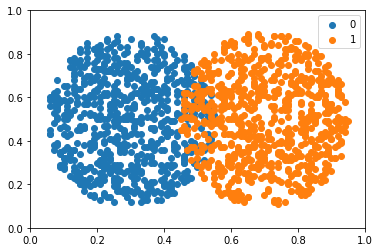

In [7]:
def my_plot(data,lab,counter):
    #This function generate the plot of the labeled data
    
    for label, _ in counter.items():
        row_ix = where(lab == label)[0]
        pyplot.scatter(data[row_ix, 0], data[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.xlim([0, 1])
    pyplot.ylim([0, 1])
    pyplot.show()
    

my_plot(data1a,data1alabel,ct)

In [115]:
backend = Aer.get_backend('qasm_simulator')

nparam=1200;

theta=[];
for y in range(8):
    theta.append(2*pi*random.random())

def lossCal(i,theta):    
    #i th data
    #parameter
    #return loss
    nshot=3000;
    qr = QuantumRegister(4)
    cr = ClassicalRegister(4)
    qc = QuantumCircuit(qr,cr)

    qc.rx(a_shuffled[i][0],qr[0])
    qc.rx(a_shuffled[i][1],qr[1])
    qc.rx(a_shuffled[i][0],qr[2])
    qc.rx(a_shuffled[i][1],qr[3])

    qc.ry(pi/4,qr[:])
    qc.rz(pi/4,qr[:])

    qc=circuit1(qc,qr,theta,1,0)    

    qc.measure(qr[:],cr[:])
    job = execute(qc, backend, shots=nshot)
    result = job.result()
    count =result.get_counts()
    lm=-1*(cN(count,'0000')+cN(count,'0001')+cN(count,'0010')+cN(count,'0011')+cN(count,'1100')+cN(count,'1101')+cN(count,'1110')+cN(count,'1111'))
    lp=1*(cN(count,'0100')+cN(count,'0101')+cN(count,'0110')+cN(count,'0111')+cN(count,'1000')+cN(count,'1001')+cN(count,'1010')+cN(count,'1011'))

    loss1=abs(
        (lm+lp)/nshot
        -2*(b_shuffled[i]-0.5)
    )
    loss2=((lm+lp)/nshot-2*(b_shuffled[i]-0.5))**2

    return loss1


In [28]:
backend = Aer.get_backend('qasm_simulator')

nparam=1200;

theta=[];
for y in range(8):
    theta.append(2*pi*random.random())

def lossCaln1(i,theta):    
    #i th data
    #parameter
    #return loss
    nshot=1;
    qr = QuantumRegister(4)
    cr = ClassicalRegister(4)
    qc = QuantumCircuit(qr,cr)

    qc.rx(a_shuffled[i][0],qr[0])
    qc.rx(a_shuffled[i][1],qr[1])
    qc.rx(a_shuffled[i][0],qr[2])
    qc.rx(a_shuffled[i][1],qr[3])

    qc.ry(pi/4,qr[:])
    qc.rz(pi/4,qr[:])

    qc=circuit1(qc,qr,theta,1,0)    

    qc.measure(qr[:],cr[:])
    job = execute(qc, backend, shots=nshot)
    result = job.result()
    count =result.get_counts()
    lm=-1*(cN(count,'0000')+cN(count,'0001')+cN(count,'0010')+cN(count,'0011')+cN(count,'1100')+cN(count,'1101')+cN(count,'1110')+cN(count,'1111'))
    lp=1*(cN(count,'0100')+cN(count,'0101')+cN(count,'0110')+cN(count,'0111')+cN(count,'1000')+cN(count,'1001')+cN(count,'1010')+cN(count,'1011'))

    loss1=abs(
        (lm+lp)/nshot
        -2*(b_shuffled[i]-0.5)
    )
    loss2=((lm+lp)/nshot-2*(b_shuffled[i]-0.5))**2

    return loss1

## SPAS method

$$ \frac{\partial L}{\partial \theta_j}= \frac{L(\theta_j+c)-L(\theta_j+c)}{2 \Delta}$$

In [103]:
#
def SPSA(i,th,c1,delta):
    sp=[]
    c=[]
    for x1 in range(8):
        c.append(c1)

    for x1 in range(8):
        sp.append((lossCal(i,th+np.array(c))-lossCal(i,th-np.array(c)))/(2*delta))

    return sp

SPSA(1,theta,0.1,10)

[0.002299999999999991,
 -0.003100000000000003,
 -0.00030000000000000024,
 -0.0006000000000000005,
 -0.0013000000000000012,
 -0.0010000000000000009,
 -0.0006000000000000005,
 0.0007000000000000006]

In [29]:
#
def SPSAn1(i,th,c1,delta):
    sp=[]
    c=[]
    for x1 in range(8):
        c.append(c1)

    for x1 in range(8):
        sp.append((lossCaln1(i,th+np.array(c))-lossCaln1(i,th-np.array(c)))/(2*delta))
    return sp
SPSAn1(1,theta,0.01,6)

[-0.16666666666666666,
 0.0,
 0.16666666666666666,
 0.16666666666666666,
 0.0,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666]

## nshot=1000

In [30]:
progress=[];
theta=[];
thdata=[];
for y in range(8):
    theta.append(2*pi*random.random())    
c1=0.01   
delta=6
theta=np.array(theta)+SPSA(i,theta,c1,delta)
for ep in range(1000):
    for i in range(900):
        theta=theta+SPSA(i,theta,c1,delta)
        print(lossCal(i,theta))
        progress.append(lossCal(i,theta))
        thdata.append(theta)

0.606
0.75
1.174
0.8280000000000001
1.27
1.104
1.17
1.11
0.772
0.81
0.698
1.1
1.226
1.23
0.754
0.74
1.318
1.148
1.27
1.218
1.094
1.308
1.234
0.628
1.334
0.8280000000000001
0.904
0.714
0.9
1.338
0.77
1.12
1.336
1.266
1.246
1.072
0.784
0.6779999999999999
0.876
1.27
0.744
0.8220000000000001
0.772
1.168
1.286
0.696
0.6679999999999999
1.3439999999999999
1.412
0.92
1.134
0.6739999999999999
1.168
1.1
0.5800000000000001
1.41
0.792
1.186
1.196
1.212
1.312
0.5900000000000001
1.26
0.778
0.708
1.298
1.164
0.706
0.844
0.834
0.698
0.642
1.3639999999999999
0.746
1.3719999999999999
0.83
0.6639999999999999
1.37
0.612
1.284
0.89
0.702
0.656


KeyboardInterrupt: 

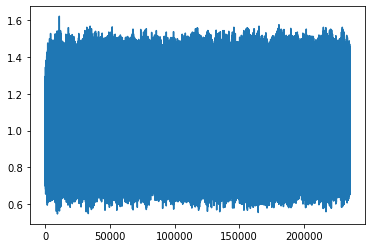

In [27]:
plt.plot(progress)

## nshot=1

In [31]:
progress=[];
theta=[];
thdata=[];
for y in range(8):
    theta.append(2*pi*random.random())    
c1=0.01   
delta=6
theta=np.array(theta)+SPSAn1(i,theta,c1,delta)
for ep in range(1000):
    for i in range(900):
        theta=theta+SPSAn1(i,theta,c1,delta)
        print(lossCaln1(i,theta))
        progress.append(lossCaln1(i,theta))
        thdata.append(theta)

2.0
2.0
0.0
2.0
2.0
2.0
0.0
2.0
0.0
0.0
2.0
0.0
0.0
2.0
2.0
0.0
0.0
2.0
0.0
0.0
0.0
2.0
2.0
0.0
0.0
2.0
0.0
2.0
0.0
2.0
2.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
2.0
2.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
2.0
2.0
2.0
2.0
0.0
2.0
0.0
2.0
2.0
0.0
2.0
0.0
2.0
2.0
0.0
2.0
2.0
0.0
2.0
2.0
2.0
0.0
0.0
2.0
0.0
2.0
0.0
2.0
2.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
2.0
0.0
2.0
2.0
0.0
0.0
0.0
0.0
0.0
2.0
2.0
2.0
2.0
0.0
0.0
2.0
0.0
2.0
0.0
2.0
2.0
2.0
2.0
2.0
2.0
0.0
2.0
0.0
0.0
0.0
0.0
2.0
2.0
0.0
2.0
0.0
2.0
0.0
0.0
0.0
2.0
2.0
0.0
0.0
2.0
0.0
0.0
2.0
2.0
2.0
2.0
2.0
2.0
0.0
2.0
2.0
2.0
0.0
0.0
2.0
2.0
0.0
0.0
0.0
2.0
0.0
2.0
0.0
2.0
2.0
2.0
2.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
2.0
2.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
2.0
0.0
2.0
0.0
0.0
0.0
2.0
0.0
2.0
2.0
2.0
0.0
2.0
0.0
0.0
2.0
0.0
0.0
2.0
2.0
0.0
2.0
2.0
0.0
0.0
0.0
2.0
0.0
0.0
2.0
0.0
0.0
2.0
2.0
2.0
2.0
2.0
2.0
0.0
2.0
2.0
2.0
0.0
2.0
2.0
0.0
0.0
2.0
2.0
0.0
2.0
2.0
2.0
2.0
0.0
0.0
2.0
2.0
0.0
0.0
0.0
0.0
0.0
2.0
2.0
2.0
0.0
0.0
2.0
0.0
2.0


0.0
2.0
2.0
0.0
0.0
2.0
0.0
2.0
2.0
0.0
0.0
2.0
0.0
2.0
0.0
2.0
0.0
0.0
0.0
2.0
2.0
0.0
0.0
0.0
2.0
2.0
2.0
2.0
2.0
0.0
2.0
0.0
0.0
0.0
2.0
2.0
2.0
0.0
2.0
2.0
0.0
0.0
2.0
0.0
2.0
2.0
0.0
0.0
0.0
2.0
2.0
2.0
2.0
0.0
0.0
0.0
0.0
2.0
2.0
0.0


KeyboardInterrupt: 

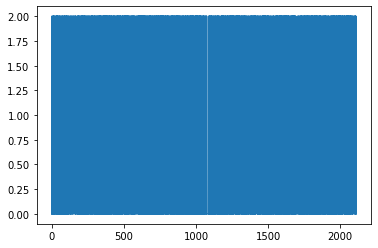

In [32]:
plt.plot(progress)

 ## Sigle data point n=1000

In [33]:
progress=[];
theta=[];
thdata=[];
for y in range(8):
    theta.append(2*pi*random.random())    
c1=0.01   
delta=6
theta=np.array(theta)+SPSA(1,theta,c1,delta)
for ep in range(5000):
    theta=theta+SPSA(1,theta,c1,delta)
    print(lossCal(1,theta))
    progress.append(lossCal(1,theta))
    thdata.append(theta)

1.31
1.388
1.326
1.3599999999999999
1.3639999999999999
1.318
1.3559999999999999
1.338
1.3599999999999999
1.3599999999999999
1.342
1.326
1.3639999999999999
1.34
1.3
1.35
1.414
1.3980000000000001
1.376
1.374
1.322
1.32
1.322
1.354
1.334
1.366
1.41
1.38
1.37
1.3900000000000001
1.3559999999999999
1.3519999999999999
1.342
1.392
1.35
1.318
1.38
1.3519999999999999
1.3639999999999999
1.326
1.328
1.3599999999999999
1.316
1.41
1.3479999999999999
1.3559999999999999
1.302
1.374
1.358
1.292
1.336
1.33
1.326
1.3780000000000001
1.3860000000000001
1.336
1.338
1.316
1.336
1.338
1.374
1.37
1.3479999999999999
1.354
1.376
1.3719999999999999
1.3820000000000001
1.3479999999999999
1.3599999999999999
1.33
1.33
1.3479999999999999
1.312
1.3479999999999999
1.354
1.34
1.35
1.27
1.3559999999999999
1.328
1.354
1.328
1.34
1.3599999999999999
1.362
1.3639999999999999
1.342
1.3439999999999999
1.392
1.338
1.37
1.392
1.346
1.362
1.3780000000000001
1.332
1.3519999999999999
1.33
1.3820000000000001
1.384
1.35
1.376
1.347999

1.318
1.268
1.346
1.33
1.286
1.3
1.324
1.3519999999999999
1.302
1.37
1.318
1.3519999999999999
1.288
1.334
1.3940000000000001
1.314
1.298
1.312
1.312
1.308
1.304
1.346
1.304
1.23
1.306
1.34
1.302
1.3639999999999999
1.332
1.37
1.3719999999999999
1.272
1.34
1.3479999999999999
1.384
1.332
1.318
1.276
1.302
1.252
1.286
1.324
1.294
1.32
1.312
1.312
1.326
1.336
1.292
1.332
1.336
1.332
1.33
1.316
1.286
1.314
1.318
1.276
1.3559999999999999
1.292
1.336
1.366
1.308
1.302
1.302
1.29
1.354
1.286
1.4020000000000001
1.33
1.308
1.346
1.3
1.314
1.3820000000000001
1.33
1.338
1.374
1.346
1.33
1.33
1.312
1.3519999999999999
1.362
1.354
1.326
1.336
1.314
1.312
1.342
1.33
1.35
1.3479999999999999
1.336
1.32
1.292
1.302
1.272
1.32
1.3559999999999999
1.312
1.34
1.358
1.314
1.3639999999999999
1.362
1.316
1.29
1.302
1.332
1.3519999999999999
1.34
1.34
1.286
1.338
1.34
1.342
1.346
1.268
1.324
1.34
1.31
1.27
1.366
1.338
1.296
1.358
1.286
1.29
1.34
1.34
1.318
1.324
1.304
1.322
1.354
1.326
1.304
1.294
1.34
1.343999999

1.226
1.182
1.134
1.126
1.142
1.124
1.1280000000000001
1.142
1.192
1.152
1.094
1.134
1.094
1.174
1.17
1.174
1.144
1.18
1.156
1.154
1.194
1.124
1.09
1.108
1.106
1.162
1.11
1.196
1.148
1.17
1.1320000000000001
1.154
1.176
1.1360000000000001
1.124
1.192
1.138
1.144
1.182
1.1280000000000001
1.16
1.13
1.164
1.182
1.178
1.13
1.154
1.2
1.162
1.144
1.152
1.168
1.17
1.108
1.12
1.158
1.11
1.196
1.1400000000000001
1.1320000000000001
1.168
1.15
1.096
1.154
1.18
1.1219999999999999
1.166
1.104
1.11
1.144
1.162
1.112
1.144
1.202
1.104
1.166
1.166
1.162
1.11
1.176
1.138
1.156
1.108
1.176
1.16
1.142
1.174
1.16
1.154
1.126
1.16
1.2
1.19
1.124
1.114
1.172
1.222
1.198
1.168
1.162
1.178
1.1280000000000001
1.142
1.202
1.134
1.172
1.12
1.176
1.152
1.08
1.126
1.1280000000000001
1.196
1.134
1.164
1.188
1.166
1.166
1.1320000000000001
1.138
1.096
1.12
1.11
1.142
1.152
1.2
1.176
1.15
1.156
1.116
1.142
1.1400000000000001
1.168
1.24
1.098
1.182
1.1320000000000001
1.146
1.134
1.228
1.134
1.18
1.11
1.146
1.162
1.12
1.

0.9359999999999999
0.97
1.008
0.886
0.846
0.97
0.98
0.966
0.948
0.954
0.9359999999999999
0.958
0.976
0.91
0.954
1.018
0.888
0.992
0.952
0.876
0.94
0.944
0.92
0.942
0.928
0.9319999999999999
0.92
0.948
0.916
0.9359999999999999
0.9359999999999999
0.94
0.942
0.892
0.9319999999999999
0.9339999999999999
0.9
0.918
0.96
0.952
0.97
0.922
0.952
0.94
0.888
0.908
0.966
0.948
0.87
0.924
0.922
0.958
0.968
0.956
0.912
0.954
0.864
0.908
0.914
0.878
0.968
0.912
0.92
0.91
0.912
0.912
0.892
0.974
0.898
0.938
0.9359999999999999
0.904
0.918
0.918
0.904
0.912
0.924
0.938
0.908
0.948
0.968
0.922
0.918
0.902
0.928
0.916
0.9359999999999999
0.956
0.988
0.892
0.946
0.912
0.91
0.974
0.948
0.9359999999999999
0.9339999999999999
0.898
0.906
0.9
0.958
0.946
0.924
0.912
0.9339999999999999
0.928
0.952
0.86
0.94
0.976
0.944
0.984
0.89
0.926
0.914
0.922
0.944
0.994
0.94
0.912
0.988
0.9359999999999999
0.894
0.928
0.904
0.926
0.914
0.898
0.928
0.952
0.948
0.886
0.978
0.922
0.876
0.946
0.9299999999999999
0.946
0.904
0.914
0

0.838
0.87
0.802
0.892
0.842
0.858
0.856
0.888
0.838
0.842
0.804
0.852
0.834
0.84
0.8280000000000001
0.8280000000000001
0.8220000000000001
0.752
0.798
0.844
0.85
0.868
0.866
0.804
0.86
0.844
0.882
0.898
0.88
0.796
0.8140000000000001
0.904
0.846
0.81
0.86
0.832
0.8180000000000001
0.808
0.856
0.812
0.856
0.798
0.878
0.8280000000000001
0.776
0.85
0.794
0.8160000000000001
0.856
0.8240000000000001
0.792
0.834
0.838
0.836
0.774
0.81
0.782
0.856
0.862
0.786
0.872
0.8
0.842
0.804
0.812
0.872
0.8220000000000001
0.78
0.854
0.84
0.8
0.796
0.846
0.832
0.832
0.8280000000000001
0.846
0.844
0.854
0.8140000000000001
0.79
0.88
0.768
0.84
0.862
0.8240000000000001
0.8
0.794
0.852
0.8200000000000001
0.8240000000000001
0.8280000000000001
0.888
0.842
0.834
0.842
0.8160000000000001
0.8280000000000001
0.784
0.792
0.906
0.8240000000000001
0.8220000000000001
0.8140000000000001
0.8140000000000001
0.806
0.83
0.804
0.8240000000000001
0.784
0.852
0.756
0.8160000000000001
0.848
0.764
0.794
0.846
0.772
0.804
0.808
0.

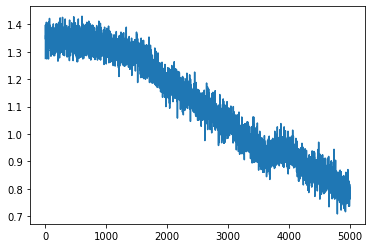

In [35]:
progress_c1001_delta6_ep5000=progress
plt.plot(progress_c1001_delta6_ep5000)

In [36]:
progress=[];
theta=[];
thdata=[];
for y in range(8):
    theta.append(2*pi*random.random())    
c1=0.01   
delta=6
theta=np.array(theta)+SPSA(1,theta,c1,delta)
for ep in range(50000):
    theta=theta+SPSA(1,theta,c1,delta)
    print(lossCal(1,theta))
    progress.append(lossCal(1,theta))
    thdata.append(theta)

0.996
1.012
0.984
0.9359999999999999
1.002
0.946
1.024
1.0
0.958
0.982
0.956
0.976
0.992
0.974
0.962
0.94
0.982
0.9299999999999999
1.016
0.9299999999999999
0.992
0.996
0.952
0.998
1.016
0.986
0.9299999999999999
1.01
1.026
0.978
0.978
0.964
0.996
0.992
1.002
0.978
0.986
1.014
0.982
0.938
0.942
0.956
0.982
0.928
0.986
0.96
0.974
0.946
0.926
1.024
1.028
0.97
0.972
0.948
0.94
0.9319999999999999
0.958
0.97
0.99
0.946
0.9359999999999999
0.946
0.942
0.958
1.002
0.98
0.906
0.962
0.994
0.938
0.99
0.942
1.008
0.948
0.99
0.994
0.918
0.976
0.966
0.982
1.06
1.008
0.948
0.946
0.944
1.004
0.978
0.96
0.978
0.98
0.924
1.052
0.948
1.002
0.9319999999999999
0.97
0.9359999999999999
0.992
0.994
0.976
0.966
0.998
0.95
0.9339999999999999
1.016
0.956
0.966
1.024
0.868
1.038
0.9359999999999999
0.942
0.962
0.994
1.0
0.97
1.014
0.944
0.944
1.004
0.9339999999999999
0.98
1.022
0.928
0.974
0.976
1.006
0.97
0.982
0.98
0.974
0.968
0.978
0.982
0.9319999999999999
0.898
0.972
0.958
0.996
0.95
0.948
0.964
0.918
0.942
0.98

0.742
0.81
0.746
0.756
0.852
0.844
0.8220000000000001
0.798
0.806
0.744
0.8260000000000001
0.85
0.784
0.782
0.8240000000000001
0.772
0.806
0.804
0.8220000000000001
0.792
0.838
0.776
0.8140000000000001
0.806
0.8220000000000001
0.806
0.77
0.8200000000000001
0.764
0.844
0.8180000000000001
0.812
0.756
0.792
0.724
0.762
0.8280000000000001
0.846
0.8280000000000001
0.8
0.8160000000000001
0.8260000000000001
0.802
0.854
0.784
0.804
0.794
0.796
0.83
0.84
0.8260000000000001
0.8220000000000001
0.77
0.846
0.786
0.77
0.748
0.8160000000000001
0.748
0.8240000000000001
0.792
0.8
0.79
0.736
0.778
0.776
0.762
0.724
0.792
0.772
0.83
0.808
0.802
0.802
0.81
0.834
0.798
0.802
0.762
0.874
0.784
0.8140000000000001
0.782
0.8280000000000001
0.8280000000000001
0.834
0.776
0.738
0.758
0.732
0.784
0.774
0.786
0.772
0.81
0.792
0.728
0.786
0.806
0.786
0.786
0.736
0.756
0.75
0.756
0.804
0.8160000000000001
0.8220000000000001
0.78
0.834
0.776
0.81
0.846
0.786
0.778
0.858
0.784
0.8280000000000001
0.8200000000000001
0.738

0.714
0.654
0.688
0.722
0.636
0.718
0.6759999999999999
0.718
0.696
0.696
0.732
0.722
0.716
0.644
0.73
0.7
0.654
0.718
0.656
0.692
0.618
0.6619999999999999
0.6639999999999999
0.6699999999999999
0.646
0.736
0.706
0.694
0.732
0.706
0.698
0.698
0.694
0.6859999999999999
0.704
0.652
0.724
0.6679999999999999
0.65
0.742
0.692
0.6839999999999999
0.692
0.6739999999999999
0.72
0.69
0.71
0.724
0.706
0.712
0.6839999999999999
0.73
0.716
0.694
0.71
0.6819999999999999
0.6639999999999999
0.724
0.6619999999999999
0.76
0.698
0.688
0.692
0.688
0.744
0.7
0.688
0.704
0.718
0.652
0.6779999999999999
0.6819999999999999
0.704
0.6759999999999999
0.636
0.732
0.6739999999999999
0.6779999999999999
0.6799999999999999
0.6759999999999999
0.712
0.692
0.7
0.692
0.774
0.6699999999999999
0.694
0.696
0.64
0.634
0.6859999999999999
0.6699999999999999
0.692
0.6859999999999999
0.698
0.654
0.704
0.702
0.712
0.71
0.6839999999999999
0.698
0.72
0.708
0.712
0.6739999999999999
0.694
0.698
0.6719999999999999
0.632
0.644
0.67799999999

0.718
0.708
0.7
0.6659999999999999
0.702
0.696
0.634
0.6639999999999999
0.6799999999999999
0.702
0.706
0.626
0.6599999999999999
0.652
0.706
0.732
0.692
0.656
0.6839999999999999
0.6739999999999999
0.652
0.694
0.708
0.698
0.706
0.6799999999999999
0.6759999999999999
0.6599999999999999
0.646
0.656
0.698
0.702
0.708
0.6619999999999999
0.6739999999999999
0.716
0.7
0.724
0.6639999999999999
0.6639999999999999
0.6759999999999999
0.6719999999999999
0.6619999999999999
0.628
0.688
0.73
0.694
0.6839999999999999
0.6579999999999999
0.722
0.6699999999999999
0.692
0.714
0.718
0.646
0.696
0.648
0.712
0.702
0.6579999999999999
0.728
0.742
0.694
0.6679999999999999
0.706
0.726
0.654
0.6839999999999999
0.64
0.6739999999999999
0.6679999999999999
0.6699999999999999
0.6819999999999999
0.6579999999999999
0.746
0.5900000000000001
0.692
0.722
0.654
0.6699999999999999
0.6819999999999999
0.694
0.71
0.752
0.71
0.69
0.71
0.706
0.65
0.708
0.706
0.7
0.642
0.6799999999999999
0.72
0.6719999999999999
0.71
0.657999999999999

0.704
0.696
0.694
0.702
0.6579999999999999
0.732
0.6819999999999999
0.6799999999999999
0.696
0.6639999999999999
0.7
0.692
0.696
0.692
0.71
0.728
0.71
0.698
0.7
0.728
0.712
0.698
0.6579999999999999
0.702
0.692
0.688
0.6799999999999999
0.6779999999999999
0.6819999999999999
0.6819999999999999
0.734
0.694
0.694
0.732
0.6759999999999999
0.6839999999999999
0.73
0.656
0.65
0.6659999999999999
0.712
0.688
0.6619999999999999
0.726
0.6679999999999999
0.718
0.6839999999999999
0.6859999999999999
0.6579999999999999
0.6799999999999999
0.74
0.688
0.6659999999999999
0.704
0.71
0.73
0.714
0.6759999999999999
0.6839999999999999
0.6659999999999999
0.6719999999999999
0.642
0.688
0.698
0.774
0.718
0.7
0.75
0.6719999999999999
0.746
0.718
0.6739999999999999
0.762
0.6599999999999999
0.6579999999999999
0.712
0.704
0.6819999999999999
0.652
0.704
0.6839999999999999
0.638
0.72
0.694
0.632
0.6679999999999999
0.6839999999999999
0.694
0.732
0.6839999999999999
0.6679999999999999
0.6719999999999999
0.768
0.74
0.74
0.685

0.716
0.696
0.742
0.756
0.694
0.714
0.69
0.724
0.6579999999999999
0.6839999999999999
0.69
0.69
0.698
0.62
0.714
0.728
0.6839999999999999
0.6659999999999999
0.706
0.704
0.742
0.734
0.6719999999999999
0.748
0.6599999999999999
0.73
0.65
0.6659999999999999
0.712
0.722
0.696
0.6579999999999999
0.6839999999999999
0.706
0.6759999999999999
0.6739999999999999
0.6759999999999999
0.72
0.718
0.654
0.6639999999999999
0.698
0.6859999999999999
0.648
0.712
0.656
0.6719999999999999
0.71
0.6859999999999999
0.69
0.704
0.6719999999999999
0.6799999999999999
0.69
0.652
0.714
0.696
0.6859999999999999
0.706
0.64
0.6779999999999999
0.72
0.692
0.706
0.6739999999999999
0.6779999999999999
0.702
0.6759999999999999
0.7
0.694
0.694
0.6719999999999999
0.718
0.7
0.6679999999999999
0.6799999999999999
0.72
0.738
0.6739999999999999
0.748
0.7
0.696
0.722
0.6599999999999999
0.716
0.702
0.732
0.6659999999999999
0.726
0.6859999999999999
0.6799999999999999
0.704
0.64
0.6739999999999999
0.732
0.6779999999999999
0.688
0.644
0.6

0.704
0.726
0.718
0.708
0.6679999999999999
0.724
0.718
0.696
0.646
0.734
0.706
0.71
0.694
0.706
0.718
0.646
0.72
0.6839999999999999
0.696
0.646
0.738
0.6779999999999999
0.656
0.706
0.72
0.6859999999999999
0.714
0.714
0.692
0.72
0.6639999999999999
0.688
0.6739999999999999
0.73
0.698
0.744
0.692
0.6819999999999999
0.6799999999999999
0.71
0.652
0.63
0.69
0.6779999999999999
0.7
0.6599999999999999
0.6759999999999999
0.724
0.778
0.6779999999999999
0.744
0.6859999999999999
0.754
0.6839999999999999
0.688
0.716
0.694
0.702
0.704
0.724
0.654
0.6839999999999999
0.734
0.748
0.69
0.716
0.696
0.692
0.712
0.772
0.6839999999999999
0.6759999999999999
0.692
0.72
0.798
0.722
0.712
0.65
0.656
0.71
0.708
0.63
0.696
0.628
0.722
0.6679999999999999
0.718
0.712
0.734
0.74
0.726
0.69
0.6639999999999999
0.69
0.738
0.6699999999999999
0.6759999999999999
0.724
0.706
0.712
0.692
0.6779999999999999
0.722
0.688
0.734
0.718
0.6759999999999999
0.644
0.64
0.724
0.724
0.704
0.722
0.766
0.704
0.69
0.6699999999999999
0.722


0.72
0.6619999999999999
0.73
0.69
0.688
0.6819999999999999
0.702
0.748
0.6859999999999999
0.734
0.692
0.6799999999999999
0.7
0.6839999999999999
0.688
0.696
0.6739999999999999
0.712
0.6779999999999999
0.712
0.776
0.71
0.754
0.7
0.6679999999999999
0.712
0.734
0.688
0.708
0.69
0.688
0.718
0.6799999999999999
0.6679999999999999
0.652
0.728
0.72
0.692
0.6639999999999999
0.73
0.6759999999999999
0.756
0.698
0.706
0.6659999999999999
0.644
0.708
0.728
0.714
0.712
0.724
0.712
0.72
0.698
0.728
0.696
0.692
0.74
0.706
0.6799999999999999
0.722
0.73
0.654
0.71
0.75
0.6699999999999999
0.746
0.752
0.73
0.6679999999999999
0.704
0.628
0.708
0.71
0.744
0.654
0.736
0.6699999999999999
0.734
0.812
0.694
0.6679999999999999
0.732
0.6839999999999999
0.634
0.716
0.6759999999999999
0.69
0.718
0.702
0.712
0.718
0.6599999999999999
0.704
0.734
0.606
0.638
0.6759999999999999
0.71
0.6739999999999999
0.718
0.656
0.6679999999999999
0.738
0.69
0.736
0.714
0.69
0.716
0.6839999999999999
0.732
0.69
0.732
0.6599999999999999
0

0.72
0.748
0.6799999999999999
0.694
0.744
0.724
0.722
0.74
0.75
0.706
0.776
0.754
0.728
0.728
0.698
0.728
0.74
0.762
0.69
0.76
0.716
0.738
0.726
0.722
0.69
0.742
0.742
0.6799999999999999
0.738
0.712
0.728
0.692
0.756
0.616
0.71
0.708
0.692
0.712
0.732
0.78
0.7
0.76
0.74
0.6759999999999999
0.74
0.744
0.734
0.704
0.696
0.756
0.734
0.794
0.784
0.736
0.744
0.704
0.6579999999999999
0.738
0.758
0.726
0.694
0.72
0.7
0.724
0.732
0.772
0.714
0.716
0.738
0.6779999999999999
0.784
0.752
0.702
0.722
0.698
0.6699999999999999
0.716
0.6779999999999999
0.716
0.6779999999999999
0.6839999999999999
0.6639999999999999
0.694
0.724
0.74
0.736
0.71
0.71
0.6819999999999999
0.704
0.774
0.724
0.756
0.77
0.758
0.722
0.762
0.73
0.768
0.732
0.724
0.764
0.746
0.742
0.716
0.724
0.71
0.71
0.722
0.724
0.708
0.71
0.748
0.804
0.748
0.768
0.6839999999999999
0.742
0.718
0.738
0.72
0.724
0.7
0.716
0.716
0.698
0.722
0.732
0.772
0.716
0.716
0.802
0.718
0.772
0.764
0.6859999999999999
0.744
0.742
0.738
0.738
0.74
0.706
0.738
0.

0.736
0.752
0.758
0.698
0.72
0.714
0.6739999999999999
0.738
0.746
0.706
0.774
0.704
0.73
0.718
0.754
0.754
0.6819999999999999
0.688
0.734
0.708
0.746
0.748
0.706
0.708
0.656
0.69
0.6659999999999999
0.718
0.696
0.6779999999999999
0.6799999999999999
0.6819999999999999
0.724
0.6779999999999999
0.718
0.754
0.6799999999999999
0.6779999999999999
0.6759999999999999
0.638
0.694
0.6739999999999999
0.726
0.726
0.696
0.706
0.7
0.756
0.688
0.724
0.748
0.728
0.768
0.7
0.692
0.694
0.6819999999999999
0.704
0.724
0.764
0.734
0.7
0.748
0.696
0.736
0.73
0.752
0.688
0.762
0.694
0.6739999999999999
0.698
0.726
0.728
0.6759999999999999
0.704
0.712
0.6719999999999999
0.728
0.71
0.694
0.656
0.694
0.6639999999999999
0.6819999999999999
0.694
0.712
0.724
0.742
0.71
0.718
0.75
0.688
0.656
0.694
0.704
0.718
0.726
0.694
0.6739999999999999
0.712
0.6799999999999999
0.744
0.6819999999999999
0.6739999999999999
0.6759999999999999
0.786
0.774
0.712
0.736
0.736
0.754
0.712
0.694
0.696
0.692
0.712
0.73
0.734
0.716
0.71
0.7

0.6819999999999999
0.6839999999999999
0.704
0.6759999999999999
0.704
0.742
0.6739999999999999
0.698
0.73
0.726
0.734
0.726
0.752
0.6859999999999999
0.72
0.654
0.742
0.6759999999999999
0.694
0.638
0.756
0.6819999999999999
0.698
0.7
0.746
0.6599999999999999
0.6699999999999999
0.766
0.736
0.694
0.702
0.734
0.714
0.706
0.71
0.646
0.688
0.6639999999999999
0.6759999999999999
0.6599999999999999
0.6859999999999999
0.71
0.6739999999999999
0.6859999999999999
0.754
0.71
0.74
0.714
0.724
0.694
0.688
0.6859999999999999
0.6599999999999999
0.6819999999999999
0.748
0.6819999999999999
0.698
0.744
0.702
0.6659999999999999
0.724
0.6659999999999999
0.704
0.708
0.634
0.6639999999999999
0.716
0.72
0.72
0.73
0.692
0.708
0.702
0.69
0.694
0.708
0.7
0.696
0.72
0.734
0.6739999999999999
0.6679999999999999
0.6839999999999999
0.712
0.6739999999999999
0.71
0.706
0.698
0.732
0.718
0.6839999999999999
0.646
0.6699999999999999
0.6839999999999999
0.694
0.698
0.73
0.74
0.69
0.734
0.704
0.726
0.75
0.688
0.754
0.704
0.716
0

0.688
0.714
0.762
0.704
0.71
0.734
0.714
0.722
0.65
0.702
0.704
0.738
0.722
0.74
0.6839999999999999
0.74
0.76
0.692
0.708
0.77
0.702
0.6719999999999999
0.712
0.776
0.6639999999999999
0.722
0.692
0.728
0.71
0.698
0.728
0.718
0.69
0.708
0.696
0.706
0.73
0.766
0.74
0.77
0.702
0.688
0.732
0.738
0.696
0.744
0.696
0.6679999999999999
0.784
0.756
0.692
0.752
0.738
0.7
0.72
0.714
0.734
0.716
0.746
0.74
0.766
0.754
0.742
0.742
0.722
0.6819999999999999
0.698
0.716
0.754
0.732
0.726
0.6839999999999999
0.75
0.73
0.698
0.6859999999999999
0.714
0.738
0.706
0.748
0.7
0.728
0.722
0.764
0.728
0.6779999999999999
0.724
0.772
0.742
0.724
0.748
0.6739999999999999
0.6839999999999999
0.754
0.762
0.736
0.716
0.694
0.718
0.73
0.724
0.71
0.77
0.726
0.71
0.722
0.74
0.78
0.6679999999999999
0.72
0.708
0.712
0.756
0.714
0.728
0.6679999999999999
0.744
0.742
0.6839999999999999
0.718
0.704
0.752
0.724
0.6799999999999999
0.726
0.72
0.6579999999999999
0.694
0.714
0.782
0.74
0.75
0.718
0.6779999999999999
0.702
0.748
0.7
0

0.646
0.744
0.72
0.704
0.75
0.72
0.712
0.6839999999999999
0.696
0.6639999999999999
0.6719999999999999
0.718
0.746
0.722
0.696
0.718
0.6799999999999999
0.736
0.708
0.696
0.726
0.708
0.706
0.706
0.718
0.754
0.736
0.692
0.648
0.69
0.716
0.6659999999999999
0.702
0.756
0.6859999999999999
0.6799999999999999
0.748
0.692
0.746
0.712
0.718
0.6739999999999999
0.714
0.694
0.718
0.704
0.6839999999999999
0.748
0.69
0.73
0.784
0.708
0.718
0.728
0.6779999999999999
0.706
0.6779999999999999
0.694
0.692
0.71
0.71
0.726
0.708
0.754
0.714
0.784
0.696
0.746
0.738
0.642
0.656
0.756
0.694
0.6679999999999999
0.6759999999999999
0.694
0.728
0.732
0.744
0.704
0.72
0.752
0.752
0.748
0.72
0.726
0.6599999999999999
0.766
0.6839999999999999
0.69
0.716
0.766
0.712
0.75
0.702
0.7
0.7
0.6719999999999999
0.726
0.69
0.62
0.764
0.694
0.748
0.708
0.694
0.6779999999999999
0.734
0.726
0.694
0.736
0.688
0.6839999999999999
0.6779999999999999
0.688
0.6799999999999999
0.654
0.696
0.644
0.72
0.694
0.718
0.6699999999999999
0.736
0.

0.752
0.756
0.714
0.752
0.73
0.754
0.73
0.782
0.734
0.736
0.736
0.72
0.688
0.746
0.794
0.69
0.786
0.774
0.758
0.6779999999999999
0.694
0.748
0.754
0.732
0.738
0.734
0.736
0.806
0.752
0.788
0.726
0.736
0.746
0.77
0.716
0.77
0.728
0.794
0.764
0.746
0.746
0.7
0.732
0.8
0.728
0.728
0.716
0.718
0.728
0.736
0.782
0.742
0.712
0.704
0.758
0.708
0.744
0.754
0.772
0.728
0.786
0.752
0.764
0.734
0.718
0.692
0.654
0.732
0.754
0.72
0.756
0.756
0.774
0.726
0.736
0.714
0.738
0.778
0.758
0.756
0.72
0.734
0.736
0.716
0.794
0.726
0.718
0.72
0.7
0.6839999999999999
0.708
0.752
0.706
0.712
0.74
0.6779999999999999
0.712
0.778
0.706
0.77
0.734
0.798
0.748
0.762
0.726
0.748
0.754
0.744
0.71
0.728
0.704
0.72
0.6819999999999999
0.692
0.714
0.73
0.736
0.76
0.702
0.766
0.7
0.738
0.778
0.732
0.73
0.75
0.71
0.688
0.724
0.75
0.722
0.734
0.752
0.7
0.754
0.72
0.6619999999999999
0.79
0.7
0.724
0.722
0.7
0.69
0.706
0.704
0.748
0.746
0.708
0.712
0.734
0.704
0.76
0.708
0.706
0.712
0.702
0.758
0.73
0.746
0.6859999999999999


0.71
0.6599999999999999
0.71
0.6839999999999999
0.734
0.7
0.722
0.734
0.716
0.6839999999999999
0.688
0.6799999999999999
0.6839999999999999
0.75
0.694
0.6839999999999999
0.6839999999999999
0.708
0.71
0.786
0.706
0.688
0.6839999999999999
0.72
0.6679999999999999
0.6639999999999999
0.71
0.64
0.6679999999999999
0.6719999999999999
0.742
0.6739999999999999
0.6839999999999999
0.646
0.646
0.692
0.642
0.718
0.6579999999999999
0.726
0.7
0.728
0.714
0.6659999999999999
0.738
0.74
0.708
0.654
0.698
0.6779999999999999
0.6699999999999999
0.6779999999999999
0.6799999999999999
0.6659999999999999
0.696
0.728
0.704
0.692
0.718
0.6859999999999999
0.72
0.6799999999999999
0.6859999999999999
0.6799999999999999
0.638
0.634
0.6599999999999999
0.702
0.6699999999999999
0.698
0.6619999999999999
0.6759999999999999
0.642
0.6699999999999999
0.6839999999999999
0.71
0.732
0.724
0.61
0.6719999999999999
0.688
0.6859999999999999
0.6819999999999999
0.69
0.6699999999999999
0.71
0.6639999999999999
0.6619999999999999
0.685999

0.774
0.722
0.726
0.718
0.764
0.694
0.694
0.756
0.724
0.722
0.724
0.73
0.692
0.696
0.796
0.726
0.6839999999999999
0.73
0.656
0.728
0.744
0.774
0.706
0.702
0.748
0.718
0.726
0.742
0.698
0.71
0.716
0.778
0.692
0.772
0.708
0.73
0.698
0.708
0.78
0.762
0.724
0.7
0.706
0.78
0.786
0.6819999999999999
0.702
0.688
0.6679999999999999
0.69
0.654
0.704
0.724
0.756
0.708
0.742
0.744
0.708
0.754
0.726
0.7
0.748
0.694
0.73
0.728
0.786
0.652
0.736
0.748
0.728
0.736
0.71
0.704
0.6819999999999999
0.76
0.71
0.6799999999999999
0.796
0.736
0.74
0.73
0.718
0.748
0.738
0.748
0.704
0.702
0.772
0.736
0.74
0.724
0.71
0.7
0.742
0.6719999999999999
0.738
0.714
0.75
0.72
0.6859999999999999
0.698
0.6739999999999999
0.73
0.77
0.748
0.766
0.732
0.718
0.738
0.6759999999999999
0.748
0.72
0.722
0.722
0.6739999999999999
0.702
0.718
0.802
0.712
0.712
0.6639999999999999
0.776
0.758
0.74
0.6799999999999999
0.692
0.704
0.79
0.764
0.722
0.73
0.712
0.738
0.734
0.758
0.756
0.78
0.722
0.754
0.702
0.712
0.752
0.736
0.806
0.72
0.75


KeyboardInterrupt: 

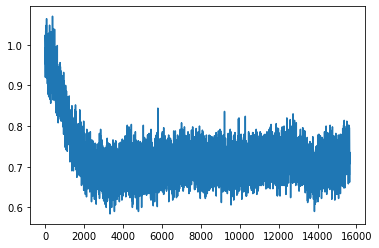

In [37]:
progress_c1001_delta6_ep50000=progress
plt.plot(progress_c1001_delta6_ep50000)

In [39]:
progress=[];
theta=[];
thdata=[];
for y in range(8):
    theta.append(2*pi*random.random())    
c1=0.01;   
delta=6;
theta=np.array(theta)+SPSA(1,theta,c1,delta)
for ep in range(5000):
    delta=random.randint(1, 6)+random.random()
    theta=theta+SPSA(1,theta,c1,delta)
    print(ep,"th iteration L=",lossCal(1,theta))
    progress.append(lossCal(1,theta))
    thdata.append(theta)

0 th iteration L= 0.994
1 th iteration L= 0.96
2 th iteration L= 0.962
3 th iteration L= 0.958
4 th iteration L= 1.03
5 th iteration L= 0.902
6 th iteration L= 0.95
7 th iteration L= 1.022
8 th iteration L= 0.982
9 th iteration L= 0.972
10 th iteration L= 0.974
11 th iteration L= 1.004
12 th iteration L= 0.954
13 th iteration L= 0.938
14 th iteration L= 1.0
15 th iteration L= 0.988
16 th iteration L= 1.002
17 th iteration L= 1.056
18 th iteration L= 0.996
19 th iteration L= 0.986
20 th iteration L= 0.992
21 th iteration L= 0.968
22 th iteration L= 0.966
23 th iteration L= 1.006
24 th iteration L= 1.0
25 th iteration L= 1.014
26 th iteration L= 0.974
27 th iteration L= 1.0
28 th iteration L= 0.988
29 th iteration L= 0.964
30 th iteration L= 1.012
31 th iteration L= 0.964
32 th iteration L= 1.006
33 th iteration L= 0.958
34 th iteration L= 0.974
35 th iteration L= 0.972
36 th iteration L= 0.974
37 th iteration L= 0.976
38 th iteration L= 1.006
39 th iteration L= 0.95
40 th iteration L= 1

314 th iteration L= 0.906
315 th iteration L= 0.912
316 th iteration L= 0.91
317 th iteration L= 0.962
318 th iteration L= 0.94
319 th iteration L= 0.944
320 th iteration L= 0.908
321 th iteration L= 0.9
322 th iteration L= 0.9359999999999999
323 th iteration L= 0.982
324 th iteration L= 0.85
325 th iteration L= 0.886
326 th iteration L= 0.9299999999999999
327 th iteration L= 0.898
328 th iteration L= 0.908
329 th iteration L= 0.904
330 th iteration L= 0.966
331 th iteration L= 0.94
332 th iteration L= 0.986
333 th iteration L= 0.876
334 th iteration L= 0.964
335 th iteration L= 0.92
336 th iteration L= 0.884
337 th iteration L= 0.95
338 th iteration L= 0.886
339 th iteration L= 0.914
340 th iteration L= 0.998
341 th iteration L= 0.902
342 th iteration L= 0.972
343 th iteration L= 0.92
344 th iteration L= 0.928
345 th iteration L= 0.888
346 th iteration L= 0.9
347 th iteration L= 0.94
348 th iteration L= 0.9
349 th iteration L= 0.874
350 th iteration L= 0.94
351 th iteration L= 0.948
3

620 th iteration L= 0.842
621 th iteration L= 0.856
622 th iteration L= 0.91
623 th iteration L= 0.918
624 th iteration L= 0.898
625 th iteration L= 0.85
626 th iteration L= 0.846
627 th iteration L= 0.874
628 th iteration L= 0.882
629 th iteration L= 0.83
630 th iteration L= 0.87
631 th iteration L= 0.804
632 th iteration L= 0.852
633 th iteration L= 0.806
634 th iteration L= 0.8140000000000001
635 th iteration L= 0.798
636 th iteration L= 0.87
637 th iteration L= 0.908
638 th iteration L= 0.86
639 th iteration L= 0.872
640 th iteration L= 0.808
641 th iteration L= 0.8280000000000001
642 th iteration L= 0.906
643 th iteration L= 0.848
644 th iteration L= 0.8160000000000001
645 th iteration L= 0.836
646 th iteration L= 0.872
647 th iteration L= 0.844
648 th iteration L= 0.8240000000000001
649 th iteration L= 0.812
650 th iteration L= 0.888
651 th iteration L= 0.908
652 th iteration L= 0.8200000000000001
653 th iteration L= 0.8280000000000001
654 th iteration L= 0.85
655 th iteration L=

912 th iteration L= 0.714
913 th iteration L= 0.8140000000000001
914 th iteration L= 0.758
915 th iteration L= 0.702
916 th iteration L= 0.772
917 th iteration L= 0.8180000000000001
918 th iteration L= 0.742
919 th iteration L= 0.778
920 th iteration L= 0.772
921 th iteration L= 0.778
922 th iteration L= 0.782
923 th iteration L= 0.77
924 th iteration L= 0.768
925 th iteration L= 0.76
926 th iteration L= 0.81
927 th iteration L= 0.77
928 th iteration L= 0.77
929 th iteration L= 0.752
930 th iteration L= 0.8
931 th iteration L= 0.698
932 th iteration L= 0.778
933 th iteration L= 0.788
934 th iteration L= 0.726
935 th iteration L= 0.83
936 th iteration L= 0.792
937 th iteration L= 0.792
938 th iteration L= 0.756
939 th iteration L= 0.762
940 th iteration L= 0.81
941 th iteration L= 0.812
942 th iteration L= 0.768
943 th iteration L= 0.728
944 th iteration L= 0.8
945 th iteration L= 0.76
946 th iteration L= 0.776
947 th iteration L= 0.716
948 th iteration L= 0.764
949 th iteration L= 0.77

1214 th iteration L= 0.712
1215 th iteration L= 0.746
1216 th iteration L= 0.776
1217 th iteration L= 0.788
1218 th iteration L= 0.784
1219 th iteration L= 0.788
1220 th iteration L= 0.774
1221 th iteration L= 0.778
1222 th iteration L= 0.832
1223 th iteration L= 0.762
1224 th iteration L= 0.716
1225 th iteration L= 0.8200000000000001
1226 th iteration L= 0.758
1227 th iteration L= 0.73
1228 th iteration L= 0.756
1229 th iteration L= 0.766
1230 th iteration L= 0.742
1231 th iteration L= 0.738
1232 th iteration L= 0.756
1233 th iteration L= 0.74
1234 th iteration L= 0.758
1235 th iteration L= 0.774
1236 th iteration L= 0.8200000000000001
1237 th iteration L= 0.802
1238 th iteration L= 0.806
1239 th iteration L= 0.78
1240 th iteration L= 0.786
1241 th iteration L= 0.804
1242 th iteration L= 0.8180000000000001
1243 th iteration L= 0.802
1244 th iteration L= 0.8
1245 th iteration L= 0.762
1246 th iteration L= 0.8
1247 th iteration L= 0.764
1248 th iteration L= 0.75
1249 th iteration L= 0.7

1512 th iteration L= 0.724
1513 th iteration L= 0.744
1514 th iteration L= 0.718
1515 th iteration L= 0.746
1516 th iteration L= 0.742
1517 th iteration L= 0.76
1518 th iteration L= 0.718
1519 th iteration L= 0.724
1520 th iteration L= 0.704
1521 th iteration L= 0.6599999999999999
1522 th iteration L= 0.75
1523 th iteration L= 0.694
1524 th iteration L= 0.6859999999999999
1525 th iteration L= 0.688
1526 th iteration L= 0.732
1527 th iteration L= 0.6779999999999999
1528 th iteration L= 0.75
1529 th iteration L= 0.72
1530 th iteration L= 0.772
1531 th iteration L= 0.74
1532 th iteration L= 0.746
1533 th iteration L= 0.698
1534 th iteration L= 0.6739999999999999
1535 th iteration L= 0.6819999999999999
1536 th iteration L= 0.722
1537 th iteration L= 0.748
1538 th iteration L= 0.706
1539 th iteration L= 0.6779999999999999
1540 th iteration L= 0.6679999999999999
1541 th iteration L= 0.724
1542 th iteration L= 0.744
1543 th iteration L= 0.6699999999999999
1544 th iteration L= 0.708
1545 th it

1789 th iteration L= 0.728
1790 th iteration L= 0.656
1791 th iteration L= 0.71
1792 th iteration L= 0.698
1793 th iteration L= 0.6579999999999999
1794 th iteration L= 0.748
1795 th iteration L= 0.712
1796 th iteration L= 0.702
1797 th iteration L= 0.696
1798 th iteration L= 0.636
1799 th iteration L= 0.712
1800 th iteration L= 0.692
1801 th iteration L= 0.698
1802 th iteration L= 0.778
1803 th iteration L= 0.694
1804 th iteration L= 0.692
1805 th iteration L= 0.75
1806 th iteration L= 0.716
1807 th iteration L= 0.69
1808 th iteration L= 0.688
1809 th iteration L= 0.732
1810 th iteration L= 0.644
1811 th iteration L= 0.688
1812 th iteration L= 0.6739999999999999
1813 th iteration L= 0.6659999999999999
1814 th iteration L= 0.714
1815 th iteration L= 0.692
1816 th iteration L= 0.744
1817 th iteration L= 0.656
1818 th iteration L= 0.6819999999999999
1819 th iteration L= 0.702
1820 th iteration L= 0.724
1821 th iteration L= 0.718
1822 th iteration L= 0.71
1823 th iteration L= 0.72
1824 th 

2068 th iteration L= 0.7
2069 th iteration L= 0.6759999999999999
2070 th iteration L= 0.718
2071 th iteration L= 0.726
2072 th iteration L= 0.6659999999999999
2073 th iteration L= 0.71
2074 th iteration L= 0.6739999999999999
2075 th iteration L= 0.712
2076 th iteration L= 0.6839999999999999
2077 th iteration L= 0.722
2078 th iteration L= 0.702
2079 th iteration L= 0.6819999999999999
2080 th iteration L= 0.696
2081 th iteration L= 0.694
2082 th iteration L= 0.688
2083 th iteration L= 0.722
2084 th iteration L= 0.714
2085 th iteration L= 0.6799999999999999
2086 th iteration L= 0.72
2087 th iteration L= 0.726
2088 th iteration L= 0.72
2089 th iteration L= 0.6799999999999999
2090 th iteration L= 0.716
2091 th iteration L= 0.746
2092 th iteration L= 0.6859999999999999
2093 th iteration L= 0.694
2094 th iteration L= 0.6719999999999999
2095 th iteration L= 0.746
2096 th iteration L= 0.754
2097 th iteration L= 0.7
2098 th iteration L= 0.726
2099 th iteration L= 0.716
2100 th iteration L= 0.696

2350 th iteration L= 0.6779999999999999
2351 th iteration L= 0.744
2352 th iteration L= 0.732
2353 th iteration L= 0.698
2354 th iteration L= 0.698
2355 th iteration L= 0.65
2356 th iteration L= 0.6739999999999999
2357 th iteration L= 0.692
2358 th iteration L= 0.718
2359 th iteration L= 0.72
2360 th iteration L= 0.718
2361 th iteration L= 0.6839999999999999
2362 th iteration L= 0.716
2363 th iteration L= 0.696
2364 th iteration L= 0.694
2365 th iteration L= 0.74
2366 th iteration L= 0.734
2367 th iteration L= 0.706
2368 th iteration L= 0.714
2369 th iteration L= 0.736
2370 th iteration L= 0.756
2371 th iteration L= 0.694
2372 th iteration L= 0.712
2373 th iteration L= 0.654
2374 th iteration L= 0.714
2375 th iteration L= 0.734
2376 th iteration L= 0.736
2377 th iteration L= 0.718
2378 th iteration L= 0.6639999999999999
2379 th iteration L= 0.722
2380 th iteration L= 0.728
2381 th iteration L= 0.732
2382 th iteration L= 0.728
2383 th iteration L= 0.74
2384 th iteration L= 0.714
2385 th

2638 th iteration L= 0.752
2639 th iteration L= 0.76
2640 th iteration L= 0.766
2641 th iteration L= 0.742
2642 th iteration L= 0.776
2643 th iteration L= 0.728
2644 th iteration L= 0.76
2645 th iteration L= 0.758
2646 th iteration L= 0.736
2647 th iteration L= 0.77
2648 th iteration L= 0.702
2649 th iteration L= 0.768
2650 th iteration L= 0.6579999999999999
2651 th iteration L= 0.692
2652 th iteration L= 0.712
2653 th iteration L= 0.75
2654 th iteration L= 0.752
2655 th iteration L= 0.748
2656 th iteration L= 0.754
2657 th iteration L= 0.744
2658 th iteration L= 0.754
2659 th iteration L= 0.754
2660 th iteration L= 0.692
2661 th iteration L= 0.75
2662 th iteration L= 0.718
2663 th iteration L= 0.724
2664 th iteration L= 0.75
2665 th iteration L= 0.748
2666 th iteration L= 0.794
2667 th iteration L= 0.734
2668 th iteration L= 0.758
2669 th iteration L= 0.716
2670 th iteration L= 0.714
2671 th iteration L= 0.732
2672 th iteration L= 0.754
2673 th iteration L= 0.706
2674 th iteration L= 

2922 th iteration L= 0.742
2923 th iteration L= 0.646
2924 th iteration L= 0.712
2925 th iteration L= 0.6659999999999999
2926 th iteration L= 0.766
2927 th iteration L= 0.714
2928 th iteration L= 0.734
2929 th iteration L= 0.696
2930 th iteration L= 0.746
2931 th iteration L= 0.7
2932 th iteration L= 0.6859999999999999
2933 th iteration L= 0.714
2934 th iteration L= 0.718
2935 th iteration L= 0.732
2936 th iteration L= 0.732
2937 th iteration L= 0.732
2938 th iteration L= 0.72
2939 th iteration L= 0.6579999999999999
2940 th iteration L= 0.716
2941 th iteration L= 0.6799999999999999
2942 th iteration L= 0.69
2943 th iteration L= 0.718
2944 th iteration L= 0.6719999999999999
2945 th iteration L= 0.704
2946 th iteration L= 0.718
2947 th iteration L= 0.698
2948 th iteration L= 0.716
2949 th iteration L= 0.692
2950 th iteration L= 0.69
2951 th iteration L= 0.72
2952 th iteration L= 0.6839999999999999
2953 th iteration L= 0.6859999999999999
2954 th iteration L= 0.6779999999999999
2955 th ite

3188 th iteration L= 0.688
3189 th iteration L= 0.688
3190 th iteration L= 0.706
3191 th iteration L= 0.724
3192 th iteration L= 0.644
3193 th iteration L= 0.6699999999999999
3194 th iteration L= 0.7
3195 th iteration L= 0.696
3196 th iteration L= 0.6859999999999999
3197 th iteration L= 0.6859999999999999
3198 th iteration L= 0.696
3199 th iteration L= 0.656
3200 th iteration L= 0.704
3201 th iteration L= 0.62
3202 th iteration L= 0.716
3203 th iteration L= 0.776
3204 th iteration L= 0.708
3205 th iteration L= 0.706
3206 th iteration L= 0.72
3207 th iteration L= 0.696
3208 th iteration L= 0.758
3209 th iteration L= 0.6679999999999999
3210 th iteration L= 0.748
3211 th iteration L= 0.726
3212 th iteration L= 0.702
3213 th iteration L= 0.688
3214 th iteration L= 0.772
3215 th iteration L= 0.766
3216 th iteration L= 0.6839999999999999
3217 th iteration L= 0.698
3218 th iteration L= 0.712
3219 th iteration L= 0.728
3220 th iteration L= 0.706
3221 th iteration L= 0.6699999999999999
3222 th 

3471 th iteration L= 0.6799999999999999
3472 th iteration L= 0.7
3473 th iteration L= 0.798
3474 th iteration L= 0.632
3475 th iteration L= 0.6739999999999999
3476 th iteration L= 0.698
3477 th iteration L= 0.758
3478 th iteration L= 0.726
3479 th iteration L= 0.722
3480 th iteration L= 0.732
3481 th iteration L= 0.694
3482 th iteration L= 0.702
3483 th iteration L= 0.6779999999999999
3484 th iteration L= 0.6679999999999999
3485 th iteration L= 0.708
3486 th iteration L= 0.692
3487 th iteration L= 0.69
3488 th iteration L= 0.728
3489 th iteration L= 0.6639999999999999
3490 th iteration L= 0.6779999999999999
3491 th iteration L= 0.69
3492 th iteration L= 0.6579999999999999
3493 th iteration L= 0.6679999999999999
3494 th iteration L= 0.7
3495 th iteration L= 0.694
3496 th iteration L= 0.698
3497 th iteration L= 0.694
3498 th iteration L= 0.756
3499 th iteration L= 0.704
3500 th iteration L= 0.73
3501 th iteration L= 0.716
3502 th iteration L= 0.728
3503 th iteration L= 0.6639999999999999

3741 th iteration L= 0.6739999999999999
3742 th iteration L= 0.69
3743 th iteration L= 0.6779999999999999
3744 th iteration L= 0.712
3745 th iteration L= 0.6839999999999999
3746 th iteration L= 0.716
3747 th iteration L= 0.764
3748 th iteration L= 0.6639999999999999
3749 th iteration L= 0.754
3750 th iteration L= 0.712
3751 th iteration L= 0.704
3752 th iteration L= 0.696
3753 th iteration L= 0.6679999999999999
3754 th iteration L= 0.722
3755 th iteration L= 0.746
3756 th iteration L= 0.6839999999999999
3757 th iteration L= 0.706
3758 th iteration L= 0.692
3759 th iteration L= 0.6799999999999999
3760 th iteration L= 0.74
3761 th iteration L= 0.7
3762 th iteration L= 0.6699999999999999
3763 th iteration L= 0.736
3764 th iteration L= 0.716
3765 th iteration L= 0.708
3766 th iteration L= 0.712
3767 th iteration L= 0.6579999999999999
3768 th iteration L= 0.758
3769 th iteration L= 0.6659999999999999
3770 th iteration L= 0.738
3771 th iteration L= 0.6799999999999999
3772 th iteration L= 0.7

4019 th iteration L= 0.752
4020 th iteration L= 0.724
4021 th iteration L= 0.708
4022 th iteration L= 0.698
4023 th iteration L= 0.708
4024 th iteration L= 0.732
4025 th iteration L= 0.642
4026 th iteration L= 0.73
4027 th iteration L= 0.6819999999999999
4028 th iteration L= 0.716
4029 th iteration L= 0.704
4030 th iteration L= 0.694
4031 th iteration L= 0.6659999999999999
4032 th iteration L= 0.74
4033 th iteration L= 0.7
4034 th iteration L= 0.718
4035 th iteration L= 0.73
4036 th iteration L= 0.6619999999999999
4037 th iteration L= 0.6839999999999999
4038 th iteration L= 0.71
4039 th iteration L= 0.696
4040 th iteration L= 0.738
4041 th iteration L= 0.63
4042 th iteration L= 0.698
4043 th iteration L= 0.6759999999999999
4044 th iteration L= 0.6799999999999999
4045 th iteration L= 0.644
4046 th iteration L= 0.6579999999999999
4047 th iteration L= 0.7
4048 th iteration L= 0.6699999999999999
4049 th iteration L= 0.692
4050 th iteration L= 0.698
4051 th iteration L= 0.6859999999999999
4

4311 th iteration L= 0.708
4312 th iteration L= 0.768
4313 th iteration L= 0.764
4314 th iteration L= 0.77
4315 th iteration L= 0.7
4316 th iteration L= 0.72
4317 th iteration L= 0.738
4318 th iteration L= 0.73
4319 th iteration L= 0.722
4320 th iteration L= 0.764
4321 th iteration L= 0.794
4322 th iteration L= 0.782
4323 th iteration L= 0.726
4324 th iteration L= 0.756
4325 th iteration L= 0.744
4326 th iteration L= 0.726
4327 th iteration L= 0.786
4328 th iteration L= 0.792
4329 th iteration L= 0.746
4330 th iteration L= 0.732
4331 th iteration L= 0.752
4332 th iteration L= 0.768
4333 th iteration L= 0.726
4334 th iteration L= 0.786
4335 th iteration L= 0.77
4336 th iteration L= 0.724
4337 th iteration L= 0.724
4338 th iteration L= 0.716
4339 th iteration L= 0.716
4340 th iteration L= 0.776
4341 th iteration L= 0.72
4342 th iteration L= 0.704
4343 th iteration L= 0.734
4344 th iteration L= 0.6699999999999999
4345 th iteration L= 0.776
4346 th iteration L= 0.77
4347 th iteration L= 0.

4609 th iteration L= 0.74
4610 th iteration L= 0.756
4611 th iteration L= 0.72
4612 th iteration L= 0.724
4613 th iteration L= 0.692
4614 th iteration L= 0.7
4615 th iteration L= 0.736
4616 th iteration L= 0.762
4617 th iteration L= 0.6759999999999999
4618 th iteration L= 0.738
4619 th iteration L= 0.736
4620 th iteration L= 0.714
4621 th iteration L= 0.726
4622 th iteration L= 0.782
4623 th iteration L= 0.72
4624 th iteration L= 0.72
4625 th iteration L= 0.732
4626 th iteration L= 0.6739999999999999
4627 th iteration L= 0.756
4628 th iteration L= 0.748
4629 th iteration L= 0.724
4630 th iteration L= 0.736
4631 th iteration L= 0.744
4632 th iteration L= 0.74
4633 th iteration L= 0.738
4634 th iteration L= 0.756
4635 th iteration L= 0.74
4636 th iteration L= 0.754
4637 th iteration L= 0.718
4638 th iteration L= 0.73
4639 th iteration L= 0.728
4640 th iteration L= 0.758
4641 th iteration L= 0.724
4642 th iteration L= 0.748
4643 th iteration L= 0.784
4644 th iteration L= 0.762
4645 th ite

4912 th iteration L= 0.758
4913 th iteration L= 0.75
4914 th iteration L= 0.808
4915 th iteration L= 0.71
4916 th iteration L= 0.77
4917 th iteration L= 0.786
4918 th iteration L= 0.69
4919 th iteration L= 0.778
4920 th iteration L= 0.716
4921 th iteration L= 0.75
4922 th iteration L= 0.8260000000000001
4923 th iteration L= 0.768
4924 th iteration L= 0.738
4925 th iteration L= 0.706
4926 th iteration L= 0.754
4927 th iteration L= 0.704
4928 th iteration L= 0.772
4929 th iteration L= 0.74
4930 th iteration L= 0.8
4931 th iteration L= 0.71
4932 th iteration L= 0.764
4933 th iteration L= 0.706
4934 th iteration L= 0.722
4935 th iteration L= 0.764
4936 th iteration L= 0.6679999999999999
4937 th iteration L= 0.748
4938 th iteration L= 0.6599999999999999
4939 th iteration L= 0.758
4940 th iteration L= 0.736
4941 th iteration L= 0.702
4942 th iteration L= 0.716
4943 th iteration L= 0.778
4944 th iteration L= 0.702
4945 th iteration L= 0.76
4946 th iteration L= 0.72
4947 th iteration L= 0.726


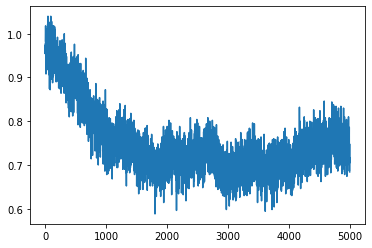

In [40]:
progress_c1001_deltar_ep5000=progress
plt.plot(progress_c1001_deltar_ep5000)

In [49]:
progress=[];
theta=[];
thdata=[];
for y in range(8):
    theta.append(2*pi*random.random())    
c1=0.1;   
delta=6;
theta=np.array(theta)+SPSA(1,theta,c1,delta)
for ep in range(5000):
    delta=random.randint(0, 6)+random.random()
    theta=theta+SPSA(1,theta,c1,delta)
    print(ep,"th iteration L=",lossCal(1,theta))
    progress.append(lossCal(1,theta))
    thdata.append(theta)

0 th iteration L= 0.938
1 th iteration L= 0.86
2 th iteration L= 0.878
3 th iteration L= 0.944
4 th iteration L= 0.868
5 th iteration L= 0.854
6 th iteration L= 0.794
7 th iteration L= 0.858
8 th iteration L= 0.83
9 th iteration L= 0.8140000000000001
10 th iteration L= 0.888
11 th iteration L= 0.792
12 th iteration L= 0.868
13 th iteration L= 0.768
14 th iteration L= 0.796
15 th iteration L= 0.796
16 th iteration L= 0.6799999999999999
17 th iteration L= 0.692
18 th iteration L= 0.712
19 th iteration L= 0.702
20 th iteration L= 0.7
21 th iteration L= 0.6679999999999999
22 th iteration L= 0.692
23 th iteration L= 0.6759999999999999
24 th iteration L= 0.6779999999999999
25 th iteration L= 0.698
26 th iteration L= 0.7
27 th iteration L= 0.656
28 th iteration L= 0.712
29 th iteration L= 0.6659999999999999
30 th iteration L= 0.692
31 th iteration L= 0.644
32 th iteration L= 0.632
33 th iteration L= 0.654
34 th iteration L= 0.6779999999999999
35 th iteration L= 0.6759999999999999
36 th iterat

284 th iteration L= 0.798
285 th iteration L= 0.744
286 th iteration L= 0.8140000000000001
287 th iteration L= 0.76
288 th iteration L= 0.776
289 th iteration L= 0.766
290 th iteration L= 0.768
291 th iteration L= 0.734
292 th iteration L= 0.744
293 th iteration L= 0.748
294 th iteration L= 0.758
295 th iteration L= 0.688
296 th iteration L= 0.792
297 th iteration L= 1.002
298 th iteration L= 1.052
299 th iteration L= 1.014
300 th iteration L= 1.028
301 th iteration L= 1.008
302 th iteration L= 1.074
303 th iteration L= 1.036
304 th iteration L= 0.954
305 th iteration L= 1.062
306 th iteration L= 1.016
307 th iteration L= 1.03
308 th iteration L= 1.016
309 th iteration L= 1.02
310 th iteration L= 1.014
311 th iteration L= 0.942
312 th iteration L= 0.982
313 th iteration L= 0.99
314 th iteration L= 0.974
315 th iteration L= 1.04
316 th iteration L= 1.006
317 th iteration L= 1.008
318 th iteration L= 1.008
319 th iteration L= 1.006
320 th iteration L= 0.928
321 th iteration L= 0.93399999

582 th iteration L= 0.736
583 th iteration L= 0.6679999999999999
584 th iteration L= 0.738
585 th iteration L= 0.762
586 th iteration L= 0.722
587 th iteration L= 0.698
588 th iteration L= 0.704
589 th iteration L= 0.746
590 th iteration L= 0.6739999999999999
591 th iteration L= 0.752
592 th iteration L= 0.746
593 th iteration L= 0.704
594 th iteration L= 0.766
595 th iteration L= 0.754
596 th iteration L= 0.712
597 th iteration L= 0.742
598 th iteration L= 0.6839999999999999
599 th iteration L= 0.718
600 th iteration L= 0.688
601 th iteration L= 0.704
602 th iteration L= 0.75
603 th iteration L= 0.69
604 th iteration L= 0.716
605 th iteration L= 0.76
606 th iteration L= 0.74
607 th iteration L= 0.726
608 th iteration L= 0.714
609 th iteration L= 0.696
610 th iteration L= 0.718
611 th iteration L= 0.704
612 th iteration L= 0.6799999999999999
613 th iteration L= 0.778
614 th iteration L= 0.746
615 th iteration L= 0.726
616 th iteration L= 0.722
617 th iteration L= 0.756
618 th iteration

875 th iteration L= 0.636
876 th iteration L= 0.732
877 th iteration L= 0.69
878 th iteration L= 0.78
879 th iteration L= 0.6839999999999999
880 th iteration L= 0.6699999999999999
881 th iteration L= 0.6819999999999999
882 th iteration L= 0.73
883 th iteration L= 0.73
884 th iteration L= 0.71
885 th iteration L= 0.74
886 th iteration L= 0.6859999999999999
887 th iteration L= 0.636
888 th iteration L= 0.704
889 th iteration L= 0.74
890 th iteration L= 0.69
891 th iteration L= 0.738
892 th iteration L= 0.696
893 th iteration L= 0.718
894 th iteration L= 0.6839999999999999
895 th iteration L= 0.694
896 th iteration L= 0.694
897 th iteration L= 0.698
898 th iteration L= 0.69
899 th iteration L= 0.734
900 th iteration L= 0.648
901 th iteration L= 0.702
902 th iteration L= 0.6579999999999999
903 th iteration L= 0.696
904 th iteration L= 0.6679999999999999
905 th iteration L= 0.702
906 th iteration L= 0.742
907 th iteration L= 0.7
908 th iteration L= 0.742
909 th iteration L= 0.71
910 th iter

1159 th iteration L= 0.72
1160 th iteration L= 0.688
1161 th iteration L= 0.74
1162 th iteration L= 0.7
1163 th iteration L= 0.6759999999999999
1164 th iteration L= 0.692
1165 th iteration L= 0.702
1166 th iteration L= 0.728
1167 th iteration L= 0.702
1168 th iteration L= 0.738
1169 th iteration L= 0.758
1170 th iteration L= 0.688
1171 th iteration L= 0.694
1172 th iteration L= 0.6679999999999999
1173 th iteration L= 0.72
1174 th iteration L= 0.6759999999999999
1175 th iteration L= 0.706
1176 th iteration L= 0.6859999999999999
1177 th iteration L= 0.6759999999999999
1178 th iteration L= 0.6859999999999999
1179 th iteration L= 0.704
1180 th iteration L= 0.6699999999999999
1181 th iteration L= 0.698
1182 th iteration L= 0.73
1183 th iteration L= 0.784
1184 th iteration L= 0.6799999999999999
1185 th iteration L= 0.6759999999999999
1186 th iteration L= 0.718
1187 th iteration L= 0.708
1188 th iteration L= 0.726
1189 th iteration L= 0.72
1190 th iteration L= 0.748
1191 th iteration L= 0.654

1454 th iteration L= 0.786
1455 th iteration L= 0.746
1456 th iteration L= 0.746
1457 th iteration L= 0.748
1458 th iteration L= 0.6859999999999999
1459 th iteration L= 0.766
1460 th iteration L= 0.716
1461 th iteration L= 0.766
1462 th iteration L= 0.732
1463 th iteration L= 0.712
1464 th iteration L= 0.758
1465 th iteration L= 0.704
1466 th iteration L= 0.72
1467 th iteration L= 0.6699999999999999
1468 th iteration L= 0.784
1469 th iteration L= 0.726
1470 th iteration L= 0.752
1471 th iteration L= 0.716
1472 th iteration L= 0.6659999999999999
1473 th iteration L= 0.76
1474 th iteration L= 0.742
1475 th iteration L= 0.692
1476 th iteration L= 0.7
1477 th iteration L= 0.738
1478 th iteration L= 0.696
1479 th iteration L= 0.744
1480 th iteration L= 0.718
1481 th iteration L= 0.714
1482 th iteration L= 0.6659999999999999
1483 th iteration L= 0.6839999999999999
1484 th iteration L= 0.6699999999999999
1485 th iteration L= 0.786
1486 th iteration L= 0.764
1487 th iteration L= 0.76
1488 th i

1750 th iteration L= 1.012
1751 th iteration L= 1.026
1752 th iteration L= 1.07
1753 th iteration L= 0.994
1754 th iteration L= 0.986
1755 th iteration L= 1.002
1756 th iteration L= 0.95
1757 th iteration L= 1.03
1758 th iteration L= 0.9
1759 th iteration L= 0.958
1760 th iteration L= 0.9339999999999999
1761 th iteration L= 0.954
1762 th iteration L= 1.012
1763 th iteration L= 0.952
1764 th iteration L= 0.95
1765 th iteration L= 0.972
1766 th iteration L= 0.978
1767 th iteration L= 0.89
1768 th iteration L= 1.0
1769 th iteration L= 0.99
1770 th iteration L= 0.96
1771 th iteration L= 0.952
1772 th iteration L= 0.89
1773 th iteration L= 0.87
1774 th iteration L= 0.904
1775 th iteration L= 0.958
1776 th iteration L= 0.982
1777 th iteration L= 0.9299999999999999
1778 th iteration L= 0.914
1779 th iteration L= 0.852
1780 th iteration L= 0.86
1781 th iteration L= 0.856
1782 th iteration L= 0.912
1783 th iteration L= 0.876
1784 th iteration L= 0.878
1785 th iteration L= 0.9
1786 th iteration 

2034 th iteration L= 0.638
2035 th iteration L= 0.716
2036 th iteration L= 0.656
2037 th iteration L= 0.6859999999999999
2038 th iteration L= 0.692
2039 th iteration L= 0.6619999999999999
2040 th iteration L= 0.706
2041 th iteration L= 0.6699999999999999
2042 th iteration L= 0.6739999999999999
2043 th iteration L= 0.6599999999999999
2044 th iteration L= 0.632
2045 th iteration L= 0.6719999999999999
2046 th iteration L= 0.64
2047 th iteration L= 0.652
2048 th iteration L= 0.6579999999999999
2049 th iteration L= 0.5920000000000001
2050 th iteration L= 0.6619999999999999
2051 th iteration L= 0.6779999999999999
2052 th iteration L= 0.6839999999999999
2053 th iteration L= 0.72
2054 th iteration L= 0.632
2055 th iteration L= 0.652
2056 th iteration L= 0.6839999999999999
2057 th iteration L= 0.644
2058 th iteration L= 0.714
2059 th iteration L= 0.722
2060 th iteration L= 0.654
2061 th iteration L= 0.632
2062 th iteration L= 0.728
2063 th iteration L= 0.6719999999999999
2064 th iteration L= 0.

2306 th iteration L= 0.712
2307 th iteration L= 0.708
2308 th iteration L= 0.696
2309 th iteration L= 0.69
2310 th iteration L= 0.694
2311 th iteration L= 0.706
2312 th iteration L= 0.628
2313 th iteration L= 0.6699999999999999
2314 th iteration L= 0.706
2315 th iteration L= 0.652
2316 th iteration L= 0.63
2317 th iteration L= 0.6639999999999999
2318 th iteration L= 0.602
2319 th iteration L= 0.7
2320 th iteration L= 0.694
2321 th iteration L= 0.712
2322 th iteration L= 0.726
2323 th iteration L= 0.688
2324 th iteration L= 0.6599999999999999
2325 th iteration L= 0.6599999999999999
2326 th iteration L= 0.638
2327 th iteration L= 0.6619999999999999
2328 th iteration L= 0.72
2329 th iteration L= 0.6659999999999999
2330 th iteration L= 0.726
2331 th iteration L= 1.038
2332 th iteration L= 1.004
2333 th iteration L= 1.018
2334 th iteration L= 0.974
2335 th iteration L= 0.98
2336 th iteration L= 1.05
2337 th iteration L= 0.974
2338 th iteration L= 0.974
2339 th iteration L= 1.004
2340 th ite

2590 th iteration L= 0.692
2591 th iteration L= 0.736
2592 th iteration L= 0.75
2593 th iteration L= 0.722
2594 th iteration L= 0.73
2595 th iteration L= 0.6739999999999999
2596 th iteration L= 0.698
2597 th iteration L= 0.738
2598 th iteration L= 0.708
2599 th iteration L= 0.6759999999999999
2600 th iteration L= 0.6819999999999999
2601 th iteration L= 0.63
2602 th iteration L= 0.772
2603 th iteration L= 0.722
2604 th iteration L= 0.716
2605 th iteration L= 0.758
2606 th iteration L= 0.744
2607 th iteration L= 0.706
2608 th iteration L= 0.71
2609 th iteration L= 0.728
2610 th iteration L= 0.6759999999999999
2611 th iteration L= 0.7
2612 th iteration L= 0.72
2613 th iteration L= 0.742
2614 th iteration L= 0.716
2615 th iteration L= 0.716
2616 th iteration L= 0.722
2617 th iteration L= 0.744
2618 th iteration L= 0.702
2619 th iteration L= 0.656
2620 th iteration L= 0.694
2621 th iteration L= 0.722
2622 th iteration L= 0.73
2623 th iteration L= 0.746
2624 th iteration L= 0.738
2625 th ite

2883 th iteration L= 0.73
2884 th iteration L= 0.706
2885 th iteration L= 0.766
2886 th iteration L= 0.736
2887 th iteration L= 0.696
2888 th iteration L= 0.722
2889 th iteration L= 0.766
2890 th iteration L= 0.72
2891 th iteration L= 0.752
2892 th iteration L= 0.712
2893 th iteration L= 0.706
2894 th iteration L= 0.768
2895 th iteration L= 0.716
2896 th iteration L= 0.724
2897 th iteration L= 0.732
2898 th iteration L= 0.782
2899 th iteration L= 0.714
2900 th iteration L= 0.6859999999999999
2901 th iteration L= 0.734
2902 th iteration L= 0.766
2903 th iteration L= 0.712
2904 th iteration L= 0.772
2905 th iteration L= 0.6619999999999999
2906 th iteration L= 0.734
2907 th iteration L= 0.786
2908 th iteration L= 0.6859999999999999
2909 th iteration L= 0.688
2910 th iteration L= 1.194
2911 th iteration L= 1.2
2912 th iteration L= 1.174
2913 th iteration L= 1.18
2914 th iteration L= 1.166
2915 th iteration L= 1.19
2916 th iteration L= 1.154
2917 th iteration L= 1.148
2918 th iteration L= 1

3177 th iteration L= 0.698
3178 th iteration L= 0.752
3179 th iteration L= 0.706
3180 th iteration L= 0.708
3181 th iteration L= 0.654
3182 th iteration L= 0.754
3183 th iteration L= 0.712
3184 th iteration L= 0.71
3185 th iteration L= 0.6839999999999999
3186 th iteration L= 0.694
3187 th iteration L= 0.69
3188 th iteration L= 0.6659999999999999
3189 th iteration L= 0.758
3190 th iteration L= 0.6859999999999999
3191 th iteration L= 0.6839999999999999
3192 th iteration L= 0.6679999999999999
3193 th iteration L= 0.708
3194 th iteration L= 0.71
3195 th iteration L= 0.646
3196 th iteration L= 0.6759999999999999
3197 th iteration L= 0.7
3198 th iteration L= 0.626
3199 th iteration L= 0.652
3200 th iteration L= 0.694
3201 th iteration L= 0.736
3202 th iteration L= 0.6799999999999999
3203 th iteration L= 0.688
3204 th iteration L= 0.722
3205 th iteration L= 0.6579999999999999
3206 th iteration L= 0.74
3207 th iteration L= 0.6839999999999999
3208 th iteration L= 0.704
3209 th iteration L= 0.69

3464 th iteration L= 0.6859999999999999
3465 th iteration L= 0.738
3466 th iteration L= 0.702
3467 th iteration L= 0.654
3468 th iteration L= 0.6599999999999999
3469 th iteration L= 0.712
3470 th iteration L= 0.6779999999999999
3471 th iteration L= 0.688
3472 th iteration L= 0.694
3473 th iteration L= 0.6839999999999999
3474 th iteration L= 0.6659999999999999
3475 th iteration L= 0.7
3476 th iteration L= 0.732
3477 th iteration L= 0.698
3478 th iteration L= 0.6679999999999999
3479 th iteration L= 0.6779999999999999
3480 th iteration L= 0.6639999999999999
3481 th iteration L= 0.6819999999999999
3482 th iteration L= 0.702
3483 th iteration L= 0.706
3484 th iteration L= 0.69
3485 th iteration L= 0.75
3486 th iteration L= 0.722
3487 th iteration L= 0.644
3488 th iteration L= 0.646
3489 th iteration L= 0.6679999999999999
3490 th iteration L= 0.766
3491 th iteration L= 0.702
3492 th iteration L= 0.648
3493 th iteration L= 0.696
3494 th iteration L= 0.716
3495 th iteration L= 0.66999999999999

3744 th iteration L= 1.008
3745 th iteration L= 1.016
3746 th iteration L= 0.982
3747 th iteration L= 0.996
3748 th iteration L= 0.982
3749 th iteration L= 0.988
3750 th iteration L= 0.976
3751 th iteration L= 0.9319999999999999
3752 th iteration L= 0.988
3753 th iteration L= 0.998
3754 th iteration L= 0.95
3755 th iteration L= 0.926
3756 th iteration L= 0.9339999999999999
3757 th iteration L= 0.9299999999999999
3758 th iteration L= 0.958
3759 th iteration L= 1.02
3760 th iteration L= 0.95
3761 th iteration L= 0.918
3762 th iteration L= 0.95
3763 th iteration L= 0.96
3764 th iteration L= 0.956
3765 th iteration L= 0.9299999999999999
3766 th iteration L= 0.882
3767 th iteration L= 0.876
3768 th iteration L= 0.922
3769 th iteration L= 0.952
3770 th iteration L= 0.848
3771 th iteration L= 0.914
3772 th iteration L= 0.872
3773 th iteration L= 0.886
3774 th iteration L= 0.9339999999999999
3775 th iteration L= 0.852
3776 th iteration L= 0.926
3777 th iteration L= 0.902
3778 th iteration L= 0

4034 th iteration L= 1.218
4035 th iteration L= 1.236
4036 th iteration L= 1.198
4037 th iteration L= 1.144
4038 th iteration L= 1.218
4039 th iteration L= 1.106
4040 th iteration L= 1.206
4041 th iteration L= 1.126
4042 th iteration L= 1.184
4043 th iteration L= 1.078
4044 th iteration L= 1.144
4045 th iteration L= 1.074
4046 th iteration L= 1.06
4047 th iteration L= 1.04
4048 th iteration L= 1.088
4049 th iteration L= 1.112
4050 th iteration L= 1.07
4051 th iteration L= 1.032
4052 th iteration L= 1.054
4053 th iteration L= 1.024
4054 th iteration L= 1.056
4055 th iteration L= 1.058
4056 th iteration L= 1.07
4057 th iteration L= 1.036
4058 th iteration L= 1.004
4059 th iteration L= 1.06
4060 th iteration L= 1.034
4061 th iteration L= 1.044
4062 th iteration L= 1.042
4063 th iteration L= 1.01
4064 th iteration L= 1.018
4065 th iteration L= 0.968
4066 th iteration L= 1.04
4067 th iteration L= 1.002
4068 th iteration L= 0.98
4069 th iteration L= 0.99
4070 th iteration L= 0.988
4071 th it

4319 th iteration L= 1.01
4320 th iteration L= 1.052
4321 th iteration L= 1.032
4322 th iteration L= 0.988
4323 th iteration L= 1.01
4324 th iteration L= 0.938
4325 th iteration L= 1.004
4326 th iteration L= 1.016
4327 th iteration L= 0.942
4328 th iteration L= 0.986
4329 th iteration L= 0.888
4330 th iteration L= 0.882
4331 th iteration L= 0.942
4332 th iteration L= 0.918
4333 th iteration L= 0.914
4334 th iteration L= 0.888
4335 th iteration L= 0.906
4336 th iteration L= 0.902
4337 th iteration L= 0.918
4338 th iteration L= 0.88
4339 th iteration L= 0.838
4340 th iteration L= 0.854
4341 th iteration L= 0.642
4342 th iteration L= 0.708
4343 th iteration L= 0.712
4344 th iteration L= 0.73
4345 th iteration L= 0.696
4346 th iteration L= 0.732
4347 th iteration L= 0.702
4348 th iteration L= 0.6859999999999999
4349 th iteration L= 0.72
4350 th iteration L= 0.76
4351 th iteration L= 0.718
4352 th iteration L= 0.708
4353 th iteration L= 0.696
4354 th iteration L= 0.72
4355 th iteration L= 0

4605 th iteration L= 0.84
4606 th iteration L= 0.844
4607 th iteration L= 0.832
4608 th iteration L= 0.836
4609 th iteration L= 0.864
4610 th iteration L= 0.784
4611 th iteration L= 0.862
4612 th iteration L= 0.794
4613 th iteration L= 0.844
4614 th iteration L= 0.8200000000000001
4615 th iteration L= 0.804
4616 th iteration L= 0.778
4617 th iteration L= 0.878
4618 th iteration L= 0.8180000000000001
4619 th iteration L= 0.774
4620 th iteration L= 0.78
4621 th iteration L= 0.742
4622 th iteration L= 0.764
4623 th iteration L= 0.736
4624 th iteration L= 0.778
4625 th iteration L= 0.746
4626 th iteration L= 0.8180000000000001
4627 th iteration L= 0.796
4628 th iteration L= 0.766
4629 th iteration L= 0.714
4630 th iteration L= 0.712
4631 th iteration L= 0.792
4632 th iteration L= 0.772
4633 th iteration L= 0.786
4634 th iteration L= 0.736
4635 th iteration L= 0.722
4636 th iteration L= 0.752
4637 th iteration L= 0.776
4638 th iteration L= 0.772
4639 th iteration L= 0.766
4640 th iteration 

KeyboardInterrupt: 

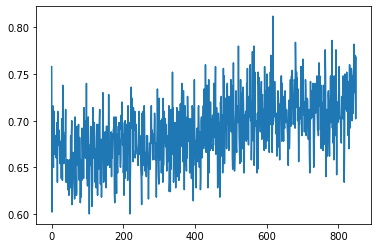

In [50]:
progress_c101_deltar_ep5000=progress
plt.plot(progress_c1005_deltar_ep5000)

In [58]:
progress=[];
theta=[];
thdata=[];
for y in range(8):
    theta.append(2*pi*random.random())    
c1=0.5;   
delta=6;
theta=np.array(theta)+SPSA(1,theta,c1,delta)
for ep in range(5000):
    delta=0.5*random.randint(1, 6)+random.random()
    theta=theta+SPSA(1,theta,c1,delta)
    print("L=",np.round(lossCal(1,theta),2),"th=",np.round(theta,3)," iter=",ep)
    progress.append(lossCal(1,theta))
    thdata.append(theta)

L= 1.06 th= [1.585 0.794 4.901 5.784 5.585 1.356 1.985 3.315]  iter= 0
L= 1.05 th= [1.595 0.804 4.803 5.794 5.59  1.374 1.976 3.306]  iter= 1
L= 1.02 th= [1.597 0.812 4.72  5.797 5.591 1.375 1.997 3.303]  iter= 2
L= 0.9 th= [1.578 0.813 4.611 5.812 5.58  1.395 1.996 3.311]  iter= 3
L= 0.92 th= [1.596 0.79  4.519 5.849 5.579 1.389 2.003 3.317]  iter= 4
L= 0.91 th= [1.622 0.756 4.274 5.925 5.526 1.345 2.018 3.299]  iter= 5
L= 0.79 th= [1.621 0.749 4.21  5.937 5.517 1.355 2.001 3.306]  iter= 6
L= 0.83 th= [1.638 0.77  4.119 5.929 5.523 1.363 2.007 3.267]  iter= 7
L= 0.75 th= [1.618 0.79  4.034 5.934 5.514 1.392 2.027 3.29 ]  iter= 8
L= 0.75 th= [1.605 0.8   3.96  5.918 5.542 1.391 2.035 3.304]  iter= 9
L= 0.74 th= [1.596 0.794 3.943 5.917 5.548 1.402 2.026 3.298]  iter= 10
L= 0.81 th= [1.597 0.799 3.914 5.913 5.544 1.4   2.032 3.292]  iter= 11
L= 0.8 th= [1.597 0.79  3.901 5.909 5.545 1.393 2.03  3.3  ]  iter= 12
L= 0.75 th= [1.582 0.801 3.873 5.912 5.516 1.389 2.003 3.273]  iter= 13
L= 0

L= 0.72 th= [1.257 0.829 3.641 5.946 5.628 1.524 1.967 3.116]  iter= 115
L= 0.65 th= [1.248 0.832 3.638 5.948 5.636 1.523 1.955 3.119]  iter= 116
L= 0.73 th= [1.245 0.833 3.626 5.949 5.643 1.53  1.96  3.123]  iter= 117
L= 0.74 th= [1.246 0.838 3.62  5.951 5.641 1.526 1.967 3.131]  iter= 118
L= 0.73 th= [1.247 0.837 3.628 5.94  5.66  1.446 1.945 3.12 ]  iter= 119
L= 0.73 th= [1.24  0.842 3.631 5.961 5.666 1.436 1.951 3.131]  iter= 120
L= 0.7 th= [1.245 0.836 3.687 5.968 5.65  1.443 1.96  3.134]  iter= 121
L= 0.69 th= [1.251 0.838 3.705 5.979 5.643 1.452 1.962 3.14 ]  iter= 122
L= 0.74 th= [1.259 0.823 3.707 5.976 5.631 1.449 1.96  3.139]  iter= 123
L= 0.74 th= [1.248 0.834 3.705 5.97  5.653 1.455 1.961 3.145]  iter= 124
L= 0.72 th= [1.248 0.829 3.699 5.977 5.658 1.447 1.963 3.148]  iter= 125
L= 0.71 th= [1.239 0.855 3.687 5.953 5.669 1.467 1.986 3.143]  iter= 126
L= 0.67 th= [1.237 0.855 3.684 5.952 5.66  1.461 1.998 3.128]  iter= 127
L= 0.71 th= [1.236 0.866 3.684 5.957 5.686 1.479 1.9

L= 0.7 th= [1.2   1.037 3.638 5.943 5.772 1.564 2.135 3.124]  iter= 229
L= 0.75 th= [1.215 1.031 3.621 5.93  5.807 1.554 2.146 3.101]  iter= 230
L= 0.69 th= [1.219 1.037 3.616 5.933 5.812 1.568 2.15  3.084]  iter= 231
L= 0.69 th= [1.21  1.045 3.605 5.935 5.816 1.559 2.136 3.089]  iter= 232
L= 0.72 th= [1.215 1.044 3.605 5.942 5.81  1.538 2.128 3.105]  iter= 233
L= 0.71 th= [1.239 1.05  3.61  5.918 5.776 1.548 2.111 3.055]  iter= 234
L= 0.69 th= [1.246 1.054 3.601 5.938 5.763 1.531 2.112 3.074]  iter= 235
L= 0.71 th= [1.266 1.047 3.612 5.94  5.756 1.541 2.116 3.07 ]  iter= 236
L= 0.72 th= [1.267 1.04  3.581 5.936 5.759 1.537 2.1   3.039]  iter= 237
L= 0.69 th= [1.266 1.034 3.591 5.95  5.773 1.553 2.109 3.05 ]  iter= 238
L= 0.69 th= [1.243 1.031 3.584 5.946 5.773 1.535 2.113 3.068]  iter= 239
L= 0.69 th= [1.256 1.018 3.58  5.954 5.724 1.522 2.127 3.082]  iter= 240
L= 0.72 th= [1.256 1.033 3.587 5.953 5.731 1.518 2.127 3.081]  iter= 241
L= 0.69 th= [1.255 1.041 3.589 5.941 5.736 1.526 2.1

L= 0.76 th= [1.331 1.021 3.623 5.939 5.7   1.381 2.312 3.338]  iter= 343
L= 0.66 th= [1.332 1.026 3.624 5.944 5.693 1.381 2.327 3.34 ]  iter= 344
L= 0.69 th= [1.32  1.026 3.619 5.942 5.69  1.383 2.335 3.337]  iter= 345
L= 0.69 th= [1.336 1.004 3.563 5.983 5.673 1.365 2.36  3.325]  iter= 346
L= 0.7 th= [1.352 1.026 3.557 5.982 5.661 1.365 2.371 3.314]  iter= 347
L= 0.7 th= [1.32  1.046 3.616 5.992 5.633 1.377 2.38  3.356]  iter= 348
L= 0.72 th= [1.336 1.069 3.627 6.005 5.616 1.377 2.38  3.356]  iter= 349
L= 0.71 th= [1.333 1.094 3.622 5.995 5.617 1.362 2.379 3.356]  iter= 350
L= 0.72 th= [1.336 1.111 3.608 6.006 5.626 1.376 2.371 3.357]  iter= 351
L= 0.75 th= [1.333 1.12  3.608 5.999 5.633 1.393 2.386 3.356]  iter= 352
L= 0.71 th= [1.341 1.13  3.616 5.995 5.642 1.374 2.368 3.349]  iter= 353
L= 0.68 th= [1.336 1.128 3.625 6.001 5.642 1.367 2.372 3.355]  iter= 354
L= 0.78 th= [1.332 1.134 3.638 6.023 5.648 1.373 2.385 3.34 ]  iter= 355
L= 0.7 th= [1.353 1.125 3.648 5.996 5.632 1.366 2.387

L= 0.63 th= [1.347 0.895 3.601 6.018 5.532 1.367 2.502 3.209]  iter= 456
L= 0.69 th= [1.34  0.879 3.582 6.018 5.505 1.346 2.493 3.217]  iter= 457
L= 0.66 th= [1.329 0.887 3.577 6.016 5.547 1.296 2.531 3.217]  iter= 458
L= 0.71 th= [1.324 0.873 3.562 6.078 5.555 1.278 2.554 3.207]  iter= 459
L= 0.67 th= [1.331 0.872 3.571 6.071 5.548 1.287 2.569 3.206]  iter= 460
L= 0.72 th= [1.341 0.886 3.561 6.045 5.563 1.282 2.561 3.186]  iter= 461
L= 0.66 th= [1.352 0.897 3.566 6.035 5.561 1.292 2.542 3.194]  iter= 462
L= 0.7 th= [1.336 0.909 3.577 6.031 5.553 1.294 2.537 3.186]  iter= 463
L= 0.73 th= [1.355 0.933 3.574 6.036 5.566 1.296 2.517 3.191]  iter= 464
L= 0.68 th= [1.359 0.929 3.585 6.043 5.563 1.301 2.519 3.189]  iter= 465
L= 0.69 th= [1.376 0.924 3.59  6.02  5.552 1.307 2.514 3.185]  iter= 466
L= 0.73 th= [1.379 0.918 3.602 5.967 5.53  1.297 2.518 3.206]  iter= 467
L= 0.74 th= [1.367 0.92  3.591 5.968 5.547 1.297 2.523 3.201]  iter= 468
L= 0.57 th= [1.371 0.923 3.597 5.974 5.54  1.313 2.5

L= 0.68 th= [1.291 1.019 3.59  5.976 5.411 1.222 2.55  3.548]  iter= 570
L= 0.71 th= [1.296 1.018 3.59  5.983 5.403 1.212 2.556 3.554]  iter= 571
L= 0.67 th= [1.326 1.025 3.608 5.973 5.405 1.227 2.538 3.55 ]  iter= 572
L= 0.7 th= [1.319 1.018 3.613 5.971 5.406 1.224 2.544 3.542]  iter= 573
L= 0.75 th= [1.317 1.02  3.623 5.97  5.403 1.229 2.552 3.542]  iter= 574
L= 0.69 th= [1.317 1.023 3.629 5.969 5.374 1.224 2.562 3.533]  iter= 575
L= 0.7 th= [1.317 1.016 3.638 5.955 5.377 1.227 2.573 3.518]  iter= 576
L= 0.69 th= [1.32  1.025 3.627 5.957 5.385 1.223 2.563 3.525]  iter= 577
L= 0.72 th= [1.328 1.066 3.652 5.962 5.391 1.175 2.556 3.51 ]  iter= 578
L= 0.67 th= [1.287 1.076 3.641 5.95  5.387 1.176 2.612 3.518]  iter= 579
L= 0.7 th= [1.297 1.06  3.65  5.95  5.385 1.182 2.611 3.527]  iter= 580
L= 0.69 th= [1.283 1.056 3.649 5.892 5.401 1.197 2.618 3.538]  iter= 581
L= 0.65 th= [1.284 1.046 3.632 5.9   5.383 1.206 2.635 3.527]  iter= 582
L= 0.68 th= [1.298 1.034 3.645 5.905 5.388 1.207 2.638

L= 0.71 th= [1.283 0.986 3.605 5.968 5.406 1.078 2.569 3.577]  iter= 684
L= 0.75 th= [1.267 0.987 3.59  5.947 5.375 1.079 2.556 3.578]  iter= 685
L= 0.7 th= [1.272 0.991 3.606 5.966 5.377 1.093 2.553 3.59 ]  iter= 686
L= 0.75 th= [1.276 1.002 3.617 5.971 5.38  1.1   2.551 3.589]  iter= 687
L= 0.71 th= [1.281 1.002 3.598 5.977 5.377 1.103 2.542 3.592]  iter= 688
L= 0.68 th= [1.297 1.018 3.616 5.99  5.378 1.091 2.531 3.58 ]  iter= 689
L= 0.69 th= [1.302 1.008 3.595 5.965 5.357 1.075 2.518 3.576]  iter= 690
L= 0.7 th= [1.296 1.022 3.594 5.948 5.361 1.073 2.514 3.569]  iter= 691
L= 0.72 th= [1.303 1.027 3.593 5.95  5.375 1.093 2.507 3.559]  iter= 692
L= 0.69 th= [1.307 1.008 3.599 5.942 5.389 1.086 2.519 3.563]  iter= 693
L= 0.75 th= [1.314 1.004 3.606 5.946 5.378 1.08  2.523 3.565]  iter= 694
L= 0.66 th= [1.311 0.997 3.608 5.954 5.383 1.081 2.528 3.557]  iter= 695
L= 0.69 th= [1.33  0.967 3.632 5.963 5.388 1.081 2.53  3.526]  iter= 696
L= 0.73 th= [1.311 0.895 3.6   5.951 5.414 1.055 2.59

L= 0.67 th= [1.333 0.752 3.65  5.95  5.503 0.903 2.552 3.318]  iter= 798
L= 0.67 th= [1.331 0.736 3.636 5.969 5.497 0.899 2.55  3.319]  iter= 799
L= 0.7 th= [1.343 0.723 3.619 5.986 5.503 0.907 2.571 3.312]  iter= 800
L= 0.68 th= [1.341 0.732 3.606 5.983 5.49  0.914 2.585 3.32 ]  iter= 801
L= 0.73 th= [1.35  0.739 3.615 5.987 5.478 0.914 2.576 3.298]  iter= 802
L= 0.67 th= [1.346 0.744 3.608 5.982 5.475 0.922 2.571 3.291]  iter= 803
L= 0.69 th= [1.352 0.719 3.597 5.996 5.482 0.925 2.577 3.271]  iter= 804
L= 0.68 th= [1.355 0.719 3.597 5.988 5.478 0.917 2.57  3.278]  iter= 805
L= 0.73 th= [1.346 0.709 3.606 6.001 5.477 0.934 2.572 3.282]  iter= 806
L= 0.65 th= [1.342 0.71  3.609 6.002 5.475 0.921 2.573 3.279]  iter= 807
L= 0.68 th= [1.354 0.713 3.613 6.012 5.474 0.919 2.561 3.263]  iter= 808
L= 0.75 th= [1.356 0.72  3.632 5.996 5.506 0.913 2.567 3.269]  iter= 809
L= 0.66 th= [1.348 0.71  3.614 6.018 5.522 0.903 2.563 3.312]  iter= 810
L= 0.74 th= [1.348 0.729 3.675 6.012 5.53  0.92  2.5

L= 0.72 th= [1.318 0.792 3.634 5.933 5.372 0.866 2.6   3.446]  iter= 911
L= 0.71 th= [1.294 0.782 3.679 5.934 5.383 0.843 2.603 3.422]  iter= 912
L= 0.73 th= [1.296 0.783 3.681 5.924 5.383 0.844 2.6   3.422]  iter= 913
L= 0.74 th= [1.3   0.771 3.67  5.908 5.385 0.836 2.611 3.429]  iter= 914
L= 0.76 th= [1.313 0.756 3.672 5.91  5.378 0.834 2.613 3.437]  iter= 915
L= 0.73 th= [1.302 0.758 3.659 5.913 5.379 0.845 2.601 3.444]  iter= 916
L= 0.72 th= [1.29  0.754 3.659 5.906 5.376 0.849 2.603 3.433]  iter= 917
L= 0.72 th= [1.296 0.745 3.657 5.91  5.356 0.861 2.588 3.457]  iter= 918
L= 0.71 th= [1.293 0.731 3.653 5.929 5.357 0.864 2.59  3.469]  iter= 919
L= 0.7 th= [1.309 0.733 3.624 5.927 5.341 0.877 2.569 3.455]  iter= 920
L= 0.7 th= [1.327 0.727 3.616 5.939 5.329 0.875 2.559 3.466]  iter= 921
L= 0.68 th= [1.335 0.729 3.627 5.934 5.336 0.868 2.546 3.456]  iter= 922
L= 0.7 th= [1.326 0.727 3.638 5.943 5.329 0.863 2.549 3.449]  iter= 923
L= 0.71 th= [1.327 0.732 3.636 5.938 5.315 0.865 2.542

L= 0.7 th= [1.205 0.778 3.673 5.981 5.354 0.822 2.612 3.308]  iter= 1025
L= 0.7 th= [1.181 0.764 3.672 6.006 5.346 0.794 2.681 3.279]  iter= 1026
L= 0.71 th= [1.16  0.784 3.643 6.02  5.339 0.778 2.685 3.266]  iter= 1027
L= 0.69 th= [1.17  0.756 3.639 5.984 5.345 0.811 2.717 3.292]  iter= 1028
L= 0.73 th= [1.178 0.757 3.651 5.993 5.367 0.797 2.719 3.299]  iter= 1029
L= 0.7 th= [1.188 0.757 3.638 5.971 5.345 0.806 2.725 3.294]  iter= 1030
L= 0.71 th= [1.187 0.752 3.637 5.971 5.335 0.806 2.723 3.293]  iter= 1031
L= 0.7 th= [1.19  0.746 3.632 5.974 5.338 0.823 2.723 3.283]  iter= 1032
L= 0.71 th= [1.231 0.766 3.623 5.98  5.332 0.843 2.749 3.282]  iter= 1033
L= 0.76 th= [1.234 0.756 3.621 5.976 5.323 0.848 2.749 3.277]  iter= 1034
L= 0.73 th= [1.229 0.737 3.624 5.996 5.328 0.84  2.739 3.279]  iter= 1035
L= 0.68 th= [1.227 0.749 3.631 5.995 5.342 0.835 2.761 3.285]  iter= 1036
L= 0.73 th= [1.216 0.754 3.619 5.98  5.344 0.831 2.757 3.283]  iter= 1037
L= 0.72 th= [1.21  0.751 3.615 5.986 5.35 

L= 0.73 th= [1.079 0.813 3.671 5.973 5.293 0.804 2.752 3.386]  iter= 1136
L= 0.72 th= [1.092 0.814 3.675 5.975 5.296 0.811 2.749 3.403]  iter= 1137
L= 0.73 th= [1.075 0.833 3.667 5.993 5.28  0.827 2.738 3.407]  iter= 1138
L= 0.72 th= [1.094 0.806 3.65  5.997 5.298 0.827 2.752 3.421]  iter= 1139
L= 0.74 th= [1.094 0.797 3.655 5.999 5.31  0.838 2.768 3.434]  iter= 1140
L= 0.71 th= [1.075 0.803 3.66  5.985 5.324 0.818 2.764 3.429]  iter= 1141
L= 0.71 th= [1.083 0.796 3.645 5.984 5.307 0.821 2.763 3.414]  iter= 1142
L= 0.71 th= [1.081 0.874 3.626 5.979 5.307 0.798 2.727 3.528]  iter= 1143
L= 0.64 th= [1.075 0.865 3.565 6.014 5.276 0.791 2.702 3.511]  iter= 1144
L= 0.67 th= [1.047 0.879 3.573 6.052 5.291 0.819 2.668 3.537]  iter= 1145
L= 0.62 th= [1.043 0.891 3.556 6.028 5.286 0.805 2.69  3.545]  iter= 1146
L= 0.71 th= [1.045 0.903 3.541 6.018 5.278 0.811 2.688 3.554]  iter= 1147
L= 0.7 th= [1.052 0.914 3.522 6.014 5.28  0.81  2.704 3.56 ]  iter= 1148
L= 0.73 th= [1.065 0.908 3.536 5.988 5.

L= 0.7 th= [1.075 0.811 3.631 5.962 5.18  0.877 2.577 3.624]  iter= 1247
L= 0.7 th= [1.073 0.807 3.636 5.952 5.186 0.883 2.576 3.617]  iter= 1248
L= 0.73 th= [1.086 0.769 3.658 5.977 5.187 0.91  2.549 3.586]  iter= 1249
L= 0.75 th= [1.093 0.782 3.644 5.983 5.2   0.905 2.525 3.578]  iter= 1250
L= 0.7 th= [1.094 0.774 3.638 5.995 5.201 0.899 2.528 3.582]  iter= 1251
L= 0.73 th= [1.1   0.775 3.635 5.994 5.199 0.903 2.523 3.578]  iter= 1252
L= 0.72 th= [1.101 0.789 3.637 5.98  5.212 0.903 2.516 3.584]  iter= 1253
L= 0.69 th= [1.105 0.784 3.638 5.978 5.209 0.898 2.518 3.596]  iter= 1254
L= 0.69 th= [1.103 0.776 3.636 5.973 5.204 0.899 2.51  3.601]  iter= 1255
L= 0.64 th= [1.105 0.754 3.635 5.977 5.212 0.895 2.51  3.587]  iter= 1256
L= 0.69 th= [1.111 0.77  3.647 5.979 5.199 0.901 2.51  3.581]  iter= 1257
L= 0.65 th= [1.092 0.763 3.663 5.99  5.196 0.908 2.51  3.594]  iter= 1258
L= 0.73 th= [1.092 0.765 3.664 5.981 5.204 0.905 2.501 3.603]  iter= 1259
L= 0.69 th= [1.085 0.771 3.65  5.978 5.21

L= 0.72 th= [1.241 0.758 3.643 5.95  5.366 0.646 2.511 3.574]  iter= 1359
L= 0.7 th= [1.244 0.772 3.638 5.95  5.369 0.645 2.511 3.572]  iter= 1360
L= 0.7 th= [1.252 0.774 3.631 5.955 5.373 0.633 2.518 3.576]  iter= 1361
L= 0.68 th= [1.253 0.775 3.629 5.961 5.388 0.642 2.516 3.565]  iter= 1362
L= 0.69 th= [1.244 0.774 3.633 5.954 5.389 0.639 2.513 3.561]  iter= 1363
L= 0.74 th= [1.242 0.769 3.631 5.959 5.388 0.639 2.506 3.566]  iter= 1364
L= 0.72 th= [1.229 0.767 3.633 5.945 5.389 0.636 2.496 3.579]  iter= 1365
L= 0.71 th= [1.226 0.77  3.641 5.947 5.389 0.635 2.495 3.572]  iter= 1366
L= 0.72 th= [1.219 0.757 3.652 5.939 5.395 0.652 2.51  3.596]  iter= 1367
L= 0.67 th= [1.215 0.753 3.641 5.925 5.391 0.641 2.51  3.603]  iter= 1368
L= 0.73 th= [1.216 0.757 3.635 5.923 5.405 0.637 2.514 3.616]  iter= 1369
L= 0.74 th= [1.222 0.769 3.632 5.926 5.402 0.641 2.518 3.615]  iter= 1370
L= 0.72 th= [1.214 0.782 3.63  5.932 5.437 0.654 2.53  3.617]  iter= 1371
L= 0.69 th= [1.214 0.778 3.631 5.921 5.4

L= 0.77 th= [1.468 0.911 3.647 5.972 5.427 0.339 2.795 3.491]  iter= 1471
L= 0.72 th= [1.478 0.886 3.623 5.961 5.432 0.346 2.8   3.476]  iter= 1472
L= 0.74 th= [1.502 0.906 3.616 5.963 5.414 0.362 2.807 3.438]  iter= 1473
L= 0.72 th= [1.497 0.909 3.62  5.956 5.387 0.368 2.809 3.44 ]  iter= 1474
L= 0.72 th= [1.491 0.929 3.605 5.938 5.365 0.376 2.829 3.44 ]  iter= 1475
L= 0.72 th= [1.501 0.934 3.602 5.918 5.381 0.355 2.828 3.433]  iter= 1476
L= 0.71 th= [1.486 0.928 3.607 5.909 5.381 0.345 2.825 3.436]  iter= 1477
L= 0.76 th= [1.479 0.932 3.6   5.93  5.393 0.347 2.83  3.434]  iter= 1478
L= 0.69 th= [1.456 0.932 3.617 5.928 5.391 0.336 2.833 3.417]  iter= 1479
L= 0.71 th= [1.469 0.932 3.616 5.9   5.379 0.338 2.836 3.401]  iter= 1480
L= 0.71 th= [1.463 0.938 3.608 5.904 5.359 0.345 2.836 3.397]  iter= 1481
L= 0.67 th= [1.497 0.889 3.636 5.946 5.355 0.338 2.782 3.404]  iter= 1482
L= 0.67 th= [1.487 0.876 3.62  5.934 5.365 0.336 2.774 3.389]  iter= 1483
L= 0.7 th= [1.488 0.873 3.618 5.926 5.

L= 0.72 th= [1.645 0.854 3.63  5.946 5.276 0.337 2.816 3.131]  iter= 1582
L= 0.73 th= [1.645 0.853 3.623 5.955 5.273 0.339 2.823 3.133]  iter= 1583
L= 0.71 th= [1.642 0.852 3.622 5.954 5.269 0.345 2.825 3.137]  iter= 1584
L= 0.72 th= [1.638 0.87  3.672 6.012 5.282 0.401 2.802 3.179]  iter= 1585
L= 0.74 th= [1.63  0.878 3.669 6.001 5.305 0.401 2.804 3.169]  iter= 1586
L= 0.71 th= [1.653 0.883 3.651 5.983 5.314 0.391 2.81  3.17 ]  iter= 1587
L= 0.73 th= [1.644 0.879 3.645 5.983 5.308 0.384 2.824 3.165]  iter= 1588
L= 0.77 th= [1.639 0.871 3.647 5.991 5.298 0.397 2.845 3.154]  iter= 1589
L= 0.69 th= [1.633 0.875 3.657 5.993 5.295 0.397 2.848 3.156]  iter= 1590
L= 0.76 th= [1.647 0.87  3.637 5.997 5.279 0.406 2.862 3.164]  iter= 1591
L= 0.71 th= [1.605 0.87  3.636 5.99  5.253 0.398 2.849 3.179]  iter= 1592
L= 0.7 th= [1.574 0.843 3.646 5.986 5.27  0.299 2.887 3.163]  iter= 1593
L= 0.71 th= [1.551 0.871 3.605 5.989 5.246 0.268 2.877 3.181]  iter= 1594
L= 0.68 th= [1.552 0.881 3.589 6.013 5.

L= 0.8 th= [1.646 0.864 3.646 5.918 5.296 0.186 2.742 3.189]  iter= 1694
L= 0.74 th= [1.667 0.842 3.687 5.962 5.282 0.165 2.741 3.16 ]  iter= 1695
L= 0.68 th= [1.677 0.849 3.679 5.957 5.275 0.148 2.749 3.153]  iter= 1696
L= 0.71 th= [1.687 0.844 3.675 5.961 5.28  0.157 2.74  3.147]  iter= 1697
L= 0.68 th= [1.684 0.827 3.658 5.975 5.294 0.157 2.747 3.128]  iter= 1698
L= 0.66 th= [1.676 0.823 3.664 5.982 5.286 0.147 2.73  3.103]  iter= 1699
L= 0.72 th= [1.679 0.83  3.654 5.971 5.299 0.147 2.757 3.114]  iter= 1700
L= 0.72 th= [1.684 0.831 3.657 5.974 5.295 0.134 2.758 3.113]  iter= 1701
L= 0.7 th= [1.683 0.83  3.653 5.989 5.301 0.136 2.752 3.111]  iter= 1702
L= 0.69 th= [1.678 0.82  3.651 6.003 5.285 0.126 2.751 3.102]  iter= 1703
L= 0.69 th= [1.668 0.819 3.64  6.009 5.283 0.145 2.745 3.086]  iter= 1704
L= 0.64 th= [1.669 0.818 3.633 6.015 5.283 0.147 2.748 3.095]  iter= 1705
L= 0.69 th= [1.671 0.819 3.629 6.01  5.291 0.159 2.744 3.107]  iter= 1706
L= 0.71 th= [1.653 0.835 3.652 6.003 5.2

L= 0.74 th= [1.671 0.773 3.649 5.913 5.14  0.165 2.698 3.092]  iter= 1806
L= 0.73 th= [1.673 0.72  3.69  5.932 5.083 0.122 2.647 3.151]  iter= 1807
L= 0.71 th= [1.679 0.712 3.689 5.937 5.074 0.104 2.655 3.163]  iter= 1808
L= 0.73 th= [1.686 0.7   3.648 5.943 5.048 0.106 2.658 3.174]  iter= 1809
L= 0.74 th= [1.662 0.719 3.649 5.9   5.006 0.094 2.648 3.156]  iter= 1810
L= 0.68 th= [1.668 0.733 3.627 5.919 5.    0.102 2.642 3.15 ]  iter= 1811
L= 0.73 th= [1.663 0.723 3.642 5.924 5.004 0.108 2.663 3.159]  iter= 1812
L= 0.71 th= [1.659 0.733 3.636 5.917 5.012 0.12  2.66  3.145]  iter= 1813
L= 0.73 th= [1.649 0.719 3.652 5.898 4.993 0.115 2.673 3.124]  iter= 1814
L= 0.71 th= [1.662 0.733 3.649 5.904 5.016 0.12  2.638 3.136]  iter= 1815
L= 0.75 th= [1.66  0.731 3.648 5.905 5.017 0.124 2.641 3.143]  iter= 1816
L= 0.74 th= [1.662 0.722 3.648 5.913 5.012 0.134 2.646 3.155]  iter= 1817
L= 0.69 th= [1.665 0.724 3.646 5.91  5.011 0.139 2.652 3.154]  iter= 1818
L= 0.74 th= [1.665 0.714 3.646 5.917 4

L= 0.7 th= [1.583 0.689 3.639 5.986 4.873 0.11  2.589 3.152]  iter= 1917
L= 0.7 th= [1.597 0.625 3.581 5.995 4.883 0.131 2.604 3.142]  iter= 1918
L= 0.73 th= [1.589 0.618 3.58  5.991 4.873 0.138 2.591 3.146]  iter= 1919
L= 0.68 th= [1.538 0.52  3.612 5.915 4.916 0.181 2.589 3.174]  iter= 1920
L= 0.73 th= [1.531 0.534 3.612 5.918 4.918 0.173 2.589 3.182]  iter= 1921
L= 0.72 th= [1.538 0.539 3.623 5.929 4.915 0.173 2.595 3.165]  iter= 1922
L= 0.71 th= [1.536 0.541 3.578 5.944 4.9   0.173 2.624 3.157]  iter= 1923
L= 0.73 th= [1.541 0.54  3.582 5.937 4.905 0.166 2.621 3.155]  iter= 1924
L= 0.74 th= [1.547 0.54  3.599 5.944 4.908 0.174 2.619 3.149]  iter= 1925
L= 0.74 th= [1.554 0.542 3.601 5.936 4.912 0.174 2.623 3.144]  iter= 1926
L= 0.71 th= [1.546 0.554 3.584 5.938 4.927 0.181 2.632 3.152]  iter= 1927
L= 0.73 th= [1.551 0.568 3.577 5.94  4.912 0.164 2.632 3.155]  iter= 1928
L= 0.72 th= [1.529 0.558 3.58  5.943 4.92  0.171 2.633 3.165]  iter= 1929
L= 0.7 th= [1.521 0.543 3.607 5.948 4.91

L= 0.7 th= [1.615 0.579 3.651 5.922 5.016 0.3   2.692 3.132]  iter= 2029
L= 0.72 th= [1.625 0.587 3.654 5.927 5.01  0.29  2.686 3.139]  iter= 2030
L= 0.66 th= [1.621 0.6   3.645 5.94  4.999 0.286 2.696 3.156]  iter= 2031
L= 0.73 th= [1.625 0.617 3.658 5.96  5.001 0.292 2.699 3.182]  iter= 2032
L= 0.68 th= [1.65  0.616 3.669 5.988 5.007 0.302 2.692 3.201]  iter= 2033
L= 0.71 th= [1.666 0.617 3.628 5.924 5.01  0.324 2.675 3.211]  iter= 2034
L= 0.7 th= [1.662 0.621 3.632 5.933 5.004 0.336 2.677 3.196]  iter= 2035
L= 0.72 th= [1.67  0.626 3.621 5.938 4.996 0.322 2.673 3.215]  iter= 2036
L= 0.73 th= [1.66  0.63  3.619 5.923 4.977 0.316 2.65  3.21 ]  iter= 2037
L= 0.71 th= [1.662 0.663 3.633 5.952 4.978 0.311 2.647 3.229]  iter= 2038
L= 0.67 th= [1.65  0.665 3.627 5.957 4.984 0.326 2.655 3.23 ]  iter= 2039
L= 0.74 th= [1.652 0.65  3.643 5.981 4.992 0.33  2.647 3.248]  iter= 2040
L= 0.71 th= [1.641 0.653 3.644 5.988 4.984 0.332 2.668 3.237]  iter= 2041
L= 0.74 th= [1.654 0.641 3.623 5.958 4.9

L= 0.7 th= [1.826 0.684 3.629 5.954 4.946 0.368 2.417 3.068]  iter= 2141
L= 0.7 th= [1.831 0.688 3.634 5.954 4.948 0.366 2.421 3.075]  iter= 2142
L= 0.73 th= [1.833 0.688 3.639 5.961 4.959 0.362 2.432 3.087]  iter= 2143
L= 0.74 th= [1.831 0.684 3.64  5.959 4.956 0.353 2.423 3.089]  iter= 2144
L= 0.7 th= [1.823 0.678 3.642 5.959 4.953 0.359 2.424 3.087]  iter= 2145
L= 0.68 th= [1.811 0.683 3.662 5.959 4.961 0.396 2.442 3.126]  iter= 2146
L= 0.72 th= [1.806 0.681 3.661 5.957 4.959 0.399 2.44  3.124]  iter= 2147
L= 0.74 th= [1.813 0.666 3.672 5.954 4.958 0.389 2.442 3.123]  iter= 2148
L= 0.75 th= [1.785 0.675 3.655 5.955 4.954 0.387 2.439 3.124]  iter= 2149
L= 0.75 th= [1.791 0.663 3.658 5.958 4.956 0.397 2.441 3.101]  iter= 2150
L= 0.72 th= [1.782 0.673 3.658 5.954 4.953 0.406 2.454 3.096]  iter= 2151
L= 0.75 th= [1.766 0.685 3.665 5.94  4.95  0.411 2.459 3.11 ]  iter= 2152
L= 0.74 th= [1.758 0.692 3.665 5.924 4.952 0.428 2.467 3.117]  iter= 2153
L= 0.69 th= [1.75  0.703 3.663 5.927 4.95

L= 0.73 th= [1.536 0.606 3.651 5.952 4.992 0.504 2.29  2.856]  iter= 2253
L= 0.71 th= [1.56  0.576 3.647 5.952 5.    0.529 2.282 2.874]  iter= 2254
L= 0.66 th= [1.552 0.603 3.651 5.976 4.994 0.518 2.267 2.875]  iter= 2255
L= 0.67 th= [1.574 0.59  3.634 5.928 4.994 0.486 2.255 2.888]  iter= 2256
L= 0.69 th= [1.581 0.574 3.628 5.926 5.006 0.491 2.263 2.881]  iter= 2257
L= 0.73 th= [1.571 0.568 3.624 5.92  5.011 0.482 2.253 2.875]  iter= 2258
L= 0.71 th= [1.561 0.598 3.64  5.902 5.009 0.487 2.256 2.871]  iter= 2259
L= 0.69 th= [1.572 0.601 3.684 5.898 5.04  0.523 2.25  2.866]  iter= 2260
L= 0.73 th= [1.6   0.585 3.675 5.906 4.998 0.537 2.254 2.878]  iter= 2261
L= 0.76 th= [1.608 0.598 3.67  5.904 5.002 0.526 2.251 2.872]  iter= 2262
L= 0.8 th= [1.604 0.59  3.651 5.905 4.993 0.539 2.25  2.874]  iter= 2263
L= 0.68 th= [1.606 0.589 3.657 5.909 4.993 0.542 2.246 2.884]  iter= 2264
L= 0.73 th= [1.631 0.588 3.659 5.928 4.988 0.537 2.247 2.884]  iter= 2265
L= 0.67 th= [1.625 0.588 3.665 5.928 4.

L= 0.7 th= [1.735 0.756 3.658 5.986 4.957 0.463 2.367 2.782]  iter= 2364
L= 0.75 th= [1.729 0.757 3.651 5.981 4.962 0.454 2.365 2.783]  iter= 2365
L= 0.66 th= [1.718 0.759 3.65  5.975 4.957 0.46  2.365 2.787]  iter= 2366
L= 0.68 th= [1.718 0.773 3.66  5.975 4.939 0.455 2.35  2.783]  iter= 2367
L= 0.7 th= [1.715 0.768 3.662 5.971 4.939 0.46  2.343 2.789]  iter= 2368
L= 0.75 th= [1.704 0.766 3.64  5.974 4.964 0.467 2.358 2.773]  iter= 2369
L= 0.66 th= [1.7   0.773 3.643 5.982 4.966 0.477 2.351 2.763]  iter= 2370
L= 0.75 th= [1.705 0.775 3.637 5.977 4.966 0.48  2.353 2.766]  iter= 2371
L= 0.66 th= [1.703 0.778 3.628 5.984 4.95  0.487 2.358 2.775]  iter= 2372
L= 0.75 th= [1.699 0.784 3.628 5.977 4.949 0.484 2.36  2.793]  iter= 2373
L= 0.67 th= [1.702 0.781 3.629 5.969 4.939 0.486 2.366 2.792]  iter= 2374
L= 0.68 th= [1.705 0.772 3.633 5.967 4.945 0.485 2.362 2.789]  iter= 2375
L= 0.65 th= [1.711 0.772 3.619 5.975 4.947 0.48  2.343 2.794]  iter= 2376
L= 0.73 th= [1.718 0.769 3.633 5.971 4.9

KeyboardInterrupt: 

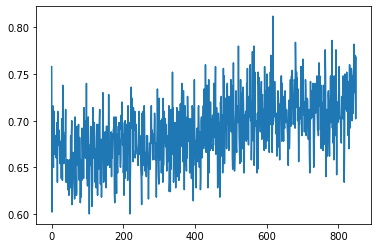

In [59]:
progress_c105_deltar_ep5000=progress
plt.plot(progress_c1005_deltar_ep5000)

In [121]:
progress=[];
theta=[];
thdata=[];
for y in range(8):
    theta.append(2*pi*random.random())    
c1=0.01;   
delta=6;
theta=np.array(theta)+SPSA(1,theta,c1,delta)
for ep in range(5000):
    delta=random.random()+0.2
    theta=theta-SPSA(1,theta,c1,delta)
    print("L=",np.round(lossCal(1,theta),2),"th=",np.round(theta,3)," iter=",ep)
    progress.append(lossCal(1,theta))
    thdata.append(theta)

L= 1.24 th= [3.399 1.018 2.469 3.677 1.855 3.758 4.185 5.741]  iter= 0
L= 1.24 th= [3.367 1.021 2.447 3.673 1.847 3.719 4.182 5.709]  iter= 1
L= 1.26 th= [3.344 1.01  2.42  3.668 1.835 3.719 4.229 5.716]  iter= 2
L= 1.26 th= [3.289 0.997 2.46  3.674 1.88  3.72  4.248 5.704]  iter= 3
L= 1.25 th= [3.292 0.992 2.466 3.661 1.9   3.737 4.236 5.687]  iter= 4
L= 1.24 th= [3.311 0.976 2.461 3.644 1.89  3.705 4.232 5.658]  iter= 5
L= 1.22 th= [3.323 0.961 2.484 3.658 1.945 3.703 4.239 5.674]  iter= 6
L= 1.24 th= [3.328 0.954 2.486 3.666 1.95  3.698 4.223 5.677]  iter= 7
L= 1.25 th= [3.318 0.929 2.518 3.657 1.959 3.708 4.23  5.653]  iter= 8
L= 1.25 th= [3.323 0.922 2.508 3.646 1.951 3.694 4.245 5.654]  iter= 9
L= 1.23 th= [3.323 0.931 2.522 3.646 1.944 3.706 4.24  5.657]  iter= 10
L= 1.25 th= [3.308 0.929 2.535 3.648 1.946 3.716 4.252 5.639]  iter= 11
L= 1.27 th= [3.342 0.937 2.533 3.677 1.954 3.693 4.239 5.627]  iter= 12
L= 1.24 th= [3.39  0.893 2.492 3.699 1.984 3.823 4.297 5.617]  iter= 13
L=

L= 1.05 th= [3.574 1.219 2.904 4.554 1.727 4.141 4.531 5.505]  iter= 114
L= 1.09 th= [3.623 1.153 2.979 4.488 1.694 4.192 4.589 5.5  ]  iter= 115
L= 1.08 th= [3.645 1.167 2.99  4.493 1.704 4.193 4.606 5.498]  iter= 116
L= 1.09 th= [3.626 1.144 3.007 4.477 1.682 4.207 4.596 5.527]  iter= 117
L= 1.1 th= [3.659 1.17  3.047 4.473 1.663 4.188 4.599 5.555]  iter= 118
L= 1.14 th= [3.655 1.161 3.062 4.481 1.653 4.198 4.592 5.55 ]  iter= 119
L= 1.15 th= [3.667 1.153 3.069 4.483 1.617 4.157 4.588 5.515]  iter= 120
L= 1.11 th= [3.684 1.16  3.061 4.477 1.624 4.161 4.592 5.53 ]  iter= 121
L= 1.1 th= [3.67  1.14  3.081 4.48  1.607 4.186 4.594 5.502]  iter= 122
L= 1.07 th= [3.696 1.175 3.026 4.529 1.606 4.191 4.583 5.567]  iter= 123
L= 1.1 th= [3.703 1.193 3.027 4.516 1.593 4.202 4.568 5.605]  iter= 124
L= 1.09 th= [3.694 1.201 3.067 4.544 1.619 4.218 4.591 5.638]  iter= 125
L= 1.09 th= [3.687 1.259 3.113 4.524 1.638 4.204 4.58  5.65 ]  iter= 126
L= 1.1 th= [3.691 1.244 3.118 4.528 1.668 4.209 4.595 

L= 0.86 th= [4.462 1.891 3.671 5.246 2.234 4.824 5.313 6.333]  iter= 227
L= 0.85 th= [4.468 1.899 3.69  5.244 2.231 4.831 5.312 6.33 ]  iter= 228
L= 0.87 th= [4.479 1.903 3.673 5.256 2.23  4.813 5.288 6.303]  iter= 229
L= 0.85 th= [4.474 1.895 3.685 5.265 2.231 4.814 5.303 6.324]  iter= 230
L= 0.87 th= [4.468 1.893 3.703 5.263 2.227 4.815 5.307 6.298]  iter= 231
L= 0.87 th= [4.471 1.856 3.702 5.273 2.19  4.788 5.256 6.279]  iter= 232
L= 0.86 th= [4.471 1.876 3.72  5.26  2.167 4.798 5.258 6.292]  iter= 233
L= 0.83 th= [4.493 1.882 3.721 5.263 2.164 4.792 5.261 6.297]  iter= 234
L= 0.86 th= [4.521 1.887 3.718 5.267 2.17  4.8   5.277 6.301]  iter= 235
L= 0.89 th= [4.529 1.883 3.714 5.258 2.166 4.776 5.285 6.331]  iter= 236
L= 0.84 th= [4.529 1.891 3.73  5.276 2.18  4.763 5.308 6.32 ]  iter= 237
L= 0.85 th= [4.521 1.912 3.727 5.269 2.182 4.763 5.353 6.339]  iter= 238
L= 0.89 th= [4.531 1.916 3.692 5.27  2.192 4.737 5.402 6.357]  iter= 239
L= 0.88 th= [4.557 1.904 3.694 5.252 2.184 4.739 5.

L= 0.87 th= [4.493 2.415 4.021 5.427 2.595 4.817 5.433 6.275]  iter= 340
L= 0.85 th= [4.492 2.428 4.023 5.413 2.579 4.81  5.443 6.299]  iter= 341
L= 0.91 th= [4.481 2.461 4.048 5.425 2.582 4.801 5.481 6.303]  iter= 342
L= 0.86 th= [4.474 2.427 4.058 5.426 2.575 4.802 5.456 6.314]  iter= 343
L= 0.87 th= [4.499 2.428 4.098 5.44  2.551 4.797 5.48  6.333]  iter= 344
L= 0.88 th= [4.506 2.529 4.087 5.319 2.445 4.816 5.495 6.417]  iter= 345
L= 0.88 th= [4.554 2.516 4.121 5.334 2.475 4.838 5.579 6.416]  iter= 346
L= 0.9 th= [4.55  2.514 4.092 5.323 2.494 4.853 5.574 6.424]  iter= 347
L= 0.89 th= [4.567 2.498 4.115 5.334 2.555 4.826 5.595 6.415]  iter= 348
L= 0.88 th= [4.559 2.512 4.133 5.344 2.536 4.838 5.589 6.419]  iter= 349
L= 0.94 th= [4.626 2.406 4.17  5.388 2.559 4.75  5.55  6.337]  iter= 350
L= 0.92 th= [4.663 2.325 4.209 5.388 2.584 4.756 5.593 6.342]  iter= 351
L= 0.93 th= [4.66  2.343 4.205 5.436 2.535 4.77  5.648 6.337]  iter= 352
L= 0.9 th= [4.67  2.346 4.164 5.457 2.621 4.745 5.65

L= 0.91 th= [4.925 2.592 4.351 5.231 1.986 4.777 5.641 5.59 ]  iter= 454
L= 0.93 th= [4.936 2.585 4.355 5.232 1.986 4.799 5.619 5.588]  iter= 455
L= 0.97 th= [4.965 2.606 4.29  5.164 1.954 4.727 5.672 5.63 ]  iter= 456
L= 0.93 th= [4.977 2.594 4.291 5.145 1.966 4.727 5.644 5.637]  iter= 457
L= 0.94 th= [4.993 2.557 4.295 5.157 2.019 4.708 5.63  5.631]  iter= 458
L= 0.95 th= [5.001 2.556 4.292 5.171 1.988 4.718 5.627 5.655]  iter= 459
L= 0.94 th= [4.997 2.534 4.273 5.194 1.982 4.705 5.64  5.658]  iter= 460
L= 0.92 th= [4.985 2.555 4.252 5.179 1.992 4.689 5.627 5.676]  iter= 461
L= 0.96 th= [4.999 2.556 4.229 5.18  2.036 4.712 5.652 5.715]  iter= 462
L= 0.94 th= [4.995 2.565 4.215 5.207 2.026 4.715 5.64  5.718]  iter= 463
L= 0.94 th= [4.965 2.556 4.221 5.208 2.025 4.695 5.64  5.728]  iter= 464
L= 0.89 th= [5.    2.551 4.208 5.201 2.019 4.693 5.647 5.725]  iter= 465
L= 0.92 th= [5.002 2.542 4.203 5.209 2.044 4.697 5.652 5.728]  iter= 466
L= 0.95 th= [5.002 2.544 4.188 5.217 2.046 4.69  5.

L= 0.95 th= [4.715 2.612 4.393 5.007 2.03  4.944 5.772 5.992]  iter= 568
L= 0.98 th= [4.722 2.605 4.388 5.022 2.079 4.98  5.763 5.988]  iter= 569
L= 1.0 th= [4.715 2.571 4.411 5.01  2.065 4.903 5.793 6.023]  iter= 570
L= 0.95 th= [4.746 2.567 4.395 5.012 2.097 4.906 5.802 6.038]  iter= 571
L= 0.96 th= [4.737 2.566 4.393 5.005 2.071 4.929 5.787 6.018]  iter= 572
L= 0.99 th= [4.751 2.563 4.39  5.004 2.087 4.905 5.77  6.014]  iter= 573
L= 0.97 th= [4.74  2.573 4.386 4.999 2.089 4.922 5.761 6.023]  iter= 574
L= 1.02 th= [4.725 2.595 4.332 4.973 2.098 4.96  5.781 6.002]  iter= 575
L= 0.96 th= [4.816 2.749 4.314 4.939 2.132 5.026 5.934 6.085]  iter= 576
L= 0.99 th= [4.809 2.755 4.311 4.931 2.136 5.048 5.948 6.075]  iter= 577
L= 0.99 th= [4.796 2.642 4.292 4.889 2.134 5.031 5.99  6.186]  iter= 578
L= 0.98 th= [4.78  2.629 4.296 4.871 2.125 5.045 6.006 6.183]  iter= 579
L= 0.96 th= [4.799 2.627 4.302 4.899 2.125 5.06  6.032 6.186]  iter= 580
L= 1.0 th= [4.83  2.575 4.307 4.922 2.152 5.076 6.06

L= 0.98 th= [5.541 2.686 4.352 4.97  2.632 5.433 6.165 6.391]  iter= 681
L= 0.98 th= [5.449 2.742 4.417 4.979 2.676 5.456 6.26  6.421]  iter= 682
L= 1.0 th= [5.436 2.761 4.411 4.974 2.664 5.445 6.249 6.403]  iter= 683
L= 0.96 th= [5.485 2.711 4.388 5.003 2.645 5.433 6.201 6.406]  iter= 684
L= 1.0 th= [5.454 2.717 4.399 5.003 2.656 5.433 6.197 6.392]  iter= 685
L= 0.96 th= [5.457 2.716 4.423 4.998 2.656 5.437 6.187 6.419]  iter= 686
L= 1.01 th= [5.458 2.737 4.406 5.013 2.659 5.45  6.212 6.437]  iter= 687
L= 0.97 th= [5.457 2.731 4.391 5.019 2.66  5.46  6.226 6.421]  iter= 688
L= 0.99 th= [5.47  2.736 4.389 5.028 2.65  5.459 6.223 6.424]  iter= 689
L= 0.96 th= [5.456 2.751 4.402 5.052 2.635 5.45  6.223 6.404]  iter= 690
L= 0.97 th= [5.459 2.759 4.396 5.058 2.645 5.463 6.232 6.42 ]  iter= 691
L= 0.97 th= [5.439 2.738 4.381 5.118 2.675 5.466 6.184 6.448]  iter= 692
L= 0.95 th= [5.436 2.754 4.37  5.11  2.674 5.471 6.178 6.435]  iter= 693
L= 0.96 th= [5.456 2.751 4.361 5.117 2.718 5.46  6.18

L= 1.0 th= [5.354 2.633 4.551 4.933 2.519 5.573 6.413 6.467]  iter= 794
L= 0.97 th= [5.36  2.599 4.6   4.966 2.504 5.594 6.403 6.511]  iter= 795
L= 0.99 th= [5.37  2.597 4.603 4.969 2.518 5.609 6.407 6.492]  iter= 796
L= 1.0 th= [5.393 2.604 4.587 4.957 2.551 5.622 6.411 6.455]  iter= 797
L= 1.01 th= [5.371 2.585 4.578 4.973 2.574 5.644 6.401 6.468]  iter= 798
L= 0.99 th= [5.344 2.566 4.531 4.96  2.569 5.632 6.423 6.473]  iter= 799
L= 0.98 th= [5.351 2.549 4.526 4.961 2.579 5.643 6.431 6.506]  iter= 800
L= 0.99 th= [5.337 2.562 4.514 4.965 2.569 5.645 6.43  6.512]  iter= 801
L= 0.98 th= [5.319 2.597 4.464 5.001 2.522 5.604 6.426 6.514]  iter= 802
L= 0.98 th= [5.317 2.616 4.469 4.99  2.542 5.588 6.422 6.546]  iter= 803
L= 0.96 th= [5.273 2.594 4.421 4.952 2.558 5.64  6.414 6.541]  iter= 804
L= 0.99 th= [5.277 2.566 4.391 4.981 2.548 5.662 6.423 6.499]  iter= 805
L= 1.0 th= [5.317 2.558 4.407 4.976 2.532 5.639 6.449 6.51 ]  iter= 806
L= 0.98 th= [5.301 2.543 4.425 4.997 2.525 5.637 6.413

L= 0.96 th= [4.948 2.602 4.329 5.063 3.108 5.642 6.14  6.549]  iter= 907
L= 0.93 th= [4.926 2.602 4.294 5.085 3.121 5.651 6.138 6.567]  iter= 908
L= 0.95 th= [4.944 2.601 4.273 5.113 3.118 5.69  6.124 6.581]  iter= 909
L= 0.96 th= [4.967 2.604 4.284 5.106 3.038 5.674 6.16  6.55 ]  iter= 910
L= 0.94 th= [4.99  2.606 4.3   5.088 3.08  5.678 6.153 6.589]  iter= 911
L= 0.99 th= [4.986 2.611 4.285 5.084 3.076 5.682 6.124 6.611]  iter= 912
L= 0.95 th= [5.    2.593 4.245 5.09  3.044 5.68  6.1   6.639]  iter= 913
L= 0.96 th= [4.962 2.593 4.277 5.119 3.055 5.678 6.071 6.668]  iter= 914
L= 0.95 th= [4.991 2.58  4.293 5.111 3.034 5.686 6.086 6.682]  iter= 915
L= 0.94 th= [4.981 2.554 4.279 5.046 3.03  5.704 6.068 6.686]  iter= 916
L= 0.95 th= [4.973 2.571 4.28  5.054 3.037 5.699 6.063 6.693]  iter= 917
L= 0.98 th= [4.957 2.559 4.263 5.048 3.039 5.703 6.06  6.659]  iter= 918
L= 1.0 th= [4.967 2.545 4.252 5.053 3.043 5.72  6.067 6.664]  iter= 919
L= 1.0 th= [4.953 2.545 4.28  5.075 3.035 5.72  6.08

L= 0.83 th= [4.531 2.508 4.115 5.693 3.102 5.79  6.562 6.673]  iter= 1020
L= 0.86 th= [4.515 2.482 4.171 5.692 3.095 5.779 6.572 6.67 ]  iter= 1021
L= 0.84 th= [4.551 2.534 4.069 5.619 2.942 5.748 6.627 6.622]  iter= 1022
L= 0.87 th= [4.552 2.519 4.072 5.598 2.949 5.759 6.627 6.643]  iter= 1023
L= 0.84 th= [4.561 2.511 4.095 5.609 2.917 5.807 6.619 6.64 ]  iter= 1024
L= 0.8 th= [4.557 2.485 4.073 5.626 2.924 5.801 6.625 6.645]  iter= 1025
L= 0.82 th= [4.568 2.487 4.077 5.624 2.948 5.771 6.639 6.671]  iter= 1026
L= 0.83 th= [4.586 2.466 4.076 5.615 2.961 5.749 6.649 6.658]  iter= 1027
L= 0.84 th= [4.596 2.451 4.116 5.607 2.917 5.723 6.635 6.648]  iter= 1028
L= 0.84 th= [4.586 2.457 4.142 5.598 2.876 5.685 6.687 6.668]  iter= 1029
L= 0.85 th= [4.576 2.446 4.142 5.601 2.889 5.699 6.689 6.66 ]  iter= 1030
L= 0.86 th= [4.565 2.425 4.13  5.613 2.88  5.71  6.702 6.677]  iter= 1031
L= 0.85 th= [4.59  2.449 4.153 5.614 2.905 5.686 6.732 6.709]  iter= 1032
L= 0.85 th= [4.613 2.435 4.153 5.615 2.

L= 0.83 th= [4.423 2.597 4.125 5.871 2.212 5.918 6.454 6.789]  iter= 1131
L= 0.79 th= [4.45  2.587 4.135 5.889 2.239 5.925 6.45  6.764]  iter= 1132
L= 0.8 th= [4.448 2.6   4.14  5.912 2.241 5.909 6.465 6.768]  iter= 1133
L= 0.83 th= [4.453 2.681 4.219 5.952 2.252 5.878 6.478 6.759]  iter= 1134
L= 0.86 th= [4.449 2.69  4.23  5.978 2.265 5.86  6.512 6.793]  iter= 1135
L= 0.84 th= [4.444 2.702 4.233 6.016 2.246 5.873 6.511 6.82 ]  iter= 1136
L= 0.84 th= [4.397 2.658 4.255 6.049 2.244 5.862 6.496 6.842]  iter= 1137
L= 0.85 th= [4.394 2.632 4.209 6.026 2.223 5.873 6.471 6.819]  iter= 1138
L= 0.86 th= [4.374 2.629 4.223 6.036 2.232 5.829 6.489 6.837]  iter= 1139
L= 0.84 th= [4.343 2.68  4.208 6.088 2.16  5.786 6.547 6.756]  iter= 1140
L= 0.82 th= [4.335 2.672 4.229 6.122 2.157 5.799 6.546 6.752]  iter= 1141
L= 0.85 th= [4.329 2.676 4.229 6.121 2.161 5.791 6.525 6.757]  iter= 1142
L= 0.79 th= [4.169 2.573 4.155 6.096 2.195 5.744 6.484 6.693]  iter= 1143
L= 0.79 th= [4.186 2.576 4.149 6.11  2.

L= 0.9 th= [4.273 2.205 4.072 5.474 1.979 5.603 5.752 6.22 ]  iter= 1242
L= 0.84 th= [4.295 2.247 4.047 5.501 1.989 5.603 5.806 6.212]  iter= 1243
L= 0.9 th= [4.333 2.26  4.057 5.486 1.98  5.64  5.785 6.235]  iter= 1244
L= 0.83 th= [4.334 2.264 4.051 5.485 1.98  5.642 5.793 6.243]  iter= 1245
L= 0.84 th= [4.329 2.266 4.04  5.492 1.987 5.634 5.793 6.219]  iter= 1246
L= 0.84 th= [4.337 2.256 4.044 5.499 1.968 5.636 5.765 6.215]  iter= 1247
L= 0.86 th= [4.319 2.223 4.055 5.511 1.976 5.621 5.763 6.227]  iter= 1248
L= 0.85 th= [4.306 2.214 4.066 5.5   1.959 5.634 5.751 6.212]  iter= 1249
L= 0.86 th= [4.311 2.223 4.045 5.51  1.943 5.654 5.767 6.22 ]  iter= 1250
L= 0.83 th= [4.334 2.272 4.061 5.491 1.828 5.669 5.75  6.223]  iter= 1251
L= 0.88 th= [4.311 2.288 4.055 5.503 1.816 5.682 5.735 6.237]  iter= 1252
L= 0.83 th= [4.365 2.232 3.995 5.557 1.822 5.677 5.785 6.329]  iter= 1253
L= 0.84 th= [4.355 2.234 3.984 5.568 1.838 5.666 5.791 6.335]  iter= 1254
L= 0.82 th= [4.296 2.257 3.992 5.571 1.8

L= 0.79 th= [4.122 2.493 3.834 5.652 1.507 5.985 5.466 6.064]  iter= 1353
L= 0.77 th= [4.171 2.512 3.824 5.679 1.509 5.973 5.446 6.108]  iter= 1354
L= 0.77 th= [4.149 2.536 3.819 5.677 1.508 5.955 5.459 6.125]  iter= 1355
L= 0.77 th= [4.127 2.476 3.82  5.681 1.578 5.918 5.409 6.128]  iter= 1356
L= 0.79 th= [4.147 2.467 3.844 5.688 1.591 5.939 5.457 6.118]  iter= 1357
L= 0.74 th= [4.155 2.456 3.837 5.697 1.61  5.961 5.442 6.11 ]  iter= 1358
L= 0.79 th= [4.139 2.482 3.855 5.702 1.606 6.016 5.425 6.104]  iter= 1359
L= 0.81 th= [4.119 2.47  3.896 5.696 1.542 6.011 5.407 6.113]  iter= 1360
L= 0.81 th= [4.106 2.449 3.882 5.688 1.583 5.988 5.378 6.099]  iter= 1361
L= 0.75 th= [4.107 2.445 3.861 5.713 1.585 5.989 5.365 6.074]  iter= 1362
L= 0.75 th= [4.205 2.43  3.893 5.7   1.585 5.953 5.326 6.093]  iter= 1363
L= 0.82 th= [4.219 2.42  3.913 5.675 1.582 5.958 5.334 6.096]  iter= 1364
L= 0.8 th= [4.25  2.408 3.904 5.69  1.634 5.978 5.301 6.104]  iter= 1365
L= 0.8 th= [4.253 2.412 3.931 5.671 1.6

L= 0.8 th= [3.907 2.331 3.681 5.618 1.893 6.33  5.231 6.541]  iter= 1464
L= 0.78 th= [3.895 2.314 3.657 5.631 1.893 6.342 5.219 6.574]  iter= 1465
L= 0.79 th= [3.936 2.312 3.64  5.611 1.845 6.328 5.195 6.526]  iter= 1466
L= 0.77 th= [3.932 2.338 3.635 5.637 1.83  6.303 5.18  6.541]  iter= 1467
L= 0.75 th= [3.918 2.341 3.636 5.631 1.833 6.292 5.168 6.561]  iter= 1468
L= 0.75 th= [3.922 2.34  3.645 5.641 1.837 6.298 5.169 6.565]  iter= 1469
L= 0.75 th= [3.875 2.4   3.668 5.653 1.875 6.283 5.221 6.543]  iter= 1470
L= 0.76 th= [3.878 2.407 3.656 5.639 1.866 6.274 5.226 6.543]  iter= 1471
L= 0.76 th= [3.877 2.415 3.654 5.645 1.849 6.259 5.242 6.528]  iter= 1472
L= 0.78 th= [3.879 2.372 3.623 5.7   1.836 6.226 5.246 6.482]  iter= 1473
L= 0.73 th= [3.905 2.358 3.635 5.705 1.857 6.222 5.233 6.485]  iter= 1474
L= 0.74 th= [3.906 2.36  3.631 5.707 1.848 6.252 5.251 6.465]  iter= 1475
L= 0.75 th= [3.902 2.357 3.62  5.694 1.851 6.239 5.225 6.487]  iter= 1476
L= 0.74 th= [3.901 2.364 3.615 5.683 1.

L= 0.84 th= [3.982 2.629 3.989 5.413 1.418 6.412 5.166 6.37 ]  iter= 1575
L= 0.86 th= [3.956 2.692 4.008 5.406 1.469 6.337 5.14  6.371]  iter= 1576
L= 0.87 th= [3.938 2.691 3.997 5.408 1.475 6.335 5.133 6.38 ]  iter= 1577
L= 0.86 th= [3.954 2.701 4.042 5.41  1.469 6.303 5.125 6.366]  iter= 1578
L= 0.88 th= [3.908 2.663 4.016 5.386 1.486 6.317 5.123 6.402]  iter= 1579
L= 0.88 th= [3.903 2.647 4.004 5.38  1.52  6.308 5.12  6.411]  iter= 1580
L= 0.87 th= [3.886 2.657 4.038 5.409 1.527 6.31  5.132 6.414]  iter= 1581
L= 0.86 th= [3.842 2.643 4.046 5.399 1.508 6.294 5.15  6.406]  iter= 1582
L= 0.89 th= [3.855 2.665 4.048 5.416 1.504 6.305 5.125 6.388]  iter= 1583
L= 0.87 th= [3.832 2.665 4.045 5.42  1.506 6.319 5.149 6.413]  iter= 1584
L= 0.86 th= [3.852 2.655 4.068 5.401 1.534 6.31  5.13  6.432]  iter= 1585
L= 0.85 th= [3.833 2.682 4.066 5.41  1.526 6.329 5.145 6.419]  iter= 1586
L= 0.87 th= [3.843 2.661 4.042 5.42  1.527 6.332 5.153 6.414]  iter= 1587
L= 0.88 th= [3.844 2.705 4.034 5.362 1

L= 0.72 th= [3.701 2.713 3.604 5.912 1.73  6.289 5.072 6.887]  iter= 1686
L= 0.7 th= [3.721 2.711 3.605 5.902 1.736 6.308 5.085 6.907]  iter= 1687
L= 0.74 th= [3.684 2.735 3.65  5.893 1.718 6.304 5.046 6.898]  iter= 1688
L= 0.7 th= [3.661 2.747 3.645 5.888 1.726 6.287 5.028 6.879]  iter= 1689
L= 0.74 th= [3.65  2.735 3.657 5.901 1.688 6.284 5.021 6.878]  iter= 1690
L= 0.71 th= [3.776 2.757 3.606 5.938 1.766 6.229 5.069 6.835]  iter= 1691
L= 0.67 th= [3.809 2.742 3.592 5.957 1.772 6.197 5.079 6.858]  iter= 1692
L= 0.7 th= [3.822 2.751 3.605 5.95  1.756 6.193 5.067 6.868]  iter= 1693
L= 0.68 th= [3.798 2.785 3.617 5.936 1.741 6.207 5.057 6.872]  iter= 1694
L= 0.72 th= [3.806 2.762 3.64  5.925 1.754 6.203 5.057 6.859]  iter= 1695
L= 0.72 th= [3.888 2.764 3.647 5.937 1.729 6.207 5.03  6.859]  iter= 1696
L= 0.73 th= [3.916 2.764 3.674 5.907 1.723 6.131 5.099 6.865]  iter= 1697
L= 0.74 th= [3.917 2.773 3.715 5.912 1.762 6.177 5.049 6.883]  iter= 1698
L= 0.74 th= [3.948 2.776 3.711 5.9   1.77

L= 0.74 th= [4.092 2.592 3.472 5.651 1.462 6.712 4.912 6.823]  iter= 1798
L= 0.77 th= [4.101 2.59  3.449 5.602 1.463 6.671 4.883 6.839]  iter= 1799
L= 0.79 th= [4.118 2.583 3.449 5.622 1.45  6.672 4.881 6.843]  iter= 1800
L= 0.72 th= [4.107 2.58  3.464 5.648 1.438 6.648 4.897 6.875]  iter= 1801
L= 0.72 th= [4.11  2.579 3.482 5.649 1.441 6.62  4.895 6.86 ]  iter= 1802
L= 0.74 th= [4.092 2.591 3.466 5.64  1.445 6.612 4.891 6.853]  iter= 1803
L= 0.74 th= [4.113 2.59  3.447 5.682 1.46  6.59  4.906 6.846]  iter= 1804
L= 0.75 th= [4.12  2.58  3.459 5.698 1.428 6.611 4.941 6.845]  iter= 1805
L= 0.74 th= [4.169 2.555 3.521 5.691 1.417 6.615 4.924 6.865]  iter= 1806
L= 0.75 th= [4.198 2.517 3.549 5.645 1.432 6.548 4.947 6.855]  iter= 1807
L= 0.76 th= [4.245 2.502 3.532 5.621 1.38  6.513 5.002 6.897]  iter= 1808
L= 0.76 th= [4.236 2.511 3.529 5.621 1.387 6.507 5.018 6.905]  iter= 1809
L= 0.75 th= [4.207 2.497 3.484 5.666 1.387 6.52  5.042 6.892]  iter= 1810
L= 0.76 th= [4.211 2.505 3.483 5.635 1

L= 0.74 th= [4.171 2.435 3.668 5.835 1.419 6.684 4.921 7.113]  iter= 1909
L= 0.74 th= [4.193 2.425 3.685 5.822 1.453 6.738 4.909 7.064]  iter= 1910
L= 0.72 th= [4.185 2.441 3.674 5.814 1.431 6.752 4.913 7.066]  iter= 1911
L= 0.72 th= [4.164 2.447 3.667 5.817 1.424 6.731 4.903 7.061]  iter= 1912
L= 0.78 th= [4.164 2.452 3.678 5.82  1.411 6.734 4.909 7.057]  iter= 1913
L= 0.74 th= [4.15  2.427 3.667 5.825 1.424 6.732 4.919 7.084]  iter= 1914
L= 0.72 th= [4.148 2.428 3.656 5.825 1.412 6.723 4.877 7.056]  iter= 1915
L= 0.74 th= [4.16  2.429 3.661 5.826 1.397 6.737 4.886 7.068]  iter= 1916
L= 0.73 th= [4.181 2.409 3.657 5.817 1.376 6.726 4.87  7.078]  iter= 1917
L= 0.75 th= [4.172 2.404 3.669 5.814 1.377 6.745 4.868 7.076]  iter= 1918
L= 0.72 th= [4.174 2.406 3.692 5.779 1.384 6.76  4.888 7.102]  iter= 1919
L= 0.79 th= [4.158 2.311 3.789 5.618 1.403 6.782 4.88  7.108]  iter= 1920
L= 0.81 th= [4.178 2.292 3.764 5.615 1.376 6.792 4.884 7.095]  iter= 1921
L= 0.79 th= [4.185 2.317 3.775 5.589 1

L= 0.75 th= [4.64  2.379 3.769 5.665 1.131 7.089 4.708 6.999]  iter= 2020
L= 0.77 th= [4.699 2.339 3.721 5.693 1.119 7.067 4.714 6.954]  iter= 2021
L= 0.75 th= [4.68  2.371 3.715 5.692 1.125 7.07  4.694 6.975]  iter= 2022
L= 0.75 th= [4.69  2.375 3.705 5.676 1.128 7.092 4.688 6.974]  iter= 2023
L= 0.76 th= [4.685 2.384 3.715 5.66  1.137 7.095 4.697 6.953]  iter= 2024
L= 0.77 th= [4.713 2.364 3.713 5.642 1.126 7.077 4.668 6.936]  iter= 2025
L= 0.74 th= [4.73  2.361 3.736 5.629 1.124 7.071 4.669 6.943]  iter= 2026
L= 0.77 th= [4.742 2.404 3.711 5.614 1.085 7.051 4.639 6.97 ]  iter= 2027
L= 0.8 th= [4.739 2.402 3.712 5.612 1.103 7.049 4.642 6.949]  iter= 2028
L= 0.8 th= [4.75  2.396 3.703 5.623 1.12  7.028 4.669 6.962]  iter= 2029
L= 0.78 th= [4.715 2.405 3.67  5.628 1.151 7.039 4.665 6.957]  iter= 2030
L= 0.78 th= [4.717 2.398 3.667 5.592 1.141 7.036 4.682 6.957]  iter= 2031
L= 0.78 th= [4.704 2.418 3.763 5.547 1.126 7.072 4.711 6.988]  iter= 2032
L= 0.8 th= [4.692 2.413 3.765 5.568 1.13

L= 0.71 th= [5.253 2.659 3.825 6.026 1.008 7.293 4.566 6.955]  iter= 2132
L= 0.73 th= [5.27  2.657 3.836 6.005 1.006 7.278 4.577 6.973]  iter= 2133
L= 0.73 th= [5.243 2.632 3.857 6.005 1.023 7.304 4.587 7.002]  iter= 2134
L= 0.73 th= [5.263 2.661 3.85  6.019 1.033 7.286 4.593 7.007]  iter= 2135
L= 0.73 th= [5.241 2.684 3.833 6.042 1.054 7.309 4.602 6.984]  iter= 2136
L= 0.72 th= [5.223 2.672 3.838 6.042 1.043 7.305 4.605 6.975]  iter= 2137
L= 0.71 th= [5.219 2.671 3.816 6.032 1.04  7.276 4.637 6.956]  iter= 2138
L= 0.73 th= [5.205 2.665 3.8   6.026 1.016 7.277 4.66  6.967]  iter= 2139
L= 0.74 th= [5.201 2.661 3.747 5.997 0.955 7.252 4.633 6.877]  iter= 2140
L= 0.7 th= [5.23  2.66  3.66  6.104 0.93  7.298 4.648 6.814]  iter= 2141
L= 0.69 th= [5.246 2.631 3.642 6.105 0.934 7.321 4.652 6.827]  iter= 2142
L= 0.69 th= [5.25  2.614 3.649 6.101 0.935 7.323 4.657 6.826]  iter= 2143
L= 0.73 th= [5.253 2.625 3.668 6.106 0.923 7.314 4.646 6.836]  iter= 2144
L= 0.73 th= [5.3   2.626 3.678 6.073 0.

L= 0.68 th= [5.186 2.321 3.533 5.927 0.676 7.535 4.331 6.51 ]  iter= 2243
L= 0.73 th= [5.169 2.335 3.524 5.939 0.688 7.516 4.345 6.474]  iter= 2244
L= 0.68 th= [5.182 2.316 3.513 5.943 0.697 7.511 4.362 6.501]  iter= 2245
L= 0.68 th= [5.207 2.296 3.545 5.946 0.702 7.543 4.362 6.484]  iter= 2246
L= 0.7 th= [5.23  2.287 3.571 5.935 0.695 7.531 4.306 6.485]  iter= 2247
L= 0.69 th= [5.248 2.275 3.541 5.919 0.681 7.503 4.318 6.479]  iter= 2248
L= 0.7 th= [5.182 2.282 3.54  5.902 0.684 7.497 4.291 6.462]  iter= 2249
L= 0.73 th= [5.175 2.293 3.541 5.884 0.686 7.513 4.274 6.456]  iter= 2250
L= 0.7 th= [5.174 2.301 3.561 5.908 0.698 7.533 4.247 6.458]  iter= 2251
L= 0.68 th= [5.179 2.316 3.582 5.904 0.688 7.552 4.265 6.482]  iter= 2252
L= 0.7 th= [5.172 2.333 3.593 5.908 0.692 7.571 4.243 6.476]  iter= 2253
L= 0.71 th= [5.121 2.279 3.652 5.926 0.653 7.472 4.149 6.424]  iter= 2254
L= 0.7 th= [5.131 2.256 3.624 5.943 0.639 7.503 4.164 6.46 ]  iter= 2255
L= 0.72 th= [5.109 2.247 3.603 5.896 0.623 

L= 0.8 th= [4.914 2.198 3.947 5.794 0.579 7.596 4.166 6.282]  iter= 2354
L= 0.75 th= [4.924 2.198 3.927 5.794 0.563 7.614 4.141 6.264]  iter= 2355
L= 0.8 th= [4.916 2.224 3.92  5.795 0.579 7.618 4.134 6.255]  iter= 2356
L= 0.79 th= [4.935 2.219 3.905 5.813 0.604 7.594 4.133 6.26 ]  iter= 2357
L= 0.77 th= [4.943 2.218 3.891 5.809 0.601 7.581 4.129 6.25 ]  iter= 2358
L= 0.75 th= [4.96  2.206 3.863 5.809 0.61  7.598 4.124 6.242]  iter= 2359
L= 0.77 th= [4.961 2.205 3.863 5.819 0.6   7.583 4.132 6.251]  iter= 2360
L= 0.77 th= [4.953 2.219 3.855 5.782 0.61  7.547 4.15  6.268]  iter= 2361
L= 0.78 th= [4.907 2.258 3.88  5.803 0.598 7.581 4.171 6.3  ]  iter= 2362
L= 0.76 th= [4.9   2.263 3.884 5.798 0.614 7.601 4.193 6.31 ]  iter= 2363
L= 0.79 th= [4.92  2.261 3.893 5.746 0.647 7.572 4.205 6.281]  iter= 2364
L= 0.76 th= [4.917 2.26  3.891 5.761 0.69  7.579 4.202 6.299]  iter= 2365
L= 0.77 th= [4.886 2.286 3.893 5.74  0.636 7.624 4.162 6.224]  iter= 2366
L= 0.82 th= [4.86  2.28  3.891 5.747 0.6

L= 0.83 th= [5.106 1.765 3.965 5.545 0.901 7.602 4.093 5.393]  iter= 2465
L= 0.81 th= [5.102 1.741 3.951 5.569 0.927 7.58  4.076 5.363]  iter= 2466
L= 0.82 th= [5.032 1.674 3.838 5.553 0.856 7.626 4.063 5.303]  iter= 2467
L= 0.8 th= [5.009 1.675 3.811 5.529 0.851 7.613 4.054 5.271]  iter= 2468
L= 0.79 th= [5.016 1.672 3.811 5.531 0.861 7.632 4.041 5.27 ]  iter= 2469
L= 0.81 th= [5.031 1.689 3.799 5.521 0.863 7.636 4.04  5.283]  iter= 2470
L= 0.78 th= [5.068 1.675 3.763 5.507 0.854 7.605 4.043 5.291]  iter= 2471
L= 0.82 th= [5.077 1.673 3.78  5.495 0.856 7.62  4.038 5.301]  iter= 2472
L= 0.8 th= [5.051 1.686 3.752 5.518 0.827 7.628 4.033 5.294]  iter= 2473
L= 0.84 th= [5.063 1.682 3.749 5.505 0.842 7.633 4.041 5.294]  iter= 2474
L= 0.79 th= [5.072 1.679 3.769 5.534 0.872 7.639 4.087 5.28 ]  iter= 2475
L= 0.82 th= [5.067 1.673 3.762 5.54  0.876 7.64  4.069 5.295]  iter= 2476
L= 0.81 th= [5.07  1.666 3.803 5.545 0.876 7.66  4.105 5.283]  iter= 2477
L= 0.8 th= [5.057 1.685 3.786 5.554 0.88

L= 0.76 th= [4.898 1.597 3.469 5.552 1.059 8.151 4.3   5.242]  iter= 2576
L= 0.74 th= [4.904 1.588 3.468 5.546 1.05  8.165 4.291 5.272]  iter= 2577
L= 0.77 th= [4.89  1.661 3.409 5.512 1.014 8.165 4.265 5.284]  iter= 2578
L= 0.79 th= [4.885 1.652 3.412 5.504 1.019 8.176 4.281 5.269]  iter= 2579
L= 0.75 th= [4.893 1.674 3.4   5.508 1.022 8.174 4.289 5.262]  iter= 2580
L= 0.79 th= [4.906 1.689 3.4   5.517 1.038 8.181 4.279 5.262]  iter= 2581
L= 0.75 th= [4.895 1.657 3.41  5.497 1.035 8.158 4.327 5.307]  iter= 2582
L= 0.8 th= [4.889 1.587 3.405 5.469 1.102 8.172 4.353 5.299]  iter= 2583
L= 0.78 th= [4.882 1.592 3.382 5.494 1.111 8.19  4.36  5.315]  iter= 2584
L= 0.79 th= [4.866 1.587 3.392 5.487 1.099 8.17  4.381 5.312]  iter= 2585
L= 0.76 th= [4.894 1.606 3.398 5.516 1.121 8.158 4.408 5.332]  iter= 2586
L= 0.79 th= [4.881 1.617 3.393 5.498 1.117 8.167 4.398 5.344]  iter= 2587
L= 0.78 th= [4.894 1.625 3.391 5.498 1.113 8.165 4.416 5.331]  iter= 2588
L= 0.77 th= [4.885 1.615 3.404 5.501 1.

L= 0.81 th= [4.969 2.266 3.922 5.542 1.23  8.071 4.998 5.763]  iter= 2688
L= 0.81 th= [4.965 2.27  3.927 5.535 1.234 8.078 4.996 5.753]  iter= 2689
L= 0.85 th= [5.011 2.238 4.018 5.606 1.22  8.056 5.036 5.786]  iter= 2690
L= 0.83 th= [5.027 2.224 4.014 5.564 1.232 8.067 5.061 5.77 ]  iter= 2691
L= 0.82 th= [5.03  2.226 3.998 5.553 1.223 8.045 5.046 5.769]  iter= 2692
L= 0.83 th= [5.031 2.234 3.983 5.537 1.203 8.018 5.021 5.75 ]  iter= 2693
L= 0.81 th= [5.029 2.249 3.955 5.53  1.176 8.021 5.026 5.736]  iter= 2694
L= 0.82 th= [5.04  2.233 3.957 5.531 1.195 7.99  5.013 5.767]  iter= 2695
L= 0.81 th= [4.997 2.244 3.969 5.511 1.208 8.015 5.036 5.782]  iter= 2696
L= 0.82 th= [4.981 2.26  3.974 5.528 1.194 8.026 5.07  5.813]  iter= 2697
L= 0.79 th= [4.993 2.287 3.966 5.527 1.17  8.005 5.063 5.808]  iter= 2698
L= 0.81 th= [4.978 2.302 3.949 5.501 1.157 8.    5.062 5.801]  iter= 2699
L= 0.83 th= [4.988 2.296 3.953 5.508 1.168 8.019 5.051 5.788]  iter= 2700
L= 0.84 th= [4.986 2.295 3.948 5.486 1

L= 0.87 th= [5.196 3.064 4.14  5.416 1.341 8.304 4.891 6.079]  iter= 2800
L= 0.88 th= [5.205 3.064 4.121 5.368 1.342 8.309 4.901 6.063]  iter= 2801
L= 0.89 th= [5.21  3.061 4.112 5.382 1.343 8.324 4.897 6.091]  iter= 2802
L= 0.86 th= [5.202 3.042 4.169 5.389 1.351 8.331 4.879 6.093]  iter= 2803
L= 0.86 th= [5.219 3.064 4.171 5.392 1.342 8.323 4.888 6.091]  iter= 2804
L= 0.88 th= [5.207 3.064 4.183 5.388 1.309 8.326 4.94  6.06 ]  iter= 2805
L= 0.86 th= [5.194 3.024 4.236 5.41  1.279 8.361 4.885 6.134]  iter= 2806
L= 0.88 th= [5.181 2.993 4.247 5.414 1.309 8.354 4.883 6.131]  iter= 2807
L= 0.88 th= [5.211 2.983 4.242 5.45  1.302 8.364 4.874 6.122]  iter= 2808
L= 0.88 th= [5.191 2.99  4.233 5.448 1.296 8.332 4.86  6.12 ]  iter= 2809
L= 0.9 th= [5.183 3.049 4.231 5.475 1.3   8.304 4.879 6.103]  iter= 2810
L= 0.91 th= [5.167 3.046 4.245 5.464 1.322 8.32  4.909 6.097]  iter= 2811
L= 0.91 th= [5.159 3.071 4.259 5.486 1.342 8.336 4.879 6.054]  iter= 2812
L= 0.9 th= [5.194 3.059 4.249 5.434 1.3

L= 0.93 th= [5.016 3.243 4.261 5.105 0.858 7.804 4.824 5.835]  iter= 2911
L= 0.95 th= [5.027 3.233 4.24  5.108 0.922 7.782 4.848 5.809]  iter= 2912
L= 0.93 th= [5.013 3.224 4.29  5.107 0.937 7.786 4.822 5.795]  iter= 2913
L= 0.93 th= [5.006 3.265 4.297 5.135 0.909 7.755 4.82  5.844]  iter= 2914
L= 0.94 th= [5.012 3.267 4.277 5.13  0.903 7.764 4.798 5.836]  iter= 2915
L= 0.94 th= [5.013 3.271 4.267 5.119 0.891 7.754 4.795 5.85 ]  iter= 2916
L= 0.93 th= [5.026 3.272 4.261 5.099 0.92  7.737 4.819 5.858]  iter= 2917
L= 0.94 th= [5.022 3.248 4.262 5.104 0.947 7.719 4.815 5.853]  iter= 2918
L= 0.95 th= [4.997 3.234 4.247 5.123 0.94  7.713 4.771 5.835]  iter= 2919
L= 0.89 th= [5.016 3.267 4.268 5.126 0.904 7.693 4.766 5.828]  iter= 2920
L= 0.95 th= [5.03  3.256 4.274 5.152 0.915 7.707 4.801 5.842]  iter= 2921
L= 0.96 th= [5.035 3.266 4.264 5.157 0.917 7.71  4.784 5.829]  iter= 2922
L= 0.93 th= [5.015 3.28  4.246 5.171 0.939 7.728 4.82  5.825]  iter= 2923
L= 0.92 th= [4.991 3.184 4.243 5.163 0

L= 0.86 th= [5.07  3.142 4.062 5.346 0.81  7.652 4.61  6.241]  iter= 3022
L= 0.89 th= [5.071 3.134 4.115 5.339 0.78  7.724 4.623 6.241]  iter= 3023
L= 0.9 th= [5.081 3.181 4.152 5.322 0.786 7.72  4.611 6.222]  iter= 3024
L= 0.91 th= [5.09  3.19  4.133 5.34  0.779 7.715 4.611 6.252]  iter= 3025
L= 0.89 th= [5.087 3.174 4.151 5.338 0.751 7.705 4.607 6.249]  iter= 3026
L= 0.9 th= [5.089 3.186 4.142 5.336 0.762 7.709 4.625 6.25 ]  iter= 3027
L= 0.9 th= [5.091 3.178 4.118 5.322 0.746 7.741 4.586 6.233]  iter= 3028
L= 0.87 th= [5.114 3.158 4.105 5.314 0.729 7.728 4.59  6.248]  iter= 3029
L= 0.88 th= [5.113 3.166 4.095 5.311 0.713 7.736 4.592 6.25 ]  iter= 3030
L= 0.9 th= [5.117 3.147 4.139 5.306 0.719 7.737 4.605 6.232]  iter= 3031
L= 0.92 th= [5.162 3.153 4.152 5.331 0.685 7.77  4.583 6.23 ]  iter= 3032
L= 0.88 th= [5.176 3.163 4.146 5.315 0.688 7.769 4.612 6.236]  iter= 3033
L= 0.88 th= [5.19  3.174 4.125 5.308 0.715 7.771 4.622 6.255]  iter= 3034
L= 0.9 th= [5.228 3.178 4.133 5.302 0.742 

L= 1.02 th= [5.225 3.735 4.377 4.922 1.006 7.881 4.66  5.811]  iter= 3133
L= 1.0 th= [5.218 3.751 4.392 4.91  0.998 7.902 4.68  5.823]  iter= 3134
L= 1.01 th= [5.235 3.76  4.385 4.944 0.981 7.895 4.683 5.805]  iter= 3135
L= 0.95 th= [5.246 3.77  4.369 4.979 1.006 7.898 4.712 5.795]  iter= 3136
L= 0.97 th= [5.29  3.763 4.283 5.07  0.918 7.88  4.758 5.726]  iter= 3137
L= 0.96 th= [5.294 3.744 4.273 5.046 0.901 7.883 4.809 5.744]  iter= 3138
L= 0.97 th= [5.328 3.714 4.272 5.076 0.929 7.881 4.825 5.76 ]  iter= 3139
L= 0.94 th= [5.292 3.702 4.279 5.078 0.935 7.91  4.837 5.76 ]  iter= 3140
L= 0.95 th= [5.317 3.686 4.276 5.058 0.936 7.908 4.853 5.729]  iter= 3141
L= 0.95 th= [5.32  3.702 4.291 5.066 0.92  7.874 4.842 5.725]  iter= 3142
L= 0.93 th= [5.322 3.738 4.233 5.093 0.929 7.87  4.891 5.735]  iter= 3143
L= 0.96 th= [5.33  3.749 4.233 5.117 0.948 7.875 4.881 5.711]  iter= 3144
L= 0.99 th= [5.306 3.763 4.309 5.114 0.926 7.773 4.848 5.773]  iter= 3145
L= 0.99 th= [5.336 3.752 4.338 5.103 0.

L= 0.98 th= [5.307 3.428 4.599 4.706 0.923 7.723 4.075 5.655]  iter= 3244
L= 1.03 th= [5.284 3.406 4.632 4.729 0.912 7.776 4.066 5.635]  iter= 3245
L= 1.02 th= [5.274 3.391 4.643 4.722 0.911 7.745 4.064 5.645]  iter= 3246
L= 0.99 th= [5.236 3.471 4.56  4.767 0.993 7.808 4.106 5.668]  iter= 3247
L= 0.97 th= [5.237 3.527 4.54  4.767 0.983 7.801 4.123 5.677]  iter= 3248
L= 1.02 th= [5.226 3.557 4.491 4.734 0.996 7.822 4.104 5.678]  iter= 3249
L= 1.03 th= [5.224 3.577 4.491 4.753 1.002 7.824 4.112 5.682]  iter= 3250
L= 1.02 th= [5.215 3.603 4.502 4.783 0.984 7.768 4.115 5.657]  iter= 3251
L= 1.01 th= [5.213 3.604 4.508 4.774 0.977 7.777 4.094 5.661]  iter= 3252
L= 1.05 th= [5.21  3.634 4.492 4.783 0.973 7.764 4.092 5.667]  iter= 3253
L= 1.01 th= [5.148 3.603 4.483 4.822 0.872 7.674 4.144 5.639]  iter= 3254
L= 0.99 th= [5.155 3.614 4.505 4.821 0.852 7.694 4.131 5.653]  iter= 3255
L= 1.05 th= [5.14  3.629 4.57  4.841 0.842 7.708 4.14  5.642]  iter= 3256
L= 0.97 th= [5.144 3.649 4.58  4.832 0

L= 0.96 th= [5.257 3.744 5.203 4.338 1.153 7.655 4.145 5.333]  iter= 3355
L= 0.94 th= [5.222 3.722 5.225 4.341 1.107 7.626 4.142 5.318]  iter= 3356
L= 0.93 th= [5.206 3.706 5.208 4.339 1.105 7.654 4.149 5.339]  iter= 3357
L= 0.94 th= [5.226 3.711 5.206 4.357 1.126 7.645 4.185 5.312]  iter= 3358
L= 0.95 th= [5.251 3.666 5.19  4.408 1.134 7.675 4.144 5.3  ]  iter= 3359
L= 0.93 th= [5.254 3.689 5.219 4.412 1.153 7.654 4.156 5.288]  iter= 3360
L= 0.94 th= [5.238 3.691 5.211 4.4   1.142 7.675 4.15  5.276]  iter= 3361
L= 0.97 th= [5.242 3.706 5.205 4.404 1.133 7.668 4.154 5.268]  iter= 3362
L= 0.98 th= [5.223 3.714 5.202 4.44  1.099 7.707 4.155 5.241]  iter= 3363
L= 0.97 th= [5.159 3.718 5.165 4.45  1.059 7.67  4.041 5.256]  iter= 3364
L= 0.97 th= [5.143 3.788 5.119 4.536 1.077 7.706 4.16  5.309]  iter= 3365
L= 0.97 th= [5.124 3.792 5.099 4.503 1.11  7.695 4.157 5.348]  iter= 3366
L= 0.96 th= [5.138 3.737 5.055 4.461 1.172 7.753 4.122 5.378]  iter= 3367
L= 0.95 th= [5.155 3.722 5.038 4.456 1

L= 0.98 th= [4.615 3.684 5.041 4.565 1.531 7.798 4.19  5.357]  iter= 3466
L= 1.0 th= [4.606 3.669 5.024 4.57  1.532 7.786 4.185 5.364]  iter= 3467
L= 0.96 th= [4.618 3.663 5.039 4.538 1.54  7.788 4.184 5.359]  iter= 3468
L= 0.95 th= [4.609 3.662 5.035 4.539 1.558 7.798 4.183 5.356]  iter= 3469
L= 0.98 th= [4.62  3.655 5.03  4.534 1.558 7.831 4.174 5.352]  iter= 3470
L= 0.96 th= [4.616 3.672 5.02  4.526 1.534 7.828 4.154 5.346]  iter= 3471
L= 0.94 th= [4.546 3.638 5.022 4.466 1.503 7.831 4.086 5.335]  iter= 3472
L= 0.96 th= [4.489 3.565 4.999 4.426 1.539 7.822 4.052 5.332]  iter= 3473
L= 0.97 th= [4.498 3.572 5.004 4.419 1.55  7.818 4.056 5.313]  iter= 3474
L= 1.0 th= [4.505 3.593 4.996 4.417 1.508 7.839 4.105 5.293]  iter= 3475
L= 0.96 th= [4.512 3.591 5.003 4.421 1.483 7.851 4.096 5.285]  iter= 3476
L= 0.97 th= [4.507 3.498 5.03  4.419 1.36  7.851 4.16  5.369]  iter= 3477
L= 0.98 th= [4.526 3.503 5.041 4.409 1.341 7.866 4.16  5.365]  iter= 3478
L= 0.97 th= [4.516 3.488 5.049 4.412 1.3

L= 0.98 th= [4.285 3.799 4.968 4.822 1.741 7.819 4.061 5.098]  iter= 3577
L= 1.02 th= [4.258 3.802 5.031 4.771 1.726 7.76  4.002 5.065]  iter= 3578
L= 0.97 th= [4.223 3.807 5.037 4.76  1.773 7.808 4.023 5.08 ]  iter= 3579
L= 1.01 th= [4.254 3.783 5.091 4.705 1.763 7.872 4.01  5.042]  iter= 3580
L= 0.98 th= [4.28  3.824 5.125 4.699 1.716 7.849 4.016 5.053]  iter= 3581
L= 0.99 th= [4.255 3.824 5.15  4.708 1.729 7.844 4.016 5.049]  iter= 3582
L= 1.01 th= [4.189 3.9   5.175 4.697 1.727 7.811 4.064 4.989]  iter= 3583
L= 0.99 th= [4.079 3.943 5.239 4.746 1.741 7.839 4.107 4.917]  iter= 3584
L= 0.99 th= [4.084 3.919 5.261 4.717 1.743 7.782 4.149 4.92 ]  iter= 3585
L= 0.97 th= [4.068 3.912 5.236 4.725 1.735 7.787 4.137 4.903]  iter= 3586
L= 1.0 th= [4.082 3.868 5.312 4.72  1.733 7.781 4.08  4.833]  iter= 3587
L= 0.99 th= [4.07  3.855 5.319 4.724 1.76  7.774 4.094 4.842]  iter= 3588
L= 1.0 th= [4.077 3.85  5.288 4.747 1.751 7.778 4.092 4.839]  iter= 3589
L= 1.0 th= [4.081 3.796 5.266 4.767 1.80

L= 1.05 th= [3.528 3.637 4.863 5.184 1.836 7.121 3.679 4.45 ]  iter= 3690
L= 1.02 th= [3.49  3.658 4.888 5.213 1.76  7.154 3.697 4.445]  iter= 3691
L= 1.0 th= [3.494 3.644 4.906 5.209 1.767 7.09  3.645 4.426]  iter= 3692
L= 1.02 th= [3.531 3.685 4.876 5.127 1.795 7.066 3.646 4.44 ]  iter= 3693
L= 1.04 th= [3.519 3.707 4.836 5.115 1.803 7.08  3.654 4.455]  iter= 3694
L= 1.0 th= [3.503 3.719 4.836 5.141 1.823 7.118 3.641 4.458]  iter= 3695
L= 1.0 th= [3.502 3.718 4.798 5.094 1.833 7.099 3.699 4.481]  iter= 3696
L= 0.96 th= [3.519 3.736 4.788 5.079 1.824 7.089 3.679 4.482]  iter= 3697
L= 1.0 th= [3.501 3.757 4.822 5.147 1.859 7.018 3.728 4.432]  iter= 3698
L= 1.02 th= [3.559 3.773 4.833 5.126 1.803 7.057 3.837 4.405]  iter= 3699
L= 1.0 th= [3.566 3.798 4.821 5.078 1.811 7.088 3.773 4.422]  iter= 3700
L= 1.01 th= [3.561 3.802 4.817 5.09  1.805 7.087 3.767 4.404]  iter= 3701
L= 1.02 th= [3.551 3.81  4.824 5.111 1.815 7.084 3.745 4.418]  iter= 3702
L= 1.0 th= [3.53  3.802 4.819 5.112 1.805 7

L= 1.02 th= [3.356 3.578 4.542 4.941 1.954 6.846 3.207 4.335]  iter= 3802
L= 0.99 th= [3.372 3.577 4.536 4.932 1.96  6.838 3.195 4.37 ]  iter= 3803
L= 1.0 th= [3.376 3.576 4.54  4.9   1.939 6.839 3.196 4.384]  iter= 3804
L= 0.99 th= [3.376 3.579 4.55  4.891 1.952 6.827 3.204 4.379]  iter= 3805
L= 0.97 th= [3.332 3.582 4.54  4.863 1.988 6.899 3.162 4.481]  iter= 3806
L= 1.01 th= [3.356 3.593 4.533 4.861 1.995 6.91  3.173 4.487]  iter= 3807
L= 0.97 th= [3.324 3.58  4.543 4.858 2.011 6.915 3.161 4.453]  iter= 3808
L= 1.0 th= [3.317 3.58  4.54  4.87  2.007 6.907 3.173 4.457]  iter= 3809
L= 0.99 th= [3.304 3.579 4.569 4.845 2.007 6.918 3.189 4.445]  iter= 3810
L= 0.99 th= [3.309 3.577 4.561 4.84  2.012 6.935 3.205 4.449]  iter= 3811
L= 1.0 th= [3.308 3.583 4.566 4.838 2.045 6.95  3.216 4.456]  iter= 3812
L= 1.04 th= [3.33  3.576 4.491 4.87  2.028 6.971 3.194 4.445]  iter= 3813
L= 1.0 th= [3.372 3.58  4.541 4.941 2.113 7.054 3.049 4.46 ]  iter= 3814
L= 0.98 th= [3.369 3.618 4.586 4.921 2.115

L= 0.98 th= [3.762 4.057 4.541 4.948 2.308 6.878 2.857 4.416]  iter= 3913
L= 1.02 th= [3.775 4.032 4.591 4.968 2.361 6.875 2.797 4.462]  iter= 3914
L= 1.01 th= [3.779 4.053 4.603 4.97  2.37  6.883 2.791 4.457]  iter= 3915
L= 1.01 th= [3.789 4.043 4.601 4.949 2.381 6.866 2.775 4.466]  iter= 3916
L= 1.02 th= [3.81  4.044 4.618 4.93  2.392 6.864 2.776 4.471]  iter= 3917
L= 0.98 th= [3.793 4.058 4.623 4.96  2.387 6.883 2.727 4.455]  iter= 3918
L= 1.02 th= [3.752 4.054 4.631 4.925 2.322 6.833 2.726 4.479]  iter= 3919
L= 1.0 th= [3.733 4.044 4.6   4.912 2.341 6.855 2.745 4.481]  iter= 3920
L= 0.96 th= [3.69  4.039 4.565 4.867 2.361 6.833 2.766 4.493]  iter= 3921
L= 1.0 th= [3.743 4.06  4.577 4.873 2.341 6.826 2.803 4.497]  iter= 3922
L= 0.98 th= [3.673 4.036 4.542 4.942 2.287 6.814 2.852 4.568]  iter= 3923
L= 0.95 th= [3.647 4.03  4.53  4.935 2.281 6.793 2.829 4.571]  iter= 3924
L= 0.99 th= [3.638 4.043 4.505 4.933 2.289 6.791 2.821 4.593]  iter= 3925
L= 0.99 th= [3.671 4.042 4.498 4.923 2.2

L= 0.99 th= [3.803 4.087 4.729 4.833 2.254 7.04  3.153 4.449]  iter= 4025
L= 1.01 th= [3.789 4.08  4.675 4.857 2.275 7.025 3.177 4.422]  iter= 4026
L= 1.03 th= [3.827 4.079 4.69  4.904 2.223 7.028 3.196 4.427]  iter= 4027
L= 1.0 th= [3.859 4.111 4.701 4.917 2.169 7.018 3.11  4.507]  iter= 4028
L= 0.97 th= [3.827 4.143 4.695 4.924 2.165 7.009 3.098 4.502]  iter= 4029
L= 1.01 th= [3.802 4.126 4.7   4.93  2.145 7.013 3.114 4.501]  iter= 4030
L= 0.99 th= [3.795 4.118 4.7   4.949 2.164 7.    3.087 4.497]  iter= 4031
L= 1.0 th= [3.795 4.111 4.695 4.939 2.161 7.01  3.081 4.488]  iter= 4032
L= 0.98 th= [3.807 4.123 4.698 4.966 2.15  6.996 3.078 4.49 ]  iter= 4033
L= 0.97 th= [3.828 4.123 4.691 4.99  2.175 7.013 3.068 4.5  ]  iter= 4034
L= 1.03 th= [3.868 4.131 4.692 4.992 2.189 7.013 3.07  4.539]  iter= 4035
L= 0.99 th= [3.865 4.143 4.674 4.988 2.182 7.006 3.114 4.557]  iter= 4036
L= 1.01 th= [3.854 4.143 4.718 4.988 2.173 7.    3.121 4.517]  iter= 4037
L= 0.96 th= [3.843 4.153 4.693 4.994 2.1

L= 1.0 th= [4.042 4.302 4.661 5.029 1.976 7.055 3.322 4.461]  iter= 4136
L= 1.02 th= [4.035 4.267 4.67  5.053 1.949 7.05  3.361 4.451]  iter= 4137
L= 0.99 th= [4.088 4.318 4.617 5.06  1.972 7.    3.378 4.475]  iter= 4138
L= 1.01 th= [4.081 4.348 4.638 5.038 1.968 7.037 3.36  4.467]  iter= 4139
L= 1.02 th= [4.047 4.37  4.632 5.017 1.94  7.075 3.345 4.468]  iter= 4140
L= 1.01 th= [4.047 4.363 4.643 5.017 1.95  7.084 3.339 4.479]  iter= 4141
L= 1.0 th= [4.027 4.393 4.672 5.04  1.987 7.105 3.354 4.483]  iter= 4142
L= 1.01 th= [4.006 4.38  4.681 5.056 1.924 7.113 3.386 4.507]  iter= 4143
L= 0.99 th= [4.    4.402 4.676 5.06  1.919 7.147 3.397 4.516]  iter= 4144
L= 1.0 th= [4.001 4.4   4.672 5.051 1.915 7.161 3.399 4.506]  iter= 4145
L= 0.98 th= [3.924 4.343 4.749 5.062 1.892 7.145 3.425 4.535]  iter= 4146
L= 1.02 th= [3.86  4.337 4.721 5.072 1.842 7.241 3.394 4.559]  iter= 4147
L= 1.0 th= [3.823 4.35  4.714 5.079 1.857 7.239 3.402 4.558]  iter= 4148
L= 1.01 th= [3.824 4.37  4.712 5.084 1.857

L= 1.02 th= [3.718 4.997 4.889 4.917 2.219 7.266 3.183 4.386]  iter= 4248
L= 0.97 th= [3.717 5.011 4.885 4.915 2.2   7.271 3.179 4.387]  iter= 4249
L= 0.99 th= [3.756 4.986 4.89  4.913 2.184 7.283 3.183 4.407]  iter= 4250
L= 1.0 th= [3.775 4.964 4.876 4.925 2.186 7.274 3.206 4.376]  iter= 4251
L= 1.04 th= [3.748 4.93  4.871 4.965 2.164 7.226 3.212 4.443]  iter= 4252
L= 1.0 th= [3.756 4.93  4.863 4.965 2.139 7.235 3.271 4.451]  iter= 4253
L= 1.0 th= [3.758 4.935 4.888 4.954 2.145 7.257 3.288 4.443]  iter= 4254
L= 0.98 th= [3.817 4.91  4.878 4.946 2.152 7.25  3.278 4.462]  iter= 4255
L= 1.01 th= [3.803 4.906 4.88  4.922 2.144 7.246 3.266 4.452]  iter= 4256
L= 1.02 th= [3.808 4.905 4.875 4.929 2.124 7.235 3.247 4.449]  iter= 4257
L= 1.03 th= [3.826 4.908 4.88  4.942 2.113 7.229 3.233 4.435]  iter= 4258
L= 1.02 th= [3.812 4.92  4.858 4.921 2.09  7.217 3.234 4.44 ]  iter= 4259
L= 0.96 th= [3.792 4.939 4.867 4.889 2.073 7.29  3.204 4.451]  iter= 4260
L= 1.02 th= [3.785 4.968 4.88  4.903 2.06

L= 1.0 th= [3.318 4.708 4.958 4.774 2.105 6.929 3.426 4.502]  iter= 4359
L= 1.0 th= [3.32  4.7   4.939 4.759 2.126 6.922 3.426 4.491]  iter= 4360
L= 1.02 th= [3.354 4.678 4.913 4.733 2.1   6.916 3.358 4.475]  iter= 4361
L= 1.0 th= [3.349 4.668 4.909 4.728 2.101 6.923 3.36  4.481]  iter= 4362
L= 1.0 th= [3.347 4.654 4.933 4.77  2.089 6.935 3.347 4.507]  iter= 4363
L= 0.98 th= [3.327 4.663 4.938 4.758 2.075 6.951 3.341 4.568]  iter= 4364
L= 1.0 th= [3.331 4.691 4.946 4.756 2.072 6.895 3.315 4.505]  iter= 4365
L= 1.03 th= [3.302 4.641 4.986 4.74  2.09  6.912 3.298 4.509]  iter= 4366
L= 0.99 th= [3.306 4.628 4.981 4.742 2.076 6.914 3.285 4.523]  iter= 4367
L= 1.02 th= [3.319 4.613 5.04  4.886 2.154 6.89  3.311 4.436]  iter= 4368
L= 1.02 th= [3.329 4.633 5.018 4.894 2.127 6.886 3.312 4.444]  iter= 4369
L= 1.06 th= [3.341 4.643 5.005 4.882 2.133 6.881 3.311 4.451]  iter= 4370
L= 1.02 th= [3.29  4.6   4.954 5.064 2.176 6.891 3.33  4.483]  iter= 4371
L= 1.01 th= [3.253 4.587 4.932 5.092 2.187 

L= 1.01 th= [3.049 4.302 4.906 5.012 1.665 6.936 3.065 4.349]  iter= 4470
L= 1.05 th= [3.058 4.321 4.884 5.015 1.638 6.934 3.087 4.372]  iter= 4471
L= 1.03 th= [3.041 4.339 4.927 4.981 1.636 6.899 3.092 4.382]  iter= 4472
L= 1.01 th= [3.013 4.329 4.922 4.983 1.629 6.916 3.09  4.399]  iter= 4473
L= 1.05 th= [3.03  4.354 4.919 4.993 1.624 6.922 3.091 4.424]  iter= 4474
L= 1.01 th= [3.027 4.347 4.927 5.02  1.631 6.939 3.105 4.398]  iter= 4475
L= 1.01 th= [3.046 4.345 4.93  5.011 1.635 6.918 3.093 4.405]  iter= 4476
L= 1.0 th= [3.058 4.315 4.93  5.043 1.648 6.957 3.125 4.422]  iter= 4477
L= 1.02 th= [3.089 4.301 4.93  5.046 1.633 6.938 3.138 4.447]  iter= 4478
L= 1.01 th= [3.026 4.296 4.958 5.042 1.629 6.942 3.156 4.431]  iter= 4479
L= 1.01 th= [2.991 4.275 4.977 4.987 1.623 6.947 3.158 4.409]  iter= 4480
L= 1.03 th= [3.    4.255 4.985 4.989 1.629 6.94  3.157 4.436]  iter= 4481
L= 1.03 th= [3.012 4.255 4.998 5.007 1.64  6.944 3.161 4.435]  iter= 4482
L= 1.01 th= [3.01  4.26  5.    4.987 1.

L= 1.0 th= [2.788 4.158 4.657 4.728 1.657 6.95  3.154 4.229]  iter= 4582
L= 1.0 th= [2.846 4.187 4.727 4.813 1.536 6.879 3.087 4.357]  iter= 4583
L= 1.0 th= [2.82  4.147 4.608 4.838 1.426 6.782 3.114 4.398]  iter= 4584
L= 1.03 th= [2.809 4.144 4.616 4.81  1.419 6.78  3.136 4.404]  iter= 4585
L= 0.97 th= [2.792 4.174 4.598 4.811 1.428 6.77  3.136 4.417]  iter= 4586
L= 1.04 th= [2.808 4.178 4.6   4.831 1.427 6.772 3.13  4.41 ]  iter= 4587
L= 0.99 th= [2.785 4.202 4.592 4.798 1.467 6.784 3.088 4.409]  iter= 4588
L= 0.99 th= [2.801 4.188 4.658 4.779 1.49  6.774 3.052 4.448]  iter= 4589
L= 0.98 th= [2.774 4.193 4.629 4.791 1.49  6.782 3.03  4.449]  iter= 4590
L= 1.02 th= [2.723 4.217 4.627 4.791 1.507 6.783 3.071 4.446]  iter= 4591
L= 1.0 th= [2.744 4.188 4.62  4.808 1.479 6.83  3.033 4.405]  iter= 4592
L= 1.01 th= [2.734 4.207 4.623 4.822 1.48  6.837 3.023 4.395]  iter= 4593
L= 1.0 th= [2.748 4.206 4.641 4.807 1.496 6.845 3.01  4.373]  iter= 4594
L= 0.97 th= [2.728 4.215 4.627 4.805 1.488 

L= 0.97 th= [2.919 4.173 4.942 4.667 1.445 7.084 2.985 4.283]  iter= 4694
L= 0.98 th= [2.917 4.183 4.947 4.669 1.424 7.094 2.979 4.283]  iter= 4695
L= 0.97 th= [2.94  4.224 4.975 4.664 1.424 7.105 3.03  4.242]  iter= 4696
L= 0.96 th= [2.895 4.263 4.933 4.64  1.435 7.085 3.035 4.22 ]  iter= 4697
L= 0.98 th= [2.905 4.279 4.918 4.618 1.423 7.107 3.064 4.214]  iter= 4698
L= 0.97 th= [2.925 4.276 4.915 4.616 1.421 7.092 3.056 4.21 ]  iter= 4699
L= 0.98 th= [2.907 4.327 4.905 4.633 1.413 7.088 3.043 4.155]  iter= 4700
L= 1.01 th= [2.919 4.31  4.906 4.643 1.404 7.108 3.02  4.173]  iter= 4701
L= 0.97 th= [2.921 4.316 4.909 4.651 1.385 7.092 3.019 4.167]  iter= 4702
L= 1.03 th= [2.916 4.295 4.916 4.659 1.391 7.107 3.003 4.16 ]  iter= 4703
L= 0.98 th= [2.958 4.291 4.92  4.657 1.38  7.137 2.994 4.174]  iter= 4704
L= 0.99 th= [2.929 4.265 5.053 4.652 1.334 7.191 2.921 4.114]  iter= 4705
L= 1.0 th= [2.939 4.246 5.053 4.638 1.345 7.204 2.896 4.093]  iter= 4706
L= 0.98 th= [2.944 4.221 5.068 4.654 1.

L= 1.02 th= [3.063 3.913 4.679 4.817 0.999 7.1   2.979 4.258]  iter= 4807
L= 0.96 th= [3.03  3.956 4.705 4.801 0.944 7.051 2.969 4.32 ]  iter= 4808
L= 1.0 th= [3.023 3.951 4.7   4.828 0.964 7.041 2.952 4.303]  iter= 4809
L= 1.01 th= [3.003 3.99  4.671 4.838 0.932 7.058 2.955 4.246]  iter= 4810
L= 1.01 th= [3.022 3.993 4.652 4.842 0.943 7.077 2.941 4.239]  iter= 4811
L= 1.0 th= [2.965 3.959 4.642 4.775 0.898 7.071 2.981 4.29 ]  iter= 4812
L= 0.99 th= [2.916 3.963 4.679 4.775 0.922 7.04  2.966 4.341]  iter= 4813
L= 0.99 th= [2.889 3.939 4.667 4.78  0.87  6.994 3.013 4.329]  iter= 4814
L= 1.0 th= [2.879 3.939 4.674 4.778 0.866 6.994 3.005 4.349]  iter= 4815
L= 1.03 th= [2.818 3.887 4.701 4.873 0.892 7.027 3.064 4.379]  iter= 4816
L= 1.01 th= [2.817 3.888 4.714 4.875 0.867 7.021 3.062 4.398]  iter= 4817
L= 0.99 th= [2.898 3.877 4.723 4.806 0.934 7.072 3.011 4.428]  iter= 4818
L= 1.01 th= [2.913 3.848 4.691 4.755 0.919 7.047 3.073 4.326]  iter= 4819
L= 1.01 th= [2.911 3.863 4.703 4.758 0.90

L= 0.98 th= [3.452 4.332 4.773 4.766 0.731 7.033 3.036 4.672]  iter= 4919
L= 1.01 th= [3.45  4.312 4.776 4.781 0.73  7.038 3.051 4.669]  iter= 4920
L= 0.99 th= [3.434 4.307 4.827 4.851 0.724 7.013 3.032 4.602]  iter= 4921
L= 1.02 th= [3.445 4.3   4.839 4.859 0.721 7.004 3.038 4.593]  iter= 4922
L= 1.05 th= [3.442 4.313 4.848 4.856 0.752 6.972 3.054 4.607]  iter= 4923
L= 0.99 th= [3.452 4.316 4.837 4.851 0.758 6.973 3.052 4.604]  iter= 4924
L= 1.0 th= [3.483 4.278 4.81  4.837 0.682 7.01  3.064 4.65 ]  iter= 4925
L= 1.01 th= [3.477 4.261 4.794 4.846 0.701 7.009 3.067 4.65 ]  iter= 4926
L= 1.04 th= [3.475 4.248 4.778 4.863 0.706 6.998 3.038 4.67 ]  iter= 4927
L= 1.0 th= [3.464 4.267 4.781 4.896 0.746 6.965 3.052 4.702]  iter= 4928
L= 0.98 th= [3.472 4.302 4.777 4.89  0.731 6.955 3.084 4.685]  iter= 4929
L= 0.98 th= [3.475 4.33  4.78  4.875 0.713 6.975 3.    4.659]  iter= 4930
L= 1.01 th= [3.49  4.322 4.779 4.833 0.691 6.961 2.987 4.685]  iter= 4931
L= 1.01 th= [3.499 4.324 4.817 4.816 0.7

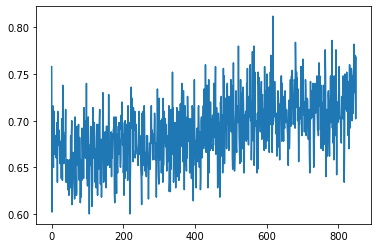

In [122]:
progress_c105_deltar_ep5000=progress
plt.plot(progress_c1005_deltar_ep5000)

In [123]:
progress=[];
theta=[];
thdata=[];
for y in range(8):
    theta.append(2*pi*random.random())    
c1=0.01;   
delta=6;
theta=np.array(theta)+SPSA(1,theta,c1,delta)
for ep in range(50000):
    delta=random.random()+0.3
    theta=theta-SPSA(1,theta,c1,delta)
    print("L=",np.round(lossCal(1,theta),2),"th=",np.round(theta,3)," iter=",ep)
    progress.append(lossCal(1,theta))
    thdata.append(theta)

L= 1.02 th= [2.527 0.634 2.123 1.619 2.518 0.123 5.574 4.668]  iter= 0
L= 0.97 th= [2.54  0.655 2.151 1.653 2.515 0.106 5.556 4.689]  iter= 1
L= 0.99 th= [2.583 0.654 2.146 1.667 2.487 0.026 5.476 4.646]  iter= 2
L= 0.96 th= [2.561 0.642 2.151 1.679 2.49  0.02  5.447 4.652]  iter= 3
L= 0.99 th= [2.543 0.641 2.161 1.66  2.468 0.018 5.452 4.634]  iter= 4
L= 1.02 th= [2.555 0.624 2.16  1.65  2.479 0.018 5.456 4.63 ]  iter= 5
L= 0.99 th= [2.578 0.65  2.15  1.635 2.458 0.014 5.434 4.582]  iter= 6
L= 0.99 th= [2.589 0.651 2.157 1.656 2.459 0.02  5.42  4.596]  iter= 7
L= 1.01 th= [2.607 0.656 2.15  1.65  2.453 0.028 5.387 4.592]  iter= 8
L= 1.05 th= [ 2.606e+00  6.530e-01  2.155e+00  1.646e+00  2.436e+00 -1.000e-03
  5.393e+00  4.610e+00]  iter= 9
L= 1.0 th= [ 2.608  0.651  2.146  1.656  2.434 -0.008  5.399  4.616]  iter= 10
L= 1.05 th= [ 2.598e+00  6.120e-01  2.118e+00  1.666e+00  2.429e+00 -2.000e-03
  5.394e+00  4.664e+00]  iter= 11
L= 0.98 th= [ 2.595  0.593  2.046  1.665  2.372 -0.021  5

L= 0.97 th= [ 2.755  0.703  1.967  1.341  2.441 -0.453  4.99   4.269]  iter= 103
L= 1.01 th= [ 2.753  0.718  1.989  1.368  2.447 -0.496  5.004  4.254]  iter= 104
L= 1.0 th= [ 2.765  0.706  1.969  1.399  2.423 -0.521  4.986  4.234]  iter= 105
L= 0.97 th= [ 2.757  0.702  1.981  1.389  2.444 -0.526  4.998  4.196]  iter= 106
L= 0.96 th= [ 2.779  0.692  1.945  1.352  2.472 -0.474  4.988  4.162]  iter= 107
L= 0.97 th= [ 2.785  0.712  1.939  1.335  2.443 -0.477  5.     4.164]  iter= 108
L= 0.98 th= [ 2.772  0.72   1.937  1.337  2.442 -0.492  5.002  4.173]  iter= 109
L= 0.95 th= [ 2.78   0.727  1.943  1.336  2.441 -0.497  5.009  4.199]  iter= 110
L= 0.98 th= [ 2.797  0.699  1.938  1.311  2.439 -0.504  5.002  4.19 ]  iter= 111
L= 0.96 th= [ 2.809  0.679  1.946  1.3    2.408 -0.509  4.993  4.183]  iter= 112
L= 0.96 th= [ 2.793  0.666  1.929  1.334  2.406 -0.503  4.983  4.174]  iter= 113
L= 0.97 th= [ 2.77   0.695  1.941  1.325  2.409 -0.523  4.976  4.183]  iter= 114
L= 0.92 th= [ 2.779  0.691  1

L= 0.98 th= [ 2.749  0.823  2.004  1.525  2.203 -0.937  4.559  4.34 ]  iter= 206
L= 0.98 th= [ 2.733  0.832  2.01   1.54   2.198 -0.936  4.556  4.329]  iter= 207
L= 1.01 th= [ 2.736  0.848  2.019  1.546  2.2   -0.927  4.546  4.346]  iter= 208
L= 0.98 th= [ 2.747  0.855  2.025  1.547  2.211 -0.941  4.539  4.381]  iter= 209
L= 0.97 th= [ 2.756  0.841  2.014  1.528  2.206 -0.947  4.55   4.377]  iter= 210
L= 0.94 th= [ 2.757  0.822  1.999  1.516  2.198 -0.946  4.568  4.365]  iter= 211
L= 0.97 th= [ 2.768  0.827  1.985  1.501  2.203 -0.946  4.574  4.359]  iter= 212
L= 0.98 th= [ 2.78   0.809  1.984  1.495  2.189 -0.952  4.568  4.366]  iter= 213
L= 1.01 th= [ 2.81   0.791  2.009  1.522  2.183 -0.967  4.549  4.396]  iter= 214
L= 0.95 th= [ 2.803  0.785  2.004  1.53   2.177 -0.956  4.548  4.401]  iter= 215
L= 0.99 th= [ 2.79   0.797  1.988  1.532  2.181 -0.927  4.533  4.423]  iter= 216
L= 0.99 th= [ 2.771  0.769  2.056  1.546  2.19  -0.933  4.519  4.417]  iter= 217
L= 1.01 th= [ 2.773  0.768  

L= 0.98 th= [ 2.259  0.266  2.029  1.537  2.16  -0.838  4.297  3.948]  iter= 309
L= 0.98 th= [ 2.25   0.245  2.038  1.523  2.154 -0.835  4.265  3.947]  iter= 310
L= 0.95 th= [ 2.247  0.224  2.061  1.518  2.122 -0.816  4.225  3.972]  iter= 311
L= 0.98 th= [ 2.246  0.245  2.065  1.519  2.119 -0.81   4.255  3.955]  iter= 312
L= 0.99 th= [ 2.175  0.241  2.091  1.543  2.131 -0.853  4.329  3.951]  iter= 313
L= 0.95 th= [ 2.157  0.245  2.094  1.531  2.135 -0.858  4.343  3.952]  iter= 314
L= 0.98 th= [ 2.16   0.244  2.086  1.529  2.122 -0.866  4.352  3.96 ]  iter= 315
L= 0.99 th= [ 2.155  0.246  2.055  1.539  2.136 -0.872  4.345  3.961]  iter= 316
L= 1.0 th= [ 2.057  0.277  1.992  1.591  2.097 -0.906  4.353  3.926]  iter= 317
L= 0.99 th= [ 2.046  0.279  2.     1.587  2.073 -0.908  4.347  3.924]  iter= 318
L= 1.02 th= [ 2.03   0.259  1.993  1.603  2.059 -0.907  4.345  3.931]  iter= 319
L= 1.02 th= [ 2.003  0.237  1.975  1.623  2.08  -0.919  4.354  3.919]  iter= 320
L= 0.99 th= [ 2.021  0.235  1

L= 0.98 th= [ 1.707  0.231  1.879  1.236  1.957 -1.148  4.321  3.907]  iter= 411
L= 0.93 th= [ 1.714  0.218  1.908  1.202  1.941 -1.111  4.297  3.906]  iter= 412
L= 0.96 th= [ 1.732  0.214  1.9    1.208  1.943 -1.11   4.315  3.907]  iter= 413
L= 0.93 th= [ 1.738  0.23   1.89   1.214  1.951 -1.103  4.343  3.906]  iter= 414
L= 0.94 th= [ 1.707  0.232  1.898  1.209  1.97  -1.105  4.332  3.898]  iter= 415
L= 0.96 th= [ 1.704  0.229  1.9    1.193  1.976 -1.106  4.31   3.902]  iter= 416
L= 0.95 th= [ 1.699  0.228  1.9    1.178  1.973 -1.106  4.3    3.906]  iter= 417
L= 0.96 th= [ 1.717  0.237  1.893  1.192  2.002 -1.117  4.299  3.893]  iter= 418
L= 0.96 th= [ 1.701  0.242  1.904  1.193  1.997 -1.092  4.298  3.89 ]  iter= 419
L= 0.97 th= [ 1.684  0.254  1.887  1.208  1.984 -1.08   4.293  3.875]  iter= 420
L= 0.95 th= [ 1.669  0.247  1.89   1.201  1.996 -1.075  4.289  3.863]  iter= 421
L= 0.96 th= [ 1.68   0.229  1.861  1.21   1.989 -1.08   4.317  3.842]  iter= 422
L= 0.96 th= [ 1.66   0.203  

L= 0.97 th= [ 1.421  0.056  1.95   1.431  1.986 -1.044  4.768  3.937]  iter= 514
L= 0.98 th= [ 1.415  0.021  1.944  1.418  1.979 -1.09   4.779  3.964]  iter= 515
L= 0.99 th= [ 1.461e+00  4.000e-03  1.911e+00  1.409e+00  1.929e+00 -1.098e+00
  4.773e+00  3.957e+00]  iter= 516
L= 0.95 th= [ 1.411e+00  3.000e-03  1.884e+00  1.386e+00  1.954e+00 -1.086e+00
  4.760e+00  3.912e+00]  iter= 517
L= 0.96 th= [ 1.417  0.007  1.884  1.378  1.947 -1.075  4.763  3.924]  iter= 518
L= 0.99 th= [ 1.413  0.015  1.867  1.388  1.937 -1.098  4.747  3.937]  iter= 519
L= 0.99 th= [ 1.399e+00 -4.000e-03  1.860e+00  1.415e+00  1.963e+00 -1.133e+00
  4.732e+00  3.932e+00]  iter= 520
L= 0.99 th= [ 1.441 -0.021  1.813  1.397  1.937 -1.122  4.753  3.996]  iter= 521
L= 0.96 th= [ 1.38  -0.018  1.805  1.37   1.938 -1.139  4.729  3.975]  iter= 522
L= 0.95 th= [ 1.383 -0.028  1.798  1.376  1.929 -1.14   4.707  3.969]  iter= 523
L= 0.97 th= [ 1.394 -0.     1.789  1.362  1.936 -1.138  4.697  3.973]  iter= 524
L= 0.97 th

L= 0.95 th= [ 1.314 -0.107  2.017  1.282  2.12  -1.153  4.629  3.915]  iter= 614
L= 0.94 th= [ 1.306 -0.111  2.012  1.278  2.109 -1.149  4.635  3.93 ]  iter= 615
L= 0.96 th= [ 1.273 -0.104  2.008  1.294  2.101 -1.129  4.646  3.926]  iter= 616
L= 0.94 th= [ 1.263 -0.099  2.017  1.28   2.071 -1.129  4.656  3.888]  iter= 617
L= 0.95 th= [ 1.273 -0.095  2.057  1.259  2.069 -1.114  4.649  3.908]  iter= 618
L= 0.96 th= [ 1.264 -0.103  2.03   1.249  2.062 -1.104  4.643  3.907]  iter= 619
L= 0.94 th= [ 1.344 -0.106  2.007  1.253  2.05  -1.08   4.704  3.86 ]  iter= 620
L= 0.94 th= [ 1.348 -0.103  2.027  1.253  2.042 -1.056  4.701  3.868]  iter= 621
L= 0.93 th= [ 1.338 -0.124  2.025  1.238  2.028 -1.062  4.711  3.879]  iter= 622
L= 0.94 th= [ 1.331 -0.146  2.027  1.229  2.017 -1.07   4.708  3.876]  iter= 623
L= 0.93 th= [ 1.311 -0.167  2.035  1.197  2.007 -1.028  4.716  3.88 ]  iter= 624
L= 0.98 th= [ 1.342 -0.233  2.061  1.299  2.036 -0.941  4.751  3.838]  iter= 625
L= 0.99 th= [ 1.345 -0.24   

L= 0.94 th= [ 1.254 -0.25   1.898  1.188  2.253 -0.93   4.943  3.607]  iter= 716
L= 0.96 th= [ 1.269 -0.244  1.901  1.189  2.234 -0.922  4.965  3.618]  iter= 717
L= 0.96 th= [ 1.261 -0.251  1.89   1.205  2.236 -0.911  4.961  3.629]  iter= 718
L= 0.97 th= [ 1.254 -0.259  1.895  1.191  2.247 -0.913  4.962  3.642]  iter= 719
L= 0.94 th= [ 1.25  -0.255  1.895  1.175  2.252 -0.905  4.975  3.643]  iter= 720
L= 0.96 th= [ 1.201 -0.216  1.905  1.111  2.281 -0.911  4.957  3.673]  iter= 721
L= 0.97 th= [ 1.206 -0.212  1.931  1.147  2.265 -0.933  4.924  3.71 ]  iter= 722
L= 0.98 th= [ 1.195 -0.214  1.904  1.137  2.273 -0.918  4.909  3.729]  iter= 723
L= 0.98 th= [ 1.169 -0.235  1.921  1.132  2.279 -0.932  4.892  3.736]  iter= 724
L= 0.97 th= [ 1.182 -0.222  1.898  1.133  2.291 -0.914  4.888  3.751]  iter= 725
L= 0.94 th= [ 1.148 -0.218  1.896  1.138  2.31  -0.912  4.868  3.746]  iter= 726
L= 0.98 th= [ 1.139 -0.219  1.9    1.155  2.333 -0.929  4.879  3.768]  iter= 727
L= 0.95 th= [ 1.125 -0.224  

L= 0.95 th= [ 1.413 -0.066  1.975  1.127  2.672 -1.002  5.023  4.034]  iter= 817
L= 0.94 th= [ 1.408 -0.06   1.986  1.132  2.673 -0.981  5.023  4.058]  iter= 818
L= 0.94 th= [ 1.399 -0.051  2.013  1.139  2.668 -0.978  5.021  4.072]  iter= 819
L= 0.94 th= [ 1.365 -0.044  2.013  1.145  2.671 -0.933  5.009  4.056]  iter= 820
L= 0.93 th= [ 1.373 -0.044  2.02   1.169  2.661 -0.943  4.995  4.032]  iter= 821
L= 0.92 th= [ 1.388 -0.047  1.995  1.165  2.657 -0.951  5.01   4.028]  iter= 822
L= 0.92 th= [ 1.375 -0.048  2.013  1.141  2.63  -0.971  4.992  4.03 ]  iter= 823
L= 0.95 th= [ 1.383 -0.012  2.001  1.145  2.638 -0.966  4.977  4.009]  iter= 824
L= 0.96 th= [ 1.372 -0.008  1.991  1.156  2.632 -0.973  4.966  4.01 ]  iter= 825
L= 0.94 th= [ 1.361  0.054  1.934  1.145  2.57  -0.977  4.948  4.029]  iter= 826
L= 0.91 th= [ 1.339  0.041  1.979  1.129  2.55  -0.979  4.967  3.988]  iter= 827
L= 0.93 th= [ 1.386  0.033  1.985  1.116  2.579 -0.986  4.99   3.989]  iter= 828
L= 0.95 th= [ 1.396  0.08   

L= 0.89 th= [ 1.516 -0.12   1.936  0.983  2.557 -0.744  5.186  4.083]  iter= 920
L= 0.91 th= [ 1.511 -0.119  1.95   0.965  2.536 -0.744  5.205  4.099]  iter= 921
L= 0.94 th= [ 1.515 -0.113  1.953  0.943  2.525 -0.743  5.203  4.111]  iter= 922
L= 0.94 th= [ 1.504 -0.077  1.961  0.975  2.526 -0.75   5.189  4.109]  iter= 923
L= 0.92 th= [ 1.48  -0.063  1.986  0.962  2.485 -0.738  5.165  4.12 ]  iter= 924
L= 0.96 th= [ 1.514 -0.042  1.968  0.983  2.517 -0.734  5.178  4.096]  iter= 925
L= 0.95 th= [ 1.513 -0.05   1.962  0.978  2.527 -0.754  5.142  4.098]  iter= 926
L= 0.94 th= [ 1.528 -0.05   1.966  0.995  2.476 -0.763  5.138  4.073]  iter= 927
L= 0.94 th= [ 1.528 -0.024  1.957  1.013  2.495 -0.767  5.148  4.058]  iter= 928
L= 0.95 th= [ 1.528 -0.032  1.959  1.001  2.497 -0.77   5.151  4.091]  iter= 929
L= 0.93 th= [ 1.604 -0.035  1.924  0.984  2.524 -0.782  5.218  4.045]  iter= 930
L= 0.94 th= [ 1.617 -0.06   1.92   0.908  2.536 -0.835  5.278  4.048]  iter= 931
L= 0.92 th= [ 1.619 -0.035  

L= 0.83 th= [ 1.891 -0.045  2.38   0.858  2.609 -0.841  5.666  4.088]  iter= 1017
L= 0.83 th= [ 1.885e+00  5.000e-03  2.398e+00  8.190e-01  2.589e+00 -8.300e-01
  5.633e+00  4.116e+00]  iter= 1018
L= 0.82 th= [ 1.881 -0.036  2.328  0.825  2.635 -0.83   5.614  4.086]  iter= 1019
L= 0.83 th= [ 1.909 -0.029  2.32   0.85   2.626 -0.829  5.61   4.098]  iter= 1020
L= 0.87 th= [ 1.918 -0.012  2.319  0.873  2.641 -0.834  5.619  4.113]  iter= 1021
L= 0.86 th= [ 1.916 -0.019  2.323  0.854  2.629 -0.82   5.623  4.113]  iter= 1022
L= 0.81 th= [ 1.907 -0.026  2.332  0.846  2.633 -0.825  5.623  4.1  ]  iter= 1023
L= 0.82 th= [ 1.911 -0.011  2.319  0.857  2.612 -0.816  5.623  4.099]  iter= 1024
L= 0.82 th= [ 1.919  0.044  2.331  0.886  2.571 -0.827  5.608  4.114]  iter= 1025
L= 0.83 th= [ 1.969  0.024  2.325  0.856  2.572 -0.796  5.609  4.088]  iter= 1026
L= 0.83 th= [ 1.975  0.011  2.292  0.856  2.561 -0.805  5.631  4.099]  iter= 1027
L= 0.88 th= [ 1.986 -0.013  2.282  0.875  2.562 -0.802  5.65   4.

L= 0.88 th= [ 1.734  0.067  2.282  0.971  2.653 -1.233  5.643  4.339]  iter= 1117
L= 0.86 th= [ 1.772  0.053  2.271  0.969  2.668 -1.247  5.637  4.362]  iter= 1118
L= 0.9 th= [ 1.795  0.058  2.273  0.95   2.7   -1.251  5.663  4.366]  iter= 1119
L= 0.86 th= [ 1.835  0.047  2.267  0.958  2.658 -1.258  5.668  4.346]  iter= 1120
L= 0.84 th= [ 1.837  0.031  2.262  0.933  2.65  -1.249  5.668  4.345]  iter= 1121
L= 0.84 th= [ 1.842  0.031  2.269  0.897  2.671 -1.267  5.682  4.385]  iter= 1122
L= 0.83 th= [ 1.827  0.046  2.27   0.882  2.706 -1.264  5.687  4.371]  iter= 1123
L= 0.84 th= [ 1.833  0.064  2.268  0.88   2.7   -1.252  5.682  4.362]  iter= 1124
L= 0.83 th= [ 1.864  0.075  2.291  0.856  2.677 -1.281  5.692  4.365]  iter= 1125
L= 0.87 th= [ 1.869  0.083  2.285  0.859  2.669 -1.281  5.666  4.364]  iter= 1126
L= 0.86 th= [ 1.855  0.078  2.288  0.861  2.65  -1.278  5.663  4.359]  iter= 1127
L= 0.86 th= [ 1.864  0.071  2.254  0.848  2.653 -1.246  5.645  4.314]  iter= 1128
L= 0.84 th= [ 1.8

L= 0.84 th= [ 1.841  0.403  2.363  0.892  2.646 -1.264  5.5    4.525]  iter= 1217
L= 0.81 th= [ 1.862  0.391  2.369  0.894  2.688 -1.249  5.48   4.548]  iter= 1218
L= 0.81 th= [ 1.85   0.381  2.385  0.882  2.71  -1.226  5.482  4.505]  iter= 1219
L= 0.81 th= [ 1.855  0.363  2.388  0.876  2.68  -1.227  5.485  4.506]  iter= 1220
L= 0.83 th= [ 1.868  0.375  2.432  0.858  2.7   -1.235  5.493  4.502]  iter= 1221
L= 0.79 th= [ 1.842  0.362  2.468  0.866  2.677 -1.227  5.469  4.476]  iter= 1222
L= 0.81 th= [ 1.812  0.32   2.464  0.888  2.685 -1.234  5.456  4.444]  iter= 1223
L= 0.75 th= [ 1.819  0.319  2.448  0.885  2.685 -1.248  5.467  4.434]  iter= 1224
L= 0.85 th= [ 1.85   0.335  2.437  0.911  2.704 -1.209  5.475  4.433]  iter= 1225
L= 0.83 th= [ 1.847  0.341  2.44   0.908  2.682 -1.211  5.488  4.446]  iter= 1226
L= 0.85 th= [ 1.843  0.368  2.436  0.917  2.699 -1.2    5.476  4.45 ]  iter= 1227
L= 0.84 th= [ 1.849  0.371  2.426  0.923  2.706 -1.202  5.477  4.45 ]  iter= 1228
L= 0.81 th= [ 1.

L= 0.89 th= [ 1.922  0.449  2.344  1.181  2.563 -0.962  5.56   4.498]  iter= 1317
L= 0.9 th= [ 1.928  0.437  2.32   1.17   2.555 -0.964  5.566  4.498]  iter= 1318
L= 0.9 th= [ 1.933  0.429  2.321  1.168  2.578 -0.973  5.579  4.475]  iter= 1319
L= 0.89 th= [ 1.932  0.395  2.323  1.181  2.598 -0.972  5.585  4.467]  iter= 1320
L= 0.88 th= [ 1.929  0.392  2.354  1.156  2.597 -0.937  5.594  4.515]  iter= 1321
L= 0.9 th= [ 1.919  0.386  2.356  1.15   2.586 -0.937  5.587  4.511]  iter= 1322
L= 0.87 th= [ 1.917  0.38   2.337  1.159  2.582 -0.937  5.585  4.523]  iter= 1323
L= 0.91 th= [ 1.923  0.389  2.324  1.167  2.61  -0.948  5.61   4.535]  iter= 1324
L= 0.86 th= [ 1.913  0.399  2.321  1.164  2.605 -0.954  5.607  4.543]  iter= 1325
L= 0.88 th= [ 1.914  0.393  2.308  1.176  2.612 -0.964  5.578  4.565]  iter= 1326
L= 0.89 th= [ 1.898  0.401  2.312  1.172  2.587 -0.976  5.568  4.547]  iter= 1327
L= 0.87 th= [ 1.889  0.38   2.293  1.187  2.601 -0.972  5.555  4.527]  iter= 1328
L= 0.92 th= [ 1.896

L= 0.78 th= [ 1.651  0.287  2.515  0.834  2.232 -1.462  5.906  4.356]  iter= 1419
L= 0.8 th= [ 1.647  0.285  2.492  0.845  2.233 -1.456  5.906  4.37 ]  iter= 1420
L= 0.79 th= [ 1.66   0.308  2.507  0.862  2.229 -1.449  5.884  4.375]  iter= 1421
L= 0.8 th= [ 1.654  0.333  2.505  0.841  2.21  -1.428  5.859  4.391]  iter= 1422
L= 0.77 th= [ 1.639  0.341  2.506  0.838  2.225 -1.439  5.856  4.397]  iter= 1423
L= 0.82 th= [ 1.638  0.325  2.477  0.835  2.215 -1.446  5.849  4.388]  iter= 1424
L= 0.79 th= [ 1.641  0.296  2.489  0.847  2.204 -1.459  5.858  4.393]  iter= 1425
L= 0.79 th= [ 1.638  0.29   2.487  0.862  2.198 -1.455  5.853  4.398]  iter= 1426
L= 0.79 th= [ 1.667  0.281  2.501  0.868  2.248 -1.497  5.838  4.434]  iter= 1427
L= 0.82 th= [ 1.649  0.28   2.493  0.868  2.247 -1.5    5.844  4.47 ]  iter= 1428
L= 0.79 th= [ 1.647  0.206  2.468  0.9    2.242 -1.518  5.886  4.499]  iter= 1429
L= 0.8 th= [ 1.64   0.207  2.467  0.89   2.23  -1.516  5.899  4.499]  iter= 1430
L= 0.8 th= [ 1.646 

L= 0.85 th= [ 1.782 -0.094  2.232  0.948  2.261 -1.695  5.593  4.443]  iter= 1519
L= 0.88 th= [ 1.787 -0.08   2.226  0.939  2.269 -1.703  5.57   4.423]  iter= 1520
L= 0.88 th= [ 1.797 -0.08   2.229  0.959  2.252 -1.709  5.579  4.401]  iter= 1521
L= 0.85 th= [ 1.803 -0.076  2.241  0.968  2.242 -1.733  5.58   4.425]  iter= 1522
L= 0.86 th= [ 1.803 -0.096  2.256  0.97   2.241 -1.738  5.592  4.432]  iter= 1523
L= 0.87 th= [ 1.813 -0.098  2.24   0.993  2.245 -1.741  5.585  4.448]  iter= 1524
L= 0.84 th= [ 1.818 -0.089  2.241  0.965  2.238 -1.734  5.598  4.448]  iter= 1525
L= 0.88 th= [ 1.827 -0.075  2.224  0.97   2.243 -1.744  5.614  4.449]  iter= 1526
L= 0.9 th= [ 1.811 -0.072  2.24   0.992  2.242 -1.76   5.629  4.443]  iter= 1527
L= 0.86 th= [ 1.856 -0.077  2.227  0.989  2.24  -1.763  5.602  4.43 ]  iter= 1528
L= 0.88 th= [ 1.85  -0.078  2.227  0.981  2.251 -1.763  5.609  4.429]  iter= 1529
L= 0.91 th= [ 1.882 -0.067  2.203  0.958  2.294 -1.719  5.579  4.445]  iter= 1530
L= 0.88 th= [ 1.8

L= 0.89 th= [ 1.793 -0.182  2.331  1.01   2.783 -2.053  5.886  4.128]  iter= 1620
L= 0.86 th= [ 1.767 -0.165  2.312  1.006  2.811 -2.047  5.868  4.131]  iter= 1621
L= 0.89 th= [ 1.769 -0.158  2.293  1.025  2.84  -1.962  5.873  4.18 ]  iter= 1622
L= 0.85 th= [ 1.754 -0.139  2.29   1.023  2.838 -1.938  5.865  4.147]  iter= 1623
L= 0.87 th= [ 1.748 -0.152  2.286  1.004  2.824 -1.946  5.873  4.165]  iter= 1624
L= 0.85 th= [ 1.756 -0.15   2.292  1.013  2.845 -1.964  5.876  4.152]  iter= 1625
L= 0.87 th= [ 1.761 -0.153  2.29   1.002  2.847 -1.965  5.879  4.158]  iter= 1626
L= 0.83 th= [ 1.772 -0.15   2.308  0.984  2.878 -1.924  5.865  4.156]  iter= 1627
L= 0.86 th= [ 1.757 -0.157  2.309  0.975  2.866 -1.904  5.849  4.127]  iter= 1628
L= 0.87 th= [ 1.777 -0.152  2.296  1.004  2.874 -1.916  5.873  4.142]  iter= 1629
L= 0.85 th= [ 1.771 -0.163  2.303  1.017  2.881 -1.911  5.881  4.132]  iter= 1630
L= 0.87 th= [ 1.77  -0.157  2.297  1.024  2.901 -1.899  5.873  4.137]  iter= 1631
L= 0.82 th= [ 1.

L= 0.79 th= [ 2.233 -0.135  2.389  0.788  3.2   -1.837  5.977  3.812]  iter= 1720
L= 0.8 th= [ 2.219 -0.145  2.389  0.799  3.191 -1.842  5.961  3.796]  iter= 1721
L= 0.82 th= [ 2.234 -0.136  2.383  0.808  3.189 -1.828  5.933  3.782]  iter= 1722
L= 0.79 th= [ 2.24  -0.148  2.376  0.798  3.188 -1.848  5.929  3.775]  iter= 1723
L= 0.81 th= [ 2.255 -0.137  2.382  0.787  3.196 -1.82   5.912  3.769]  iter= 1724
L= 0.81 th= [ 2.257 -0.098  2.365  0.799  3.205 -1.798  5.913  3.744]  iter= 1725
L= 0.85 th= [ 2.262 -0.105  2.362  0.806  3.208 -1.776  5.906  3.744]  iter= 1726
L= 0.78 th= [ 2.283 -0.069  2.382  0.78   3.218 -1.74   5.958  3.744]  iter= 1727
L= 0.85 th= [ 2.3   -0.044  2.359  0.794  3.208 -1.782  5.967  3.732]  iter= 1728
L= 0.83 th= [ 2.299 -0.026  2.38   0.796  3.182 -1.784  5.949  3.72 ]  iter= 1729
L= 0.82 th= [ 2.305 -0.046  2.402  0.769  3.158 -1.799  5.989  3.735]  iter= 1730
L= 0.82 th= [ 2.279 -0.065  2.37   0.765  3.157 -1.789  5.985  3.727]  iter= 1731
L= 0.81 th= [ 2.3

L= 0.87 th= [ 2.377 -0.099  2.264  0.978  2.995 -1.885  6.171  3.435]  iter= 1821
L= 0.88 th= [ 2.386 -0.099  2.278  0.965  2.989 -1.871  6.19   3.411]  iter= 1822
L= 0.85 th= [ 2.381 -0.117  2.284  0.968  3.01  -1.851  6.189  3.419]  iter= 1823
L= 0.85 th= [ 2.372 -0.134  2.261  0.976  3.017 -1.852  6.189  3.438]  iter= 1824
L= 0.87 th= [ 2.369 -0.125  2.234  0.974  2.997 -1.855  6.249  3.41 ]  iter= 1825
L= 0.88 th= [ 2.379 -0.112  2.228  0.97   2.985 -1.859  6.26   3.392]  iter= 1826
L= 0.86 th= [ 2.33  -0.063  2.238  0.958  3.042 -1.902  6.279  3.336]  iter= 1827
L= 0.87 th= [ 2.314 -0.048  2.274  1.003  3.012 -1.91   6.293  3.341]  iter= 1828
L= 0.86 th= [ 2.322 -0.02   2.249  1.038  3.036 -1.957  6.364  3.333]  iter= 1829
L= 0.89 th= [ 2.320e+00 -3.000e-03  2.270e+00  1.031e+00  3.035e+00 -1.958e+00
  6.380e+00  3.331e+00]  iter= 1830
L= 0.89 th= [ 2.320e+00  2.000e-03  2.270e+00  1.029e+00  3.021e+00 -1.953e+00
  6.397e+00  3.331e+00]  iter= 1831
L= 0.88 th= [ 2.307 -0.025  2.26

L= 0.87 th= [ 2.124  0.049  2.326  1.066  3.123 -2.084  6.419  3.194]  iter= 1917
L= 0.87 th= [ 2.127  0.048  2.334  1.065  3.114 -2.11   6.417  3.203]  iter= 1918
L= 0.87 th= [ 2.125  0.062  2.344  1.066  3.123 -2.103  6.4    3.198]  iter= 1919
L= 0.84 th= [ 2.119  0.049  2.347  1.061  3.14  -2.103  6.396  3.195]  iter= 1920
L= 0.87 th= [ 2.102  0.049  2.323  1.095  3.132 -2.061  6.415  3.213]  iter= 1921
L= 0.89 th= [ 2.103  0.047  2.33   1.097  3.124 -2.041  6.401  3.215]  iter= 1922
L= 0.87 th= [ 2.117  0.062  2.361  1.091  3.131 -2.041  6.415  3.188]  iter= 1923
L= 0.88 th= [ 2.115  0.045  2.364  1.087  3.115 -2.05   6.399  3.177]  iter= 1924
L= 0.89 th= [ 2.112  0.066  2.353  1.113  3.086 -2.039  6.403  3.203]  iter= 1925
L= 0.87 th= [ 2.137  0.063  2.32   1.09   3.054 -2.056  6.401  3.177]  iter= 1926
L= 0.84 th= [ 2.139  0.045  2.328  1.088  3.039 -2.043  6.401  3.18 ]  iter= 1927
L= 0.87 th= [ 2.153  0.016  2.352  1.1    3.056 -2.058  6.394  3.166]  iter= 1928
L= 0.86 th= [ 2.

L= 0.82 th= [ 2.336e+00  3.000e-03  2.407e+00  8.230e-01  3.029e+00 -1.890e+00
  6.078e+00  2.978e+00]  iter= 2014
L= 0.83 th= [ 2.367e+00  1.000e-03  2.399e+00  8.150e-01  3.012e+00 -1.912e+00
  6.094e+00  3.014e+00]  iter= 2015
L= 0.81 th= [ 2.346e+00 -5.000e-03  2.424e+00  7.930e-01  2.987e+00 -1.945e+00
  6.071e+00  3.005e+00]  iter= 2016
L= 0.78 th= [ 2.326 -0.013  2.415  0.792  2.974 -1.94   6.068  2.987]  iter= 2017
L= 0.79 th= [ 2.317 -0.013  2.424  0.776  2.955 -1.963  6.06   2.968]  iter= 2018
L= 0.8 th= [ 2.323 -0.028  2.414  0.761  2.949 -1.985  6.048  2.963]  iter= 2019
L= 0.82 th= [ 2.335 -0.036  2.432  0.753  2.946 -1.983  6.058  2.987]  iter= 2020
L= 0.79 th= [ 2.328 -0.048  2.416  0.769  2.974 -1.996  6.055  3.011]  iter= 2021
L= 0.77 th= [ 2.277 -0.059  2.462  0.747  2.923 -1.969  6.036  3.024]  iter= 2022
L= 0.81 th= [ 2.268 -0.046  2.45   0.838  2.956 -1.953  6.047  2.955]  iter= 2023
L= 0.81 th= [ 2.279 -0.047  2.452  0.825  2.947 -1.971  6.05   2.954]  iter= 2024


L= 0.89 th= [ 2.329  0.303  2.075  0.849  2.85  -1.802  6.172  3.059]  iter= 2110
L= 0.91 th= [ 2.324  0.323  2.085  0.833  2.848 -1.792  6.163  3.051]  iter= 2111
L= 0.88 th= [ 2.32   0.314  2.095  0.844  2.857 -1.787  6.149  3.042]  iter= 2112
L= 0.85 th= [ 2.324  0.318  2.133  0.846  2.828 -1.737  6.069  3.015]  iter= 2113
L= 0.9 th= [ 2.319  0.288  2.148  0.851  2.844 -1.728  6.035  3.014]  iter= 2114
L= 0.83 th= [ 2.36   0.337  2.181  0.841  2.822 -1.736  6.007  3.018]  iter= 2115
L= 0.86 th= [ 2.369  0.34   2.204  0.872  2.802 -1.714  6.004  2.997]  iter= 2116
L= 0.83 th= [ 2.374  0.338  2.219  0.869  2.8   -1.707  5.992  2.997]  iter= 2117
L= 0.84 th= [ 2.381  0.293  2.223  0.883  2.803 -1.669  5.996  3.042]  iter= 2118
L= 0.89 th= [ 2.371  0.273  2.224  0.897  2.797 -1.664  5.994  3.044]  iter= 2119
L= 0.86 th= [ 2.363  0.226  2.273  0.922  2.796 -1.707  5.974  3.035]  iter= 2120
L= 0.84 th= [ 2.383  0.213  2.289  0.938  2.804 -1.712  5.963  3.045]  iter= 2121
L= 0.87 th= [ 2.3

L= 0.89 th= [ 2.516  0.034  2.045  1.194  2.924 -1.595  6.034  2.843]  iter= 2211
L= 0.94 th= [ 2.53   0.027  2.062  1.199  2.92  -1.599  6.035  2.817]  iter= 2212
L= 0.97 th= [ 2.528  0.018  2.071  1.211  2.908 -1.624  6.022  2.82 ]  iter= 2213
L= 0.94 th= [ 2.546  0.022  2.073  1.212  2.916 -1.619  6.031  2.827]  iter= 2214
L= 0.93 th= [ 2.54   0.007  2.066  1.206  2.917 -1.607  6.025  2.808]  iter= 2215
L= 0.94 th= [ 2.546  0.007  2.071  1.197  2.932 -1.604  6.036  2.802]  iter= 2216
L= 0.94 th= [ 2.544  0.012  2.06   1.197  2.916 -1.609  6.043  2.805]  iter= 2217
L= 0.93 th= [ 2.551  0.014  2.05   1.189  2.921 -1.613  6.03   2.81 ]  iter= 2218
L= 0.93 th= [ 2.541  0.023  2.049  1.191  2.894 -1.615  6.03   2.818]  iter= 2219
L= 0.94 th= [ 2.542  0.019  2.073  1.197  2.9   -1.619  6.014  2.823]  iter= 2220
L= 0.91 th= [ 2.561  0.018  2.075  1.201  2.905 -1.608  6.007  2.808]  iter= 2221
L= 0.95 th= [ 2.585  0.008  2.072  1.202  2.939 -1.602  6.009  2.807]  iter= 2222
L= 0.94 th= [ 2.

L= 0.96 th= [ 2.674 -0.116  1.904  1.39   2.928 -1.689  5.825  2.789]  iter= 2307
L= 0.97 th= [ 2.67  -0.135  1.94   1.411  2.906 -1.689  5.837  2.79 ]  iter= 2308
L= 0.95 th= [ 2.666 -0.123  1.963  1.392  2.883 -1.701  5.822  2.757]  iter= 2309
L= 0.99 th= [ 2.67  -0.137  1.962  1.391  2.874 -1.717  5.815  2.732]  iter= 2310
L= 1.0 th= [ 2.673 -0.161  1.965  1.374  2.888 -1.717  5.815  2.715]  iter= 2311
L= 0.98 th= [ 2.669 -0.15   1.962  1.377  2.876 -1.744  5.812  2.712]  iter= 2312
L= 0.97 th= [ 2.652 -0.161  1.975  1.388  2.865 -1.751  5.825  2.71 ]  iter= 2313
L= 0.98 th= [ 2.662 -0.194  1.968  1.378  2.836 -1.718  5.804  2.72 ]  iter= 2314
L= 1.0 th= [ 2.646 -0.177  1.949  1.378  2.809 -1.725  5.789  2.729]  iter= 2315
L= 0.96 th= [ 2.623 -0.185  1.958  1.357  2.788 -1.719  5.789  2.763]  iter= 2316
L= 1.01 th= [ 2.593 -0.175  1.95   1.347  2.796 -1.719  5.774  2.764]  iter= 2317
L= 0.95 th= [ 2.6   -0.172  1.945  1.349  2.791 -1.706  5.752  2.766]  iter= 2318
L= 0.97 th= [ 2.59

L= 0.96 th= [ 2.887 -0.193  1.884  1.335  2.641 -1.683  5.306  2.553]  iter= 2408
L= 0.97 th= [ 2.883 -0.208  1.893  1.323  2.644 -1.711  5.289  2.571]  iter= 2409
L= 0.97 th= [ 2.885 -0.226  1.89   1.325  2.667 -1.728  5.286  2.571]  iter= 2410
L= 0.95 th= [ 2.913 -0.273  1.938  1.309  2.71  -1.707  5.311  2.585]  iter= 2411
L= 0.97 th= [ 2.914 -0.282  1.929  1.322  2.708 -1.721  5.32   2.59 ]  iter= 2412
L= 0.93 th= [ 2.927 -0.29   1.92   1.315  2.728 -1.719  5.319  2.592]  iter= 2413
L= 0.99 th= [ 2.896 -0.302  1.936  1.339  2.733 -1.717  5.304  2.601]  iter= 2414
L= 0.96 th= [ 2.894 -0.293  1.926  1.348  2.727 -1.707  5.329  2.603]  iter= 2415
L= 0.95 th= [ 2.912 -0.294  1.925  1.36   2.727 -1.729  5.321  2.611]  iter= 2416
L= 0.99 th= [ 2.913 -0.274  1.935  1.345  2.715 -1.711  5.335  2.597]  iter= 2417
L= 0.95 th= [ 2.895 -0.268  1.914  1.349  2.709 -1.704  5.329  2.615]  iter= 2418
L= 0.97 th= [ 2.876 -0.262  1.91   1.337  2.721 -1.701  5.342  2.594]  iter= 2419
L= 0.98 th= [ 2.

L= 0.93 th= [ 3.071 -0.328  1.89   1.088  2.718 -1.389  5.196  2.443]  iter= 2508
L= 0.97 th= [ 3.064 -0.325  1.886  1.088  2.729 -1.402  5.192  2.44 ]  iter= 2509
L= 0.96 th= [ 3.082 -0.37   1.844  1.125  2.755 -1.483  5.247  2.417]  iter= 2510
L= 0.97 th= [ 3.071 -0.356  1.832  1.126  2.755 -1.488  5.244  2.393]  iter= 2511
L= 0.98 th= [ 3.063 -0.359  1.832  1.133  2.751 -1.461  5.243  2.393]  iter= 2512
L= 0.97 th= [ 3.071 -0.377  1.827  1.13   2.775 -1.492  5.251  2.388]  iter= 2513
L= 0.96 th= [ 3.076 -0.405  1.828  1.147  2.771 -1.484  5.241  2.389]  iter= 2514
L= 0.96 th= [ 3.119 -0.402  1.868  1.117  2.731 -1.546  5.281  2.395]  iter= 2515
L= 0.93 th= [ 3.114 -0.387  1.874  1.114  2.729 -1.529  5.301  2.399]  iter= 2516
L= 0.93 th= [ 3.099 -0.391  1.887  1.094  2.746 -1.515  5.319  2.385]  iter= 2517
L= 0.94 th= [ 3.083 -0.398  1.907  1.097  2.736 -1.524  5.333  2.38 ]  iter= 2518
L= 0.95 th= [ 3.064 -0.404  1.933  1.089  2.735 -1.492  5.354  2.398]  iter= 2519
L= 0.92 th= [ 3.

L= 0.96 th= [ 3.053 -0.201  1.804  1.12   2.666 -1.195  5.972  2.546]  iter= 2609
L= 0.95 th= [ 3.063 -0.245  1.816  1.084  2.658 -1.195  5.982  2.57 ]  iter= 2610
L= 0.99 th= [ 3.044 -0.231  1.828  1.062  2.656 -1.206  5.983  2.573]  iter= 2611
L= 0.94 th= [ 3.017 -0.252  1.847  1.055  2.633 -1.195  5.952  2.534]  iter= 2612
L= 0.98 th= [ 3.025 -0.258  1.823  1.062  2.639 -1.189  5.962  2.549]  iter= 2613
L= 0.98 th= [ 3.042 -0.27   1.801  1.045  2.563 -1.18   5.988  2.525]  iter= 2614
L= 0.97 th= [ 3.06  -0.257  1.796  1.053  2.572 -1.187  5.977  2.529]  iter= 2615
L= 0.96 th= [ 3.097 -0.269  1.835  1.041  2.584 -1.169  6.011  2.533]  iter= 2616
L= 0.94 th= [ 3.109 -0.269  1.828  1.044  2.596 -1.172  5.988  2.529]  iter= 2617
L= 0.97 th= [ 3.113 -0.236  1.811  1.055  2.641 -1.12   6.017  2.539]  iter= 2618
L= 0.96 th= [ 3.128 -0.241  1.822  1.062  2.651 -1.114  6.027  2.548]  iter= 2619
L= 0.98 th= [ 3.142 -0.247  1.825  1.083  2.656 -1.103  6.039  2.565]  iter= 2620
L= 0.99 th= [ 3.

L= 0.95 th= [ 3.803 -0.095  1.804  1.141  2.996 -0.435  6.408  2.7  ]  iter= 2709
L= 0.99 th= [ 3.792 -0.088  1.802  1.146  2.986 -0.414  6.435  2.715]  iter= 2710
L= 0.95 th= [ 3.784 -0.082  1.816  1.153  2.983 -0.408  6.421  2.715]  iter= 2711
L= 0.94 th= [ 3.769 -0.08   1.803  1.153  2.98  -0.409  6.399  2.717]  iter= 2712
L= 0.97 th= [ 3.766 -0.033  1.817  1.223  2.991 -0.421  6.447  2.678]  iter= 2713
L= 0.97 th= [ 3.786 -0.045  1.811  1.213  3.    -0.411  6.489  2.667]  iter= 2714
L= 0.95 th= [ 3.803 -0.03   1.828  1.212  2.998 -0.416  6.519  2.681]  iter= 2715
L= 0.96 th= [ 3.801 -0.021  1.822  1.207  2.986 -0.415  6.51   2.671]  iter= 2716
L= 0.96 th= [ 3.81  -0.023  1.823  1.216  2.994 -0.417  6.498  2.666]  iter= 2717
L= 0.98 th= [ 3.802 -0.026  1.829  1.199  3.002 -0.425  6.49   2.666]  iter= 2718
L= 0.98 th= [ 3.773 -0.035  1.818  1.179  3.028 -0.437  6.503  2.69 ]  iter= 2719
L= 0.98 th= [ 3.786 -0.037  1.803  1.183  3.029 -0.427  6.485  2.701]  iter= 2720
L= 0.96 th= [ 3.

L= 0.96 th= [ 3.708  0.149  1.872  1.388  3.274 -0.467  6.539  2.859]  iter= 2809
L= 1.0 th= [ 3.691  0.136  1.879  1.391  3.279 -0.448  6.531  2.896]  iter= 2810
L= 0.96 th= [ 3.687  0.139  1.883  1.38   3.281 -0.461  6.528  2.919]  iter= 2811
L= 0.94 th= [ 3.727  0.182  1.887  1.369  3.247 -0.465  6.512  2.928]  iter= 2812
L= 1.0 th= [ 3.735  0.192  1.886  1.405  3.233 -0.456  6.518  2.933]  iter= 2813
L= 0.98 th= [ 3.754  0.211  1.883  1.4    3.239 -0.481  6.512  2.896]  iter= 2814
L= 0.99 th= [ 3.788  0.23   1.867  1.39   3.24  -0.51   6.497  2.883]  iter= 2815
L= 0.97 th= [ 3.771  0.208  1.87   1.383  3.23  -0.5    6.501  2.907]  iter= 2816
L= 0.97 th= [ 3.748  0.188  1.853  1.386  3.205 -0.501  6.489  2.892]  iter= 2817
L= 0.98 th= [ 3.764  0.196  1.866  1.361  3.209 -0.513  6.503  2.894]  iter= 2818
L= 0.99 th= [ 3.756  0.18   1.831  1.349  3.202 -0.568  6.453  2.856]  iter= 2819
L= 0.99 th= [ 3.758  0.168  1.837  1.349  3.205 -0.565  6.435  2.852]  iter= 2820
L= 0.98 th= [ 3.75

L= 0.95 th= [ 3.711  0.131  2.014  1.147  3.312 -0.284  6.613  2.665]  iter= 2910
L= 0.94 th= [ 3.734  0.116  2.044  1.085  3.362 -0.344  6.645  2.691]  iter= 2911
L= 0.93 th= [ 3.747  0.114  2.028  1.08   3.365 -0.352  6.643  2.712]  iter= 2912
L= 0.95 th= [ 3.752  0.148  2.051  1.066  3.354 -0.356  6.63   2.691]  iter= 2913
L= 0.9 th= [ 3.754  0.167  2.024  1.089  3.382 -0.377  6.612  2.711]  iter= 2914
L= 0.93 th= [ 3.756  0.162  2.01   1.089  3.386 -0.385  6.615  2.702]  iter= 2915
L= 0.92 th= [ 3.743  0.17   2.01   1.093  3.385 -0.403  6.605  2.718]  iter= 2916
L= 0.91 th= [ 3.739  0.167  2.057  1.08   3.373 -0.438  6.592  2.704]  iter= 2917
L= 0.9 th= [ 3.731  0.18   2.057  1.092  3.365 -0.431  6.601  2.697]  iter= 2918
L= 0.93 th= [ 3.761  0.179  2.046  1.118  3.371 -0.449  6.605  2.661]  iter= 2919
L= 0.91 th= [ 3.777  0.167  2.063  1.134  3.379 -0.458  6.612  2.671]  iter= 2920
L= 0.88 th= [ 3.801  0.176  2.044  1.108  3.389 -0.453  6.59   2.687]  iter= 2921
L= 0.9 th= [ 3.816

L= 0.93 th= [ 3.94   0.209  2.009  1.28   3.165 -0.495  6.522  2.428]  iter= 3011
L= 0.99 th= [ 3.939  0.211  2.039  1.285  3.152 -0.494  6.517  2.43 ]  iter= 3012
L= 0.95 th= [ 3.959  0.231  2.029  1.283  3.147 -0.496  6.515  2.408]  iter= 3013
L= 0.94 th= [ 3.951  0.246  2.018  1.277  3.136 -0.52   6.508  2.412]  iter= 3014
L= 0.95 th= [ 3.933  0.267  2.011  1.294  3.139 -0.515  6.49   2.403]  iter= 3015
L= 0.95 th= [ 3.918  0.265  2.02   1.231  3.195 -0.453  6.51   2.427]  iter= 3016
L= 0.93 th= [ 3.928  0.252  2.012  1.23   3.199 -0.447  6.509  2.41 ]  iter= 3017
L= 0.93 th= [ 3.924  0.245  2.011  1.242  3.179 -0.459  6.545  2.41 ]  iter= 3018
L= 0.96 th= [ 3.902  0.242  1.994  1.233  3.187 -0.459  6.543  2.414]  iter= 3019
L= 0.94 th= [ 3.93   0.256  1.992  1.229  3.19  -0.482  6.537  2.421]  iter= 3020
L= 0.94 th= [ 3.916  0.215  2.01   1.215  3.193 -0.501  6.561  2.413]  iter= 3021
L= 0.94 th= [ 3.94   0.206  2.01   1.201  3.191 -0.487  6.539  2.42 ]  iter= 3022
L= 0.98 th= [ 3.

L= 0.93 th= [ 4.007  0.183  2.169  1.205  2.956 -0.691  6.531  2.747]  iter= 3111
L= 0.94 th= [ 4.022  0.173  2.172  1.207  2.956 -0.696  6.54   2.744]  iter= 3112
L= 0.89 th= [ 4.009  0.181  2.183  1.191  2.959 -0.699  6.527  2.753]  iter= 3113
L= 0.92 th= [ 3.978  0.194  2.175  1.199  2.939 -0.684  6.513  2.755]  iter= 3114
L= 0.89 th= [ 3.946  0.172  2.179  1.175  2.986 -0.679  6.491  2.698]  iter= 3115
L= 0.9 th= [ 3.942  0.193  2.242  1.172  3.052 -0.726  6.487  2.67 ]  iter= 3116
L= 0.89 th= [ 3.937  0.188  2.253  1.183  3.067 -0.737  6.484  2.669]  iter= 3117
L= 0.89 th= [ 3.94   0.208  2.229  1.176  3.061 -0.675  6.498  2.677]  iter= 3118
L= 0.91 th= [ 3.931  0.197  2.217  1.185  3.042 -0.698  6.465  2.72 ]  iter= 3119
L= 0.9 th= [ 3.928  0.191  2.238  1.171  3.028 -0.695  6.491  2.716]  iter= 3120
L= 0.92 th= [ 3.935  0.184  2.238  1.173  3.017 -0.703  6.447  2.713]  iter= 3121
L= 0.87 th= [ 3.964  0.179  2.223  1.151  3.042 -0.693  6.478  2.741]  iter= 3122
L= 0.89 th= [ 3.97

L= 0.96 th= [ 3.668  0.079  2.082  1.264  3.21  -0.647  6.29   2.591]  iter= 3212
L= 0.96 th= [ 3.673  0.065  2.088  1.254  3.208 -0.647  6.283  2.587]  iter= 3213
L= 0.95 th= [ 3.667  0.062  2.087  1.254  3.202 -0.633  6.274  2.578]  iter= 3214
L= 0.92 th= [ 3.683  0.049  2.116  1.219  3.196 -0.624  6.259  2.559]  iter= 3215
L= 0.93 th= [ 3.677  0.057  2.111  1.215  3.184 -0.607  6.284  2.555]  iter= 3216
L= 0.94 th= [ 3.693  0.056  2.101  1.193  3.185 -0.591  6.283  2.551]  iter= 3217
L= 0.93 th= [ 3.681  0.071  2.095  1.192  3.181 -0.583  6.287  2.575]  iter= 3218
L= 0.92 th= [ 3.694  0.09   2.081  1.194  3.173 -0.57   6.285  2.571]  iter= 3219
L= 0.94 th= [ 3.697  0.091  2.137  1.209  3.217 -0.586  6.266  2.583]  iter= 3220
L= 0.93 th= [ 3.675  0.114  2.169  1.18   3.22  -0.614  6.238  2.595]  iter= 3221
L= 0.94 th= [ 3.662  0.091  2.161  1.197  3.233 -0.6    6.253  2.592]  iter= 3222
L= 0.9 th= [ 3.639  0.03   2.156  1.155  3.266 -0.595  6.248  2.633]  iter= 3223
L= 0.95 th= [ 3.6

L= 0.96 th= [ 3.434 -0.329  1.961  1.419  3.167 -0.146  6.631  2.887]  iter= 3312
L= 0.98 th= [ 3.438 -0.323  1.953  1.414  3.163 -0.133  6.628  2.891]  iter= 3313
L= 0.98 th= [ 3.422 -0.313  1.915  1.387  3.173 -0.123  6.616  2.872]  iter= 3314
L= 0.98 th= [ 3.418 -0.263  1.872  1.364  3.133 -0.124  6.629  2.9  ]  iter= 3315
L= 0.96 th= [ 3.418 -0.26   1.864  1.391  3.133 -0.135  6.622  2.904]  iter= 3316
L= 0.97 th= [ 3.318 -0.221  1.811  1.35   3.196 -0.063  6.634  2.946]  iter= 3317
L= 0.97 th= [ 3.314 -0.225  1.795  1.324  3.175 -0.063  6.631  2.943]  iter= 3318
L= 0.95 th= [ 3.305 -0.221  1.804  1.357  3.177 -0.046  6.627  2.949]  iter= 3319
L= 0.97 th= [ 3.31  -0.227  1.812  1.346  3.185 -0.046  6.627  2.957]  iter= 3320
L= 1.0 th= [ 3.269 -0.221  1.786  1.334  3.191 -0.099  6.615  2.947]  iter= 3321
L= 0.96 th= [ 3.281 -0.192  1.813  1.261  3.157 -0.095  6.615  2.914]  iter= 3322
L= 0.96 th= [ 3.297 -0.202  1.804  1.267  3.158 -0.09   6.618  2.901]  iter= 3323
L= 0.96 th= [ 3.2

L= 0.97 th= [3.423 0.125 1.897 1.06  3.492 0.093 6.933 3.155]  iter= 3412
L= 0.94 th= [3.44  0.151 1.875 1.074 3.475 0.131 6.929 3.16 ]  iter= 3413
L= 0.96 th= [3.426 0.1   1.902 1.067 3.496 0.125 6.898 3.153]  iter= 3414
L= 0.96 th= [3.406 0.097 1.893 1.063 3.501 0.132 6.93  3.112]  iter= 3415
L= 0.92 th= [3.438 0.083 1.877 1.075 3.483 0.133 6.919 3.075]  iter= 3416
L= 0.94 th= [3.429 0.093 1.872 1.097 3.492 0.12  6.909 3.066]  iter= 3417
L= 0.98 th= [3.424 0.087 1.899 1.088 3.476 0.118 6.9   3.073]  iter= 3418
L= 0.97 th= [3.399 0.106 1.889 1.122 3.488 0.134 6.871 3.053]  iter= 3419
L= 0.96 th= [3.411 0.129 1.913 1.118 3.476 0.141 6.889 3.035]  iter= 3420
L= 0.96 th= [3.419 0.142 1.908 1.143 3.485 0.127 6.87  3.028]  iter= 3421
L= 0.94 th= [3.401 0.138 1.907 1.149 3.488 0.12  6.903 3.042]  iter= 3422
L= 0.93 th= [3.411 0.143 1.888 1.161 3.491 0.172 6.883 3.023]  iter= 3423
L= 0.95 th= [3.442 0.183 1.887 1.169 3.449 0.178 6.934 3.043]  iter= 3424
L= 0.98 th= [3.456 0.149 1.895 1.163 3

L= 0.99 th= [3.789 0.113 1.737 1.268 3.765 0.277 7.251 2.842]  iter= 3517
L= 1.01 th= [3.807 0.102 1.732 1.286 3.761 0.258 7.258 2.853]  iter= 3518
L= 0.99 th= [3.806 0.115 1.728 1.284 3.734 0.273 7.254 2.857]  iter= 3519
L= 0.98 th= [3.844 0.111 1.731 1.301 3.766 0.262 7.248 2.879]  iter= 3520
L= 1.0 th= [3.857 0.135 1.732 1.286 3.775 0.243 7.243 2.899]  iter= 3521
L= 0.97 th= [3.873 0.196 1.763 1.256 3.818 0.252 7.236 2.917]  iter= 3522
L= 0.97 th= [3.838 0.122 1.755 1.246 3.875 0.28  7.188 2.967]  iter= 3523
L= 0.99 th= [3.847 0.136 1.758 1.271 3.863 0.276 7.184 2.957]  iter= 3524
L= 0.99 th= [3.846 0.154 1.779 1.29  3.859 0.287 7.195 2.958]  iter= 3525
L= 0.97 th= [3.845 0.164 1.781 1.268 3.863 0.27  7.182 2.965]  iter= 3526
L= 0.97 th= [3.822 0.165 1.802 1.283 3.863 0.267 7.178 2.943]  iter= 3527
L= 0.99 th= [3.809 0.16  1.82  1.282 3.883 0.275 7.171 2.951]  iter= 3528
L= 0.94 th= [3.775 0.191 1.816 1.242 3.858 0.275 7.164 2.951]  iter= 3529
L= 0.97 th= [3.775 0.185 1.829 1.251 3.

L= 0.98 th= [ 3.35  -0.179  1.83   1.245  3.753  0.471  7.031  2.799]  iter= 3622
L= 0.96 th= [ 3.358 -0.181  1.839  1.273  3.736  0.43   7.025  2.801]  iter= 3623
L= 0.97 th= [ 3.372 -0.153  1.827  1.34   3.679  0.368  7.019  2.801]  iter= 3624
L= 0.99 th= [ 3.418 -0.153  1.824  1.351  3.673  0.39   7.048  2.841]  iter= 3625
L= 0.97 th= [ 3.394 -0.155  1.826  1.343  3.668  0.383  7.052  2.837]  iter= 3626
L= 0.96 th= [ 3.395 -0.165  1.879  1.377  3.633  0.359  7.105  2.83 ]  iter= 3627
L= 0.97 th= [ 3.398 -0.158  1.898  1.371  3.628  0.337  7.115  2.831]  iter= 3628
L= 0.95 th= [ 3.395 -0.16   1.904  1.389  3.626  0.322  7.124  2.84 ]  iter= 3629
L= 0.97 th= [ 3.383 -0.155  1.858  1.376  3.615  0.363  7.13   2.848]  iter= 3630
L= 0.93 th= [ 3.368 -0.158  1.844  1.369  3.616  0.36   7.134  2.836]  iter= 3631
L= 0.97 th= [ 3.37  -0.144  1.848  1.37   3.604  0.381  7.13   2.841]  iter= 3632
L= 0.96 th= [ 3.361 -0.164  1.849  1.363  3.621  0.369  7.152  2.831]  iter= 3633
L= 1.0 th= [ 3.3

L= 0.94 th= [ 3.455 -0.309  2.062  1.261  3.513  0.327  7.225  2.727]  iter= 3722
L= 0.92 th= [ 3.483 -0.296  2.028  1.231  3.481  0.329  7.28   2.742]  iter= 3723
L= 0.93 th= [ 3.47  -0.291  2.032  1.245  3.474  0.342  7.264  2.749]  iter= 3724
L= 0.91 th= [ 3.481 -0.328  2.002  1.22   3.462  0.367  7.261  2.746]  iter= 3725
L= 0.94 th= [ 3.467 -0.371  1.963  1.172  3.491  0.362  7.265  2.802]  iter= 3726
L= 0.93 th= [ 3.47  -0.354  1.971  1.159  3.489  0.377  7.235  2.79 ]  iter= 3727
L= 0.93 th= [ 3.431 -0.428  1.983  1.226  3.525  0.424  7.249  2.81 ]  iter= 3728
L= 0.9 th= [ 3.434 -0.425  1.989  1.234  3.524  0.435  7.221  2.832]  iter= 3729
L= 0.91 th= [ 3.422 -0.435  2.012  1.228  3.533  0.416  7.2    2.821]  iter= 3730
L= 0.95 th= [ 3.404 -0.447  2.038  1.196  3.529  0.403  7.237  2.779]  iter= 3731
L= 0.95 th= [ 3.378 -0.379  2.045  1.186  3.518  0.415  7.221  2.784]  iter= 3732
L= 0.94 th= [ 3.381 -0.379  2.049  1.193  3.495  0.416  7.23   2.762]  iter= 3733
L= 0.95 th= [ 3.3

L= 0.95 th= [3.971 0.06  1.809 1.239 3.578 0.585 7.77  2.565]  iter= 3823
L= 0.98 th= [3.958 0.074 1.817 1.24  3.565 0.59  7.766 2.55 ]  iter= 3824
L= 0.94 th= [3.951 0.077 1.79  1.232 3.559 0.616 7.744 2.544]  iter= 3825
L= 1.01 th= [3.952 0.083 1.804 1.254 3.546 0.635 7.735 2.578]  iter= 3826
L= 0.99 th= [3.97  0.094 1.797 1.244 3.544 0.632 7.732 2.594]  iter= 3827
L= 0.97 th= [3.98  0.069 1.785 1.249 3.527 0.632 7.736 2.592]  iter= 3828
L= 0.99 th= [3.997 0.06  1.763 1.25  3.529 0.632 7.748 2.584]  iter= 3829
L= 0.96 th= [3.989 0.062 1.765 1.235 3.523 0.662 7.741 2.587]  iter= 3830
L= 0.98 th= [3.981 0.088 1.793 1.231 3.523 0.668 7.788 2.543]  iter= 3831
L= 0.99 th= [3.982 0.085 1.799 1.226 3.534 0.677 7.798 2.537]  iter= 3832
L= 0.95 th= [3.967 0.111 1.779 1.215 3.545 0.685 7.785 2.535]  iter= 3833
L= 0.95 th= [3.991 0.094 1.791 1.246 3.549 0.664 7.735 2.55 ]  iter= 3834
L= 0.97 th= [4.009 0.089 1.793 1.273 3.547 0.689 7.726 2.542]  iter= 3835
L= 0.99 th= [4.004 0.09  1.783 1.259 3

L= 0.97 th= [ 3.947 -0.296  1.878  1.361  3.462  0.699  8.018  2.609]  iter= 3924
L= 1.0 th= [ 3.926 -0.303  1.875  1.347  3.442  0.689  8.031  2.611]  iter= 3925
L= 0.98 th= [ 3.946 -0.291  1.865  1.337  3.418  0.689  8.027  2.618]  iter= 3926
L= 0.92 th= [ 3.927 -0.305  1.858  1.344  3.399  0.711  8.027  2.616]  iter= 3927
L= 1.0 th= [ 3.904 -0.288  1.849  1.324  3.401  0.725  8.033  2.633]  iter= 3928
L= 0.97 th= [ 3.918 -0.292  1.854  1.325  3.395  0.744  8.018  2.638]  iter= 3929
L= 1.0 th= [ 3.935 -0.282  1.837  1.355  3.36   0.751  8.003  2.652]  iter= 3930
L= 0.98 th= [ 3.95  -0.326  1.814  1.364  3.375  0.772  8.011  2.624]  iter= 3931
L= 0.99 th= [ 3.944 -0.32   1.809  1.369  3.366  0.785  8.015  2.623]  iter= 3932
L= 1.01 th= [ 3.964 -0.316  1.802  1.392  3.341  0.758  7.985  2.595]  iter= 3933
L= 0.98 th= [ 3.981 -0.31   1.832  1.373  3.344  0.716  7.934  2.601]  iter= 3934
L= 1.01 th= [ 3.986 -0.322  1.812  1.381  3.383  0.717  7.898  2.625]  iter= 3935
L= 0.98 th= [ 3.989

L= 1.01 th= [4.456 0.053 1.855 1.604 3.272 0.616 8.027 2.443]  iter= 4024
L= 1.0 th= [4.446 0.058 1.875 1.609 3.281 0.591 8.013 2.442]  iter= 4025
L= 1.03 th= [4.453 0.067 1.855 1.589 3.266 0.595 8.022 2.444]  iter= 4026
L= 1.0 th= [4.455 0.043 1.859 1.582 3.244 0.593 8.012 2.411]  iter= 4027
L= 1.01 th= [4.411 0.069 1.863 1.576 3.247 0.586 8.029 2.416]  iter= 4028
L= 1.01 th= [4.408 0.081 1.886 1.573 3.246 0.601 8.007 2.423]  iter= 4029
L= 0.98 th= [4.429 0.069 1.908 1.581 3.231 0.602 7.985 2.417]  iter= 4030
L= 0.99 th= [4.454 0.016 1.897 1.619 3.196 0.586 8.001 2.385]  iter= 4031
L= 0.99 th= [4.453 0.013 1.873 1.602 3.206 0.568 7.999 2.384]  iter= 4032
L= 0.98 th= [4.453 0.018 1.874 1.602 3.214 0.582 7.991 2.399]  iter= 4033
L= 1.01 th= [4.467 0.056 1.862 1.607 3.212 0.564 7.989 2.422]  iter= 4034
L= 1.02 th= [4.467 0.043 1.865 1.62  3.207 0.542 7.985 2.42 ]  iter= 4035
L= 1.01 th= [ 4.403 -0.019  1.842  1.65   3.188  0.538  7.965  2.445]  iter= 4036
L= 0.96 th= [ 4.399 -0.037  1.85

L= 0.98 th= [4.439 0.384 1.523 1.523 3.024 0.817 8.142 2.356]  iter= 4133
L= 1.0 th= [4.396 0.402 1.54  1.537 3.02  0.831 8.127 2.35 ]  iter= 4134
L= 1.0 th= [4.383 0.361 1.555 1.545 3.053 0.772 8.18  2.355]  iter= 4135
L= 1.0 th= [4.385 0.369 1.591 1.516 3.097 0.744 8.158 2.311]  iter= 4136
L= 1.01 th= [4.364 0.343 1.591 1.542 3.127 0.76  8.155 2.304]  iter= 4137
L= 1.01 th= [4.358 0.347 1.595 1.529 3.118 0.767 8.149 2.315]  iter= 4138
L= 0.99 th= [4.342 0.345 1.597 1.518 3.124 0.777 8.158 2.316]  iter= 4139
L= 0.97 th= [4.375 0.325 1.623 1.54  3.132 0.719 8.109 2.312]  iter= 4140
L= 0.99 th= [4.36  0.309 1.613 1.519 3.176 0.714 8.091 2.316]  iter= 4141
L= 1.01 th= [4.313 0.29  1.68  1.52  3.158 0.755 8.094 2.273]  iter= 4142
L= 0.99 th= [4.351 0.311 1.664 1.518 3.204 0.74  8.136 2.242]  iter= 4143
L= 0.96 th= [4.339 0.314 1.684 1.509 3.198 0.728 8.142 2.25 ]  iter= 4144
L= 0.99 th= [4.294 0.352 1.664 1.522 3.196 0.745 8.152 2.279]  iter= 4145
L= 1.0 th= [4.264 0.362 1.679 1.513 3.177

L= 1.01 th= [4.262 0.315 1.675 1.474 3.309 0.734 7.684 2.293]  iter= 4245
L= 0.98 th= [4.26  0.298 1.633 1.47  3.308 0.74  7.688 2.316]  iter= 4246
L= 1.03 th= [4.278 0.305 1.622 1.481 3.312 0.751 7.68  2.309]  iter= 4247
L= 1.0 th= [4.283 0.317 1.641 1.488 3.292 0.733 7.648 2.305]  iter= 4248
L= 1.0 th= [4.295 0.339 1.652 1.496 3.298 0.743 7.629 2.327]  iter= 4249
L= 0.99 th= [4.291 0.351 1.666 1.504 3.298 0.741 7.632 2.29 ]  iter= 4250
L= 1.0 th= [4.272 0.279 1.685 1.486 3.279 0.799 7.644 2.329]  iter= 4251
L= 0.98 th= [4.246 0.305 1.727 1.51  3.233 0.78  7.697 2.306]  iter= 4252
L= 0.99 th= [4.234 0.299 1.732 1.512 3.232 0.779 7.702 2.318]  iter= 4253
L= 0.99 th= [4.235 0.287 1.725 1.509 3.231 0.766 7.713 2.322]  iter= 4254
L= 1.03 th= [4.272 0.288 1.746 1.513 3.235 0.768 7.718 2.303]  iter= 4255
L= 1.0 th= [4.259 0.291 1.742 1.517 3.251 0.78  7.713 2.318]  iter= 4256
L= 1.0 th= [4.276 0.296 1.742 1.528 3.245 0.78  7.705 2.318]  iter= 4257
L= 1.01 th= [4.287 0.303 1.698 1.517 3.257 

L= 0.98 th= [4.31  0.182 1.801 1.387 3.165 0.692 7.944 2.243]  iter= 4356
L= 1.0 th= [4.304 0.188 1.79  1.383 3.156 0.698 7.935 2.235]  iter= 4357
L= 0.99 th= [4.26  0.214 1.832 1.384 3.122 0.696 7.88  2.241]  iter= 4358
L= 0.97 th= [4.279 0.206 1.817 1.391 3.1   0.706 7.899 2.252]  iter= 4359
L= 0.97 th= [4.296 0.201 1.848 1.365 3.087 0.679 7.891 2.247]  iter= 4360
L= 0.98 th= [4.309 0.209 1.84  1.351 3.083 0.686 7.903 2.26 ]  iter= 4361
L= 0.97 th= [4.308 0.216 1.854 1.361 3.084 0.687 7.907 2.261]  iter= 4362
L= 0.96 th= [4.299 0.222 1.853 1.358 3.071 0.705 7.903 2.256]  iter= 4363
L= 0.97 th= [4.283 0.225 1.857 1.355 3.071 0.714 7.906 2.258]  iter= 4364
L= 0.96 th= [4.315 0.204 1.864 1.333 3.075 0.701 7.883 2.257]  iter= 4365
L= 0.96 th= [4.31  0.214 1.861 1.319 3.076 0.708 7.88  2.245]  iter= 4366
L= 1.0 th= [4.349 0.257 1.82  1.327 3.05  0.677 7.857 2.243]  iter= 4367
L= 0.94 th= [4.373 0.264 1.819 1.325 3.052 0.676 7.859 2.234]  iter= 4368
L= 0.98 th= [4.375 0.284 1.812 1.336 3.0

L= 0.96 th= [4.219 0.158 2.111 1.416 2.859 0.476 8.072 1.968]  iter= 4467
L= 0.95 th= [4.228 0.161 2.146 1.438 2.87  0.457 8.066 1.96 ]  iter= 4468
L= 0.94 th= [4.253 0.187 2.153 1.428 2.818 0.491 8.07  1.978]  iter= 4469
L= 0.98 th= [4.253 0.193 2.13  1.44  2.817 0.485 8.047 1.988]  iter= 4470
L= 0.97 th= [4.247 0.203 2.153 1.442 2.789 0.47  8.047 1.979]  iter= 4471
L= 0.94 th= [4.231 0.203 2.126 1.432 2.811 0.51  8.02  1.987]  iter= 4472
L= 0.99 th= [4.243 0.203 2.113 1.438 2.813 0.475 8.009 1.967]  iter= 4473
L= 0.95 th= [4.25  0.231 2.099 1.401 2.814 0.491 8.018 1.962]  iter= 4474
L= 1.01 th= [4.228 0.199 2.106 1.398 2.837 0.447 8.017 1.956]  iter= 4475
L= 0.96 th= [4.211 0.19  2.106 1.403 2.843 0.435 8.006 1.951]  iter= 4476
L= 0.96 th= [4.217 0.194 2.085 1.415 2.822 0.44  8.003 1.935]  iter= 4477
L= 0.94 th= [4.231 0.178 2.063 1.413 2.825 0.423 8.005 1.927]  iter= 4478
L= 1.0 th= [4.222 0.174 2.054 1.418 2.81  0.436 7.995 1.915]  iter= 4479
L= 0.98 th= [4.217 0.174 2.031 1.407 2.

L= 0.96 th= [4.601 0.376 2.014 1.158 2.834 0.646 8.177 2.047]  iter= 4578
L= 0.93 th= [4.608 0.387 1.971 1.153 2.805 0.643 8.2   2.058]  iter= 4579
L= 0.92 th= [4.599 0.388 1.965 1.148 2.803 0.633 8.209 2.054]  iter= 4580
L= 0.94 th= [4.623 0.409 1.952 1.098 2.842 0.68  8.21  2.038]  iter= 4581
L= 0.94 th= [4.653 0.417 1.955 1.1   2.861 0.677 8.189 2.051]  iter= 4582
L= 0.95 th= [4.666 0.435 1.917 1.096 2.797 0.666 8.179 2.026]  iter= 4583
L= 0.92 th= [4.643 0.42  1.926 1.104 2.812 0.641 8.173 2.044]  iter= 4584
L= 0.91 th= [4.679 0.458 1.941 1.084 2.761 0.711 8.176 2.055]  iter= 4585
L= 0.96 th= [4.672 0.46  1.933 1.087 2.771 0.705 8.166 2.047]  iter= 4586
L= 0.96 th= [4.669 0.463 1.946 1.124 2.79  0.686 8.155 2.109]  iter= 4587
L= 0.94 th= [4.683 0.488 1.964 1.115 2.779 0.698 8.165 2.099]  iter= 4588
L= 0.95 th= [4.705 0.527 1.941 1.129 2.772 0.73  8.139 2.054]  iter= 4589
L= 0.97 th= [4.736 0.565 1.914 1.093 2.797 0.757 8.15  2.014]  iter= 4590
L= 0.98 th= [4.731 0.564 1.908 1.126 2

L= 0.84 th= [5.284 0.912 2.226 0.969 3.027 1.214 8.478 2.542]  iter= 4689
L= 0.87 th= [5.206 0.852 2.285 1.025 3.02  1.193 8.496 2.559]  iter= 4690
L= 0.85 th= [5.204 0.855 2.271 1.043 3.035 1.186 8.488 2.578]  iter= 4691
L= 0.87 th= [5.185 0.834 2.273 1.065 3.04  1.181 8.465 2.576]  iter= 4692
L= 0.86 th= [5.196 0.843 2.309 1.005 3.034 1.203 8.513 2.538]  iter= 4693
L= 0.86 th= [5.187 0.853 2.309 1.004 3.047 1.21  8.515 2.531]  iter= 4694
L= 0.89 th= [5.189 0.847 2.3   0.983 3.04  1.195 8.519 2.529]  iter= 4695
L= 0.85 th= [5.193 0.844 2.356 1.001 3.035 1.195 8.511 2.555]  iter= 4696
L= 0.87 th= [5.185 0.826 2.361 0.994 3.037 1.199 8.532 2.545]  iter= 4697
L= 0.89 th= [5.234 0.823 2.372 0.974 3.066 1.23  8.507 2.513]  iter= 4698
L= 0.82 th= [5.245 0.825 2.381 0.958 3.075 1.218 8.521 2.498]  iter= 4699
L= 0.79 th= [5.231 0.823 2.385 0.965 3.074 1.235 8.509 2.494]  iter= 4700
L= 0.85 th= [5.237 0.826 2.399 0.951 3.07  1.244 8.495 2.512]  iter= 4701
L= 0.89 th= [5.232 0.781 2.399 0.981 3

L= 0.87 th= [5.114 1.045 2.229 0.991 3.378 1.389 8.743 2.774]  iter= 4800
L= 0.89 th= [5.086 1.049 2.216 1.    3.375 1.39  8.753 2.789]  iter= 4801
L= 0.83 th= [5.077 1.016 2.216 0.975 3.359 1.393 8.781 2.77 ]  iter= 4802
L= 0.86 th= [5.123 1.035 2.193 0.957 3.372 1.393 8.749 2.758]  iter= 4803
L= 0.86 th= [5.124 1.025 2.214 0.95  3.379 1.402 8.744 2.75 ]  iter= 4804
L= 0.86 th= [5.132 1.037 2.231 0.947 3.387 1.381 8.747 2.766]  iter= 4805
L= 0.86 th= [5.115 1.044 2.229 0.966 3.414 1.395 8.721 2.761]  iter= 4806
L= 0.88 th= [5.107 1.069 2.209 0.944 3.44  1.399 8.72  2.755]  iter= 4807
L= 0.86 th= [5.126 1.072 2.243 0.944 3.415 1.387 8.723 2.747]  iter= 4808
L= 0.83 th= [5.107 1.074 2.257 0.953 3.405 1.383 8.723 2.748]  iter= 4809
L= 0.85 th= [5.11  1.085 2.26  0.978 3.401 1.372 8.718 2.768]  iter= 4810
L= 0.82 th= [5.1   1.076 2.249 0.983 3.392 1.376 8.735 2.753]  iter= 4811
L= 0.87 th= [5.107 1.068 2.245 0.974 3.411 1.387 8.748 2.758]  iter= 4812
L= 0.89 th= [5.111 1.075 2.239 0.955 3

L= 0.94 th= [4.941 1.083 2.085 1.255 3.455 1.32  8.883 3.033]  iter= 4912
L= 0.91 th= [4.937 1.098 2.101 1.236 3.431 1.331 8.893 3.036]  iter= 4913
L= 0.97 th= [4.939 1.112 2.096 1.223 3.453 1.311 8.883 3.026]  iter= 4914
L= 0.93 th= [4.996 1.079 2.043 1.284 3.433 1.264 8.875 3.097]  iter= 4915
L= 0.93 th= [5.01  1.071 2.048 1.291 3.437 1.263 8.887 3.084]  iter= 4916
L= 0.99 th= [5.018 1.088 2.065 1.296 3.439 1.261 8.83  3.061]  iter= 4917
L= 0.92 th= [5.025 1.085 2.062 1.279 3.413 1.254 8.831 3.049]  iter= 4918
L= 0.93 th= [5.029 1.074 2.066 1.29  3.413 1.265 8.834 3.053]  iter= 4919
L= 0.97 th= [5.03  1.089 2.058 1.291 3.416 1.249 8.846 3.066]  iter= 4920
L= 0.94 th= [5.021 1.083 2.052 1.291 3.415 1.246 8.856 3.061]  iter= 4921
L= 0.94 th= [5.055 1.086 2.033 1.265 3.438 1.243 8.835 3.065]  iter= 4922
L= 0.89 th= [5.043 1.096 2.109 1.273 3.454 1.208 8.852 3.104]  iter= 4923
L= 0.93 th= [5.044 1.093 2.1   1.292 3.439 1.215 8.855 3.112]  iter= 4924
L= 0.95 th= [5.039 1.081 2.11  1.283 3

L= 0.92 th= [5.027 1.143 2.015 1.196 3.29  1.197 8.945 2.972]  iter= 5023
L= 0.94 th= [5.022 1.129 2.027 1.217 3.295 1.191 8.948 2.974]  iter= 5024
L= 0.92 th= [5.044 1.132 2.022 1.212 3.282 1.199 8.94  2.973]  iter= 5025
L= 0.94 th= [5.051 1.147 1.989 1.219 3.287 1.176 8.933 2.97 ]  iter= 5026
L= 0.91 th= [5.062 1.153 1.945 1.169 3.243 1.176 8.889 2.961]  iter= 5027
L= 0.91 th= [5.11  1.177 1.978 1.08  3.237 1.175 8.89  2.908]  iter= 5028
L= 0.95 th= [5.092 1.173 1.989 1.09  3.218 1.179 8.879 2.899]  iter= 5029
L= 0.92 th= [5.056 1.157 1.953 1.015 3.198 1.172 8.89  2.838]  iter= 5030
L= 0.93 th= [5.047 1.151 2.001 1.029 3.214 1.18  8.811 2.861]  iter= 5031
L= 0.91 th= [5.047 1.161 2.051 0.999 3.244 1.137 8.828 2.842]  iter= 5032
L= 0.91 th= [5.035 1.164 2.089 0.99  3.24  1.1   8.817 2.861]  iter= 5033
L= 0.91 th= [5.042 1.172 2.12  1.05  3.249 1.07  8.842 2.82 ]  iter= 5034
L= 0.92 th= [5.026 1.169 2.12  1.063 3.251 1.056 8.869 2.807]  iter= 5035
L= 0.88 th= [5.036 1.192 2.134 1.051 3

L= 0.89 th= [4.843 1.12  2.305 1.212 3.228 1.017 8.699 2.879]  iter= 5135
L= 0.92 th= [4.83  1.111 2.307 1.218 3.23  1.012 8.68  2.881]  iter= 5136
L= 0.89 th= [4.796 1.111 2.323 1.228 3.236 1.011 8.686 2.869]  iter= 5137
L= 0.91 th= [4.757 1.101 2.312 1.224 3.249 1.    8.71  2.849]  iter= 5138
L= 0.93 th= [4.807 1.083 2.236 1.202 3.296 1.034 8.724 2.864]  iter= 5139
L= 0.89 th= [4.799 1.085 2.241 1.194 3.305 1.027 8.722 2.85 ]  iter= 5140
L= 0.96 th= [4.794 1.082 2.236 1.311 3.339 1.106 8.721 2.87 ]  iter= 5141
L= 0.94 th= [4.806 1.04  2.23  1.317 3.347 1.101 8.712 2.855]  iter= 5142
L= 0.95 th= [4.805 1.041 2.214 1.336 3.354 1.084 8.731 2.846]  iter= 5143
L= 1.0 th= [4.799 1.057 2.201 1.338 3.342 1.08  8.726 2.832]  iter= 5144
L= 0.94 th= [4.796 1.06  2.226 1.335 3.334 1.108 8.716 2.815]  iter= 5145
L= 0.92 th= [4.788 1.058 2.251 1.325 3.325 1.128 8.713 2.823]  iter= 5146
L= 0.94 th= [4.815 1.018 2.195 1.305 3.327 1.091 8.689 2.837]  iter= 5147
L= 0.91 th= [4.815 1.05  2.238 1.267 3.

L= 0.89 th= [4.543 0.363 2.061 1.028 3.327 1.212 8.584 2.993]  iter= 5246
L= 0.9 th= [4.536 0.35  2.062 1.045 3.335 1.217 8.576 3.004]  iter= 5247
L= 0.91 th= [4.515 0.405 2.096 1.058 3.358 1.261 8.635 3.043]  iter= 5248
L= 0.89 th= [4.484 0.356 2.142 1.064 3.362 1.285 8.689 3.036]  iter= 5249
L= 0.88 th= [4.494 0.375 2.126 1.102 3.323 1.261 8.695 3.044]  iter= 5250
L= 0.9 th= [4.516 0.384 2.131 1.117 3.271 1.241 8.728 3.022]  iter= 5251
L= 0.93 th= [4.481 0.405 2.133 1.122 3.262 1.22  8.699 3.028]  iter= 5252
L= 0.92 th= [4.482 0.393 2.12  1.147 3.28  1.205 8.709 3.026]  iter= 5253
L= 0.91 th= [4.506 0.399 2.171 1.158 3.292 1.242 8.752 3.006]  iter= 5254
L= 0.88 th= [4.486 0.395 2.159 1.142 3.243 1.239 8.699 2.977]  iter= 5255
L= 0.89 th= [4.457 0.405 2.169 1.139 3.244 1.237 8.693 2.972]  iter= 5256
L= 0.94 th= [4.457 0.404 2.181 1.129 3.268 1.252 8.695 2.955]  iter= 5257
L= 0.93 th= [4.47  0.432 2.129 1.158 3.299 1.25  8.674 2.985]  iter= 5258
L= 0.9 th= [4.467 0.431 2.121 1.156 3.32

L= 0.89 th= [4.105 0.347 2.226 0.97  3.435 0.795 8.442 2.984]  iter= 5357
L= 0.86 th= [4.069 0.345 2.231 0.943 3.441 0.791 8.447 2.99 ]  iter= 5358
L= 0.87 th= [4.004 0.345 2.23  0.905 3.453 0.832 8.396 3.028]  iter= 5359
L= 0.87 th= [4.024 0.333 2.235 0.912 3.457 0.85  8.41  3.031]  iter= 5360
L= 0.85 th= [3.995 0.332 2.246 0.933 3.463 0.844 8.386 3.028]  iter= 5361
L= 0.9 th= [4.021 0.32  2.256 0.952 3.47  0.842 8.369 3.021]  iter= 5362
L= 0.87 th= [4.014 0.331 2.223 0.957 3.405 0.872 8.384 3.044]  iter= 5363
L= 0.88 th= [4.011 0.334 2.225 0.953 3.395 0.883 8.356 3.062]  iter= 5364
L= 0.86 th= [4.004 0.342 2.214 0.945 3.4   0.89  8.351 3.062]  iter= 5365
L= 0.89 th= [3.98  0.322 2.207 0.913 3.433 0.893 8.362 3.057]  iter= 5366
L= 0.91 th= [3.967 0.268 2.223 0.905 3.429 0.945 8.426 2.985]  iter= 5367
L= 0.87 th= [3.947 0.265 2.246 0.905 3.441 0.942 8.435 2.988]  iter= 5368
L= 0.88 th= [3.954 0.266 2.243 0.898 3.444 0.92  8.411 2.999]  iter= 5369
L= 0.83 th= [3.964 0.288 2.232 0.886 3.

L= 0.89 th= [3.911e+00 8.000e-03 2.225e+00 1.129e+00 3.444e+00 8.490e-01 8.479e+00
 3.239e+00]  iter= 5461
L= 0.89 th= [3.907e+00 2.000e-03 2.243e+00 1.124e+00 3.452e+00 8.410e-01 8.504e+00
 3.244e+00]  iter= 5462
L= 0.9 th= [3.923 0.024 2.207 1.142 3.423 0.808 8.521 3.225]  iter= 5463
L= 0.91 th= [3.925 0.031 2.201 1.17  3.431 0.792 8.508 3.237]  iter= 5464
L= 0.92 th= [3.939 0.033 2.21  1.168 3.428 0.807 8.524 3.248]  iter= 5465
L= 0.92 th= [3.895 0.027 2.17  1.18  3.47  0.794 8.504 3.262]  iter= 5466
L= 0.93 th= [3.898 0.035 2.171 1.187 3.462 0.802 8.503 3.26 ]  iter= 5467
L= 0.95 th= [3.887 0.031 2.17  1.193 3.451 0.794 8.5   3.266]  iter= 5468
L= 0.95 th= [3.867 0.031 2.204 1.213 3.447 0.755 8.49  3.229]  iter= 5469
L= 0.91 th= [3.851 0.054 2.225 1.214 3.447 0.752 8.526 3.247]  iter= 5470
L= 0.91 th= [3.876 0.088 2.245 1.197 3.492 0.739 8.5   3.258]  iter= 5471
L= 0.91 th= [3.886 0.067 2.235 1.194 3.49  0.735 8.523 3.253]  iter= 5472
L= 0.88 th= [3.88  0.049 2.236 1.179 3.473 0.73

L= 0.92 th= [3.826 0.352 2.073 1.132 3.721 0.479 8.488 3.386]  iter= 5570
L= 0.91 th= [3.837 0.345 2.056 1.138 3.716 0.478 8.48  3.382]  iter= 5571
L= 0.91 th= [3.899 0.334 2.08  1.139 3.756 0.467 8.497 3.423]  iter= 5572
L= 0.89 th= [3.882 0.334 2.068 1.12  3.771 0.479 8.461 3.409]  iter= 5573
L= 0.93 th= [3.864 0.388 2.055 1.1   3.733 0.475 8.429 3.387]  iter= 5574
L= 0.91 th= [3.864 0.395 2.092 1.038 3.766 0.524 8.427 3.379]  iter= 5575
L= 0.91 th= [3.879 0.408 2.1   1.047 3.742 0.531 8.451 3.336]  iter= 5576
L= 0.88 th= [3.872 0.411 2.127 1.04  3.759 0.534 8.451 3.346]  iter= 5577
L= 0.9 th= [3.886 0.415 2.132 1.055 3.753 0.532 8.439 3.352]  iter= 5578
L= 0.92 th= [3.882 0.388 2.118 1.063 3.773 0.533 8.447 3.338]  iter= 5579
L= 0.94 th= [3.9   0.39  2.12  1.078 3.778 0.517 8.446 3.308]  iter= 5580
L= 0.89 th= [3.879 0.421 2.114 1.059 3.77  0.487 8.515 3.298]  iter= 5581
L= 0.9 th= [3.896 0.406 2.121 1.053 3.781 0.52  8.502 3.303]  iter= 5582
L= 0.88 th= [3.916 0.411 2.06  1.02  3.7

L= 0.91 th= [4.276 0.434 2.022 1.046 3.869 0.777 8.18  2.937]  iter= 5681
L= 0.91 th= [4.288 0.436 2.026 1.072 3.861 0.789 8.195 2.939]  iter= 5682
L= 0.94 th= [4.271 0.43  2.034 1.063 3.875 0.776 8.22  2.942]  iter= 5683
L= 0.89 th= [4.265 0.403 2.023 1.081 3.9   0.777 8.18  2.926]  iter= 5684
L= 0.96 th= [4.264 0.404 2.034 1.086 3.913 0.753 8.196 2.926]  iter= 5685
L= 0.93 th= [4.278 0.437 1.999 1.087 3.911 0.787 8.284 2.885]  iter= 5686
L= 0.92 th= [4.293 0.406 2.029 1.073 3.911 0.789 8.279 2.843]  iter= 5687
L= 0.92 th= [4.284 0.424 2.027 1.084 3.903 0.797 8.292 2.842]  iter= 5688
L= 0.91 th= [4.286 0.438 2.03  1.106 3.901 0.779 8.301 2.829]  iter= 5689
L= 0.92 th= [4.265 0.446 2.02  1.093 3.892 0.828 8.289 2.871]  iter= 5690
L= 0.95 th= [4.28  0.422 2.059 1.091 3.878 0.82  8.299 2.89 ]  iter= 5691
L= 0.93 th= [4.278 0.435 2.088 1.103 3.89  0.792 8.31  2.9  ]  iter= 5692
L= 0.93 th= [4.25  0.414 2.078 1.096 3.887 0.777 8.293 2.914]  iter= 5693
L= 0.9 th= [4.216 0.416 2.09  1.091 3.

L= 0.9 th= [4.234 0.968 2.096 1.024 4.029 0.878 8.654 3.272]  iter= 5792
L= 0.95 th= [4.254 0.978 2.095 1.029 4.021 0.865 8.671 3.272]  iter= 5793
L= 0.89 th= [4.238 0.988 2.102 1.027 4.051 0.885 8.672 3.28 ]  iter= 5794
L= 0.87 th= [4.234 0.981 2.13  1.02  4.036 0.897 8.669 3.3  ]  iter= 5795
L= 0.94 th= [4.199 1.033 2.141 1.022 4.057 0.896 8.68  3.302]  iter= 5796
L= 0.91 th= [4.196 1.042 2.106 0.997 4.084 0.89  8.66  3.294]  iter= 5797
L= 0.88 th= [4.186 1.059 2.086 1.008 4.073 0.888 8.67  3.299]  iter= 5798
L= 0.91 th= [4.185 1.06  2.084 0.998 4.081 0.897 8.674 3.302]  iter= 5799
L= 0.88 th= [4.178 1.07  2.091 1.    4.077 0.898 8.669 3.298]  iter= 5800
L= 0.88 th= [4.167 1.081 2.107 0.977 4.101 0.908 8.668 3.295]  iter= 5801
L= 0.9 th= [4.157 1.074 2.146 1.012 4.113 0.924 8.668 3.288]  iter= 5802
L= 0.9 th= [4.128 1.06  2.146 1.028 4.106 0.946 8.673 3.275]  iter= 5803
L= 0.91 th= [4.191 1.059 2.105 1.078 4.138 0.905 8.625 3.265]  iter= 5804
L= 0.92 th= [4.099 1.11  2.029 1.059 4.12

L= 0.91 th= [4.165 1.172 2.183 1.188 4.007 1.142 8.26  3.61 ]  iter= 5903
L= 0.93 th= [4.125 1.204 2.118 1.138 3.986 1.162 8.245 3.652]  iter= 5904
L= 0.92 th= [4.065 1.246 2.097 1.094 4.03  1.177 8.233 3.676]  iter= 5905
L= 0.95 th= [4.108 1.28  2.111 1.121 4.072 1.172 8.215 3.645]  iter= 5906
L= 0.9 th= [4.112 1.28  2.169 1.08  4.11  1.214 8.14  3.662]  iter= 5907
L= 0.87 th= [4.122 1.266 2.167 1.067 4.107 1.199 8.13  3.665]  iter= 5908
L= 0.9 th= [4.111 1.255 2.168 1.05  4.092 1.188 8.138 3.68 ]  iter= 5909
L= 0.89 th= [4.157 1.246 2.15  1.055 4.118 1.234 8.132 3.721]  iter= 5910
L= 0.91 th= [4.181 1.247 2.142 1.082 4.12  1.259 8.132 3.73 ]  iter= 5911
L= 0.88 th= [4.187 1.215 2.15  1.081 4.104 1.259 8.14  3.739]  iter= 5912
L= 0.93 th= [4.172 1.222 2.117 1.093 4.045 1.255 8.166 3.719]  iter= 5913
L= 0.9 th= [4.193 1.185 2.115 1.056 4.061 1.248 8.185 3.715]  iter= 5914
L= 0.92 th= [4.187 1.207 2.127 1.063 4.068 1.254 8.198 3.7  ]  iter= 5915
L= 0.89 th= [4.216 1.226 2.164 1.054 4.07

L= 0.88 th= [3.786 1.156 2.18  1.019 4.303 1.284 8.263 4.189]  iter= 6015
L= 0.88 th= [3.787 1.127 2.174 1.041 4.299 1.281 8.295 4.185]  iter= 6016
L= 0.9 th= [3.778 1.128 2.198 1.036 4.28  1.287 8.315 4.177]  iter= 6017
L= 0.92 th= [3.773 1.116 2.2   1.006 4.29  1.284 8.294 4.194]  iter= 6018
L= 0.89 th= [3.799 1.119 2.172 0.997 4.301 1.302 8.293 4.192]  iter= 6019
L= 0.87 th= [3.802 1.15  2.152 0.996 4.306 1.29  8.273 4.206]  iter= 6020
L= 0.87 th= [3.851 1.116 2.096 0.914 4.332 1.327 8.245 4.184]  iter= 6021
L= 0.89 th= [3.855 1.102 2.104 0.92  4.317 1.311 8.265 4.174]  iter= 6022
L= 0.92 th= [3.852 1.102 2.093 0.913 4.314 1.309 8.282 4.17 ]  iter= 6023
L= 0.88 th= [3.832 1.089 2.095 0.898 4.312 1.296 8.26  4.182]  iter= 6024
L= 0.86 th= [3.828 1.075 2.116 0.92  4.315 1.305 8.27  4.187]  iter= 6025
L= 0.85 th= [3.793 1.052 2.165 0.924 4.284 1.317 8.265 4.164]  iter= 6026
L= 0.85 th= [3.819 1.046 2.162 0.935 4.276 1.339 8.254 4.145]  iter= 6027
L= 0.86 th= [3.813 1.059 2.163 0.962 4.

L= 0.92 th= [3.873 1.239 2.153 1.123 4.116 1.548 8.272 4.608]  iter= 6126
L= 0.91 th= [3.881 1.24  2.149 1.117 4.11  1.539 8.272 4.613]  iter= 6127
L= 0.9 th= [3.826 1.236 2.192 1.113 4.094 1.535 8.303 4.628]  iter= 6128
L= 0.89 th= [3.857 1.274 2.182 1.09  4.096 1.542 8.324 4.623]  iter= 6129
L= 0.9 th= [3.924 1.251 2.178 1.145 4.09  1.514 8.342 4.669]  iter= 6130
L= 0.92 th= [3.928 1.245 2.193 1.147 4.085 1.508 8.363 4.643]  iter= 6131
L= 0.92 th= [3.961 1.265 2.219 1.201 4.032 1.527 8.381 4.701]  iter= 6132
L= 0.91 th= [3.952 1.267 2.22  1.215 4.028 1.536 8.373 4.699]  iter= 6133
L= 0.93 th= [3.942 1.257 2.171 1.21  4.065 1.535 8.393 4.719]  iter= 6134
L= 0.93 th= [3.951 1.285 2.142 1.233 4.072 1.559 8.393 4.732]  iter= 6135
L= 0.94 th= [3.882 1.272 2.132 1.192 4.081 1.665 8.332 4.748]  iter= 6136
L= 0.93 th= [3.917 1.285 2.144 1.201 4.078 1.669 8.321 4.747]  iter= 6137
L= 0.92 th= [3.966 1.29  2.107 1.21  4.124 1.672 8.309 4.754]  iter= 6138
L= 0.92 th= [3.981 1.261 2.102 1.244 4.1

L= 0.95 th= [3.862 1.045 1.95  1.228 3.754 1.978 7.843 4.947]  iter= 6238
L= 0.94 th= [3.883 1.027 1.975 1.22  3.739 1.964 7.852 4.963]  iter= 6239
L= 0.94 th= [3.936 1.038 1.986 1.239 3.683 1.993 7.8   4.97 ]  iter= 6240
L= 0.92 th= [3.946 1.03  2.002 1.261 3.685 1.988 7.8   4.956]  iter= 6241
L= 0.94 th= [3.961 1.022 2.008 1.271 3.685 1.99  7.821 4.948]  iter= 6242
L= 0.95 th= [3.964 1.035 1.978 1.192 3.69  1.948 7.801 4.916]  iter= 6243
L= 0.95 th= [3.967 1.056 1.965 1.198 3.722 1.944 7.795 4.909]  iter= 6244
L= 0.96 th= [3.962 1.055 1.958 1.198 3.719 1.952 7.788 4.921]  iter= 6245
L= 0.91 th= [3.958 1.089 1.95  1.202 3.727 1.929 7.77  4.933]  iter= 6246
L= 0.96 th= [3.95  1.104 1.948 1.18  3.741 1.936 7.783 4.928]  iter= 6247
L= 0.96 th= [3.948 1.123 1.884 1.257 3.67  1.897 7.78  4.936]  iter= 6248
L= 0.97 th= [3.976 1.092 1.89  1.273 3.696 1.907 7.764 4.926]  iter= 6249
L= 0.97 th= [3.979 1.102 1.894 1.266 3.692 1.908 7.762 4.923]  iter= 6250
L= 0.93 th= [3.97  1.096 1.896 1.262 3

L= 0.97 th= [3.931 1.6   1.789 1.361 3.684 1.761 7.653 4.981]  iter= 6350
L= 0.97 th= [3.911 1.589 1.796 1.379 3.686 1.764 7.658 4.973]  iter= 6351
L= 0.98 th= [3.923 1.581 1.796 1.402 3.67  1.769 7.666 4.967]  iter= 6352
L= 0.98 th= [3.904 1.619 1.78  1.393 3.647 1.764 7.685 4.973]  iter= 6353
L= 0.97 th= [3.902 1.639 1.784 1.382 3.642 1.775 7.682 4.973]  iter= 6354
L= 1.0 th= [3.903 1.652 1.76  1.39  3.633 1.756 7.688 4.961]  iter= 6355
L= 1.0 th= [3.905 1.665 1.773 1.374 3.639 1.753 7.666 4.961]  iter= 6356
L= 0.98 th= [3.9   1.668 1.764 1.357 3.674 1.77  7.672 4.959]  iter= 6357
L= 0.97 th= [3.889 1.669 1.76  1.358 3.686 1.759 7.66  4.964]  iter= 6358
L= 0.99 th= [3.888 1.671 1.768 1.354 3.694 1.753 7.67  4.936]  iter= 6359
L= 1.01 th= [3.875 1.671 1.775 1.381 3.688 1.737 7.669 4.938]  iter= 6360
L= 0.98 th= [3.877 1.652 1.751 1.373 3.697 1.737 7.661 4.932]  iter= 6361
L= 0.99 th= [3.886 1.636 1.751 1.326 3.691 1.723 7.662 4.922]  iter= 6362
L= 1.0 th= [3.871 1.652 1.744 1.364 3.71

L= 0.97 th= [3.779 1.771 1.764 1.425 3.71  1.7   7.788 5.009]  iter= 6461
L= 0.98 th= [3.773 1.761 1.764 1.415 3.702 1.716 7.789 5.009]  iter= 6462
L= 1.01 th= [3.751 1.773 1.75  1.423 3.771 1.661 7.775 4.977]  iter= 6463
L= 0.97 th= [3.728 1.778 1.781 1.415 3.776 1.649 7.765 4.989]  iter= 6464
L= 0.96 th= [3.736 1.797 1.778 1.427 3.776 1.647 7.75  4.987]  iter= 6465
L= 1.0 th= [3.731 1.802 1.789 1.398 3.762 1.646 7.755 4.996]  iter= 6466
L= 0.96 th= [3.72  1.816 1.807 1.382 3.774 1.653 7.711 4.972]  iter= 6467
L= 0.95 th= [3.753 1.778 1.82  1.39  3.78  1.666 7.723 4.965]  iter= 6468
L= 0.98 th= [3.769 1.782 1.838 1.408 3.774 1.662 7.715 4.973]  iter= 6469
L= 0.97 th= [3.786 1.756 1.881 1.386 3.767 1.691 7.72  4.98 ]  iter= 6470
L= 0.95 th= [3.799 1.743 1.874 1.398 3.787 1.679 7.693 4.991]  iter= 6471
L= 0.97 th= [3.788 1.746 1.862 1.383 3.767 1.681 7.697 5.007]  iter= 6472
L= 0.97 th= [3.786 1.722 1.864 1.38  3.766 1.688 7.706 5.013]  iter= 6473
L= 0.97 th= [3.79  1.72  1.915 1.321 3.

L= 0.92 th= [4.032 2.061 2.304 1.249 3.722 1.525 8.029 4.82 ]  iter= 6572
L= 0.91 th= [4.035 2.054 2.292 1.247 3.727 1.531 8.048 4.825]  iter= 6573
L= 0.93 th= [4.025 2.074 2.298 1.241 3.701 1.53  8.022 4.856]  iter= 6574
L= 0.9 th= [4.023 2.071 2.363 1.245 3.689 1.544 8.    4.852]  iter= 6575
L= 0.9 th= [4.007 2.07  2.353 1.257 3.678 1.538 7.997 4.857]  iter= 6576
L= 0.87 th= [4.    2.057 2.32  1.253 3.687 1.55  7.999 4.843]  iter= 6577
L= 0.93 th= [3.979 2.079 2.286 1.305 3.66  1.566 8.012 4.846]  iter= 6578
L= 0.91 th= [3.92  2.136 2.322 1.356 3.697 1.533 7.981 4.857]  iter= 6579
L= 0.93 th= [3.907 2.104 2.321 1.386 3.703 1.552 7.962 4.835]  iter= 6580
L= 0.95 th= [3.904 2.12  2.307 1.354 3.694 1.531 7.957 4.863]  iter= 6581
L= 0.96 th= [3.911 2.126 2.278 1.34  3.714 1.539 7.927 4.851]  iter= 6582
L= 0.92 th= [3.931 2.109 2.219 1.329 3.72  1.541 7.95  4.837]  iter= 6583
L= 0.95 th= [3.932 2.094 2.205 1.324 3.708 1.545 7.955 4.86 ]  iter= 6584
L= 0.93 th= [3.946 2.085 2.181 1.312 3.7

L= 0.91 th= [3.853 2.11  2.164 1.242 3.783 1.762 7.938 4.625]  iter= 6683
L= 0.89 th= [3.858 2.103 2.159 1.235 3.798 1.773 7.941 4.613]  iter= 6684
L= 0.91 th= [3.847 2.117 2.153 1.241 3.795 1.779 7.941 4.6  ]  iter= 6685
L= 0.92 th= [3.906 2.104 2.18  1.214 3.811 1.791 7.924 4.626]  iter= 6686
L= 0.92 th= [3.889 2.085 2.182 1.192 3.835 1.785 7.936 4.644]  iter= 6687
L= 0.89 th= [3.878 2.032 2.207 1.187 3.821 1.755 7.901 4.647]  iter= 6688
L= 0.92 th= [3.88  2.046 2.203 1.207 3.835 1.736 7.957 4.641]  iter= 6689
L= 0.94 th= [3.885 2.051 2.174 1.205 3.847 1.75  7.949 4.613]  iter= 6690
L= 0.92 th= [3.899 2.074 2.249 1.181 3.85  1.761 7.968 4.608]  iter= 6691
L= 0.91 th= [3.904 2.079 2.241 1.164 3.874 1.783 7.973 4.611]  iter= 6692
L= 0.91 th= [3.898 2.067 2.239 1.173 3.876 1.799 7.988 4.616]  iter= 6693
L= 0.92 th= [3.912 2.06  2.251 1.179 3.854 1.784 7.971 4.607]  iter= 6694
L= 0.89 th= [3.933 2.072 2.232 1.202 3.893 1.792 7.976 4.62 ]  iter= 6695
L= 0.9 th= [3.957 2.052 2.232 1.213 3.

L= 0.97 th= [4.346 1.875 1.97  1.421 3.87  1.663 7.431 4.568]  iter= 6795
L= 0.98 th= [4.325 1.853 1.966 1.424 3.889 1.659 7.405 4.556]  iter= 6796
L= 1.0 th= [4.321 1.875 1.958 1.43  3.873 1.657 7.39  4.534]  iter= 6797
L= 0.95 th= [4.308 1.846 1.918 1.445 3.841 1.68  7.391 4.522]  iter= 6798
L= 1.0 th= [4.3   1.834 1.907 1.426 3.828 1.687 7.392 4.5  ]  iter= 6799
L= 0.97 th= [4.296 1.85  1.914 1.437 3.846 1.684 7.364 4.517]  iter= 6800
L= 1.0 th= [4.276 1.842 1.889 1.438 3.852 1.666 7.375 4.499]  iter= 6801
L= 0.98 th= [4.271 1.843 1.92  1.439 3.853 1.662 7.399 4.496]  iter= 6802
L= 1.0 th= [4.269 1.854 1.917 1.425 3.847 1.661 7.406 4.495]  iter= 6803
L= 0.99 th= [4.268 1.868 1.924 1.442 3.854 1.677 7.406 4.503]  iter= 6804
L= 0.99 th= [4.262 1.878 1.912 1.449 3.834 1.665 7.402 4.505]  iter= 6805
L= 0.94 th= [4.267 1.852 1.927 1.45  3.819 1.614 7.388 4.492]  iter= 6806
L= 0.98 th= [4.257 1.848 1.945 1.447 3.814 1.6   7.396 4.497]  iter= 6807
L= 0.99 th= [4.252 1.846 1.95  1.472 3.819

L= 0.96 th= [4.259 1.87  1.928 1.429 3.763 1.596 7.361 4.328]  iter= 6906
L= 0.97 th= [4.255 1.84  1.897 1.413 3.747 1.637 7.377 4.368]  iter= 6907
L= 0.95 th= [4.245 1.848 1.9   1.405 3.743 1.626 7.364 4.377]  iter= 6908
L= 0.96 th= [4.249 1.847 1.908 1.41  3.727 1.638 7.367 4.383]  iter= 6909
L= 0.98 th= [4.245 1.833 1.912 1.442 3.709 1.602 7.299 4.421]  iter= 6910
L= 0.99 th= [4.225 1.846 1.92  1.448 3.716 1.61  7.293 4.402]  iter= 6911
L= 0.99 th= [4.247 1.846 1.926 1.439 3.729 1.62  7.288 4.411]  iter= 6912
L= 0.99 th= [4.258 1.84  1.975 1.448 3.789 1.608 7.294 4.383]  iter= 6913
L= 0.96 th= [4.274 1.833 1.976 1.399 3.795 1.595 7.309 4.34 ]  iter= 6914
L= 0.98 th= [4.306 1.817 1.968 1.366 3.778 1.579 7.31  4.335]  iter= 6915
L= 1.01 th= [4.311 1.813 1.987 1.36  3.764 1.565 7.305 4.337]  iter= 6916
L= 0.95 th= [4.293 1.84  1.968 1.374 3.793 1.569 7.285 4.318]  iter= 6917
L= 0.96 th= [4.243 1.81  1.99  1.354 3.823 1.556 7.309 4.345]  iter= 6918
L= 0.98 th= [4.254 1.812 1.991 1.369 3

L= 0.93 th= [4.266 1.911 2.008 1.019 3.691 1.547 7.079 4.362]  iter= 7017
L= 0.9 th= [4.274 1.904 1.992 1.004 3.705 1.539 7.097 4.364]  iter= 7018
L= 0.94 th= [4.278 1.893 1.985 1.022 3.695 1.533 7.105 4.363]  iter= 7019
L= 0.89 th= [4.296 1.934 1.984 1.073 3.741 1.549 7.133 4.371]  iter= 7020
L= 0.93 th= [4.289 1.964 1.948 1.02  3.715 1.482 7.189 4.375]  iter= 7021
L= 0.92 th= [4.29  1.983 1.943 1.029 3.72  1.467 7.193 4.369]  iter= 7022
L= 0.93 th= [4.303 1.976 1.924 1.035 3.725 1.45  7.173 4.349]  iter= 7023
L= 0.95 th= [4.287 1.997 1.929 1.035 3.728 1.436 7.186 4.342]  iter= 7024
L= 0.95 th= [4.357 1.971 1.954 1.081 3.733 1.405 7.142 4.377]  iter= 7025
L= 0.96 th= [4.422 1.967 1.934 1.091 3.741 1.399 7.163 4.418]  iter= 7026
L= 0.93 th= [4.432 1.986 1.92  1.095 3.77  1.39  7.178 4.439]  iter= 7027
L= 0.93 th= [4.426 2.002 1.925 1.052 3.748 1.388 7.177 4.416]  iter= 7028
L= 0.94 th= [4.406 2.012 1.932 1.06  3.748 1.376 7.189 4.427]  iter= 7029
L= 0.92 th= [4.387 2.017 1.911 1.074 3.

L= 0.93 th= [4.496 2.108 1.93  1.037 4.004 1.453 7.659 4.586]  iter= 7128
L= 0.94 th= [4.494 2.102 1.934 1.03  3.989 1.438 7.663 4.586]  iter= 7129
L= 0.96 th= [4.543 2.13  1.919 1.048 4.017 1.483 7.676 4.636]  iter= 7130
L= 0.93 th= [4.546 2.134 1.932 1.058 4.006 1.487 7.666 4.623]  iter= 7131
L= 0.94 th= [4.527 2.123 1.943 1.05  4.002 1.489 7.668 4.624]  iter= 7132
L= 0.92 th= [4.528 2.088 1.929 1.032 4.014 1.465 7.64  4.578]  iter= 7133
L= 0.95 th= [4.537 2.091 1.898 1.038 4.011 1.464 7.671 4.591]  iter= 7134
L= 0.93 th= [4.534 2.083 1.912 1.062 4.    1.477 7.678 4.595]  iter= 7135
L= 0.94 th= [4.557 2.06  1.907 1.057 4.006 1.492 7.664 4.628]  iter= 7136
L= 0.95 th= [4.546 2.074 1.896 1.04  4.021 1.479 7.657 4.663]  iter= 7137
L= 0.94 th= [4.544 2.056 1.861 1.003 4.014 1.471 7.684 4.689]  iter= 7138
L= 0.98 th= [4.537 2.048 1.846 1.009 4.011 1.48  7.693 4.691]  iter= 7139
L= 1.0 th= [4.49  2.07  1.832 1.067 4.079 1.466 7.707 4.69 ]  iter= 7140
L= 0.94 th= [4.48  2.105 1.774 1.099 4.

L= 0.96 th= [4.717 2.204 1.966 1.301 4.32  1.414 7.914 5.106]  iter= 7240
L= 0.96 th= [4.709 2.208 1.945 1.282 4.308 1.412 7.905 5.089]  iter= 7241
L= 0.95 th= [4.712 2.192 1.959 1.254 4.321 1.431 7.901 5.089]  iter= 7242
L= 0.94 th= [4.698 2.206 1.977 1.226 4.32  1.433 7.895 5.121]  iter= 7243
L= 0.95 th= [4.712 2.194 1.974 1.244 4.313 1.462 7.898 5.124]  iter= 7244
L= 0.94 th= [4.704 2.208 1.965 1.233 4.31  1.464 7.899 5.13 ]  iter= 7245
L= 0.94 th= [4.659 2.23  1.985 1.236 4.294 1.478 7.879 5.122]  iter= 7246
L= 0.93 th= [4.666 2.243 2.005 1.227 4.259 1.516 7.905 5.148]  iter= 7247
L= 0.97 th= [4.69  2.23  2.005 1.231 4.246 1.528 7.889 5.166]  iter= 7248
L= 0.95 th= [4.726 2.256 1.97  1.206 4.256 1.523 7.881 5.152]  iter= 7249
L= 0.93 th= [4.718 2.264 1.973 1.213 4.248 1.517 7.867 5.161]  iter= 7250
L= 0.95 th= [4.716 2.271 1.984 1.222 4.254 1.522 7.874 5.161]  iter= 7251
L= 0.93 th= [4.706 2.264 2.005 1.24  4.255 1.511 7.891 5.168]  iter= 7252
L= 0.94 th= [4.716 2.289 2.011 1.239 4

L= 0.96 th= [4.515 2.249 1.861 1.163 4.158 1.548 7.715 5.688]  iter= 7351
L= 0.97 th= [4.499 2.252 1.843 1.198 4.172 1.552 7.717 5.704]  iter= 7352
L= 0.99 th= [4.568 2.226 1.819 1.213 4.104 1.636 7.701 5.723]  iter= 7353
L= 0.98 th= [4.558 2.22  1.831 1.23  4.093 1.655 7.694 5.714]  iter= 7354
L= 0.96 th= [4.564 2.279 1.832 1.133 4.093 1.706 7.678 5.706]  iter= 7355
L= 0.98 th= [4.596 2.281 1.816 1.12  4.129 1.717 7.693 5.758]  iter= 7356
L= 0.95 th= [4.59  2.308 1.869 1.186 4.182 1.727 7.717 5.733]  iter= 7357
L= 0.96 th= [4.599 2.331 1.884 1.178 4.173 1.712 7.695 5.752]  iter= 7358
L= 0.96 th= [4.603 2.324 1.892 1.189 4.19  1.722 7.677 5.76 ]  iter= 7359
L= 0.98 th= [4.536 2.289 1.856 1.245 4.268 1.69  7.679 5.762]  iter= 7360
L= 0.95 th= [4.586 2.243 1.885 1.253 4.29  1.647 7.701 5.761]  iter= 7361
L= 1.0 th= [4.61  2.241 1.885 1.246 4.284 1.645 7.709 5.744]  iter= 7362
L= 0.95 th= [4.607 2.23  1.92  1.277 4.295 1.653 7.685 5.754]  iter= 7363
L= 0.95 th= [4.572 2.235 1.915 1.238 4.

L= 0.97 th= [4.263 2.154 1.775 1.349 4.023 1.549 7.646 5.692]  iter= 7462
L= 0.98 th= [4.264 2.088 1.726 1.333 4.049 1.575 7.619 5.699]  iter= 7463
L= 0.98 th= [4.257 2.071 1.716 1.327 4.06  1.561 7.6   5.71 ]  iter= 7464
L= 1.01 th= [4.258 2.077 1.704 1.317 4.078 1.564 7.594 5.709]  iter= 7465
L= 0.97 th= [4.28  2.086 1.76  1.301 4.095 1.519 7.58  5.709]  iter= 7466
L= 0.99 th= [4.287 2.094 1.765 1.31  4.11  1.513 7.572 5.712]  iter= 7467
L= 1.01 th= [4.279 2.108 1.761 1.309 4.105 1.503 7.583 5.714]  iter= 7468
L= 0.96 th= [4.283 2.118 1.768 1.304 4.124 1.527 7.598 5.743]  iter= 7469
L= 0.96 th= [4.281 2.137 1.771 1.308 4.11  1.529 7.601 5.733]  iter= 7470
L= 0.97 th= [4.286 2.108 1.753 1.316 4.07  1.529 7.621 5.8  ]  iter= 7471
L= 1.01 th= [4.22  2.047 1.773 1.316 4.11  1.481 7.648 5.815]  iter= 7472
L= 0.96 th= [4.222 2.054 1.776 1.309 4.121 1.476 7.647 5.807]  iter= 7473
L= 0.96 th= [4.227 2.054 1.776 1.314 4.141 1.455 7.656 5.805]  iter= 7474
L= 0.99 th= [4.213 2.075 1.759 1.317 4

L= 0.95 th= [4.198 2.404 1.925 1.213 3.914 1.128 7.616 5.92 ]  iter= 7573
L= 0.96 th= [4.189 2.413 1.943 1.187 3.941 1.171 7.601 5.906]  iter= 7574
L= 0.96 th= [4.229 2.414 1.933 1.173 3.887 1.175 7.594 5.936]  iter= 7575
L= 0.95 th= [4.258 2.428 1.857 1.191 3.924 1.226 7.596 5.902]  iter= 7576
L= 0.96 th= [4.28  2.428 1.83  1.138 3.916 1.197 7.595 5.857]  iter= 7577
L= 0.96 th= [4.305 2.449 1.841 1.103 3.924 1.214 7.568 5.854]  iter= 7578
L= 0.95 th= [4.299 2.454 1.858 1.113 3.925 1.215 7.567 5.861]  iter= 7579
L= 0.93 th= [4.299 2.464 1.863 1.124 3.92  1.217 7.567 5.886]  iter= 7580
L= 0.96 th= [4.307 2.48  1.859 1.123 3.906 1.216 7.581 5.898]  iter= 7581
L= 0.99 th= [4.306 2.472 1.86  1.116 3.917 1.216 7.581 5.917]  iter= 7582
L= 0.98 th= [4.301 2.485 1.874 1.125 3.938 1.236 7.603 5.945]  iter= 7583
L= 0.93 th= [4.302 2.48  1.876 1.128 3.919 1.24  7.63  5.936]  iter= 7584
L= 0.96 th= [4.292 2.49  1.857 1.143 3.928 1.233 7.651 5.935]  iter= 7585
L= 0.93 th= [4.264 2.499 1.836 1.14  3

L= 0.91 th= [4.422 2.42  2.197 1.274 4.003 1.328 7.699 5.901]  iter= 7684
L= 0.93 th= [4.401 2.388 2.217 1.267 3.981 1.289 7.687 5.905]  iter= 7685
L= 0.92 th= [4.399 2.39  2.215 1.255 3.991 1.286 7.696 5.905]  iter= 7686
L= 0.92 th= [4.37  2.394 2.199 1.249 3.971 1.302 7.705 5.913]  iter= 7687
L= 0.92 th= [4.339 2.369 2.215 1.222 3.979 1.265 7.714 5.912]  iter= 7688
L= 0.88 th= [4.33  2.373 2.223 1.203 3.982 1.269 7.718 5.884]  iter= 7689
L= 0.92 th= [4.338 2.38  2.235 1.201 3.977 1.279 7.725 5.884]  iter= 7690
L= 0.91 th= [4.347 2.357 2.223 1.21  3.972 1.274 7.728 5.87 ]  iter= 7691
L= 0.93 th= [4.449 2.373 2.211 1.226 3.956 1.257 7.748 5.828]  iter= 7692
L= 0.9 th= [4.452 2.366 2.23  1.229 3.941 1.256 7.738 5.813]  iter= 7693
L= 0.91 th= [4.429 2.385 2.214 1.264 3.912 1.259 7.731 5.831]  iter= 7694
L= 0.9 th= [4.428 2.392 2.229 1.277 3.885 1.278 7.727 5.817]  iter= 7695
L= 0.91 th= [4.428 2.387 2.228 1.27  3.885 1.293 7.726 5.799]  iter= 7696
L= 0.93 th= [4.418 2.385 2.229 1.253 3.8

L= 0.93 th= [3.978 2.325 2.306 1.243 3.983 1.144 7.769 5.678]  iter= 7795
L= 0.89 th= [3.933 2.351 2.35  1.216 3.99  1.139 7.783 5.62 ]  iter= 7796
L= 0.91 th= [3.92  2.356 2.358 1.211 3.988 1.144 7.789 5.607]  iter= 7797
L= 0.91 th= [3.92  2.279 2.318 1.287 3.946 1.106 7.775 5.582]  iter= 7798
L= 0.95 th= [3.922 2.271 2.309 1.28  3.954 1.122 7.77  5.585]  iter= 7799
L= 0.93 th= [3.921 2.278 2.302 1.289 3.955 1.127 7.771 5.575]  iter= 7800
L= 0.92 th= [3.867 2.297 2.257 1.328 3.937 1.179 7.742 5.569]  iter= 7801
L= 0.93 th= [3.88  2.272 2.272 1.309 3.924 1.172 7.748 5.576]  iter= 7802
L= 0.92 th= [3.867 2.275 2.265 1.297 3.931 1.162 7.744 5.574]  iter= 7803
L= 0.92 th= [3.866 2.264 2.26  1.288 3.92  1.156 7.722 5.563]  iter= 7804
L= 0.91 th= [3.838 2.255 2.277 1.276 3.918 1.114 7.667 5.553]  iter= 7805
L= 0.91 th= [3.88  2.243 2.236 1.297 3.917 1.13  7.701 5.528]  iter= 7806
L= 0.91 th= [3.885 2.243 2.226 1.284 3.922 1.124 7.706 5.538]  iter= 7807
L= 0.92 th= [3.858 2.237 2.234 1.281 3

L= 0.89 th= [3.788 1.901 2.21  1.068 3.748 1.257 7.644 5.371]  iter= 7906
L= 0.9 th= [3.775 1.833 2.206 1.068 3.748 1.208 7.598 5.337]  iter= 7907
L= 0.88 th= [3.772 1.836 2.198 1.055 3.758 1.208 7.59  5.338]  iter= 7908
L= 0.87 th= [3.784 1.838 2.195 1.051 3.791 1.203 7.595 5.344]  iter= 7909
L= 0.89 th= [3.798 1.831 2.2   1.048 3.79  1.218 7.598 5.341]  iter= 7910
L= 0.89 th= [3.802 1.816 2.195 1.043 3.794 1.226 7.607 5.33 ]  iter= 7911
L= 0.88 th= [3.781 1.801 2.201 1.034 3.785 1.231 7.627 5.309]  iter= 7912
L= 0.91 th= [3.797 1.813 2.211 1.01  3.78  1.245 7.632 5.317]  iter= 7913
L= 0.9 th= [3.81  1.811 2.208 1.004 3.786 1.25  7.647 5.337]  iter= 7914
L= 0.86 th= [3.793 1.811 2.178 1.006 3.819 1.207 7.626 5.367]  iter= 7915
L= 0.9 th= [3.796 1.81  2.166 0.995 3.823 1.203 7.604 5.377]  iter= 7916
L= 0.9 th= [3.79  1.822 2.179 0.968 3.823 1.216 7.607 5.382]  iter= 7917
L= 0.93 th= [3.779 1.81  2.183 0.967 3.786 1.22  7.603 5.374]  iter= 7918
L= 0.9 th= [3.765 1.826 2.226 0.94  3.788 

L= 0.84 th= [3.749 1.766 2.369 1.081 3.965 1.833 7.844 5.489]  iter= 8018
L= 0.87 th= [3.747 1.767 2.367 1.068 3.98  1.828 7.865 5.479]  iter= 8019
L= 0.86 th= [3.782 1.761 2.363 1.057 3.969 1.853 7.869 5.466]  iter= 8020
L= 0.84 th= [3.783 1.757 2.351 1.081 3.963 1.86  7.866 5.462]  iter= 8021
L= 0.88 th= [3.799 1.743 2.357 1.055 3.971 1.823 7.884 5.475]  iter= 8022
L= 0.85 th= [3.808 1.739 2.356 1.085 3.955 1.801 7.882 5.481]  iter= 8023
L= 0.85 th= [3.797 1.733 2.354 1.046 3.948 1.788 7.9   5.473]  iter= 8024
L= 0.87 th= [3.816 1.72  2.402 1.016 3.953 1.774 7.876 5.453]  iter= 8025
L= 0.81 th= [3.809 1.721 2.403 1.012 3.963 1.752 7.865 5.473]  iter= 8026
L= 0.8 th= [3.816 1.733 2.391 1.022 3.954 1.75  7.86  5.448]  iter= 8027
L= 0.86 th= [3.796 1.74  2.38  1.012 3.916 1.792 7.901 5.468]  iter= 8028
L= 0.85 th= [3.808 1.73  2.37  0.998 3.91  1.772 7.918 5.448]  iter= 8029
L= 0.86 th= [3.812 1.718 2.4   0.979 3.894 1.774 7.912 5.436]  iter= 8030
L= 0.84 th= [3.787 1.724 2.38  0.999 3.

L= 0.81 th= [3.921 1.481 2.347 0.845 3.911 1.728 7.995 5.375]  iter= 8129
L= 0.83 th= [3.946 1.5   2.348 0.857 3.903 1.763 7.994 5.415]  iter= 8130
L= 0.83 th= [3.973 1.524 2.333 0.858 3.928 1.777 7.98  5.429]  iter= 8131
L= 0.8 th= [3.958 1.547 2.361 0.852 3.956 1.777 7.958 5.398]  iter= 8132
L= 0.84 th= [3.946 1.569 2.339 0.819 3.905 1.775 7.976 5.305]  iter= 8133
L= 0.81 th= [3.944 1.578 2.361 0.793 3.919 1.775 7.987 5.316]  iter= 8134
L= 0.87 th= [3.956 1.571 2.365 0.777 3.911 1.801 8.013 5.33 ]  iter= 8135
L= 0.82 th= [3.952 1.579 2.368 0.791 3.899 1.801 8.01  5.329]  iter= 8136
L= 0.83 th= [3.987 1.597 2.357 0.818 3.864 1.802 7.989 5.318]  iter= 8137
L= 0.83 th= [3.985 1.593 2.361 0.818 3.866 1.822 7.987 5.287]  iter= 8138
L= 0.81 th= [4.003 1.593 2.372 0.815 3.879 1.842 7.972 5.266]  iter= 8139
L= 0.78 th= [4.046 1.544 2.371 0.907 3.907 1.836 7.929 5.292]  iter= 8140
L= 0.84 th= [4.101 1.538 2.348 0.908 3.906 1.812 7.885 5.28 ]  iter= 8141
L= 0.84 th= [4.096 1.54  2.335 0.905 3.

L= 0.81 th= [4.617 1.602 2.462 0.908 4.262 1.958 8.062 5.32 ]  iter= 8240
L= 0.83 th= [4.641 1.576 2.45  0.993 4.212 1.892 8.006 5.297]  iter= 8241
L= 0.82 th= [4.635 1.577 2.44  0.999 4.212 1.893 8.016 5.284]  iter= 8242
L= 0.83 th= [4.629 1.574 2.405 1.003 4.191 1.879 8.019 5.278]  iter= 8243
L= 0.85 th= [4.63  1.575 2.42  1.006 4.188 1.916 8.037 5.262]  iter= 8244
L= 0.85 th= [4.595 1.606 2.415 0.984 4.192 1.892 8.065 5.282]  iter= 8245
L= 0.79 th= [4.577 1.611 2.411 0.987 4.186 1.904 8.047 5.28 ]  iter= 8246
L= 0.84 th= [4.619 1.613 2.423 0.968 4.187 1.869 8.047 5.266]  iter= 8247
L= 0.82 th= [4.592 1.614 2.456 0.991 4.189 1.841 8.088 5.301]  iter= 8248
L= 0.84 th= [4.595 1.62  2.437 0.997 4.182 1.813 8.102 5.318]  iter= 8249
L= 0.83 th= [4.597 1.62  2.421 1.    4.178 1.793 8.093 5.332]  iter= 8250
L= 0.84 th= [4.567 1.629 2.391 0.979 4.175 1.809 8.092 5.344]  iter= 8251
L= 0.79 th= [4.554 1.624 2.384 0.99  4.183 1.775 8.115 5.339]  iter= 8252
L= 0.87 th= [4.544 1.638 2.386 0.994 4

L= 0.77 th= [4.441 1.291 2.539 0.766 4.194 1.745 8.184 5.637]  iter= 8351
L= 0.83 th= [4.427 1.28  2.548 0.773 4.181 1.746 8.174 5.637]  iter= 8352
L= 0.78 th= [4.439 1.294 2.539 0.747 4.2   1.769 8.157 5.63 ]  iter= 8353
L= 0.8 th= [4.451 1.303 2.519 0.72  4.201 1.745 8.145 5.645]  iter= 8354
L= 0.77 th= [4.449 1.28  2.506 0.713 4.22  1.762 8.159 5.638]  iter= 8355
L= 0.77 th= [4.462 1.308 2.493 0.686 4.204 1.753 8.151 5.676]  iter= 8356
L= 0.8 th= [4.443 1.298 2.487 0.698 4.203 1.75  8.155 5.671]  iter= 8357
L= 0.8 th= [4.437 1.316 2.486 0.713 4.2   1.753 8.147 5.668]  iter= 8358
L= 0.82 th= [4.432 1.294 2.463 0.699 4.206 1.75  8.147 5.67 ]  iter= 8359
L= 0.77 th= [4.424 1.25  2.482 0.676 4.166 1.707 8.113 5.679]  iter= 8360
L= 0.74 th= [4.421 1.229 2.474 0.668 4.147 1.721 8.1   5.662]  iter= 8361
L= 0.78 th= [4.422 1.218 2.498 0.675 4.143 1.729 8.099 5.646]  iter= 8362
L= 0.78 th= [4.361 1.187 2.5   0.654 4.128 1.681 8.093 5.681]  iter= 8363
L= 0.73 th= [4.359 1.176 2.487 0.638 4.14

L= 0.72 th= [4.369 1.258 2.58  0.662 4.046 1.691 8.432 5.631]  iter= 8461
L= 0.77 th= [4.36  1.266 2.575 0.682 4.029 1.709 8.42  5.601]  iter= 8462
L= 0.76 th= [4.369 1.278 2.57  0.702 4.028 1.709 8.44  5.585]  iter= 8463
L= 0.8 th= [4.369 1.269 2.577 0.709 4.024 1.713 8.448 5.578]  iter= 8464
L= 0.76 th= [4.363 1.257 2.513 0.709 4.013 1.67  8.434 5.577]  iter= 8465
L= 0.8 th= [4.359 1.307 2.546 0.739 3.987 1.66  8.39  5.581]  iter= 8466
L= 0.74 th= [4.366 1.326 2.558 0.731 4.004 1.652 8.373 5.579]  iter= 8467
L= 0.77 th= [4.371 1.33  2.565 0.726 4.02  1.644 8.368 5.579]  iter= 8468
L= 0.78 th= [4.376 1.35  2.517 0.716 4.043 1.679 8.412 5.562]  iter= 8469
L= 0.77 th= [4.391 1.358 2.501 0.723 4.037 1.683 8.419 5.559]  iter= 8470
L= 0.79 th= [4.417 1.402 2.505 0.707 4.026 1.713 8.387 5.585]  iter= 8471
L= 0.76 th= [4.424 1.385 2.531 0.678 4.031 1.687 8.389 5.618]  iter= 8472
L= 0.73 th= [4.435 1.381 2.532 0.682 4.06  1.673 8.395 5.634]  iter= 8473
L= 0.78 th= [4.454 1.373 2.527 0.707 4.0

L= 0.81 th= [4.281 1.59  2.463 0.868 3.856 1.901 8.068 6.009]  iter= 8573
L= 0.79 th= [4.279 1.596 2.474 0.882 3.849 1.905 8.065 6.015]  iter= 8574
L= 0.78 th= [4.288 1.602 2.508 0.887 3.877 1.916 8.04  6.071]  iter= 8575
L= 0.82 th= [4.288 1.62  2.516 0.882 3.894 1.915 8.047 6.061]  iter= 8576
L= 0.8 th= [4.283 1.602 2.526 0.89  3.895 1.93  8.056 6.059]  iter= 8577
L= 0.83 th= [4.29  1.603 2.485 0.895 3.909 1.875 8.105 6.018]  iter= 8578
L= 0.85 th= [4.301 1.594 2.488 0.903 3.913 1.87  8.114 6.017]  iter= 8579
L= 0.83 th= [4.296 1.594 2.497 0.916 3.914 1.874 8.088 6.026]  iter= 8580
L= 0.8 th= [4.294 1.58  2.506 0.931 3.881 1.893 8.098 5.999]  iter= 8581
L= 0.8 th= [4.281 1.579 2.489 0.96  3.881 1.893 8.083 5.979]  iter= 8582
L= 0.86 th= [4.293 1.613 2.477 0.937 3.867 1.904 8.072 5.994]  iter= 8583
L= 0.84 th= [4.295 1.606 2.47  0.932 3.847 1.902 8.114 6.044]  iter= 8584
L= 0.83 th= [4.302 1.595 2.474 0.918 3.827 1.9   8.11  6.068]  iter= 8585
L= 0.8 th= [4.316 1.583 2.489 0.897 3.825

L= 0.82 th= [4.031 1.107 2.455 0.879 3.312 1.477 8.165 5.912]  iter= 8685
L= 0.85 th= [4.019 1.067 2.454 0.877 3.33  1.481 8.157 5.912]  iter= 8686
L= 0.82 th= [3.967 1.102 2.389 0.901 3.302 1.511 8.204 5.847]  iter= 8687
L= 0.83 th= [3.976 1.081 2.399 0.907 3.303 1.515 8.193 5.858]  iter= 8688
L= 0.85 th= [3.974 1.081 2.392 0.929 3.278 1.522 8.194 5.851]  iter= 8689
L= 0.84 th= [3.958 1.112 2.373 0.931 3.293 1.532 8.184 5.85 ]  iter= 8690
L= 0.83 th= [3.957 1.125 2.365 0.929 3.3   1.522 8.194 5.851]  iter= 8691
L= 0.84 th= [3.981 1.149 2.357 0.912 3.279 1.512 8.202 5.848]  iter= 8692
L= 0.85 th= [3.967 1.163 2.349 0.913 3.276 1.488 8.205 5.828]  iter= 8693
L= 0.83 th= [3.972 1.164 2.33  0.925 3.266 1.517 8.196 5.836]  iter= 8694
L= 0.85 th= [3.961 1.155 2.324 0.941 3.247 1.498 8.195 5.842]  iter= 8695
L= 0.86 th= [3.976 1.17  2.274 0.951 3.252 1.481 8.229 5.858]  iter= 8696
L= 0.86 th= [3.967 1.179 2.271 0.962 3.23  1.471 8.227 5.871]  iter= 8697
L= 0.86 th= [3.975 1.232 2.255 0.948 3

L= 0.85 th= [3.969 1.121 2.416 1.006 2.992 1.459 7.972 5.715]  iter= 8796
L= 0.86 th= [3.96  1.111 2.42  1.007 3.    1.455 7.969 5.706]  iter= 8797
L= 0.83 th= [3.974 1.149 2.42  0.975 3.01  1.447 7.974 5.74 ]  iter= 8798
L= 0.86 th= [3.966 1.153 2.397 0.943 2.992 1.441 7.954 5.751]  iter= 8799
L= 0.85 th= [3.983 1.142 2.394 0.919 2.995 1.441 7.945 5.727]  iter= 8800
L= 0.83 th= [3.97  1.166 2.394 0.916 2.992 1.433 7.935 5.74 ]  iter= 8801
L= 0.86 th= [3.919 1.149 2.389 0.938 2.988 1.436 7.918 5.714]  iter= 8802
L= 0.82 th= [3.924 1.166 2.379 0.937 2.995 1.446 7.914 5.716]  iter= 8803
L= 0.84 th= [3.926 1.156 2.394 0.93  2.985 1.452 7.917 5.717]  iter= 8804
L= 0.86 th= [3.883 1.176 2.385 0.913 2.926 1.475 7.919 5.693]  iter= 8805
L= 0.82 th= [3.861 1.174 2.39  0.911 2.922 1.483 7.932 5.703]  iter= 8806
L= 0.85 th= [3.84  1.172 2.385 0.918 2.923 1.486 7.934 5.699]  iter= 8807
L= 0.86 th= [3.83  1.167 2.382 0.929 2.908 1.49  7.936 5.703]  iter= 8808
L= 0.86 th= [3.825 1.164 2.359 0.941 2

L= 0.8 th= [3.97  1.048 2.459 0.894 2.606 1.598 7.907 5.45 ]  iter= 8907
L= 0.8 th= [3.971 1.048 2.438 0.894 2.613 1.607 7.923 5.465]  iter= 8908
L= 0.8 th= [3.969 1.038 2.417 0.861 2.613 1.616 7.909 5.425]  iter= 8909
L= 0.8 th= [3.934 1.081 2.393 0.841 2.624 1.604 7.985 5.379]  iter= 8910
L= 0.82 th= [3.932 1.089 2.384 0.846 2.624 1.607 7.969 5.374]  iter= 8911
L= 0.78 th= [3.956 1.104 2.383 0.813 2.661 1.615 7.923 5.368]  iter= 8912
L= 0.82 th= [3.939 1.082 2.39  0.828 2.651 1.627 7.934 5.374]  iter= 8913
L= 0.81 th= [3.933 1.089 2.347 0.756 2.607 1.688 7.904 5.404]  iter= 8914
L= 0.8 th= [3.923 1.084 2.398 0.721 2.7   1.698 7.875 5.381]  iter= 8915
L= 0.83 th= [3.924 1.1   2.381 0.696 2.717 1.68  7.91  5.367]  iter= 8916
L= 0.78 th= [3.917 1.116 2.35  0.697 2.635 1.632 7.922 5.397]  iter= 8917
L= 0.82 th= [3.9   1.113 2.344 0.7   2.642 1.643 7.926 5.388]  iter= 8918
L= 0.81 th= [3.897 1.106 2.377 0.692 2.626 1.645 7.925 5.386]  iter= 8919
L= 0.82 th= [3.895 1.111 2.369 0.689 2.637 

L= 0.7 th= [4.165 1.396 2.651 0.436 2.986 2.037 8.022 5.547]  iter= 9018
L= 0.69 th= [4.178 1.38  2.643 0.443 2.98  2.029 8.016 5.531]  iter= 9019
L= 0.69 th= [4.195 1.367 2.659 0.462 2.952 2.023 8.014 5.565]  iter= 9020
L= 0.69 th= [4.191 1.366 2.716 0.488 3.018 2.095 7.967 5.497]  iter= 9021
L= 0.67 th= [4.252 1.36  2.701 0.523 3.073 2.158 7.996 5.474]  iter= 9022
L= 0.7 th= [4.256 1.336 2.703 0.523 3.065 2.172 8.005 5.468]  iter= 9023
L= 0.74 th= [4.249 1.326 2.706 0.532 3.067 2.171 7.999 5.453]  iter= 9024
L= 0.71 th= [4.25  1.334 2.688 0.55  3.05  2.179 7.998 5.446]  iter= 9025
L= 0.74 th= [4.237 1.328 2.669 0.566 3.046 2.205 7.979 5.426]  iter= 9026
L= 0.75 th= [4.188 1.333 2.676 0.601 3.104 2.133 7.96  5.439]  iter= 9027
L= 0.75 th= [4.189 1.339 2.682 0.596 3.096 2.134 7.94  5.451]  iter= 9028
L= 0.73 th= [4.198 1.341 2.675 0.59  3.092 2.135 7.947 5.447]  iter= 9029
L= 0.75 th= [4.21  1.322 2.675 0.593 3.092 2.122 7.94  5.446]  iter= 9030
L= 0.76 th= [4.211 1.332 2.662 0.58  3.0

L= 0.71 th= [4.423 1.367 2.874 0.482 3.115 1.803 7.796 5.504]  iter= 9129
L= 0.69 th= [4.433 1.358 2.879 0.496 3.121 1.792 7.79  5.492]  iter= 9130
L= 0.71 th= [4.439 1.393 2.873 0.517 3.089 1.783 7.784 5.528]  iter= 9131
L= 0.67 th= [4.437 1.397 2.861 0.531 3.105 1.792 7.78  5.53 ]  iter= 9132
L= 0.69 th= [4.446 1.389 2.867 0.515 3.103 1.796 7.785 5.536]  iter= 9133
L= 0.73 th= [4.443 1.393 2.9   0.532 3.109 1.795 7.783 5.515]  iter= 9134
L= 0.68 th= [4.423 1.414 2.939 0.533 3.108 1.776 7.816 5.555]  iter= 9135
L= 0.67 th= [4.423 1.416 2.949 0.514 3.105 1.778 7.81  5.555]  iter= 9136
L= 0.69 th= [4.408 1.439 2.953 0.512 3.081 1.765 7.801 5.566]  iter= 9137
L= 0.69 th= [4.395 1.424 2.965 0.505 3.067 1.774 7.816 5.578]  iter= 9138
L= 0.69 th= [4.41  1.431 2.958 0.494 3.073 1.784 7.806 5.586]  iter= 9139
L= 0.68 th= [4.392 1.399 2.984 0.477 3.076 1.769 7.798 5.561]  iter= 9140
L= 0.71 th= [4.401 1.394 2.975 0.462 3.102 1.76  7.808 5.572]  iter= 9141
L= 0.7 th= [4.406 1.389 2.96  0.454 3.

L= 0.67 th= [4.236 1.533 2.973 0.332 2.872 1.671 7.304 5.516]  iter= 9241
L= 0.68 th= [4.229 1.535 2.972 0.334 2.876 1.66  7.311 5.532]  iter= 9242
L= 0.65 th= [4.225 1.527 2.955 0.331 2.878 1.667 7.323 5.524]  iter= 9243
L= 0.67 th= [4.241 1.523 2.946 0.337 2.857 1.669 7.324 5.531]  iter= 9244
L= 0.66 th= [4.247 1.56  2.916 0.314 2.885 1.647 7.292 5.532]  iter= 9245
L= 0.67 th= [4.231 1.559 2.94  0.311 2.887 1.653 7.297 5.538]  iter= 9246
L= 0.68 th= [4.234 1.491 2.947 0.359 2.879 1.594 7.24  5.591]  iter= 9247
L= 0.68 th= [4.175 1.447 2.877 0.338 2.831 1.54  7.268 5.592]  iter= 9248
L= 0.65 th= [4.175 1.433 2.882 0.318 2.823 1.548 7.276 5.605]  iter= 9249
L= 0.68 th= [4.201 1.435 2.887 0.32  2.823 1.555 7.289 5.614]  iter= 9250
L= 0.65 th= [4.181 1.468 2.952 0.339 2.842 1.579 7.311 5.633]  iter= 9251
L= 0.68 th= [4.19  1.467 2.93  0.339 2.84  1.589 7.297 5.648]  iter= 9252
L= 0.68 th= [4.205 1.459 2.933 0.335 2.838 1.593 7.304 5.661]  iter= 9253
L= 0.65 th= [4.239 1.443 2.868 0.321 2

L= 0.71 th= [4.471 1.363 2.886 0.328 2.876 1.701 7.176 5.651]  iter= 9352
L= 0.7 th= [4.478 1.354 2.876 0.332 2.878 1.718 7.184 5.653]  iter= 9353
L= 0.65 th= [4.482 1.361 2.867 0.316 2.87  1.742 7.185 5.639]  iter= 9354
L= 0.67 th= [4.496 1.368 2.9   0.32  2.858 1.732 7.183 5.621]  iter= 9355
L= 0.69 th= [4.497 1.383 2.886 0.31  2.845 1.746 7.185 5.633]  iter= 9356
L= 0.68 th= [4.488 1.418 2.916 0.341 2.846 1.732 7.157 5.626]  iter= 9357
L= 0.68 th= [4.474 1.432 2.874 0.301 2.845 1.74  7.107 5.668]  iter= 9358
L= 0.69 th= [4.398 1.447 2.908 0.28  2.911 1.72  7.08  5.722]  iter= 9359
L= 0.69 th= [4.398 1.441 2.934 0.279 2.923 1.72  7.071 5.723]  iter= 9360
L= 0.69 th= [4.394 1.447 2.931 0.264 2.931 1.714 7.081 5.701]  iter= 9361
L= 0.65 th= [4.343 1.447 2.885 0.284 2.972 1.742 7.096 5.676]  iter= 9362
L= 0.66 th= [4.359 1.468 2.894 0.29  2.98  1.747 7.053 5.647]  iter= 9363
L= 0.65 th= [4.36  1.482 2.907 0.285 2.962 1.78  7.078 5.622]  iter= 9364
L= 0.67 th= [4.36  1.483 2.887 0.3   2.

L= 0.66 th= [4.312 1.282 3.031 0.084 3.001 1.764 7.323 5.638]  iter= 9462
L= 0.64 th= [4.333 1.292 3.039 0.087 2.984 1.767 7.322 5.636]  iter= 9463
L= 0.66 th= [4.313 1.263 3.048 0.095 2.999 1.781 7.287 5.656]  iter= 9464
L= 0.65 th= [4.306 1.279 3.058 0.119 3.004 1.77  7.283 5.654]  iter= 9465
L= 0.64 th= [4.315 1.29  3.053 0.118 2.985 1.77  7.298 5.651]  iter= 9466
L= 0.66 th= [4.316 1.253 3.038 0.166 3.018 1.755 7.261 5.61 ]  iter= 9467
L= 0.66 th= [4.329 1.262 3.043 0.164 3.039 1.763 7.24  5.609]  iter= 9468
L= 0.63 th= [4.31  1.273 3.044 0.179 3.026 1.758 7.228 5.608]  iter= 9469
L= 0.67 th= [4.328 1.242 3.045 0.207 2.977 1.754 7.269 5.618]  iter= 9470
L= 0.67 th= [4.35  1.264 3.045 0.21  2.991 1.729 7.283 5.617]  iter= 9471
L= 0.66 th= [4.337 1.259 3.049 0.169 2.999 1.699 7.283 5.6  ]  iter= 9472
L= 0.68 th= [4.332 1.245 3.054 0.193 3.002 1.708 7.299 5.596]  iter= 9473
L= 0.65 th= [4.345 1.256 3.045 0.213 2.985 1.717 7.297 5.598]  iter= 9474
L= 0.64 th= [4.376 1.263 3.031 0.217 2

L= 0.73 th= [4.543 1.135 2.601 0.484 2.834 1.904 7.501 5.436]  iter= 9573
L= 0.69 th= [4.545 1.106 2.606 0.468 2.817 1.824 7.592 5.401]  iter= 9574
L= 0.7 th= [4.549 1.105 2.611 0.454 2.826 1.828 7.589 5.385]  iter= 9575
L= 0.72 th= [4.552 1.111 2.622 0.482 2.869 1.849 7.605 5.381]  iter= 9576
L= 0.72 th= [4.554 1.073 2.612 0.47  2.888 1.842 7.623 5.391]  iter= 9577
L= 0.7 th= [4.54  1.086 2.634 0.465 2.883 1.859 7.619 5.367]  iter= 9578
L= 0.71 th= [4.574 1.116 2.722 0.43  2.887 1.832 7.621 5.366]  iter= 9579
L= 0.67 th= [4.571 1.11  2.718 0.426 2.887 1.821 7.616 5.371]  iter= 9580
L= 0.69 th= [4.551 1.099 2.716 0.42  2.859 1.836 7.633 5.381]  iter= 9581
L= 0.67 th= [4.543 1.082 2.724 0.424 2.866 1.848 7.642 5.389]  iter= 9582
L= 0.71 th= [4.549 1.078 2.726 0.415 2.869 1.848 7.635 5.384]  iter= 9583
L= 0.69 th= [4.553 1.063 2.717 0.412 2.857 1.845 7.632 5.39 ]  iter= 9584
L= 0.69 th= [4.549 1.056 2.718 0.433 2.859 1.84  7.64  5.397]  iter= 9585
L= 0.68 th= [4.582 1.084 2.731 0.448 2.8

L= 0.74 th= [4.689 1.009 2.381 0.221 3.008 1.848 7.866 5.643]  iter= 9684
L= 0.72 th= [4.685 1.01  2.397 0.196 3.031 1.868 7.878 5.633]  iter= 9685
L= 0.72 th= [4.686 1.027 2.387 0.209 3.025 1.874 7.887 5.645]  iter= 9686
L= 0.74 th= [4.694 1.001 2.403 0.191 3.019 1.872 7.867 5.635]  iter= 9687
L= 0.74 th= [4.725 1.003 2.414 0.187 3.041 1.876 7.879 5.634]  iter= 9688
L= 0.76 th= [4.702 1.001 2.391 0.265 3.06  1.878 7.873 5.654]  iter= 9689
L= 0.73 th= [4.711 0.998 2.395 0.271 3.074 1.883 7.872 5.648]  iter= 9690
L= 0.72 th= [4.735 0.962 2.402 0.272 3.068 1.889 7.905 5.665]  iter= 9691
L= 0.75 th= [4.749 0.972 2.407 0.286 3.068 1.908 7.91  5.657]  iter= 9692
L= 0.71 th= [4.743 0.984 2.408 0.28  3.077 1.902 7.894 5.666]  iter= 9693
L= 0.77 th= [4.753 0.984 2.414 0.252 3.053 1.916 7.912 5.671]  iter= 9694
L= 0.74 th= [4.776 1.011 2.413 0.251 3.077 1.944 7.949 5.655]  iter= 9695
L= 0.75 th= [4.878 0.988 2.399 0.282 3.103 1.94  7.951 5.69 ]  iter= 9696
L= 0.75 th= [4.892 1.012 2.449 0.234 3

L= 0.82 th= [5.409 1.245 2.293 0.478 3.354 2.357 8.355 5.824]  iter= 9795
L= 0.82 th= [5.399 1.233 2.298 0.478 3.36  2.358 8.357 5.826]  iter= 9796
L= 0.8 th= [5.4   1.224 2.309 0.499 3.365 2.338 8.376 5.833]  iter= 9797
L= 0.77 th= [5.376 1.228 2.308 0.473 3.352 2.318 8.383 5.819]  iter= 9798
L= 0.79 th= [5.359 1.217 2.285 0.478 3.357 2.321 8.389 5.836]  iter= 9799
L= 0.83 th= [5.405 1.228 2.255 0.485 3.372 2.312 8.403 5.799]  iter= 9800
L= 0.81 th= [5.419 1.238 2.255 0.491 3.379 2.308 8.349 5.806]  iter= 9801
L= 0.79 th= [5.425 1.269 2.271 0.481 3.378 2.3   8.369 5.821]  iter= 9802
L= 0.82 th= [5.448 1.269 2.299 0.501 3.383 2.307 8.367 5.797]  iter= 9803
L= 0.78 th= [5.438 1.278 2.304 0.506 3.391 2.305 8.344 5.79 ]  iter= 9804
L= 0.79 th= [5.436 1.285 2.312 0.512 3.398 2.295 8.348 5.786]  iter= 9805
L= 0.78 th= [5.441 1.275 2.301 0.513 3.405 2.287 8.34  5.776]  iter= 9806
L= 0.81 th= [5.49  1.354 2.297 0.487 3.415 2.273 8.343 5.786]  iter= 9807
L= 0.78 th= [5.484 1.346 2.29  0.489 3.

L= 0.9 th= [5.511 1.772 2.38  1.253 3.346 1.894 8.497 5.61 ]  iter= 9906
L= 0.92 th= [5.492 1.752 2.364 1.254 3.344 1.897 8.504 5.61 ]  iter= 9907
L= 0.89 th= [5.491 1.75  2.343 1.265 3.336 1.903 8.509 5.62 ]  iter= 9908
L= 0.9 th= [5.462 1.752 2.398 1.185 3.32  1.884 8.541 5.684]  iter= 9909
L= 0.91 th= [5.441 1.771 2.392 1.164 3.3   1.893 8.538 5.678]  iter= 9910
L= 0.89 th= [5.434 1.77  2.376 1.157 3.302 1.895 8.521 5.696]  iter= 9911
L= 0.88 th= [5.421 1.773 2.371 1.169 3.28  1.913 8.498 5.695]  iter= 9912
L= 0.89 th= [5.438 1.798 2.382 1.148 3.282 1.917 8.459 5.716]  iter= 9913
L= 0.85 th= [5.449 1.911 2.461 1.072 3.277 1.947 8.508 5.686]  iter= 9914
L= 0.85 th= [5.47  1.92  2.474 1.071 3.27  1.963 8.493 5.681]  iter= 9915
L= 0.83 th= [5.464 1.909 2.489 1.076 3.282 1.969 8.499 5.681]  iter= 9916
L= 0.82 th= [5.459 1.916 2.501 1.081 3.257 1.964 8.496 5.683]  iter= 9917
L= 0.86 th= [5.462 1.911 2.5   1.084 3.239 1.981 8.505 5.669]  iter= 9918
L= 0.88 th= [5.458 1.927 2.496 1.084 3.2

L= 0.81 th= [5.192 1.683 2.57  0.979 3.177 2.032 8.496 5.738]  iter= 10018
L= 0.84 th= [5.193 1.68  2.573 0.99  3.172 2.035 8.504 5.751]  iter= 10019
L= 0.82 th= [5.18  1.672 2.577 1.017 3.166 2.058 8.503 5.772]  iter= 10020
L= 0.84 th= [5.12  1.688 2.609 1.025 3.156 2.043 8.519 5.796]  iter= 10021
L= 0.83 th= [5.122 1.681 2.628 1.035 3.155 2.027 8.505 5.79 ]  iter= 10022
L= 0.85 th= [5.124 1.679 2.618 1.032 3.164 2.013 8.506 5.777]  iter= 10023
L= 0.82 th= [5.116 1.665 2.626 1.015 3.16  2.    8.522 5.77 ]  iter= 10024
L= 0.78 th= [5.127 1.665 2.605 1.023 3.159 1.966 8.5   5.786]  iter= 10025
L= 0.83 th= [5.106 1.683 2.62  1.026 3.169 1.97  8.51  5.768]  iter= 10026
L= 0.79 th= [5.105 1.733 2.636 1.013 3.148 2.014 8.521 5.762]  iter= 10027
L= 0.84 th= [5.081 1.725 2.633 1.034 3.177 2.019 8.49  5.746]  iter= 10028
L= 0.83 th= [5.105 1.694 2.655 1.033 3.157 2.019 8.489 5.764]  iter= 10029
L= 0.8 th= [5.105 1.7   2.648 0.998 3.13  2.014 8.486 5.761]  iter= 10030
L= 0.83 th= [5.108 1.684 2

L= 0.78 th= [4.829 1.588 2.586 0.875 3.108 1.611 8.206 5.738]  iter= 10128
L= 0.81 th= [4.813 1.595 2.603 0.877 3.098 1.596 8.186 5.733]  iter= 10129
L= 0.76 th= [4.814 1.579 2.6   0.858 3.093 1.623 8.178 5.744]  iter= 10130
L= 0.79 th= [4.827 1.599 2.588 0.853 3.075 1.601 8.169 5.722]  iter= 10131
L= 0.78 th= [4.826 1.612 2.592 0.837 3.1   1.603 8.151 5.706]  iter= 10132
L= 0.79 th= [4.831 1.641 2.601 0.831 3.124 1.599 8.159 5.714]  iter= 10133
L= 0.8 th= [4.849 1.641 2.587 0.824 3.118 1.619 8.141 5.736]  iter= 10134
L= 0.78 th= [4.849 1.69  2.584 0.844 3.139 1.624 8.118 5.736]  iter= 10135
L= 0.8 th= [4.853 1.702 2.608 0.841 3.139 1.634 8.121 5.747]  iter= 10136
L= 0.77 th= [4.864 1.713 2.592 0.835 3.155 1.619 8.113 5.764]  iter= 10137
L= 0.79 th= [4.901 1.691 2.591 0.868 3.151 1.594 8.088 5.764]  iter= 10138
L= 0.76 th= [4.891 1.703 2.589 0.845 3.145 1.581 8.083 5.77 ]  iter= 10139
L= 0.81 th= [4.856 1.703 2.592 0.856 3.158 1.585 8.055 5.773]  iter= 10140
L= 0.79 th= [4.851 1.682 2.

L= 0.82 th= [4.779 1.255 2.525 0.925 3.379 1.182 7.754 5.905]  iter= 10238
L= 0.82 th= [4.746 1.276 2.488 0.889 3.407 1.168 7.74  5.926]  iter= 10239
L= 0.84 th= [4.694 1.261 2.494 0.903 3.39  1.186 7.706 5.968]  iter= 10240
L= 0.82 th= [4.713 1.281 2.479 0.92  3.433 1.21  7.694 5.965]  iter= 10241
L= 0.82 th= [4.693 1.285 2.485 0.959 3.43  1.199 7.692 5.993]  iter= 10242
L= 0.84 th= [4.689 1.269 2.486 0.944 3.425 1.207 7.695 5.996]  iter= 10243
L= 0.82 th= [4.695 1.257 2.48  0.95  3.417 1.211 7.654 6.015]  iter= 10244
L= 0.83 th= [4.685 1.247 2.485 0.975 3.419 1.214 7.65  6.022]  iter= 10245
L= 0.81 th= [4.73  1.23  2.44  0.951 3.438 1.197 7.625 6.013]  iter= 10246
L= 0.86 th= [4.71  1.237 2.441 0.941 3.435 1.204 7.635 6.015]  iter= 10247
L= 0.82 th= [4.716 1.244 2.484 0.928 3.462 1.207 7.639 6.022]  iter= 10248
L= 0.82 th= [4.73  1.25  2.474 0.931 3.49  1.204 7.64  6.025]  iter= 10249
L= 0.8 th= [4.735 1.236 2.465 0.913 3.491 1.203 7.627 6.018]  iter= 10250
L= 0.82 th= [4.726 1.235 2

L= 0.74 th= [4.593 1.267 2.607 0.592 3.617 1.212 8.039 6.171]  iter= 10348
L= 0.74 th= [4.642 1.288 2.618 0.593 3.636 1.195 8.043 6.158]  iter= 10349
L= 0.74 th= [4.658 1.302 2.61  0.578 3.634 1.189 8.068 6.163]  iter= 10350
L= 0.72 th= [4.646 1.316 2.617 0.568 3.626 1.169 8.051 6.177]  iter= 10351
L= 0.7 th= [4.661 1.308 2.629 0.577 3.602 1.171 8.07  6.198]  iter= 10352
L= 0.76 th= [4.659 1.304 2.63  0.6   3.583 1.192 8.052 6.202]  iter= 10353
L= 0.75 th= [4.657 1.296 2.618 0.597 3.584 1.213 8.059 6.177]  iter= 10354
L= 0.71 th= [4.646 1.302 2.606 0.607 3.599 1.236 8.054 6.195]  iter= 10355
L= 0.71 th= [4.662 1.272 2.621 0.58  3.593 1.252 8.005 6.198]  iter= 10356
L= 0.77 th= [4.686 1.271 2.608 0.656 3.628 1.284 7.991 6.182]  iter= 10357
L= 0.75 th= [4.687 1.274 2.598 0.651 3.65  1.293 7.996 6.203]  iter= 10358
L= 0.75 th= [4.671 1.28  2.59  0.674 3.635 1.303 8.001 6.202]  iter= 10359
L= 0.74 th= [4.679 1.282 2.575 0.683 3.632 1.315 8.006 6.165]  iter= 10360
L= 0.75 th= [4.686 1.299 2

L= 0.71 th= [4.395 1.06  2.607 0.539 3.443 1.299 8.393 6.319]  iter= 10459
L= 0.72 th= [4.387 1.044 2.604 0.513 3.477 1.313 8.389 6.37 ]  iter= 10460
L= 0.73 th= [4.38  1.063 2.596 0.503 3.485 1.312 8.389 6.368]  iter= 10461
L= 0.75 th= [4.382 1.072 2.597 0.498 3.479 1.318 8.376 6.378]  iter= 10462
L= 0.72 th= [4.307 1.077 2.628 0.493 3.484 1.29  8.323 6.333]  iter= 10463
L= 0.75 th= [4.307 1.076 2.624 0.514 3.496 1.3   8.33  6.352]  iter= 10464
L= 0.72 th= [4.28  1.034 2.663 0.529 3.528 1.301 8.331 6.32 ]  iter= 10465
L= 0.75 th= [4.286 1.035 2.635 0.527 3.527 1.296 8.336 6.349]  iter= 10466
L= 0.72 th= [4.263 1.04  2.633 0.51  3.537 1.287 8.328 6.346]  iter= 10467
L= 0.76 th= [4.26  1.043 2.633 0.519 3.532 1.283 8.328 6.348]  iter= 10468
L= 0.7 th= [4.249 1.026 2.658 0.519 3.537 1.292 8.309 6.333]  iter= 10469
L= 0.7 th= [4.233 1.029 2.653 0.525 3.532 1.279 8.29  6.342]  iter= 10470
L= 0.72 th= [4.228 1.039 2.642 0.534 3.512 1.283 8.28  6.348]  iter= 10471
L= 0.74 th= [4.216 1.047 2.

L= 0.67 th= [4.16  0.91  2.699 0.32  3.609 1.64  8.262 6.414]  iter= 10569
L= 0.72 th= [4.192 0.92  2.623 0.297 3.564 1.597 8.302 6.377]  iter= 10570
L= 0.73 th= [4.19  0.939 2.686 0.317 3.577 1.571 8.315 6.376]  iter= 10571
L= 0.74 th= [4.188 0.951 2.68  0.324 3.607 1.56  8.32  6.384]  iter= 10572
L= 0.71 th= [4.198 0.94  2.688 0.297 3.634 1.553 8.335 6.366]  iter= 10573
L= 0.7 th= [4.204 0.933 2.682 0.29  3.651 1.541 8.34  6.378]  iter= 10574
L= 0.7 th= [4.205 0.975 2.655 0.323 3.593 1.559 8.347 6.383]  iter= 10575
L= 0.73 th= [4.191 0.971 2.64  0.328 3.577 1.582 8.348 6.376]  iter= 10576
L= 0.7 th= [4.155 0.986 2.631 0.319 3.593 1.629 8.361 6.365]  iter= 10577
L= 0.66 th= [4.155 0.992 2.654 0.327 3.586 1.605 8.39  6.388]  iter= 10578
L= 0.7 th= [4.14  1.039 2.612 0.345 3.558 1.625 8.417 6.326]  iter= 10579
L= 0.73 th= [4.122 1.039 2.637 0.349 3.555 1.649 8.467 6.306]  iter= 10580
L= 0.68 th= [4.132 1.029 2.65  0.341 3.55  1.64  8.462 6.314]  iter= 10581
L= 0.71 th= [4.154 1.034 2.67

L= 0.71 th= [4.21  1.162 2.663 0.495 3.292 1.632 8.429 6.07 ]  iter= 10679
L= 0.72 th= [4.213 1.155 2.655 0.487 3.303 1.637 8.445 6.074]  iter= 10680
L= 0.7 th= [4.197 1.145 2.671 0.501 3.301 1.612 8.435 6.063]  iter= 10681
L= 0.7 th= [4.202 1.143 2.697 0.502 3.309 1.622 8.409 6.077]  iter= 10682
L= 0.7 th= [4.177 1.115 2.69  0.515 3.302 1.604 8.388 6.059]  iter= 10683
L= 0.7 th= [4.188 1.108 2.675 0.527 3.299 1.59  8.371 6.079]  iter= 10684
L= 0.72 th= [4.192 1.118 2.682 0.523 3.309 1.604 8.364 6.092]  iter= 10685
L= 0.72 th= [4.185 1.103 2.681 0.511 3.309 1.602 8.359 6.095]  iter= 10686
L= 0.7 th= [4.176 1.105 2.688 0.49  3.288 1.563 8.394 6.073]  iter= 10687
L= 0.72 th= [4.172 1.119 2.71  0.516 3.288 1.586 8.405 6.098]  iter= 10688
L= 0.72 th= [4.121 1.106 2.711 0.489 3.31  1.584 8.487 6.073]  iter= 10689
L= 0.7 th= [4.166 1.127 2.755 0.501 3.323 1.548 8.451 6.087]  iter= 10690
L= 0.71 th= [4.175 1.132 2.755 0.509 3.331 1.557 8.451 6.108]  iter= 10691
L= 0.7 th= [4.168 1.112 2.747 0

L= 0.72 th= [4.    1.382 2.624 0.567 3.424 1.519 8.531 5.939]  iter= 10789
L= 0.73 th= [4.008 1.397 2.628 0.576 3.401 1.521 8.523 5.92 ]  iter= 10790
L= 0.71 th= [4.003 1.406 2.617 0.578 3.387 1.506 8.527 5.907]  iter= 10791
L= 0.75 th= [4.007 1.419 2.65  0.599 3.411 1.595 8.593 5.873]  iter= 10792
L= 0.73 th= [3.983 1.438 2.663 0.596 3.442 1.612 8.587 5.881]  iter= 10793
L= 0.74 th= [3.979 1.465 2.674 0.585 3.457 1.623 8.598 5.887]  iter= 10794
L= 0.7 th= [3.985 1.461 2.685 0.575 3.441 1.617 8.578 5.882]  iter= 10795
L= 0.73 th= [3.998 1.518 2.672 0.568 3.427 1.587 8.547 5.858]  iter= 10796
L= 0.72 th= [3.968 1.397 2.69  0.635 3.424 1.624 8.467 5.831]  iter= 10797
L= 0.73 th= [3.955 1.424 2.697 0.638 3.428 1.61  8.441 5.827]  iter= 10798
L= 0.72 th= [3.955 1.414 2.694 0.691 3.435 1.622 8.382 5.805]  iter= 10799
L= 0.74 th= [3.964 1.425 2.684 0.67  3.423 1.602 8.38  5.817]  iter= 10800
L= 0.75 th= [3.987 1.447 2.679 0.665 3.417 1.603 8.387 5.822]  iter= 10801
L= 0.77 th= [3.985 1.454 2

L= 0.82 th= [4.101 1.296 2.552 0.834 3.213 1.56  8.276 5.791]  iter= 10899
L= 0.79 th= [4.094 1.307 2.524 0.826 3.214 1.545 8.273 5.771]  iter= 10900
L= 0.79 th= [4.077 1.303 2.506 0.837 3.212 1.536 8.236 5.769]  iter= 10901
L= 0.82 th= [4.095 1.294 2.511 0.836 3.179 1.53  8.245 5.754]  iter= 10902
L= 0.81 th= [4.096 1.325 2.46  0.863 3.131 1.552 8.283 5.777]  iter= 10903
L= 0.81 th= [4.105 1.303 2.467 0.85  3.122 1.521 8.265 5.807]  iter= 10904
L= 0.83 th= [4.088 1.326 2.441 0.906 3.099 1.544 8.256 5.773]  iter= 10905
L= 0.81 th= [4.104 1.332 2.453 0.907 3.099 1.538 8.261 5.747]  iter= 10906
L= 0.8 th= [4.095 1.322 2.454 0.905 3.104 1.547 8.233 5.739]  iter= 10907
L= 0.82 th= [4.044 1.329 2.511 0.93  3.173 1.554 8.206 5.67 ]  iter= 10908
L= 0.82 th= [4.02  1.341 2.516 0.976 3.175 1.497 8.218 5.691]  iter= 10909
L= 0.82 th= [4.032 1.338 2.559 1.    3.201 1.466 8.205 5.718]  iter= 10910
L= 0.85 th= [4.028 1.344 2.56  0.995 3.2   1.469 8.204 5.726]  iter= 10911
L= 0.83 th= [4.034 1.339 2

L= 0.8 th= [4.002 1.003 2.527 0.611 3.262 0.937 8.313 5.659]  iter= 11010
L= 0.77 th= [4.    1.008 2.525 0.603 3.275 0.935 8.323 5.671]  iter= 11011
L= 0.75 th= [4.01  1.017 2.534 0.623 3.281 0.918 8.315 5.693]  iter= 11012
L= 0.76 th= [4.005 1.    2.546 0.61  3.283 0.929 8.34  5.674]  iter= 11013
L= 0.76 th= [4.024 0.987 2.566 0.608 3.275 0.937 8.359 5.67 ]  iter= 11014
L= 0.73 th= [4.024 0.992 2.59  0.605 3.275 0.933 8.374 5.654]  iter= 11015
L= 0.74 th= [4.018 0.993 2.602 0.601 3.255 0.907 8.364 5.665]  iter= 11016
L= 0.74 th= [4.034 0.985 2.601 0.6   3.256 0.912 8.369 5.656]  iter= 11017
L= 0.73 th= [4.018 0.975 2.606 0.606 3.259 0.921 8.371 5.665]  iter= 11018
L= 0.76 th= [4.038 0.96  2.619 0.592 3.261 0.925 8.391 5.697]  iter= 11019
L= 0.72 th= [4.051 0.988 2.581 0.587 3.291 0.947 8.369 5.668]  iter= 11020
L= 0.74 th= [4.104 0.994 2.561 0.564 3.302 1.017 8.396 5.654]  iter= 11021
L= 0.76 th= [4.092 1.004 2.566 0.571 3.317 1.028 8.369 5.654]  iter= 11022
L= 0.75 th= [4.095 0.992 2

L= 0.71 th= [4.125 1.039 2.818 0.513 3.334 1.416 8.598 5.61 ]  iter= 11120
L= 0.72 th= [4.121 1.048 2.815 0.505 3.357 1.426 8.614 5.61 ]  iter= 11121
L= 0.71 th= [4.104 1.045 2.798 0.535 3.404 1.439 8.588 5.649]  iter= 11122
L= 0.71 th= [4.111 1.049 2.784 0.531 3.4   1.453 8.582 5.651]  iter= 11123
L= 0.71 th= [4.089 1.071 2.82  0.572 3.425 1.445 8.56  5.618]  iter= 11124
L= 0.72 th= [4.085 1.08  2.81  0.568 3.433 1.438 8.533 5.619]  iter= 11125
L= 0.73 th= [4.064 1.073 2.807 0.566 3.43  1.417 8.536 5.638]  iter= 11126
L= 0.72 th= [4.063 1.078 2.782 0.565 3.423 1.407 8.53  5.625]  iter= 11127
L= 0.71 th= [4.067 1.081 2.807 0.568 3.435 1.403 8.525 5.66 ]  iter= 11128
L= 0.69 th= [4.078 1.115 2.841 0.591 3.433 1.372 8.501 5.694]  iter= 11129
L= 0.72 th= [4.089 1.111 2.877 0.565 3.424 1.376 8.493 5.684]  iter= 11130
L= 0.69 th= [4.077 1.092 2.871 0.566 3.417 1.38  8.517 5.684]  iter= 11131
L= 0.7 th= [4.08  1.063 2.897 0.52  3.426 1.33  8.528 5.68 ]  iter= 11132
L= 0.67 th= [4.075 1.073 2

L= 0.72 th= [4.231 1.063 2.609 0.492 3.452 1.477 8.562 5.887]  iter= 11230
L= 0.73 th= [4.245 1.053 2.611 0.478 3.465 1.467 8.578 5.886]  iter= 11231
L= 0.72 th= [4.232 1.067 2.623 0.478 3.48  1.457 8.579 5.884]  iter= 11232
L= 0.72 th= [4.212 1.075 2.621 0.427 3.495 1.454 8.588 5.889]  iter= 11233
L= 0.69 th= [4.222 1.067 2.619 0.395 3.478 1.453 8.574 5.887]  iter= 11234
L= 0.69 th= [4.215 1.086 2.62  0.409 3.501 1.455 8.553 5.878]  iter= 11235
L= 0.71 th= [4.229 1.071 2.628 0.402 3.495 1.456 8.558 5.885]  iter= 11236
L= 0.68 th= [4.223 1.075 2.633 0.391 3.5   1.47  8.571 5.919]  iter= 11237
L= 0.69 th= [4.212 1.063 2.651 0.389 3.514 1.488 8.574 5.902]  iter= 11238
L= 0.69 th= [4.168 1.065 2.649 0.376 3.555 1.466 8.569 5.916]  iter= 11239
L= 0.71 th= [4.18  1.044 2.657 0.367 3.545 1.458 8.546 5.935]  iter= 11240
L= 0.72 th= [4.209 1.038 2.622 0.349 3.52  1.493 8.525 5.863]  iter= 11241
L= 0.69 th= [4.162 1.016 2.685 0.336 3.507 1.474 8.516 5.855]  iter= 11242
L= 0.69 th= [4.15  1.029 

L= 0.65 th= [4.032 1.161 2.86  0.481 3.796 1.439 8.393 5.981]  iter= 11340
L= 0.64 th= [4.043 1.159 2.856 0.481 3.8   1.448 8.393 5.975]  iter= 11341
L= 0.67 th= [4.042 1.179 2.879 0.504 3.795 1.426 8.385 5.967]  iter= 11342
L= 0.69 th= [4.057 1.205 2.896 0.528 3.805 1.423 8.381 6.001]  iter= 11343
L= 0.68 th= [4.062 1.175 2.871 0.524 3.788 1.432 8.383 6.019]  iter= 11344
L= 0.72 th= [4.077 1.17  2.863 0.51  3.798 1.451 8.378 6.046]  iter= 11345
L= 0.68 th= [4.08  1.159 2.858 0.511 3.84  1.482 8.359 6.059]  iter= 11346
L= 0.69 th= [4.083 1.158 2.834 0.475 3.84  1.443 8.324 6.043]  iter= 11347
L= 0.68 th= [4.103 1.154 2.851 0.478 3.835 1.461 8.323 6.037]  iter= 11348
L= 0.69 th= [4.096 1.174 2.849 0.465 3.859 1.452 8.32  6.048]  iter= 11349
L= 0.69 th= [4.101 1.248 2.82  0.426 3.896 1.496 8.342 5.981]  iter= 11350
L= 0.71 th= [4.088 1.25  2.806 0.467 3.894 1.49  8.345 5.98 ]  iter= 11351
L= 0.69 th= [4.071 1.269 2.839 0.494 3.891 1.518 8.329 6.024]  iter= 11352
L= 0.7 th= [4.078 1.251 2

L= 0.68 th= [4.28  1.137 2.909 0.536 3.879 1.748 8.317 6.345]  iter= 11450
L= 0.68 th= [4.279 1.123 2.898 0.527 3.878 1.746 8.317 6.355]  iter= 11451
L= 0.7 th= [4.246 1.137 2.914 0.494 3.889 1.758 8.32  6.379]  iter= 11452
L= 0.72 th= [4.219 1.126 2.925 0.516 3.891 1.715 8.314 6.392]  iter= 11453
L= 0.66 th= [4.201 1.136 2.932 0.521 3.879 1.703 8.3   6.396]  iter= 11454
L= 0.69 th= [4.215 1.088 2.958 0.517 3.857 1.664 8.347 6.388]  iter= 11455
L= 0.66 th= [4.22  1.078 2.964 0.515 3.855 1.668 8.334 6.381]  iter= 11456
L= 0.68 th= [4.192 1.055 2.975 0.495 3.862 1.692 8.326 6.385]  iter= 11457
L= 0.66 th= [4.221 1.05  2.99  0.482 3.869 1.727 8.32  6.374]  iter= 11458
L= 0.71 th= [4.237 1.062 3.007 0.524 3.823 1.669 8.348 6.391]  iter= 11459
L= 0.69 th= [4.232 1.039 3.026 0.551 3.853 1.642 8.341 6.377]  iter= 11460
L= 0.7 th= [4.231 1.033 3.021 0.543 3.849 1.63  8.356 6.382]  iter= 11461
L= 0.69 th= [4.258 1.024 3.021 0.559 3.849 1.635 8.344 6.363]  iter= 11462
L= 0.66 th= [4.24  1.022 2.

L= 0.67 th= [4.246 0.941 2.943 0.349 3.865 1.446 8.174 6.133]  iter= 11560
L= 0.66 th= [4.245 0.947 2.943 0.359 3.88  1.434 8.163 6.146]  iter= 11561
L= 0.66 th= [4.22  0.921 2.951 0.364 3.86  1.441 8.16  6.14 ]  iter= 11562
L= 0.72 th= [4.206 0.923 2.921 0.401 3.853 1.437 8.174 6.136]  iter= 11563
L= 0.68 th= [4.203 0.921 2.956 0.458 3.845 1.457 8.155 6.145]  iter= 11564
L= 0.66 th= [4.186 0.918 2.942 0.444 3.845 1.477 8.156 6.145]  iter= 11565
L= 0.65 th= [4.192 0.906 2.927 0.419 3.855 1.481 8.151 6.137]  iter= 11566
L= 0.66 th= [4.189 0.908 2.916 0.397 3.865 1.482 8.132 6.146]  iter= 11567
L= 0.68 th= [4.21  0.893 2.913 0.423 3.873 1.485 8.132 6.143]  iter= 11568
L= 0.68 th= [4.213 0.894 2.925 0.439 3.881 1.502 8.135 6.141]  iter= 11569
L= 0.68 th= [4.197 0.889 2.912 0.424 3.871 1.485 8.114 6.184]  iter= 11570
L= 0.66 th= [4.187 0.868 2.91  0.405 3.871 1.473 8.113 6.18 ]  iter= 11571
L= 0.69 th= [4.176 0.872 2.92  0.409 3.852 1.461 8.141 6.153]  iter= 11572
L= 0.7 th= [4.181 0.866 2

L= 0.68 th= [4.36  1.    3.004 0.301 3.548 1.392 8.203 5.882]  iter= 11671
L= 0.66 th= [4.352 0.997 2.992 0.283 3.55  1.406 8.199 5.879]  iter= 11672
L= 0.63 th= [4.358 1.007 2.974 0.284 3.556 1.415 8.197 5.87 ]  iter= 11673
L= 0.66 th= [4.36  1.01  2.966 0.274 3.568 1.419 8.186 5.89 ]  iter= 11674
L= 0.66 th= [4.363 0.981 2.97  0.263 3.573 1.435 8.194 5.896]  iter= 11675
L= 0.65 th= [4.377 0.99  2.976 0.258 3.586 1.437 8.2   5.899]  iter= 11676
L= 0.66 th= [4.354 1.001 2.955 0.248 3.599 1.441 8.187 5.892]  iter= 11677
L= 0.67 th= [4.357 1.023 2.938 0.248 3.584 1.469 8.195 5.884]  iter= 11678
L= 0.66 th= [4.372 1.034 2.94  0.225 3.588 1.459 8.187 5.868]  iter= 11679
L= 0.64 th= [4.346 1.052 2.925 0.209 3.607 1.431 8.203 5.884]  iter= 11680
L= 0.65 th= [4.345 1.048 2.926 0.208 3.616 1.417 8.207 5.891]  iter= 11681
L= 0.64 th= [4.349 1.044 2.915 0.201 3.609 1.413 8.198 5.879]  iter= 11682
L= 0.65 th= [4.367 1.015 2.929 0.246 3.611 1.43  8.171 5.884]  iter= 11683
L= 0.63 th= [4.387 0.982 

L= 0.7 th= [4.195 0.749 2.912 0.459 3.782 1.35  7.933 5.84 ]  iter= 11781
L= 0.67 th= [4.182 0.753 2.919 0.458 3.779 1.345 7.927 5.844]  iter= 11782
L= 0.72 th= [4.19  0.764 2.905 0.428 3.72  1.333 7.95  5.845]  iter= 11783
L= 0.68 th= [4.17  0.725 2.871 0.442 3.731 1.319 7.934 5.812]  iter= 11784
L= 0.71 th= [4.172 0.716 2.856 0.43  3.725 1.328 7.943 5.843]  iter= 11785
L= 0.71 th= [4.161 0.735 2.86  0.432 3.7   1.335 7.958 5.829]  iter= 11786
L= 0.71 th= [4.162 0.73  2.851 0.45  3.728 1.346 7.946 5.815]  iter= 11787
L= 0.68 th= [4.171 0.732 2.847 0.446 3.744 1.331 7.916 5.813]  iter= 11788
L= 0.69 th= [4.144 0.748 2.868 0.471 3.757 1.293 7.865 5.871]  iter= 11789
L= 0.7 th= [4.13  0.747 2.875 0.476 3.756 1.305 7.869 5.874]  iter= 11790
L= 0.68 th= [4.112 0.745 2.874 0.494 3.752 1.296 7.886 5.86 ]  iter= 11791
L= 0.71 th= [4.086 0.755 2.887 0.498 3.779 1.304 7.896 5.809]  iter= 11792
L= 0.69 th= [4.096 0.761 2.882 0.478 3.804 1.3   7.904 5.8  ]  iter= 11793
L= 0.68 th= [4.143 0.746 2.

L= 0.76 th= [4.137 1.052 2.551 0.671 3.75  1.466 8.088 5.984]  iter= 11892
L= 0.76 th= [4.134 1.057 2.547 0.67  3.744 1.468 8.107 5.969]  iter= 11893
L= 0.76 th= [4.135 1.056 2.54  0.672 3.744 1.475 8.114 5.985]  iter= 11894
L= 0.75 th= [4.118 1.049 2.549 0.676 3.726 1.47  8.153 5.99 ]  iter= 11895
L= 0.74 th= [4.132 1.063 2.558 0.67  3.709 1.483 8.141 5.983]  iter= 11896
L= 0.76 th= [4.137 1.107 2.556 0.661 3.668 1.478 8.12  5.974]  iter= 11897
L= 0.77 th= [4.144 1.101 2.548 0.649 3.687 1.471 8.12  5.975]  iter= 11898
L= 0.74 th= [4.132 1.085 2.551 0.647 3.694 1.412 8.124 5.923]  iter= 11899
L= 0.8 th= [4.14  1.147 2.554 0.67  3.685 1.41  8.087 5.957]  iter= 11900
L= 0.78 th= [4.159 1.156 2.555 0.661 3.682 1.393 8.105 5.941]  iter= 11901
L= 0.79 th= [4.196 1.166 2.534 0.682 3.669 1.378 8.111 5.934]  iter= 11902
L= 0.77 th= [4.218 1.233 2.558 0.707 3.677 1.363 8.092 5.944]  iter= 11903
L= 0.77 th= [4.216 1.253 2.556 0.719 3.681 1.364 8.096 5.935]  iter= 11904
L= 0.79 th= [4.216 1.262 2

L= 0.84 th= [4.322 1.183 2.439 0.968 3.787 1.22  7.972 5.463]  iter= 12002
L= 0.83 th= [4.324 1.18  2.434 0.974 3.782 1.235 7.963 5.466]  iter= 12003
L= 0.82 th= [4.302 1.15  2.429 0.987 3.791 1.238 7.957 5.482]  iter= 12004
L= 0.83 th= [4.292 1.147 2.424 0.979 3.773 1.232 7.962 5.495]  iter= 12005
L= 0.81 th= [4.307 1.127 2.443 0.955 3.803 1.261 7.987 5.492]  iter= 12006
L= 0.83 th= [4.293 1.119 2.471 0.973 3.805 1.275 7.936 5.48 ]  iter= 12007
L= 0.84 th= [4.302 1.112 2.463 0.966 3.797 1.277 7.937 5.477]  iter= 12008
L= 0.83 th= [4.322 1.097 2.48  0.943 3.775 1.293 7.95  5.429]  iter= 12009
L= 0.82 th= [4.319 1.091 2.494 0.945 3.785 1.272 7.951 5.397]  iter= 12010
L= 0.83 th= [4.32  1.084 2.498 0.954 3.787 1.26  7.953 5.39 ]  iter= 12011
L= 0.82 th= [4.32  1.055 2.486 0.921 3.799 1.256 7.949 5.366]  iter= 12012
L= 0.84 th= [4.325 1.055 2.473 0.913 3.821 1.255 7.95  5.346]  iter= 12013
L= 0.79 th= [4.355 1.053 2.463 0.871 3.855 1.249 7.963 5.348]  iter= 12014
L= 0.82 th= [4.343 1.037 

L= 0.8 th= [4.721 1.055 2.516 0.707 3.752 1.235 7.804 5.558]  iter= 12112
L= 0.79 th= [4.714 1.097 2.501 0.673 3.757 1.227 7.8   5.546]  iter= 12113
L= 0.76 th= [4.699 1.122 2.51  0.692 3.779 1.222 7.828 5.529]  iter= 12114
L= 0.75 th= [4.676 1.101 2.564 0.674 3.71  1.226 7.835 5.537]  iter= 12115
L= 0.73 th= [4.681 1.112 2.567 0.676 3.71  1.223 7.852 5.534]  iter= 12116
L= 0.77 th= [4.657 1.08  2.571 0.669 3.698 1.255 7.839 5.509]  iter= 12117
L= 0.75 th= [4.631 1.06  2.573 0.664 3.693 1.255 7.784 5.514]  iter= 12118
L= 0.76 th= [4.612 1.061 2.577 0.663 3.691 1.243 7.777 5.495]  iter= 12119
L= 0.74 th= [4.609 1.053 2.593 0.649 3.683 1.245 7.77  5.472]  iter= 12120
L= 0.77 th= [4.645 1.042 2.592 0.65  3.674 1.238 7.783 5.45 ]  iter= 12121
L= 0.76 th= [4.635 1.057 2.65  0.627 3.668 1.257 7.777 5.452]  iter= 12122
L= 0.73 th= [4.615 1.078 2.62  0.623 3.667 1.263 7.787 5.433]  iter= 12123
L= 0.75 th= [4.61  1.071 2.61  0.6   3.65  1.246 7.804 5.423]  iter= 12124
L= 0.74 th= [4.593 1.046 2

L= 0.78 th= [4.538 0.718 2.452 0.546 3.897 0.876 7.974 5.494]  iter= 12222
L= 0.78 th= [4.547 0.711 2.479 0.547 3.879 0.917 7.985 5.485]  iter= 12223
L= 0.73 th= [4.517 0.684 2.454 0.534 3.917 0.886 8.007 5.491]  iter= 12224
L= 0.75 th= [4.47  0.699 2.457 0.574 3.914 0.896 8.005 5.471]  iter= 12225
L= 0.79 th= [4.48  0.71  2.457 0.582 3.912 0.899 7.986 5.475]  iter= 12226
L= 0.8 th= [4.495 0.696 2.426 0.565 3.908 0.918 7.981 5.477]  iter= 12227
L= 0.79 th= [4.51  0.729 2.484 0.644 3.952 0.942 7.974 5.495]  iter= 12228
L= 0.75 th= [4.489 0.705 2.471 0.659 3.923 0.946 7.967 5.481]  iter= 12229
L= 0.78 th= [4.489 0.683 2.464 0.666 3.951 0.937 7.937 5.426]  iter= 12230
L= 0.77 th= [4.476 0.694 2.508 0.653 3.967 0.935 7.997 5.405]  iter= 12231
L= 0.79 th= [4.514 0.687 2.516 0.648 3.958 0.922 7.994 5.419]  iter= 12232
L= 0.79 th= [4.523 0.686 2.529 0.64  3.969 0.928 8.002 5.389]  iter= 12233
L= 0.76 th= [4.48  0.691 2.504 0.676 3.959 0.924 8.004 5.384]  iter= 12234
L= 0.76 th= [4.487 0.687 2

L= 0.81 th= [4.574 0.729 2.532 0.95  4.176 0.832 7.98  5.236]  iter= 12332
L= 0.85 th= [4.551 0.731 2.556 0.958 4.171 0.843 7.97  5.239]  iter= 12333
L= 0.83 th= [4.548 0.73  2.558 0.959 4.179 0.839 7.963 5.227]  iter= 12334
L= 0.84 th= [4.553 0.706 2.561 0.97  4.185 0.862 7.937 5.221]  iter= 12335
L= 0.82 th= [4.493 0.696 2.531 0.967 4.178 0.87  7.911 5.238]  iter= 12336
L= 0.81 th= [4.468 0.685 2.529 0.998 4.161 0.864 7.906 5.212]  iter= 12337
L= 0.83 th= [4.486 0.663 2.522 1.01  4.168 0.869 7.888 5.227]  iter= 12338
L= 0.86 th= [4.479 0.655 2.517 0.99  4.154 0.866 7.875 5.206]  iter= 12339
L= 0.82 th= [4.493 0.665 2.495 0.973 4.155 0.871 7.875 5.212]  iter= 12340
L= 0.83 th= [4.5   0.668 2.505 0.976 4.156 0.85  7.883 5.221]  iter= 12341
L= 0.81 th= [4.537 0.689 2.502 0.953 4.152 0.864 7.871 5.224]  iter= 12342
L= 0.83 th= [4.532 0.704 2.484 0.956 4.149 0.855 7.863 5.239]  iter= 12343
L= 0.83 th= [4.536 0.698 2.483 0.975 4.154 0.861 7.848 5.238]  iter= 12344
L= 0.85 th= [4.526 0.701 

L= 0.86 th= [4.701 0.73  2.249 1.038 4.14  1.037 7.963 5.351]  iter= 12442
L= 0.87 th= [4.689 0.716 2.216 1.01  4.143 1.039 7.964 5.335]  iter= 12443
L= 0.87 th= [4.687 0.745 2.214 1.009 4.136 1.024 7.966 5.323]  iter= 12444
L= 0.91 th= [4.668 0.722 2.176 0.996 4.119 1.023 7.944 5.337]  iter= 12445
L= 0.88 th= [4.7   0.748 2.165 1.034 4.055 1.018 7.972 5.38 ]  iter= 12446
L= 0.91 th= [4.706 0.723 2.178 1.057 4.064 1.03  7.985 5.374]  iter= 12447
L= 0.88 th= [4.724 0.723 2.177 1.015 4.05  0.986 7.991 5.386]  iter= 12448
L= 0.9 th= [4.694 0.694 2.175 1.029 4.071 1.012 8.003 5.387]  iter= 12449
L= 0.89 th= [4.694 0.699 2.178 1.027 4.067 1.007 8.005 5.383]  iter= 12450
L= 0.89 th= [4.696 0.716 2.179 1.007 4.077 0.991 7.998 5.361]  iter= 12451
L= 0.87 th= [4.682 0.698 2.211 0.975 4.1   0.931 8.024 5.333]  iter= 12452
L= 0.85 th= [4.662 0.67  2.229 0.978 4.112 0.925 8.02  5.348]  iter= 12453
L= 0.89 th= [4.657 0.652 2.224 0.978 4.12  0.914 8.009 5.372]  iter= 12454
L= 0.87 th= [4.666 0.656 2

L= 0.8 th= [4.774 0.873 2.494 0.849 3.929 0.876 8.187 5.444]  iter= 12553
L= 0.81 th= [4.775 0.888 2.493 0.846 3.925 0.893 8.171 5.436]  iter= 12554
L= 0.83 th= [4.791 0.915 2.484 0.839 3.918 0.876 8.168 5.465]  iter= 12555
L= 0.83 th= [4.799 0.899 2.449 0.866 3.884 0.853 8.166 5.468]  iter= 12556
L= 0.81 th= [4.782 0.911 2.429 0.87  3.894 0.849 8.151 5.472]  iter= 12557
L= 0.84 th= [4.836 0.884 2.422 0.888 3.847 0.863 8.158 5.477]  iter= 12558
L= 0.79 th= [4.851 0.877 2.439 0.892 3.842 0.869 8.154 5.473]  iter= 12559
L= 0.79 th= [4.853 0.861 2.435 0.882 3.839 0.867 8.158 5.462]  iter= 12560
L= 0.83 th= [4.82  0.838 2.45  0.869 3.836 0.91  8.131 5.48 ]  iter= 12561
L= 0.84 th= [4.829 0.854 2.475 0.865 3.81  0.904 8.153 5.513]  iter= 12562
L= 0.81 th= [4.859 0.837 2.515 0.845 3.823 0.885 8.168 5.519]  iter= 12563
L= 0.78 th= [4.856 0.849 2.516 0.846 3.822 0.892 8.155 5.528]  iter= 12564
L= 0.81 th= [4.842 0.855 2.507 0.838 3.813 0.89  8.169 5.536]  iter= 12565
L= 0.76 th= [4.866 0.851 2

L= 0.78 th= [4.841 1.237 2.564 0.658 3.776 1.039 8.363 5.642]  iter= 12663
L= 0.72 th= [4.876 1.292 2.539 0.587 3.793 1.048 8.36  5.685]  iter= 12664
L= 0.73 th= [4.91  1.305 2.549 0.602 3.806 1.022 8.349 5.68 ]  iter= 12665
L= 0.76 th= [4.934 1.278 2.541 0.582 3.822 1.029 8.358 5.669]  iter= 12666
L= 0.75 th= [4.947 1.273 2.551 0.564 3.822 1.051 8.342 5.692]  iter= 12667
L= 0.74 th= [4.983 1.228 2.582 0.582 3.834 1.054 8.316 5.723]  iter= 12668
L= 0.81 th= [4.978 1.234 2.562 0.589 3.824 1.078 8.328 5.721]  iter= 12669
L= 0.76 th= [4.973 1.222 2.554 0.573 3.821 1.072 8.298 5.728]  iter= 12670
L= 0.75 th= [4.973 1.231 2.56  0.569 3.847 1.072 8.31  5.743]  iter= 12671
L= 0.74 th= [4.964 1.209 2.553 0.615 3.838 1.106 8.303 5.748]  iter= 12672
L= 0.76 th= [4.986 1.253 2.575 0.639 3.893 1.063 8.398 5.697]  iter= 12673
L= 0.73 th= [4.994 1.258 2.581 0.629 3.9   1.059 8.394 5.695]  iter= 12674
L= 0.77 th= [4.978 1.252 2.583 0.633 3.854 1.039 8.409 5.721]  iter= 12675
L= 0.76 th= [4.985 1.223 

L= 0.76 th= [4.903 0.965 2.82  0.899 4.115 1.424 8.604 5.93 ]  iter= 12774
L= 0.77 th= [4.872 0.953 2.812 0.886 4.123 1.44  8.57  5.939]  iter= 12775
L= 0.76 th= [4.91  0.961 2.787 0.919 4.105 1.432 8.558 5.955]  iter= 12776
L= 0.79 th= [4.912 0.977 2.774 0.939 4.074 1.428 8.524 5.987]  iter= 12777
L= 0.77 th= [4.918 0.949 2.785 0.903 4.1   1.433 8.55  5.979]  iter= 12778
L= 0.81 th= [4.901 0.952 2.771 0.914 4.1   1.432 8.539 5.967]  iter= 12779
L= 0.77 th= [4.885 0.946 2.746 0.901 4.067 1.418 8.537 5.95 ]  iter= 12780
L= 0.76 th= [4.887 0.951 2.733 0.906 4.077 1.44  8.538 5.963]  iter= 12781
L= 0.82 th= [4.859 0.885 2.663 0.92  4.02  1.44  8.53  5.979]  iter= 12782
L= 0.8 th= [4.849 0.876 2.649 0.916 4.017 1.434 8.51  5.963]  iter= 12783
L= 0.76 th= [4.854 0.871 2.647 0.916 4.017 1.425 8.506 5.959]  iter= 12784
L= 0.78 th= [4.831 0.911 2.713 0.909 4.002 1.374 8.447 5.935]  iter= 12785
L= 0.79 th= [4.809 0.954 2.692 0.944 4.004 1.354 8.47  5.944]  iter= 12786
L= 0.8 th= [4.82  0.953 2.

L= 0.75 th= [4.338 1.089 2.657 0.445 3.847 1.578 8.481 5.671]  iter= 12885
L= 0.74 th= [4.352 1.112 2.674 0.43  3.845 1.562 8.472 5.66 ]  iter= 12886
L= 0.7 th= [4.338 1.113 2.684 0.43  3.842 1.585 8.471 5.689]  iter= 12887
L= 0.71 th= [4.349 1.106 2.688 0.445 3.857 1.575 8.466 5.693]  iter= 12888
L= 0.7 th= [4.351 1.137 2.706 0.486 3.867 1.638 8.441 5.678]  iter= 12889
L= 0.72 th= [4.349 1.113 2.689 0.496 3.886 1.65  8.451 5.685]  iter= 12890
L= 0.73 th= [4.351 1.104 2.696 0.496 3.889 1.639 8.443 5.682]  iter= 12891
L= 0.74 th= [4.353 1.076 2.71  0.505 3.891 1.624 8.429 5.686]  iter= 12892
L= 0.75 th= [4.358 1.072 2.722 0.489 3.894 1.626 8.426 5.681]  iter= 12893
L= 0.7 th= [4.344 1.074 2.721 0.482 3.91  1.618 8.411 5.689]  iter= 12894
L= 0.69 th= [4.38  1.087 2.725 0.501 3.94  1.597 8.416 5.692]  iter= 12895
L= 0.7 th= [4.392 1.069 2.718 0.494 3.936 1.606 8.413 5.713]  iter= 12896
L= 0.72 th= [4.393 1.069 2.722 0.498 3.92  1.604 8.424 5.733]  iter= 12897
L= 0.72 th= [4.365 1.053 2.73

L= 0.64 th= [4.48  0.919 3.097 0.028 3.999 1.331 8.41  5.578]  iter= 12996
L= 0.66 th= [4.497 0.925 3.101 0.053 3.982 1.338 8.412 5.607]  iter= 12997
L= 0.66 th= [4.489 0.927 3.093 0.059 3.982 1.357 8.411 5.594]  iter= 12998
L= 0.64 th= [4.511 0.93  3.101 0.072 3.965 1.372 8.425 5.596]  iter= 12999
L= 0.66 th= [4.511 0.963 3.114 0.093 3.976 1.369 8.42  5.591]  iter= 13000
L= 0.66 th= [4.519 0.961 3.103 0.094 3.979 1.351 8.416 5.598]  iter= 13001
L= 0.62 th= [4.521 0.946 3.099 0.093 3.973 1.351 8.417 5.601]  iter= 13002
L= 0.64 th= [4.513 0.957 3.084 0.111 3.967 1.32  8.423 5.597]  iter= 13003
L= 0.67 th= [4.521 0.972 3.078 0.113 3.968 1.313 8.436 5.59 ]  iter= 13004
L= 0.66 th= [4.526 0.97  3.06  0.081 3.936 1.325 8.434 5.593]  iter= 13005
L= 0.68 th= [4.513 0.974 3.033 0.085 3.94  1.323 8.435 5.606]  iter= 13006
L= 0.63 th= [4.506 0.973 3.038 0.06  3.926 1.324 8.436 5.61 ]  iter= 13007
L= 0.67 th= [4.514 0.965 3.062 0.046 3.95  1.356 8.42  5.619]  iter= 13008
L= 0.62 th= [4.492 0.96  

L= 0.65 th= [4.993 1.069 3.093 0.031 4.162 1.192 8.529 5.637]  iter= 13102
L= 0.66 th= [4.998 1.072 3.071 0.027 4.165 1.19  8.503 5.631]  iter= 13103
L= 0.64 th= [4.991 1.071 3.087 0.027 4.156 1.208 8.517 5.645]  iter= 13104
L= 0.64 th= [4.997 1.061 3.095 0.027 4.163 1.198 8.502 5.623]  iter= 13105
L= 0.65 th= [ 5.055e+00  1.048e+00  3.106e+00 -4.000e-03  4.169e+00  1.205e+00
  8.515e+00  5.593e+00]  iter= 13106
L= 0.64 th= [5.062e+00 1.063e+00 3.087e+00 8.000e-03 4.194e+00 1.203e+00 8.494e+00
 5.612e+00]  iter= 13107
L= 0.62 th= [5.053 1.095 3.047 0.009 4.151 1.178 8.524 5.644]  iter= 13108
L= 0.63 th= [5.054 1.1   3.08  0.028 4.145 1.188 8.541 5.644]  iter= 13109
L= 0.63 th= [5.074 1.106 3.058 0.025 4.156 1.175 8.553 5.664]  iter= 13110
L= 0.67 th= [5.036 1.106 3.046 0.056 4.138 1.24  8.581 5.7  ]  iter= 13111
L= 0.63 th= [5.031 1.105 3.065 0.057 4.12  1.237 8.549 5.733]  iter= 13112
L= 0.66 th= [5.045 1.115 3.077 0.068 4.122 1.246 8.553 5.71 ]  iter= 13113
L= 0.66 th= [5.031 1.13  3

L= 0.66 th= [4.747 1.09  2.99  0.155 4.496 1.234 8.862 5.656]  iter= 13210
L= 0.65 th= [4.75  1.078 3.03  0.124 4.491 1.314 8.888 5.675]  iter= 13211
L= 0.65 th= [4.749 1.065 3.039 0.123 4.498 1.331 8.896 5.664]  iter= 13212
L= 0.69 th= [4.773 1.078 3.026 0.117 4.489 1.325 8.906 5.672]  iter= 13213
L= 0.68 th= [4.779 1.089 3.011 0.136 4.494 1.346 8.914 5.669]  iter= 13214
L= 0.66 th= [4.752 1.087 2.975 0.155 4.494 1.345 8.902 5.65 ]  iter= 13215
L= 0.66 th= [4.747 1.094 2.963 0.162 4.509 1.348 8.911 5.651]  iter= 13216
L= 0.62 th= [4.773 1.079 2.995 0.167 4.495 1.329 8.901 5.683]  iter= 13217
L= 0.66 th= [4.785 1.069 3.    0.164 4.515 1.329 8.886 5.698]  iter= 13218
L= 0.62 th= [4.772 1.063 3.002 0.161 4.494 1.366 8.875 5.732]  iter= 13219
L= 0.64 th= [4.771 1.077 3.002 0.161 4.486 1.365 8.887 5.741]  iter= 13220
L= 0.64 th= [4.748 1.072 2.989 0.175 4.498 1.353 8.889 5.749]  iter= 13221
L= 0.63 th= [4.724 1.068 2.997 0.225 4.496 1.366 8.906 5.725]  iter= 13222
L= 0.69 th= [4.717 1.074 

L= 0.7 th= [4.814 1.056 2.789 0.467 4.463 1.66  8.576 5.812]  iter= 13320
L= 0.69 th= [4.804 1.055 2.778 0.498 4.472 1.671 8.585 5.809]  iter= 13321
L= 0.69 th= [4.833 1.06  2.764 0.472 4.507 1.638 8.595 5.819]  iter= 13322
L= 0.71 th= [4.844 1.049 2.758 0.478 4.511 1.658 8.589 5.806]  iter= 13323
L= 0.68 th= [4.864 1.076 2.785 0.46  4.514 1.652 8.581 5.816]  iter= 13324
L= 0.68 th= [4.901 1.085 2.897 0.519 4.494 1.66  8.58  5.811]  iter= 13325
L= 0.7 th= [4.901 1.091 2.887 0.522 4.476 1.657 8.602 5.796]  iter= 13326
L= 0.69 th= [4.907 1.086 2.898 0.516 4.476 1.653 8.598 5.805]  iter= 13327
L= 0.71 th= [4.906 1.086 2.901 0.522 4.475 1.668 8.591 5.808]  iter= 13328
L= 0.72 th= [4.933 1.07  2.882 0.578 4.489 1.687 8.569 5.792]  iter= 13329
L= 0.73 th= [4.939 1.069 2.868 0.56  4.486 1.678 8.574 5.803]  iter= 13330
L= 0.72 th= [4.948 1.066 2.87  0.58  4.492 1.694 8.573 5.801]  iter= 13331
L= 0.69 th= [4.978 1.046 2.881 0.554 4.45  1.701 8.568 5.818]  iter= 13332
L= 0.67 th= [4.967 1.031 2.

L= 0.73 th= [5.069 0.654 2.802 0.627 4.804 1.658 8.587 5.918]  iter= 13430
L= 0.69 th= [5.071 0.652 2.784 0.631 4.785 1.648 8.573 5.934]  iter= 13431
L= 0.72 th= [5.07  0.655 2.777 0.628 4.793 1.647 8.554 5.935]  iter= 13432
L= 0.74 th= [5.034 0.642 2.776 0.629 4.792 1.647 8.547 5.905]  iter= 13433
L= 0.72 th= [5.04  0.64  2.789 0.619 4.79  1.64  8.565 5.915]  iter= 13434
L= 0.69 th= [5.049 0.654 2.804 0.638 4.812 1.621 8.585 5.894]  iter= 13435
L= 0.72 th= [5.049 0.652 2.813 0.618 4.822 1.606 8.574 5.869]  iter= 13436
L= 0.71 th= [5.051 0.666 2.819 0.641 4.83  1.598 8.617 5.868]  iter= 13437
L= 0.71 th= [5.05  0.668 2.796 0.638 4.827 1.598 8.622 5.876]  iter= 13438
L= 0.75 th= [5.041 0.635 2.769 0.626 4.796 1.614 8.625 5.894]  iter= 13439
L= 0.72 th= [5.02  0.609 2.788 0.592 4.806 1.625 8.605 5.883]  iter= 13440
L= 0.74 th= [5.01  0.649 2.769 0.612 4.804 1.603 8.579 5.931]  iter= 13441
L= 0.72 th= [4.992 0.658 2.762 0.605 4.795 1.625 8.585 5.914]  iter= 13442
L= 0.71 th= [4.987 0.726 

L= 0.75 th= [5.081 0.745 2.662 0.404 4.571 1.993 8.665 5.66 ]  iter= 13541
L= 0.7 th= [5.065 0.753 2.698 0.424 4.552 1.983 8.654 5.675]  iter= 13542
L= 0.73 th= [5.013 0.778 2.728 0.405 4.565 1.989 8.668 5.69 ]  iter= 13543
L= 0.69 th= [5.037 0.788 2.774 0.422 4.559 1.974 8.659 5.669]  iter= 13544
L= 0.68 th= [5.043 0.798 2.798 0.43  4.549 1.974 8.657 5.672]  iter= 13545
L= 0.71 th= [5.06  0.796 2.797 0.437 4.55  1.966 8.664 5.675]  iter= 13546
L= 0.69 th= [5.032 0.829 2.798 0.408 4.559 1.956 8.689 5.728]  iter= 13547
L= 0.69 th= [5.043 0.846 2.793 0.432 4.553 1.954 8.693 5.743]  iter= 13548
L= 0.71 th= [5.053 0.839 2.809 0.475 4.552 1.949 8.668 5.753]  iter= 13549
L= 0.72 th= [5.076 0.857 2.815 0.497 4.523 1.944 8.65  5.771]  iter= 13550
L= 0.69 th= [5.07  0.862 2.8   0.484 4.524 1.939 8.633 5.777]  iter= 13551
L= 0.72 th= [5.083 0.856 2.806 0.485 4.535 1.939 8.633 5.807]  iter= 13552
L= 0.7 th= [5.14  0.944 2.793 0.484 4.6   2.005 8.653 5.816]  iter= 13553
L= 0.71 th= [5.139 0.944 2.

L= 0.77 th= [5.005 0.933 2.508 0.752 4.434 1.757 8.451 5.591]  iter= 13651
L= 0.83 th= [5.019 0.879 2.483 0.731 4.441 1.763 8.382 5.584]  iter= 13652
L= 0.81 th= [5.037 0.877 2.484 0.728 4.436 1.762 8.382 5.59 ]  iter= 13653
L= 0.75 th= [5.049 0.866 2.47  0.743 4.437 1.76  8.395 5.566]  iter= 13654
L= 0.8 th= [5.044 0.872 2.464 0.743 4.459 1.765 8.369 5.553]  iter= 13655
L= 0.8 th= [5.028 0.904 2.442 0.698 4.483 1.758 8.401 5.523]  iter= 13656
L= 0.77 th= [5.03  0.9   2.417 0.691 4.499 1.757 8.407 5.512]  iter= 13657
L= 0.78 th= [5.042 0.915 2.395 0.707 4.5   1.736 8.414 5.5  ]  iter= 13658
L= 0.76 th= [5.057 0.877 2.379 0.674 4.488 1.73  8.42  5.516]  iter= 13659
L= 0.78 th= [5.047 0.903 2.441 0.651 4.529 1.736 8.38  5.553]  iter= 13660
L= 0.75 th= [5.033 0.933 2.459 0.65  4.529 1.73  8.38  5.546]  iter= 13661
L= 0.76 th= [5.019 0.928 2.463 0.639 4.602 1.704 8.407 5.609]  iter= 13662
L= 0.75 th= [5.013 0.929 2.491 0.643 4.6   1.723 8.39  5.587]  iter= 13663
L= 0.78 th= [5.051 0.95  2.

L= 0.84 th= [5.531 1.093 2.42  0.762 4.505 2.105 8.635 5.423]  iter= 13761
L= 0.79 th= [5.516 1.064 2.426 0.762 4.528 2.071 8.627 5.461]  iter= 13762
L= 0.79 th= [5.515 1.079 2.433 0.756 4.525 2.057 8.648 5.472]  iter= 13763
L= 0.78 th= [5.532 1.094 2.44  0.776 4.523 2.059 8.647 5.47 ]  iter= 13764
L= 0.8 th= [5.54  1.06  2.441 0.728 4.502 2.032 8.637 5.473]  iter= 13765
L= 0.78 th= [5.537 1.073 2.444 0.729 4.515 2.038 8.619 5.471]  iter= 13766
L= 0.81 th= [5.532 1.068 2.448 0.728 4.514 2.043 8.63  5.457]  iter= 13767
L= 0.76 th= [5.489 1.072 2.432 0.736 4.478 2.036 8.624 5.439]  iter= 13768
L= 0.79 th= [5.498 1.078 2.423 0.735 4.488 2.039 8.614 5.437]  iter= 13769
L= 0.81 th= [5.515 1.064 2.417 0.744 4.466 2.045 8.609 5.427]  iter= 13770
L= 0.82 th= [5.501 1.064 2.406 0.76  4.424 2.031 8.6   5.449]  iter= 13771
L= 0.78 th= [5.531 1.117 2.397 0.753 4.463 2.026 8.626 5.436]  iter= 13772
L= 0.81 th= [5.443 1.141 2.391 0.777 4.468 2.096 8.643 5.403]  iter= 13773
L= 0.8 th= [5.453 1.167 2.

L= 0.83 th= [5.651 1.55  2.291 0.769 4.993 2.041 8.551 4.974]  iter= 13871
L= 0.84 th= [5.634 1.542 2.318 0.777 4.991 2.064 8.594 4.991]  iter= 13872
L= 0.81 th= [5.624 1.558 2.314 0.768 4.959 2.06  8.574 4.974]  iter= 13873
L= 0.83 th= [5.633 1.553 2.313 0.769 4.945 2.054 8.57  4.97 ]  iter= 13874
L= 0.84 th= [5.612 1.532 2.295 0.779 4.908 2.066 8.556 4.962]  iter= 13875
L= 0.84 th= [5.621 1.51  2.307 0.773 4.92  2.085 8.563 4.961]  iter= 13876
L= 0.85 th= [5.618 1.491 2.3   0.762 4.926 2.083 8.546 4.963]  iter= 13877
L= 0.83 th= [5.619 1.469 2.29  0.787 4.909 2.081 8.542 4.968]  iter= 13878
L= 0.82 th= [5.6   1.453 2.307 0.774 4.897 2.082 8.533 5.02 ]  iter= 13879
L= 0.78 th= [5.571 1.417 2.329 0.785 4.964 2.028 8.532 5.008]  iter= 13880
L= 0.82 th= [5.56  1.445 2.319 0.76  4.984 2.015 8.562 4.99 ]  iter= 13881
L= 0.83 th= [5.574 1.461 2.306 0.713 4.975 2.019 8.57  4.966]  iter= 13882
L= 0.81 th= [5.557 1.45  2.336 0.724 4.979 2.035 8.565 4.959]  iter= 13883
L= 0.84 th= [5.541 1.473 

L= 0.94 th= [5.977 1.307 1.941 0.848 5.608 2.441 8.785 5.404]  iter= 13981
L= 0.93 th= [5.971 1.315 1.937 0.855 5.622 2.439 8.801 5.419]  iter= 13982
L= 0.91 th= [5.977 1.31  1.97  0.862 5.624 2.425 8.8   5.419]  iter= 13983
L= 0.92 th= [5.965 1.316 1.972 0.893 5.619 2.418 8.784 5.416]  iter= 13984
L= 0.91 th= [5.955 1.339 1.98  0.861 5.608 2.403 8.785 5.407]  iter= 13985
L= 0.89 th= [5.954 1.331 1.98  0.857 5.616 2.406 8.798 5.418]  iter= 13986
L= 0.93 th= [5.945 1.332 1.974 0.859 5.597 2.406 8.795 5.426]  iter= 13987
L= 0.9 th= [5.946 1.32  1.962 0.881 5.577 2.435 8.808 5.424]  iter= 13988
L= 0.87 th= [5.942 1.328 1.98  0.87  5.582 2.45  8.804 5.426]  iter= 13989
L= 0.89 th= [5.943 1.349 1.961 0.838 5.579 2.444 8.783 5.426]  iter= 13990
L= 0.9 th= [5.943 1.334 1.963 0.821 5.574 2.415 8.8   5.421]  iter= 13991
L= 0.91 th= [6.016 1.355 1.996 0.891 5.668 2.431 8.857 5.463]  iter= 13992
L= 0.86 th= [6.016 1.328 2.056 0.859 5.646 2.458 8.797 5.452]  iter= 13993
L= 0.9 th= [6.008 1.368 2.0

L= 0.96 th= [6.087 1.499 1.822 1.1   5.875 2.771 9.327 5.725]  iter= 14091
L= 0.94 th= [6.085 1.494 1.813 1.111 5.886 2.759 9.329 5.714]  iter= 14092
L= 0.96 th= [6.051 1.507 1.788 1.136 5.879 2.746 9.339 5.712]  iter= 14093
L= 0.98 th= [6.044 1.54  1.779 1.117 5.886 2.748 9.33  5.722]  iter= 14094
L= 0.93 th= [6.047 1.542 1.782 1.126 5.881 2.736 9.336 5.709]  iter= 14095
L= 1.0 th= [6.032 1.537 1.792 1.139 5.863 2.732 9.333 5.723]  iter= 14096
L= 0.97 th= [6.039 1.543 1.78  1.131 5.859 2.731 9.34  5.724]  iter= 14097
L= 0.96 th= [6.064 1.563 1.761 1.125 5.883 2.764 9.339 5.732]  iter= 14098
L= 0.97 th= [6.06  1.524 1.759 1.108 5.915 2.766 9.341 5.745]  iter= 14099
L= 0.97 th= [6.095 1.542 1.774 1.103 5.922 2.756 9.377 5.699]  iter= 14100
L= 0.95 th= [6.129 1.596 1.825 1.111 5.898 2.741 9.361 5.693]  iter= 14101
L= 0.97 th= [6.128 1.587 1.811 1.135 5.898 2.766 9.379 5.713]  iter= 14102
L= 0.95 th= [6.087 1.55  1.864 1.154 5.875 2.749 9.392 5.707]  iter= 14103
L= 0.93 th= [6.131 1.556 1

L= 0.87 th= [5.932 1.604 2.14  0.914 6.265 3.326 9.385 5.835]  iter= 14201
L= 0.89 th= [5.938 1.605 2.157 0.948 6.284 3.334 9.382 5.828]  iter= 14202
L= 0.88 th= [5.929 1.601 2.14  0.933 6.279 3.33  9.353 5.844]  iter= 14203
L= 0.88 th= [5.916 1.63  2.121 0.967 6.301 3.329 9.342 5.842]  iter= 14204
L= 0.91 th= [5.914 1.639 2.108 0.948 6.33  3.325 9.326 5.806]  iter= 14205
L= 0.89 th= [5.906 1.647 2.075 0.945 6.344 3.316 9.334 5.804]  iter= 14206
L= 0.9 th= [5.911 1.662 2.073 0.934 6.357 3.326 9.339 5.799]  iter= 14207
L= 0.89 th= [5.924 1.664 2.077 0.925 6.357 3.337 9.343 5.791]  iter= 14208
L= 0.93 th= [5.95  1.646 2.095 0.892 6.342 3.302 9.39  5.817]  iter= 14209
L= 0.88 th= [5.961 1.627 2.113 0.914 6.332 3.313 9.41  5.826]  iter= 14210
L= 0.88 th= [5.95  1.626 2.092 0.862 6.341 3.29  9.435 5.816]  iter= 14211
L= 0.89 th= [5.955 1.609 2.104 0.842 6.356 3.282 9.446 5.823]  iter= 14212
L= 0.88 th= [5.954 1.594 2.077 0.937 6.397 3.269 9.432 5.848]  iter= 14213
L= 0.89 th= [6.008 1.624 2

L= 0.81 th= [6.087 1.984 2.262 0.659 6.533 3.451 9.613 5.974]  iter= 14311
L= 0.83 th= [6.075 1.997 2.259 0.685 6.521 3.427 9.606 5.997]  iter= 14312
L= 0.79 th= [6.084 2.032 2.284 0.7   6.553 3.464 9.626 6.01 ]  iter= 14313
L= 0.81 th= [6.108 1.989 2.32  0.689 6.552 3.475 9.674 6.007]  iter= 14314
L= 0.81 th= [6.118 2.031 2.33  0.687 6.552 3.487 9.662 5.996]  iter= 14315
L= 0.82 th= [6.108 2.038 2.313 0.663 6.546 3.486 9.66  6.   ]  iter= 14316
L= 0.8 th= [6.086 2.031 2.306 0.668 6.546 3.498 9.655 5.997]  iter= 14317
L= 0.82 th= [6.069 2.044 2.311 0.691 6.531 3.521 9.663 5.984]  iter= 14318
L= 0.8 th= [6.048 2.037 2.317 0.707 6.59  3.524 9.64  5.965]  iter= 14319
L= 0.83 th= [6.089 2.029 2.317 0.698 6.592 3.515 9.641 5.951]  iter= 14320
L= 0.85 th= [6.051 2.031 2.306 0.724 6.556 3.492 9.666 5.943]  iter= 14321
L= 0.82 th= [6.061 2.03  2.291 0.739 6.545 3.5   9.655 5.946]  iter= 14322
L= 0.79 th= [6.035 2.031 2.334 0.739 6.541 3.507 9.632 5.958]  iter= 14323
L= 0.83 th= [6.015 2.025 2.

L= 0.84 th= [6.441 2.35  2.187 0.721 6.418 3.608 9.583 5.816]  iter= 14421
L= 0.82 th= [6.452 2.352 2.193 0.715 6.406 3.659 9.589 5.816]  iter= 14422
L= 0.82 th= [6.449 2.364 2.186 0.717 6.412 3.663 9.582 5.814]  iter= 14423
L= 0.85 th= [6.446 2.383 2.189 0.729 6.391 3.665 9.593 5.797]  iter= 14424
L= 0.85 th= [6.447 2.383 2.174 0.73  6.393 3.654 9.591 5.794]  iter= 14425
L= 0.91 th= [6.438 2.32  2.148 0.745 6.44  3.604 9.519 5.844]  iter= 14426
L= 0.89 th= [6.464 2.334 2.149 0.789 6.48  3.608 9.499 5.909]  iter= 14427
L= 0.85 th= [6.438 2.348 2.17  0.782 6.464 3.604 9.505 5.931]  iter= 14428
L= 0.87 th= [6.436 2.348 2.166 0.775 6.45  3.6   9.493 5.947]  iter= 14429
L= 0.83 th= [6.481 2.385 2.21  0.77  6.47  3.629 9.48  5.924]  iter= 14430
L= 0.82 th= [6.476 2.392 2.217 0.755 6.497 3.64  9.455 5.924]  iter= 14431
L= 0.83 th= [6.461 2.386 2.224 0.761 6.49  3.634 9.47  5.92 ]  iter= 14432
L= 0.86 th= [6.44  2.414 2.205 0.802 6.489 3.631 9.462 5.921]  iter= 14433
L= 0.87 th= [6.454 2.388 

L= 0.76 th= [6.521 2.309 2.72  0.799 6.636 3.793 9.344 6.117]  iter= 14532
L= 0.72 th= [6.473 2.329 2.714 0.799 6.63  3.803 9.312 6.095]  iter= 14533
L= 0.75 th= [6.494 2.328 2.716 0.789 6.621 3.82  9.318 6.072]  iter= 14534
L= 0.77 th= [6.498 2.339 2.714 0.795 6.629 3.807 9.32  6.077]  iter= 14535
L= 0.75 th= [6.452 2.293 2.669 0.804 6.667 3.787 9.365 6.08 ]  iter= 14536
L= 0.75 th= [6.437 2.294 2.686 0.801 6.686 3.774 9.37  6.07 ]  iter= 14537
L= 0.77 th= [6.413 2.281 2.676 0.799 6.66  3.743 9.354 6.035]  iter= 14538
L= 0.76 th= [6.415 2.275 2.666 0.815 6.641 3.742 9.373 6.045]  iter= 14539
L= 0.79 th= [6.418 2.289 2.663 0.812 6.634 3.744 9.375 6.048]  iter= 14540
L= 0.73 th= [6.402 2.28  2.645 0.819 6.616 3.739 9.365 6.048]  iter= 14541
L= 0.77 th= [6.386 2.271 2.658 0.821 6.628 3.745 9.358 6.038]  iter= 14542
L= 0.79 th= [6.393 2.274 2.63  0.831 6.588 3.745 9.346 6.033]  iter= 14543
L= 0.76 th= [6.379 2.282 2.604 0.82  6.604 3.76  9.373 6.047]  iter= 14544
L= 0.79 th= [6.405 2.267 

L= 0.79 th= [6.405 2.546 2.425 0.654 6.784 3.731 9.334 6.017]  iter= 14643
L= 0.78 th= [6.429 2.537 2.413 0.647 6.784 3.737 9.317 6.005]  iter= 14644
L= 0.76 th= [6.429 2.533 2.409 0.642 6.793 3.762 9.337 6.017]  iter= 14645
L= 0.76 th= [6.428 2.554 2.408 0.638 6.782 3.751 9.327 5.994]  iter= 14646
L= 0.78 th= [6.419 2.53  2.405 0.663 6.781 3.734 9.337 5.962]  iter= 14647
L= 0.76 th= [6.405 2.53  2.417 0.665 6.788 3.729 9.342 5.978]  iter= 14648
L= 0.8 th= [6.427 2.535 2.414 0.67  6.776 3.702 9.346 6.011]  iter= 14649
L= 0.81 th= [6.437 2.541 2.407 0.679 6.781 3.694 9.358 6.015]  iter= 14650
L= 0.81 th= [6.428 2.559 2.431 0.656 6.747 3.689 9.349 5.978]  iter= 14651
L= 0.79 th= [6.439 2.545 2.433 0.668 6.75  3.689 9.355 5.955]  iter= 14652
L= 0.77 th= [6.447 2.539 2.436 0.66  6.725 3.683 9.353 5.962]  iter= 14653
L= 0.79 th= [6.447 2.531 2.426 0.661 6.734 3.686 9.345 5.959]  iter= 14654
L= 0.77 th= [6.438 2.532 2.403 0.666 6.706 3.69  9.366 5.908]  iter= 14655
L= 0.82 th= [6.448 2.511 2

L= 0.82 th= [6.515 2.876 2.242 0.636 6.551 4.074 9.648 6.238]  iter= 14753
L= 0.84 th= [6.493 2.884 2.25  0.648 6.55  4.095 9.632 6.251]  iter= 14754
L= 0.79 th= [6.524 2.889 2.253 0.7   6.537 4.051 9.627 6.322]  iter= 14755
L= 0.83 th= [6.532 2.869 2.266 0.729 6.569 4.083 9.619 6.281]  iter= 14756
L= 0.85 th= [6.528 2.889 2.256 0.724 6.572 4.071 9.619 6.293]  iter= 14757
L= 0.84 th= [6.522 2.912 2.248 0.735 6.594 4.08  9.597 6.316]  iter= 14758
L= 0.82 th= [6.533 2.889 2.276 0.719 6.576 4.118 9.622 6.348]  iter= 14759
L= 0.86 th= [6.503 2.922 2.285 0.758 6.58  4.128 9.592 6.351]  iter= 14760
L= 0.84 th= [6.481 2.908 2.283 0.744 6.586 4.11  9.583 6.349]  iter= 14761
L= 0.85 th= [6.489 2.924 2.284 0.746 6.561 4.114 9.559 6.355]  iter= 14762
L= 0.82 th= [6.456 2.925 2.292 0.724 6.585 4.112 9.561 6.352]  iter= 14763
L= 0.79 th= [6.466 2.936 2.296 0.727 6.568 4.133 9.542 6.344]  iter= 14764
L= 0.86 th= [6.457 2.926 2.305 0.743 6.578 4.128 9.564 6.366]  iter= 14765
L= 0.83 th= [6.448 2.952 

L= 0.92 th= [6.622 2.715 2.225 1.205 6.43  3.815 9.155 6.349]  iter= 14863
L= 0.91 th= [6.651 2.73  2.221 1.199 6.462 3.857 9.19  6.432]  iter= 14864
L= 0.91 th= [6.659 2.737 2.238 1.19  6.449 3.868 9.186 6.438]  iter= 14865
L= 0.9 th= [6.663 2.729 2.233 1.184 6.454 3.85  9.186 6.458]  iter= 14866
L= 0.9 th= [6.678 2.743 2.24  1.184 6.457 3.856 9.176 6.483]  iter= 14867
L= 0.88 th= [6.654 2.728 2.25  1.182 6.463 3.861 9.173 6.483]  iter= 14868
L= 0.92 th= [6.66  2.747 2.244 1.191 6.467 3.855 9.174 6.472]  iter= 14869
L= 0.94 th= [6.632 2.766 2.228 1.189 6.459 3.869 9.15  6.46 ]  iter= 14870
L= 0.89 th= [6.62  2.787 2.236 1.166 6.457 3.888 9.154 6.461]  iter= 14871
L= 0.89 th= [6.597 2.791 2.249 1.169 6.464 3.881 9.143 6.466]  iter= 14872
L= 0.9 th= [6.621 2.813 2.247 1.152 6.458 3.867 9.135 6.5  ]  iter= 14873
L= 0.92 th= [6.621 2.813 2.267 1.157 6.46  3.857 9.117 6.506]  iter= 14874
L= 0.9 th= [6.626 2.789 2.285 1.153 6.474 3.846 9.108 6.539]  iter= 14875
L= 0.91 th= [6.634 2.783 2.29

L= 0.86 th= [6.785 2.503 2.278 1.058 6.678 3.575 8.91  6.551]  iter= 14974
L= 0.87 th= [6.813 2.488 2.306 1.031 6.691 3.561 8.934 6.536]  iter= 14975
L= 0.86 th= [6.795 2.483 2.306 1.015 6.714 3.54  8.938 6.52 ]  iter= 14976
L= 0.86 th= [6.804 2.479 2.339 0.998 6.709 3.55  8.939 6.498]  iter= 14977
L= 0.9 th= [6.835 2.528 2.341 1.02  6.758 3.548 9.    6.476]  iter= 14978
L= 0.85 th= [6.845 2.531 2.342 1.005 6.729 3.536 8.99  6.489]  iter= 14979
L= 0.85 th= [6.846 2.536 2.335 1.02  6.722 3.539 9.017 6.505]  iter= 14980
L= 0.86 th= [6.856 2.545 2.339 1.012 6.728 3.505 9.016 6.495]  iter= 14981
L= 0.84 th= [6.858 2.55  2.334 1.011 6.737 3.51  9.022 6.5  ]  iter= 14982
L= 0.86 th= [6.863 2.554 2.337 1.015 6.729 3.513 9.03  6.51 ]  iter= 14983
L= 0.9 th= [6.871 2.534 2.356 1.046 6.76  3.509 9.039 6.494]  iter= 14984
L= 0.86 th= [6.876 2.547 2.358 1.037 6.773 3.51  9.026 6.497]  iter= 14985
L= 0.85 th= [6.867 2.54  2.372 1.033 6.763 3.523 9.017 6.487]  iter= 14986
L= 0.85 th= [6.874 2.53  2.

L= 0.81 th= [7.311 2.623 2.401 0.792 6.539 3.647 9.079 6.613]  iter= 15084
L= 0.8 th= [7.323 2.612 2.374 0.791 6.536 3.659 9.06  6.631]  iter= 15085
L= 0.83 th= [7.299 2.625 2.381 0.816 6.47  3.649 9.065 6.644]  iter= 15086
L= 0.8 th= [7.308 2.614 2.392 0.827 6.458 3.633 9.066 6.638]  iter= 15087
L= 0.82 th= [7.304 2.623 2.389 0.825 6.448 3.637 9.063 6.644]  iter= 15088
L= 0.82 th= [7.302 2.633 2.399 0.861 6.453 3.655 9.056 6.647]  iter= 15089
L= 0.84 th= [7.316 2.644 2.385 0.856 6.447 3.678 9.054 6.644]  iter= 15090
L= 0.8 th= [7.339 2.64  2.374 0.845 6.455 3.662 9.051 6.651]  iter= 15091
L= 0.84 th= [7.31  2.648 2.415 0.829 6.447 3.647 9.055 6.649]  iter= 15092
L= 0.8 th= [7.326 2.642 2.43  0.838 6.459 3.633 9.05  6.659]  iter= 15093
L= 0.85 th= [7.325 2.639 2.427 0.843 6.455 3.627 9.042 6.665]  iter= 15094
L= 0.8 th= [7.323 2.621 2.41  0.846 6.455 3.613 9.071 6.684]  iter= 15095
L= 0.82 th= [7.302 2.628 2.439 0.85  6.44  3.635 9.084 6.65 ]  iter= 15096
L= 0.79 th= [7.337 2.677 2.413

L= 0.83 th= [7.405 2.076 2.295 0.982 6.435 3.817 8.991 6.861]  iter= 15194
L= 0.81 th= [7.393 2.065 2.287 0.982 6.425 3.821 8.996 6.857]  iter= 15195
L= 0.88 th= [7.415 2.125 2.275 0.97  6.431 3.858 8.927 6.82 ]  iter= 15196
L= 0.87 th= [7.413 2.117 2.283 0.952 6.428 3.84  8.93  6.839]  iter= 15197
L= 0.87 th= [7.395 2.054 2.316 0.931 6.444 3.813 8.93  6.777]  iter= 15198
L= 0.87 th= [7.397 2.053 2.314 0.95  6.442 3.815 8.924 6.771]  iter= 15199
L= 0.86 th= [7.393 2.049 2.287 0.969 6.448 3.788 8.936 6.79 ]  iter= 15200
L= 0.85 th= [7.382 2.056 2.281 0.97  6.441 3.784 8.948 6.79 ]  iter= 15201
L= 0.85 th= [7.391 2.044 2.283 0.961 6.43  3.782 8.962 6.788]  iter= 15202
L= 0.89 th= [7.397 2.051 2.28  0.97  6.44  3.766 8.963 6.788]  iter= 15203
L= 0.86 th= [7.382 2.049 2.291 0.973 6.432 3.774 8.971 6.802]  iter= 15204
L= 0.82 th= [7.403 2.073 2.299 0.954 6.41  3.782 8.975 6.814]  iter= 15205
L= 0.87 th= [7.422 2.066 2.303 0.947 6.401 3.784 8.987 6.821]  iter= 15206
L= 0.86 th= [7.433 2.066 

L= 0.87 th= [7.176 2.407 2.469 1.055 6.503 3.824 9.099 6.744]  iter= 15304
L= 0.86 th= [7.187 2.4   2.477 1.06  6.521 3.812 9.099 6.74 ]  iter= 15305
L= 0.82 th= [7.144 2.383 2.471 1.067 6.544 3.809 9.066 6.708]  iter= 15306
L= 0.88 th= [7.14  2.387 2.463 1.095 6.535 3.769 9.031 6.697]  iter= 15307
L= 0.88 th= [7.129 2.364 2.45  1.086 6.54  3.772 9.023 6.698]  iter= 15308
L= 0.88 th= [7.102 2.333 2.441 1.105 6.582 3.758 9.016 6.71 ]  iter= 15309
L= 0.87 th= [7.069 2.374 2.428 1.092 6.581 3.714 9.048 6.734]  iter= 15310
L= 0.86 th= [7.083 2.372 2.432 1.101 6.579 3.723 9.028 6.729]  iter= 15311
L= 0.88 th= [7.093 2.394 2.399 1.115 6.59  3.718 9.026 6.714]  iter= 15312
L= 0.91 th= [7.094 2.337 2.434 1.187 6.591 3.697 9.021 6.681]  iter= 15313
L= 0.89 th= [7.068 2.344 2.437 1.207 6.589 3.721 9.021 6.674]  iter= 15314
L= 0.91 th= [7.092 2.367 2.442 1.219 6.581 3.728 9.016 6.658]  iter= 15315
L= 0.88 th= [7.084 2.333 2.448 1.213 6.603 3.718 9.    6.652]  iter= 15316
L= 0.86 th= [7.08  2.35  

L= 0.85 th= [6.96  2.416 2.375 0.965 6.27  3.686 8.756 6.606]  iter= 15415
L= 0.84 th= [6.984 2.438 2.381 0.946 6.32  3.699 8.778 6.603]  iter= 15416
L= 0.85 th= [6.988 2.449 2.393 0.932 6.297 3.694 8.759 6.589]  iter= 15417
L= 0.85 th= [7.002 2.428 2.371 0.922 6.299 3.699 8.752 6.575]  iter= 15418
L= 0.85 th= [6.997 2.451 2.367 0.933 6.246 3.697 8.777 6.567]  iter= 15419
L= 0.82 th= [6.98  2.417 2.379 0.905 6.247 3.681 8.775 6.554]  iter= 15420
L= 0.85 th= [6.968 2.436 2.365 0.905 6.264 3.674 8.761 6.537]  iter= 15421
L= 0.8 th= [6.95  2.442 2.363 0.905 6.264 3.681 8.724 6.523]  iter= 15422
L= 0.88 th= [6.924 2.421 2.317 0.94  6.28  3.705 8.695 6.526]  iter= 15423
L= 0.84 th= [6.905 2.41  2.32  0.951 6.29  3.707 8.678 6.521]  iter= 15424
L= 0.89 th= [6.897 2.408 2.324 0.949 6.284 3.686 8.674 6.523]  iter= 15425
L= 0.85 th= [6.903 2.444 2.319 0.991 6.268 3.675 8.668 6.504]  iter= 15426
L= 0.87 th= [6.887 2.44  2.308 0.991 6.25  3.683 8.664 6.532]  iter= 15427
L= 0.86 th= [6.899 2.436 2

L= 0.79 th= [6.897 2.414 2.518 0.805 6.138 3.483 8.989 6.279]  iter= 15525
L= 0.8 th= [6.916 2.445 2.54  0.778 6.084 3.455 8.911 6.246]  iter= 15526
L= 0.77 th= [6.895 2.411 2.576 0.796 6.115 3.475 8.924 6.266]  iter= 15527
L= 0.8 th= [6.878 2.4   2.586 0.801 6.095 3.459 8.924 6.244]  iter= 15528
L= 0.76 th= [6.885 2.411 2.594 0.794 6.095 3.464 8.935 6.233]  iter= 15529
L= 0.78 th= [6.885 2.41  2.614 0.785 6.082 3.442 8.953 6.233]  iter= 15530
L= 0.78 th= [6.866 2.409 2.628 0.786 6.055 3.444 8.953 6.235]  iter= 15531
L= 0.75 th= [6.868 2.412 2.633 0.773 6.067 3.45  8.952 6.234]  iter= 15532
L= 0.75 th= [6.875 2.403 2.608 0.754 6.058 3.44  8.964 6.239]  iter= 15533
L= 0.78 th= [6.893 2.4   2.619 0.73  6.069 3.454 8.962 6.247]  iter= 15534
L= 0.74 th= [6.891 2.397 2.607 0.716 6.073 3.44  8.952 6.263]  iter= 15535
L= 0.75 th= [6.893 2.393 2.582 0.718 6.066 3.45  8.95  6.259]  iter= 15536
L= 0.78 th= [6.885 2.396 2.579 0.706 6.089 3.456 8.963 6.248]  iter= 15537
L= 0.75 th= [6.88  2.389 2.

L= 0.79 th= [6.292 2.272 2.585 0.836 5.991 3.833 8.743 6.193]  iter= 15636
L= 0.8 th= [6.315 2.288 2.589 0.866 5.971 3.826 8.743 6.211]  iter= 15637
L= 0.81 th= [6.321 2.286 2.605 0.872 5.95  3.832 8.74  6.202]  iter= 15638
L= 0.79 th= [6.326 2.266 2.635 0.865 5.986 3.832 8.704 6.172]  iter= 15639
L= 0.78 th= [6.304 2.338 2.599 0.907 6.026 3.854 8.694 6.205]  iter= 15640
L= 0.78 th= [6.31  2.346 2.6   0.886 6.021 3.892 8.69  6.16 ]  iter= 15641
L= 0.8 th= [6.321 2.334 2.597 0.887 6.028 3.87  8.668 6.148]  iter= 15642
L= 0.81 th= [6.312 2.312 2.628 0.868 6.05  3.871 8.659 6.145]  iter= 15643
L= 0.76 th= [6.291 2.319 2.66  0.848 5.995 3.891 8.666 6.125]  iter= 15644
L= 0.78 th= [6.287 2.292 2.67  0.841 6.016 3.898 8.651 6.146]  iter= 15645
L= 0.78 th= [6.288 2.283 2.656 0.842 5.984 3.892 8.639 6.136]  iter= 15646
L= 0.76 th= [6.389 2.213 2.64  0.823 5.984 3.891 8.652 6.231]  iter= 15647
L= 0.72 th= [6.392 2.225 2.613 0.83  5.979 3.886 8.672 6.214]  iter= 15648
L= 0.8 th= [6.392 2.211 2.6

L= 0.81 th= [5.962 1.946 2.396 0.864 6.057 3.751 8.602 5.828]  iter= 15746
L= 0.8 th= [5.949 1.935 2.414 0.85  6.045 3.751 8.621 5.811]  iter= 15747
L= 0.81 th= [5.969 2.002 2.397 0.824 6.08  3.72  8.59  5.83 ]  iter= 15748
L= 0.81 th= [5.967 1.993 2.399 0.821 6.084 3.719 8.585 5.829]  iter= 15749
L= 0.83 th= [5.963 2.025 2.396 0.822 6.095 3.732 8.578 5.818]  iter= 15750
L= 0.8 th= [5.932 2.025 2.419 0.837 6.067 3.697 8.595 5.806]  iter= 15751
L= 0.82 th= [5.936 2.048 2.424 0.82  6.072 3.703 8.581 5.788]  iter= 15752
L= 0.81 th= [5.975 2.051 2.431 0.847 6.055 3.733 8.568 5.789]  iter= 15753
L= 0.8 th= [5.96  2.084 2.431 0.857 6.052 3.756 8.598 5.805]  iter= 15754
L= 0.75 th= [5.931 2.099 2.433 0.879 6.033 3.779 8.64  5.815]  iter= 15755
L= 0.84 th= [5.92  2.088 2.413 0.893 6.02  3.781 8.622 5.804]  iter= 15756
L= 0.79 th= [5.939 2.057 2.413 0.885 6.032 3.791 8.619 5.813]  iter= 15757
L= 0.82 th= [5.945 2.054 2.433 0.878 6.026 3.802 8.618 5.821]  iter= 15758
L= 0.81 th= [5.947 2.031 2.4

L= 0.88 th= [6.173 1.78  2.577 1.11  6.167 3.769 8.552 5.817]  iter= 15856
L= 0.86 th= [6.162 1.772 2.591 1.09  6.173 3.762 8.549 5.818]  iter= 15857
L= 0.84 th= [6.183 1.768 2.595 1.063 6.145 3.754 8.543 5.83 ]  iter= 15858
L= 0.78 th= [6.172 1.767 2.602 1.051 6.185 3.729 8.497 5.804]  iter= 15859
L= 0.79 th= [6.177 1.756 2.602 1.052 6.183 3.731 8.505 5.793]  iter= 15860
L= 0.82 th= [6.2   1.729 2.616 1.054 6.194 3.736 8.465 5.767]  iter= 15861
L= 0.86 th= [6.231 1.731 2.588 1.052 6.151 3.73  8.447 5.751]  iter= 15862
L= 0.83 th= [6.22  1.765 2.566 1.065 6.13  3.722 8.439 5.756]  iter= 15863
L= 0.86 th= [6.221 1.764 2.566 1.047 6.115 3.725 8.443 5.726]  iter= 15864
L= 0.81 th= [6.216 1.748 2.574 1.045 6.115 3.73  8.419 5.721]  iter= 15865
L= 0.84 th= [6.231 1.726 2.561 1.006 6.112 3.739 8.426 5.752]  iter= 15866
L= 0.83 th= [6.221 1.734 2.611 1.052 6.128 3.759 8.431 5.818]  iter= 15867
L= 0.79 th= [6.222 1.707 2.605 1.057 6.072 3.781 8.402 5.822]  iter= 15868
L= 0.85 th= [6.227 1.68  

L= 0.86 th= [5.713 1.744 2.404 1.024 5.272 3.709 8.144 6.041]  iter= 15967
L= 0.87 th= [5.729 1.734 2.396 1.002 5.255 3.722 8.162 6.02 ]  iter= 15968
L= 0.86 th= [5.733 1.748 2.383 0.992 5.268 3.721 8.152 6.019]  iter= 15969
L= 0.84 th= [5.732 1.736 2.385 0.959 5.268 3.725 8.155 6.024]  iter= 15970
L= 0.82 th= [5.698 1.696 2.411 0.988 5.289 3.764 8.123 6.   ]  iter= 15971
L= 0.84 th= [5.699 1.697 2.41  0.971 5.297 3.756 8.113 5.979]  iter= 15972
L= 0.82 th= [5.689 1.704 2.43  0.978 5.286 3.754 8.12  6.003]  iter= 15973
L= 0.84 th= [5.705 1.716 2.441 0.979 5.305 3.778 8.101 5.998]  iter= 15974
L= 0.86 th= [5.715 1.723 2.439 0.978 5.303 3.764 8.083 6.01 ]  iter= 15975
L= 0.83 th= [5.747 1.718 2.454 0.961 5.305 3.774 8.076 5.982]  iter= 15976
L= 0.81 th= [5.761 1.701 2.452 0.969 5.287 3.802 8.073 5.968]  iter= 15977
L= 0.87 th= [5.806 1.723 2.449 1.011 5.23  3.81  8.083 5.952]  iter= 15978
L= 0.85 th= [5.784 1.729 2.44  1.01  5.208 3.803 8.101 5.955]  iter= 15979
L= 0.84 th= [5.769 1.706 

L= 0.98 th= [5.796 1.387 2.111 1.204 5.102 3.965 8.23  5.918]  iter= 16077
L= 0.92 th= [5.816 1.399 2.103 1.19  5.097 3.977 8.175 5.943]  iter= 16078
L= 0.94 th= [5.812 1.402 2.133 1.165 5.11  3.989 8.187 5.946]  iter= 16079
L= 0.91 th= [5.793 1.379 2.133 1.167 5.101 3.985 8.206 5.954]  iter= 16080
L= 0.92 th= [5.794 1.379 2.123 1.168 5.091 3.965 8.182 5.947]  iter= 16081
L= 0.91 th= [5.789 1.371 2.134 1.17  5.081 3.978 8.173 5.943]  iter= 16082
L= 0.91 th= [5.809 1.37  2.125 1.178 5.084 4.011 8.219 5.953]  iter= 16083
L= 0.9 th= [5.824 1.384 2.126 1.17  5.082 4.012 8.236 5.966]  iter= 16084
L= 0.89 th= [5.865 1.33  2.152 1.096 5.091 4.055 8.246 5.924]  iter= 16085
L= 0.89 th= [5.871 1.326 2.138 1.088 5.093 4.054 8.239 5.949]  iter= 16086
L= 0.89 th= [5.874 1.341 2.123 1.088 5.082 4.06  8.24  5.962]  iter= 16087
L= 0.88 th= [5.879 1.296 2.151 1.105 5.107 4.074 8.226 5.942]  iter= 16088
L= 0.89 th= [5.912 1.326 2.17  1.1   5.123 4.047 8.212 5.942]  iter= 16089
L= 0.93 th= [5.919 1.34  2

L= 0.88 th= [6.264 1.385 2.14  0.803 5.12  4.229 8.345 6.297]  iter= 16187
L= 0.86 th= [6.28  1.402 2.14  0.789 5.143 4.235 8.33  6.297]  iter= 16188
L= 0.88 th= [6.307 1.411 2.149 0.792 5.135 4.251 8.313 6.29 ]  iter= 16189
L= 0.85 th= [6.262 1.428 2.136 0.791 5.104 4.306 8.336 6.254]  iter= 16190
L= 0.89 th= [6.284 1.399 2.141 0.791 5.125 4.297 8.369 6.265]  iter= 16191
L= 0.88 th= [6.268 1.407 2.143 0.805 5.126 4.274 8.389 6.239]  iter= 16192
L= 0.85 th= [6.288 1.404 2.151 0.808 5.134 4.295 8.398 6.206]  iter= 16193
L= 0.86 th= [6.323 1.389 2.125 0.794 5.176 4.31  8.381 6.272]  iter= 16194
L= 0.89 th= [6.286 1.372 2.123 0.768 5.195 4.298 8.368 6.257]  iter= 16195
L= 0.86 th= [6.304 1.369 2.135 0.751 5.206 4.266 8.393 6.294]  iter= 16196
L= 0.86 th= [6.291 1.359 2.141 0.747 5.205 4.251 8.413 6.312]  iter= 16197
L= 0.87 th= [6.305 1.432 2.157 0.758 5.243 4.242 8.446 6.323]  iter= 16198
L= 0.81 th= [6.314 1.429 2.17  0.754 5.216 4.231 8.446 6.291]  iter= 16199
L= 0.87 th= [6.311 1.424 

L= 0.77 th= [6.33  1.27  2.553 0.603 5.297 4.191 8.536 6.212]  iter= 16297
L= 0.76 th= [6.287 1.281 2.541 0.588 5.302 4.197 8.545 6.234]  iter= 16298
L= 0.72 th= [6.284 1.285 2.556 0.589 5.291 4.205 8.559 6.24 ]  iter= 16299
L= 0.71 th= [6.273 1.283 2.587 0.589 5.301 4.227 8.547 6.242]  iter= 16300
L= 0.72 th= [6.246 1.331 2.592 0.542 5.355 4.323 8.556 6.264]  iter= 16301
L= 0.73 th= [6.231 1.35  2.597 0.551 5.359 4.299 8.56  6.266]  iter= 16302
L= 0.74 th= [6.234 1.324 2.557 0.566 5.368 4.341 8.521 6.256]  iter= 16303
L= 0.73 th= [6.257 1.34  2.596 0.56  5.367 4.336 8.507 6.227]  iter= 16304
L= 0.73 th= [6.258 1.327 2.604 0.567 5.368 4.334 8.499 6.222]  iter= 16305
L= 0.75 th= [6.271 1.33  2.61  0.567 5.357 4.334 8.517 6.231]  iter= 16306
L= 0.73 th= [6.275 1.333 2.609 0.585 5.372 4.346 8.528 6.219]  iter= 16307
L= 0.76 th= [6.28  1.336 2.618 0.593 5.361 4.349 8.532 6.228]  iter= 16308
L= 0.75 th= [6.272 1.329 2.612 0.594 5.37  4.366 8.52  6.228]  iter= 16309
L= 0.73 th= [6.274 1.332 

L= 0.83 th= [6.265 1.151 2.669 0.901 5.612 4.536 8.5   6.577]  iter= 16407
L= 0.78 th= [6.245 1.09  2.64  0.885 5.645 4.547 8.487 6.52 ]  iter= 16408
L= 0.81 th= [6.252 1.044 2.65  0.902 5.683 4.544 8.472 6.475]  iter= 16409
L= 0.8 th= [6.254 1.054 2.657 0.895 5.676 4.549 8.473 6.473]  iter= 16410
L= 0.77 th= [6.289 1.031 2.583 0.879 5.718 4.549 8.517 6.374]  iter= 16411
L= 0.8 th= [6.339 1.031 2.636 0.898 5.655 4.524 8.453 6.428]  iter= 16412
L= 0.77 th= [6.318 1.042 2.639 0.87  5.67  4.512 8.471 6.456]  iter= 16413
L= 0.76 th= [6.323 1.023 2.653 0.873 5.651 4.518 8.471 6.46 ]  iter= 16414
L= 0.78 th= [6.33  1.019 2.659 0.891 5.651 4.531 8.474 6.5  ]  iter= 16415
L= 0.79 th= [6.321 1.028 2.647 0.906 5.653 4.516 8.466 6.493]  iter= 16416
L= 0.78 th= [6.346 1.021 2.627 0.918 5.683 4.517 8.462 6.479]  iter= 16417
L= 0.78 th= [6.37  1.051 2.674 0.926 5.696 4.491 8.454 6.489]  iter= 16418
L= 0.77 th= [6.408 1.059 2.677 0.921 5.686 4.491 8.448 6.503]  iter= 16419
L= 0.79 th= [6.398 1.014 2.

L= 0.72 th= [5.978 0.923 2.636 0.541 5.499 4.296 8.412 6.5  ]  iter= 16518
L= 0.72 th= [5.996 0.951 2.617 0.536 5.502 4.284 8.405 6.501]  iter= 16519
L= 0.69 th= [6.001 0.957 2.631 0.549 5.506 4.254 8.395 6.506]  iter= 16520
L= 0.72 th= [6.008 0.919 2.625 0.55  5.459 4.276 8.402 6.525]  iter= 16521
L= 0.76 th= [6.006 0.919 2.634 0.583 5.443 4.275 8.405 6.535]  iter= 16522
L= 0.74 th= [5.979 0.933 2.631 0.587 5.418 4.29  8.46  6.513]  iter= 16523
L= 0.75 th= [5.991 0.899 2.613 0.602 5.425 4.288 8.446 6.529]  iter= 16524
L= 0.73 th= [6.    0.914 2.6   0.592 5.414 4.276 8.47  6.518]  iter= 16525
L= 0.74 th= [6.02  0.879 2.655 0.61  5.48  4.31  8.457 6.509]  iter= 16526
L= 0.76 th= [6.02  0.867 2.67  0.637 5.452 4.324 8.454 6.493]  iter= 16527
L= 0.75 th= [6.01  0.946 2.667 0.577 5.419 4.262 8.465 6.519]  iter= 16528
L= 0.73 th= [5.996 0.949 2.674 0.581 5.41  4.25  8.464 6.524]  iter= 16529
L= 0.73 th= [6.001 0.966 2.667 0.58  5.397 4.273 8.465 6.524]  iter= 16530
L= 0.7 th= [5.988 0.984 2

L= 0.65 th= [6.021 1.374 2.877 0.271 5.415 4.592 8.559 6.36 ]  iter= 16628
L= 0.68 th= [6.026 1.379 2.877 0.245 5.399 4.573 8.562 6.354]  iter= 16629
L= 0.67 th= [6.034 1.382 2.892 0.24  5.425 4.562 8.556 6.355]  iter= 16630
L= 0.68 th= [6.02  1.361 2.896 0.278 5.434 4.556 8.551 6.353]  iter= 16631
L= 0.68 th= [6.049 1.365 2.878 0.239 5.455 4.604 8.549 6.357]  iter= 16632
L= 0.66 th= [6.065 1.368 2.857 0.253 5.454 4.603 8.543 6.337]  iter= 16633
L= 0.67 th= [6.07  1.364 2.853 0.247 5.489 4.597 8.545 6.34 ]  iter= 16634
L= 0.65 th= [6.083 1.379 2.844 0.283 5.487 4.577 8.571 6.372]  iter= 16635
L= 0.65 th= [6.079 1.398 2.832 0.281 5.503 4.597 8.56  6.381]  iter= 16636
L= 0.64 th= [6.079 1.392 2.843 0.288 5.518 4.624 8.569 6.368]  iter= 16637
L= 0.64 th= [6.095 1.4   2.853 0.296 5.531 4.643 8.574 6.384]  iter= 16638
L= 0.64 th= [6.139 1.423 2.845 0.252 5.527 4.68  8.627 6.357]  iter= 16639
L= 0.65 th= [6.104 1.433 2.823 0.245 5.506 4.729 8.619 6.356]  iter= 16640
L= 0.66 th= [6.096 1.42  

L= 0.68 th= [6.556 1.473 2.974 0.574 5.469 4.784 8.658 6.249]  iter= 16738
L= 0.72 th= [6.573 1.462 2.975 0.596 5.483 4.783 8.667 6.254]  iter= 16739
L= 0.71 th= [6.59  1.478 2.979 0.59  5.48  4.777 8.643 6.258]  iter= 16740
L= 0.67 th= [6.57  1.561 2.991 0.596 5.563 4.758 8.615 6.215]  iter= 16741
L= 0.7 th= [6.567 1.569 3.006 0.576 5.557 4.745 8.628 6.194]  iter= 16742
L= 0.7 th= [6.547 1.553 3.011 0.57  5.551 4.736 8.65  6.183]  iter= 16743
L= 0.72 th= [6.529 1.553 3.024 0.566 5.541 4.729 8.648 6.179]  iter= 16744
L= 0.7 th= [6.543 1.553 3.017 0.614 5.538 4.747 8.667 6.16 ]  iter= 16745
L= 0.67 th= [6.507 1.548 3.029 0.607 5.54  4.725 8.672 6.194]  iter= 16746
L= 0.72 th= [6.499 1.561 3.038 0.603 5.545 4.751 8.664 6.21 ]  iter= 16747
L= 0.71 th= [6.492 1.569 3.044 0.606 5.553 4.743 8.664 6.209]  iter= 16748
L= 0.7 th= [6.507 1.562 3.056 0.591 5.591 4.751 8.68  6.199]  iter= 16749
L= 0.7 th= [6.522 1.564 3.041 0.594 5.584 4.755 8.675 6.205]  iter= 16750
L= 0.69 th= [6.509 1.571 3.016

L= 0.71 th= [6.236 1.367 2.809 0.634 5.476 4.37  8.666 5.953]  iter= 16848
L= 0.72 th= [6.245 1.349 2.8   0.644 5.449 4.35  8.628 5.964]  iter= 16849
L= 0.71 th= [6.236 1.342 2.797 0.643 5.451 4.327 8.635 5.932]  iter= 16850
L= 0.74 th= [6.245 1.307 2.788 0.626 5.444 4.334 8.648 5.93 ]  iter= 16851
L= 0.73 th= [6.248 1.337 2.794 0.667 5.455 4.287 8.624 5.853]  iter= 16852
L= 0.72 th= [6.247 1.326 2.791 0.676 5.454 4.286 8.622 5.84 ]  iter= 16853
L= 0.76 th= [6.245 1.331 2.806 0.676 5.444 4.28  8.62  5.834]  iter= 16854
L= 0.73 th= [6.249 1.336 2.823 0.68  5.432 4.281 8.612 5.827]  iter= 16855
L= 0.72 th= [6.259 1.338 2.819 0.685 5.438 4.303 8.597 5.827]  iter= 16856
L= 0.74 th= [6.262 1.328 2.829 0.656 5.469 4.308 8.583 5.844]  iter= 16857
L= 0.74 th= [6.271 1.322 2.834 0.678 5.47  4.326 8.615 5.85 ]  iter= 16858
L= 0.75 th= [6.28  1.344 2.843 0.68  5.484 4.328 8.612 5.855]  iter= 16859
L= 0.74 th= [6.269 1.35  2.845 0.683 5.466 4.323 8.623 5.873]  iter= 16860
L= 0.73 th= [6.269 1.344 

L= 0.69 th= [6.138 1.497 2.773 0.481 5.162 4.257 8.438 5.823]  iter= 16959
L= 0.73 th= [6.136 1.513 2.679 0.408 5.177 4.263 8.405 5.834]  iter= 16960
L= 0.71 th= [6.128 1.513 2.718 0.424 5.146 4.238 8.42  5.806]  iter= 16961
L= 0.69 th= [6.176 1.496 2.667 0.43  5.252 4.274 8.342 5.776]  iter= 16962
L= 0.72 th= [6.148 1.489 2.662 0.426 5.252 4.26  8.331 5.765]  iter= 16963
L= 0.71 th= [6.125 1.508 2.671 0.435 5.252 4.266 8.326 5.77 ]  iter= 16964
L= 0.72 th= [6.111 1.506 2.693 0.42  5.269 4.288 8.337 5.709]  iter= 16965
L= 0.7 th= [6.114 1.515 2.689 0.415 5.258 4.294 8.341 5.712]  iter= 16966
L= 0.73 th= [6.115 1.496 2.681 0.439 5.255 4.305 8.343 5.726]  iter= 16967
L= 0.7 th= [6.112 1.474 2.672 0.441 5.277 4.268 8.323 5.711]  iter= 16968
L= 0.71 th= [6.116 1.479 2.672 0.449 5.259 4.243 8.322 5.724]  iter= 16969
L= 0.72 th= [6.113 1.489 2.698 0.446 5.263 4.237 8.312 5.734]  iter= 16970
L= 0.71 th= [6.122 1.507 2.71  0.447 5.27  4.243 8.318 5.748]  iter= 16971
L= 0.69 th= [6.121 1.497 2.

L= 0.66 th= [6.302 1.844 2.935 0.409 5.427 4.502 8.462 5.685]  iter= 17069
L= 0.66 th= [6.303 1.841 2.93  0.416 5.422 4.515 8.462 5.691]  iter= 17070
L= 0.71 th= [6.277 1.819 2.957 0.402 5.424 4.47  8.437 5.695]  iter= 17071
L= 0.67 th= [6.293 1.815 2.98  0.434 5.42  4.467 8.422 5.716]  iter= 17072
L= 0.65 th= [6.281 1.801 2.994 0.429 5.419 4.481 8.431 5.712]  iter= 17073
L= 0.69 th= [6.28  1.769 2.986 0.425 5.394 4.464 8.425 5.719]  iter= 17074
L= 0.67 th= [6.274 1.773 2.985 0.421 5.389 4.509 8.421 5.722]  iter= 17075
L= 0.66 th= [6.271 1.752 2.98  0.432 5.394 4.496 8.405 5.72 ]  iter= 17076
L= 0.67 th= [6.316 1.764 2.945 0.395 5.46  4.477 8.447 5.788]  iter= 17077
L= 0.66 th= [6.321 1.765 2.947 0.406 5.47  4.47  8.426 5.796]  iter= 17078
L= 0.64 th= [6.313 1.764 2.956 0.41  5.465 4.478 8.409 5.76 ]  iter= 17079
L= 0.66 th= [6.303 1.758 2.946 0.404 5.487 4.473 8.393 5.763]  iter= 17080
L= 0.65 th= [6.331 1.748 2.933 0.402 5.491 4.481 8.383 5.769]  iter= 17081
L= 0.69 th= [6.316 1.767 

L= 0.67 th= [5.87  1.705 2.847 0.36  5.466 4.619 8.145 5.37 ]  iter= 17179
L= 0.68 th= [5.882 1.689 2.842 0.381 5.471 4.624 8.126 5.373]  iter= 17180
L= 0.68 th= [5.85  1.684 2.853 0.389 5.475 4.624 8.13  5.348]  iter= 17181
L= 0.71 th= [5.864 1.671 2.859 0.414 5.487 4.61  8.131 5.359]  iter= 17182
L= 0.66 th= [5.87  1.668 2.86  0.411 5.501 4.617 8.126 5.356]  iter= 17183
L= 0.69 th= [5.878 1.681 2.854 0.423 5.497 4.616 8.111 5.341]  iter= 17184
L= 0.69 th= [5.855 1.681 2.889 0.406 5.522 4.608 8.097 5.339]  iter= 17185
L= 0.69 th= [5.847 1.693 2.884 0.408 5.516 4.613 8.085 5.32 ]  iter= 17186
L= 0.68 th= [5.825 1.694 2.903 0.44  5.518 4.595 8.097 5.289]  iter= 17187
L= 0.69 th= [5.836 1.668 2.899 0.465 5.522 4.585 8.082 5.312]  iter= 17188
L= 0.71 th= [5.866 1.666 2.949 0.455 5.5   4.591 8.043 5.313]  iter= 17189
L= 0.67 th= [5.864 1.656 2.936 0.435 5.51  4.6   8.047 5.285]  iter= 17190
L= 0.67 th= [5.835 1.653 2.928 0.457 5.499 4.603 8.05  5.28 ]  iter= 17191
L= 0.69 th= [5.821 1.642 

L= 0.69 th= [5.334 1.821 2.935 0.586 5.263 4.555 7.874 5.226]  iter= 17289
L= 0.71 th= [5.357 1.82  2.926 0.57  5.278 4.574 7.886 5.231]  iter= 17290
L= 0.69 th= [5.346 1.811 2.926 0.589 5.272 4.598 7.851 5.241]  iter= 17291
L= 0.72 th= [5.269 1.882 2.91  0.613 5.294 4.639 7.899 5.229]  iter= 17292
L= 0.67 th= [5.256 1.872 2.908 0.629 5.303 4.638 7.894 5.242]  iter= 17293
L= 0.7 th= [5.228 1.866 2.935 0.615 5.338 4.643 7.894 5.253]  iter= 17294
L= 0.7 th= [5.239 1.875 2.942 0.617 5.324 4.632 7.888 5.261]  iter= 17295
L= 0.7 th= [5.246 1.839 2.938 0.636 5.328 4.602 7.889 5.243]  iter= 17296
L= 0.69 th= [5.252 1.83  2.946 0.632 5.325 4.587 7.885 5.246]  iter= 17297
L= 0.69 th= [5.249 1.845 2.943 0.623 5.335 4.59  7.881 5.253]  iter= 17298
L= 0.71 th= [5.239 1.839 2.948 0.63  5.353 4.588 7.881 5.254]  iter= 17299
L= 0.68 th= [5.217 1.805 2.957 0.658 5.365 4.573 7.898 5.259]  iter= 17300
L= 0.7 th= [5.212 1.814 2.959 0.663 5.372 4.583 7.898 5.263]  iter= 17301
L= 0.71 th= [5.209 1.818 2.94

L= 0.71 th= [5.23  1.702 2.703 0.359 5.59  4.583 7.941 5.518]  iter= 17399
L= 0.68 th= [5.265 1.715 2.69  0.356 5.566 4.572 7.937 5.502]  iter= 17400
L= 0.69 th= [5.285 1.709 2.684 0.388 5.561 4.567 7.942 5.501]  iter= 17401
L= 0.73 th= [5.272 1.704 2.722 0.375 5.553 4.597 7.942 5.542]  iter= 17402
L= 0.73 th= [5.28  1.706 2.669 0.392 5.54  4.583 7.954 5.551]  iter= 17403
L= 0.71 th= [5.298 1.746 2.667 0.401 5.574 4.598 7.967 5.557]  iter= 17404
L= 0.72 th= [5.274 1.677 2.627 0.375 5.525 4.658 8.008 5.548]  iter= 17405
L= 0.7 th= [5.247 1.673 2.622 0.378 5.509 4.693 7.978 5.474]  iter= 17406
L= 0.72 th= [5.255 1.682 2.654 0.39  5.517 4.708 7.955 5.481]  iter= 17407
L= 0.72 th= [5.268 1.678 2.636 0.4   5.505 4.706 7.953 5.484]  iter= 17408
L= 0.7 th= [5.272 1.681 2.631 0.392 5.5   4.702 7.946 5.503]  iter= 17409
L= 0.7 th= [5.257 1.684 2.609 0.378 5.488 4.701 7.941 5.505]  iter= 17410
L= 0.7 th= [5.258 1.687 2.597 0.366 5.486 4.709 7.936 5.509]  iter= 17411
L= 0.69 th= [5.254 1.702 2.58

L= 0.7 th= [5.209 1.962 2.813 0.523 5.563 5.03  8.185 5.893]  iter= 17509
L= 0.68 th= [5.202 1.949 2.821 0.529 5.571 5.01  8.212 5.876]  iter= 17510
L= 0.69 th= [5.204 1.979 2.823 0.548 5.583 5.008 8.226 5.874]  iter= 17511
L= 0.69 th= [5.216 1.97  2.844 0.548 5.573 5.007 8.217 5.863]  iter= 17512
L= 0.69 th= [5.172 1.946 2.884 0.542 5.541 4.997 8.239 5.862]  iter= 17513
L= 0.71 th= [5.175 1.946 2.895 0.52  5.559 4.994 8.232 5.855]  iter= 17514
L= 0.66 th= [5.179 1.952 2.89  0.528 5.556 4.994 8.249 5.863]  iter= 17515
L= 0.69 th= [5.207 1.967 2.928 0.495 5.464 5.013 8.297 5.819]  iter= 17516
L= 0.68 th= [5.209 1.959 2.917 0.478 5.455 5.014 8.284 5.837]  iter= 17517
L= 0.68 th= [5.207 1.961 2.893 0.478 5.458 5.019 8.289 5.835]  iter= 17518
L= 0.67 th= [5.179 1.969 2.923 0.464 5.443 4.996 8.271 5.812]  iter= 17519
L= 0.67 th= [5.186 1.971 2.918 0.458 5.448 5.011 8.265 5.807]  iter= 17520
L= 0.68 th= [5.226 1.982 2.936 0.441 5.443 5.015 8.297 5.794]  iter= 17521
L= 0.67 th= [5.24  1.966 2

L= 0.7 th= [5.274 2.308 2.846 0.523 5.884 5.105 8.564 5.549]  iter= 17619
L= 0.69 th= [5.268 2.316 2.834 0.525 5.889 5.114 8.548 5.549]  iter= 17620
L= 0.69 th= [5.287 2.32  2.84  0.513 5.897 5.119 8.535 5.547]  iter= 17621
L= 0.73 th= [5.293 2.32  2.791 0.479 5.951 5.052 8.516 5.57 ]  iter= 17622
L= 0.7 th= [5.295 2.322 2.805 0.487 5.938 5.05  8.526 5.573]  iter= 17623
L= 0.7 th= [5.284 2.315 2.809 0.447 5.932 5.045 8.525 5.556]  iter= 17624
L= 0.69 th= [5.29  2.31  2.824 0.495 5.922 5.031 8.498 5.521]  iter= 17625
L= 0.71 th= [5.268 2.277 2.821 0.51  5.919 5.041 8.49  5.532]  iter= 17626
L= 0.66 th= [5.263 2.268 2.815 0.526 5.921 5.056 8.5   5.529]  iter= 17627
L= 0.68 th= [5.252 2.252 2.812 0.538 5.899 5.053 8.501 5.532]  iter= 17628
L= 0.72 th= [5.255 2.267 2.799 0.546 5.893 5.044 8.485 5.54 ]  iter= 17629
L= 0.71 th= [5.267 2.325 2.762 0.545 5.92  5.138 8.434 5.536]  iter= 17630
L= 0.76 th= [5.278 2.334 2.756 0.553 5.929 5.14  8.43  5.535]  iter= 17631
L= 0.72 th= [5.274 2.304 2.7

L= 0.69 th= [5.023 2.495 2.723 0.458 6.01  5.056 8.354 5.632]  iter= 17730
L= 0.69 th= [5.008 2.492 2.732 0.442 6.019 5.064 8.333 5.656]  iter= 17731
L= 0.74 th= [5.019 2.502 2.711 0.441 6.015 5.042 8.334 5.693]  iter= 17732
L= 0.69 th= [5.069 2.554 2.732 0.407 6.063 5.047 8.377 5.709]  iter= 17733
L= 0.7 th= [5.075 2.531 2.734 0.419 6.072 5.042 8.355 5.695]  iter= 17734
L= 0.69 th= [5.076 2.524 2.724 0.413 6.074 5.032 8.348 5.706]  iter= 17735
L= 0.7 th= [5.089 2.561 2.734 0.393 6.11  5.055 8.371 5.686]  iter= 17736
L= 0.66 th= [5.09  2.531 2.762 0.421 6.115 5.066 8.362 5.685]  iter= 17737
L= 0.67 th= [5.113 2.509 2.793 0.445 6.084 5.057 8.354 5.717]  iter= 17738
L= 0.7 th= [5.109 2.52  2.811 0.439 6.093 5.029 8.355 5.727]  iter= 17739
L= 0.69 th= [5.103 2.533 2.816 0.456 6.084 5.037 8.357 5.735]  iter= 17740
L= 0.7 th= [5.107 2.515 2.815 0.472 6.086 5.032 8.336 5.732]  iter= 17741
L= 0.69 th= [5.121 2.501 2.82  0.5   6.083 5.058 8.342 5.745]  iter= 17742
L= 0.71 th= [5.132 2.501 2.83

L= 0.78 th= [4.745 2.335 2.516 0.625 6.164 4.938 7.953 5.512]  iter= 17841
L= 0.76 th= [4.69  2.335 2.499 0.601 6.162 4.976 7.973 5.509]  iter= 17842
L= 0.75 th= [4.677 2.314 2.492 0.599 6.183 4.986 7.981 5.516]  iter= 17843
L= 0.74 th= [4.677 2.314 2.488 0.581 6.194 4.989 7.979 5.517]  iter= 17844
L= 0.74 th= [4.696 2.332 2.491 0.533 6.191 4.998 7.969 5.523]  iter= 17845
L= 0.76 th= [4.69  2.333 2.493 0.539 6.201 5.001 7.968 5.515]  iter= 17846
L= 0.77 th= [4.69  2.344 2.499 0.533 6.224 5.006 7.981 5.51 ]  iter= 17847
L= 0.72 th= [4.67  2.316 2.484 0.512 6.256 5.017 7.999 5.533]  iter= 17848
L= 0.73 th= [4.681 2.301 2.503 0.533 6.258 5.029 7.998 5.546]  iter= 17849
L= 0.75 th= [4.666 2.311 2.491 0.526 6.278 5.042 8.044 5.564]  iter= 17850
L= 0.77 th= [4.653 2.323 2.483 0.527 6.278 5.046 8.056 5.567]  iter= 17851
L= 0.74 th= [4.636 2.336 2.494 0.537 6.265 5.052 8.098 5.582]  iter= 17852
L= 0.75 th= [4.617 2.37  2.518 0.514 6.253 5.05  8.089 5.595]  iter= 17853
L= 0.73 th= [4.633 2.375 

L= 0.73 th= [4.765 2.315 2.738 0.67  6.317 4.936 7.983 5.801]  iter= 17952
L= 0.73 th= [4.753 2.284 2.762 0.649 6.317 4.935 8.005 5.799]  iter= 17953
L= 0.71 th= [4.742 2.277 2.764 0.668 6.337 4.924 8.014 5.805]  iter= 17954
L= 0.74 th= [4.755 2.263 2.785 0.672 6.336 4.927 8.014 5.812]  iter= 17955
L= 0.72 th= [4.746 2.227 2.799 0.666 6.372 4.962 8.008 5.794]  iter= 17956
L= 0.76 th= [4.726 2.216 2.794 0.653 6.369 4.956 8.033 5.844]  iter= 17957
L= 0.73 th= [4.705 2.216 2.801 0.663 6.396 4.938 8.013 5.865]  iter= 17958
L= 0.71 th= [4.68  2.191 2.818 0.618 6.395 4.921 8.077 5.869]  iter= 17959
L= 0.73 th= [4.691 2.166 2.823 0.692 6.365 4.965 8.031 5.882]  iter= 17960
L= 0.75 th= [4.68  2.165 2.823 0.73  6.363 4.949 8.018 5.905]  iter= 17961
L= 0.73 th= [4.676 2.161 2.849 0.714 6.345 4.968 8.029 5.917]  iter= 17962
L= 0.72 th= [4.67  2.173 2.84  0.736 6.356 4.93  8.073 5.917]  iter= 17963
L= 0.74 th= [4.683 2.181 2.852 0.731 6.351 4.931 8.062 5.928]  iter= 17964
L= 0.73 th= [4.686 2.156 

L= 0.78 th= [4.365 2.263 2.587 0.767 6.428 5.119 7.723 5.97 ]  iter= 18062
L= 0.77 th= [4.365 2.245 2.572 0.78  6.431 5.132 7.708 5.974]  iter= 18063
L= 0.76 th= [4.422 2.224 2.559 0.759 6.425 5.145 7.724 6.013]  iter= 18064
L= 0.77 th= [4.4   2.209 2.576 0.765 6.407 5.131 7.732 6.01 ]  iter= 18065
L= 0.78 th= [4.406 2.219 2.58  0.764 6.407 5.145 7.731 6.008]  iter= 18066
L= 0.78 th= [4.394 2.205 2.593 0.754 6.398 5.127 7.716 6.038]  iter= 18067
L= 0.79 th= [4.393 2.203 2.589 0.757 6.406 5.11  7.705 6.036]  iter= 18068
L= 0.75 th= [4.406 2.189 2.634 0.75  6.375 5.11  7.708 6.033]  iter= 18069
L= 0.73 th= [4.417 2.17  2.664 0.743 6.39  5.142 7.695 6.043]  iter= 18070
L= 0.75 th= [4.419 2.191 2.667 0.737 6.384 5.139 7.701 6.045]  iter= 18071
L= 0.76 th= [4.403 2.192 2.661 0.738 6.393 5.125 7.734 6.045]  iter= 18072
L= 0.79 th= [4.417 2.192 2.639 0.758 6.415 5.116 7.71  6.05 ]  iter= 18073
L= 0.79 th= [4.409 2.178 2.625 0.754 6.424 5.109 7.742 6.046]  iter= 18074
L= 0.8 th= [4.364 2.174 2

L= 0.86 th= [4.371 2.138 2.34  1.039 6.357 5.246 7.526 5.546]  iter= 18173
L= 0.88 th= [4.352 2.166 2.302 1.055 6.416 5.216 7.535 5.552]  iter= 18174
L= 0.88 th= [4.378 2.136 2.259 1.053 6.424 5.236 7.533 5.56 ]  iter= 18175
L= 0.88 th= [4.379 2.169 2.214 1.077 6.476 5.225 7.549 5.553]  iter= 18176
L= 0.87 th= [4.349 2.162 2.206 1.074 6.496 5.201 7.55  5.6  ]  iter= 18177
L= 0.91 th= [4.35  2.195 2.218 1.084 6.488 5.189 7.513 5.599]  iter= 18178
L= 0.9 th= [4.342 2.194 2.231 1.064 6.499 5.201 7.53  5.587]  iter= 18179
L= 0.9 th= [4.335 2.211 2.23  1.068 6.486 5.195 7.537 5.572]  iter= 18180
L= 0.87 th= [4.337 2.216 2.232 1.088 6.47  5.207 7.492 5.575]  iter= 18181
L= 0.89 th= [4.326 2.223 2.229 1.081 6.472 5.191 7.475 5.582]  iter= 18182
L= 0.87 th= [4.35  2.218 2.224 1.085 6.462 5.179 7.491 5.595]  iter= 18183
L= 0.87 th= [4.334 2.215 2.224 1.104 6.48  5.171 7.495 5.615]  iter= 18184
L= 0.91 th= [4.31  2.188 2.204 1.099 6.488 5.135 7.466 5.566]  iter= 18185
L= 0.88 th= [4.308 2.197 2.

L= 0.95 th= [4.125 2.071 2.226 1.275 6.697 5.099 7.545 5.449]  iter= 18283
L= 0.91 th= [4.134 2.061 2.24  1.265 6.718 5.116 7.556 5.431]  iter= 18284
L= 0.95 th= [4.095 2.02  2.286 1.279 6.771 5.133 7.532 5.413]  iter= 18285
L= 0.94 th= [4.154 2.054 2.308 1.28  6.731 5.13  7.575 5.442]  iter= 18286
L= 0.91 th= [4.159 2.011 2.331 1.313 6.721 5.127 7.566 5.449]  iter= 18287
L= 0.96 th= [4.164 2.004 2.321 1.318 6.708 5.124 7.577 5.46 ]  iter= 18288
L= 0.92 th= [4.141 2.033 2.326 1.325 6.714 5.115 7.574 5.446]  iter= 18289
L= 0.93 th= [4.142 2.022 2.352 1.341 6.706 5.101 7.568 5.459]  iter= 18290
L= 0.92 th= [4.131 2.015 2.353 1.348 6.703 5.105 7.567 5.45 ]  iter= 18291
L= 0.93 th= [4.154 2.012 2.359 1.322 6.71  5.113 7.565 5.46 ]  iter= 18292
L= 0.9 th= [4.125 1.998 2.369 1.323 6.707 5.092 7.559 5.454]  iter= 18293
L= 0.93 th= [4.121 2.017 2.335 1.31  6.68  5.097 7.526 5.481]  iter= 18294
L= 0.92 th= [4.228 1.971 2.326 1.348 6.639 5.08  7.547 5.459]  iter= 18295
L= 0.97 th= [4.206 1.957 2

L= 0.98 th= [3.687 1.808 2.104 1.394 6.737 5.355 7.721 5.385]  iter= 18394
L= 1.0 th= [3.672 1.834 2.109 1.415 6.736 5.351 7.712 5.402]  iter= 18395
L= 0.97 th= [3.677 1.834 2.103 1.399 6.721 5.363 7.667 5.39 ]  iter= 18396
L= 0.98 th= [3.676 1.846 2.111 1.39  6.734 5.357 7.654 5.397]  iter= 18397
L= 0.92 th= [3.684 1.804 2.102 1.367 6.727 5.345 7.673 5.397]  iter= 18398
L= 0.95 th= [3.707 1.816 2.117 1.36  6.723 5.315 7.682 5.387]  iter= 18399
L= 0.95 th= [3.699 1.819 2.105 1.359 6.719 5.307 7.673 5.384]  iter= 18400
L= 0.96 th= [3.701 1.801 2.095 1.361 6.718 5.311 7.664 5.367]  iter= 18401
L= 0.97 th= [3.672 1.8   2.101 1.351 6.716 5.298 7.661 5.381]  iter= 18402
L= 0.93 th= [3.741 1.794 2.039 1.329 6.77  5.308 7.656 5.394]  iter= 18403
L= 0.94 th= [3.734 1.818 2.019 1.327 6.787 5.293 7.652 5.401]  iter= 18404
L= 0.94 th= [3.76  1.851 2.021 1.329 6.808 5.312 7.651 5.416]  iter= 18405
L= 0.95 th= [3.766 1.833 2.009 1.33  6.822 5.352 7.657 5.396]  iter= 18406
L= 0.98 th= [3.76  1.825 2

L= 0.9 th= [4.235 1.915 2.22  1.238 6.537 5.775 7.659 5.317]  iter= 18504
L= 0.94 th= [4.24  1.897 2.206 1.258 6.531 5.778 7.645 5.323]  iter= 18505
L= 0.9 th= [4.22  1.932 2.178 1.278 6.547 5.747 7.657 5.255]  iter= 18506
L= 0.92 th= [4.176 2.006 2.18  1.165 6.536 5.704 7.589 5.213]  iter= 18507
L= 0.91 th= [4.184 1.995 2.173 1.158 6.535 5.725 7.579 5.21 ]  iter= 18508
L= 0.89 th= [4.222 2.013 2.165 1.115 6.544 5.764 7.58  5.218]  iter= 18509
L= 0.91 th= [4.194 2.021 2.165 1.112 6.543 5.727 7.593 5.233]  iter= 18510
L= 0.9 th= [4.184 2.027 2.162 1.106 6.547 5.733 7.592 5.221]  iter= 18511
L= 0.92 th= [4.195 2.029 2.159 1.11  6.538 5.734 7.59  5.209]  iter= 18512
L= 0.93 th= [4.17  2.037 2.145 1.075 6.52  5.742 7.595 5.228]  iter= 18513
L= 0.9 th= [4.143 2.041 2.144 1.085 6.516 5.727 7.601 5.236]  iter= 18514
L= 0.88 th= [4.152 2.055 2.118 1.099 6.52  5.75  7.603 5.262]  iter= 18515
L= 0.93 th= [4.152 2.039 2.082 1.114 6.502 5.723 7.59  5.21 ]  iter= 18516
L= 0.92 th= [4.15  2.082 2.09

L= 0.95 th= [4.575 1.983 1.934 0.998 6.57  5.729 7.579 5.644]  iter= 18615
L= 0.9 th= [4.698 2.013 1.914 1.036 6.598 5.689 7.587 5.641]  iter= 18616
L= 0.94 th= [4.697 1.989 1.893 1.05  6.607 5.661 7.606 5.581]  iter= 18617
L= 0.92 th= [4.696 1.989 1.907 1.049 6.618 5.637 7.616 5.582]  iter= 18618
L= 0.93 th= [4.717 1.999 1.915 1.051 6.648 5.644 7.608 5.585]  iter= 18619
L= 0.92 th= [4.702 2.003 1.927 1.071 6.644 5.647 7.629 5.599]  iter= 18620
L= 0.94 th= [4.699 2.009 1.91  1.084 6.637 5.645 7.617 5.606]  iter= 18621
L= 0.96 th= [4.678 2.008 1.916 1.097 6.638 5.618 7.592 5.593]  iter= 18622
L= 0.92 th= [4.68  1.991 1.91  1.108 6.646 5.635 7.613 5.599]  iter= 18623
L= 0.97 th= [4.687 2.022 1.86  1.101 6.681 5.667 7.615 5.633]  iter= 18624
L= 0.93 th= [4.689 1.987 1.846 1.087 6.661 5.656 7.62  5.655]  iter= 18625
L= 0.96 th= [4.693 1.999 1.842 1.054 6.654 5.65  7.586 5.645]  iter= 18626
L= 0.92 th= [4.686 1.986 1.842 1.042 6.652 5.648 7.584 5.638]  iter= 18627
L= 0.97 th= [4.7   1.997 1

L= 0.94 th= [4.827 2.084 1.939 1.262 6.688 5.789 7.764 5.832]  iter= 18725
L= 0.95 th= [4.861 2.035 1.91  1.268 6.675 5.821 7.758 5.775]  iter= 18726
L= 0.96 th= [4.846 2.042 1.861 1.241 6.697 5.791 7.809 5.813]  iter= 18727
L= 0.94 th= [4.854 2.058 1.88  1.23  6.707 5.801 7.774 5.825]  iter= 18728
L= 0.98 th= [4.843 2.06  1.859 1.209 6.717 5.815 7.804 5.823]  iter= 18729
L= 0.98 th= [4.896 2.116 1.811 1.136 6.725 5.815 7.804 5.901]  iter= 18730
L= 0.94 th= [4.923 2.132 1.789 1.096 6.664 5.801 7.812 5.93 ]  iter= 18731
L= 0.98 th= [4.914 2.115 1.79  1.098 6.671 5.798 7.8   5.953]  iter= 18732
L= 0.95 th= [4.898 2.116 1.771 1.095 6.68  5.807 7.794 5.943]  iter= 18733
L= 0.98 th= [4.906 2.113 1.785 1.075 6.699 5.799 7.791 5.933]  iter= 18734
L= 0.97 th= [4.897 2.105 1.78  1.072 6.713 5.804 7.8   5.915]  iter= 18735
L= 0.97 th= [4.9   2.127 1.802 1.047 6.693 5.788 7.82  5.926]  iter= 18736
L= 0.98 th= [4.898 2.141 1.822 1.042 6.689 5.795 7.815 5.94 ]  iter= 18737
L= 0.93 th= [4.906 2.142 

L= 0.9 th= [5.049 2.37  2.172 1.009 6.652 5.91  7.85  6.144]  iter= 18836
L= 0.88 th= [5.05  2.369 2.187 1.046 6.746 5.829 7.884 6.13 ]  iter= 18837
L= 0.87 th= [5.054 2.366 2.215 1.044 6.759 5.819 7.897 6.148]  iter= 18838
L= 0.89 th= [5.061 2.348 2.227 1.099 6.782 5.807 7.923 6.109]  iter= 18839
L= 0.88 th= [5.055 2.354 2.221 1.096 6.773 5.805 7.912 6.103]  iter= 18840
L= 0.85 th= [5.083 2.377 2.226 1.084 6.773 5.792 7.921 6.082]  iter= 18841
L= 0.92 th= [5.098 2.376 2.228 1.084 6.761 5.78  7.933 6.084]  iter= 18842
L= 0.89 th= [5.092 2.398 2.22  1.087 6.763 5.716 7.971 6.119]  iter= 18843
L= 0.89 th= [5.108 2.408 2.211 1.103 6.718 5.704 7.954 6.11 ]  iter= 18844
L= 0.9 th= [5.094 2.409 2.208 1.094 6.7   5.707 7.944 6.114]  iter= 18845
L= 0.9 th= [5.094 2.402 2.195 1.13  6.687 5.715 7.936 6.105]  iter= 18846
L= 0.93 th= [5.071 2.435 2.201 1.193 6.662 5.718 7.944 6.098]  iter= 18847
L= 0.91 th= [5.061 2.439 2.219 1.174 6.629 5.72  7.936 6.086]  iter= 18848
L= 0.91 th= [5.059 2.448 2.2

L= 0.89 th= [5.206 2.435 2.288 0.909 6.906 5.644 7.771 6.255]  iter= 18947
L= 0.83 th= [5.214 2.468 2.301 0.888 6.883 5.637 7.763 6.23 ]  iter= 18948
L= 0.88 th= [5.221 2.462 2.302 0.884 6.862 5.646 7.758 6.266]  iter= 18949
L= 0.83 th= [5.223 2.481 2.312 0.886 6.869 5.638 7.765 6.262]  iter= 18950
L= 0.86 th= [5.25  2.48  2.304 0.9   6.82  5.635 7.75  6.259]  iter= 18951
L= 0.82 th= [5.26  2.468 2.304 0.898 6.814 5.642 7.734 6.259]  iter= 18952
L= 0.86 th= [5.275 2.534 2.312 0.857 6.832 5.62  7.74  6.233]  iter= 18953
L= 0.85 th= [5.274 2.544 2.303 0.875 6.854 5.604 7.736 6.242]  iter= 18954
L= 0.82 th= [5.263 2.531 2.31  0.887 6.859 5.599 7.752 6.24 ]  iter= 18955
L= 0.87 th= [5.261 2.539 2.316 0.902 6.855 5.622 7.767 6.242]  iter= 18956
L= 0.84 th= [5.254 2.549 2.324 0.9   6.808 5.624 7.755 6.23 ]  iter= 18957
L= 0.86 th= [5.26  2.528 2.308 0.938 6.813 5.644 7.776 6.212]  iter= 18958
L= 0.82 th= [5.248 2.5   2.316 0.967 6.819 5.664 7.779 6.208]  iter= 18959
L= 0.84 th= [5.232 2.498 

L= 0.81 th= [5.519 2.794 2.379 0.706 7.165 5.809 7.581 6.133]  iter= 19057
L= 0.8 th= [5.517 2.757 2.344 0.731 7.147 5.826 7.593 6.15 ]  iter= 19058
L= 0.81 th= [5.498 2.762 2.313 0.753 7.167 5.817 7.598 6.132]  iter= 19059
L= 0.81 th= [5.498 2.767 2.309 0.769 7.173 5.8   7.603 6.131]  iter= 19060
L= 0.83 th= [5.502 2.763 2.304 0.765 7.172 5.768 7.576 6.129]  iter= 19061
L= 0.81 th= [5.49  2.747 2.338 0.777 7.186 5.751 7.53  6.121]  iter= 19062
L= 0.84 th= [5.509 2.765 2.343 0.751 7.215 5.736 7.557 6.135]  iter= 19063
L= 0.8 th= [5.5   2.762 2.346 0.778 7.22  5.692 7.546 6.139]  iter= 19064
L= 0.82 th= [5.498 2.759 2.337 0.768 7.233 5.667 7.548 6.1  ]  iter= 19065
L= 0.83 th= [5.497 2.757 2.343 0.747 7.227 5.656 7.548 6.09 ]  iter= 19066
L= 0.82 th= [5.489 2.735 2.352 0.765 7.231 5.634 7.567 6.086]  iter= 19067
L= 0.81 th= [5.476 2.728 2.376 0.785 7.22  5.624 7.595 6.093]  iter= 19068
L= 0.77 th= [5.478 2.702 2.38  0.77  7.228 5.6   7.604 6.099]  iter= 19069
L= 0.83 th= [5.471 2.706 2.

L= 0.78 th= [5.756 2.424 2.612 0.704 7.22  5.593 8.    6.077]  iter= 19167
L= 0.74 th= [5.784 2.379 2.6   0.637 7.196 5.605 7.999 6.061]  iter= 19168
L= 0.75 th= [5.787 2.33  2.581 0.617 7.215 5.609 8.003 6.014]  iter= 19169
L= 0.74 th= [5.748 2.336 2.596 0.639 7.235 5.659 8.045 5.967]  iter= 19170
L= 0.77 th= [5.748 2.34  2.594 0.649 7.231 5.674 8.048 5.972]  iter= 19171
L= 0.75 th= [5.74  2.342 2.59  0.603 7.229 5.661 8.04  5.976]  iter= 19172
L= 0.74 th= [5.758 2.319 2.585 0.592 7.234 5.658 8.035 5.953]  iter= 19173
L= 0.78 th= [5.767 2.332 2.597 0.597 7.204 5.678 8.057 5.946]  iter= 19174
L= 0.74 th= [5.769 2.369 2.588 0.589 7.209 5.67  8.101 5.958]  iter= 19175
L= 0.76 th= [5.79  2.402 2.586 0.574 7.218 5.658 8.099 5.978]  iter= 19176
L= 0.75 th= [5.777 2.415 2.594 0.561 7.253 5.653 8.101 5.963]  iter= 19177
L= 0.73 th= [5.775 2.406 2.59  0.552 7.262 5.632 8.103 5.97 ]  iter= 19178
L= 0.73 th= [5.761 2.408 2.602 0.578 7.24  5.644 8.113 5.987]  iter= 19179
L= 0.73 th= [5.772 2.413 

L= 0.72 th= [5.844 2.642 2.706 0.636 7.32  5.714 8.218 6.133]  iter= 19278
L= 0.72 th= [5.855 2.646 2.711 0.635 7.329 5.708 8.208 6.117]  iter= 19279
L= 0.72 th= [5.864 2.616 2.728 0.646 7.349 5.744 8.234 6.135]  iter= 19280
L= 0.72 th= [5.835 2.588 2.754 0.63  7.325 5.721 8.244 6.153]  iter= 19281
L= 0.73 th= [5.848 2.587 2.76  0.635 7.333 5.718 8.244 6.153]  iter= 19282
L= 0.72 th= [5.838 2.585 2.755 0.624 7.326 5.728 8.247 6.148]  iter= 19283
L= 0.73 th= [5.834 2.542 2.748 0.653 7.299 5.725 8.252 6.108]  iter= 19284
L= 0.75 th= [5.836 2.579 2.777 0.63  7.265 5.732 8.261 6.099]  iter= 19285
L= 0.7 th= [5.833 2.584 2.778 0.634 7.259 5.732 8.268 6.1  ]  iter= 19286
L= 0.72 th= [5.822 2.579 2.803 0.638 7.27  5.718 8.262 6.09 ]  iter= 19287
L= 0.72 th= [5.789 2.595 2.799 0.635 7.26  5.733 8.251 6.087]  iter= 19288
L= 0.76 th= [5.776 2.622 2.793 0.63  7.27  5.707 8.249 6.073]  iter= 19289
L= 0.74 th= [5.8   2.643 2.757 0.63  7.207 5.717 8.268 6.022]  iter= 19290
L= 0.75 th= [5.786 2.64  2

L= 0.7 th= [5.556 2.533 2.987 0.496 6.981 5.719 7.986 5.974]  iter= 19389
L= 0.66 th= [5.565 2.53  3.004 0.494 6.992 5.721 7.993 5.973]  iter= 19390
L= 0.67 th= [5.571 2.555 3.03  0.492 6.996 5.754 7.965 5.928]  iter= 19391
L= 0.68 th= [5.541 2.56  3.049 0.49  7.054 5.716 7.956 5.937]  iter= 19392
L= 0.71 th= [5.531 2.571 3.024 0.545 7.059 5.676 7.989 5.946]  iter= 19393
L= 0.67 th= [5.568 2.611 3.03  0.514 7.061 5.656 7.962 5.949]  iter= 19394
L= 0.7 th= [5.547 2.608 3.    0.476 7.068 5.645 7.944 5.944]  iter= 19395
L= 0.66 th= [5.555 2.599 3.    0.48  7.114 5.627 7.916 5.931]  iter= 19396
L= 0.7 th= [5.555 2.613 2.998 0.472 7.12  5.585 7.908 5.924]  iter= 19397
L= 0.69 th= [5.555 2.613 2.949 0.445 7.094 5.579 7.939 5.927]  iter= 19398
L= 0.67 th= [5.515 2.615 2.942 0.414 7.103 5.571 7.923 5.949]  iter= 19399
L= 0.67 th= [5.515 2.616 2.936 0.421 7.094 5.585 7.909 5.972]  iter= 19400
L= 0.69 th= [5.528 2.619 2.957 0.431 7.044 5.596 7.87  5.962]  iter= 19401
L= 0.67 th= [5.528 2.625 2.9

L= 0.77 th= [5.137 3.043 2.744 0.677 6.806 5.72  8.15  6.033]  iter= 19499
L= 0.75 th= [5.138 3.07  2.742 0.68  6.797 5.713 8.154 6.037]  iter= 19500
L= 0.76 th= [5.146 3.074 2.737 0.655 6.814 5.709 8.161 6.037]  iter= 19501
L= 0.72 th= [5.154 3.077 2.728 0.65  6.82  5.7   8.161 6.033]  iter= 19502
L= 0.75 th= [5.17  3.056 2.717 0.697 6.804 5.675 8.184 6.009]  iter= 19503
L= 0.75 th= [5.14  3.074 2.696 0.659 6.836 5.587 8.215 5.975]  iter= 19504
L= 0.75 th= [5.145 3.069 2.69  0.654 6.842 5.598 8.202 5.98 ]  iter= 19505
L= 0.74 th= [5.151 3.05  2.704 0.633 6.83  5.582 8.18  5.959]  iter= 19506
L= 0.71 th= [5.173 3.068 2.693 0.63  6.816 5.58  8.185 5.918]  iter= 19507
L= 0.73 th= [5.203 3.067 2.705 0.616 6.794 5.574 8.187 5.929]  iter= 19508
L= 0.73 th= [5.207 3.054 2.711 0.618 6.796 5.563 8.189 5.93 ]  iter= 19509
L= 0.74 th= [5.223 3.053 2.713 0.63  6.817 5.561 8.189 5.945]  iter= 19510
L= 0.71 th= [5.227 3.049 2.734 0.647 6.805 5.554 8.189 5.933]  iter= 19511
L= 0.73 th= [5.215 3.03  

L= 0.79 th= [5.203 2.817 2.493 0.75  6.697 5.705 8.222 5.851]  iter= 19610
L= 0.78 th= [5.235 2.799 2.446 0.741 6.718 5.674 8.206 5.857]  iter= 19611
L= 0.81 th= [5.22  2.776 2.445 0.727 6.749 5.726 8.212 5.844]  iter= 19612
L= 0.79 th= [5.232 2.776 2.455 0.727 6.76  5.708 8.208 5.85 ]  iter= 19613
L= 0.77 th= [5.27  2.807 2.441 0.712 6.743 5.713 8.228 5.858]  iter= 19614
L= 0.8 th= [5.263 2.757 2.479 0.753 6.784 5.608 8.257 5.842]  iter= 19615
L= 0.81 th= [5.265 2.737 2.47  0.749 6.814 5.619 8.265 5.825]  iter= 19616
L= 0.77 th= [5.234 2.721 2.507 0.761 6.839 5.625 8.275 5.874]  iter= 19617
L= 0.8 th= [5.202 2.707 2.514 0.777 6.827 5.623 8.274 5.882]  iter= 19618
L= 0.77 th= [5.18  2.705 2.521 0.783 6.84  5.632 8.278 5.873]  iter= 19619
L= 0.8 th= [5.195 2.73  2.51  0.769 6.829 5.648 8.257 5.866]  iter= 19620
L= 0.8 th= [5.084 2.701 2.529 0.824 6.891 5.613 8.303 5.844]  iter= 19621
L= 0.77 th= [5.088 2.694 2.534 0.812 6.903 5.612 8.314 5.817]  iter= 19622
L= 0.82 th= [5.037 2.703 2.51

L= 0.7 th= [5.055 2.768 2.932 0.456 6.901 5.574 8.184 5.768]  iter= 19721
L= 0.67 th= [5.047 2.762 2.931 0.452 6.896 5.572 8.196 5.77 ]  iter= 19722
L= 0.7 th= [5.043 2.758 2.932 0.453 6.897 5.569 8.188 5.78 ]  iter= 19723
L= 0.67 th= [5.05  2.796 2.91  0.494 6.928 5.578 8.225 5.766]  iter= 19724
L= 0.68 th= [5.043 2.801 2.932 0.443 6.907 5.575 8.224 5.733]  iter= 19725
L= 0.7 th= [5.009 2.835 2.91  0.471 6.902 5.567 8.188 5.723]  iter= 19726
L= 0.67 th= [5.015 2.819 2.901 0.394 6.874 5.561 8.198 5.674]  iter= 19727
L= 0.68 th= [5.042 2.846 2.905 0.397 6.853 5.542 8.179 5.643]  iter= 19728
L= 0.69 th= [5.021 2.801 2.879 0.473 6.836 5.528 8.181 5.594]  iter= 19729
L= 0.7 th= [5.015 2.815 2.891 0.475 6.842 5.539 8.171 5.594]  iter= 19730
L= 0.7 th= [5.063 2.788 2.895 0.493 6.83  5.567 8.142 5.587]  iter= 19731
L= 0.7 th= [5.068 2.763 2.887 0.506 6.815 5.544 8.13  5.585]  iter= 19732
L= 0.68 th= [5.051 2.799 2.892 0.483 6.819 5.533 8.103 5.565]  iter= 19733
L= 0.71 th= [5.04  2.854 2.924 

L= 0.69 th= [5.171 2.904 2.783 0.233 6.409 5.556 8.21  5.557]  iter= 19832
L= 0.68 th= [5.183 2.921 2.779 0.237 6.422 5.542 8.221 5.551]  iter= 19833
L= 0.7 th= [5.182 2.966 2.787 0.229 6.452 5.568 8.207 5.511]  iter= 19834
L= 0.69 th= [5.176 2.951 2.785 0.223 6.44  5.55  8.224 5.524]  iter= 19835
L= 0.68 th= [5.195 2.949 2.783 0.237 6.438 5.543 8.209 5.52 ]  iter= 19836
L= 0.68 th= [5.193 2.957 2.804 0.244 6.451 5.56  8.204 5.515]  iter= 19837
L= 0.67 th= [5.164 2.992 2.789 0.285 6.469 5.569 8.232 5.5  ]  iter= 19838
L= 0.67 th= [5.162 2.985 2.805 0.293 6.465 5.575 8.231 5.51 ]  iter= 19839
L= 0.67 th= [5.152 2.974 2.814 0.295 6.48  5.577 8.229 5.498]  iter= 19840
L= 0.7 th= [5.148 2.988 2.831 0.297 6.537 5.582 8.233 5.497]  iter= 19841
L= 0.65 th= [5.153 2.975 2.823 0.301 6.529 5.574 8.235 5.499]  iter= 19842
L= 0.67 th= [5.196 2.955 2.841 0.286 6.543 5.557 8.218 5.514]  iter= 19843
L= 0.7 th= [5.209 2.948 2.814 0.295 6.579 5.553 8.18  5.502]  iter= 19844
L= 0.67 th= [5.158 2.981 2.8

L= 0.7 th= [5.196 2.756 2.729 0.316 6.454 5.547 8.159 5.674]  iter= 19942
L= 0.71 th= [5.201 2.755 2.735 0.309 6.432 5.535 8.143 5.699]  iter= 19943
L= 0.67 th= [5.191 2.755 2.755 0.318 6.433 5.517 8.142 5.688]  iter= 19944
L= 0.67 th= [5.183 2.747 2.753 0.311 6.422 5.516 8.144 5.695]  iter= 19945
L= 0.72 th= [5.175 2.73  2.727 0.311 6.428 5.519 8.144 5.683]  iter= 19946
L= 0.67 th= [5.153 2.745 2.715 0.299 6.439 5.499 8.181 5.714]  iter= 19947
L= 0.72 th= [5.142 2.748 2.722 0.298 6.433 5.504 8.182 5.723]  iter= 19948
L= 0.67 th= [5.142 2.743 2.684 0.265 6.426 5.502 8.233 5.696]  iter= 19949
L= 0.67 th= [5.139 2.731 2.697 0.277 6.438 5.493 8.235 5.684]  iter= 19950
L= 0.68 th= [5.073 2.744 2.697 0.276 6.445 5.53  8.21  5.73 ]  iter= 19951
L= 0.69 th= [5.063 2.753 2.695 0.282 6.439 5.528 8.213 5.722]  iter= 19952
L= 0.7 th= [5.075 2.723 2.708 0.246 6.442 5.531 8.187 5.718]  iter= 19953
L= 0.67 th= [5.092 2.683 2.66  0.255 6.424 5.55  8.234 5.719]  iter= 19954
L= 0.73 th= [5.095 2.646 2.

L= 0.68 th= [5.475 2.678 2.728 0.356 6.761 5.299 8.143 5.936]  iter= 20053
L= 0.7 th= [5.486 2.671 2.729 0.367 6.76  5.303 8.159 5.888]  iter= 20054
L= 0.66 th= [5.484 2.666 2.738 0.369 6.758 5.302 8.141 5.874]  iter= 20055
L= 0.68 th= [5.502 2.65  2.74  0.379 6.754 5.291 8.135 5.873]  iter= 20056
L= 0.72 th= [5.535 2.66  2.722 0.394 6.778 5.276 8.151 5.876]  iter= 20057
L= 0.68 th= [5.52  2.642 2.731 0.383 6.76  5.311 8.146 5.856]  iter= 20058
L= 0.69 th= [5.533 2.64  2.734 0.372 6.769 5.299 8.143 5.848]  iter= 20059
L= 0.72 th= [5.526 2.645 2.74  0.407 6.767 5.302 8.16  5.846]  iter= 20060
L= 0.7 th= [5.524 2.611 2.748 0.432 6.764 5.304 8.159 5.868]  iter= 20061
L= 0.65 th= [5.523 2.607 2.764 0.429 6.736 5.301 8.149 5.837]  iter= 20062
L= 0.7 th= [5.527 2.613 2.782 0.405 6.731 5.325 8.147 5.86 ]  iter= 20063
L= 0.69 th= [5.537 2.632 2.814 0.387 6.72  5.288 8.178 5.88 ]  iter= 20064
L= 0.7 th= [5.534 2.628 2.819 0.382 6.727 5.297 8.181 5.865]  iter= 20065
L= 0.68 th= [5.532 2.672 2.82

L= 0.66 th= [ 5.76   2.555  3.091 -0.026  6.82   5.135  8.038  5.699]  iter= 20161
L= 0.64 th= [5.767 2.547 3.085 0.017 6.854 5.147 8.055 5.679]  iter= 20162
L= 0.65 th= [ 5.755  2.592  3.083 -0.011  6.855  5.146  8.049  5.706]  iter= 20163
L= 0.61 th= [5.738e+00 2.580e+00 3.096e+00 6.000e-03 6.851e+00 5.151e+00 8.031e+00
 5.716e+00]  iter= 20164
L= 0.63 th= [ 5.713e+00  2.588e+00  3.105e+00 -1.000e-03  6.849e+00  5.155e+00
  8.028e+00  5.716e+00]  iter= 20165
L= 0.68 th= [5.722 2.581 3.099 0.01  6.805 5.135 8.016 5.706]  iter= 20166
L= 0.7 th= [5.736 2.618 3.113 0.009 6.823 5.148 8.022 5.702]  iter= 20167
L= 0.64 th= [5.731 2.611 3.12  0.009 6.832 5.122 7.997 5.712]  iter= 20168
L= 0.64 th= [5.704 2.594 3.14  0.021 6.865 5.076 7.982 5.681]  iter= 20169
L= 0.66 th= [5.717 2.601 3.141 0.019 6.872 5.072 7.984 5.66 ]  iter= 20170
L= 0.64 th= [5.708 2.599 3.118 0.032 6.851 5.065 7.945 5.592]  iter= 20171
L= 0.67 th= [5.729 2.608 3.115 0.026 6.856 5.066 7.921 5.585]  iter= 20172
L= 0.65 th=

L= 0.65 th= [6.066 2.636 3.182 0.087 6.664 5.046 8.141 5.465]  iter= 20261
L= 0.67 th= [6.074 2.669 3.178 0.057 6.685 5.071 8.129 5.496]  iter= 20262
L= 0.67 th= [6.095 2.667 3.168 0.085 6.699 5.074 8.143 5.485]  iter= 20263
L= 0.65 th= [6.094 2.658 3.151 0.099 6.709 5.066 8.135 5.498]  iter= 20264
L= 0.67 th= [6.107 2.663 3.148 0.088 6.69  5.067 8.133 5.49 ]  iter= 20265
L= 0.64 th= [6.095 2.666 3.145 0.075 6.679 5.052 8.133 5.477]  iter= 20266
L= 0.66 th= [6.066 2.682 3.151 0.076 6.666 5.05  8.136 5.47 ]  iter= 20267
L= 0.64 th= [6.08  2.66  3.138 0.096 6.666 5.049 8.138 5.472]  iter= 20268
L= 0.64 th= [6.069 2.676 3.175 0.128 6.666 5.048 8.121 5.51 ]  iter= 20269
L= 0.64 th= [6.06  2.67  3.173 0.115 6.652 5.043 8.133 5.478]  iter= 20270
L= 0.64 th= [6.039 2.686 3.176 0.133 6.603 5.051 8.17  5.432]  iter= 20271
L= 0.64 th= [6.03  2.683 3.189 0.122 6.595 5.053 8.167 5.424]  iter= 20272
L= 0.64 th= [6.026 2.693 3.185 0.135 6.596 5.049 8.157 5.417]  iter= 20273
L= 0.68 th= [6.016 2.709 

L= 0.65 th= [5.69  2.299 3.146 0.234 6.851 5.062 8.024 5.404]  iter= 20371
L= 0.63 th= [5.684 2.318 3.156 0.232 6.841 5.084 8.03  5.393]  iter= 20372
L= 0.7 th= [5.676 2.329 3.159 0.236 6.822 5.076 8.031 5.393]  iter= 20373
L= 0.6 th= [5.676 2.318 3.175 0.174 6.85  5.147 8.056 5.422]  iter= 20374
L= 0.61 th= [5.663 2.298 3.201 0.189 6.887 5.194 8.04  5.434]  iter= 20375
L= 0.64 th= [5.667 2.305 3.213 0.169 6.875 5.189 8.048 5.415]  iter= 20376
L= 0.65 th= [5.647 2.272 3.21  0.165 6.856 5.181 8.055 5.418]  iter= 20377
L= 0.65 th= [5.637 2.266 3.212 0.17  6.848 5.197 8.047 5.433]  iter= 20378
L= 0.65 th= [5.614 2.289 3.195 0.184 6.8   5.248 8.024 5.419]  iter= 20379
L= 0.65 th= [5.61  2.304 3.171 0.179 6.808 5.246 8.045 5.406]  iter= 20380
L= 0.65 th= [5.63  2.303 3.172 0.192 6.819 5.243 8.029 5.406]  iter= 20381
L= 0.67 th= [5.636 2.301 3.162 0.182 6.817 5.239 8.027 5.402]  iter= 20382
L= 0.67 th= [5.659 2.301 3.147 0.18  6.799 5.212 8.021 5.405]  iter= 20383
L= 0.65 th= [5.667 2.312 3.

L= 0.66 th= [5.543 1.958 3.254 0.087 6.587 4.818 7.881 5.48 ]  iter= 20482
L= 0.62 th= [5.56  1.97  3.25  0.08  6.577 4.815 7.889 5.47 ]  iter= 20483
L= 0.63 th= [5.549 1.964 3.258 0.065 6.58  4.8   7.898 5.481]  iter= 20484
L= 0.63 th= [5.554 1.98  3.265 0.08  6.579 4.795 7.878 5.484]  iter= 20485
L= 0.62 th= [5.549 2.009 3.274 0.106 6.563 4.829 7.902 5.497]  iter= 20486
L= 0.66 th= [5.545 2.005 3.272 0.085 6.558 4.819 7.929 5.506]  iter= 20487
L= 0.66 th= [5.545 1.997 3.279 0.085 6.562 4.814 7.936 5.509]  iter= 20488
L= 0.64 th= [5.538 1.992 3.255 0.088 6.562 4.824 7.926 5.502]  iter= 20489
L= 0.66 th= [5.518 2.013 3.259 0.12  6.575 4.829 7.914 5.516]  iter= 20490
L= 0.66 th= [5.499 2.014 3.248 0.141 6.577 4.825 7.883 5.537]  iter= 20491
L= 0.67 th= [5.489 1.997 3.258 0.131 6.599 4.833 7.879 5.512]  iter= 20492
L= 0.63 th= [5.497 1.982 3.229 0.124 6.603 4.821 7.892 5.57 ]  iter= 20493
L= 0.64 th= [5.479 1.98  3.227 0.137 6.588 4.846 7.89  5.566]  iter= 20494
L= 0.66 th= [5.472 1.971 

L= 0.65 th= [5.335 1.61  3.18  0.15  6.945 4.89  7.802 5.634]  iter= 20592
L= 0.64 th= [5.319 1.612 3.188 0.157 6.95  4.882 7.793 5.634]  iter= 20593
L= 0.65 th= [5.316 1.613 3.177 0.161 6.95  4.891 7.784 5.631]  iter= 20594
L= 0.67 th= [5.323 1.618 3.16  0.148 6.947 4.892 7.768 5.626]  iter= 20595
L= 0.63 th= [5.336 1.578 3.15  0.164 6.958 4.89  7.777 5.607]  iter= 20596
L= 0.65 th= [5.348 1.583 3.171 0.161 6.978 4.881 7.819 5.584]  iter= 20597
L= 0.63 th= [5.347 1.589 3.183 0.164 6.999 4.891 7.813 5.591]  iter= 20598
L= 0.68 th= [5.346 1.577 3.196 0.17  7.022 4.874 7.808 5.618]  iter= 20599
L= 0.62 th= [5.354 1.567 3.217 0.174 7.013 4.869 7.815 5.629]  iter= 20600
L= 0.62 th= [5.34  1.584 3.211 0.206 7.029 4.866 7.841 5.641]  iter= 20601
L= 0.62 th= [5.324 1.588 3.208 0.192 7.014 4.87  7.831 5.634]  iter= 20602
L= 0.66 th= [5.333 1.605 3.208 0.193 7.02  4.851 7.819 5.641]  iter= 20603
L= 0.64 th= [5.33  1.602 3.217 0.186 7.011 4.831 7.818 5.635]  iter= 20604
L= 0.66 th= [5.323 1.607 

L= 0.63 th= [ 5.546  1.57   3.097 -0.034  7.185  4.905  7.787  5.363]  iter= 20701
L= 0.66 th= [5.532e+00 1.591e+00 3.064e+00 7.000e-03 7.179e+00 4.902e+00 7.796e+00
 5.359e+00]  iter= 20702
L= 0.64 th= [5.534 1.596 3.062 0.009 7.171 4.898 7.805 5.338]  iter= 20703
L= 0.63 th= [5.590e+00 1.646e+00 3.122e+00 7.000e-03 7.178e+00 4.863e+00 7.795e+00
 5.326e+00]  iter= 20704
L= 0.68 th= [5.585 1.62  3.126 0.02  7.169 4.863 7.8   5.332]  iter= 20705
L= 0.66 th= [ 5.540e+00  1.621e+00  3.096e+00 -7.000e-03  7.148e+00  4.884e+00
  7.799e+00  5.355e+00]  iter= 20706
L= 0.65 th= [ 5.543  1.625  3.101 -0.011  7.167  4.896  7.791  5.361]  iter= 20707
L= 0.65 th= [ 5.538  1.634  3.109 -0.01   7.171  4.899  7.788  5.361]  iter= 20708
L= 0.63 th= [5.533 1.695 3.108 0.    7.179 4.929 7.8   5.379]  iter= 20709
L= 0.65 th= [ 5.556  1.694  3.079 -0.029  7.203  4.97   7.779  5.413]  iter= 20710
L= 0.64 th= [ 5.549  1.699  3.083 -0.03   7.191  4.974  7.78   5.412]  iter= 20711
L= 0.62 th= [ 5.539  1.682  

L= 0.67 th= [5.555 2.073 3.001 0.088 7.602 5.081 7.708 5.406]  iter= 20799
L= 0.68 th= [5.561 2.067 2.993 0.08  7.607 5.058 7.696 5.397]  iter= 20800
L= 0.68 th= [5.559 2.037 2.99  0.066 7.605 5.044 7.706 5.411]  iter= 20801
L= 0.65 th= [5.55  2.043 2.977 0.069 7.624 5.037 7.715 5.412]  iter= 20802
L= 0.65 th= [5.541 2.039 2.996 0.09  7.615 5.032 7.71  5.399]  iter= 20803
L= 0.67 th= [5.532 2.048 3.03  0.084 7.601 5.035 7.706 5.404]  iter= 20804
L= 0.63 th= [5.534 2.046 3.035 0.073 7.595 5.041 7.71  5.402]  iter= 20805
L= 0.67 th= [5.544 2.054 3.008 0.076 7.587 5.056 7.693 5.387]  iter= 20806
L= 0.67 th= [5.554 2.067 3.025 0.073 7.573 5.058 7.715 5.372]  iter= 20807
L= 0.66 th= [5.568 2.125 3.04  0.086 7.575 5.056 7.732 5.358]  iter= 20808
L= 0.64 th= [5.57  2.153 3.048 0.087 7.552 5.054 7.747 5.332]  iter= 20809
L= 0.63 th= [5.569 2.144 3.041 0.092 7.544 5.054 7.758 5.369]  iter= 20810
L= 0.67 th= [5.564 2.132 3.024 0.108 7.549 5.055 7.774 5.372]  iter= 20811
L= 0.63 th= [5.549 2.135 

L= 0.65 th= [5.322e+00 2.256e+00 2.964e+00 4.000e-03 7.540e+00 4.601e+00 7.641e+00
 5.395e+00]  iter= 20906
L= 0.66 th= [5.328 2.269 2.975 0.014 7.515 4.615 7.647 5.403]  iter= 20907
L= 0.66 th= [ 5.339e+00  2.265e+00  2.972e+00 -1.000e-03  7.506e+00  4.594e+00
  7.637e+00  5.396e+00]  iter= 20908
L= 0.65 th= [5.354e+00 2.253e+00 2.985e+00 7.000e-03 7.523e+00 4.606e+00 7.660e+00
 5.388e+00]  iter= 20909
L= 0.64 th= [ 5.364  2.269  3.002 -0.039  7.483  4.62   7.667  5.425]  iter= 20910
L= 0.68 th= [ 5.363  2.264  3.009 -0.025  7.48   4.64   7.674  5.441]  iter= 20911
L= 0.65 th= [ 5.356  2.254  3.014 -0.025  7.464  4.645  7.674  5.465]  iter= 20912
L= 0.67 th= [ 5.355  2.264  2.996 -0.034  7.475  4.67   7.669  5.463]  iter= 20913
L= 0.66 th= [ 5.336  2.283  2.977 -0.039  7.469  4.706  7.656  5.445]  iter= 20914
L= 0.68 th= [ 5.319  2.286  2.977 -0.041  7.459  4.698  7.664  5.449]  iter= 20915
L= 0.65 th= [ 5.321  2.285  2.987 -0.063  7.454  4.714  7.66   5.437]  iter= 20916
L= 0.65 th= 

L= 0.64 th= [5.235 2.584 3.13  0.307 8.004 4.843 7.842 5.764]  iter= 21010
L= 0.66 th= [5.233 2.58  3.135 0.296 8.037 4.853 7.831 5.757]  iter= 21011
L= 0.67 th= [5.229 2.585 3.142 0.294 8.042 4.841 7.843 5.765]  iter= 21012
L= 0.66 th= [5.201 2.566 3.15  0.302 8.041 4.83  7.868 5.753]  iter= 21013
L= 0.64 th= [5.196 2.565 3.134 0.317 8.049 4.813 7.849 5.743]  iter= 21014
L= 0.67 th= [5.187 2.554 3.138 0.308 8.064 4.785 7.83  5.728]  iter= 21015
L= 0.66 th= [5.165 2.563 3.13  0.306 8.065 4.804 7.831 5.728]  iter= 21016
L= 0.67 th= [5.158 2.556 3.131 0.309 8.055 4.813 7.83  5.707]  iter= 21017
L= 0.65 th= [5.16  2.529 3.12  0.31  8.047 4.811 7.829 5.708]  iter= 21018
L= 0.64 th= [5.145 2.531 3.1   0.301 8.051 4.8   7.871 5.674]  iter= 21019
L= 0.66 th= [5.144 2.541 3.096 0.298 8.066 4.792 7.888 5.688]  iter= 21020
L= 0.65 th= [5.143 2.552 3.085 0.286 8.076 4.808 7.885 5.691]  iter= 21021
L= 0.66 th= [5.16  2.553 3.079 0.292 8.061 4.815 7.866 5.707]  iter= 21022
L= 0.66 th= [5.167 2.549 

L= 0.71 th= [5.373 2.645 2.728 0.59  8.131 4.886 7.966 5.899]  iter= 21121
L= 0.73 th= [5.396 2.637 2.715 0.578 8.131 4.884 7.974 5.88 ]  iter= 21122
L= 0.73 th= [5.405 2.621 2.757 0.58  8.12  4.882 7.961 5.892]  iter= 21123
L= 0.74 th= [5.401 2.572 2.774 0.593 8.106 4.91  7.965 5.889]  iter= 21124
L= 0.72 th= [5.426 2.572 2.773 0.575 8.119 4.916 7.991 5.907]  iter= 21125
L= 0.7 th= [5.421 2.575 2.8   0.58  8.119 4.924 7.989 5.88 ]  iter= 21126
L= 0.7 th= [5.412 2.565 2.788 0.577 8.095 4.93  8.005 5.916]  iter= 21127
L= 0.72 th= [5.445 2.541 2.799 0.553 8.111 4.898 7.986 5.908]  iter= 21128
L= 0.7 th= [5.383 2.528 2.76  0.539 8.113 4.853 7.974 5.881]  iter= 21129
L= 0.7 th= [5.408 2.518 2.757 0.543 8.102 4.851 7.963 5.887]  iter= 21130
L= 0.71 th= [5.432 2.509 2.757 0.529 8.11  4.857 7.926 5.886]  iter= 21131
L= 0.72 th= [5.433 2.517 2.748 0.54  8.116 4.828 7.932 5.876]  iter= 21132
L= 0.75 th= [5.441 2.491 2.753 0.55  8.14  4.832 7.906 5.863]  iter= 21133
L= 0.7 th= [5.451 2.486 2.76 

L= 0.73 th= [5.266 2.42  2.601 0.517 7.999 4.98  7.867 5.999]  iter= 21231
L= 0.72 th= [5.259 2.434 2.594 0.509 7.994 5.023 7.892 6.042]  iter= 21232
L= 0.72 th= [5.278 2.448 2.61  0.495 7.997 5.028 7.906 6.031]  iter= 21233
L= 0.72 th= [5.226 2.391 2.605 0.45  8.01  5.02  7.936 6.039]  iter= 21234
L= 0.71 th= [5.213 2.411 2.593 0.458 8.007 5.001 7.939 6.039]  iter= 21235
L= 0.72 th= [5.172 2.438 2.618 0.43  7.994 5.063 7.977 6.014]  iter= 21236
L= 0.73 th= [5.155 2.442 2.578 0.429 7.976 5.057 7.938 5.995]  iter= 21237
L= 0.75 th= [5.173 2.454 2.611 0.455 7.995 5.018 7.993 6.022]  iter= 21238
L= 0.75 th= [5.187 2.441 2.584 0.463 8.016 5.029 8.    6.027]  iter= 21239
L= 0.73 th= [5.187 2.44  2.59  0.467 8.028 5.041 8.014 6.021]  iter= 21240
L= 0.73 th= [5.194 2.442 2.588 0.462 8.031 5.039 8.03  6.031]  iter= 21241
L= 0.73 th= [5.176 2.406 2.624 0.452 7.989 5.049 8.026 5.989]  iter= 21242
L= 0.7 th= [5.202 2.362 2.63  0.454 8.021 5.067 8.083 5.977]  iter= 21243
L= 0.73 th= [5.194 2.372 2

L= 0.69 th= [5.228 2.357 2.924 0.321 7.921 5.205 8.063 6.167]  iter= 21341
L= 0.68 th= [5.228 2.346 2.917 0.314 7.923 5.217 8.075 6.175]  iter= 21342
L= 0.65 th= [5.224 2.353 2.924 0.316 7.915 5.223 8.069 6.162]  iter= 21343
L= 0.7 th= [5.212 2.334 2.919 0.325 7.926 5.196 8.084 6.159]  iter= 21344
L= 0.69 th= [5.207 2.324 2.867 0.307 7.908 5.176 8.093 6.166]  iter= 21345
L= 0.66 th= [5.196 2.342 2.871 0.324 7.92  5.196 8.084 6.166]  iter= 21346
L= 0.65 th= [5.193 2.343 2.897 0.319 7.925 5.201 8.082 6.176]  iter= 21347
L= 0.67 th= [5.163 2.345 2.896 0.294 7.914 5.212 8.075 6.168]  iter= 21348
L= 0.7 th= [5.167 2.358 2.909 0.294 7.922 5.219 8.082 6.178]  iter= 21349
L= 0.68 th= [5.176 2.35  2.899 0.291 7.937 5.241 8.051 6.163]  iter= 21350
L= 0.69 th= [5.196 2.342 2.9   0.288 7.943 5.247 8.035 6.164]  iter= 21351
L= 0.66 th= [5.191 2.368 2.906 0.273 7.965 5.291 8.072 6.183]  iter= 21352
L= 0.66 th= [5.186 2.361 2.889 0.298 7.954 5.308 8.068 6.17 ]  iter= 21353
L= 0.65 th= [5.228 2.355 2.

L= 0.69 th= [4.935 2.138 2.774 0.327 7.911 5.754 8.107 6.237]  iter= 21451
L= 0.73 th= [4.917 2.167 2.771 0.344 7.916 5.748 8.101 6.244]  iter= 21452
L= 0.69 th= [4.9   2.171 2.761 0.372 7.914 5.738 8.08  6.238]  iter= 21453
L= 0.71 th= [4.922 2.161 2.746 0.365 7.922 5.76  8.075 6.258]  iter= 21454
L= 0.66 th= [4.932 2.169 2.744 0.357 7.878 5.783 8.067 6.232]  iter= 21455
L= 0.67 th= [4.922 2.16  2.772 0.351 7.872 5.774 8.053 6.239]  iter= 21456
L= 0.66 th= [4.911 2.166 2.761 0.369 7.872 5.767 8.055 6.251]  iter= 21457
L= 0.67 th= [4.915 2.146 2.753 0.42  7.842 5.793 8.    6.255]  iter= 21458
L= 0.71 th= [4.92  2.139 2.768 0.429 7.84  5.799 8.009 6.248]  iter= 21459
L= 0.68 th= [4.923 2.195 2.78  0.444 7.849 5.777 8.018 6.259]  iter= 21460
L= 0.69 th= [4.92  2.185 2.784 0.442 7.835 5.783 8.023 6.262]  iter= 21461
L= 0.68 th= [4.92  2.172 2.796 0.432 7.828 5.785 8.015 6.264]  iter= 21462
L= 0.69 th= [4.925 2.158 2.788 0.407 7.825 5.823 8.035 6.249]  iter= 21463
L= 0.71 th= [4.919 2.169 

L= 0.76 th= [4.701 1.775 2.757 0.633 7.738 5.924 7.756 6.008]  iter= 21561
L= 0.74 th= [4.67  1.728 2.749 0.607 7.718 5.933 7.739 5.995]  iter= 21562
L= 0.75 th= [4.701 1.725 2.73  0.633 7.728 5.931 7.761 6.015]  iter= 21563
L= 0.68 th= [4.681 1.747 2.743 0.609 7.738 5.948 7.744 6.013]  iter= 21564
L= 0.72 th= [4.682 1.724 2.755 0.6   7.717 5.957 7.766 6.017]  iter= 21565
L= 0.73 th= [4.685 1.721 2.742 0.589 7.698 5.975 7.773 6.004]  iter= 21566
L= 0.77 th= [4.677 1.706 2.729 0.568 7.728 5.979 7.775 6.028]  iter= 21567
L= 0.73 th= [4.681 1.711 2.729 0.561 7.735 5.98  7.777 6.042]  iter= 21568
L= 0.71 th= [4.663 1.751 2.772 0.572 7.746 5.954 7.722 6.086]  iter= 21569
L= 0.71 th= [4.649 1.752 2.794 0.554 7.789 5.957 7.718 6.084]  iter= 21570
L= 0.73 th= [4.643 1.735 2.775 0.564 7.796 5.937 7.721 6.093]  iter= 21571
L= 0.69 th= [4.649 1.714 2.806 0.562 7.794 5.967 7.757 6.093]  iter= 21572
L= 0.69 th= [4.654 1.699 2.799 0.558 7.801 5.976 7.744 6.095]  iter= 21573
L= 0.71 th= [4.674 1.685 

L= 0.74 th= [4.843 1.824 2.654 0.53  7.959 6.049 7.775 6.058]  iter= 21672
L= 0.73 th= [4.858 1.837 2.659 0.547 7.914 6.061 7.765 6.064]  iter= 21673
L= 0.75 th= [4.877 1.834 2.686 0.564 7.937 6.047 7.77  6.047]  iter= 21674
L= 0.73 th= [4.844 1.865 2.658 0.539 7.93  6.039 7.776 6.058]  iter= 21675
L= 0.74 th= [4.824 1.887 2.669 0.553 7.921 6.058 7.772 6.025]  iter= 21676
L= 0.74 th= [4.847 1.894 2.674 0.56  7.947 6.054 7.768 6.012]  iter= 21677
L= 0.75 th= [4.843 1.904 2.661 0.569 7.95  6.042 7.776 6.012]  iter= 21678
L= 0.77 th= [4.866 1.902 2.663 0.555 7.952 6.027 7.776 6.007]  iter= 21679
L= 0.69 th= [4.848 1.896 2.682 0.506 7.968 6.025 7.787 6.009]  iter= 21680
L= 0.7 th= [4.887 1.926 2.678 0.469 7.993 6.065 7.757 6.035]  iter= 21681
L= 0.7 th= [4.882 1.906 2.709 0.448 7.993 6.093 7.761 6.043]  iter= 21682
L= 0.7 th= [4.877 1.901 2.707 0.445 8.01  6.105 7.771 6.066]  iter= 21683
L= 0.71 th= [4.882 1.907 2.692 0.438 8.031 6.112 7.769 6.054]  iter= 21684
L= 0.68 th= [4.889 1.863 2.7

L= 0.76 th= [4.819 1.955 2.498 0.519 8.23  6.361 7.951 6.237]  iter= 21783
L= 0.75 th= [4.815 1.949 2.518 0.52  8.23  6.359 7.937 6.249]  iter= 21784
L= 0.73 th= [4.808 1.932 2.541 0.515 8.217 6.347 7.935 6.258]  iter= 21785
L= 0.75 th= [4.812 1.927 2.499 0.498 8.212 6.325 7.968 6.255]  iter= 21786
L= 0.77 th= [4.824 1.904 2.45  0.489 8.192 6.35  7.932 6.229]  iter= 21787
L= 0.74 th= [4.817 1.901 2.445 0.495 8.162 6.342 7.925 6.239]  iter= 21788
L= 0.73 th= [4.854 1.903 2.438 0.482 8.175 6.344 7.935 6.248]  iter= 21789
L= 0.76 th= [4.856 1.89  2.425 0.487 8.183 6.355 7.911 6.262]  iter= 21790
L= 0.78 th= [4.84  1.879 2.474 0.496 8.196 6.362 7.93  6.245]  iter= 21791
L= 0.75 th= [4.833 1.875 2.461 0.492 8.208 6.331 7.935 6.245]  iter= 21792
L= 0.75 th= [4.833 1.893 2.526 0.473 8.216 6.334 7.965 6.299]  iter= 21793
L= 0.73 th= [4.83  1.973 2.527 0.497 8.22  6.392 8.    6.255]  iter= 21794
L= 0.73 th= [4.821 1.958 2.526 0.488 8.229 6.375 8.015 6.295]  iter= 21795
L= 0.74 th= [4.814 1.979 

L= 0.73 th= [4.9   2.106 2.685 0.59  8.222 6.41  8.038 6.251]  iter= 21894
L= 0.7 th= [4.902 2.112 2.636 0.606 8.22  6.36  8.086 6.297]  iter= 21895
L= 0.74 th= [4.901 2.108 2.642 0.588 8.225 6.35  8.095 6.307]  iter= 21896
L= 0.72 th= [4.913 2.152 2.63  0.566 8.182 6.339 8.076 6.287]  iter= 21897
L= 0.74 th= [4.91  2.18  2.632 0.562 8.186 6.349 8.086 6.284]  iter= 21898
L= 0.72 th= [4.9   2.203 2.632 0.569 8.181 6.375 8.093 6.272]  iter= 21899
L= 0.72 th= [4.904 2.187 2.641 0.567 8.171 6.375 8.103 6.264]  iter= 21900
L= 0.73 th= [4.905 2.192 2.644 0.566 8.188 6.364 8.115 6.279]  iter= 21901
L= 0.76 th= [4.864 2.163 2.627 0.607 8.223 6.362 8.099 6.247]  iter= 21902
L= 0.73 th= [4.871 2.17  2.629 0.624 8.219 6.365 8.085 6.241]  iter= 21903
L= 0.74 th= [4.884 2.184 2.643 0.611 8.219 6.364 8.085 6.228]  iter= 21904
L= 0.76 th= [4.87  2.228 2.64  0.605 8.236 6.374 8.118 6.205]  iter= 21905
L= 0.77 th= [4.853 2.265 2.594 0.627 8.219 6.383 8.155 6.195]  iter= 21906
L= 0.75 th= [4.866 2.253 2

L= 0.7 th= [5.13  2.149 2.766 0.384 8.099 6.448 8.423 5.898]  iter= 22004
L= 0.69 th= [5.142 2.175 2.786 0.376 8.085 6.446 8.435 5.89 ]  iter= 22005
L= 0.68 th= [5.145 2.164 2.797 0.403 8.075 6.453 8.403 5.908]  iter= 22006
L= 0.71 th= [5.122 2.172 2.815 0.396 8.103 6.469 8.422 5.917]  iter= 22007
L= 0.69 th= [5.12  2.163 2.843 0.403 8.117 6.455 8.444 5.909]  iter= 22008
L= 0.69 th= [5.154 2.154 2.877 0.394 8.085 6.461 8.448 5.885]  iter= 22009
L= 0.71 th= [5.149 2.192 2.78  0.399 8.006 6.424 8.411 5.917]  iter= 22010
L= 0.67 th= [5.148 2.22  2.82  0.383 8.02  6.441 8.433 5.928]  iter= 22011
L= 0.66 th= [5.177 2.24  2.816 0.368 8.027 6.439 8.438 5.936]  iter= 22012
L= 0.69 th= [5.167 2.242 2.835 0.363 8.022 6.449 8.445 5.925]  iter= 22013
L= 0.68 th= [5.177 2.243 2.839 0.338 8.033 6.44  8.455 5.91 ]  iter= 22014
L= 0.66 th= [5.185 2.205 2.845 0.306 8.038 6.442 8.464 5.911]  iter= 22015
L= 0.68 th= [5.157 2.202 2.835 0.319 8.035 6.465 8.462 5.897]  iter= 22016
L= 0.7 th= [5.164 2.183 2.

L= 0.77 th= [4.824 2.414 2.664 0.684 7.913 6.913 8.574 5.795]  iter= 22114
L= 0.72 th= [4.825 2.393 2.649 0.704 7.912 6.926 8.561 5.796]  iter= 22115
L= 0.75 th= [4.838 2.392 2.643 0.718 7.924 6.947 8.546 5.811]  iter= 22116
L= 0.75 th= [4.844 2.377 2.647 0.721 7.93  6.945 8.536 5.806]  iter= 22117
L= 0.75 th= [4.829 2.392 2.635 0.715 7.956 6.948 8.535 5.815]  iter= 22118
L= 0.75 th= [4.882 2.381 2.648 0.754 7.893 6.987 8.498 5.784]  iter= 22119
L= 0.75 th= [4.892 2.38  2.616 0.757 7.892 6.963 8.483 5.795]  iter= 22120
L= 0.78 th= [4.893 2.399 2.618 0.766 7.881 6.946 8.517 5.825]  iter= 22121
L= 0.8 th= [4.887 2.374 2.627 0.787 7.879 6.957 8.537 5.823]  iter= 22122
L= 0.76 th= [4.881 2.383 2.628 0.804 7.86  6.946 8.562 5.804]  iter= 22123
L= 0.78 th= [4.882 2.363 2.616 0.808 7.873 6.947 8.549 5.804]  iter= 22124
L= 0.79 th= [4.844 2.372 2.584 0.808 7.875 6.959 8.578 5.814]  iter= 22125
L= 0.77 th= [4.867 2.38  2.576 0.811 7.871 6.971 8.581 5.785]  iter= 22126
L= 0.8 th= [4.876 2.387 2.

L= 0.83 th= [4.623 2.605 2.476 0.839 7.883 7.277 8.555 5.795]  iter= 22224
L= 0.76 th= [4.627 2.613 2.474 0.845 7.884 7.28  8.556 5.805]  iter= 22225
L= 0.8 th= [4.641 2.607 2.48  0.833 7.865 7.28  8.539 5.746]  iter= 22226
L= 0.79 th= [4.624 2.62  2.46  0.856 7.855 7.296 8.522 5.745]  iter= 22227
L= 0.83 th= [4.626 2.597 2.446 0.836 7.851 7.302 8.523 5.737]  iter= 22228
L= 0.8 th= [4.641 2.592 2.454 0.848 7.828 7.309 8.534 5.761]  iter= 22229
L= 0.81 th= [4.664 2.599 2.424 0.828 7.818 7.324 8.522 5.731]  iter= 22230
L= 0.86 th= [4.653 2.595 2.418 0.847 7.821 7.316 8.56  5.707]  iter= 22231
L= 0.82 th= [4.671 2.614 2.397 0.837 7.824 7.315 8.561 5.688]  iter= 22232
L= 0.79 th= [4.689 2.615 2.389 0.824 7.828 7.345 8.554 5.685]  iter= 22233
L= 0.81 th= [4.672 2.631 2.378 0.823 7.825 7.343 8.55  5.692]  iter= 22234
L= 0.82 th= [4.682 2.58  2.374 0.833 7.804 7.322 8.553 5.688]  iter= 22235
L= 0.83 th= [4.687 2.588 2.353 0.836 7.804 7.322 8.554 5.691]  iter= 22236
L= 0.83 th= [4.663 2.603 2.

L= 0.83 th= [4.914 2.723 2.386 0.946 7.854 7.234 8.638 5.838]  iter= 22335
L= 0.83 th= [4.911 2.712 2.384 0.944 7.837 7.242 8.637 5.821]  iter= 22336
L= 0.82 th= [4.84  2.755 2.4   0.901 7.836 7.227 8.619 5.822]  iter= 22337
L= 0.81 th= [4.833 2.741 2.379 0.922 7.814 7.223 8.643 5.85 ]  iter= 22338
L= 0.84 th= [4.832 2.723 2.37  0.867 7.817 7.203 8.635 5.839]  iter= 22339
L= 0.81 th= [4.81  2.724 2.375 0.849 7.789 7.201 8.626 5.82 ]  iter= 22340
L= 0.82 th= [4.807 2.731 2.379 0.849 7.778 7.2   8.625 5.807]  iter= 22341
L= 0.84 th= [4.818 2.734 2.363 0.852 7.788 7.219 8.635 5.812]  iter= 22342
L= 0.81 th= [4.778 2.72  2.364 0.852 7.808 7.243 8.64  5.815]  iter= 22343
L= 0.84 th= [4.802 2.718 2.368 0.839 7.796 7.287 8.675 5.829]  iter= 22344
L= 0.87 th= [4.807 2.721 2.366 0.845 7.793 7.31  8.663 5.832]  iter= 22345
L= 0.82 th= [4.822 2.722 2.36  0.854 7.773 7.309 8.654 5.838]  iter= 22346
L= 0.83 th= [4.833 2.73  2.351 0.826 7.74  7.33  8.634 5.842]  iter= 22347
L= 0.81 th= [4.848 2.727 

L= 0.79 th= [4.978 2.755 2.463 0.766 8.058 6.992 8.709 5.726]  iter= 22446
L= 0.8 th= [4.997 2.751 2.461 0.775 8.101 6.991 8.707 5.722]  iter= 22447
L= 0.77 th= [4.969 2.736 2.465 0.764 8.104 6.994 8.715 5.731]  iter= 22448
L= 0.81 th= [4.998 2.753 2.466 0.783 8.113 6.99  8.734 5.735]  iter= 22449
L= 0.79 th= [4.989 2.764 2.447 0.796 8.144 6.986 8.776 5.739]  iter= 22450
L= 0.79 th= [4.984 2.77  2.448 0.8   8.151 6.98  8.79  5.736]  iter= 22451
L= 0.81 th= [4.978 2.761 2.424 0.785 8.147 6.968 8.764 5.731]  iter= 22452
L= 0.83 th= [4.982 2.788 2.433 0.825 8.158 6.977 8.772 5.715]  iter= 22453
L= 0.83 th= [4.963 2.805 2.429 0.83  8.158 6.98  8.741 5.722]  iter= 22454
L= 0.81 th= [4.97  2.807 2.426 0.831 8.168 6.985 8.759 5.688]  iter= 22455
L= 0.77 th= [4.961 2.835 2.455 0.834 8.177 6.97  8.796 5.707]  iter= 22456
L= 0.8 th= [4.914 2.835 2.458 0.822 8.19  6.949 8.759 5.712]  iter= 22457
L= 0.78 th= [4.873 2.782 2.458 0.837 8.156 6.973 8.746 5.632]  iter= 22458
L= 0.79 th= [4.891 2.775 2.

L= 0.8 th= [4.831 2.416 2.494 0.924 8.158 7.014 8.355 5.887]  iter= 22556
L= 0.84 th= [4.826 2.414 2.501 0.92  8.169 7.005 8.35  5.886]  iter= 22557
L= 0.81 th= [4.873 2.44  2.477 0.894 8.147 7.023 8.408 5.78 ]  iter= 22558
L= 0.79 th= [4.867 2.443 2.464 0.894 8.151 7.028 8.423 5.803]  iter= 22559
L= 0.82 th= [4.864 2.444 2.486 0.908 8.189 7.024 8.443 5.82 ]  iter= 22560
L= 0.82 th= [4.922 2.432 2.508 0.96  8.194 7.025 8.423 5.786]  iter= 22561
L= 0.83 th= [4.934 2.421 2.506 0.952 8.18  7.014 8.421 5.801]  iter= 22562
L= 0.82 th= [4.955 2.418 2.488 0.947 8.158 7.014 8.43  5.837]  iter= 22563
L= 0.82 th= [4.935 2.426 2.492 0.964 8.151 7.026 8.415 5.818]  iter= 22564
L= 0.83 th= [4.875 2.436 2.543 0.97  8.161 7.001 8.404 5.803]  iter= 22565
L= 0.82 th= [4.859 2.464 2.514 0.976 8.163 6.94  8.424 5.755]  iter= 22566
L= 0.84 th= [4.842 2.452 2.491 1.006 8.128 6.934 8.425 5.784]  iter= 22567
L= 0.86 th= [4.827 2.454 2.484 0.986 8.127 6.905 8.444 5.769]  iter= 22568
L= 0.84 th= [4.818 2.474 2

L= 0.76 th= [4.654 2.396 2.583 0.707 7.943 6.95  8.316 5.799]  iter= 22666
L= 0.72 th= [4.654 2.378 2.583 0.664 7.928 6.948 8.306 5.802]  iter= 22667
L= 0.77 th= [4.633 2.39  2.573 0.658 7.913 6.95  8.296 5.824]  iter= 22668
L= 0.77 th= [4.666 2.414 2.559 0.714 8.02  6.956 8.288 5.853]  iter= 22669
L= 0.77 th= [4.676 2.448 2.569 0.695 8.031 6.921 8.288 5.879]  iter= 22670
L= 0.79 th= [4.69  2.439 2.585 0.7   8.024 6.937 8.296 5.9  ]  iter= 22671
L= 0.78 th= [4.655 2.439 2.594 0.72  7.998 6.952 8.325 5.894]  iter= 22672
L= 0.74 th= [4.67  2.441 2.574 0.732 7.991 6.934 8.314 5.906]  iter= 22673
L= 0.76 th= [4.66  2.438 2.591 0.742 7.978 6.946 8.287 5.875]  iter= 22674
L= 0.78 th= [4.659 2.453 2.58  0.738 7.974 6.95  8.292 5.867]  iter= 22675
L= 0.77 th= [4.688 2.429 2.566 0.743 7.968 6.913 8.32  5.832]  iter= 22676
L= 0.75 th= [4.697 2.39  2.551 0.686 7.947 6.891 8.359 5.812]  iter= 22677
L= 0.76 th= [4.703 2.381 2.524 0.699 7.936 6.86  8.359 5.807]  iter= 22678
L= 0.78 th= [4.661 2.37  

L= 0.79 th= [4.687 2.301 2.49  0.745 7.922 6.775 8.621 5.59 ]  iter= 22776
L= 0.79 th= [4.696 2.295 2.49  0.745 7.929 6.783 8.612 5.589]  iter= 22777
L= 0.78 th= [4.669 2.302 2.495 0.762 7.949 6.772 8.589 5.588]  iter= 22778
L= 0.78 th= [4.659 2.315 2.491 0.789 7.936 6.784 8.574 5.572]  iter= 22779
L= 0.82 th= [4.58  2.302 2.459 0.816 7.956 6.856 8.57  5.56 ]  iter= 22780
L= 0.81 th= [4.578 2.303 2.469 0.821 7.958 6.864 8.561 5.544]  iter= 22781
L= 0.85 th= [4.587 2.306 2.455 0.834 7.969 6.91  8.582 5.526]  iter= 22782
L= 0.82 th= [4.601 2.297 2.462 0.869 7.988 6.919 8.592 5.528]  iter= 22783
L= 0.81 th= [4.617 2.316 2.441 0.833 7.992 6.917 8.551 5.529]  iter= 22784
L= 0.84 th= [4.613 2.304 2.446 0.862 8.014 6.922 8.538 5.522]  iter= 22785
L= 0.81 th= [4.6   2.31  2.443 0.863 8.011 6.913 8.531 5.515]  iter= 22786
L= 0.8 th= [4.59  2.268 2.463 0.871 7.994 6.915 8.522 5.534]  iter= 22787
L= 0.84 th= [4.608 2.293 2.448 0.893 8.023 6.96  8.552 5.522]  iter= 22788
L= 0.82 th= [4.601 2.302 2

L= 0.79 th= [4.939 2.229 2.544 0.906 8.031 6.95  8.126 5.364]  iter= 22886
L= 0.81 th= [4.911 2.221 2.561 0.89  8.015 6.971 8.1   5.363]  iter= 22887
L= 0.82 th= [4.899 2.178 2.525 0.895 7.972 6.95  8.113 5.391]  iter= 22888
L= 0.82 th= [4.941 2.134 2.51  0.846 7.993 6.978 8.11  5.429]  iter= 22889
L= 0.83 th= [4.902 2.164 2.509 0.808 7.948 6.962 8.15  5.397]  iter= 22890
L= 0.77 th= [4.899 2.143 2.527 0.807 7.978 6.969 8.159 5.394]  iter= 22891
L= 0.78 th= [4.9   2.148 2.532 0.815 7.997 6.944 8.138 5.399]  iter= 22892
L= 0.76 th= [4.915 2.175 2.558 0.808 7.986 6.933 8.131 5.401]  iter= 22893
L= 0.75 th= [4.914 2.181 2.549 0.803 7.949 6.919 8.113 5.398]  iter= 22894
L= 0.78 th= [4.909 2.193 2.566 0.806 8.028 6.939 8.139 5.352]  iter= 22895
L= 0.81 th= [4.943 2.169 2.57  0.808 8.059 6.98  8.172 5.353]  iter= 22896
L= 0.78 th= [4.906 2.157 2.562 0.803 8.057 6.985 8.197 5.343]  iter= 22897
L= 0.75 th= [4.896 2.154 2.577 0.803 8.042 6.996 8.198 5.337]  iter= 22898
L= 0.8 th= [4.878 2.167 2

L= 0.84 th= [4.959 2.181 2.369 0.878 8.045 7.041 7.867 5.017]  iter= 22996
L= 0.82 th= [4.955 2.189 2.395 0.912 8.039 7.044 7.848 5.008]  iter= 22997
L= 0.8 th= [4.958 2.188 2.405 0.878 8.012 7.081 7.853 4.998]  iter= 22998
L= 0.82 th= [4.937 2.186 2.416 0.867 8.022 7.053 7.844 4.984]  iter= 22999
L= 0.83 th= [4.935 2.176 2.426 0.871 8.019 7.067 7.868 4.977]  iter= 23000
L= 0.8 th= [4.925 2.193 2.392 0.825 8.033 7.11  7.873 4.962]  iter= 23001
L= 0.8 th= [4.906 2.204 2.387 0.827 8.012 7.117 7.911 4.952]  iter= 23002
L= 0.82 th= [4.966 2.247 2.413 0.848 7.986 7.114 7.898 4.984]  iter= 23003
L= 0.81 th= [4.983 2.243 2.412 0.835 7.989 7.117 7.891 4.993]  iter= 23004
L= 0.82 th= [4.986 2.237 2.435 0.873 8.012 7.108 7.915 4.98 ]  iter= 23005
L= 0.83 th= [4.974 2.231 2.426 0.879 8.002 7.122 7.936 4.985]  iter= 23006
L= 0.81 th= [4.96  2.243 2.431 0.881 7.994 7.132 7.96  4.965]  iter= 23007
L= 0.82 th= [4.908 2.248 2.411 0.925 8.046 7.133 7.902 5.002]  iter= 23008
L= 0.82 th= [4.905 2.247 2.4

L= 0.84 th= [4.943 2.5   2.37  1.096 7.955 7.368 7.859 5.297]  iter= 23107
L= 0.86 th= [4.948 2.509 2.384 1.084 7.945 7.366 7.891 5.306]  iter= 23108
L= 0.89 th= [4.939 2.51  2.396 1.076 7.932 7.37  7.892 5.298]  iter= 23109
L= 0.89 th= [4.953 2.509 2.39  1.072 7.922 7.352 7.884 5.29 ]  iter= 23110
L= 0.89 th= [4.954 2.503 2.373 1.057 7.908 7.35  7.885 5.286]  iter= 23111
L= 0.87 th= [5.003 2.507 2.4   1.044 7.875 7.35  7.841 5.306]  iter= 23112
L= 0.85 th= [5.007 2.52  2.404 1.05  7.867 7.348 7.858 5.295]  iter= 23113
L= 0.86 th= [4.999 2.501 2.401 1.063 7.864 7.341 7.858 5.281]  iter= 23114
L= 0.86 th= [4.973 2.448 2.361 1.082 7.866 7.272 7.838 5.315]  iter= 23115
L= 0.85 th= [4.936 2.453 2.324 1.043 7.82  7.272 7.837 5.3  ]  iter= 23116
L= 0.87 th= [4.936 2.457 2.333 1.03  7.854 7.28  7.889 5.376]  iter= 23117
L= 0.86 th= [4.962 2.489 2.341 1.066 7.849 7.303 7.885 5.344]  iter= 23118
L= 0.86 th= [4.963 2.508 2.348 1.041 7.856 7.317 7.883 5.349]  iter= 23119
L= 0.87 th= [4.941 2.516 

L= 0.89 th= [5.028 2.653 2.316 0.921 7.701 7.487 7.781 5.402]  iter= 23217
L= 0.87 th= [5.015 2.677 2.341 0.933 7.726 7.493 7.774 5.451]  iter= 23218
L= 0.86 th= [5.024 2.677 2.349 0.923 7.735 7.516 7.77  5.463]  iter= 23219
L= 0.84 th= [5.031 2.695 2.334 0.924 7.745 7.505 7.752 5.459]  iter= 23220
L= 0.86 th= [5.063 2.688 2.372 0.913 7.682 7.533 7.714 5.485]  iter= 23221
L= 0.8 th= [5.058 2.67  2.398 0.918 7.693 7.509 7.725 5.495]  iter= 23222
L= 0.78 th= [5.068 2.66  2.402 0.904 7.695 7.505 7.732 5.48 ]  iter= 23223
L= 0.82 th= [5.073 2.649 2.421 0.885 7.692 7.523 7.757 5.501]  iter= 23224
L= 0.81 th= [5.082 2.667 2.413 0.887 7.69  7.508 7.771 5.488]  iter= 23225
L= 0.81 th= [5.05  2.66  2.393 0.867 7.715 7.482 7.794 5.46 ]  iter= 23226
L= 0.8 th= [5.063 2.648 2.405 0.858 7.707 7.475 7.791 5.466]  iter= 23227
L= 0.79 th= [5.066 2.638 2.404 0.861 7.719 7.474 7.795 5.468]  iter= 23228
L= 0.8 th= [5.061 2.625 2.399 0.866 7.717 7.493 7.787 5.467]  iter= 23229
L= 0.84 th= [5.058 2.619 2.3

L= 0.9 th= [5.208 2.865 2.112 0.979 7.474 7.696 7.561 5.295]  iter= 23327
L= 0.92 th= [5.212 2.855 2.116 0.999 7.46  7.689 7.565 5.309]  iter= 23328
L= 0.89 th= [5.217 2.847 2.132 1.015 7.455 7.686 7.574 5.303]  iter= 23329
L= 0.88 th= [5.231 2.859 2.118 1.022 7.505 7.617 7.628 5.332]  iter= 23330
L= 0.91 th= [5.228 2.843 2.113 1.022 7.508 7.598 7.635 5.339]  iter= 23331
L= 0.9 th= [5.221 2.862 2.113 1.012 7.527 7.59  7.618 5.341]  iter= 23332
L= 0.89 th= [5.224 2.88  2.111 1.015 7.524 7.595 7.601 5.354]  iter= 23333
L= 0.92 th= [5.231 2.855 2.076 1.036 7.534 7.59  7.594 5.359]  iter= 23334
L= 0.91 th= [5.217 2.855 2.082 1.056 7.537 7.603 7.614 5.376]  iter= 23335
L= 0.89 th= [5.218 2.843 2.037 1.068 7.538 7.614 7.646 5.345]  iter= 23336
L= 0.88 th= [5.217 2.847 2.021 1.067 7.545 7.63  7.657 5.332]  iter= 23337
L= 0.88 th= [5.276 2.776 2.054 0.988 7.546 7.675 7.59  5.364]  iter= 23338
L= 0.9 th= [5.282 2.77  2.065 1.01  7.556 7.649 7.594 5.383]  iter= 23339
L= 0.92 th= [5.284 2.737 2.0

L= 0.87 th= [5.636 2.795 2.305 0.977 7.542 7.915 7.842 5.329]  iter= 23438
L= 0.85 th= [5.614 2.781 2.275 1.061 7.557 7.991 7.783 5.343]  iter= 23439
L= 0.89 th= [5.642 2.85  2.29  1.115 7.582 7.954 7.78  5.315]  iter= 23440
L= 0.89 th= [5.654 2.847 2.272 1.123 7.562 7.975 7.775 5.304]  iter= 23441
L= 0.87 th= [5.703 2.841 2.33  1.159 7.55  7.948 7.733 5.318]  iter= 23442
L= 0.9 th= [5.684 2.848 2.35  1.135 7.576 7.958 7.736 5.299]  iter= 23443
L= 0.86 th= [5.694 2.837 2.337 1.131 7.569 7.984 7.739 5.291]  iter= 23444
L= 0.9 th= [5.711 2.846 2.35  1.113 7.537 7.995 7.756 5.26 ]  iter= 23445
L= 0.85 th= [5.696 2.851 2.325 1.094 7.534 7.991 7.754 5.298]  iter= 23446
L= 0.87 th= [5.738 2.885 2.305 1.094 7.554 7.966 7.76  5.266]  iter= 23447
L= 0.89 th= [5.733 2.918 2.304 1.079 7.551 7.951 7.787 5.261]  iter= 23448
L= 0.87 th= [5.744 2.916 2.325 1.073 7.513 7.944 7.805 5.28 ]  iter= 23449
L= 0.86 th= [5.748 2.92  2.346 1.059 7.528 7.939 7.804 5.282]  iter= 23450
L= 0.87 th= [5.751 2.913 2.

L= 0.9 th= [5.711 2.768 2.245 1.071 7.239 8.291 7.874 5.028]  iter= 23549
L= 0.88 th= [5.707 2.772 2.263 1.067 7.234 8.258 7.893 5.056]  iter= 23550
L= 0.86 th= [5.694 2.777 2.245 1.067 7.236 8.269 7.891 5.047]  iter= 23551
L= 0.88 th= [5.689 2.795 2.263 1.068 7.217 8.285 7.86  5.046]  iter= 23552
L= 0.89 th= [5.687 2.799 2.26  1.052 7.22  8.276 7.858 5.046]  iter= 23553
L= 0.88 th= [5.68  2.792 2.262 1.048 7.203 8.281 7.849 5.056]  iter= 23554
L= 0.88 th= [5.678 2.78  2.273 1.057 7.198 8.301 7.848 5.043]  iter= 23555
L= 0.89 th= [5.685 2.743 2.267 1.045 7.201 8.282 7.853 5.041]  iter= 23556
L= 0.9 th= [5.699 2.716 2.296 1.074 7.173 8.275 7.853 5.025]  iter= 23557
L= 0.89 th= [5.698 2.708 2.286 1.075 7.168 8.265 7.838 4.986]  iter= 23558
L= 0.85 th= [5.658 2.699 2.296 1.067 7.151 8.275 7.834 4.967]  iter= 23559
L= 0.86 th= [5.666 2.673 2.278 1.029 7.151 8.265 7.83  4.981]  iter= 23560
L= 0.86 th= [5.654 2.688 2.268 0.987 7.226 8.226 7.833 5.008]  iter= 23561
L= 0.85 th= [5.655 2.69  2.

L= 0.82 th= [5.153 2.915 2.425 0.859 7.199 8.481 7.391 5.252]  iter= 23659
L= 0.83 th= [5.134 2.917 2.439 0.863 7.19  8.493 7.393 5.263]  iter= 23660
L= 0.8 th= [5.114 2.957 2.452 0.878 7.189 8.489 7.369 5.268]  iter= 23661
L= 0.82 th= [5.056 2.96  2.46  0.894 7.191 8.471 7.347 5.325]  iter= 23662
L= 0.84 th= [5.063 2.965 2.461 0.907 7.187 8.486 7.351 5.309]  iter= 23663
L= 0.8 th= [5.064 2.969 2.451 0.919 7.194 8.486 7.344 5.318]  iter= 23664
L= 0.8 th= [5.085 2.981 2.458 0.911 7.202 8.48  7.362 5.306]  iter= 23665
L= 0.81 th= [5.103 3.023 2.444 0.924 7.177 8.478 7.378 5.297]  iter= 23666
L= 0.87 th= [5.105 3.04  2.431 0.919 7.182 8.486 7.405 5.318]  iter= 23667
L= 0.84 th= [5.103 3.052 2.419 0.936 7.103 8.496 7.446 5.319]  iter= 23668
L= 0.8 th= [5.093 3.022 2.47  0.923 7.181 8.523 7.439 5.29 ]  iter= 23669
L= 0.79 th= [5.115 3.035 2.491 0.909 7.159 8.582 7.442 5.259]  iter= 23670
L= 0.83 th= [5.073 3.038 2.494 0.93  7.127 8.58  7.418 5.264]  iter= 23671
L= 0.83 th= [5.094 3.057 2.48

L= 0.86 th= [4.982 3.024 2.195 0.804 7.46  8.743 7.389 5.627]  iter= 23769
L= 0.85 th= [5.    3.015 2.178 0.775 7.419 8.727 7.383 5.611]  iter= 23770
L= 0.85 th= [5.004 3.021 2.16  0.786 7.393 8.741 7.36  5.6  ]  iter= 23771
L= 0.85 th= [5.007 3.005 2.167 0.757 7.412 8.779 7.358 5.631]  iter= 23772
L= 0.86 th= [5.019 3.01  2.163 0.756 7.401 8.771 7.375 5.628]  iter= 23773
L= 0.87 th= [5.075 3.009 2.216 0.744 7.361 8.78  7.392 5.547]  iter= 23774
L= 0.81 th= [5.099 3.026 2.277 0.754 7.398 8.833 7.389 5.575]  iter= 23775
L= 0.82 th= [5.141 3.052 2.269 0.727 7.47  8.856 7.429 5.602]  iter= 23776
L= 0.83 th= [5.151 3.061 2.259 0.724 7.479 8.84  7.413 5.612]  iter= 23777
L= 0.83 th= [5.155 3.068 2.238 0.723 7.485 8.849 7.411 5.616]  iter= 23778
L= 0.8 th= [5.181 3.067 2.243 0.733 7.492 8.85  7.45  5.649]  iter= 23779
L= 0.81 th= [5.172 3.037 2.264 0.675 7.516 8.84  7.425 5.666]  iter= 23780
L= 0.82 th= [5.181 3.028 2.275 0.65  7.526 8.855 7.423 5.65 ]  iter= 23781
L= 0.84 th= [5.208 3.047 2

L= 0.77 th= [5.381 3.119 2.565 0.548 7.826 8.982 7.274 5.776]  iter= 23879
L= 0.72 th= [5.377 3.136 2.563 0.554 7.821 8.994 7.276 5.764]  iter= 23880
L= 0.75 th= [5.385 3.114 2.576 0.564 7.817 9.004 7.288 5.762]  iter= 23881
L= 0.72 th= [5.39  3.128 2.559 0.557 7.815 9.005 7.279 5.747]  iter= 23882
L= 0.74 th= [5.417 3.163 2.493 0.577 7.853 8.997 7.298 5.757]  iter= 23883
L= 0.73 th= [5.42  3.147 2.497 0.562 7.849 8.973 7.291 5.745]  iter= 23884
L= 0.75 th= [5.406 3.157 2.47  0.506 7.856 8.94  7.335 5.794]  iter= 23885
L= 0.8 th= [5.407 3.155 2.464 0.508 7.857 8.946 7.335 5.776]  iter= 23886
L= 0.75 th= [5.397 3.142 2.476 0.489 7.843 8.936 7.336 5.767]  iter= 23887
L= 0.75 th= [5.388 3.158 2.478 0.485 7.844 8.947 7.337 5.751]  iter= 23888
L= 0.77 th= [5.377 3.16  2.458 0.489 7.838 8.956 7.329 5.743]  iter= 23889
L= 0.79 th= [5.361 3.161 2.453 0.486 7.817 8.96  7.351 5.755]  iter= 23890
L= 0.8 th= [5.359 3.16  2.441 0.494 7.834 8.964 7.336 5.758]  iter= 23891
L= 0.77 th= [5.325 3.191 2.

L= 0.74 th= [5.604 3.145 2.58  0.354 7.928 9.195 7.548 6.187]  iter= 23990
L= 0.71 th= [5.588 3.151 2.57  0.368 7.946 9.162 7.506 6.22 ]  iter= 23991
L= 0.74 th= [5.583 3.149 2.583 0.398 7.942 9.173 7.505 6.222]  iter= 23992
L= 0.69 th= [5.561 3.168 2.576 0.391 7.95  9.184 7.513 6.213]  iter= 23993
L= 0.77 th= [5.561 3.178 2.571 0.388 7.946 9.196 7.509 6.206]  iter= 23994
L= 0.72 th= [5.564 3.185 2.562 0.364 7.934 9.207 7.493 6.225]  iter= 23995
L= 0.73 th= [5.578 3.172 2.59  0.395 7.965 9.186 7.466 6.198]  iter= 23996
L= 0.72 th= [5.578 3.159 2.596 0.408 7.963 9.187 7.46  6.184]  iter= 23997
L= 0.71 th= [5.582 3.176 2.584 0.385 7.967 9.215 7.436 6.18 ]  iter= 23998
L= 0.72 th= [5.556 3.165 2.59  0.409 7.93  9.207 7.451 6.187]  iter= 23999
L= 0.76 th= [5.549 3.165 2.595 0.422 7.946 9.219 7.444 6.178]  iter= 24000
L= 0.72 th= [5.569 3.205 2.616 0.41  7.944 9.194 7.469 6.167]  iter= 24001
L= 0.75 th= [5.551 3.219 2.601 0.442 7.955 9.205 7.49  6.154]  iter= 24002
L= 0.72 th= [5.564 3.194 

L= 0.73 th= [5.268 3.272 2.694 0.448 8.338 9.323 7.412 6.264]  iter= 24100
L= 0.7 th= [5.212 3.333 2.711 0.516 8.33  9.289 7.366 6.269]  iter= 24101
L= 0.74 th= [5.255 3.332 2.684 0.511 8.332 9.28  7.361 6.249]  iter= 24102
L= 0.7 th= [5.304 3.335 2.663 0.496 8.408 9.317 7.329 6.261]  iter= 24103
L= 0.77 th= [5.305 3.38  2.636 0.543 8.363 9.344 7.371 6.256]  iter= 24104
L= 0.73 th= [5.311 3.396 2.582 0.519 8.337 9.327 7.394 6.252]  iter= 24105
L= 0.72 th= [5.311 3.392 2.586 0.498 8.342 9.325 7.379 6.25 ]  iter= 24106
L= 0.72 th= [5.356 3.383 2.61  0.484 8.35  9.344 7.387 6.243]  iter= 24107
L= 0.71 th= [5.381 3.381 2.622 0.488 8.386 9.338 7.377 6.251]  iter= 24108
L= 0.73 th= [5.402 3.391 2.594 0.499 8.393 9.327 7.368 6.269]  iter= 24109
L= 0.72 th= [5.4   3.367 2.605 0.5   8.386 9.335 7.381 6.266]  iter= 24110
L= 0.75 th= [5.389 3.384 2.614 0.511 8.376 9.37  7.376 6.269]  iter= 24111
L= 0.73 th= [5.369 3.389 2.61  0.493 8.377 9.377 7.362 6.29 ]  iter= 24112
L= 0.74 th= [5.358 3.346 2.

L= 0.78 th= [5.481 3.443 2.49  0.615 8.526 9.541 7.15  6.335]  iter= 24210
L= 0.77 th= [5.487 3.46  2.493 0.614 8.498 9.572 7.161 6.322]  iter= 24211
L= 0.77 th= [5.473 3.461 2.488 0.604 8.497 9.581 7.162 6.329]  iter= 24212
L= 0.78 th= [5.485 3.474 2.493 0.627 8.517 9.576 7.171 6.313]  iter= 24213
L= 0.77 th= [5.466 3.453 2.493 0.661 8.506 9.612 7.183 6.304]  iter= 24214
L= 0.77 th= [5.425 3.456 2.48  0.681 8.508 9.62  7.159 6.312]  iter= 24215
L= 0.77 th= [5.469 3.438 2.462 0.743 8.535 9.64  7.079 6.262]  iter= 24216
L= 0.78 th= [5.485 3.435 2.448 0.739 8.529 9.644 7.073 6.247]  iter= 24217
L= 0.79 th= [5.503 3.437 2.462 0.689 8.539 9.589 7.076 6.226]  iter= 24218
L= 0.76 th= [5.477 3.461 2.453 0.688 8.513 9.591 7.048 6.258]  iter= 24219
L= 0.78 th= [5.46  3.434 2.454 0.688 8.525 9.623 7.044 6.233]  iter= 24220
L= 0.81 th= [5.45  3.475 2.445 0.709 8.494 9.63  7.046 6.217]  iter= 24221
L= 0.78 th= [5.456 3.501 2.45  0.714 8.481 9.635 7.036 6.18 ]  iter= 24222
L= 0.81 th= [5.461 3.512 

L= 0.74 th= [5.368 3.118 2.604 0.629 8.398 9.96  7.065 6.208]  iter= 24320
L= 0.77 th= [5.37  3.117 2.589 0.65  8.39  9.978 7.072 6.198]  iter= 24321
L= 0.77 th= [5.416 3.122 2.597 0.623 8.368 9.974 7.083 6.172]  iter= 24322
L= 0.73 th= [5.395 3.065 2.611 0.643 8.411 9.968 7.05  6.23 ]  iter= 24323
L= 0.75 th= [5.432 3.059 2.565 0.587 8.446 9.892 7.024 6.213]  iter= 24324
L= 0.75 th= [5.429 3.058 2.577 0.598 8.478 9.895 7.016 6.218]  iter= 24325
L= 0.75 th= [5.426 3.058 2.57  0.591 8.485 9.91  7.03  6.207]  iter= 24326
L= 0.78 th= [5.428 3.048 2.573 0.599 8.493 9.903 7.025 6.209]  iter= 24327
L= 0.77 th= [5.433 3.03  2.589 0.612 8.483 9.885 7.    6.184]  iter= 24328
L= 0.77 th= [5.448 3.012 2.585 0.611 8.455 9.9   6.981 6.194]  iter= 24329
L= 0.74 th= [5.449 3.017 2.629 0.624 8.473 9.896 6.994 6.231]  iter= 24330
L= 0.76 th= [5.464 3.031 2.636 0.618 8.478 9.88  7.011 6.238]  iter= 24331
L= 0.75 th= [5.455 3.04  2.619 0.624 8.466 9.896 7.009 6.245]  iter= 24332
L= 0.76 th= [5.502 3.046 

L= 0.75 th= [5.443 2.565 2.536 0.408 8.456 9.771 7.13  6.136]  iter= 24431
L= 0.73 th= [5.432 2.555 2.514 0.404 8.448 9.762 7.131 6.135]  iter= 24432
L= 0.75 th= [5.422 2.542 2.517 0.409 8.437 9.77  7.124 6.14 ]  iter= 24433
L= 0.72 th= [5.433 2.59  2.537 0.429 8.467 9.804 7.114 6.155]  iter= 24434
L= 0.73 th= [5.462 2.591 2.543 0.422 8.462 9.842 7.111 6.137]  iter= 24435
L= 0.75 th= [5.476 2.573 2.561 0.449 8.451 9.854 7.116 6.131]  iter= 24436
L= 0.72 th= [5.454 2.636 2.558 0.454 8.468 9.82  7.142 6.17 ]  iter= 24437
L= 0.72 th= [5.444 2.619 2.548 0.447 8.465 9.822 7.145 6.187]  iter= 24438
L= 0.73 th= [5.451 2.598 2.562 0.464 8.469 9.847 7.154 6.203]  iter= 24439
L= 0.75 th= [5.457 2.608 2.544 0.446 8.465 9.851 7.162 6.217]  iter= 24440
L= 0.74 th= [5.464 2.641 2.534 0.418 8.459 9.847 7.195 6.202]  iter= 24441
L= 0.74 th= [5.501 2.661 2.505 0.414 8.446 9.857 7.198 6.215]  iter= 24442
L= 0.75 th= [5.512 2.742 2.475 0.384 8.479 9.818 7.218 6.155]  iter= 24443
L= 0.75 th= [5.541 2.741 

L= 0.67 th= [5.533 2.719 2.975 0.342 8.749 9.677 7.22  6.271]  iter= 24542
L= 0.66 th= [5.528 2.727 2.991 0.338 8.741 9.689 7.233 6.262]  iter= 24543
L= 0.66 th= [5.523 2.739 3.006 0.343 8.76  9.693 7.224 6.263]  iter= 24544
L= 0.66 th= [5.536 2.728 3.009 0.343 8.757 9.692 7.226 6.282]  iter= 24545
L= 0.68 th= [5.494 2.732 3.007 0.35  8.727 9.667 7.155 6.292]  iter= 24546
L= 0.65 th= [5.501 2.746 2.966 0.354 8.725 9.687 7.15  6.322]  iter= 24547
L= 0.68 th= [5.498 2.747 2.967 0.351 8.715 9.671 7.16  6.321]  iter= 24548
L= 0.63 th= [5.505 2.762 2.949 0.359 8.696 9.696 7.146 6.326]  iter= 24549
L= 0.66 th= [5.476 2.748 2.904 0.424 8.742 9.672 7.092 6.298]  iter= 24550
L= 0.67 th= [5.511 2.75  2.885 0.446 8.742 9.664 7.104 6.355]  iter= 24551
L= 0.67 th= [5.511 2.751 2.876 0.464 8.727 9.654 7.1   6.367]  iter= 24552
L= 0.69 th= [5.512 2.769 2.879 0.467 8.719 9.663 7.108 6.38 ]  iter= 24553
L= 0.71 th= [5.512 2.761 2.887 0.491 8.722 9.665 7.117 6.385]  iter= 24554
L= 0.68 th= [5.509 2.738 

L= 0.71 th= [5.877 2.928 3.001 0.732 8.635 9.791 7.233 6.706]  iter= 24652
L= 0.74 th= [5.877 2.937 2.947 0.719 8.618 9.826 7.248 6.701]  iter= 24653
L= 0.73 th= [5.865 2.94  2.955 0.728 8.591 9.815 7.239 6.696]  iter= 24654
L= 0.7 th= [5.862 2.951 2.941 0.723 8.55  9.819 7.237 6.718]  iter= 24655
L= 0.73 th= [5.86  2.968 2.914 0.729 8.578 9.804 7.244 6.714]  iter= 24656
L= 0.71 th= [5.854 2.942 2.925 0.723 8.6   9.812 7.244 6.73 ]  iter= 24657
L= 0.71 th= [5.852 2.932 2.93  0.737 8.609 9.806 7.243 6.729]  iter= 24658
L= 0.71 th= [5.85  2.937 2.901 0.733 8.605 9.788 7.267 6.73 ]  iter= 24659
L= 0.71 th= [5.856 2.923 2.899 0.744 8.611 9.791 7.266 6.705]  iter= 24660
L= 0.74 th= [5.843 2.902 2.906 0.768 8.597 9.801 7.243 6.698]  iter= 24661
L= 0.72 th= [5.742 2.89  2.964 0.731 8.64  9.81  7.269 6.664]  iter= 24662
L= 0.71 th= [5.76  2.883 2.967 0.716 8.632 9.807 7.278 6.636]  iter= 24663
L= 0.71 th= [5.793 2.865 2.964 0.693 8.632 9.878 7.252 6.714]  iter= 24664
L= 0.69 th= [5.791 2.852 2

L= 0.73 th= [5.716 2.457 2.804 0.902 8.308 9.838 6.96  6.75 ]  iter= 24763
L= 0.77 th= [5.69  2.456 2.794 0.905 8.298 9.826 6.97  6.738]  iter= 24764
L= 0.77 th= [5.705 2.449 2.807 0.9   8.313 9.82  6.973 6.746]  iter= 24765
L= 0.77 th= [5.721 2.468 2.807 0.883 8.326 9.828 6.946 6.742]  iter= 24766
L= 0.79 th= [5.725 2.446 2.793 0.907 8.293 9.809 6.927 6.745]  iter= 24767
L= 0.78 th= [5.73  2.433 2.776 0.909 8.281 9.796 6.896 6.755]  iter= 24768
L= 0.79 th= [5.725 2.46  2.78  0.923 8.281 9.796 6.902 6.74 ]  iter= 24769
L= 0.79 th= [5.727 2.43  2.791 0.931 8.294 9.784 6.887 6.726]  iter= 24770
L= 0.77 th= [5.736 2.41  2.779 0.93  8.321 9.811 6.879 6.731]  iter= 24771
L= 0.8 th= [5.745 2.405 2.777 0.93  8.309 9.821 6.874 6.716]  iter= 24772
L= 0.81 th= [5.709 2.389 2.752 0.954 8.229 9.872 6.837 6.716]  iter= 24773
L= 0.81 th= [5.672 2.399 2.738 0.942 8.216 9.855 6.835 6.74 ]  iter= 24774
L= 0.8 th= [5.674 2.399 2.747 0.95  8.205 9.834 6.82  6.745]  iter= 24775
L= 0.79 th= [5.651 2.403 2.

L= 0.78 th= [5.544 1.879 2.652 0.915 8.016 9.849 6.903 6.254]  iter= 24874
L= 0.78 th= [5.55  1.906 2.667 0.908 8.012 9.82  6.913 6.261]  iter= 24875
L= 0.81 th= [5.536 1.892 2.659 0.924 8.034 9.801 6.912 6.242]  iter= 24876
L= 0.77 th= [5.539 1.892 2.643 0.93  8.015 9.765 6.918 6.216]  iter= 24877
L= 0.8 th= [5.55  1.909 2.643 0.924 8.001 9.785 6.906 6.209]  iter= 24878
L= 0.78 th= [5.545 1.912 2.653 0.918 7.988 9.784 6.914 6.201]  iter= 24879
L= 0.81 th= [5.54  1.926 2.653 0.901 7.988 9.777 6.91  6.195]  iter= 24880
L= 0.79 th= [5.554 1.938 2.655 0.886 8.002 9.829 6.891 6.191]  iter= 24881
L= 0.76 th= [5.544 1.927 2.677 0.91  8.005 9.834 6.919 6.202]  iter= 24882
L= 0.81 th= [5.54  1.929 2.662 0.926 8.004 9.83  6.937 6.195]  iter= 24883
L= 0.82 th= [5.545 1.928 2.667 0.927 8.011 9.832 6.937 6.18 ]  iter= 24884
L= 0.8 th= [5.538 1.926 2.67  0.922 8.014 9.818 6.937 6.177]  iter= 24885
L= 0.81 th= [5.516 1.922 2.669 0.905 7.97  9.793 6.918 6.196]  iter= 24886
L= 0.78 th= [5.506 1.917 2.

L= 0.81 th= [5.844 2.061 2.44  0.81  7.755 9.67  7.068 6.174]  iter= 24984
L= 0.81 th= [5.827 2.073 2.435 0.81  7.758 9.679 7.072 6.162]  iter= 24985
L= 0.82 th= [5.814 2.05  2.42  0.855 7.77  9.694 7.09  6.174]  iter= 24986
L= 0.82 th= [5.811 2.045 2.419 0.859 7.764 9.679 7.069 6.18 ]  iter= 24987
L= 0.79 th= [5.782 2.06  2.439 0.852 7.763 9.714 7.068 6.148]  iter= 24988
L= 0.82 th= [5.778 2.058 2.446 0.872 7.763 9.728 7.088 6.135]  iter= 24989
L= 0.82 th= [5.816 2.064 2.388 0.914 7.734 9.73  7.111 6.046]  iter= 24990
L= 0.84 th= [5.815 2.08  2.403 0.916 7.713 9.714 7.113 6.041]  iter= 24991
L= 0.82 th= [5.834 2.078 2.4   0.903 7.706 9.724 7.113 6.025]  iter= 24992
L= 0.83 th= [5.839 2.076 2.393 0.908 7.693 9.731 7.096 6.015]  iter= 24993
L= 0.84 th= [5.833 2.091 2.345 0.912 7.675 9.715 7.125 6.024]  iter= 24994
L= 0.83 th= [5.836 2.107 2.343 0.911 7.698 9.707 7.153 6.022]  iter= 24995
L= 0.86 th= [5.826 2.109 2.343 0.913 7.685 9.694 7.16  6.011]  iter= 24996
L= 0.86 th= [5.798 2.106 

L= 0.91 th= [5.719 2.417 2.106 1.012 7.614 9.706 6.977 6.324]  iter= 25095
L= 0.87 th= [5.729 2.407 2.102 1.018 7.623 9.701 6.997 6.33 ]  iter= 25096
L= 0.92 th= [5.763 2.399 2.102 1.055 7.63  9.672 6.954 6.394]  iter= 25097
L= 0.92 th= [5.778 2.41  2.078 1.049 7.641 9.668 6.944 6.396]  iter= 25098
L= 0.89 th= [5.772 2.394 2.091 1.031 7.686 9.636 6.94  6.429]  iter= 25099
L= 0.91 th= [5.77  2.379 2.061 1.037 7.676 9.625 6.941 6.396]  iter= 25100
L= 0.92 th= [5.775 2.37  2.101 1.027 7.709 9.613 6.933 6.389]  iter= 25101
L= 0.91 th= [5.814 2.358 2.096 1.075 7.722 9.622 6.898 6.393]  iter= 25102
L= 0.91 th= [5.841 2.36  2.09  1.069 7.725 9.615 6.893 6.387]  iter= 25103
L= 0.89 th= [5.858 2.365 2.061 1.078 7.737 9.632 6.899 6.396]  iter= 25104
L= 0.9 th= [5.866 2.401 2.048 1.081 7.736 9.624 6.9   6.389]  iter= 25105
L= 0.95 th= [5.873 2.415 2.055 1.075 7.737 9.633 6.916 6.388]  iter= 25106
L= 0.91 th= [5.832 2.348 2.067 1.057 7.735 9.607 6.827 6.362]  iter= 25107
L= 0.9 th= [5.831 2.341 2.

L= 0.92 th= [6.354 2.359 2.133 1.119 7.924 9.563 6.736 6.418]  iter= 25206
L= 0.91 th= [6.338 2.381 2.142 1.107 7.959 9.627 6.722 6.374]  iter= 25207
L= 0.92 th= [6.327 2.378 2.13  1.117 7.951 9.607 6.709 6.385]  iter= 25208
L= 0.93 th= [6.317 2.371 2.135 1.118 7.951 9.615 6.706 6.392]  iter= 25209
L= 0.89 th= [6.33  2.402 2.124 1.126 7.978 9.632 6.674 6.405]  iter= 25210
L= 0.93 th= [6.363 2.395 2.094 1.151 7.948 9.598 6.697 6.413]  iter= 25211
L= 0.89 th= [6.355 2.387 2.075 1.121 7.943 9.6   6.691 6.426]  iter= 25212
L= 0.92 th= [6.379 2.395 2.06  1.108 7.931 9.594 6.687 6.428]  iter= 25213
L= 0.9 th= [6.365 2.411 2.052 1.112 7.921 9.559 6.691 6.418]  iter= 25214
L= 0.94 th= [6.351 2.401 2.046 1.122 7.914 9.551 6.697 6.413]  iter= 25215
L= 0.94 th= [6.352 2.394 2.048 1.129 7.917 9.57  6.674 6.42 ]  iter= 25216
L= 0.89 th= [6.321 2.442 2.089 1.109 7.912 9.592 6.664 6.351]  iter= 25217
L= 0.9 th= [6.329 2.454 2.093 1.101 7.918 9.593 6.645 6.339]  iter= 25218
L= 0.9 th= [6.319 2.461 2.0

L= 0.95 th= [6.287 2.84  1.785 1.046 8.193 9.668 7.029 6.476]  iter= 25316
L= 0.95 th= [6.277 2.827 1.801 1.051 8.203 9.674 7.043 6.481]  iter= 25317
L= 0.98 th= [6.285 2.834 1.795 1.048 8.213 9.673 7.036 6.456]  iter= 25318
L= 0.93 th= [6.282 2.838 1.79  1.065 8.216 9.675 7.026 6.451]  iter= 25319
L= 0.99 th= [6.256 2.864 1.754 1.078 8.19  9.681 7.032 6.457]  iter= 25320
L= 0.95 th= [6.258 2.829 1.76  1.076 8.194 9.681 7.049 6.448]  iter= 25321
L= 1.0 th= [6.244 2.802 1.771 1.129 8.156 9.681 7.009 6.433]  iter= 25322
L= 0.98 th= [6.264 2.779 1.789 1.15  8.126 9.654 6.936 6.39 ]  iter= 25323
L= 0.99 th= [6.277 2.8   1.771 1.162 8.135 9.622 6.951 6.396]  iter= 25324
L= 0.96 th= [6.265 2.813 1.763 1.155 8.126 9.641 6.968 6.387]  iter= 25325
L= 0.98 th= [6.272 2.8   1.757 1.149 8.13  9.647 6.968 6.375]  iter= 25326
L= 0.98 th= [6.249 2.804 1.747 1.142 8.148 9.649 6.94  6.379]  iter= 25327
L= 0.99 th= [6.235 2.816 1.724 1.147 8.153 9.658 6.994 6.385]  iter= 25328
L= 0.98 th= [6.235 2.844 1

L= 0.95 th= [6.337 3.144 1.823 1.241 8.615 9.902 7.335 6.525]  iter= 25426
L= 0.98 th= [6.348 3.133 1.827 1.242 8.612 9.885 7.321 6.541]  iter= 25427
L= 1.01 th= [6.323 3.022 1.883 1.235 8.643 9.842 7.321 6.521]  iter= 25428
L= 0.96 th= [6.355 3.012 1.887 1.236 8.645 9.825 7.327 6.499]  iter= 25429
L= 0.96 th= [6.34  2.985 1.903 1.246 8.655 9.824 7.303 6.49 ]  iter= 25430
L= 0.95 th= [6.334 2.988 1.913 1.24  8.652 9.817 7.287 6.492]  iter= 25431
L= 0.94 th= [6.336 2.986 1.904 1.255 8.646 9.821 7.282 6.502]  iter= 25432
L= 0.95 th= [6.34  2.999 1.897 1.236 8.67  9.767 7.312 6.506]  iter= 25433
L= 0.95 th= [6.37  3.026 1.884 1.184 8.738 9.693 7.22  6.419]  iter= 25434
L= 0.98 th= [6.311 3.013 1.817 1.136 8.809 9.756 7.194 6.429]  iter= 25435
L= 0.95 th= [6.319 3.011 1.818 1.155 8.806 9.751 7.179 6.441]  iter= 25436
L= 0.98 th= [6.31  2.994 1.812 1.169 8.824 9.761 7.168 6.44 ]  iter= 25437
L= 0.98 th= [6.309 2.988 1.806 1.188 8.806 9.758 7.172 6.454]  iter= 25438
L= 0.93 th= [6.319 2.973 

L= 0.93 th= [6.26  3.068 2.047 1.297 9.104 9.941 6.975 6.715]  iter= 25534
L= 0.95 th= [6.262 3.06  2.055 1.285 9.095 9.951 6.993 6.705]  iter= 25535
L= 0.94 th= [6.268 3.074 2.063 1.29  9.079 9.938 7.006 6.72 ]  iter= 25536
L= 0.96 th= [6.268 3.068 2.011 1.304 9.069 9.943 7.033 6.715]  iter= 25537
L= 0.96 th= [6.277 3.038 2.031 1.309 9.081 9.919 7.046 6.738]  iter= 25538
L= 0.91 th= [6.26  3.049 2.03  1.29  9.093 9.915 7.057 6.745]  iter= 25539
L= 0.97 th= [6.271 3.049 2.031 1.27  9.12  9.915 7.018 6.724]  iter= 25540
L= 0.97 th= [6.274 3.045 2.017 1.283 9.099 9.924 7.047 6.688]  iter= 25541
L= 0.96 th= [6.264 3.032 2.034 1.285 9.102 9.92  7.035 6.701]  iter= 25542
L= 0.94 th= [6.264 3.041 2.017 1.282 9.101 9.916 7.029 6.704]  iter= 25543
L= 0.97 th= [6.249 3.026 2.009 1.283 9.102 9.91  7.033 6.722]  iter= 25544
L= 0.94 th= [6.29  3.036 1.999 1.24  9.08  9.898 7.057 6.746]  iter= 25545
L= 0.94 th= [6.251 3.071 2.044 1.228 9.064 9.894 7.038 6.77 ]  iter= 25546
L= 0.93 th= [6.233 3.107 

L= 0.91 th= [6.159 3.511 2.278 1.166 8.906 9.594 7.022 6.744]  iter= 25644
L= 0.89 th= [6.161 3.504 2.287 1.145 8.919 9.556 7.049 6.736]  iter= 25645
L= 0.9 th= [6.176 3.502 2.292 1.148 8.929 9.56  7.04  6.741]  iter= 25646
L= 0.87 th= [6.152 3.497 2.302 1.155 8.956 9.552 7.034 6.743]  iter= 25647
L= 0.88 th= [6.153 3.518 2.294 1.139 8.98  9.525 7.055 6.758]  iter= 25648
L= 0.86 th= [6.156 3.505 2.28  1.113 8.992 9.519 7.055 6.773]  iter= 25649
L= 0.86 th= [6.159 3.488 2.278 1.122 8.969 9.503 7.071 6.807]  iter= 25650
L= 0.89 th= [6.156 3.456 2.296 1.124 8.963 9.516 7.071 6.805]  iter= 25651
L= 0.9 th= [6.17  3.463 2.268 1.137 8.938 9.516 7.077 6.824]  iter= 25652
L= 0.87 th= [6.194 3.459 2.3   1.132 8.935 9.495 7.09  6.816]  iter= 25653
L= 0.89 th= [6.2   3.456 2.283 1.13  8.939 9.488 7.076 6.811]  iter= 25654
L= 0.88 th= [6.223 3.427 2.237 1.147 8.914 9.523 7.085 6.787]  iter= 25655
L= 0.91 th= [6.274 3.415 2.253 1.155 8.87  9.461 7.071 6.766]  iter= 25656
L= 0.91 th= [6.299 3.414 2.

L= 0.98 th= [6.282 3.437 1.923 1.245 9.062 9.22  7.279 6.509]  iter= 25754
L= 0.94 th= [6.303 3.451 1.905 1.249 9.056 9.238 7.27  6.506]  iter= 25755
L= 0.99 th= [6.331 3.453 1.842 1.16  9.02  9.332 7.279 6.439]  iter= 25756
L= 0.92 th= [6.362 3.484 1.845 1.197 9.033 9.303 7.301 6.464]  iter= 25757
L= 0.97 th= [6.374 3.484 1.838 1.174 9.036 9.306 7.304 6.483]  iter= 25758
L= 0.97 th= [6.369 3.494 1.828 1.175 9.049 9.294 7.312 6.48 ]  iter= 25759
L= 0.95 th= [6.368 3.485 1.839 1.188 9.03  9.3   7.32  6.509]  iter= 25760
L= 0.97 th= [6.326 3.479 1.838 1.204 9.021 9.332 7.348 6.524]  iter= 25761
L= 0.93 th= [6.322 3.484 1.845 1.228 8.995 9.322 7.363 6.515]  iter= 25762
L= 0.98 th= [6.337 3.49  1.846 1.226 9.    9.323 7.401 6.522]  iter= 25763
L= 0.95 th= [6.334 3.487 1.843 1.249 9.035 9.346 7.396 6.515]  iter= 25764
L= 0.97 th= [6.33  3.458 1.856 1.24  9.018 9.378 7.438 6.473]  iter= 25765
L= 0.96 th= [6.377 3.419 1.829 1.255 9.007 9.357 7.439 6.452]  iter= 25766
L= 0.96 th= [6.363 3.442 

L= 0.92 th= [6.574 3.892 1.832 0.947 9.28  9.591 7.638 6.637]  iter= 25864
L= 0.99 th= [6.552 3.917 1.832 0.934 9.28  9.605 7.633 6.638]  iter= 25865
L= 0.92 th= [6.572 3.888 1.856 0.933 9.291 9.627 7.645 6.621]  iter= 25866
L= 0.94 th= [6.583 3.876 1.864 0.952 9.319 9.631 7.638 6.602]  iter= 25867
L= 0.94 th= [6.545 3.916 1.829 0.963 9.332 9.61  7.738 6.594]  iter= 25868
L= 0.94 th= [6.536 3.938 1.844 0.947 9.341 9.642 7.748 6.583]  iter= 25869
L= 0.92 th= [6.557 3.94  1.837 0.976 9.353 9.654 7.757 6.609]  iter= 25870
L= 0.92 th= [6.569 3.964 1.833 0.97  9.344 9.671 7.745 6.594]  iter= 25871
L= 0.95 th= [6.578 3.967 1.832 0.981 9.334 9.662 7.729 6.605]  iter= 25872
L= 0.95 th= [6.552 3.94  1.85  0.989 9.295 9.654 7.718 6.611]  iter= 25873
L= 0.95 th= [6.552 3.971 1.879 1.01  9.306 9.656 7.711 6.61 ]  iter= 25874
L= 0.94 th= [6.53  3.994 1.884 1.051 9.349 9.638 7.742 6.643]  iter= 25875
L= 0.96 th= [6.542 3.989 1.858 1.054 9.358 9.632 7.743 6.67 ]  iter= 25876
L= 0.96 th= [6.578 4.023 

L= 0.94 th= [6.373 3.926 2.137 1.323 9.376 9.541 7.759 6.897]  iter= 25974
L= 0.94 th= [6.349 3.896 2.143 1.315 9.373 9.521 7.774 6.901]  iter= 25975
L= 0.94 th= [6.377 3.911 2.162 1.296 9.395 9.526 7.776 6.914]  iter= 25976
L= 0.92 th= [6.377 3.936 2.16  1.298 9.457 9.549 7.747 6.869]  iter= 25977
L= 0.96 th= [6.353 3.937 2.134 1.297 9.504 9.523 7.741 6.896]  iter= 25978
L= 0.92 th= [6.36  3.936 2.129 1.297 9.492 9.513 7.718 6.906]  iter= 25979
L= 0.93 th= [6.391 3.94  2.151 1.327 9.499 9.523 7.721 6.865]  iter= 25980
L= 0.92 th= [6.384 3.899 2.169 1.312 9.516 9.554 7.71  6.905]  iter= 25981
L= 0.95 th= [6.38  3.961 2.18  1.332 9.602 9.542 7.596 6.947]  iter= 25982
L= 0.96 th= [6.385 3.954 2.176 1.338 9.6   9.563 7.606 6.966]  iter= 25983
L= 0.96 th= [6.382 3.946 2.198 1.342 9.597 9.585 7.598 6.973]  iter= 25984
L= 0.94 th= [6.37  3.958 2.222 1.341 9.617 9.573 7.581 6.968]  iter= 25985
L= 0.97 th= [6.346 3.976 2.202 1.361 9.619 9.562 7.569 6.954]  iter= 25986
L= 0.94 th= [6.339 3.988 

L= 0.9 th= [6.357 3.967 2.223 1.107 9.439 9.472 7.371 7.023]  iter= 26084
L= 0.89 th= [6.301 3.988 2.296 1.095 9.453 9.504 7.293 7.097]  iter= 26085
L= 0.87 th= [6.292 3.968 2.3   1.092 9.454 9.497 7.287 7.094]  iter= 26086
L= 0.9 th= [6.292 3.964 2.293 1.103 9.46  9.509 7.278 7.094]  iter= 26087
L= 0.89 th= [6.275 3.956 2.296 1.122 9.465 9.522 7.267 7.082]  iter= 26088
L= 0.86 th= [6.279 3.979 2.311 1.122 9.467 9.548 7.259 7.096]  iter= 26089
L= 0.88 th= [6.277 3.977 2.314 1.118 9.467 9.567 7.243 7.098]  iter= 26090
L= 0.89 th= [6.25  3.902 2.335 1.105 9.449 9.519 7.25  7.147]  iter= 26091
L= 0.88 th= [6.298 3.959 2.321 1.098 9.438 9.488 7.273 7.174]  iter= 26092
L= 0.87 th= [6.317 3.955 2.317 1.095 9.437 9.508 7.285 7.187]  iter= 26093
L= 0.88 th= [6.326 3.966 2.323 1.083 9.446 9.514 7.277 7.188]  iter= 26094
L= 0.91 th= [6.31  3.99  2.298 1.115 9.474 9.501 7.275 7.199]  iter= 26095
L= 0.89 th= [6.305 3.99  2.319 1.117 9.473 9.517 7.282 7.23 ]  iter= 26096
L= 0.87 th= [6.305 3.984 2.

L= 0.93 th= [6.269 4.401 2.103 1.125 9.32  9.281 7.345 7.282]  iter= 26194
L= 0.92 th= [6.305 4.408 2.082 1.144 9.318 9.258 7.34  7.311]  iter= 26195
L= 0.9 th= [6.289 4.375 2.039 1.133 9.321 9.26  7.352 7.339]  iter= 26196
L= 0.94 th= [6.303 4.353 2.045 1.148 9.299 9.25  7.376 7.322]  iter= 26197
L= 0.93 th= [6.306 4.354 2.061 1.146 9.302 9.254 7.371 7.327]  iter= 26198
L= 0.94 th= [6.337 4.316 2.062 1.153 9.367 9.258 7.377 7.329]  iter= 26199
L= 0.9 th= [6.372 4.286 2.079 1.144 9.337 9.252 7.392 7.302]  iter= 26200
L= 0.94 th= [6.364 4.293 2.082 1.15  9.345 9.249 7.393 7.306]  iter= 26201
L= 0.95 th= [6.372 4.263 2.089 1.15  9.375 9.258 7.404 7.298]  iter= 26202
L= 0.91 th= [6.367 4.249 2.098 1.136 9.353 9.256 7.402 7.287]  iter= 26203
L= 0.91 th= [6.314 4.255 2.142 1.145 9.395 9.244 7.403 7.231]  iter= 26204
L= 0.94 th= [6.315 4.235 2.123 1.174 9.386 9.232 7.412 7.218]  iter= 26205
L= 0.92 th= [6.305 4.228 2.108 1.172 9.362 9.218 7.43  7.213]  iter= 26206
L= 0.95 th= [6.326 4.231 2.

L= 0.9 th= [6.337 4.106 2.278 1.155 9.402 9.096 7.632 7.366]  iter= 26305
L= 0.92 th= [6.357 4.091 2.314 1.179 9.421 9.121 7.622 7.349]  iter= 26306
L= 0.87 th= [6.362 4.115 2.339 1.174 9.426 9.116 7.643 7.362]  iter= 26307
L= 0.87 th= [6.346 4.14  2.368 1.137 9.441 9.091 7.674 7.326]  iter= 26308
L= 0.88 th= [6.333 4.152 2.363 1.139 9.476 9.074 7.664 7.312]  iter= 26309
L= 0.89 th= [6.316 4.151 2.365 1.128 9.466 9.054 7.653 7.329]  iter= 26310
L= 0.86 th= [6.334 4.152 2.364 1.124 9.489 9.09  7.641 7.323]  iter= 26311
L= 0.85 th= [6.35  4.165 2.366 1.109 9.478 9.097 7.629 7.322]  iter= 26312
L= 0.88 th= [6.343 4.162 2.376 1.094 9.481 9.101 7.614 7.32 ]  iter= 26313
L= 0.87 th= [6.344 4.155 2.356 1.109 9.516 9.092 7.654 7.263]  iter= 26314
L= 0.9 th= [6.325 4.158 2.365 1.114 9.528 9.097 7.647 7.265]  iter= 26315
L= 0.87 th= [6.338 4.165 2.363 1.127 9.517 9.116 7.652 7.237]  iter= 26316
L= 0.86 th= [6.346 4.147 2.367 1.124 9.518 9.121 7.656 7.237]  iter= 26317
L= 0.86 th= [6.338 4.137 2.

L= 0.86 th= [6.398 3.749 2.329 0.99  9.492 8.875 7.182 6.922]  iter= 26416
L= 0.84 th= [6.423 3.753 2.304 0.979 9.496 8.862 7.192 6.935]  iter= 26417
L= 0.89 th= [6.42  3.75  2.332 0.999 9.493 8.835 7.194 6.93 ]  iter= 26418
L= 0.86 th= [6.419 3.786 2.364 0.954 9.463 8.839 7.202 6.952]  iter= 26419
L= 0.86 th= [6.425 3.778 2.347 0.958 9.463 8.835 7.22  6.947]  iter= 26420
L= 0.84 th= [6.41  3.764 2.344 0.935 9.471 8.81  7.201 6.941]  iter= 26421
L= 0.83 th= [6.435 3.758 2.363 0.928 9.496 8.827 7.204 6.941]  iter= 26422
L= 0.82 th= [6.435 3.763 2.36  0.916 9.512 8.832 7.205 6.95 ]  iter= 26423
L= 0.85 th= [6.424 3.763 2.363 0.913 9.529 8.836 7.212 6.931]  iter= 26424
L= 0.86 th= [6.442 3.749 2.332 0.964 9.521 8.797 7.171 6.885]  iter= 26425
L= 0.85 th= [6.468 3.758 2.34  0.959 9.516 8.77  7.183 6.893]  iter= 26426
L= 0.82 th= [6.463 3.755 2.331 0.969 9.51  8.763 7.176 6.893]  iter= 26427
L= 0.87 th= [6.479 3.768 2.329 0.972 9.495 8.754 7.18  6.895]  iter= 26428
L= 0.87 th= [6.498 3.771 

L= 0.86 th= [6.951 3.69  2.409 1.024 9.456 9.165 6.943 6.917]  iter= 26526
L= 0.87 th= [6.947 3.706 2.406 1.01  9.444 9.177 6.939 6.929]  iter= 26527
L= 0.85 th= [6.954 3.693 2.396 1.022 9.453 9.212 6.945 6.939]  iter= 26528
L= 0.84 th= [6.934 3.677 2.39  1.006 9.425 9.242 6.965 6.957]  iter= 26529
L= 0.83 th= [6.941 3.682 2.408 0.99  9.408 9.242 6.933 6.949]  iter= 26530
L= 0.87 th= [6.952 3.69  2.424 0.998 9.436 9.253 6.958 6.951]  iter= 26531
L= 0.86 th= [6.936 3.7   2.422 0.999 9.442 9.241 6.957 6.951]  iter= 26532
L= 0.83 th= [6.932 3.63  2.435 1.024 9.472 9.25  6.991 6.955]  iter= 26533
L= 0.86 th= [6.933 3.663 2.429 1.033 9.457 9.264 6.977 6.946]  iter= 26534
L= 0.87 th= [6.929 3.673 2.437 1.038 9.437 9.241 7.003 6.95 ]  iter= 26535
L= 0.85 th= [6.926 3.703 2.465 1.06  9.424 9.246 7.024 6.943]  iter= 26536
L= 0.86 th= [6.923 3.701 2.464 1.069 9.412 9.231 7.027 6.949]  iter= 26537
L= 0.87 th= [6.914 3.644 2.466 1.112 9.414 9.242 6.953 6.95 ]  iter= 26538
L= 0.89 th= [6.89  3.582 

L= 0.84 th= [6.483 3.715 2.43  0.924 9.354 9.158 6.967 6.781]  iter= 26637
L= 0.82 th= [6.493 3.733 2.455 0.919 9.345 9.165 7.006 6.793]  iter= 26638
L= 0.84 th= [6.463 3.685 2.43  0.883 9.384 9.192 7.055 6.805]  iter= 26639
L= 0.8 th= [6.491 3.676 2.461 0.91  9.365 9.23  7.052 6.806]  iter= 26640
L= 0.81 th= [6.486 3.671 2.456 0.898 9.359 9.236 7.056 6.81 ]  iter= 26641
L= 0.8 th= [6.502 3.675 2.464 0.895 9.347 9.248 7.08  6.787]  iter= 26642
L= 0.83 th= [6.47  3.68  2.467 0.932 9.322 9.251 7.078 6.788]  iter= 26643
L= 0.85 th= [6.487 3.652 2.448 0.928 9.288 9.242 7.113 6.801]  iter= 26644
L= 0.82 th= [6.488 3.658 2.42  0.935 9.306 9.256 7.099 6.78 ]  iter= 26645
L= 0.84 th= [6.493 3.657 2.405 0.946 9.321 9.268 7.104 6.795]  iter= 26646
L= 0.83 th= [6.492 3.655 2.406 0.952 9.327 9.263 7.079 6.781]  iter= 26647
L= 0.82 th= [6.547 3.674 2.385 0.955 9.291 9.246 7.104 6.748]  iter= 26648
L= 0.83 th= [6.535 3.663 2.402 0.968 9.282 9.245 7.087 6.757]  iter= 26649
L= 0.88 th= [6.542 3.646 2.

L= 0.87 th= [6.69  3.657 2.29  0.965 9.303 9.204 7.416 6.793]  iter= 26748
L= 0.87 th= [6.729 3.638 2.301 0.983 9.317 9.16  7.415 6.783]  iter= 26749
L= 0.84 th= [6.721 3.656 2.305 0.994 9.319 9.127 7.406 6.757]  iter= 26750
L= 0.9 th= [6.707 3.683 2.296 1.031 9.354 9.126 7.417 6.756]  iter= 26751
L= 0.89 th= [6.694 3.704 2.279 1.031 9.353 9.109 7.427 6.734]  iter= 26752
L= 0.84 th= [6.662 3.708 2.296 1.07  9.355 9.078 7.421 6.735]  iter= 26753
L= 0.87 th= [6.689 3.703 2.301 1.033 9.359 9.05  7.425 6.754]  iter= 26754
L= 0.89 th= [6.718 3.681 2.326 1.022 9.36  9.051 7.413 6.677]  iter= 26755
L= 0.82 th= [6.715 3.649 2.299 1.022 9.337 9.048 7.42  6.678]  iter= 26756
L= 0.89 th= [6.728 3.68  2.302 1.005 9.345 9.047 7.421 6.657]  iter= 26757
L= 0.87 th= [6.719 3.649 2.308 0.987 9.325 9.042 7.399 6.658]  iter= 26758
L= 0.84 th= [6.761 3.598 2.308 0.979 9.285 9.013 7.416 6.588]  iter= 26759
L= 0.87 th= [6.776 3.592 2.296 0.989 9.295 9.013 7.395 6.603]  iter= 26760
L= 0.84 th= [6.771 3.583 2

L= 0.85 th= [6.693 3.388 2.159 0.81  9.427 8.902 7.242 6.447]  iter= 26859
L= 0.85 th= [6.72  3.382 2.124 0.798 9.424 8.922 7.234 6.459]  iter= 26860
L= 0.83 th= [6.774 3.414 2.124 0.819 9.454 8.932 7.206 6.505]  iter= 26861
L= 0.88 th= [6.785 3.406 2.132 0.813 9.464 8.943 7.193 6.504]  iter= 26862
L= 0.86 th= [6.752 3.413 2.091 0.817 9.468 8.95  7.181 6.54 ]  iter= 26863
L= 0.88 th= [6.728 3.442 2.104 0.778 9.487 8.957 7.168 6.52 ]  iter= 26864
L= 0.88 th= [6.744 3.464 2.118 0.764 9.454 8.957 7.184 6.502]  iter= 26865
L= 0.87 th= [6.73  3.463 2.137 0.771 9.456 8.978 7.212 6.497]  iter= 26866
L= 0.88 th= [6.732 3.472 2.137 0.774 9.447 8.976 7.187 6.492]  iter= 26867
L= 0.86 th= [6.764 3.485 2.144 0.781 9.467 8.958 7.178 6.528]  iter= 26868
L= 0.82 th= [6.738 3.483 2.154 0.792 9.503 8.943 7.157 6.539]  iter= 26869
L= 0.86 th= [6.732 3.486 2.153 0.8   9.504 8.938 7.17  6.536]  iter= 26870
L= 0.82 th= [6.764 3.463 2.222 0.835 9.481 8.876 7.154 6.522]  iter= 26871
L= 0.87 th= [6.756 3.477 

L= 0.83 th= [6.97  3.371 2.13  0.796 9.294 9.001 6.882 6.887]  iter= 26969
L= 0.85 th= [6.972 3.379 2.138 0.806 9.315 8.984 6.87  6.882]  iter= 26970
L= 0.82 th= [6.962 3.381 2.153 0.789 9.323 8.97  6.868 6.888]  iter= 26971
L= 0.85 th= [6.922 3.366 2.164 0.781 9.334 8.964 6.866 6.9  ]  iter= 26972
L= 0.87 th= [6.939 3.357 2.19  0.784 9.32  8.973 6.865 6.911]  iter= 26973
L= 0.84 th= [6.96  3.326 2.174 0.792 9.322 8.968 6.868 6.905]  iter= 26974
L= 0.86 th= [6.968 3.348 2.19  0.785 9.323 8.976 6.869 6.879]  iter= 26975
L= 0.83 th= [6.974 3.345 2.193 0.807 9.317 8.971 6.845 6.894]  iter= 26976
L= 0.86 th= [6.971 3.342 2.215 0.811 9.325 8.964 6.834 6.88 ]  iter= 26977
L= 0.85 th= [6.983 3.355 2.226 0.827 9.318 8.996 6.855 6.892]  iter= 26978
L= 0.86 th= [6.956 3.341 2.231 0.802 9.311 9.057 6.856 6.946]  iter= 26979
L= 0.87 th= [6.925 3.376 2.256 0.8   9.33  9.064 6.841 6.947]  iter= 26980
L= 0.82 th= [6.928 3.348 2.304 0.779 9.343 9.079 6.88  6.931]  iter= 26981
L= 0.82 th= [6.945 3.355 

L= 0.82 th= [7.627 3.538 2.203 0.637 9.41  9.224 6.808 6.852]  iter= 27079
L= 0.81 th= [7.621 3.566 2.21  0.646 9.398 9.243 6.801 6.846]  iter= 27080
L= 0.85 th= [7.617 3.604 2.236 0.67  9.399 9.239 6.783 6.831]  iter= 27081
L= 0.82 th= [7.589 3.587 2.189 0.621 9.434 9.237 6.807 6.828]  iter= 27082
L= 0.86 th= [7.6   3.575 2.176 0.617 9.444 9.245 6.815 6.835]  iter= 27083
L= 0.82 th= [7.586 3.572 2.214 0.631 9.453 9.244 6.847 6.815]  iter= 27084
L= 0.81 th= [7.605 3.581 2.198 0.57  9.462 9.23  6.824 6.852]  iter= 27085
L= 0.82 th= [7.634 3.572 2.221 0.563 9.484 9.265 6.837 6.851]  iter= 27086
L= 0.83 th= [7.642 3.564 2.215 0.544 9.486 9.291 6.847 6.821]  iter= 27087
L= 0.81 th= [7.639 3.509 2.273 0.521 9.456 9.285 6.866 6.799]  iter= 27088
L= 0.82 th= [7.628 3.505 2.269 0.534 9.461 9.289 6.872 6.789]  iter= 27089
L= 0.81 th= [7.651 3.501 2.257 0.532 9.475 9.297 6.842 6.773]  iter= 27090
L= 0.82 th= [7.702 3.51  2.255 0.53  9.468 9.289 6.799 6.757]  iter= 27091
L= 0.8 th= [7.714 3.52  2

L= 0.79 th= [8.362 3.565 2.415 0.554 9.526 9.656 7.193 6.899]  iter= 27189
L= 0.75 th= [8.347 3.564 2.408 0.548 9.523 9.661 7.168 6.903]  iter= 27190
L= 0.78 th= [8.314 3.625 2.411 0.605 9.567 9.701 7.156 6.873]  iter= 27191
L= 0.78 th= [8.324 3.615 2.404 0.631 9.558 9.709 7.153 6.871]  iter= 27192
L= 0.78 th= [8.35  3.614 2.399 0.633 9.552 9.721 7.149 6.858]  iter= 27193
L= 0.78 th= [8.323 3.621 2.411 0.627 9.567 9.738 7.156 6.882]  iter= 27194
L= 0.78 th= [8.311 3.627 2.383 0.628 9.585 9.739 7.145 6.868]  iter= 27195
L= 0.8 th= [8.354 3.641 2.348 0.634 9.608 9.744 7.125 6.812]  iter= 27196
L= 0.8 th= [8.408 3.638 2.375 0.667 9.616 9.732 7.11  6.834]  iter= 27197
L= 0.8 th= [8.414 3.654 2.368 0.633 9.617 9.727 7.148 6.863]  iter= 27198
L= 0.79 th= [8.42  3.669 2.362 0.633 9.611 9.724 7.153 6.873]  iter= 27199
L= 0.8 th= [8.405 3.635 2.369 0.624 9.622 9.734 7.15  6.889]  iter= 27200
L= 0.83 th= [8.4   3.629 2.385 0.656 9.616 9.742 7.149 6.901]  iter= 27201
L= 0.78 th= [8.376 3.622 2.36

L= 0.74 th= [ 8.691  3.679  2.513  0.558  9.482 10.083  7.6    7.106]  iter= 27297
L= 0.74 th= [ 8.712  3.668  2.52   0.547  9.487 10.071  7.613  7.091]  iter= 27298
L= 0.74 th= [ 8.712  3.684  2.519  0.563  9.486 10.082  7.607  7.095]  iter= 27299
L= 0.74 th= [ 8.806  3.718  2.501  0.618  9.508 10.112  7.65   7.052]  iter= 27300
L= 0.75 th= [ 8.811  3.707  2.522  0.604  9.465 10.085  7.615  7.085]  iter= 27301
L= 0.76 th= [ 8.806  3.701  2.503  0.616  9.463 10.081  7.586  7.085]  iter= 27302
L= 0.76 th= [ 8.797  3.683  2.496  0.601  9.474 10.08   7.606  7.124]  iter= 27303
L= 0.79 th= [ 8.798  3.671  2.533  0.592  9.482 10.105  7.605  7.109]  iter= 27304
L= 0.75 th= [ 8.786  3.678  2.522  0.588  9.501 10.098  7.607  7.109]  iter= 27305
L= 0.74 th= [ 8.785  3.685  2.527  0.599  9.493 10.103  7.602  7.107]  iter= 27306
L= 0.75 th= [ 8.785  3.716  2.518  0.578  9.491 10.114  7.602  7.12 ]  iter= 27307
L= 0.72 th= [ 8.767  3.727  2.527  0.581  9.504 10.081  7.627  7.129]  iter= 27308
L= 0

L= 0.69 th= [8.814 3.526 2.789 0.452 9.463 9.905 7.489 6.989]  iter= 27402
L= 0.72 th= [8.819 3.52  2.76  0.455 9.49  9.892 7.513 6.974]  iter= 27403
L= 0.72 th= [8.86  3.496 2.731 0.447 9.516 9.913 7.531 6.979]  iter= 27404
L= 0.69 th= [8.847 3.495 2.731 0.446 9.526 9.912 7.527 6.983]  iter= 27405
L= 0.68 th= [8.847 3.492 2.732 0.454 9.56  9.903 7.508 6.982]  iter= 27406
L= 0.7 th= [8.841 3.48  2.713 0.454 9.563 9.925 7.532 6.972]  iter= 27407
L= 0.69 th= [8.835 3.479 2.742 0.464 9.565 9.933 7.519 6.961]  iter= 27408
L= 0.72 th= [8.864 3.548 2.682 0.415 9.608 9.917 7.478 6.964]  iter= 27409
L= 0.73 th= [8.849 3.548 2.682 0.429 9.604 9.935 7.463 6.969]  iter= 27410
L= 0.71 th= [8.845 3.516 2.689 0.415 9.609 9.917 7.465 6.96 ]  iter= 27411
L= 0.7 th= [8.826 3.489 2.687 0.391 9.614 9.935 7.483 6.95 ]  iter= 27412
L= 0.74 th= [8.855 3.494 2.677 0.394 9.594 9.94  7.499 6.963]  iter= 27413
L= 0.68 th= [8.872 3.485 2.686 0.379 9.61  9.935 7.511 6.975]  iter= 27414
L= 0.69 th= [8.886 3.451 2.

L= 0.69 th= [9.065 3.718 2.7   0.296 9.142 9.991 7.618 6.891]  iter= 27505
L= 0.66 th= [9.075 3.728 2.678 0.264 9.16  9.984 7.611 6.883]  iter= 27506
L= 0.69 th= [ 9.069  3.739  2.686  0.278  9.168 10.006  7.627  6.894]  iter= 27507
L= 0.7 th= [9.083 3.734 2.709 0.274 9.185 9.978 7.623 6.907]  iter= 27508
L= 0.65 th= [9.105 3.715 2.713 0.281 9.162 9.959 7.602 6.908]  iter= 27509
L= 0.69 th= [9.123 3.709 2.681 0.287 9.17  9.987 7.591 6.891]  iter= 27510
L= 0.71 th= [9.128 3.731 2.674 0.297 9.188 9.977 7.602 6.894]  iter= 27511
L= 0.69 th= [9.136 3.729 2.691 0.303 9.191 9.97  7.605 6.905]  iter= 27512
L= 0.72 th= [9.139 3.75  2.703 0.298 9.215 9.974 7.579 6.902]  iter= 27513
L= 0.7 th= [9.138 3.758 2.709 0.297 9.215 9.993 7.595 6.923]  iter= 27514
L= 0.69 th= [9.148 3.752 2.696 0.301 9.215 9.997 7.595 6.914]  iter= 27515
L= 0.72 th= [9.161 3.772 2.691 0.317 9.214 9.966 7.625 6.89 ]  iter= 27516
L= 0.71 th= [9.151 3.781 2.699 0.313 9.208 9.962 7.643 6.889]  iter= 27517
L= 0.7 th= [9.153 3

L= 0.67 th= [ 9.394  3.786  2.851  0.444  9.696 10.148  7.655  6.905]  iter= 27607
L= 0.68 th= [ 9.408  3.751  2.891  0.451  9.724 10.21   7.633  6.919]  iter= 27608
L= 0.69 th= [ 9.413  3.754  2.868  0.437  9.728 10.185  7.632  6.928]  iter= 27609
L= 0.67 th= [ 9.407  3.753  2.87   0.446  9.725 10.202  7.633  6.933]  iter= 27610
L= 0.68 th= [ 9.435  3.722  2.87   0.462  9.752 10.212  7.627  6.949]  iter= 27611
L= 0.69 th= [ 9.404  3.695  2.896  0.499  9.728 10.203  7.519  6.905]  iter= 27612
L= 0.69 th= [ 9.395  3.688  2.895  0.499  9.707 10.208  7.506  6.915]  iter= 27613
L= 0.67 th= [ 9.4    3.681  2.899  0.485  9.716 10.206  7.493  6.894]  iter= 27614
L= 0.69 th= [ 9.405  3.687  2.897  0.476  9.722 10.211  7.49   6.896]  iter= 27615
L= 0.67 th= [ 9.391  3.683  2.897  0.487  9.713 10.207  7.483  6.907]  iter= 27616
L= 0.68 th= [ 9.387  3.663  2.9    0.49   9.712 10.199  7.487  6.9  ]  iter= 27617
L= 0.7 th= [ 9.383  3.665  2.883  0.484  9.724 10.176  7.472  6.901]  iter= 27618
L= 0.

L= 0.62 th= [9.444 3.842 2.873 0.282 9.855 9.936 7.274 6.952]  iter= 27710
L= 0.67 th= [9.443 3.865 2.862 0.274 9.855 9.937 7.263 6.943]  iter= 27711
L= 0.68 th= [9.455 3.87  2.869 0.297 9.858 9.961 7.257 6.931]  iter= 27712
L= 0.67 th= [9.425 3.877 2.876 0.292 9.863 9.979 7.257 6.949]  iter= 27713
L= 0.69 th= [9.439 3.882 2.858 0.299 9.815 9.975 7.276 6.969]  iter= 27714
L= 0.67 th= [9.441 3.882 2.872 0.294 9.819 9.972 7.281 6.984]  iter= 27715
L= 0.64 th= [9.44  3.88  2.89  0.316 9.811 9.939 7.294 7.002]  iter= 27716
L= 0.65 th= [9.447 3.85  2.915 0.255 9.79  9.907 7.25  7.008]  iter= 27717
L= 0.63 th= [9.455 3.848 2.921 0.256 9.786 9.9   7.253 6.991]  iter= 27718
L= 0.65 th= [9.461 3.846 2.925 0.255 9.8   9.914 7.266 6.987]  iter= 27719
L= 0.65 th= [9.478 3.872 2.941 0.269 9.842 9.877 7.296 6.978]  iter= 27720
L= 0.68 th= [9.475 3.869 2.955 0.283 9.818 9.878 7.29  6.978]  iter= 27721
L= 0.65 th= [9.509 3.847 2.965 0.305 9.844 9.855 7.28  6.969]  iter= 27722
L= 0.67 th= [9.535 3.825 

L= 0.67 th= [9.582 3.822 2.943 0.182 9.979 9.865 7.545 6.762]  iter= 27818
L= 0.62 th= [9.569 3.817 2.941 0.172 9.999 9.87  7.548 6.756]  iter= 27819
L= 0.67 th= [9.568 3.82  2.938 0.165 9.991 9.88  7.542 6.755]  iter= 27820
L= 0.68 th= [9.555 3.818 2.94  0.162 9.977 9.887 7.534 6.767]  iter= 27821
L= 0.67 th= [9.569 3.83  2.949 0.158 9.974 9.881 7.545 6.77 ]  iter= 27822
L= 0.66 th= [9.575 3.815 2.937 0.134 9.978 9.883 7.533 6.787]  iter= 27823
L= 0.66 th= [9.599 3.845 2.917 0.159 9.993 9.881 7.557 6.788]  iter= 27824
L= 0.64 th= [9.613 3.83  2.928 0.168 9.997 9.887 7.523 6.787]  iter= 27825
L= 0.63 th= [9.623 3.821 2.942 0.159 9.973 9.875 7.527 6.793]  iter= 27826
L= 0.66 th= [9.63  3.784 2.928 0.148 9.951 9.864 7.495 6.816]  iter= 27827
L= 0.65 th= [9.611 3.779 2.926 0.156 9.956 9.855 7.505 6.813]  iter= 27828
L= 0.65 th= [9.579 3.792 2.93  0.166 9.955 9.836 7.516 6.797]  iter= 27829
L= 0.68 th= [9.577 3.806 2.934 0.161 9.953 9.841 7.543 6.815]  iter= 27830
L= 0.66 th= [9.543 3.82  

L= 0.72 th= [9.374 4.277 2.932 0.578 9.669 9.708 7.338 6.543]  iter= 27929
L= 0.71 th= [9.352 4.255 2.912 0.537 9.646 9.713 7.318 6.551]  iter= 27930
L= 0.67 th= [9.403 4.243 2.914 0.547 9.66  9.666 7.315 6.57 ]  iter= 27931
L= 0.68 th= [9.427 4.233 2.882 0.52  9.651 9.662 7.289 6.572]  iter= 27932
L= 0.68 th= [9.432 4.221 2.882 0.507 9.637 9.66  7.298 6.567]  iter= 27933
L= 0.68 th= [9.457 4.258 2.862 0.48  9.604 9.622 7.33  6.591]  iter= 27934
L= 0.67 th= [9.452 4.266 2.857 0.483 9.606 9.621 7.314 6.607]  iter= 27935
L= 0.68 th= [9.444 4.237 2.877 0.509 9.622 9.609 7.319 6.59 ]  iter= 27936
L= 0.68 th= [9.434 4.232 2.893 0.505 9.612 9.601 7.321 6.564]  iter= 27937
L= 0.7 th= [9.365 4.173 2.881 0.472 9.607 9.57  7.305 6.588]  iter= 27938
L= 0.69 th= [9.365 4.157 2.89  0.489 9.592 9.564 7.306 6.598]  iter= 27939
L= 0.76 th= [9.372 4.176 2.87  0.489 9.601 9.576 7.322 6.618]  iter= 27940
L= 0.68 th= [9.389 4.192 2.857 0.507 9.606 9.557 7.332 6.615]  iter= 27941
L= 0.7 th= [9.391 4.194 2.

L= 0.72 th= [9.201 4.066 2.656 0.491 9.514 9.465 7.117 6.405]  iter= 28039
L= 0.7 th= [9.186 4.088 2.668 0.508 9.501 9.497 7.069 6.355]  iter= 28040
L= 0.75 th= [9.195 4.072 2.694 0.468 9.511 9.411 7.06  6.38 ]  iter= 28041
L= 0.67 th= [9.2   4.059 2.688 0.442 9.502 9.416 7.066 6.388]  iter= 28042
L= 0.71 th= [9.181 4.07  2.706 0.411 9.523 9.449 7.071 6.37 ]  iter= 28043
L= 0.71 th= [9.173 4.069 2.704 0.397 9.539 9.438 7.051 6.372]  iter= 28044
L= 0.68 th= [9.104 4.077 2.667 0.384 9.516 9.419 7.061 6.373]  iter= 28045
L= 0.68 th= [9.132 4.093 2.679 0.369 9.53  9.41  7.064 6.388]  iter= 28046
L= 0.69 th= [9.125 4.097 2.678 0.381 9.537 9.413 7.076 6.389]  iter= 28047
L= 0.69 th= [9.128 4.1   2.688 0.368 9.531 9.432 7.074 6.381]  iter= 28048
L= 0.73 th= [9.111 4.101 2.684 0.372 9.529 9.446 7.08  6.339]  iter= 28049
L= 0.67 th= [9.099 4.126 2.702 0.353 9.608 9.465 7.038 6.284]  iter= 28050
L= 0.68 th= [9.083 4.135 2.704 0.321 9.599 9.477 7.047 6.273]  iter= 28051
L= 0.72 th= [9.108 4.151 2

L= 0.69 th= [9.349 4.065 2.612 0.307 9.464 9.796 7.38  6.626]  iter= 28150
L= 0.71 th= [9.32  4.097 2.612 0.306 9.431 9.824 7.423 6.633]  iter= 28151
L= 0.73 th= [9.298 4.084 2.595 0.283 9.397 9.818 7.41  6.637]  iter= 28152
L= 0.69 th= [9.296 4.087 2.586 0.274 9.363 9.789 7.421 6.651]  iter= 28153
L= 0.71 th= [9.29  4.097 2.587 0.296 9.404 9.758 7.4   6.644]  iter= 28154
L= 0.72 th= [9.298 4.088 2.582 0.276 9.39  9.756 7.379 6.626]  iter= 28155
L= 0.69 th= [9.301 4.076 2.579 0.284 9.41  9.761 7.4   6.638]  iter= 28156
L= 0.72 th= [9.217 4.102 2.616 0.277 9.414 9.741 7.455 6.606]  iter= 28157
L= 0.72 th= [9.212 4.092 2.632 0.286 9.428 9.738 7.47  6.612]  iter= 28158
L= 0.71 th= [9.216 4.093 2.635 0.277 9.427 9.74  7.468 6.631]  iter= 28159
L= 0.69 th= [9.225 4.094 2.632 0.274 9.402 9.714 7.485 6.624]  iter= 28160
L= 0.72 th= [9.252 4.058 2.631 0.302 9.401 9.732 7.484 6.635]  iter= 28161
L= 0.73 th= [9.225 4.059 2.629 0.318 9.397 9.74  7.5   6.62 ]  iter= 28162
L= 0.7 th= [9.186 4.103 2

L= 0.74 th= [ 9.29   4.28   2.528  0.363  9.559 10.221  7.685  6.703]  iter= 28255
L= 0.76 th= [ 9.278  4.276  2.501  0.379  9.55  10.21   7.667  6.706]  iter= 28256
L= 0.75 th= [ 9.291  4.28   2.491  0.36   9.534 10.173  7.673  6.695]  iter= 28257
L= 0.74 th= [ 9.287  4.281  2.473  0.357  9.537 10.214  7.659  6.71 ]  iter= 28258
L= 0.73 th= [ 9.31   4.289  2.492  0.355  9.513 10.211  7.628  6.706]  iter= 28259
L= 0.77 th= [ 9.311  4.298  2.491  0.352  9.544 10.194  7.616  6.754]  iter= 28260
L= 0.74 th= [ 9.326  4.297  2.5    0.335  9.538 10.2    7.579  6.765]  iter= 28261
L= 0.73 th= [ 9.328  4.318  2.494  0.329  9.52  10.189  7.585  6.795]  iter= 28262
L= 0.72 th= [ 9.337  4.29   2.489  0.3    9.515 10.196  7.57   6.799]  iter= 28263
L= 0.72 th= [ 9.327  4.266  2.485  0.302  9.504 10.189  7.547  6.789]  iter= 28264
L= 0.74 th= [ 9.314  4.282  2.479  0.302  9.472 10.233  7.55   6.747]  iter= 28265
L= 0.72 th= [ 9.317  4.276  2.503  0.313  9.469 10.233  7.559  6.736]  iter= 28266
L= 0

L= 0.69 th= [ 9.202  4.403  2.734  0.345  9.388 10.312  7.574  6.818]  iter= 28355
L= 0.7 th= [ 9.198  4.38   2.754  0.345  9.388 10.316  7.577  6.822]  iter= 28356
L= 0.69 th= [ 9.194  4.369  2.736  0.332  9.404 10.309  7.577  6.816]  iter= 28357
L= 0.68 th= [ 9.217  4.375  2.727  0.327  9.406 10.312  7.595  6.828]  iter= 28358
L= 0.71 th= [ 9.223  4.37   2.729  0.341  9.398 10.298  7.611  6.828]  iter= 28359
L= 0.7 th= [ 9.212  4.39   2.728  0.34   9.382 10.272  7.603  6.828]  iter= 28360
L= 0.68 th= [ 9.21   4.376  2.712  0.334  9.383 10.277  7.595  6.825]  iter= 28361
L= 0.7 th= [ 9.202  4.368  2.71   0.326  9.401 10.246  7.595  6.833]  iter= 28362
L= 0.69 th= [ 9.186  4.365  2.723  0.319  9.379 10.24   7.6    6.838]  iter= 28363
L= 0.67 th= [ 9.22   4.412  2.696  0.315  9.378 10.256  7.587  6.841]  iter= 28364
L= 0.69 th= [ 9.228  4.425  2.682  0.372  9.334 10.271  7.562  6.789]  iter= 28365
L= 0.73 th= [ 9.222  4.458  2.717  0.416  9.318 10.264  7.595  6.794]  iter= 28366
L= 0.72

L= 0.71 th= [9.505 4.239 2.751 0.509 9.404 9.932 7.642 7.144]  iter= 28459
L= 0.68 th= [9.476 4.231 2.765 0.478 9.384 9.931 7.654 7.103]  iter= 28460
L= 0.7 th= [9.481 4.227 2.773 0.479 9.348 9.922 7.671 7.096]  iter= 28461
L= 0.68 th= [9.487 4.253 2.796 0.438 9.334 9.907 7.701 7.09 ]  iter= 28462
L= 0.68 th= [9.477 4.255 2.8   0.441 9.31  9.949 7.719 7.076]  iter= 28463
L= 0.71 th= [9.476 4.267 2.804 0.451 9.293 9.933 7.729 7.066]  iter= 28464
L= 0.69 th= [9.48  4.259 2.784 0.451 9.286 9.926 7.713 7.066]  iter= 28465
L= 0.7 th= [9.484 4.256 2.783 0.441 9.272 9.936 7.706 7.068]  iter= 28466
L= 0.71 th= [9.497 4.258 2.745 0.434 9.292 9.932 7.754 7.059]  iter= 28467
L= 0.68 th= [9.501 4.262 2.761 0.44  9.297 9.947 7.76  7.054]  iter= 28468
L= 0.69 th= [9.541 4.269 2.742 0.45  9.29  9.962 7.73  7.023]  iter= 28469
L= 0.68 th= [9.54  4.273 2.766 0.445 9.281 9.978 7.7   7.032]  iter= 28470
L= 0.69 th= [9.535 4.281 2.759 0.45  9.289 9.986 7.687 7.036]  iter= 28471
L= 0.69 th= [ 9.526  4.307 

L= 0.73 th= [9.492 4.387 2.665 0.461 9.219 9.735 7.732 6.823]  iter= 28568
L= 0.69 th= [9.49  4.38  2.688 0.457 9.225 9.73  7.742 6.831]  iter= 28569
L= 0.72 th= [9.5   4.39  2.69  0.46  9.232 9.713 7.744 6.845]  iter= 28570
L= 0.73 th= [9.509 4.422 2.674 0.463 9.228 9.703 7.736 6.834]  iter= 28571
L= 0.7 th= [9.53  4.415 2.688 0.456 9.235 9.693 7.727 6.824]  iter= 28572
L= 0.71 th= [9.55  4.422 2.718 0.446 9.256 9.736 7.682 6.86 ]  iter= 28573
L= 0.75 th= [9.569 4.426 2.707 0.455 9.285 9.761 7.672 6.875]  iter= 28574
L= 0.71 th= [9.563 4.424 2.725 0.478 9.247 9.753 7.731 6.875]  iter= 28575
L= 0.69 th= [9.555 4.432 2.726 0.482 9.252 9.732 7.741 6.85 ]  iter= 28576
L= 0.7 th= [9.572 4.427 2.744 0.478 9.28  9.724 7.734 6.843]  iter= 28577
L= 0.69 th= [9.547 4.419 2.77  0.475 9.292 9.707 7.771 6.821]  iter= 28578
L= 0.71 th= [9.575 4.417 2.798 0.456 9.31  9.698 7.791 6.826]  iter= 28579
L= 0.7 th= [9.586 4.408 2.803 0.438 9.328 9.685 7.791 6.833]  iter= 28580
L= 0.69 th= [9.592 4.401 2.8

L= 0.76 th= [9.5   4.397 2.575 0.623 9.075 9.719 8.048 7.004]  iter= 28678
L= 0.76 th= [9.509 4.402 2.57  0.604 9.056 9.732 8.049 7.007]  iter= 28679
L= 0.75 th= [9.513 4.416 2.578 0.609 9.068 9.74  8.059 7.013]  iter= 28680
L= 0.73 th= [9.533 4.411 2.561 0.564 9.067 9.689 8.075 7.037]  iter= 28681
L= 0.77 th= [9.523 4.42  2.571 0.549 9.058 9.691 8.071 7.041]  iter= 28682
L= 0.76 th= [9.546 4.427 2.563 0.572 9.057 9.694 8.051 7.053]  iter= 28683
L= 0.74 th= [9.524 4.419 2.549 0.583 9.054 9.66  8.073 7.064]  iter= 28684
L= 0.73 th= [9.544 4.4   2.541 0.599 9.046 9.65  8.052 7.078]  iter= 28685
L= 0.77 th= [9.56  4.383 2.495 0.595 9.011 9.628 8.073 7.131]  iter= 28686
L= 0.75 th= [9.534 4.369 2.493 0.567 9.031 9.642 8.085 7.129]  iter= 28687
L= 0.76 th= [9.566 4.351 2.509 0.565 9.026 9.665 8.084 7.103]  iter= 28688
L= 0.72 th= [9.533 4.37  2.537 0.549 9.036 9.637 8.107 7.118]  iter= 28689
L= 0.74 th= [9.553 4.369 2.488 0.575 9.025 9.644 8.116 7.103]  iter= 28690
L= 0.74 th= [9.551 4.368 

L= 0.85 th= [10.034  4.488  2.089  0.64   9.416  9.833  8.019  7.315]  iter= 28788
L= 0.82 th= [10.031  4.48   2.118  0.65   9.412  9.831  8.018  7.312]  iter= 28789
L= 0.85 th= [10.034  4.465  2.116  0.683  9.427  9.826  8.019  7.301]  iter= 28790
L= 0.87 th= [10.057  4.485  2.106  0.698  9.432  9.816  7.982  7.309]  iter= 28791
L= 0.88 th= [10.059  4.486  2.117  0.712  9.462  9.84   7.954  7.318]  iter= 28792
L= 0.87 th= [10.041  4.489  2.133  0.716  9.496  9.853  7.947  7.311]  iter= 28793
L= 0.86 th= [10.001  4.496  2.142  0.732  9.516  9.851  7.947  7.309]  iter= 28794
L= 0.87 th= [10.009  4.482  2.12   0.754  9.512  9.853  7.942  7.314]  iter= 28795
L= 0.85 th= [10.016  4.48   2.118  0.761  9.516  9.844  7.948  7.299]  iter= 28796
L= 0.83 th= [9.967 4.485 2.137 0.774 9.499 9.844 7.906 7.305]  iter= 28797
L= 0.84 th= [9.959 4.518 2.152 0.795 9.472 9.85  7.936 7.263]  iter= 28798
L= 0.86 th= [9.945 4.537 2.155 0.816 9.478 9.863 7.952 7.253]  iter= 28799
L= 0.86 th= [9.945 4.519 2.1

L= 0.86 th= [9.781 4.537 2.213 0.88  9.486 9.834 8.078 7.157]  iter= 28898
L= 0.86 th= [9.767 4.522 2.215 0.865 9.496 9.814 8.087 7.163]  iter= 28899
L= 0.87 th= [9.763 4.483 2.229 0.882 9.514 9.814 8.09  7.16 ]  iter= 28900
L= 0.9 th= [9.721 4.477 2.165 0.886 9.535 9.795 8.08  7.139]  iter= 28901
L= 0.86 th= [9.708 4.52  2.142 0.905 9.55  9.782 8.091 7.129]  iter= 28902
L= 0.84 th= [9.715 4.534 2.152 0.908 9.564 9.786 8.092 7.131]  iter= 28903
L= 0.89 th= [9.724 4.566 2.187 0.889 9.576 9.786 8.078 7.106]  iter= 28904
L= 0.84 th= [9.741 4.548 2.213 0.912 9.566 9.793 8.074 7.111]  iter= 28905
L= 0.84 th= [9.739 4.549 2.225 0.896 9.578 9.797 8.072 7.109]  iter= 28906
L= 0.85 th= [9.741 4.557 2.23  0.9   9.6   9.792 8.084 7.117]  iter= 28907
L= 0.86 th= [9.739 4.576 2.214 0.878 9.581 9.761 8.056 7.138]  iter= 28908
L= 0.84 th= [9.752 4.567 2.237 0.882 9.58  9.76  8.083 7.139]  iter= 28909
L= 0.87 th= [9.744 4.536 2.246 0.837 9.575 9.775 8.135 7.128]  iter= 28910
L= 0.83 th= [9.744 4.519 2

L= 0.81 th= [9.527 4.432 2.47  0.876 9.554 9.577 8.071 6.809]  iter= 29009
L= 0.85 th= [9.483 4.454 2.445 0.882 9.53  9.619 8.097 6.828]  iter= 29010
L= 0.85 th= [9.466 4.458 2.465 0.909 9.531 9.618 8.123 6.834]  iter= 29011
L= 0.83 th= [9.472 4.475 2.472 0.888 9.519 9.612 8.115 6.81 ]  iter= 29012
L= 0.84 th= [9.496 4.493 2.483 0.874 9.494 9.595 8.129 6.784]  iter= 29013
L= 0.79 th= [9.487 4.509 2.467 0.86  9.477 9.606 8.131 6.803]  iter= 29014
L= 0.78 th= [9.493 4.507 2.45  0.861 9.458 9.61  8.158 6.818]  iter= 29015
L= 0.87 th= [9.482 4.501 2.422 0.856 9.449 9.585 8.146 6.854]  iter= 29016
L= 0.8 th= [9.491 4.498 2.447 0.869 9.452 9.581 8.144 6.858]  iter= 29017
L= 0.83 th= [9.496 4.515 2.443 0.879 9.451 9.589 8.129 6.861]  iter= 29018
L= 0.82 th= [9.46  4.482 2.461 0.902 9.434 9.595 8.16  6.839]  iter= 29019
L= 0.81 th= [9.434 4.478 2.465 0.89  9.418 9.586 8.149 6.858]  iter= 29020
L= 0.83 th= [9.469 4.493 2.409 0.891 9.401 9.563 8.166 6.849]  iter= 29021
L= 0.82 th= [9.477 4.529 2

L= 0.73 th= [9.405 4.327 2.573 0.618 9.51  9.35  8.277 6.623]  iter= 29119
L= 0.74 th= [9.397 4.344 2.574 0.608 9.507 9.346 8.287 6.631]  iter= 29120
L= 0.76 th= [9.409 4.36  2.561 0.604 9.492 9.365 8.277 6.625]  iter= 29121
L= 0.76 th= [9.398 4.355 2.56  0.533 9.466 9.414 8.307 6.672]  iter= 29122
L= 0.74 th= [9.381 4.355 2.583 0.546 9.475 9.423 8.293 6.68 ]  iter= 29123
L= 0.73 th= [9.387 4.369 2.601 0.548 9.512 9.422 8.312 6.661]  iter= 29124
L= 0.71 th= [9.367 4.366 2.608 0.547 9.519 9.424 8.302 6.644]  iter= 29125
L= 0.74 th= [9.351 4.367 2.627 0.544 9.491 9.413 8.313 6.669]  iter= 29126
L= 0.74 th= [9.353 4.373 2.626 0.549 9.506 9.429 8.324 6.683]  iter= 29127
L= 0.73 th= [9.321 4.391 2.604 0.545 9.538 9.409 8.34  6.715]  iter= 29128
L= 0.73 th= [9.317 4.381 2.591 0.514 9.546 9.408 8.346 6.729]  iter= 29129
L= 0.75 th= [9.312 4.368 2.609 0.513 9.553 9.409 8.358 6.715]  iter= 29130
L= 0.77 th= [9.302 4.353 2.584 0.559 9.593 9.415 8.354 6.739]  iter= 29131
L= 0.72 th= [9.3   4.358 

L= 0.82 th= [9.34  4.427 2.358 0.651 9.768 9.432 8.509 7.041]  iter= 29230
L= 0.83 th= [9.37  4.436 2.351 0.636 9.764 9.422 8.544 7.048]  iter= 29231
L= 0.8 th= [9.349 4.394 2.332 0.665 9.774 9.439 8.563 7.018]  iter= 29232
L= 0.84 th= [9.347 4.384 2.356 0.685 9.775 9.438 8.594 7.027]  iter= 29233
L= 0.82 th= [9.26  4.418 2.359 0.7   9.689 9.469 8.664 7.1  ]  iter= 29234
L= 0.82 th= [9.281 4.46  2.337 0.704 9.748 9.47  8.626 7.097]  iter= 29235
L= 0.8 th= [9.281 4.44  2.348 0.72  9.772 9.479 8.608 7.083]  iter= 29236
L= 0.84 th= [9.278 4.432 2.324 0.748 9.797 9.488 8.581 7.091]  iter= 29237
L= 0.84 th= [9.284 4.431 2.335 0.745 9.782 9.478 8.593 7.076]  iter= 29238
L= 0.83 th= [9.285 4.43  2.333 0.728 9.781 9.47  8.589 7.066]  iter= 29239
L= 0.81 th= [9.291 4.447 2.353 0.727 9.735 9.46  8.59  7.079]  iter= 29240
L= 0.84 th= [9.327 4.456 2.356 0.754 9.732 9.464 8.603 7.047]  iter= 29241
L= 0.82 th= [9.319 4.446 2.343 0.742 9.754 9.473 8.591 7.042]  iter= 29242
L= 0.79 th= [9.316 4.406 2.

L= 0.84 th= [9.556 4.07  2.332 0.902 9.828 9.69  8.471 6.942]  iter= 29340
L= 0.83 th= [9.531 4.065 2.332 0.873 9.839 9.702 8.483 6.918]  iter= 29341
L= 0.84 th= [9.553 4.109 2.328 0.859 9.808 9.728 8.482 6.957]  iter= 29342
L= 0.84 th= [9.532 4.103 2.342 0.84  9.817 9.725 8.485 6.975]  iter= 29343
L= 0.82 th= [9.535 4.082 2.354 0.849 9.825 9.71  8.521 6.965]  iter= 29344
L= 0.8 th= [9.54  4.094 2.338 0.832 9.805 9.689 8.514 6.958]  iter= 29345
L= 0.83 th= [9.551 4.076 2.353 0.884 9.767 9.735 8.425 6.983]  iter= 29346
L= 0.84 th= [9.577 4.07  2.337 0.869 9.743 9.713 8.441 6.973]  iter= 29347
L= 0.86 th= [9.572 4.074 2.316 0.88  9.761 9.693 8.415 6.951]  iter= 29348
L= 0.83 th= [9.591 4.059 2.342 0.872 9.78  9.696 8.487 6.972]  iter= 29349
L= 0.81 th= [9.59  4.034 2.325 0.89  9.783 9.704 8.523 6.956]  iter= 29350
L= 0.85 th= [9.574 4.026 2.33  0.9   9.798 9.733 8.513 6.93 ]  iter= 29351
L= 0.85 th= [9.59  3.99  2.29  0.917 9.817 9.759 8.5   6.91 ]  iter= 29352
L= 0.85 th= [9.576 3.982 2

L= 0.81 th= [ 9.507  4.237  2.327  0.713  9.367 10.03   8.6    7.017]  iter= 29442
L= 0.8 th= [ 9.494  4.248  2.351  0.716  9.367 10.009  8.618  7.035]  iter= 29443
L= 0.81 th= [ 9.51   4.234  2.346  0.703  9.374 10.016  8.641  7.044]  iter= 29444
L= 0.81 th= [ 9.498  4.258  2.359  0.701  9.369 10.048  8.644  7.036]  iter= 29445
L= 0.8 th= [ 9.523  4.243  2.332  0.722  9.372 10.089  8.631  7.019]  iter= 29446
L= 0.84 th= [ 9.545  4.226  2.336  0.679  9.337 10.102  8.619  7.033]  iter= 29447
L= 0.83 th= [ 9.609  4.227  2.315  0.638  9.396 10.149  8.585  7.093]  iter= 29448
L= 0.79 th= [ 9.599  4.229  2.316  0.642  9.406 10.168  8.58   7.108]  iter= 29449
L= 0.83 th= [ 9.619  4.235  2.304  0.678  9.387 10.173  8.573  7.107]  iter= 29450
L= 0.82 th= [ 9.623  4.25   2.299  0.687  9.384 10.187  8.576  7.107]  iter= 29451
L= 0.81 th= [ 9.613  4.256  2.294  0.689  9.368 10.199  8.576  7.11 ]  iter= 29452
L= 0.83 th= [ 9.592  4.257  2.238  0.688  9.373 10.173  8.581  7.11 ]  iter= 29453
L= 0.8

L= 0.8 th= [ 9.673  4.641  2.446  0.684  9.474 10.316  8.343  6.987]  iter= 29541
L= 0.79 th= [ 9.667  4.634  2.438  0.696  9.518 10.351  8.376  6.966]  iter= 29542
L= 0.77 th= [ 9.636  4.632  2.464  0.678  9.486 10.372  8.374  6.97 ]  iter= 29543
L= 0.82 th= [ 9.672  4.642  2.488  0.657  9.498 10.358  8.379  6.985]  iter= 29544
L= 0.75 th= [ 9.63   4.649  2.531  0.662  9.486 10.402  8.425  6.936]  iter= 29545
L= 0.77 th= [ 9.673  4.658  2.544  0.691  9.509 10.401  8.448  6.93 ]  iter= 29546
L= 0.76 th= [ 9.732  4.668  2.525  0.675  9.5   10.367  8.464  6.949]  iter= 29547
L= 0.75 th= [ 9.739  4.661  2.537  0.675  9.511 10.354  8.48   6.927]  iter= 29548
L= 0.75 th= [ 9.745  4.676  2.517  0.669  9.524 10.334  8.468  6.927]  iter= 29549
L= 0.78 th= [ 9.744  4.687  2.514  0.654  9.514 10.323  8.458  6.927]  iter= 29550
L= 0.78 th= [ 9.716  4.677  2.471  0.752  9.519 10.298  8.476  6.936]  iter= 29551
L= 0.79 th= [ 9.714  4.668  2.459  0.745  9.495 10.317  8.494  6.931]  iter= 29552
L= 0.

L= 0.94 th= [ 9.757  4.913  1.871  0.807  9.882 10.278  8.728  7.177]  iter= 29641
L= 0.94 th= [ 9.757  4.914  1.872  0.813  9.862 10.27   8.717  7.177]  iter= 29642
L= 0.93 th= [ 9.768  4.918  1.872  0.826  9.865 10.256  8.719  7.178]  iter= 29643
L= 0.94 th= [ 9.761  4.922  1.893  0.869  9.871 10.288  8.749  7.132]  iter= 29644
L= 0.95 th= [ 9.702  4.906  1.89   0.89   9.818 10.342  8.763  7.062]  iter= 29645
L= 0.91 th= [ 9.713  4.913  1.903  0.903  9.839 10.337  8.784  7.048]  iter= 29646
L= 0.95 th= [ 9.712  4.905  1.888  0.906  9.841 10.328  8.789  7.055]  iter= 29647
L= 0.96 th= [ 9.693  4.911  1.881  0.906  9.834 10.329  8.798  7.053]  iter= 29648
L= 0.91 th= [ 9.707  4.948  1.882  0.909  9.816 10.315  8.854  7.068]  iter= 29649
L= 0.97 th= [ 9.739  4.951  1.864  0.938  9.831 10.358  8.864  7.105]  iter= 29650
L= 0.96 th= [ 9.742  4.958  1.868  0.967  9.844 10.34   8.892  7.107]  iter= 29651
L= 0.96 th= [ 9.698  4.983  1.93   0.954  9.865 10.372  8.878  7.139]  iter= 29652
L= 0

L= 0.93 th= [ 9.923  5.074  2.117  1.158 10.24  10.409  9.08   7.356]  iter= 29741
L= 0.9 th= [ 9.914  5.042  2.143  1.155 10.256 10.389  9.076  7.365]  iter= 29742
L= 0.91 th= [ 9.877  5.06   2.13   1.191 10.219 10.369  9.082  7.352]  iter= 29743
L= 0.95 th= [ 9.866  5.073  2.141  1.192 10.231 10.382  9.073  7.344]  iter= 29744
L= 0.94 th= [ 9.853  5.078  2.151  1.239 10.226 10.404  9.076  7.341]  iter= 29745
L= 0.93 th= [ 9.842  5.09   2.154  1.234 10.226 10.4    9.059  7.355]  iter= 29746
L= 0.95 th= [ 9.842  5.1    2.165  1.237 10.187 10.388  9.062  7.328]  iter= 29747
L= 0.93 th= [ 9.831  5.106  2.152  1.236 10.184 10.372  9.064  7.329]  iter= 29748
L= 0.91 th= [ 9.801  4.993  2.192  1.196 10.19  10.371  9.06   7.403]  iter= 29749
L= 0.89 th= [ 9.805  4.989  2.195  1.195 10.19  10.379  9.072  7.402]  iter= 29750
L= 0.93 th= [ 9.813  4.985  2.199  1.199 10.207 10.39   9.074  7.404]  iter= 29751
L= 0.9 th= [ 9.914  4.987  2.212  1.219 10.244 10.331  9.031  7.374]  iter= 29752
L= 0.9

L= 0.96 th= [ 9.876  4.526  2.027  1.18  10.357  9.968  9.212  7.236]  iter= 29841
L= 0.95 th= [ 9.874  4.526  2.032  1.175 10.362  9.985  9.193  7.244]  iter= 29842
L= 0.9 th= [ 9.829  4.529  2.098  1.218 10.351 10.014  9.25   7.228]  iter= 29843
L= 0.96 th= [ 9.815  4.537  2.095  1.217 10.332 10.01   9.238  7.22 ]  iter= 29844
L= 0.92 th= [ 9.825  4.551  2.028  1.149 10.334  9.972  9.226  7.279]  iter= 29845
L= 0.96 th= [ 9.829  4.537  2.026  1.15  10.34   9.964  9.216  7.264]  iter= 29846
L= 0.95 th= [ 9.825  4.538  2.046  1.157 10.352  9.96   9.222  7.26 ]  iter= 29847
L= 0.94 th= [ 9.807  4.537  2.026  1.164 10.33   9.975  9.25   7.246]  iter= 29848
L= 0.91 th= [ 9.812  4.549  2.027  1.142 10.33   9.97   9.258  7.25 ]  iter= 29849
L= 0.94 th= [ 9.802  4.567  2.026  1.118 10.334  9.92   9.234  7.23 ]  iter= 29850
L= 0.95 th= [ 9.801  4.581  2.017  1.106 10.331  9.91   9.231  7.215]  iter= 29851
L= 0.9 th= [ 9.83   4.578  2.01   1.103 10.328  9.917  9.237  7.216]  iter= 29852
L= 0.9

L= 0.96 th= [10.182  4.435  2.024  1.184 10.37  10.523  9.409  7.364]  iter= 29940
L= 0.94 th= [10.163  4.43   2.03   1.179 10.367 10.522  9.415  7.394]  iter= 29941
L= 0.93 th= [10.155  4.422  2.013  1.194 10.38  10.529  9.395  7.39 ]  iter= 29942
L= 0.93 th= [10.154  4.44   2.028  1.208 10.369 10.532  9.409  7.387]  iter= 29943
L= 0.94 th= [10.147  4.45   2.022  1.213 10.373 10.515  9.436  7.382]  iter= 29944
L= 0.97 th= [10.145  4.431  2.036  1.206 10.361 10.509  9.427  7.397]  iter= 29945
L= 0.93 th= [10.16   4.432  2.037  1.217 10.362 10.508  9.43   7.402]  iter= 29946
L= 0.93 th= [10.167  4.443  2.043  1.195 10.362 10.512  9.422  7.406]  iter= 29947
L= 0.93 th= [10.135  4.458  2.021  1.216 10.349 10.539  9.403  7.38 ]  iter= 29948
L= 0.93 th= [10.132  4.458  2.018  1.208 10.358 10.536  9.4    7.38 ]  iter= 29949
L= 0.93 th= [10.114  4.459  2.071  1.187 10.365 10.54   9.387  7.404]  iter= 29950
L= 0.9 th= [10.088  4.46   2.078  1.194 10.354 10.539  9.406  7.407]  iter= 29951
L= 0.

L= 0.91 th= [ 9.964  4.552  2.07   1.067 10.785 10.89   9.458  7.681]  iter= 30040
L= 0.93 th= [ 9.964  4.572  2.068  1.055 10.794 10.887  9.47   7.694]  iter= 30041
L= 0.91 th= [ 9.971  4.583  2.08   1.046 10.783 10.881  9.446  7.713]  iter= 30042
L= 0.86 th= [ 9.986  4.567  2.089  1.05  10.794 10.9    9.44   7.697]  iter= 30043
L= 0.93 th= [ 9.988  4.648  1.994  1.081 10.755 10.942  9.443  7.767]  iter= 30044
L= 0.94 th= [10.     4.608  2.018  1.046 10.709 10.907  9.449  7.784]  iter= 30045
L= 0.92 th= [10.003  4.642  2.071  1.112 10.687 10.903  9.449  7.755]  iter= 30046
L= 0.95 th= [ 9.965  4.682  2.041  1.145 10.652 10.901  9.458  7.768]  iter= 30047
L= 0.91 th= [ 9.955  4.691  2.039  1.13  10.662 10.877  9.439  7.774]  iter= 30048
L= 1.0 th= [ 9.948  4.686  2.051  1.161 10.688 10.875  9.481  7.797]  iter= 30049
L= 0.93 th= [ 9.943  4.665  2.05   1.174 10.696 10.867  9.48   7.811]  iter= 30050
L= 0.94 th= [ 9.957  4.679  2.022  1.105 10.649 10.898  9.465  7.804]  iter= 30051
L= 0.

L= 0.99 th= [ 9.874  4.489  1.901  1.142 11.198 11.114  9.344  8.021]  iter= 30140
L= 0.95 th= [ 9.877  4.474  1.893  1.157 11.181 11.116  9.324  8.059]  iter= 30141
L= 0.97 th= [ 9.86   4.472  1.875  1.164 11.162 11.132  9.329  8.062]  iter= 30142
L= 0.97 th= [ 9.866  4.522  1.875  1.165 11.188 11.145  9.316  8.087]  iter= 30143
L= 0.98 th= [ 9.869  4.52   1.871  1.171 11.191 11.14   9.308  8.09 ]  iter= 30144
L= 0.93 th= [ 9.857  4.524  1.879  1.178 11.187 11.121  9.312  8.077]  iter= 30145
L= 0.93 th= [ 9.875  4.514  1.875  1.189 11.189 11.133  9.306  8.07 ]  iter= 30146
L= 0.98 th= [ 9.866  4.514  1.823  1.174 11.15  11.14   9.332  8.025]  iter= 30147
L= 0.97 th= [ 9.857  4.53   1.796  1.245 11.143 11.133  9.346  8.024]  iter= 30148
L= 1.0 th= [ 9.832  4.565  1.816  1.252 11.13  11.123  9.308  8.001]  iter= 30149
L= 0.98 th= [ 9.84   4.574  1.802  1.252 11.118 11.131  9.31   8.011]  iter= 30150
L= 0.93 th= [ 9.82   4.58   1.792  1.249 11.121 11.153  9.311  7.994]  iter= 30151
L= 0.

L= 0.99 th= [ 9.841  5.076  1.973  1.116 11.413 11.255  9.465  8.043]  iter= 30239
L= 0.94 th= [ 9.843  5.092  1.985  1.108 11.416 11.253  9.48   8.029]  iter= 30240
L= 0.93 th= [ 9.84   5.096  1.987  1.106 11.422 11.262  9.465  8.03 ]  iter= 30241
L= 0.93 th= [ 9.846  5.106  1.984  1.104 11.424 11.266  9.468  8.017]  iter= 30242
L= 0.94 th= [ 9.866  5.139  2.008  1.063 11.376 11.24   9.44   8.01 ]  iter= 30243
L= 0.92 th= [ 9.87   5.154  1.983  1.069 11.385 11.297  9.412  8.026]  iter= 30244
L= 0.93 th= [ 9.871  5.155  1.978  1.06  11.372 11.288  9.415  8.027]  iter= 30245
L= 0.89 th= [ 9.882  5.193  1.996  1.043 11.381 11.298  9.417  8.032]  iter= 30246
L= 0.91 th= [ 9.908  5.216  1.986  1.121 11.414 11.293  9.378  8.024]  iter= 30247
L= 0.94 th= [ 9.925  5.212  1.992  1.105 11.439 11.278  9.373  8.018]  iter= 30248
L= 0.96 th= [ 9.918  5.22   2.01   1.104 11.412 11.277  9.368  8.014]  iter= 30249
L= 0.93 th= [ 9.908  5.212  2.029  1.111 11.41  11.279  9.373  7.993]  iter= 30250
L= 0

L= 0.94 th= [ 9.714  5.256  2.031  1.157 11.707 11.403  9.319  8.065]  iter= 30338
L= 0.95 th= [ 9.724  5.257  2.012  1.144 11.714 11.435  9.306  8.051]  iter= 30339
L= 0.93 th= [ 9.722  5.25   2.013  1.145 11.706 11.473  9.321  8.028]  iter= 30340
L= 0.91 th= [ 9.73   5.258  2.002  1.139 11.711 11.466  9.313  8.029]  iter= 30341
L= 0.91 th= [ 9.73   5.278  1.997  1.139 11.702 11.443  9.317  8.034]  iter= 30342
L= 0.95 th= [ 9.732  5.27   2.001  1.152 11.67  11.436  9.317  8.034]  iter= 30343
L= 0.94 th= [ 9.742  5.272  2.007  1.147 11.666 11.46   9.326  8.05 ]  iter= 30344
L= 0.97 th= [ 9.746  5.287  2.007  1.153 11.664 11.457  9.325  8.051]  iter= 30345
L= 0.92 th= [ 9.783  5.251  1.977  1.174 11.655 11.479  9.319  8.024]  iter= 30346
L= 0.94 th= [ 9.794  5.247  1.988  1.157 11.638 11.477  9.305  8.032]  iter= 30347
L= 0.94 th= [ 9.808  5.251  1.978  1.166 11.642 11.467  9.294  8.053]  iter= 30348
L= 0.94 th= [ 9.791  5.236  1.966  1.169 11.631 11.467  9.28   8.064]  iter= 30349
L= 0

L= 0.93 th= [10.201  5.452  1.919  1.202 11.935 11.531  9.209  7.944]  iter= 30438
L= 0.94 th= [10.206  5.471  1.94   1.193 11.948 11.541  9.204  7.963]  iter= 30439
L= 0.96 th= [10.196  5.457  1.935  1.212 11.925 11.557  9.183  7.993]  iter= 30440
L= 0.95 th= [10.211  5.452  1.903  1.208 11.913 11.552  9.151  7.978]  iter= 30441
L= 0.95 th= [10.183  5.436  1.936  1.205 11.921 11.568  9.083  7.944]  iter= 30442
L= 0.93 th= [10.179  5.44   1.946  1.168 11.934 11.531  9.08   7.953]  iter= 30443
L= 0.95 th= [10.163  5.468  1.934  1.157 11.927 11.502  9.08   7.948]  iter= 30444
L= 0.94 th= [10.153  5.461  1.955  1.158 11.929 11.517  9.087  7.946]  iter= 30445
L= 0.94 th= [10.162  5.481  1.946  1.181 11.947 11.527  9.125  7.938]  iter= 30446
L= 0.95 th= [10.144  5.478  1.951  1.185 11.94  11.529  9.141  7.934]  iter= 30447
L= 0.97 th= [10.137  5.467  1.973  1.205 11.949 11.557  9.155  7.945]  iter= 30448
L= 0.96 th= [10.147  5.477  1.951  1.231 11.938 11.541  9.151  7.967]  iter= 30449
L= 0

L= 0.98 th= [10.249  5.589  1.809  1.292 11.806 11.899  9.27   7.941]  iter= 30537
L= 0.97 th= [10.258  5.612  1.793  1.313 11.789 11.893  9.3    7.953]  iter= 30538
L= 0.97 th= [10.238  5.616  1.796  1.337 11.779 11.914  9.297  7.978]  iter= 30539
L= 0.99 th= [10.235  5.616  1.801  1.333 11.78  11.916  9.302  7.974]  iter= 30540
L= 0.94 th= [10.271  5.594  1.853  1.344 11.739 11.907  9.278  8.044]  iter= 30541
L= 0.97 th= [10.299  5.555  1.828  1.353 11.747 11.893  9.271  8.055]  iter= 30542
L= 0.96 th= [10.282  5.559  1.82   1.359 11.77  11.882  9.275  8.05 ]  iter= 30543
L= 0.99 th= [10.307  5.545  1.811  1.383 11.77  11.882  9.282  8.058]  iter= 30544
L= 0.92 th= [10.33   5.583  1.829  1.387 11.745 11.871  9.313  8.023]  iter= 30545
L= 0.96 th= [10.322  5.589  1.849  1.359 11.712 11.873  9.312  8.011]  iter= 30546
L= 1.0 th= [10.311  5.59   1.879  1.418 11.753 11.885  9.29   7.987]  iter= 30547
L= 0.96 th= [10.339  5.59   1.887  1.381 11.76  11.857  9.3    8.002]  iter= 30548
L= 0.

L= 0.98 th= [ 9.997  6.092  2.081  1.311 12.2   12.05   9.151  7.814]  iter= 30637
L= 0.91 th= [ 9.977  6.11   2.078  1.324 12.166 12.054  9.158  7.822]  iter= 30638
L= 0.92 th= [ 9.965  6.109  2.082  1.318 12.168 12.051  9.138  7.825]  iter= 30639
L= 0.94 th= [ 9.959  6.078  2.058  1.304 12.171 12.012  9.192  7.779]  iter= 30640
L= 0.93 th= [ 9.956  6.087  2.041  1.294 12.188 12.003  9.171  7.814]  iter= 30641
L= 0.94 th= [ 9.94   6.086  2.046  1.31  12.185 12.019  9.173  7.806]  iter= 30642
L= 0.95 th= [ 9.947  6.128  2.018  1.323 12.175 12.011  9.174  7.786]  iter= 30643
L= 0.95 th= [ 9.945  6.128  2.023  1.303 12.179 11.974  9.176  7.799]  iter= 30644
L= 0.95 th= [ 9.978  6.136  2.022  1.305 12.205 11.97   9.196  7.781]  iter= 30645
L= 0.94 th= [ 9.988  6.142  2.013  1.316 12.202 11.944  9.199  7.807]  iter= 30646
L= 0.95 th= [ 9.981  6.152  2.022  1.322 12.18  11.935  9.214  7.803]  iter= 30647
L= 0.99 th= [10.009  6.119  1.992  1.357 12.234 11.942  9.287  7.93 ]  iter= 30648
L= 0

L= 1.04 th= [ 9.749  5.988  1.665  1.576 12.248 12.054  9.386  7.666]  iter= 30736
L= 1.0 th= [ 9.744  6.01   1.65   1.587 12.24  12.073  9.388  7.65 ]  iter= 30737
L= 1.01 th= [ 9.76   5.976  1.654  1.589 12.275 12.051  9.371  7.645]  iter= 30738
L= 1.01 th= [ 9.762  5.979  1.656  1.6   12.273 12.031  9.389  7.636]  iter= 30739
L= 1.01 th= [ 9.743  5.967  1.659  1.585 12.248 12.026  9.36   7.611]  iter= 30740
L= 0.98 th= [ 9.748  5.954  1.646  1.571 12.241 12.019  9.375  7.623]  iter= 30741
L= 0.99 th= [ 9.742  5.948  1.637  1.579 12.229 12.009  9.351  7.629]  iter= 30742
L= 1.02 th= [ 9.725  5.975  1.634  1.571 12.232 12.007  9.364  7.622]  iter= 30743
L= 1.01 th= [ 9.743  5.99   1.617  1.578 12.251 12.039  9.387  7.613]  iter= 30744
L= 0.99 th= [ 9.67   6.027  1.668  1.613 12.22  12.05   9.414  7.586]  iter= 30745
L= 1.0 th= [ 9.687  6.03   1.688  1.688 12.189 12.042  9.466  7.629]  iter= 30746
L= 1.0 th= [ 9.681  6.039  1.685  1.698 12.162 12.029  9.503  7.616]  iter= 30747
L= 0.98

L= 1.0 th= [ 9.557  6.001  1.446  1.774 12.214 11.911  9.267  7.508]  iter= 30836
L= 0.98 th= [ 9.538  6.012  1.447  1.778 12.225 11.918  9.259  7.503]  iter= 30837
L= 1.0 th= [ 9.534  5.983  1.453  1.792 12.213 11.926  9.265  7.507]  iter= 30838
L= 1.0 th= [ 9.533  5.974  1.453  1.78  12.225 11.933  9.276  7.514]  iter= 30839
L= 1.02 th= [ 9.516  5.957  1.468  1.781 12.239 11.949  9.277  7.503]  iter= 30840
L= 1.0 th= [ 9.514  5.95   1.48   1.784 12.238 11.95   9.276  7.515]  iter= 30841
L= 1.0 th= [ 9.51   5.946  1.48   1.788 12.218 11.965  9.279  7.519]  iter= 30842
L= 0.97 th= [ 9.516  5.948  1.481  1.788 12.242 11.932  9.296  7.539]  iter= 30843
L= 1.0 th= [ 9.504  5.922  1.499  1.776 12.222 11.906  9.313  7.547]  iter= 30844
L= 0.98 th= [ 9.498  5.939  1.491  1.767 12.22  11.9    9.315  7.53 ]  iter= 30845
L= 0.95 th= [ 9.511  5.922  1.502  1.776 12.21  11.901  9.317  7.539]  iter= 30846
L= 1.02 th= [ 9.532  5.849  1.542  1.708 12.212 11.892  9.334  7.561]  iter= 30847
L= 1.02 th

L= 0.98 th= [ 9.361  5.964  1.275  1.734 12.465 12.164  9.269  7.791]  iter= 30935
L= 0.98 th= [ 9.362  5.968  1.286  1.752 12.471 12.165  9.274  7.808]  iter= 30936
L= 0.96 th= [ 9.344  5.979  1.271  1.696 12.442 12.172  9.266  7.802]  iter= 30937
L= 1.0 th= [ 9.339  5.946  1.285  1.692 12.43  12.163  9.283  7.822]  iter= 30938
L= 0.96 th= [ 9.334  5.942  1.292  1.69  12.456 12.177  9.301  7.821]  iter= 30939
L= 0.97 th= [ 9.334  5.951  1.288  1.685 12.486 12.157  9.309  7.817]  iter= 30940
L= 1.02 th= [ 9.341  5.935  1.279  1.704 12.481 12.163  9.325  7.852]  iter= 30941
L= 0.99 th= [ 9.343  5.927  1.264  1.707 12.504 12.162  9.316  7.865]  iter= 30942
L= 0.96 th= [ 9.33   5.941  1.253  1.716 12.512 12.157  9.311  7.866]  iter= 30943
L= 1.01 th= [ 9.304  5.932  1.271  1.721 12.505 12.161  9.295  7.9  ]  iter= 30944
L= 1.01 th= [ 9.322  5.943  1.281  1.712 12.508 12.148  9.284  7.872]  iter= 30945
L= 0.97 th= [ 9.318  5.947  1.257  1.729 12.511 12.144  9.268  7.878]  iter= 30946
L= 1.

L= 0.98 th= [ 9.559  6.005  1.561  1.515 12.463 11.96   9.796  8.088]  iter= 31033
L= 1.0 th= [ 9.546  5.991  1.55   1.49  12.441 11.956  9.794  8.078]  iter= 31034
L= 0.99 th= [ 9.545  6.01   1.536  1.494 12.437 11.959  9.807  8.091]  iter= 31035
L= 1.01 th= [ 9.553  6.004  1.545  1.489 12.426 11.969  9.811  8.096]  iter= 31036
L= 1.03 th= [ 9.553  6.013  1.549  1.532 12.423 11.974  9.836  8.105]  iter= 31037
L= 1.01 th= [ 9.558  5.982  1.523  1.557 12.439 11.958  9.847  8.099]  iter= 31038
L= 1.01 th= [ 9.55   5.964  1.544  1.529 12.44  11.979  9.852  8.114]  iter= 31039
L= 0.99 th= [ 9.563  5.94   1.551  1.558 12.429 11.989  9.854  8.099]  iter= 31040
L= 0.99 th= [ 9.573  5.946  1.556  1.555 12.426 12.017  9.862  8.095]  iter= 31041
L= 1.04 th= [ 9.576  5.932  1.582  1.553 12.395 12.046  9.822  8.096]  iter= 31042
L= 1.01 th= [ 9.596  5.95   1.568  1.557 12.399 12.042  9.78   8.079]  iter= 31043
L= 0.98 th= [ 9.612  5.955  1.582  1.566 12.381 12.039  9.772  8.099]  iter= 31044
L= 1.

L= 1.0 th= [ 9.557  6.135  1.709  1.613 12.248 12.197  9.771  7.891]  iter= 31133
L= 0.98 th= [ 9.575  6.123  1.711  1.614 12.24  12.206  9.806  7.864]  iter= 31134
L= 0.98 th= [ 9.553  6.086  1.73   1.63  12.249 12.16   9.874  7.87 ]  iter= 31135
L= 0.99 th= [ 9.562  6.067  1.765  1.558 12.248 12.158  9.878  7.872]  iter= 31136
L= 1.01 th= [ 9.562  6.085  1.793  1.563 12.241 12.166  9.888  7.856]  iter= 31137
L= 0.98 th= [ 9.566  6.09   1.802  1.547 12.255 12.197  9.901  7.815]  iter= 31138
L= 1.0 th= [ 9.582  6.078  1.838  1.552 12.207 12.214  9.901  7.81 ]  iter= 31139
L= 0.99 th= [ 9.583  6.061  1.786  1.566 12.186 12.237  9.909  7.784]  iter= 31140
L= 0.98 th= [ 9.583  6.042  1.791  1.585 12.177 12.248  9.904  7.826]  iter= 31141
L= 1.03 th= [ 9.58   6.035  1.777  1.612 12.17  12.24   9.906  7.813]  iter= 31142
L= 0.99 th= [ 9.586  6.032  1.771  1.618 12.172 12.235  9.909  7.802]  iter= 31143
L= 0.98 th= [ 9.584  6.067  1.789  1.603 12.165 12.224  9.908  7.806]  iter= 31144
L= 1.0

L= 1.0 th= [ 9.564  6.1    1.74   1.577 12.629 12.116  9.962  7.644]  iter= 31232
L= 1.02 th= [ 9.533  6.099  1.741  1.562 12.606 12.111  9.951  7.647]  iter= 31233
L= 1.0 th= [ 9.537  6.126  1.752  1.566 12.619 12.112  9.903  7.61 ]  iter= 31234
L= 1.02 th= [ 9.508  6.124  1.757  1.547 12.603 12.104  9.888  7.62 ]  iter= 31235
L= 0.97 th= [ 9.514  6.114  1.77   1.547 12.587 12.088  9.884  7.622]  iter= 31236
L= 1.0 th= [ 9.506  6.122  1.785  1.566 12.587 12.072  9.885  7.609]  iter= 31237
L= 0.99 th= [ 9.528  6.123  1.798  1.573 12.582 12.065  9.88   7.607]  iter= 31238
L= 0.99 th= [ 9.538  6.114  1.799  1.562 12.558 12.087  9.898  7.614]  iter= 31239
L= 0.97 th= [ 9.557  6.103  1.812  1.566 12.538 12.073  9.901  7.6  ]  iter= 31240
L= 0.98 th= [ 9.553  6.118  1.805  1.547 12.557 12.078  9.909  7.605]  iter= 31241
L= 0.99 th= [ 9.557  6.107  1.792  1.541 12.558 12.093  9.9    7.597]  iter= 31242
L= 0.98 th= [ 9.538  6.098  1.795  1.552 12.598 12.078  9.894  7.614]  iter= 31243
L= 0.99

L= 0.99 th= [ 9.339  5.948  1.542  1.81  12.732 11.934 10.178  7.189]  iter= 31333
L= 0.98 th= [ 9.332  6.011  1.552  1.785 12.703 11.943 10.166  7.172]  iter= 31334
L= 1.0 th= [ 9.285  6.035  1.552  1.724 12.717 11.964 10.194  7.191]  iter= 31335
L= 0.98 th= [ 9.326  6.03   1.533  1.736 12.711 11.976 10.17   7.179]  iter= 31336
L= 0.98 th= [ 9.347  6.046  1.505  1.742 12.725 12.015 10.191  7.203]  iter= 31337
L= 1.02 th= [ 9.344  6.056  1.47   1.782 12.709 11.989 10.201  7.174]  iter= 31338
L= 1.0 th= [ 9.36   6.029  1.465  1.809 12.713 11.974 10.19   7.173]  iter= 31339
L= 0.98 th= [ 9.34   6.003  1.474  1.826 12.737 11.914 10.217  7.192]  iter= 31340
L= 1.0 th= [ 9.34   6.007  1.472  1.84  12.724 11.925 10.188  7.162]  iter= 31341
L= 1.0 th= [ 9.338  6.009  1.459  1.838 12.721 11.924 10.198  7.157]  iter= 31342
L= 1.0 th= [ 9.319  6.03   1.484  1.841 12.725 11.932 10.2    7.168]  iter= 31343
L= 0.98 th= [ 9.33   6.038  1.504  1.84  12.727 11.935 10.213  7.163]  iter= 31344
L= 0.97 t

L= 0.96 th= [ 9.293  6.014  1.455  1.888 12.637 11.72   9.918  7.105]  iter= 31434
L= 0.99 th= [ 9.281  6.026  1.454  1.891 12.622 11.717  9.925  7.127]  iter= 31435
L= 0.98 th= [ 9.265  6.027  1.446  1.899 12.623 11.713  9.912  7.137]  iter= 31436
L= 1.0 th= [ 9.234  6.016  1.459  1.902 12.636 11.71   9.939  7.134]  iter= 31437
L= 1.02 th= [ 9.221  6.021  1.47   1.887 12.637 11.7    9.932  7.147]  iter= 31438
L= 0.95 th= [ 9.23   6.043  1.415  1.859 12.582 11.715  9.914  7.114]  iter= 31439
L= 0.98 th= [ 9.223  6.048  1.418  1.854 12.58  11.708  9.916  7.124]  iter= 31440
L= 0.98 th= [ 9.222  6.025  1.418  1.862 12.581 11.706  9.908  7.128]  iter= 31441
L= 1.02 th= [ 9.215  6.057  1.482  1.842 12.576 11.712  9.927  7.144]  iter= 31442
L= 1.01 th= [ 9.208  6.068  1.472  1.829 12.556 11.703  9.893  7.153]  iter= 31443
L= 1.0 th= [ 9.219  6.039  1.379  1.773 12.635 11.651  9.81   7.18 ]  iter= 31444
L= 1.01 th= [ 9.228  6.054  1.381  1.77  12.635 11.646  9.812  7.19 ]  iter= 31445
L= 1.0

L= 0.97 th= [ 9.106  6.289  1.643  1.627 12.621 11.814 10.041  6.963]  iter= 31533
L= 1.03 th= [ 9.121  6.298  1.656  1.613 12.629 11.804 10.065  6.956]  iter= 31534
L= 1.0 th= [ 9.104  6.288  1.658  1.625 12.616 11.809 10.039  6.968]  iter= 31535
L= 1.03 th= [ 9.093  6.337  1.647  1.594 12.611 11.803 10.032  6.96 ]  iter= 31536
L= 0.99 th= [ 9.063  6.411  1.668  1.536 12.634 11.804 10.04   6.982]  iter= 31537
L= 1.01 th= [ 9.065  6.413  1.667  1.524 12.636 11.824 10.045  6.976]  iter= 31538
L= 1.03 th= [ 9.061  6.404  1.672  1.525 12.636 11.75  10.053  6.979]  iter= 31539
L= 0.99 th= [ 9.07   6.428  1.662  1.524 12.63  11.761 10.039  6.975]  iter= 31540
L= 1.0 th= [ 9.041  6.475  1.639  1.512 12.599 11.756 10.059  6.976]  iter= 31541
L= 1.02 th= [ 9.064  6.496  1.638  1.525 12.641 11.745 10.047  6.99 ]  iter= 31542
L= 0.99 th= [ 9.06   6.496  1.66   1.499 12.609 11.739 10.039  7.013]  iter= 31543
L= 0.99 th= [ 9.059  6.5    1.658  1.482 12.606 11.751 10.076  7.025]  iter= 31544
L= 1.0

L= 0.99 th= [ 9.222  6.45   1.623  1.472 12.962 12.187 10.078  7.513]  iter= 31633
L= 1.01 th= [ 9.235  6.443  1.614  1.481 12.954 12.173 10.07   7.52 ]  iter= 31634
L= 0.99 th= [ 9.236  6.387  1.561  1.439 12.928 12.164 10.084  7.488]  iter= 31635
L= 1.0 th= [ 9.252  6.385  1.556  1.444 12.942 12.181 10.074  7.484]  iter= 31636
L= 1.0 th= [ 9.256  6.368  1.553  1.445 12.929 12.177 10.062  7.473]  iter= 31637
L= 1.01 th= [ 9.243  6.365  1.549  1.42  12.943 12.189 10.085  7.445]  iter= 31638
L= 1.0 th= [ 9.262  6.365  1.563  1.411 12.939 12.235 10.083  7.408]  iter= 31639
L= 0.99 th= [ 9.259  6.328  1.564  1.382 12.929 12.282 10.085  7.42 ]  iter= 31640
L= 1.02 th= [ 9.243  6.355  1.624  1.377 12.95  12.288 10.053  7.406]  iter= 31641
L= 1.01 th= [ 9.243  6.36   1.612  1.398 12.949 12.27  10.073  7.395]  iter= 31642
L= 1.01 th= [ 9.223  6.373  1.603  1.408 12.932 12.263 10.091  7.418]  iter= 31643
L= 1.02 th= [ 9.219  6.387  1.6    1.437 12.931 12.266 10.098  7.454]  iter= 31644
L= 1.02

L= 0.98 th= [ 9.366  6.588  1.806  1.545 12.865 12.134 10.044  7.953]  iter= 31733
L= 1.02 th= [ 9.397  6.567  1.804  1.541 12.887 12.143 10.059  7.961]  iter= 31734
L= 1.03 th= [ 9.395  6.53   1.841  1.512 12.818 12.137 10.016  7.973]  iter= 31735
L= 1.0 th= [ 9.445  6.488  1.826  1.451 12.793 12.187  9.983  7.99 ]  iter= 31736
L= 1.01 th= [ 9.46   6.48   1.814  1.441 12.807 12.191  9.968  8.001]  iter= 31737
L= 1.02 th= [ 9.513  6.424  1.888  1.499 12.803 12.182  9.943  8.011]  iter= 31738
L= 1.03 th= [ 9.49   6.447  1.895  1.494 12.782 12.199  9.957  8.027]  iter= 31739
L= 0.96 th= [ 9.489  6.44   1.912  1.513 12.769 12.202  9.967  8.035]  iter= 31740
L= 1.01 th= [ 9.505  6.446  1.904  1.504 12.77  12.204  9.973  8.039]  iter= 31741
L= 1.03 th= [ 9.522  6.469  1.929  1.481 12.744 12.197  9.968  8.027]  iter= 31742
L= 1.01 th= [ 9.501  6.471  1.928  1.491 12.732 12.201  9.961  8.026]  iter= 31743
L= 1.0 th= [ 9.499  6.482  1.937  1.485 12.711 12.19   9.945  8.06 ]  iter= 31744
L= 0.9

L= 0.94 th= [ 9.665  6.454  2.019  1.166 12.627 12.326 10.004  7.978]  iter= 31832
L= 0.98 th= [ 9.652  6.479  2.001  1.131 12.617 12.334 10.004  7.996]  iter= 31833
L= 0.96 th= [ 9.659  6.476  1.992  1.119 12.602 12.328 10.012  8.011]  iter= 31834
L= 0.93 th= [ 9.679  6.493  2.018  1.119 12.626 12.314 10.018  8.011]  iter= 31835
L= 0.95 th= [ 9.656  6.499  2.007  1.131 12.599 12.327 10.02   7.965]  iter= 31836
L= 0.96 th= [ 9.665  6.511  2.024  1.123 12.596 12.334 10.019  7.963]  iter= 31837
L= 0.92 th= [ 9.663  6.516  2.02   1.112 12.579 12.331 10.     7.942]  iter= 31838
L= 0.94 th= [ 9.649  6.538  2.036  1.107 12.55  12.341 10.005  7.929]  iter= 31839
L= 0.94 th= [ 9.635  6.53   2.021  1.116 12.556 12.329  9.991  7.938]  iter= 31840
L= 0.94 th= [ 9.673  6.503  2.007  1.101 12.552 12.329  9.997  7.922]  iter= 31841
L= 0.92 th= [ 9.671  6.502  2.025  1.101 12.549 12.313 10.009  7.937]  iter= 31842
L= 0.92 th= [ 9.678  6.51   2.018  1.099 12.567 12.323 10.     7.928]  iter= 31843
L= 0

L= 0.95 th= [ 9.996  6.776  1.929  1.029 12.749 12.038 10.147  7.848]  iter= 31931
L= 0.95 th= [ 9.979  6.761  1.952  1.026 12.751 12.017 10.129  7.862]  iter= 31932
L= 0.98 th= [ 9.974  6.756  1.946  1.065 12.703 12.034 10.082  7.946]  iter= 31933
L= 0.93 th= [ 9.978  6.765  1.944  1.077 12.704 12.048 10.08   7.952]  iter= 31934
L= 0.93 th= [ 9.949  6.757  1.957  1.075 12.69  12.046 10.101  7.932]  iter= 31935
L= 0.91 th= [ 9.952  6.746  1.972  1.066 12.683 12.035 10.111  7.933]  iter= 31936
L= 0.95 th= [ 9.963  6.711  1.953  1.041 12.643 12.023 10.107  7.953]  iter= 31937
L= 0.93 th= [ 9.967  6.709  1.963  1.027 12.644 12.056 10.106  7.948]  iter= 31938
L= 0.93 th= [ 9.952  6.712  1.981  1.028 12.636 12.06  10.112  7.947]  iter= 31939
L= 0.94 th= [ 9.974  6.714  1.97   1.023 12.659 12.097 10.123  7.942]  iter= 31940
L= 0.94 th= [ 9.958  6.662  1.962  0.992 12.677 12.151 10.122  7.979]  iter= 31941
L= 0.92 th= [ 9.933  6.656  1.938  1.008 12.683 12.151 10.102  7.991]  iter= 31942
L= 0

L= 0.92 th= [ 9.851  6.629  2.19   1.271 12.183 12.081 10.407  8.01 ]  iter= 32030
L= 0.96 th= [ 9.863  6.625  2.2    1.272 12.175 12.081 10.401  8.002]  iter= 32031
L= 0.94 th= [ 9.862  6.584  2.154  1.235 12.179 12.016 10.432  8.03 ]  iter= 32032
L= 0.94 th= [ 9.839  6.561  2.128  1.273 12.174 11.998 10.457  7.987]  iter= 32033
L= 0.93 th= [ 9.817  6.58   2.135  1.278 12.144 11.967 10.427  7.944]  iter= 32034
L= 0.94 th= [ 9.807  6.552  2.087  1.228 12.176 11.972 10.372  7.975]  iter= 32035
L= 0.92 th= [ 9.805  6.557  2.104  1.228 12.174 11.974 10.37   8.001]  iter= 32036
L= 0.92 th= [ 9.804  6.551  2.115  1.232 12.16  11.981 10.382  8.017]  iter= 32037
L= 0.91 th= [ 9.787  6.554  2.107  1.231 12.17  11.971 10.405  8.022]  iter= 32038
L= 0.92 th= [ 9.787  6.548  2.109  1.234 12.178 11.97  10.402  8.036]  iter= 32039
L= 0.91 th= [ 9.777  6.534  2.085  1.25  12.181 11.981 10.393  8.015]  iter= 32040
L= 0.91 th= [ 9.729  6.496  2.066  1.24  12.192 12.002 10.39   7.985]  iter= 32041
L= 0

L= 0.86 th= [10.043  6.165  2.345  0.962 12.02  11.768 10.362  7.703]  iter= 32130
L= 0.87 th= [10.03   6.171  2.339  0.956 12.015 11.764 10.362  7.709]  iter= 32131
L= 0.89 th= [10.016  6.174  2.338  0.938 12.029 11.772 10.368  7.711]  iter= 32132
L= 0.83 th= [10.015  6.208  2.366  0.927 12.013 11.743 10.363  7.727]  iter= 32133
L= 0.84 th= [10.013  6.209  2.375  0.928 11.995 11.726 10.358  7.709]  iter= 32134
L= 0.82 th= [10.021  6.188  2.389  0.926 11.976 11.733 10.347  7.707]  iter= 32135
L= 0.83 th= [10.057  6.193  2.412  0.929 11.968 11.758 10.338  7.767]  iter= 32136
L= 0.8 th= [10.06   6.189  2.411  0.949 11.961 11.734 10.319  7.763]  iter= 32137
L= 0.83 th= [10.036  6.214  2.427  0.967 11.98  11.756 10.299  7.774]  iter= 32138
L= 0.83 th= [10.036  6.238  2.424  0.961 11.964 11.749 10.29   7.806]  iter= 32139
L= 0.82 th= [10.064  6.263  2.409  0.984 11.958 11.76  10.282  7.801]  iter= 32140
L= 0.85 th= [10.061  6.264  2.414  0.989 11.958 11.769 10.288  7.828]  iter= 32141
L= 0.

L= 0.85 th= [ 9.805  6.27   2.461  0.955 12.018 11.849 10.161  7.625]  iter= 32230
L= 0.83 th= [ 9.805  6.236  2.462  0.934 12.024 11.846 10.133  7.626]  iter= 32231
L= 0.84 th= [ 9.812  6.269  2.455  0.924 12.019 11.814 10.133  7.629]  iter= 32232
L= 0.8 th= [ 9.773  6.245  2.473  0.945 11.988 11.803 10.144  7.648]  iter= 32233
L= 0.85 th= [ 9.776  6.228  2.449  0.893 12.022 11.794 10.145  7.628]  iter= 32234
L= 0.81 th= [ 9.769  6.211  2.466  0.889 11.998 11.783 10.175  7.58 ]  iter= 32235
L= 0.79 th= [ 9.765  6.193  2.484  0.906 11.957 11.782 10.208  7.574]  iter= 32236
L= 0.84 th= [ 9.793  6.179  2.491  0.906 11.952 11.787 10.216  7.593]  iter= 32237
L= 0.8 th= [ 9.791  6.179  2.488  0.89  11.947 11.79  10.215  7.573]  iter= 32238
L= 0.82 th= [ 9.812  6.17   2.507  0.892 11.931 11.797 10.2    7.584]  iter= 32239
L= 0.84 th= [ 9.837  6.156  2.49   0.925 11.932 11.776 10.21   7.625]  iter= 32240
L= 0.83 th= [ 9.862  6.175  2.463  0.908 11.961 11.774 10.21   7.655]  iter= 32241
L= 0.8

L= 0.79 th= [ 9.632  6.175  2.488  0.789 12.131 11.468 10.04   7.955]  iter= 32329
L= 0.81 th= [ 9.583  6.18   2.478  0.778 12.141 11.455 10.041  7.951]  iter= 32330
L= 0.81 th= [ 9.572  6.186  2.48   0.801 12.134 11.432 10.009  7.941]  iter= 32331
L= 0.8 th= [ 9.579  6.193  2.517  0.811 12.145 11.423  9.998  7.951]  iter= 32332
L= 0.81 th= [ 9.58   6.171  2.498  0.812 12.14  11.432  9.983  7.939]  iter= 32333
L= 0.82 th= [ 9.588  6.174  2.5    0.811 12.134 11.435  9.972  7.933]  iter= 32334
L= 0.81 th= [ 9.592  6.16   2.479  0.809 12.132 11.423  9.993  7.941]  iter= 32335
L= 0.77 th= [ 9.609  6.172  2.486  0.811 12.127 11.424  9.991  7.936]  iter= 32336
L= 0.78 th= [ 9.624  6.174  2.498  0.814 12.129 11.425  9.984  7.943]  iter= 32337
L= 0.8 th= [ 9.626  6.16   2.504  0.808 12.153 11.413  9.99   7.916]  iter= 32338
L= 0.78 th= [ 9.635  6.145  2.492  0.814 12.179 11.42  10.011  7.91 ]  iter= 32339
L= 0.81 th= [ 9.638  6.16   2.494  0.801 12.168 11.424 10.02   7.895]  iter= 32340
L= 0.8

L= 0.73 th= [ 9.836  6.034  2.663  0.692 12.306 11.514  9.94   8.295]  iter= 32429
L= 0.77 th= [ 9.828  6.02   2.661  0.691 12.307 11.5    9.932  8.291]  iter= 32430
L= 0.77 th= [ 9.859  6.024  2.625  0.723 12.292 11.454  9.901  8.285]  iter= 32431
L= 0.74 th= [ 9.85   6.023  2.604  0.693 12.257 11.438  9.897  8.259]  iter= 32432
L= 0.75 th= [ 9.838  6.039  2.592  0.689 12.239 11.433  9.895  8.252]  iter= 32433
L= 0.75 th= [ 9.862  6.056  2.587  0.712 12.25  11.44   9.886  8.257]  iter= 32434
L= 0.76 th= [ 9.91   6.078  2.573  0.766 12.192 11.443  9.892  8.214]  iter= 32435
L= 0.78 th= [ 9.91   6.062  2.571  0.766 12.182 11.463  9.892  8.228]  iter= 32436
L= 0.79 th= [ 9.893  6.089  2.578  0.76  12.17  11.477  9.896  8.24 ]  iter= 32437
L= 0.78 th= [ 9.921  6.08   2.602  0.764 12.15  11.526  9.873  8.266]  iter= 32438
L= 0.75 th= [ 9.921  6.062  2.611  0.776 12.158 11.537  9.862  8.281]  iter= 32439
L= 0.8 th= [ 9.909  6.065  2.594  0.783 12.169 11.552  9.863  8.275]  iter= 32440
L= 0.

L= 0.78 th= [ 9.54   6.356  2.372  0.559 11.938 11.526  9.993  8.138]  iter= 32528
L= 0.76 th= [ 9.532  6.341  2.387  0.542 11.921 11.533  9.998  8.132]  iter= 32529
L= 0.78 th= [ 9.527  6.336  2.415  0.537 11.917 11.517 10.006  8.12 ]  iter= 32530
L= 0.74 th= [ 9.513  6.338  2.411  0.542 11.913 11.522  9.989  8.121]  iter= 32531
L= 0.75 th= [ 9.503  6.305  2.431  0.574 11.916 11.466  9.967  8.14 ]  iter= 32532
L= 0.77 th= [ 9.51   6.3    2.434  0.578 11.925 11.481  9.966  8.135]  iter= 32533
L= 0.78 th= [ 9.493  6.311  2.429  0.592 11.93  11.496  9.968  8.107]  iter= 32534
L= 0.81 th= [ 9.489  6.305  2.413  0.595 11.926 11.482  9.97   8.127]  iter= 32535
L= 0.79 th= [ 9.48   6.28   2.411  0.596 11.898 11.488  9.964  8.122]  iter= 32536
L= 0.78 th= [ 9.442  6.271  2.404  0.612 11.909 11.498  9.953  8.115]  iter= 32537
L= 0.79 th= [ 9.431  6.259  2.432  0.616 11.905 11.496  9.934  8.15 ]  iter= 32538
L= 0.77 th= [ 9.43   6.257  2.407  0.617 11.92  11.521  9.961  8.134]  iter= 32539
L= 0

L= 0.77 th= [ 9.834  6.393  2.484  0.562 12.44  11.472 10.005  8.231]  iter= 32627
L= 0.74 th= [ 9.848  6.403  2.485  0.554 12.413 11.468 10.012  8.236]  iter= 32628
L= 0.79 th= [ 9.874  6.413  2.489  0.581 12.397 11.445 10.02   8.238]  iter= 32629
L= 0.73 th= [ 9.848  6.429  2.519  0.594 12.418 11.407  9.96   8.269]  iter= 32630
L= 0.76 th= [ 9.85   6.424  2.494  0.575 12.42  11.394  9.957  8.272]  iter= 32631
L= 0.79 th= [ 9.855  6.425  2.483  0.572 12.412 11.383  9.948  8.28 ]  iter= 32632
L= 0.76 th= [ 9.879  6.43   2.444  0.556 12.414 11.39   9.923  8.25 ]  iter= 32633
L= 0.77 th= [ 9.954  6.421  2.475  0.559 12.408 11.37   9.932  8.349]  iter= 32634
L= 0.76 th= [ 9.959  6.41   2.514  0.565 12.423 11.365  9.95   8.353]  iter= 32635
L= 0.75 th= [ 9.942  6.412  2.522  0.527 12.427 11.35   9.955  8.343]  iter= 32636
L= 0.75 th= [ 9.93   6.424  2.533  0.534 12.431 11.347  9.958  8.362]  iter= 32637
L= 0.74 th= [ 9.963  6.403  2.53   0.507 12.451 11.355  9.956  8.378]  iter= 32638
L= 0

L= 0.75 th= [10.317  6.555  2.616  0.595 12.892 11.502 10.061  8.342]  iter= 32726
L= 0.73 th= [10.329  6.55   2.636  0.586 12.89  11.495 10.057  8.332]  iter= 32727
L= 0.74 th= [10.326  6.564  2.633  0.579 12.889 11.489 10.046  8.328]  iter= 32728
L= 0.72 th= [10.336  6.587  2.616  0.564 12.899 11.514 10.023  8.301]  iter= 32729
L= 0.75 th= [10.344  6.569  2.657  0.596 12.888 11.531 10.064  8.337]  iter= 32730
L= 0.72 th= [10.321  6.561  2.679  0.562 12.885 11.505 10.104  8.324]  iter= 32731
L= 0.74 th= [10.303  6.573  2.694  0.545 12.882 11.507 10.085  8.308]  iter= 32732
L= 0.71 th= [10.296  6.592  2.688  0.532 12.879 11.509 10.084  8.319]  iter= 32733
L= 0.73 th= [10.31   6.609  2.71   0.528 12.872 11.506 10.101  8.328]  iter= 32734
L= 0.71 th= [10.306  6.639  2.695  0.513 12.906 11.518 10.103  8.338]  iter= 32735
L= 0.68 th= [10.312  6.642  2.698  0.503 12.898 11.513 10.099  8.348]  iter= 32736
L= 0.74 th= [10.309  6.654  2.698  0.517 12.897 11.506 10.093  8.361]  iter= 32737
L= 0

L= 0.73 th= [10.105  6.786  2.786  0.736 12.613 11.218 10.378  8.723]  iter= 32825
L= 0.73 th= [10.119  6.789  2.784  0.736 12.626 11.209 10.401  8.709]  iter= 32826
L= 0.76 th= [10.081  6.816  2.736  0.727 12.626 11.204 10.459  8.666]  iter= 32827
L= 0.72 th= [10.061  6.806  2.741  0.724 12.643 11.227 10.446  8.645]  iter= 32828
L= 0.72 th= [10.064  6.825  2.761  0.718 12.653 11.225 10.445  8.647]  iter= 32829
L= 0.75 th= [10.063  6.816  2.772  0.721 12.666 11.243 10.466  8.61 ]  iter= 32830
L= 0.77 th= [10.083  6.828  2.765  0.728 12.66  11.257 10.475  8.601]  iter= 32831
L= 0.77 th= [10.084  6.814  2.76   0.74  12.658 11.266 10.47   8.602]  iter= 32832
L= 0.76 th= [10.072  6.813  2.743  0.742 12.649 11.264 10.478  8.602]  iter= 32833
L= 0.74 th= [10.09   6.811  2.743  0.743 12.677 11.274 10.492  8.61 ]  iter= 32834
L= 0.71 th= [10.016  6.859  2.735  0.667 12.642 11.238 10.46   8.609]  iter= 32835
L= 0.73 th= [10.022  6.858  2.733  0.663 12.636 11.234 10.465  8.613]  iter= 32836
L= 0

L= 0.84 th= [ 9.639  6.797  2.595  1.044 12.355 10.924 10.464  8.749]  iter= 32924
L= 0.81 th= [ 9.617  6.748  2.601  0.987 12.346 10.862 10.445  8.766]  iter= 32925
L= 0.8 th= [ 9.615  6.733  2.602  0.996 12.337 10.866 10.426  8.783]  iter= 32926
L= 0.84 th= [ 9.615  6.73   2.613  0.987 12.338 10.88  10.399  8.768]  iter= 32927
L= 0.8 th= [ 9.601  6.709  2.598  0.988 12.366 10.919 10.383  8.719]  iter= 32928
L= 0.8 th= [ 9.571  6.695  2.584  0.97  12.347 10.912 10.374  8.711]  iter= 32929
L= 0.82 th= [ 9.571  6.691  2.581  0.951 12.325 10.901 10.387  8.725]  iter= 32930
L= 0.8 th= [ 9.576  6.687  2.571  0.955 12.325 10.903 10.372  8.706]  iter= 32931
L= 0.84 th= [ 9.604  6.679  2.591  0.947 12.326 10.925 10.381  8.708]  iter= 32932
L= 0.78 th= [ 9.603  6.671  2.587  0.936 12.323 10.931 10.369  8.72 ]  iter= 32933
L= 0.8 th= [ 9.586  6.67   2.604  0.928 12.316 10.963 10.379  8.719]  iter= 32934
L= 0.8 th= [ 9.578  6.655  2.621  0.913 12.313 10.952 10.369  8.695]  iter= 32935
L= 0.82 th

L= 0.8 th= [ 9.141  6.479  2.725  0.788 12.359 10.696 10.268  8.697]  iter= 33024
L= 0.76 th= [ 9.14   6.503  2.721  0.781 12.357 10.7   10.279  8.705]  iter= 33025
L= 0.74 th= [ 9.137  6.497  2.707  0.779 12.341 10.702 10.29   8.698]  iter= 33026
L= 0.74 th= [ 9.117  6.515  2.684  0.797 12.335 10.703 10.304  8.672]  iter= 33027
L= 0.75 th= [ 9.114  6.473  2.689  0.75  12.335 10.73  10.33   8.682]  iter= 33028
L= 0.74 th= [ 9.116  6.468  2.698  0.721 12.338 10.725 10.327  8.653]  iter= 33029
L= 0.73 th= [ 9.094  6.465  2.702  0.719 12.355 10.74  10.316  8.645]  iter= 33030
L= 0.78 th= [ 9.083  6.456  2.698  0.717 12.37  10.762 10.328  8.657]  iter= 33031
L= 0.76 th= [ 9.107  6.456  2.728  0.759 12.385 10.766 10.324  8.665]  iter= 33032
L= 0.77 th= [ 9.125  6.423  2.746  0.78  12.33  10.803 10.268  8.664]  iter= 33033
L= 0.76 th= [ 9.108  6.41   2.736  0.763 12.338 10.786 10.273  8.639]  iter= 33034
L= 0.73 th= [ 9.117  6.401  2.74   0.783 12.319 10.788 10.283  8.597]  iter= 33035
L= 0.

L= 0.73 th= [ 8.673  6.567  2.508  0.745 12.311 10.841 10.356  8.41 ]  iter= 33123
L= 0.79 th= [ 8.651  6.554  2.506  0.74  12.325 10.835 10.337  8.378]  iter= 33124
L= 0.76 th= [ 8.659  6.562  2.5    0.73  12.33  10.848 10.329  8.377]  iter= 33125
L= 0.79 th= [ 8.651  6.576  2.499  0.747 12.324 10.835 10.331  8.381]  iter= 33126
L= 0.8 th= [ 8.648  6.574  2.487  0.755 12.325 10.835 10.327  8.368]  iter= 33127
L= 0.83 th= [ 8.659  6.559  2.478  0.704 12.346 10.858 10.295  8.366]  iter= 33128
L= 0.75 th= [ 8.635  6.546  2.489  0.687 12.355 10.918 10.217  8.387]  iter= 33129
L= 0.78 th= [ 8.635  6.514  2.493  0.713 12.354 10.928 10.215  8.387]  iter= 33130
L= 0.81 th= [ 8.664  6.541  2.451  0.721 12.338 10.917 10.194  8.409]  iter= 33131
L= 0.79 th= [ 8.66   6.558  2.439  0.764 12.344 10.913 10.179  8.427]  iter= 33132
L= 0.79 th= [ 8.644  6.573  2.449  0.742 12.34  10.93  10.17   8.427]  iter= 33133
L= 0.78 th= [ 8.649  6.575  2.43   0.723 12.312 10.919 10.184  8.43 ]  iter= 33134
L= 0.

L= 0.79 th= [ 8.592  6.566  2.45   0.767 12.559 10.895 10.192  8.407]  iter= 33222
L= 0.77 th= [ 8.591  6.572  2.455  0.776 12.548 10.886 10.189  8.405]  iter= 33223
L= 0.83 th= [ 8.585  6.535  2.389  0.818 12.548 10.877 10.217  8.39 ]  iter= 33224
L= 0.82 th= [ 8.541  6.582  2.382  0.854 12.534 10.921 10.233  8.308]  iter= 33225
L= 0.84 th= [ 8.519  6.572  2.381  0.869 12.554 10.957 10.299  8.335]  iter= 33226
L= 0.8 th= [ 8.435  6.581  2.425  0.907 12.508 10.982 10.349  8.293]  iter= 33227
L= 0.83 th= [ 8.449  6.569  2.423  0.917 12.505 10.959 10.344  8.292]  iter= 33228
L= 0.8 th= [ 8.452  6.564  2.422  0.919 12.487 10.941 10.333  8.292]  iter= 33229
L= 0.81 th= [ 8.457  6.563  2.435  0.919 12.516 10.939 10.331  8.267]  iter= 33230
L= 0.84 th= [ 8.432  6.548  2.466  0.933 12.532 10.927 10.302  8.255]  iter= 33231
L= 0.8 th= [ 8.421  6.54   2.472  0.924 12.514 10.926 10.309  8.26 ]  iter= 33232
L= 0.8 th= [ 8.427  6.518  2.495  0.92  12.518 10.937 10.332  8.234]  iter= 33233
L= 0.81 

L= 0.85 th= [ 8.626  6.578  2.415  0.99  12.415 10.829 10.541  7.789]  iter= 33321
L= 0.84 th= [ 8.605  6.576  2.406  0.987 12.431 10.84  10.546  7.772]  iter= 33322
L= 0.85 th= [ 8.594  6.567  2.398  1.002 12.446 10.837 10.518  7.764]  iter= 33323
L= 0.86 th= [ 8.588  6.582  2.36   0.998 12.424 10.839 10.502  7.747]  iter= 33324
L= 0.82 th= [ 8.595  6.578  2.382  0.98  12.446 10.834 10.49   7.744]  iter= 33325
L= 0.85 th= [ 8.539  6.561  2.396  1.007 12.428 10.874 10.524  7.745]  iter= 33326
L= 0.85 th= [ 8.558  6.598  2.409  1.039 12.421 10.857 10.535  7.748]  iter= 33327
L= 0.87 th= [ 8.53   6.608  2.41   1.028 12.412 10.845 10.526  7.755]  iter= 33328
L= 0.84 th= [ 8.524  6.608  2.418  1.025 12.421 10.845 10.525  7.758]  iter= 33329
L= 0.88 th= [ 8.538  6.598  2.446  1.04  12.418 10.875 10.503  7.755]  iter= 33330
L= 0.83 th= [ 8.514  6.578  2.432  1.046 12.408 10.864 10.525  7.747]  iter= 33331
L= 0.83 th= [ 8.523  6.58   2.416  1.053 12.414 10.858 10.516  7.755]  iter= 33332
L= 0

L= 0.91 th= [ 8.568  6.318  2.292  1.166 12.428 10.77  10.403  7.609]  iter= 33421
L= 0.89 th= [ 8.532  6.322  2.295  1.152 12.406 10.763 10.38   7.628]  iter= 33422
L= 0.87 th= [ 8.475  6.312  2.286  1.168 12.407 10.781 10.359  7.642]  iter= 33423
L= 0.89 th= [ 8.445  6.298  2.24   1.112 12.388 10.762 10.326  7.642]  iter= 33424
L= 0.89 th= [ 8.446  6.295  2.25   1.116 12.369 10.763 10.333  7.632]  iter= 33425
L= 0.87 th= [ 8.453  6.288  2.265  1.111 12.362 10.758 10.324  7.631]  iter= 33426
L= 0.87 th= [ 8.467  6.288  2.268  1.109 12.343 10.763 10.311  7.636]  iter= 33427
L= 0.89 th= [ 8.469  6.309  2.275  1.113 12.35  10.759 10.311  7.64 ]  iter= 33428
L= 0.89 th= [ 8.498  6.287  2.272  1.121 12.339 10.752 10.327  7.65 ]  iter= 33429
L= 0.93 th= [ 8.484  6.278  2.236  1.156 12.33  10.759 10.348  7.662]  iter= 33430
L= 0.93 th= [ 8.422  6.257  2.232  1.183 12.349 10.776 10.325  7.61 ]  iter= 33431
L= 0.9 th= [ 8.413  6.25   2.211  1.2   12.363 10.763 10.336  7.617]  iter= 33432
L= 0.

L= 0.99 th= [ 8.266  6.472  1.815  1.21  12.456 10.474 10.098  7.337]  iter= 33521
L= 0.98 th= [ 8.202  6.421  1.786  1.228 12.462 10.482 10.058  7.377]  iter= 33522
L= 0.96 th= [ 8.194  6.441  1.785  1.249 12.449 10.497 10.051  7.367]  iter= 33523
L= 0.98 th= [ 8.206  6.453  1.799  1.248 12.435 10.491 10.052  7.364]  iter= 33524
L= 1.0 th= [ 8.215  6.489  1.803  1.229 12.435 10.506 10.057  7.357]  iter= 33525
L= 0.96 th= [ 8.228  6.525  1.795  1.214 12.442 10.533 10.045  7.366]  iter= 33526
L= 0.97 th= [ 8.261  6.548  1.858  1.238 12.446 10.537 10.038  7.401]  iter= 33527
L= 0.98 th= [ 8.251  6.551  1.84   1.245 12.456 10.564 10.027  7.421]  iter= 33528
L= 0.97 th= [ 8.244  6.555  1.837  1.238 12.451 10.582 10.021  7.431]  iter= 33529
L= 0.96 th= [ 8.239  6.572  1.837  1.25  12.449 10.587 10.015  7.434]  iter= 33530
L= 0.97 th= [ 8.245  6.566  1.81   1.276 12.471 10.543  9.982  7.464]  iter= 33531
L= 0.96 th= [ 8.257  6.564  1.796  1.272 12.479 10.526  9.975  7.445]  iter= 33532
L= 0.

L= 0.96 th= [ 8.109  6.868  1.672  1.37  12.476 10.734  9.843  7.332]  iter= 33621
L= 1.01 th= [ 8.104  6.88   1.679  1.378 12.469 10.739  9.855  7.333]  iter= 33622
L= 1.01 th= [ 8.098  6.934  1.676  1.36  12.473 10.733  9.796  7.346]  iter= 33623
L= 0.97 th= [ 8.09   6.93   1.68   1.343 12.475 10.731  9.804  7.346]  iter= 33624
L= 0.99 th= [ 8.087  6.922  1.68   1.351 12.484 10.746  9.796  7.35 ]  iter= 33625
L= 1.0 th= [ 8.092  6.922  1.705  1.335 12.503 10.753  9.788  7.336]  iter= 33626
L= 0.97 th= [ 8.08   6.897  1.735  1.386 12.464 10.682  9.779  7.262]  iter= 33627
L= 0.97 th= [ 8.076  6.912  1.731  1.406 12.459 10.674  9.761  7.262]  iter= 33628
L= 0.98 th= [ 8.055  6.911  1.741  1.366 12.446 10.662  9.76   7.256]  iter= 33629
L= 0.99 th= [ 8.045  6.889  1.752  1.368 12.481 10.664  9.766  7.226]  iter= 33630
L= 0.98 th= [ 8.034  6.898  1.755  1.382 12.482 10.657  9.748  7.2  ]  iter= 33631
L= 1.0 th= [ 8.038  6.852  1.732  1.366 12.518 10.65   9.726  7.215]  iter= 33632
L= 0.9

L= 0.97 th= [ 8.065  7.152  1.795  1.298 12.717 10.719 10.074  6.972]  iter= 33720
L= 0.98 th= [ 8.078  7.144  1.796  1.293 12.705 10.716 10.095  6.952]  iter= 33721
L= 1.02 th= [ 8.072  7.15   1.791  1.288 12.689 10.711 10.103  6.921]  iter= 33722
L= 0.98 th= [ 8.116  7.146  1.771  1.288 12.684 10.77  10.133  6.981]  iter= 33723
L= 0.98 th= [ 8.111  7.169  1.782  1.291 12.703 10.78  10.128  6.994]  iter= 33724
L= 0.98 th= [ 8.093  7.179  1.783  1.301 12.688 10.793 10.132  7.001]  iter= 33725
L= 0.97 th= [ 8.08   7.186  1.788  1.283 12.696 10.79  10.129  7.002]  iter= 33726
L= 1.0 th= [ 8.111  7.177  1.782  1.307 12.67  10.783 10.105  6.926]  iter= 33727
L= 1.0 th= [ 8.117  7.215  1.795  1.307 12.686 10.813 10.101  6.931]  iter= 33728
L= 0.99 th= [ 8.097  7.195  1.779  1.318 12.675 10.804 10.108  6.888]  iter= 33729
L= 0.99 th= [ 8.105  7.157  1.774  1.411 12.665 10.769 10.045  6.831]  iter= 33730
L= 0.97 th= [ 8.092  7.163  1.793  1.416 12.67  10.773 10.032  6.82 ]  iter= 33731
L= 0.9

L= 0.97 th= [ 8.331  7.199  1.812  1.558 12.562 10.738 10.371  6.626]  iter= 33820
L= 1.0 th= [ 8.318  7.172  1.812  1.543 12.548 10.737 10.38   6.607]  iter= 33821
L= 1.01 th= [ 8.32   7.187  1.829  1.538 12.548 10.724 10.374  6.599]  iter= 33822
L= 1.01 th= [ 8.322  7.202  1.826  1.551 12.55  10.719 10.373  6.601]  iter= 33823
L= 1.02 th= [ 8.312  7.23   1.814  1.539 12.581 10.697 10.369  6.616]  iter= 33824
L= 1.02 th= [ 8.297  7.189  1.812  1.523 12.594 10.675 10.387  6.617]  iter= 33825
L= 1.01 th= [ 8.309  7.168  1.812  1.511 12.583 10.66  10.364  6.606]  iter= 33826
L= 1.0 th= [ 8.291  7.242  1.83   1.468 12.615 10.716 10.384  6.634]  iter= 33827
L= 0.97 th= [ 8.292  7.262  1.826  1.472 12.602 10.715 10.399  6.617]  iter= 33828
L= 1.01 th= [ 8.303  7.272  1.825  1.469 12.609 10.715 10.394  6.605]  iter= 33829
L= 0.99 th= [ 8.289  7.264  1.829  1.473 12.577 10.69  10.359  6.615]  iter= 33830
L= 1.0 th= [ 8.289  7.26   1.831  1.478 12.581 10.691 10.359  6.62 ]  iter= 33831
L= 0.97

L= 1.0 th= [ 7.914  7.058  1.726  1.723 12.237 10.443 10.295  6.736]  iter= 33919
L= 1.0 th= [ 7.921  7.041  1.738  1.734 12.247 10.448 10.283  6.733]  iter= 33920
L= 1.0 th= [ 7.905  7.023  1.721  1.728 12.25  10.444 10.282  6.737]  iter= 33921
L= 0.98 th= [ 7.903  7.01   1.707  1.686 12.281 10.41  10.299  6.733]  iter= 33922
L= 1.0 th= [ 7.865  6.968  1.733  1.745 12.238 10.356 10.325  6.657]  iter= 33923
L= 1.0 th= [ 7.841  6.961  1.746  1.78  12.247 10.365 10.317  6.663]  iter= 33924
L= 1.01 th= [ 7.849  6.972  1.741  1.769 12.257 10.317 10.314  6.668]  iter= 33925
L= 0.97 th= [ 7.839  6.978  1.748  1.766 12.262 10.309 10.308  6.662]  iter= 33926
L= 0.99 th= [ 7.841  6.988  1.755  1.756 12.246 10.309 10.308  6.664]  iter= 33927
L= 0.99 th= [ 7.844  6.996  1.759  1.738 12.252 10.298 10.308  6.655]  iter= 33928
L= 1.02 th= [ 7.806  6.931  1.704  1.708 12.287 10.349 10.296  6.684]  iter= 33929
L= 0.99 th= [ 7.81   6.917  1.716  1.709 12.279 10.339 10.286  6.68 ]  iter= 33930
L= 0.97 t

L= 0.99 th= [ 7.86   7.362  1.797  1.609 12.492 10.625 10.003  6.724]  iter= 34018
L= 1.01 th= [ 7.89   7.34   1.796  1.601 12.487 10.614  9.994  6.731]  iter= 34019
L= 0.96 th= [ 7.898  7.354  1.788  1.605 12.478 10.607  9.99   6.726]  iter= 34020
L= 1.0 th= [ 7.92   7.336  1.804  1.63  12.468 10.554  9.974  6.755]  iter= 34021
L= 0.98 th= [ 7.942  7.328  1.79   1.629 12.468 10.563  9.971  6.766]  iter= 34022
L= 1.0 th= [ 7.944  7.319  1.793  1.606 12.48  10.568  9.956  6.776]  iter= 34023
L= 1.02 th= [ 7.951  7.348  1.792  1.537 12.504 10.483  9.976  6.782]  iter= 34024
L= 1.01 th= [ 7.957  7.359  1.784  1.525 12.491 10.47   9.99   6.784]  iter= 34025
L= 1.01 th= [ 7.961  7.359  1.794  1.512 12.492 10.468 10.003  6.786]  iter= 34026
L= 1.01 th= [ 7.971  7.354  1.787  1.529 12.487 10.459 10.009  6.8  ]  iter= 34027
L= 0.99 th= [ 7.962  7.341  1.797  1.527 12.496 10.455  9.998  6.818]  iter= 34028
L= 0.98 th= [ 7.956  7.354  1.775  1.549 12.494 10.456  9.99   6.82 ]  iter= 34029
L= 1.0

L= 0.98 th= [ 7.917  7.171  1.482  1.755 12.444 10.271  9.849  6.583]  iter= 34118
L= 1.01 th= [ 7.909  7.114  1.455  1.745 12.436 10.255  9.875  6.611]  iter= 34119
L= 0.99 th= [ 7.907  7.118  1.45   1.756 12.45  10.244  9.885  6.601]  iter= 34120
L= 1.03 th= [ 7.927  7.116  1.458  1.768 12.453 10.241  9.894  6.581]  iter= 34121
L= 1.0 th= [ 7.97   7.098  1.465  1.792 12.428 10.25   9.915  6.556]  iter= 34122
L= 0.98 th= [ 7.964  7.11   1.429  1.806 12.427 10.235  9.917  6.569]  iter= 34123
L= 1.07 th= [ 7.95   7.045  1.429  1.767 12.453 10.293  9.931  6.569]  iter= 34124
L= 0.96 th= [ 7.954  7.017  1.444  1.754 12.491 10.342  9.932  6.592]  iter= 34125
L= 0.98 th= [ 7.926  7.028  1.444  1.739 12.487 10.332  9.928  6.582]  iter= 34126
L= 0.99 th= [ 7.953  7.048  1.47   1.698 12.509 10.294  9.951  6.552]  iter= 34127
L= 0.99 th= [ 7.975  7.076  1.483  1.731 12.514 10.272  9.964  6.558]  iter= 34128
L= 1.0 th= [ 7.988  7.099  1.491  1.744 12.544 10.289  9.961  6.568]  iter= 34129
L= 0.9

L= 0.97 th= [ 8.305  7.369  1.809  1.298 12.671 10.488  9.634  6.768]  iter= 34219
L= 1.01 th= [ 8.298  7.369  1.807  1.304 12.685 10.491  9.638  6.778]  iter= 34220
L= 1.0 th= [ 8.312  7.383  1.799  1.319 12.694 10.47   9.626  6.788]  iter= 34221
L= 1.01 th= [ 8.337  7.395  1.783  1.383 12.715 10.482  9.686  6.796]  iter= 34222
L= 0.96 th= [ 8.346  7.383  1.772  1.383 12.71  10.498  9.721  6.832]  iter= 34223
L= 0.98 th= [ 8.326  7.404  1.762  1.373 12.735 10.487  9.702  6.825]  iter= 34224
L= 0.98 th= [ 8.302  7.438  1.742  1.38  12.77  10.517  9.673  6.824]  iter= 34225
L= 1.01 th= [ 8.329  7.476  1.704  1.375 12.769 10.495  9.657  6.814]  iter= 34226
L= 0.98 th= [ 8.343  7.477  1.698  1.359 12.779 10.49   9.657  6.81 ]  iter= 34227
L= 0.97 th= [ 8.326  7.486  1.709  1.359 12.77  10.478  9.647  6.798]  iter= 34228
L= 0.99 th= [ 8.307  7.512  1.71   1.345 12.766 10.468  9.654  6.77 ]  iter= 34229
L= 0.98 th= [ 8.321  7.476  1.653  1.364 12.74  10.47   9.654  6.819]  iter= 34230
L= 1.

L= 0.99 th= [ 8.395  7.533  1.39   1.437 12.863 10.465  9.558  6.683]  iter= 34318
L= 1.02 th= [ 8.388  7.542  1.4    1.433 12.857 10.468  9.558  6.681]  iter= 34319
L= 1.06 th= [ 8.394  7.548  1.41   1.44  12.857 10.454  9.556  6.681]  iter= 34320
L= 1.02 th= [ 8.407  7.555  1.426  1.445 12.843 10.484  9.57   6.675]  iter= 34321
L= 1.04 th= [ 8.373  7.495  1.401  1.44  12.81  10.487  9.575  6.617]  iter= 34322
L= 1.04 th= [ 8.39   7.492  1.409  1.446 12.803 10.479  9.564  6.618]  iter= 34323
L= 1.01 th= [ 8.431  7.491  1.409  1.49  12.777 10.464  9.569  6.595]  iter= 34324
L= 1.0 th= [ 8.449  7.507  1.439  1.478 12.798 10.468  9.56   6.57 ]  iter= 34325
L= 1.05 th= [ 8.462  7.553  1.454  1.489 12.854 10.479  9.557  6.584]  iter= 34326
L= 0.99 th= [ 8.444  7.553  1.44   1.467 12.856 10.483  9.567  6.586]  iter= 34327
L= 0.99 th= [ 8.476  7.562  1.419  1.461 12.899 10.519  9.584  6.631]  iter= 34328
L= 1.02 th= [ 8.458  7.558  1.42   1.473 12.899 10.523  9.566  6.639]  iter= 34329
L= 1.

L= 1.01 th= [ 8.316  7.345  1.361  1.725 12.753 10.199  9.206  6.668]  iter= 34418
L= 0.99 th= [ 8.299  7.327  1.332  1.737 12.764 10.204  9.212  6.656]  iter= 34419
L= 0.99 th= [ 8.308  7.353  1.333  1.739 12.799 10.2    9.191  6.605]  iter= 34420
L= 1.01 th= [ 8.316  7.342  1.337  1.747 12.82  10.206  9.2    6.595]  iter= 34421
L= 1.03 th= [ 8.316  7.341  1.331  1.762 12.808 10.2    9.181  6.604]  iter= 34422
L= 0.97 th= [ 8.307  7.322  1.354  1.791 12.845 10.199  9.277  6.631]  iter= 34423
L= 0.99 th= [ 8.295  7.319  1.369  1.797 12.84  10.195  9.271  6.62 ]  iter= 34424
L= 0.99 th= [ 8.36   7.342  1.302  1.811 12.851 10.216  9.19   6.647]  iter= 34425
L= 0.98 th= [ 8.355  7.336  1.31   1.787 12.848 10.203  9.192  6.646]  iter= 34426
L= 1.03 th= [ 8.366  7.336  1.291  1.797 12.858 10.181  9.172  6.661]  iter= 34427
L= 0.98 th= [ 8.323  7.366  1.334  1.865 12.859 10.184  9.177  6.68 ]  iter= 34428
L= 0.99 th= [ 8.32   7.377  1.332  1.882 12.832 10.183  9.169  6.681]  iter= 34429
L= 0

L= 0.96 th= [ 8.574  7.668  1.057  2.015 12.908 10.313  9.052  6.519]  iter= 34517
L= 0.92 th= [ 8.571  7.667  1.074  2.007 12.9   10.303  9.056  6.524]  iter= 34518
L= 0.92 th= [ 8.553  7.655  1.078  2.019 12.903 10.296  9.04   6.537]  iter= 34519
L= 0.92 th= [ 8.537  7.679  1.088  2.023 12.944 10.293  9.02   6.549]  iter= 34520
L= 0.94 th= [ 8.553  7.667  1.085  2.004 12.987 10.344  9.021  6.546]  iter= 34521
L= 0.94 th= [ 8.553  7.67   1.093  2.013 13.003 10.342  9.034  6.555]  iter= 34522
L= 0.92 th= [ 8.539  7.665  1.077  2.019 13.006 10.34   9.03   6.555]  iter= 34523
L= 0.94 th= [ 8.57   7.668  1.063  2.044 13.015 10.376  9.062  6.594]  iter= 34524
L= 0.92 th= [ 8.544  7.692  1.058  2.114 12.999 10.345  9.01   6.55 ]  iter= 34525
L= 0.92 th= [ 8.541  7.693  1.062  2.122 12.99  10.362  9.033  6.54 ]  iter= 34526
L= 0.89 th= [ 8.536  7.726  1.049  2.123 12.964 10.364  9.035  6.548]  iter= 34527
L= 0.89 th= [ 8.511  7.696  1.039  2.139 12.99  10.376  9.014  6.593]  iter= 34528
L= 0

L= 0.91 th= [ 8.521  7.631  0.974  2.164 13.304 10.188  8.936  6.107]  iter= 34616
L= 0.86 th= [ 8.519  7.628  0.99   2.159 13.315 10.197  8.953  6.106]  iter= 34617
L= 0.91 th= [ 8.524  7.631  0.967  2.201 13.262 10.209  8.971  6.086]  iter= 34618
L= 0.91 th= [ 8.503  7.607  0.958  2.212 13.276 10.209  8.948  6.075]  iter= 34619
L= 0.95 th= [ 8.463  7.635  0.981  2.209 13.304 10.24   8.935  6.108]  iter= 34620
L= 0.9 th= [ 8.459  7.642  0.99   2.219 13.283 10.233  8.931  6.121]  iter= 34621
L= 0.91 th= [ 8.466  7.644  0.96   2.205 13.295 10.209  8.938  6.11 ]  iter= 34622
L= 0.9 th= [ 8.46   7.626  0.957  2.203 13.279 10.214  8.959  6.112]  iter= 34623
L= 0.89 th= [ 8.494  7.608  0.93   2.204 13.268 10.211  8.98   6.114]  iter= 34624
L= 0.88 th= [ 8.524  7.644  0.924  2.194 13.297 10.194  8.973  6.13 ]  iter= 34625
L= 0.89 th= [ 8.542  7.648  0.901  2.187 13.29  10.184  8.965  6.127]  iter= 34626
L= 0.89 th= [ 8.506  7.657  0.921  2.18  13.289 10.197  8.962  6.122]  iter= 34627
L= 0.8

L= 0.85 th= [ 8.561  7.544  0.938  2.394 13.439 10.468  8.871  5.88 ]  iter= 34715
L= 0.86 th= [ 8.577  7.51   0.887  2.394 13.419 10.472  8.874  5.889]  iter= 34716
L= 0.86 th= [ 8.584  7.527  0.933  2.389 13.396 10.523  8.868  5.904]  iter= 34717
L= 0.87 th= [ 8.562  7.501  0.932  2.387 13.404 10.524  8.87   5.895]  iter= 34718
L= 0.83 th= [ 8.554  7.507  0.928  2.395 13.398 10.514  8.866  5.876]  iter= 34719
L= 0.88 th= [ 8.564  7.502  0.935  2.386 13.408 10.51   8.848  5.892]  iter= 34720
L= 0.84 th= [ 8.603  7.52   0.925  2.397 13.392 10.512  8.859  5.916]  iter= 34721
L= 0.87 th= [ 8.597  7.516  0.928  2.394 13.382 10.521  8.863  5.924]  iter= 34722
L= 0.85 th= [ 8.596  7.527  0.936  2.408 13.349 10.504  8.856  5.907]  iter= 34723
L= 0.84 th= [ 8.62   7.537  0.916  2.401 13.324 10.492  8.845  5.9  ]  iter= 34724
L= 0.8 th= [ 8.598  7.523  0.899  2.424 13.326 10.482  8.842  5.883]  iter= 34725
L= 0.82 th= [ 8.61   7.519  0.879  2.429 13.339 10.504  8.81   5.892]  iter= 34726
L= 0.

L= 0.77 th= [ 8.432  7.132  0.819  2.796 13.399 10.247  9.102  6.138]  iter= 34815
L= 0.77 th= [ 8.385  7.105  0.794  2.803 13.404 10.259  9.093  6.13 ]  iter= 34816
L= 0.75 th= [ 8.366  7.1    0.784  2.808 13.41  10.245  9.108  6.098]  iter= 34817
L= 0.78 th= [ 8.39   7.135  0.782  2.774 13.421 10.265  9.116  6.068]  iter= 34818
L= 0.74 th= [ 8.374  7.152  0.764  2.775 13.407 10.276  9.128  6.089]  iter= 34819
L= 0.76 th= [ 8.397  7.145  0.782  2.766 13.416 10.284  9.138  6.094]  iter= 34820
L= 0.78 th= [ 8.382  7.167  0.777  2.78  13.417 10.3    9.126  6.102]  iter= 34821
L= 0.78 th= [ 8.371  7.152  0.785  2.795 13.411 10.289  9.117  6.091]  iter= 34822
L= 0.77 th= [ 8.364  7.15   0.795  2.78  13.397 10.28   9.128  6.072]  iter= 34823
L= 0.76 th= [ 8.343  7.168  0.777  2.822 13.448 10.304  9.136  6.046]  iter= 34824
L= 0.74 th= [ 8.347  7.169  0.781  2.792 13.447 10.305  9.163  6.048]  iter= 34825
L= 0.76 th= [ 8.372  7.179  0.754  2.818 13.432 10.33   9.176  6.013]  iter= 34826
L= 0

L= 0.71 th= [ 8.275  7.191  0.368  2.69  13.504 10.385  9.081  5.856]  iter= 34915
L= 0.71 th= [ 8.259  7.225  0.353  2.695 13.486 10.425  9.113  5.863]  iter= 34916
L= 0.73 th= [ 8.253  7.228  0.347  2.692 13.48  10.428  9.125  5.864]  iter= 34917
L= 0.72 th= [ 8.248  7.264  0.403  2.717 13.51  10.447  9.161  5.868]  iter= 34918
L= 0.72 th= [ 8.241  7.258  0.392  2.744 13.527 10.438  9.147  5.862]  iter= 34919
L= 0.69 th= [ 8.251  7.279  0.404  2.741 13.548 10.438  9.157  5.867]  iter= 34920
L= 0.72 th= [ 8.227  7.287  0.404  2.745 13.53  10.45   9.162  5.856]  iter= 34921
L= 0.69 th= [ 8.234  7.299  0.412  2.736 13.551 10.465  9.155  5.858]  iter= 34922
L= 0.74 th= [ 8.222  7.281  0.398  2.736 13.547 10.484  9.163  5.852]  iter= 34923
L= 0.71 th= [ 8.178  7.319  0.386  2.743 13.548 10.46   9.174  5.907]  iter= 34924
L= 0.72 th= [ 8.132  7.322  0.385  2.735 13.606 10.481  9.201  5.95 ]  iter= 34925
L= 0.74 th= [ 8.13   7.331  0.386  2.747 13.601 10.492  9.207  5.954]  iter= 34926
L= 0

L= 0.71 th= [ 8.01   7.487  0.314  2.718 13.672 10.636  9.535  6.482]  iter= 35014
L= 0.68 th= [ 8.025  7.509  0.308  2.674 13.681 10.627  9.583  6.531]  iter= 35015
L= 0.71 th= [ 8.055  7.492  0.303  2.673 13.693 10.651  9.631  6.533]  iter= 35016
L= 0.71 th= [ 8.051  7.466  0.331  2.686 13.723 10.648  9.619  6.528]  iter= 35017
L= 0.73 th= [ 8.044  7.46   0.297  2.669 13.727 10.657  9.64   6.504]  iter= 35018
L= 0.7 th= [ 8.053  7.448  0.29   2.659 13.738 10.672  9.646  6.505]  iter= 35019
L= 0.71 th= [ 8.076  7.431  0.297  2.65  13.734 10.675  9.662  6.515]  iter= 35020
L= 0.72 th= [ 8.078  7.411  0.278  2.68  13.762 10.67   9.679  6.497]  iter= 35021
L= 0.73 th= [ 8.09   7.407  0.296  2.691 13.781 10.67   9.679  6.506]  iter= 35022
L= 0.73 th= [ 8.101  7.421  0.295  2.692 13.812 10.726  9.649  6.503]  iter= 35023
L= 0.71 th= [ 8.095  7.444  0.283  2.677 13.803 10.746  9.679  6.486]  iter= 35024
L= 0.69 th= [ 8.123  7.459  0.295  2.692 13.757 10.734  9.688  6.506]  iter= 35025
L= 0.

L= 0.69 th= [ 8.361  7.542  0.278  2.968 13.681 10.709  9.914  6.733]  iter= 35113
L= 0.69 th= [ 8.39   7.539  0.262  2.946 13.676 10.703  9.923  6.727]  iter= 35114
L= 0.64 th= [ 8.423  7.573  0.25   2.936 13.678 10.749  9.895  6.705]  iter= 35115
L= 0.66 th= [ 8.418  7.584  0.247  2.925 13.678 10.725  9.909  6.717]  iter= 35116
L= 0.65 th= [ 8.395  7.557  0.275  2.941 13.685 10.683  9.894  6.714]  iter= 35117
L= 0.66 th= [ 8.379  7.571  0.273  2.992 13.641 10.726  9.888  6.729]  iter= 35118
L= 0.67 th= [ 8.475  7.606  0.344  3.053 13.636 10.744  9.92   6.701]  iter= 35119
L= 0.66 th= [ 8.465  7.592  0.337  3.047 13.638 10.754  9.929  6.708]  iter= 35120
L= 0.67 th= [ 8.462  7.591  0.335  3.056 13.624 10.734  9.929  6.706]  iter= 35121
L= 0.65 th= [ 8.444  7.625  0.324  3.077 13.639 10.726  9.918  6.739]  iter= 35122
L= 0.65 th= [ 8.454  7.625  0.33   3.061 13.637 10.723  9.919  6.759]  iter= 35123
L= 0.66 th= [ 8.459  7.613  0.353  3.022 13.659 10.732  9.987  6.762]  iter= 35124
L= 0

L= 0.67 th= [ 8.284  7.49   0.494  3.003 13.629 10.563  9.874  6.89 ]  iter= 35213
L= 0.68 th= [ 8.293  7.479  0.486  3.004 13.628 10.564  9.877  6.866]  iter= 35214
L= 0.73 th= [ 8.316  7.492  0.51   3.008 13.618 10.581  9.87   6.873]  iter= 35215
L= 0.72 th= [ 8.28   7.482  0.528  2.98  13.593 10.559  9.878  6.919]  iter= 35216
L= 0.69 th= [ 8.277  7.45   0.503  2.984 13.566 10.551  9.885  6.912]  iter= 35217
L= 0.69 th= [ 8.252  7.458  0.493  2.969 13.551 10.563  9.878  6.922]  iter= 35218
L= 0.72 th= [ 8.247  7.44   0.497  3.012 13.535 10.58   9.876  6.948]  iter= 35219
L= 0.68 th= [ 8.277  7.444  0.474  2.997 13.536 10.563  9.887  6.98 ]  iter= 35220
L= 0.68 th= [ 8.276  7.457  0.472  3.003 13.538 10.589  9.878  6.99 ]  iter= 35221
L= 0.69 th= [ 8.262  7.49   0.471  2.992 13.516 10.61   9.889  6.989]  iter= 35222
L= 0.67 th= [ 8.247  7.46   0.446  2.986 13.51  10.596  9.935  7.   ]  iter= 35223
L= 0.66 th= [ 8.262  7.454  0.455  3.    13.486 10.601  9.929  7.03 ]  iter= 35224
L= 0

L= 0.7 th= [ 8.096  7.203  0.49   2.874 13.583 10.521 10.306  6.841]  iter= 35312
L= 0.7 th= [ 8.117  7.216  0.493  2.923 13.574 10.525 10.297  6.821]  iter= 35313
L= 0.7 th= [ 8.132  7.224  0.482  2.915 13.571 10.514 10.283  6.809]  iter= 35314
L= 0.7 th= [ 8.146  7.213  0.478  2.907 13.554 10.513 10.285  6.829]  iter= 35315
L= 0.7 th= [ 8.139  7.204  0.46   2.886 13.571 10.511 10.286  6.834]  iter= 35316
L= 0.7 th= [ 8.144  7.195  0.467  2.9   13.561 10.488 10.293  6.836]  iter= 35317
L= 0.68 th= [ 8.127  7.213  0.453  2.899 13.62  10.419 10.339  6.855]  iter= 35318
L= 0.7 th= [ 8.119  7.178  0.492  2.883 13.598 10.458 10.329  6.886]  iter= 35319
L= 0.7 th= [ 8.13   7.18   0.486  2.907 13.612 10.457 10.307  6.869]  iter= 35320
L= 0.69 th= [ 8.142  7.173  0.488  2.913 13.615 10.451 10.303  6.86 ]  iter= 35321
L= 0.69 th= [ 8.123  7.189  0.466  2.903 13.646 10.46  10.271  6.887]  iter= 35322
L= 0.71 th= [ 8.102  7.179  0.483  2.897 13.663 10.469 10.274  6.867]  iter= 35323
L= 0.7 th= [

L= 0.67 th= [ 8.195  7.342  0.391  3.1   14.163 10.138 10.157  6.637]  iter= 35412
L= 0.67 th= [ 8.174  7.314  0.403  3.092 14.172 10.14  10.203  6.627]  iter= 35413
L= 0.66 th= [ 8.171  7.307  0.383  3.091 14.139 10.151 10.192  6.682]  iter= 35414
L= 0.67 th= [ 8.18   7.326  0.378  3.095 14.131 10.124 10.218  6.659]  iter= 35415
L= 0.67 th= [ 8.187  7.329  0.359  3.117 14.121 10.177 10.216  6.658]  iter= 35416
L= 0.66 th= [ 8.186  7.338  0.354  3.114 14.138 10.17  10.204  6.648]  iter= 35417
L= 0.64 th= [ 8.209  7.392  0.376  3.189 14.115 10.173 10.165  6.654]  iter= 35418
L= 0.67 th= [ 8.204  7.414  0.384  3.19  14.082 10.15  10.147  6.649]  iter= 35419
L= 0.65 th= [ 8.195  7.399  0.388  3.234 14.136 10.184 10.153  6.652]  iter= 35420
L= 0.66 th= [ 8.189  7.405  0.395  3.239 14.146 10.175 10.131  6.654]  iter= 35421
L= 0.69 th= [ 8.195  7.399  0.392  3.224 14.149 10.199 10.107  6.663]  iter= 35422
L= 0.66 th= [ 8.204  7.401  0.39   3.215 14.121 10.199 10.109  6.667]  iter= 35423
L= 0

L= 0.67 th= [ 8.135  7.265  0.069  2.861 14.132 10.22  10.311  6.759]  iter= 35511
L= 0.66 th= [ 8.126  7.233  0.126  2.825 14.131 10.224 10.282  6.749]  iter= 35512
L= 0.67 th= [ 8.114  7.234  0.135  2.813 14.15  10.22  10.3    6.742]  iter= 35513
L= 0.66 th= [ 8.147  7.234  0.183  2.814 14.113 10.239 10.271  6.689]  iter= 35514
L= 0.66 th= [ 8.143  7.232  0.174  2.81  14.117 10.236 10.278  6.693]  iter= 35515
L= 0.69 th= [ 8.159  7.221  0.166  2.818 14.096 10.249 10.293  6.675]  iter= 35516
L= 0.71 th= [ 8.171  7.227  0.157  2.803 14.131 10.27  10.243  6.677]  iter= 35517
L= 0.65 th= [ 8.186  7.214  0.135  2.771 14.114 10.288 10.255  6.653]  iter= 35518
L= 0.69 th= [ 8.201  7.23   0.135  2.733 14.141 10.283 10.224  6.643]  iter= 35519
L= 0.72 th= [ 8.187  7.2    0.114  2.74  14.122 10.299 10.261  6.67 ]  iter= 35520
L= 0.68 th= [ 8.194  7.228  0.121  2.735 14.148 10.312 10.276  6.641]  iter= 35521
L= 0.7 th= [ 8.181  7.244  0.165  2.722 14.129 10.317 10.312  6.63 ]  iter= 35522
L= 0.

L= 0.76 th= [ 8.442  7.294  0.522  2.676 14.144 10.117 10.06   6.771]  iter= 35611
L= 0.72 th= [ 8.429  7.279  0.544  2.68  14.132 10.106 10.047  6.782]  iter= 35612
L= 0.72 th= [ 8.398  7.264  0.538  2.671 14.121 10.122 10.067  6.794]  iter= 35613
L= 0.73 th= [ 8.424  7.243  0.541  2.677 14.108 10.131 10.079  6.817]  iter= 35614
L= 0.73 th= [ 8.432  7.24   0.531  2.668 14.119 10.094 10.084  6.816]  iter= 35615
L= 0.74 th= [ 8.395  7.239  0.554  2.675 14.112 10.08  10.093  6.834]  iter= 35616
L= 0.74 th= [ 8.397  7.225  0.537  2.675 14.133 10.071 10.101  6.84 ]  iter= 35617
L= 0.75 th= [ 8.368  7.218  0.557  2.654 14.151 10.092 10.094  6.829]  iter= 35618
L= 0.75 th= [ 8.381  7.222  0.552  2.666 14.131 10.091 10.093  6.827]  iter= 35619
L= 0.75 th= [ 8.38   7.217  0.559  2.662 14.138 10.095 10.096  6.826]  iter= 35620
L= 0.73 th= [ 8.38   7.236  0.554  2.68  14.146 10.104 10.092  6.836]  iter= 35621
L= 0.77 th= [ 8.383  7.215  0.552  2.667 14.134 10.103 10.087  6.838]  iter= 35622
L= 0

L= 0.75 th= [ 8.61   7.052  0.563  2.496 13.915 10.398 10.058  6.769]  iter= 35710
L= 0.76 th= [ 8.582  7.067  0.57   2.498 13.917 10.386 10.079  6.811]  iter= 35711
L= 0.73 th= [ 8.557  7.049  0.571  2.499 13.916 10.394 10.058  6.832]  iter= 35712
L= 0.77 th= [ 8.54   7.044  0.584  2.497 13.918 10.39  10.071  6.843]  iter= 35713
L= 0.78 th= [ 8.519  7.026  0.609  2.499 13.895 10.384 10.071  6.831]  iter= 35714
L= 0.81 th= [ 8.523  7.022  0.617  2.497 13.897 10.39  10.074  6.838]  iter= 35715
L= 0.79 th= [ 8.511  7.032  0.604  2.511 13.892 10.386 10.094  6.856]  iter= 35716
L= 0.76 th= [ 8.508  7.003  0.593  2.502 13.877 10.385 10.104  6.865]  iter= 35717
L= 0.8 th= [ 8.533  7.013  0.61   2.498 13.871 10.372 10.115  6.867]  iter= 35718
L= 0.81 th= [ 8.516  7.027  0.594  2.48  13.871 10.401 10.121  6.85 ]  iter= 35719
L= 0.77 th= [ 8.528  7.016  0.618  2.475 13.875 10.433 10.108  6.821]  iter= 35720
L= 0.8 th= [ 8.532  7.019  0.627  2.48  13.876 10.421 10.1    6.829]  iter= 35721
L= 0.7

L= 0.83 th= [ 8.408  7.097  0.919  2.605 14.01  10.133  9.767  6.645]  iter= 35809
L= 0.81 th= [ 8.398  7.095  0.905  2.609 14.015 10.134  9.767  6.632]  iter= 35810
L= 0.84 th= [ 8.414  7.093  0.915  2.583 14.009 10.144  9.75   6.639]  iter= 35811
L= 0.81 th= [ 8.335  7.127  0.944  2.613 13.979 10.131  9.781  6.654]  iter= 35812
L= 0.8 th= [ 8.343  7.124  0.949  2.594 13.955 10.153  9.811  6.658]  iter= 35813
L= 0.84 th= [ 8.339  7.155  0.982  2.572 13.924 10.146  9.808  6.678]  iter= 35814
L= 0.84 th= [ 8.358  7.173  0.99   2.565 13.897 10.153  9.781  6.682]  iter= 35815
L= 0.85 th= [ 8.367  7.152  0.987  2.564 13.891 10.163  9.741  6.705]  iter= 35816
L= 0.84 th= [ 8.317  7.161  0.971  2.561 13.837 10.147  9.755  6.708]  iter= 35817
L= 0.84 th= [ 8.313  7.173  0.952  2.581 13.846 10.145  9.761  6.668]  iter= 35818
L= 0.83 th= [ 8.302  7.174  0.947  2.586 13.84  10.149  9.741  6.659]  iter= 35819
L= 0.85 th= [ 8.296  7.162  0.985  2.585 13.843 10.139  9.715  6.671]  iter= 35820
L= 0.

L= 0.86 th= [ 8.456  6.923  0.951  2.238 13.941 10.106  9.41   6.62 ]  iter= 35908
L= 0.91 th= [ 8.467  6.942  0.941  2.244 13.932 10.125  9.391  6.602]  iter= 35909
L= 0.88 th= [ 8.472  6.939  0.941  2.227 13.944 10.104  9.404  6.612]  iter= 35910
L= 0.9 th= [ 8.487  6.94   0.937  2.234 13.95  10.132  9.388  6.62 ]  iter= 35911
L= 0.84 th= [ 8.51   6.966  0.904  2.227 13.976 10.12   9.409  6.647]  iter= 35912
L= 0.88 th= [ 8.517  6.936  0.93   2.196 13.945 10.108  9.429  6.681]  iter= 35913
L= 0.87 th= [ 8.518  6.9    0.912  2.195 13.924 10.126  9.443  6.659]  iter= 35914
L= 0.87 th= [ 8.52   6.917  0.897  2.198 13.916 10.132  9.45   6.663]  iter= 35915
L= 0.86 th= [ 8.518  6.929  0.918  2.185 13.928 10.165  9.408  6.7  ]  iter= 35916
L= 0.87 th= [ 8.505  6.959  0.891  2.177 13.919 10.133  9.359  6.74 ]  iter= 35917
L= 0.87 th= [ 8.522  6.932  0.858  2.19  13.895 10.125  9.34   6.728]  iter= 35918
L= 0.9 th= [ 8.509  6.904  0.905  2.201 13.929 10.106  9.365  6.714]  iter= 35919
L= 0.8

L= 0.85 th= [ 8.896  7.062  0.915  2.477 14.174 10.084  9.376  6.587]  iter= 36008
L= 0.8 th= [ 8.89   7.062  0.914  2.459 14.177 10.074  9.355  6.572]  iter= 36009
L= 0.83 th= [ 8.892  7.065  0.91   2.472 14.17  10.075  9.354  6.561]  iter= 36010
L= 0.85 th= [ 8.905  7.091  0.903  2.414 14.135  9.984  9.37   6.575]  iter= 36011
L= 0.84 th= [ 8.888  7.102  0.921  2.477 14.122  9.968  9.418  6.541]  iter= 36012
L= 0.83 th= [ 8.879  7.079  0.892  2.464 14.151  9.966  9.446  6.543]  iter= 36013
L= 0.83 th= [ 8.887  7.068  0.888  2.451 14.172  9.992  9.431  6.545]  iter= 36014
L= 0.84 th= [ 8.878  7.086  0.916  2.429 14.155  9.998  9.438  6.551]  iter= 36015
L= 0.88 th= [ 8.891  7.112  0.92   2.422 14.17  10.002  9.445  6.538]  iter= 36016
L= 0.81 th= [ 8.889  7.127  0.927  2.393 14.177  9.998  9.442  6.51 ]  iter= 36017
L= 0.85 th= [ 8.897  7.118  0.93   2.402 14.175 10.004  9.441  6.523]  iter= 36018
L= 0.83 th= [ 8.908  7.115  0.929  2.397 14.146 10.002  9.48   6.528]  iter= 36019
L= 0.

L= 0.81 th= [ 8.655  6.674  0.76   2.387 14.405 10.001  9.639  6.579]  iter= 36108
L= 0.83 th= [ 8.683  6.685  0.747  2.407 14.416  9.972  9.65   6.603]  iter= 36109
L= 0.79 th= [ 8.689  6.674  0.751  2.418 14.418  9.974  9.63   6.579]  iter= 36110
L= 0.83 th= [ 8.665  6.695  0.728  2.419 14.398  9.999  9.628  6.577]  iter= 36111
L= 0.76 th= [ 8.668  6.713  0.744  2.406 14.409  9.98   9.636  6.584]  iter= 36112
L= 0.82 th= [ 8.705  6.694  0.767  2.407 14.416  9.98   9.63   6.57 ]  iter= 36113
L= 0.84 th= [ 8.666  6.7    0.817  2.475 14.442  9.949  9.631  6.545]  iter= 36114
L= 0.82 th= [ 8.643  6.713  0.834  2.497 14.428  9.988  9.621  6.555]  iter= 36115
L= 0.84 th= [ 8.621  6.72   0.897  2.537 14.429  9.987  9.633  6.538]  iter= 36116
L= 0.83 th= [ 8.601  6.722  0.911  2.514 14.413  9.965  9.649  6.57 ]  iter= 36117
L= 0.82 th= [ 8.598  6.732  0.919  2.524 14.398  9.946  9.656  6.588]  iter= 36118
L= 0.84 th= [ 8.606  6.74   0.932  2.515 14.416  9.95   9.666  6.576]  iter= 36119
L= 0

L= 0.94 th= [ 8.688  6.695  1.175  2.049 14.124  9.88   9.221  6.75 ]  iter= 36208
L= 0.92 th= [ 8.686  6.713  1.184  2.088 14.11   9.864  9.221  6.735]  iter= 36209
L= 0.97 th= [ 8.695  6.713  1.179  2.085 14.069  9.87   9.267  6.733]  iter= 36210
L= 0.92 th= [ 8.689  6.705  1.173  2.076 14.082  9.877  9.269  6.772]  iter= 36211
L= 0.94 th= [ 8.666  6.72   1.167  2.098 14.088  9.897  9.261  6.798]  iter= 36212
L= 0.96 th= [ 8.647  6.724  1.158  2.112 14.069  9.893  9.263  6.805]  iter= 36213
L= 0.94 th= [ 8.648  6.732  1.155  2.107 14.08   9.888  9.26   6.825]  iter= 36214
L= 0.96 th= [ 8.649  6.765  1.189  2.079 14.074  9.869  9.275  6.837]  iter= 36215
L= 0.92 th= [ 8.672  6.782  1.171  2.115 14.08   9.905  9.239  6.818]  iter= 36216
L= 0.91 th= [ 8.706  6.801  1.175  2.115 14.093  9.929  9.275  6.764]  iter= 36217
L= 0.93 th= [ 8.731  6.76   1.134  2.145 14.073  9.926  9.292  6.788]  iter= 36218
L= 0.94 th= [ 8.713  6.769  1.143  2.16  14.073  9.922  9.295  6.76 ]  iter= 36219
L= 0

L= 0.9 th= [ 8.921  7.023  0.85   2.104 14.53  10.183  9.533  6.928]  iter= 36307
L= 0.9 th= [ 8.895  7.     0.849  2.116 14.551 10.188  9.538  6.929]  iter= 36308
L= 0.9 th= [ 8.908  7.047  0.814  2.098 14.567 10.184  9.522  6.934]  iter= 36309
L= 0.89 th= [ 8.886  7.059  0.83   2.11  14.593 10.159  9.493  6.935]  iter= 36310
L= 0.9 th= [ 8.864  7.053  0.824  2.119 14.597 10.172  9.488  6.931]  iter= 36311
L= 0.85 th= [ 8.872  7.07   0.818  2.13  14.591 10.169  9.514  6.948]  iter= 36312
L= 0.88 th= [ 8.873  7.078  0.851  2.115 14.599 10.18   9.536  6.953]  iter= 36313
L= 0.88 th= [ 8.859  7.074  0.871  2.104 14.585 10.177  9.558  6.962]  iter= 36314
L= 0.9 th= [ 8.871  7.093  0.865  2.112 14.591 10.156  9.576  6.953]  iter= 36315
L= 0.9 th= [ 8.864  7.089  0.845  2.133 14.589 10.144  9.563  6.962]  iter= 36316
L= 0.9 th= [ 8.827  7.062  0.826  2.121 14.569 10.131  9.541  6.973]  iter= 36317
L= 0.9 th= [ 8.836  7.065  0.849  2.065 14.554 10.142  9.513  6.959]  iter= 36318
L= 0.91 th= 

L= 0.8 th= [ 9.093  7.059  0.901  2.582 14.811 10.279  9.64   6.981]  iter= 36406
L= 0.84 th= [ 9.077  7.046  0.925  2.586 14.809 10.286  9.692  6.977]  iter= 36407
L= 0.87 th= [ 9.068  7.035  0.917  2.566 14.808 10.293  9.678  7.001]  iter= 36408
L= 0.81 th= [ 9.086  7.048  0.871  2.602 14.834 10.272  9.733  7.   ]  iter= 36409
L= 0.79 th= [ 9.065  7.056  0.837  2.616 14.806 10.263  9.729  6.987]  iter= 36410
L= 0.79 th= [ 9.039  7.041  0.842  2.595 14.812 10.267  9.663  6.966]  iter= 36411
L= 0.81 th= [ 9.052  7.062  0.843  2.569 14.863 10.252  9.645  6.961]  iter= 36412
L= 0.84 th= [ 9.064  7.067  0.848  2.567 14.865 10.253  9.635  6.938]  iter= 36413
L= 0.79 th= [ 9.075  7.065  0.86   2.583 14.847 10.252  9.648  6.938]  iter= 36414
L= 0.8 th= [ 9.057  7.06   0.888  2.584 14.856 10.246  9.654  6.936]  iter= 36415
L= 0.82 th= [ 9.068  7.014  0.922  2.591 14.821 10.231  9.665  6.97 ]  iter= 36416
L= 0.8 th= [ 9.061  7.019  0.901  2.596 14.819 10.23   9.659  6.968]  iter= 36417
L= 0.81

L= 0.82 th= [ 8.954  7.211  0.691  2.283 14.976 10.237  9.607  7.097]  iter= 36505
L= 0.81 th= [ 8.956  7.216  0.694  2.276 14.99  10.215  9.596  7.076]  iter= 36506
L= 0.85 th= [ 8.951  7.186  0.679  2.291 14.995 10.204  9.579  7.051]  iter= 36507
L= 0.83 th= [ 8.942  7.206  0.663  2.28  14.985 10.209  9.578  7.062]  iter= 36508
L= 0.83 th= [ 8.919  7.196  0.675  2.327 15.035 10.265  9.533  6.996]  iter= 36509
L= 0.82 th= [ 8.939  7.21   0.687  2.326 15.016 10.241  9.528  6.988]  iter= 36510
L= 0.8 th= [ 8.946  7.218  0.66   2.304 14.997 10.246  9.496  7.005]  iter= 36511
L= 0.84 th= [ 8.943  7.228  0.656  2.312 14.988 10.23   9.481  7.029]  iter= 36512
L= 0.86 th= [ 8.936  7.224  0.655  2.314 14.989 10.247  9.504  7.04 ]  iter= 36513
L= 0.84 th= [ 8.947  7.241  0.668  2.305 15.003 10.256  9.504  7.051]  iter= 36514
L= 0.8 th= [ 8.952  7.249  0.673  2.301 15.001 10.253  9.514  7.04 ]  iter= 36515
L= 0.84 th= [ 8.964  7.267  0.739  2.29  14.973 10.255  9.516  7.059]  iter= 36516
L= 0.8

L= 0.85 th= [ 8.881  7.434  0.887  2.39  15.222 10.213  9.747  6.757]  iter= 36605
L= 0.83 th= [ 8.917  7.421  0.874  2.397 15.232 10.185  9.751  6.775]  iter= 36606
L= 0.84 th= [ 8.916  7.412  0.889  2.392 15.204 10.152  9.742  6.761]  iter= 36607
L= 0.84 th= [ 8.909  7.423  0.883  2.368 15.199 10.151  9.731  6.77 ]  iter= 36608
L= 0.84 th= [ 8.908  7.419  0.861  2.37  15.192 10.138  9.737  6.771]  iter= 36609
L= 0.81 th= [ 8.917  7.419  0.872  2.4   15.222 10.16   9.765  6.771]  iter= 36610
L= 0.83 th= [ 8.901  7.419  0.888  2.394 15.214 10.158  9.792  6.762]  iter= 36611
L= 0.88 th= [ 8.914  7.418  0.89   2.37  15.213 10.173  9.785  6.769]  iter= 36612
L= 0.85 th= [ 8.909  7.413  0.88   2.383 15.219 10.179  9.8    6.768]  iter= 36613
L= 0.81 th= [ 8.901  7.413  0.861  2.36  15.233 10.2    9.781  6.755]  iter= 36614
L= 0.85 th= [ 8.914  7.393  0.853  2.337 15.227 10.195  9.772  6.77 ]  iter= 36615
L= 0.79 th= [ 8.911  7.389  0.862  2.343 15.242 10.167  9.745  6.742]  iter= 36616
L= 0

L= 0.84 th= [ 8.777  7.74   0.786  2.493 15.575  9.894  9.779  7.121]  iter= 36705
L= 0.82 th= [ 8.788  7.742  0.781  2.51  15.572  9.912  9.78   7.129]  iter= 36706
L= 0.79 th= [ 8.791  7.744  0.784  2.51  15.583  9.898  9.78   7.156]  iter= 36707
L= 0.81 th= [ 8.795  7.758  0.778  2.502 15.566  9.893  9.771  7.146]  iter= 36708
L= 0.77 th= [ 8.797  7.761  0.762  2.483 15.555  9.892  9.774  7.129]  iter= 36709
L= 0.8 th= [ 8.802  7.778  0.776  2.437 15.519  9.923  9.754  7.174]  iter= 36710
L= 0.82 th= [ 8.826  7.751  0.802  2.447 15.53   9.931  9.762  7.171]  iter= 36711
L= 0.84 th= [ 8.822  7.746  0.833  2.473 15.502  9.955  9.779  7.146]  iter= 36712
L= 0.8 th= [ 8.83   7.747  0.855  2.473 15.499  9.971  9.787  7.136]  iter= 36713
L= 0.85 th= [ 8.776  7.722  0.852  2.459 15.501  9.979  9.766  7.199]  iter= 36714
L= 0.82 th= [ 8.773  7.718  0.852  2.451 15.486  9.985  9.764  7.214]  iter= 36715
L= 0.79 th= [ 8.758  7.711  0.813  2.44  15.475  9.97   9.774  7.234]  iter= 36716
L= 0.8

L= 0.82 th= [ 8.78   7.669  0.937  2.455 15.464 10.221  9.513  7.131]  iter= 36805
L= 0.84 th= [ 8.79   7.673  0.924  2.468 15.507 10.239  9.512  7.132]  iter= 36806
L= 0.86 th= [ 8.783  7.673  0.939  2.479 15.509 10.255  9.521  7.133]  iter= 36807
L= 0.84 th= [ 8.781  7.693  0.947  2.481 15.504 10.268  9.531  7.13 ]  iter= 36808
L= 0.83 th= [ 8.787  7.673  0.916  2.476 15.505 10.203  9.596  7.154]  iter= 36809
L= 0.84 th= [ 8.75   7.674  0.905  2.53  15.513 10.209  9.611  7.15 ]  iter= 36810
L= 0.84 th= [ 8.751  7.654  0.908  2.531 15.508 10.198  9.593  7.164]  iter= 36811
L= 0.83 th= [ 8.751  7.652  0.915  2.534 15.501 10.213  9.581  7.163]  iter= 36812
L= 0.81 th= [ 8.754  7.652  0.913  2.547 15.492 10.198  9.573  7.16 ]  iter= 36813
L= 0.82 th= [ 8.773  7.745  0.906  2.526 15.487 10.196  9.597  7.145]  iter= 36814
L= 0.81 th= [ 8.774  7.731  0.895  2.531 15.479 10.199  9.58   7.151]  iter= 36815
L= 0.82 th= [ 8.772  7.722  0.916  2.549 15.468 10.201  9.564  7.153]  iter= 36816
L= 0

L= 0.78 th= [ 8.577  7.739  0.899  2.796 15.465 10.592  9.351  7.342]  iter= 36904
L= 0.79 th= [ 8.551  7.749  0.898  2.789 15.478 10.559  9.356  7.352]  iter= 36905
L= 0.79 th= [ 8.551  7.778  0.898  2.79  15.517 10.564  9.363  7.327]  iter= 36906
L= 0.77 th= [ 8.537  7.785  0.901  2.799 15.526 10.551  9.35   7.315]  iter= 36907
L= 0.8 th= [ 8.544  7.804  0.925  2.806 15.524 10.563  9.384  7.333]  iter= 36908
L= 0.77 th= [ 8.54   7.81   0.922  2.812 15.522 10.578  9.397  7.343]  iter= 36909
L= 0.78 th= [ 8.527  7.806  0.927  2.796 15.529 10.595  9.386  7.339]  iter= 36910
L= 0.8 th= [ 8.548  7.79   0.946  2.784 15.511 10.617  9.381  7.352]  iter= 36911
L= 0.82 th= [ 8.507  7.775  0.934  2.799 15.542 10.603  9.341  7.341]  iter= 36912
L= 0.78 th= [ 8.482  7.775  0.936  2.785 15.537 10.614  9.391  7.353]  iter= 36913
L= 0.8 th= [ 8.469  7.774  0.958  2.774 15.54  10.603  9.395  7.353]  iter= 36914
L= 0.79 th= [ 8.457  7.781  0.95   2.765 15.546 10.6    9.384  7.34 ]  iter= 36915
L= 0.82

L= 0.78 th= [ 8.187  7.98   0.82   2.634 15.26  10.484  9.111  7.257]  iter= 37003
L= 0.79 th= [ 8.162  7.977  0.795  2.607 15.277 10.463  9.095  7.248]  iter= 37004
L= 0.79 th= [ 8.169  7.988  0.788  2.588 15.288 10.451  9.092  7.238]  iter= 37005
L= 0.81 th= [ 8.19   8.012  0.744  2.59  15.277 10.46   9.142  7.216]  iter= 37006
L= 0.77 th= [ 8.206  7.99   0.741  2.596 15.269 10.476  9.159  7.216]  iter= 37007
L= 0.79 th= [ 8.209  7.951  0.746  2.581 15.229 10.46   9.162  7.209]  iter= 37008
L= 0.76 th= [ 8.208  7.951  0.736  2.595 15.222 10.463  9.158  7.211]  iter= 37009
L= 0.78 th= [ 8.161  7.979  0.742  2.578 15.226 10.497  9.185  7.189]  iter= 37010
L= 0.8 th= [ 8.113  7.98   0.736  2.533 15.217 10.533  9.232  7.195]  iter= 37011
L= 0.81 th= [ 8.103  7.977  0.748  2.522 15.231 10.527  9.231  7.202]  iter= 37012
L= 0.77 th= [ 8.098  7.977  0.77   2.499 15.252 10.548  9.237  7.222]  iter= 37013
L= 0.83 th= [ 8.112  7.999  0.792  2.492 15.255 10.542  9.238  7.208]  iter= 37014
L= 0.

L= 0.81 th= [ 8.33   7.909  0.87   2.492 15.571 10.359  9.041  7.338]  iter= 37102
L= 0.84 th= [ 8.347  7.911  0.878  2.488 15.57  10.36   9.053  7.351]  iter= 37103
L= 0.84 th= [ 8.293  7.911  0.822  2.477 15.56  10.386  9.048  7.365]  iter= 37104
L= 0.79 th= [ 8.274  7.888  0.808  2.492 15.55  10.388  9.027  7.386]  iter= 37105
L= 0.82 th= [ 8.278  7.89   0.795  2.485 15.559 10.392  9.039  7.375]  iter= 37106
L= 0.79 th= [ 8.304  7.883  0.84   2.487 15.569 10.395  9.025  7.377]  iter= 37107
L= 0.8 th= [ 8.315  7.877  0.837  2.488 15.55  10.388  9.005  7.385]  iter= 37108
L= 0.81 th= [ 8.299  7.901  0.858  2.481 15.545 10.397  9.005  7.404]  iter= 37109
L= 0.85 th= [ 8.317  7.885  0.865  2.513 15.564 10.375  8.999  7.387]  iter= 37110
L= 0.86 th= [ 8.347  7.891  0.875  2.476 15.585 10.407  8.99   7.411]  iter= 37111
L= 0.84 th= [ 8.373  7.89   0.873  2.484 15.575 10.416  8.984  7.415]  iter= 37112
L= 0.84 th= [ 8.349  7.907  0.905  2.455 15.573 10.436  8.966  7.42 ]  iter= 37113
L= 0.

L= 0.89 th= [ 8.404  7.911  0.931  2.238 15.466 10.469  8.97   7.658]  iter= 37201
L= 0.89 th= [ 8.399  7.917  0.923  2.251 15.457 10.452  8.987  7.649]  iter= 37202
L= 0.85 th= [ 8.391  7.922  0.918  2.247 15.469 10.442  8.979  7.66 ]  iter= 37203
L= 0.9 th= [ 8.361  7.921  0.903  2.195 15.436 10.43   8.978  7.653]  iter= 37204
L= 0.9 th= [ 8.364  7.91   0.894  2.203 15.431 10.454  8.975  7.634]  iter= 37205
L= 0.85 th= [ 8.383  7.929  0.852  2.211 15.446 10.43   8.997  7.611]  iter= 37206
L= 0.85 th= [ 8.412  7.923  0.828  2.2   15.432 10.451  8.989  7.594]  iter= 37207
L= 0.85 th= [ 8.41   7.915  0.837  2.193 15.435 10.445  8.982  7.597]  iter= 37208
L= 0.89 th= [ 8.405  7.887  0.817  2.209 15.429 10.395  8.977  7.599]  iter= 37209
L= 0.88 th= [ 8.356  7.925  0.833  2.256 15.445 10.451  8.943  7.551]  iter= 37210
L= 0.88 th= [ 8.373  7.931  0.823  2.265 15.43  10.468  8.951  7.535]  iter= 37211
L= 0.85 th= [ 8.368  7.912  0.821  2.237 15.45  10.491  8.926  7.525]  iter= 37212
L= 0.8

L= 0.85 th= [ 8.582  8.032  0.893  2.42  15.457 10.427  8.896  7.543]  iter= 37301
L= 0.84 th= [ 8.57   8.027  0.884  2.398 15.441 10.445  8.905  7.532]  iter= 37302
L= 0.86 th= [ 8.576  8.016  0.897  2.393 15.445 10.442  8.886  7.509]  iter= 37303
L= 0.83 th= [ 8.593  8.029  0.911  2.435 15.449 10.436  8.892  7.501]  iter= 37304
L= 0.84 th= [ 8.603  8.023  0.906  2.434 15.446 10.427  8.867  7.497]  iter= 37305
L= 0.86 th= [ 8.585  8.027  0.891  2.437 15.47  10.408  8.88   7.463]  iter= 37306
L= 0.83 th= [ 8.571  8.017  0.901  2.444 15.459 10.412  8.874  7.475]  iter= 37307
L= 0.85 th= [ 8.552  7.983  0.899  2.43  15.466 10.416  8.861  7.461]  iter= 37308
L= 0.82 th= [ 8.532  7.963  0.849  2.478 15.476 10.433  8.885  7.483]  iter= 37309
L= 0.8 th= [ 8.519  7.952  0.845  2.507 15.525 10.434  8.898  7.46 ]  iter= 37310
L= 0.8 th= [ 8.515  7.941  0.85   2.507 15.518 10.409  8.888  7.469]  iter= 37311
L= 0.82 th= [ 8.509  7.958  0.854  2.478 15.523 10.405  8.897  7.472]  iter= 37312
L= 0.8

L= 0.77 th= [ 8.582  7.867  0.671  2.415 15.688 10.412  8.663  7.409]  iter= 37401
L= 0.84 th= [ 8.58   7.843  0.686  2.377 15.666 10.409  8.703  7.367]  iter= 37402
L= 0.83 th= [ 8.578  7.816  0.676  2.386 15.662 10.408  8.723  7.363]  iter= 37403
L= 0.81 th= [ 8.597  7.793  0.673  2.375 15.646 10.401  8.726  7.344]  iter= 37404
L= 0.8 th= [ 8.614  7.818  0.646  2.374 15.675 10.412  8.75   7.347]  iter= 37405
L= 0.78 th= [ 8.645  7.823  0.65   2.385 15.669 10.442  8.746  7.349]  iter= 37406
L= 0.82 th= [ 8.619  7.778  0.665  2.406 15.679 10.469  8.711  7.424]  iter= 37407
L= 0.82 th= [ 8.591  7.729  0.697  2.379 15.699 10.466  8.688  7.373]  iter= 37408
L= 0.82 th= [ 8.585  7.742  0.709  2.381 15.709 10.462  8.679  7.371]  iter= 37409
L= 0.8 th= [ 8.576  7.746  0.721  2.378 15.709 10.482  8.685  7.357]  iter= 37410
L= 0.79 th= [ 8.612  7.755  0.684  2.376 15.707 10.409  8.722  7.33 ]  iter= 37411
L= 0.81 th= [ 8.592  7.833  0.686  2.394 15.748 10.379  8.733  7.357]  iter= 37412
L= 0.8

L= 0.77 th= [ 8.457  7.953  0.555  2.565 15.9   10.81   8.896  7.185]  iter= 37500
L= 0.75 th= [ 8.451  7.981  0.536  2.574 15.927 10.811  8.863  7.216]  iter= 37501
L= 0.78 th= [ 8.435  8.023  0.563  2.581 15.931 10.841  8.88   7.175]  iter= 37502
L= 0.72 th= [ 8.424  8.032  0.561  2.587 15.935 10.84   8.872  7.189]  iter= 37503
L= 0.73 th= [ 8.435  8.023  0.554  2.592 15.944 10.812  8.864  7.19 ]  iter= 37504
L= 0.75 th= [ 8.43   7.991  0.534  2.57  15.953 10.787  8.815  7.207]  iter= 37505
L= 0.74 th= [ 8.425  7.987  0.508  2.528 15.943 10.779  8.81   7.199]  iter= 37506
L= 0.79 th= [ 8.437  7.958  0.507  2.534 15.93  10.779  8.789  7.194]  iter= 37507
L= 0.77 th= [ 8.439  7.963  0.472  2.542 15.944 10.746  8.805  7.19 ]  iter= 37508
L= 0.74 th= [ 8.44   7.937  0.46   2.529 15.96  10.753  8.82   7.221]  iter= 37509
L= 0.79 th= [ 8.401  7.908  0.471  2.53  15.973 10.764  8.815  7.248]  iter= 37510
L= 0.72 th= [ 8.416  7.906  0.47   2.548 15.983 10.798  8.816  7.256]  iter= 37511
L= 0

L= 0.78 th= [ 8.358  8.207  0.455  2.527 16.272 10.993  9.179  7.421]  iter= 37600
L= 0.76 th= [ 8.364  8.198  0.481  2.536 16.313 10.997  9.203  7.419]  iter= 37601
L= 0.75 th= [ 8.383  8.197  0.456  2.567 16.359 10.982  9.223  7.425]  iter= 37602
L= 0.73 th= [ 8.388  8.185  0.444  2.56  16.36  10.993  9.223  7.439]  iter= 37603
L= 0.76 th= [ 8.409  8.192  0.429  2.553 16.356 11.02   9.232  7.443]  iter= 37604
L= 0.73 th= [ 8.389  8.217  0.441  2.587 16.409 11.033  9.212  7.424]  iter= 37605
L= 0.75 th= [ 8.418  8.206  0.465  2.59  16.389 11.025  9.201  7.43 ]  iter= 37606
L= 0.71 th= [ 8.431  8.216  0.492  2.591 16.415 11.026  9.209  7.419]  iter= 37607
L= 0.75 th= [ 8.423  8.22   0.479  2.595 16.426 11.03   9.208  7.417]  iter= 37608
L= 0.75 th= [ 8.416  8.207  0.468  2.573 16.446 11.046  9.192  7.411]  iter= 37609
L= 0.77 th= [ 8.396  8.212  0.536  2.555 16.447 11.083  9.201  7.381]  iter= 37610
L= 0.75 th= [ 8.406  8.213  0.537  2.558 16.452 11.065  9.205  7.362]  iter= 37611
L= 0

L= 0.7 th= [ 8.204  8.13   0.374  2.762 16.503 11.135  9.216  7.276]  iter= 37699
L= 0.73 th= [ 8.228  8.133  0.375  2.783 16.504 11.109  9.18   7.283]  iter= 37700
L= 0.66 th= [ 8.225  8.123  0.37   2.81  16.488 11.089  9.172  7.278]  iter= 37701
L= 0.73 th= [ 8.263  8.147  0.419  2.861 16.447 11.105  9.2    7.309]  iter= 37702
L= 0.7 th= [ 8.264  8.167  0.43   2.87  16.455 11.09   9.215  7.311]  iter= 37703
L= 0.7 th= [ 8.261  8.161  0.419  2.864 16.453 11.086  9.215  7.317]  iter= 37704
L= 0.69 th= [ 8.275  8.186  0.43   2.884 16.451 11.053  9.221  7.317]  iter= 37705
L= 0.68 th= [ 8.287  8.181  0.432  2.873 16.456 11.045  9.239  7.3  ]  iter= 37706
L= 0.72 th= [ 8.266  8.185  0.419  2.864 16.446 11.035  9.226  7.301]  iter= 37707
L= 0.69 th= [ 8.289  8.176  0.435  2.921 16.428 11.043  9.209  7.311]  iter= 37708
L= 0.71 th= [ 8.294  8.166  0.465  2.945 16.458 11.054  9.209  7.316]  iter= 37709
L= 0.71 th= [ 8.279  8.174  0.438  2.955 16.44  11.047  9.198  7.32 ]  iter= 37710
L= 0.72

L= 0.65 th= [ 8.512  8.288  0.188  2.96  16.469 11.057  9.091  7.586]  iter= 37799
L= 0.65 th= [ 8.474  8.279  0.173  2.961 16.471 11.06   9.083  7.547]  iter= 37800
L= 0.68 th= [ 8.472  8.31   0.135  2.965 16.436 11.08   9.095  7.556]  iter= 37801
L= 0.68 th= [ 8.488  8.278  0.121  2.94  16.442 11.109  9.1    7.523]  iter= 37802
L= 0.69 th= [ 8.479  8.266  0.115  2.948 16.457 11.135  9.124  7.513]  iter= 37803
L= 0.67 th= [ 8.475  8.254  0.111  2.939 16.468 11.124  9.115  7.521]  iter= 37804
L= 0.65 th= [ 8.496  8.271  0.102  2.898 16.446 11.153  9.144  7.541]  iter= 37805
L= 0.66 th= [ 8.488  8.238  0.102  2.894 16.439 11.147  9.134  7.552]  iter= 37806
L= 0.67 th= [ 8.501  8.233  0.106  2.894 16.451 11.152  9.131  7.556]  iter= 37807
L= 0.68 th= [ 8.509  8.271  0.056  2.935 16.38  11.172  9.088  7.548]  iter= 37808
L= 0.64 th= [ 8.519  8.27   0.057  2.928 16.363 11.178  9.079  7.55 ]  iter= 37809
L= 0.68 th= [ 8.541  8.266  0.085  2.886 16.341 11.173  9.095  7.514]  iter= 37810
L= 0

L= 0.69 th= [ 8.647  8.758  0.219  2.853 16.632 11.141  8.915  7.437]  iter= 37898
L= 0.66 th= [ 8.638  8.796  0.212  2.842 16.627 11.137  8.948  7.464]  iter= 37899
L= 0.66 th= [ 8.636  8.789  0.167  2.803 16.635 11.161  8.998  7.454]  iter= 37900
L= 0.7 th= [ 8.638  8.823  0.172  2.774 16.621 11.163  8.991  7.46 ]  iter= 37901
L= 0.67 th= [ 8.629  8.819  0.17   2.763 16.624 11.155  8.969  7.477]  iter= 37902
L= 0.68 th= [ 8.624  8.807  0.179  2.776 16.616 11.198  8.99   7.452]  iter= 37903
L= 0.71 th= [ 8.642  8.798  0.182  2.77  16.6   11.191  9.01   7.477]  iter= 37904
L= 0.68 th= [ 8.669  8.806  0.186  2.741 16.571 11.18   8.952  7.497]  iter= 37905
L= 0.69 th= [ 8.695  8.826  0.211  2.726 16.546 11.182  8.905  7.534]  iter= 37906
L= 0.72 th= [ 8.676  8.832  0.214  2.732 16.546 11.184  8.912  7.528]  iter= 37907
L= 0.66 th= [ 8.677  8.829  0.215  2.732 16.558 11.177  8.909  7.528]  iter= 37908
L= 0.68 th= [ 8.665  8.822  0.216  2.716 16.565 11.177  8.924  7.526]  iter= 37909
L= 0.

L= 0.72 th= [ 9.013  9.114  0.345  2.687 17.034 11.448  8.981  7.435]  iter= 37997
L= 0.7 th= [ 8.987  9.123  0.289  2.667 17.002 11.406  8.958  7.42 ]  iter= 37998
L= 0.7 th= [ 9.027  9.133  0.292  2.656 17.001 11.4    8.966  7.415]  iter= 37999
L= 0.71 th= [ 9.04   9.146  0.283  2.632 17.011 11.398  8.958  7.425]  iter= 38000
L= 0.75 th= [ 9.03   9.131  0.27   2.61  17.012 11.413  8.952  7.423]  iter= 38001
L= 0.75 th= [ 9.032  9.131  0.281  2.612 17.024 11.418  8.95   7.447]  iter= 38002
L= 0.71 th= [ 9.001  9.13   0.355  2.646 17.048 11.477  8.921  7.428]  iter= 38003
L= 0.69 th= [ 8.968  9.105  0.352  2.639 17.057 11.44   8.901  7.468]  iter= 38004
L= 0.71 th= [ 8.977  9.079  0.344  2.633 17.041 11.458  8.91   7.485]  iter= 38005
L= 0.71 th= [ 8.997  9.066  0.336  2.649 17.011 11.472  8.912  7.491]  iter= 38006
L= 0.72 th= [ 8.992  9.048  0.329  2.64  17.009 11.473  8.92   7.502]  iter= 38007
L= 0.71 th= [ 9.044  9.05   0.346  2.671 16.998 11.479  8.966  7.501]  iter= 38008
L= 0.6

L= 0.77 th= [ 9.291  8.9    0.464  2.55  17.027 11.508  8.787  7.6  ]  iter= 38097
L= 0.76 th= [ 9.305  8.896  0.456  2.55  17.011 11.511  8.783  7.615]  iter= 38098
L= 0.75 th= [ 9.302  8.892  0.48   2.568 17.006 11.508  8.789  7.622]  iter= 38099
L= 0.74 th= [ 9.319  8.926  0.455  2.549 17.006 11.509  8.779  7.624]  iter= 38100
L= 0.74 th= [ 9.32   8.971  0.444  2.577 16.985 11.472  8.744  7.632]  iter= 38101
L= 0.71 th= [ 9.289  8.983  0.43   2.559 16.953 11.468  8.772  7.63 ]  iter= 38102
L= 0.75 th= [ 9.287  8.988  0.421  2.535 16.952 11.479  8.763  7.631]  iter= 38103
L= 0.73 th= [ 9.275  8.982  0.437  2.53  16.953 11.492  8.775  7.649]  iter= 38104
L= 0.75 th= [ 9.229  8.971  0.443  2.579 16.981 11.496  8.794  7.658]  iter= 38105
L= 0.75 th= [ 9.278  8.97   0.446  2.599 17.04  11.46   8.775  7.662]  iter= 38106
L= 0.71 th= [ 9.279  8.945  0.43   2.592 17.047 11.453  8.761  7.661]  iter= 38107
L= 0.72 th= [ 9.264  8.963  0.43   2.57  17.054 11.463  8.745  7.682]  iter= 38108
L= 0

L= 0.73 th= [ 9.406  9.076  0.427  2.634 17.139 11.722  8.752  7.874]  iter= 38197
L= 0.74 th= [ 9.406  9.085  0.438  2.613 17.136 11.696  8.751  7.87 ]  iter= 38198
L= 0.73 th= [ 9.375  9.101  0.425  2.547 17.159 11.725  8.787  7.87 ]  iter= 38199
L= 0.75 th= [ 9.396  9.116  0.425  2.553 17.162 11.702  8.787  7.871]  iter= 38200
L= 0.77 th= [ 9.389  9.126  0.408  2.554 17.14  11.739  8.797  7.848]  iter= 38201
L= 0.76 th= [ 9.368  9.164  0.411  2.543 17.108 11.74   8.764  7.853]  iter= 38202
L= 0.73 th= [ 9.39   9.169  0.435  2.583 17.071 11.727  8.791  7.823]  iter= 38203
L= 0.74 th= [ 9.43   9.202  0.434  2.571 17.1   11.717  8.76   7.815]  iter= 38204
L= 0.74 th= [ 9.439  9.201  0.438  2.564 17.095 11.707  8.761  7.822]  iter= 38205
L= 0.75 th= [ 9.426  9.218  0.438  2.577 17.124 11.703  8.745  7.807]  iter= 38206
L= 0.71 th= [ 9.428  9.205  0.431  2.582 17.122 11.7    8.732  7.818]  iter= 38207
L= 0.72 th= [ 9.412  9.215  0.45   2.629 17.132 11.654  8.715  7.79 ]  iter= 38208
L= 0

L= 0.7 th= [ 9.606  9.105  0.384  2.834 17.081 11.446  8.821  7.705]  iter= 38296
L= 0.72 th= [ 9.606  9.116  0.417  2.818 17.08  11.445  8.844  7.708]  iter= 38297
L= 0.69 th= [ 9.598  9.118  0.431  2.844 17.088 11.456  8.842  7.692]  iter= 38298
L= 0.68 th= [ 9.607  9.105  0.424  2.855 17.089 11.461  8.83   7.696]  iter= 38299
L= 0.69 th= [ 9.604  9.1    0.424  2.887 17.084 11.469  8.842  7.722]  iter= 38300
L= 0.67 th= [ 9.613  9.114  0.44   2.882 17.089 11.468  8.835  7.718]  iter= 38301
L= 0.69 th= [ 9.608  9.118  0.438  2.895 17.09  11.468  8.835  7.742]  iter= 38302
L= 0.69 th= [ 9.603  9.099  0.435  2.905 17.059 11.465  8.837  7.744]  iter= 38303
L= 0.68 th= [ 9.553  9.068  0.42   2.914 17.095 11.472  8.855  7.779]  iter= 38304
L= 0.68 th= [ 9.555  9.074  0.391  2.901 17.105 11.489  8.858  7.778]  iter= 38305
L= 0.68 th= [ 9.608  9.099  0.428  2.87  17.104 11.473  8.832  7.805]  iter= 38306
L= 0.71 th= [ 9.608  9.104  0.447  2.87  17.105 11.462  8.826  7.794]  iter= 38307
L= 0.

L= 0.69 th= [ 9.763  9.187  0.407  3.137 16.689 11.41   9.302  7.407]  iter= 38395
L= 0.66 th= [ 9.78   9.192  0.399  3.141 16.691 11.424  9.321  7.416]  iter= 38396
L= 0.64 th= [ 9.723  9.212  0.39   3.131 16.703 11.431  9.33   7.422]  iter= 38397
L= 0.66 th= [ 9.74   9.202  0.444  3.097 16.754 11.406  9.311  7.376]  iter= 38398
L= 0.71 th= [ 9.732  9.238  0.45   3.07  16.752 11.394  9.322  7.372]  iter= 38399
L= 0.7 th= [ 9.715  9.219  0.461  3.082 16.732 11.404  9.311  7.369]  iter= 38400
L= 0.67 th= [ 9.708  9.197  0.462  3.091 16.74  11.414  9.308  7.372]  iter= 38401
L= 0.66 th= [ 9.716  9.192  0.452  3.073 16.72  11.404  9.289  7.353]  iter= 38402
L= 0.67 th= [ 9.718  9.22   0.455  3.08  16.702 11.398  9.286  7.343]  iter= 38403
L= 0.68 th= [ 9.732  9.197  0.443  3.071 16.702 11.388  9.268  7.334]  iter= 38404
L= 0.65 th= [ 9.734  9.22   0.443  3.085 16.696 11.417  9.25   7.34 ]  iter= 38405
L= 0.7 th= [ 9.718  9.199  0.442  3.113 16.676 11.416  9.238  7.347]  iter= 38406
L= 0.6

L= 0.67 th= [ 9.735  9.542  0.298  3.155 16.653 11.295  9.091  7.173]  iter= 38494
L= 0.67 th= [ 9.762  9.55   0.286  3.173 16.653 11.293  9.109  7.184]  iter= 38495
L= 0.65 th= [ 9.765  9.572  0.31   3.166 16.627 11.246  9.133  7.184]  iter= 38496
L= 0.65 th= [ 9.746  9.579  0.297  3.179 16.634 11.245  9.125  7.174]  iter= 38497
L= 0.66 th= [ 9.755  9.588  0.298  3.196 16.632 11.24   9.126  7.177]  iter= 38498
L= 0.65 th= [ 9.747  9.57   0.332  3.229 16.603 11.26   9.126  7.155]  iter= 38499
L= 0.65 th= [ 9.768  9.575  0.32   3.223 16.589 11.259  9.128  7.159]  iter= 38500
L= 0.66 th= [ 9.77   9.594  0.321  3.306 16.524 11.254  9.12   7.105]  iter= 38501
L= 0.68 th= [ 9.769  9.576  0.338  3.309 16.507 11.246  9.119  7.104]  iter= 38502
L= 0.66 th= [ 9.746  9.569  0.332  3.322 16.517 11.255  9.098  7.076]  iter= 38503
L= 0.69 th= [ 9.731  9.564  0.329  3.326 16.529 11.257  9.094  7.069]  iter= 38504
L= 0.68 th= [ 9.717  9.562  0.327  3.308 16.522 11.249  9.123  7.034]  iter= 38505
L= 0

L= 0.64 th= [ 9.489  9.115  0.281  3.307 16.102 11.165  8.841  6.835]  iter= 38594
L= 0.68 th= [ 9.487  9.115  0.274  3.315 16.091 11.152  8.834  6.847]  iter= 38595
L= 0.68 th= [ 9.495  9.115  0.268  3.328 16.091 11.178  8.832  6.838]  iter= 38596
L= 0.66 th= [ 9.486  9.127  0.254  3.319 16.061 11.192  8.829  6.839]  iter= 38597
L= 0.67 th= [ 9.499  9.112  0.271  3.281 16.044 11.19   8.832  6.846]  iter= 38598
L= 0.65 th= [ 9.514  9.097  0.269  3.299 16.032 11.2    8.847  6.821]  iter= 38599
L= 0.65 th= [ 9.511  9.102  0.248  3.332 16.082 11.167  8.87   6.824]  iter= 38600
L= 0.66 th= [ 9.532  9.098  0.239  3.335 16.07  11.168  8.868  6.826]  iter= 38601
L= 0.67 th= [ 9.548  9.067  0.2    3.322 16.077 11.185  8.884  6.812]  iter= 38602
L= 0.63 th= [ 9.562  9.072  0.203  3.355 16.077 11.178  8.865  6.803]  iter= 38603
L= 0.67 th= [ 9.609  9.032  0.175  3.39  16.124 11.2    8.843  6.809]  iter= 38604
L= 0.68 th= [ 9.601  9.021  0.179  3.375 16.118 11.21   8.83   6.823]  iter= 38605
L= 0

L= 0.65 th= [ 9.454  8.715  0.101  3.332 15.992 11.284  8.743  6.502]  iter= 38694
L= 0.64 th= [ 9.471  8.717  0.103  3.344 15.984 11.296  8.738  6.494]  iter= 38695
L= 0.63 th= [ 9.469  8.712  0.099  3.333 15.977 11.314  8.73   6.495]  iter= 38696
L= 0.64 th= [ 9.478  8.704  0.1    3.329 15.968 11.305  8.715  6.512]  iter= 38697
L= 0.65 th= [ 9.499  8.708  0.11   3.337 15.976 11.295  8.726  6.511]  iter= 38698
L= 0.65 th= [ 9.489  8.712  0.109  3.34  15.981 11.292  8.732  6.497]  iter= 38699
L= 0.65 th= [ 9.477  8.709  0.097  3.361 15.943 11.246  8.74   6.515]  iter= 38700
L= 0.65 th= [ 9.515  8.686  0.157  3.365 15.974 11.176  8.718  6.487]  iter= 38701
L= 0.67 th= [ 9.524  8.703  0.157  3.378 15.966 11.17   8.726  6.492]  iter= 38702
L= 0.65 th= [ 9.513  8.71   0.152  3.363 15.979 11.166  8.729  6.493]  iter= 38703
L= 0.66 th= [ 9.506  8.689  0.145  3.372 16.008 11.171  8.713  6.459]  iter= 38704
L= 0.65 th= [ 9.547  8.677  0.132  3.418 15.992 11.148  8.682  6.457]  iter= 38705
L= 0

L= 0.67 th= [ 9.264  8.273  0.017  3.552 15.955 10.791  8.671  6.135]  iter= 38788
L= 0.66 th= [9.2590e+00 8.2830e+00 1.4000e-02 3.5370e+00 1.5977e+01 1.0783e+01
 8.6290e+00 6.1180e+00]  iter= 38789
L= 0.67 th= [ 9.223  8.236 -0.031  3.536 16.01  10.865  8.69   6.108]  iter= 38790
L= 0.66 th= [ 9.211  8.237 -0.028  3.529 16.012 10.871  8.687  6.102]  iter= 38791
L= 0.67 th= [ 9.1970e+00  8.2230e+00 -1.0000e-03  3.5280e+00  1.6028e+01  1.0841e+01
  8.6480e+00  6.1030e+00]  iter= 38792
L= 0.66 th= [ 9.1960e+00  8.2070e+00 -1.0000e-03  3.5270e+00  1.6054e+01  1.0825e+01
  8.6490e+00  6.1000e+00]  iter= 38793
L= 0.64 th= [9.1980e+00 8.1860e+00 2.0000e-03 3.5270e+00 1.6054e+01 1.0839e+01
 8.6540e+00 6.0900e+00]  iter= 38794
L= 0.66 th= [9.1960e+00 8.1770e+00 1.1000e-02 3.5420e+00 1.6060e+01 1.0848e+01
 8.6220e+00 6.0880e+00]  iter= 38795
L= 0.66 th= [9.1990e+00 8.1760e+00 1.6000e-02 3.5490e+00 1.6059e+01 1.0841e+01
 8.6100e+00 6.0850e+00]  iter= 38796
L= 0.68 th= [ 9.1930e+00  8.1810e+00 -5

L= 0.7 th= [ 9.085  8.11  -0.304  3.692 16.094 10.634  8.555  5.939]  iter= 38880
L= 0.69 th= [ 9.083  8.111 -0.291  3.687 16.075 10.62   8.538  5.948]  iter= 38881
L= 0.7 th= [ 9.1    8.1   -0.291  3.672 16.086 10.609  8.54   5.935]  iter= 38882
L= 0.71 th= [ 9.113  8.142 -0.326  3.703 16.066 10.613  8.565  5.98 ]  iter= 38883
L= 0.71 th= [ 9.143  8.139 -0.317  3.706 16.065 10.613  8.568  5.988]  iter= 38884
L= 0.7 th= [ 9.157  8.146 -0.308  3.689 16.065 10.618  8.576  5.988]  iter= 38885
L= 0.72 th= [ 9.179  8.144 -0.309  3.693 16.07  10.645  8.579  6.013]  iter= 38886
L= 0.71 th= [ 9.168  8.127 -0.311  3.701 16.078 10.647  8.57   6.009]  iter= 38887
L= 0.73 th= [ 9.17   8.118 -0.319  3.709 16.089 10.657  8.565  6.026]  iter= 38888
L= 0.72 th= [ 9.165  8.115 -0.312  3.711 16.085 10.664  8.547  6.043]  iter= 38889
L= 0.67 th= [ 9.152  8.113 -0.306  3.719 16.045 10.68   8.542  6.052]  iter= 38890
L= 0.68 th= [ 9.15   8.107 -0.301  3.711 16.047 10.662  8.525  6.063]  iter= 38891
L= 0.72

L= 0.68 th= [ 8.971  8.301 -0.049  3.574 16.111 10.909  8.623  5.836]  iter= 38974
L= 0.66 th= [ 8.988  8.29  -0.049  3.552 16.097 10.915  8.611  5.796]  iter= 38975
L= 0.68 th= [ 8.986  8.303 -0.048  3.539 16.089 10.908  8.617  5.792]  iter= 38976
L= 0.67 th= [ 8.982  8.293 -0.066  3.586 16.117 10.919  8.562  5.771]  iter= 38977
L= 0.72 th= [ 8.979  8.305 -0.048  3.599 16.13  10.908  8.594  5.761]  iter= 38978
L= 0.68 th= [ 8.994  8.283 -0.06   3.594 16.153 10.926  8.6    5.767]  iter= 38979
L= 0.63 th= [ 8.986  8.305 -0.073  3.578 16.177 10.935  8.608  5.774]  iter= 38980
L= 0.65 th= [ 8.964  8.285 -0.071  3.602 16.199 10.906  8.573  5.753]  iter= 38981
L= 0.66 th= [ 8.977  8.278 -0.066  3.588 16.193 10.906  8.552  5.769]  iter= 38982
L= 0.68 th= [ 8.971  8.297 -0.09   3.572 16.187 10.932  8.603  5.743]  iter= 38983
L= 0.7 th= [ 8.952  8.289 -0.081  3.573 16.183 10.919  8.595  5.759]  iter= 38984
L= 0.65 th= [ 8.956  8.309 -0.089  3.576 16.19  10.906  8.589  5.754]  iter= 38985
L= 0.

L= 0.71 th= [ 8.7    8.168 -0.327  3.601 16.506 11.017  8.47   5.936]  iter= 39074
L= 0.71 th= [ 8.694  8.15  -0.326  3.604 16.483 10.998  8.473  5.91 ]  iter= 39075
L= 0.71 th= [ 8.706  8.137 -0.317  3.611 16.482 11.024  8.486  5.897]  iter= 39076
L= 0.67 th= [ 8.705  8.131 -0.29   3.612 16.488 11.054  8.485  5.894]  iter= 39077
L= 0.71 th= [ 8.681  8.162 -0.316  3.615 16.473 11.07   8.487  5.902]  iter= 39078
L= 0.69 th= [ 8.692  8.191 -0.342  3.598 16.468 11.09   8.512  5.912]  iter= 39079
L= 0.7 th= [ 8.698  8.178 -0.332  3.587 16.483 11.084  8.518  5.905]  iter= 39080
L= 0.71 th= [ 8.686  8.163 -0.295  3.579 16.481 11.097  8.525  5.874]  iter= 39081
L= 0.67 th= [ 8.704  8.124 -0.291  3.573 16.445 11.092  8.54   5.848]  iter= 39082
L= 0.69 th= [ 8.716  8.105 -0.277  3.592 16.462 11.084  8.522  5.841]  iter= 39083
L= 0.71 th= [ 8.73   8.106 -0.282  3.577 16.47  11.114  8.517  5.841]  iter= 39084
L= 0.64 th= [ 8.757  8.127 -0.275  3.59  16.453 11.098  8.529  5.807]  iter= 39085
L= 0.

L= 0.71 th= [ 8.831  8.399 -0.45   3.465 16.516 11.197  8.393  5.822]  iter= 39174
L= 0.69 th= [ 8.84   8.412 -0.474  3.467 16.512 11.233  8.385  5.829]  iter= 39175
L= 0.69 th= [ 8.867  8.412 -0.46   3.472 16.502 11.254  8.411  5.846]  iter= 39176
L= 0.72 th= [ 8.834  8.404 -0.452  3.437 16.503 11.228  8.417  5.861]  iter= 39177
L= 0.69 th= [ 8.836  8.387 -0.458  3.46  16.493 11.224  8.41   5.891]  iter= 39178
L= 0.68 th= [ 8.849  8.383 -0.451  3.485 16.489 11.215  8.433  5.874]  iter= 39179
L= 0.72 th= [ 8.851  8.391 -0.459  3.471 16.495 11.204  8.413  5.869]  iter= 39180
L= 0.67 th= [ 8.848  8.398 -0.471  3.474 16.503 11.208  8.411  5.859]  iter= 39181
L= 0.75 th= [ 8.855  8.399 -0.448  3.474 16.51  11.189  8.408  5.875]  iter= 39182
L= 0.69 th= [ 8.83   8.398 -0.451  3.465 16.491 11.186  8.4    5.863]  iter= 39183
L= 0.69 th= [ 8.833  8.404 -0.447  3.464 16.493 11.179  8.394  5.867]  iter= 39184
L= 0.7 th= [ 8.834  8.401 -0.451  3.48  16.496 11.188  8.394  5.87 ]  iter= 39185
L= 0.

L= 0.68 th= [ 8.91   8.466 -0.323  3.39  16.727 11.41   8.48   6.316]  iter= 39273
L= 0.68 th= [ 8.912  8.458 -0.33   3.408 16.735 11.402  8.473  6.326]  iter= 39274
L= 0.7 th= [ 8.951  8.448 -0.365  3.46  16.761 11.421  8.466  6.356]  iter= 39275
L= 0.66 th= [ 8.952  8.433 -0.317  3.436 16.78  11.393  8.461  6.376]  iter= 39276
L= 0.68 th= [ 8.953  8.418 -0.334  3.445 16.778 11.381  8.459  6.373]  iter= 39277
L= 0.67 th= [ 8.954  8.398 -0.333  3.468 16.797 11.378  8.44   6.367]  iter= 39278
L= 0.67 th= [ 8.938  8.379 -0.306  3.447 16.8   11.337  8.45   6.384]  iter= 39279
L= 0.69 th= [ 8.942  8.36  -0.295  3.451 16.792 11.328  8.436  6.388]  iter= 39280
L= 0.69 th= [ 8.949  8.37  -0.297  3.462 16.793 11.318  8.439  6.381]  iter= 39281
L= 0.65 th= [ 8.96   8.382 -0.279  3.457 16.783 11.313  8.442  6.392]  iter= 39282
L= 0.68 th= [ 8.964  8.376 -0.274  3.468 16.782 11.345  8.398  6.371]  iter= 39283
L= 0.72 th= [ 8.969  8.361 -0.286  3.472 16.78  11.341  8.411  6.373]  iter= 39284
L= 0.

L= 0.68 th= [ 9.209  8.433 -0.087  3.505 16.825 11.167  8.579  6.639]  iter= 39372
L= 0.64 th= [ 9.184  8.444 -0.128  3.492 16.806 11.176  8.575  6.624]  iter= 39373
L= 0.68 th= [ 9.18   8.445 -0.113  3.477 16.785 11.211  8.556  6.632]  iter= 39374
L= 0.66 th= [ 9.166  8.451 -0.124  3.483 16.792 11.225  8.526  6.62 ]  iter= 39375
L= 0.66 th= [ 9.158  8.445 -0.145  3.473 16.779 11.204  8.519  6.62 ]  iter= 39376
L= 0.64 th= [ 9.171  8.456 -0.152  3.475 16.779 11.204  8.516  6.628]  iter= 39377
L= 0.69 th= [ 9.167  8.455 -0.155  3.47  16.789 11.234  8.527  6.621]  iter= 39378
L= 0.65 th= [ 9.171  8.438 -0.11   3.497 16.782 11.269  8.518  6.608]  iter= 39379
L= 0.66 th= [ 9.164  8.442 -0.109  3.496 16.777 11.273  8.491  6.646]  iter= 39380
L= 0.67 th= [ 9.157  8.44  -0.11   3.478 16.763 11.278  8.452  6.652]  iter= 39381
L= 0.65 th= [ 9.183  8.434 -0.103  3.476 16.76  11.259  8.451  6.635]  iter= 39382
L= 0.65 th= [ 9.167  8.447 -0.094  3.486 16.767 11.249  8.445  6.634]  iter= 39383
L= 0

L= 0.69 th= [ 9.226  8.304 -0.047  3.53  16.791 11.053  8.395  6.44 ]  iter= 39469
L= 0.67 th= [ 9.243  8.319 -0.028  3.527 16.799 11.057  8.396  6.417]  iter= 39470
L= 0.65 th= [ 9.224  8.292 -0.02   3.523 16.78  11.095  8.395  6.405]  iter= 39471
L= 0.67 th= [ 9.229  8.316  0.017  3.531 16.797 11.067  8.415  6.438]  iter= 39472
L= 0.66 th= [9.2370e+00 8.3400e+00 1.0000e-03 3.5330e+00 1.6771e+01 1.1079e+01
 8.3960e+00 6.4560e+00]  iter= 39473
L= 0.65 th= [ 9.215  8.331 -0.021  3.534 16.743 11.099  8.371  6.446]  iter= 39474
L= 0.65 th= [ 9.19   8.322 -0.019  3.536 16.754 11.104  8.378  6.442]  iter= 39475
L= 0.65 th= [ 9.155  8.288 -0.034  3.523 16.737 11.107  8.416  6.442]  iter= 39476
L= 0.67 th= [ 9.199  8.285 -0.037  3.478 16.749 11.066  8.404  6.447]  iter= 39477
L= 0.71 th= [ 9.194  8.289 -0.04   3.468 16.734 11.045  8.375  6.432]  iter= 39478
L= 0.64 th= [ 9.184  8.294 -0.04   3.451 16.721 11.036  8.351  6.405]  iter= 39479
L= 0.68 th= [ 9.18   8.292 -0.045  3.449 16.735 11.019

L= 0.66 th= [ 9.388  8.057 -0.036  3.292 16.804 11.059  7.952  6.294]  iter= 39560
L= 0.64 th= [ 9.394  8.028 -0.038  3.274 16.792 11.077  7.983  6.314]  iter= 39561
L= 0.64 th= [9.4230e+00 8.0130e+00 6.0000e-03 3.3290e+00 1.6785e+01 1.1122e+01
 7.9430e+00 6.3170e+00]  iter= 39562
L= 0.66 th= [ 9.4570e+00  8.0210e+00 -1.4000e-02  3.3790e+00  1.6840e+01  1.1111e+01
  7.9570e+00  6.3300e+00]  iter= 39563
L= 0.64 th= [9.4100e+00 8.0160e+00 9.0000e-03 3.3960e+00 1.6863e+01 1.1109e+01
 7.9810e+00 6.3110e+00]  iter= 39564
L= 0.66 th= [ 9.4130e+00  8.0380e+00 -4.0000e-03  3.3910e+00  1.6862e+01  1.1112e+01
  7.9940e+00  6.3160e+00]  iter= 39565
L= 0.66 th= [ 9.406  8.029  0.031  3.401 16.889 11.089  7.998  6.328]  iter= 39566
L= 0.68 th= [ 9.398  8.02   0.043  3.42  16.887 11.087  7.984  6.311]  iter= 39567
L= 0.62 th= [ 9.413  7.99   0.04   3.436 16.887 11.086  7.994  6.295]  iter= 39568
L= 0.64 th= [ 9.431  7.994  0.025  3.425 16.898 11.102  7.967  6.301]  iter= 39569
L= 0.67 th= [ 9.4410e+

L= 0.65 th= [ 9.409  7.891 -0.098  3.463 16.947 10.973  8.007  6.089]  iter= 39656
L= 0.67 th= [ 9.41   7.86  -0.105  3.459 16.913 10.988  8.029  6.028]  iter= 39657
L= 0.67 th= [ 9.391  7.869 -0.076  3.471 16.908 10.977  8.034  6.019]  iter= 39658
L= 0.64 th= [ 9.384  7.858 -0.117  3.469 16.939 10.968  7.985  6.031]  iter= 39659
L= 0.68 th= [ 9.444  7.814 -0.144  3.532 16.933 11.041  7.977  6.015]  iter= 39660
L= 0.69 th= [ 9.449  7.794 -0.166  3.528 16.935 11.006  7.971  6.021]  iter= 39661
L= 0.68 th= [ 9.451  7.787 -0.158  3.519 16.935 10.998  7.977  6.031]  iter= 39662
L= 0.68 th= [ 9.475  7.81  -0.164  3.539 16.938 10.959  7.971  6.036]  iter= 39663
L= 0.65 th= [ 9.489  7.793 -0.164  3.535 16.934 10.958  7.981  6.061]  iter= 39664
L= 0.66 th= [ 9.489  7.794 -0.152  3.538 16.978 10.964  7.961  6.052]  iter= 39665
L= 0.69 th= [ 9.492  7.794 -0.133  3.553 16.981 10.96   7.944  6.063]  iter= 39666
L= 0.68 th= [ 9.499  7.782 -0.1    3.557 16.984 10.959  7.959  6.05 ]  iter= 39667
L= 0

L= 0.67 th= [ 9.317  7.656 -0.018  3.658 16.877 10.917  7.611  5.969]  iter= 39749
L= 0.68 th= [ 9.317  7.651 -0.032  3.662 16.889 10.919  7.624  5.995]  iter= 39750
L= 0.7 th= [ 9.313  7.663 -0.043  3.667 16.871 10.944  7.641  5.966]  iter= 39751
L= 0.7 th= [ 9.298  7.679 -0.042  3.685 16.862 10.972  7.62   5.974]  iter= 39752
L= 0.69 th= [ 9.299  7.679 -0.039  3.68  16.848 10.96   7.6    5.971]  iter= 39753
L= 0.69 th= [ 9.302  7.668 -0.033  3.676 16.837 10.957  7.605  5.969]  iter= 39754
L= 0.67 th= [ 9.314  7.677 -0.034  3.679 16.854 10.938  7.59   5.964]  iter= 39755
L= 0.68 th= [ 9.326  7.672 -0.042  3.692 16.845 10.933  7.583  5.97 ]  iter= 39756
L= 0.69 th= [ 9.348  7.654 -0.047  3.655 16.811 10.921  7.557  6.009]  iter= 39757
L= 0.69 th= [ 9.36   7.696 -0.045  3.661 16.828 10.908  7.567  6.016]  iter= 39758
L= 0.69 th= [ 9.373  7.7   -0.057  3.663 16.827 10.903  7.563  6.004]  iter= 39759
L= 0.7 th= [ 9.387  7.702 -0.059  3.675 16.87  10.904  7.533  5.999]  iter= 39760
L= 0.69

L= 0.67 th= [ 8.897  7.086  0.061  3.344 16.774 10.85   7.781  5.978]  iter= 39847
L= 0.68 th= [ 8.887  7.104  0.047  3.312 16.747 10.822  7.791  5.957]  iter= 39848
L= 0.65 th= [ 8.878  7.096  0.055  3.308 16.747 10.823  7.79   5.942]  iter= 39849
L= 0.66 th= [ 8.882  7.096  0.055  3.314 16.762 10.812  7.776  5.94 ]  iter= 39850
L= 0.67 th= [ 8.873  7.091  0.061  3.318 16.769 10.811  7.777  5.946]  iter= 39851
L= 0.61 th= [ 8.815  7.102  0.079  3.304 16.761 10.784  7.747  5.976]  iter= 39852
L= 0.66 th= [ 8.796  7.081  0.088  3.304 16.771 10.794  7.77   5.948]  iter= 39853
L= 0.64 th= [ 8.773  7.104  0.102  3.317 16.754 10.776  7.757  5.948]  iter= 39854
L= 0.63 th= [ 8.753  7.027  0.073  3.291 16.775 10.752  7.762  5.933]  iter= 39855
L= 0.65 th= [ 8.786  7.033  0.043  3.315 16.735 10.661  7.818  5.882]  iter= 39856
L= 0.69 th= [ 8.781  7.025  0.053  3.309 16.738 10.658  7.826  5.892]  iter= 39857
L= 0.63 th= [ 8.782  7.009  0.061  3.288 16.727 10.625  7.847  5.904]  iter= 39858
L= 0

L= 0.66 th= [ 8.689  7.022  0.264  3.341 16.903 10.599  7.699  5.773]  iter= 39946
L= 0.66 th= [ 8.704  7.029  0.253  3.33  16.904 10.618  7.687  5.753]  iter= 39947
L= 0.64 th= [ 8.694  7.029  0.242  3.332 16.924 10.616  7.699  5.745]  iter= 39948
L= 0.65 th= [ 8.69   7.023  0.239  3.334 16.927 10.615  7.704  5.736]  iter= 39949
L= 0.64 th= [ 8.681  7.014  0.262  3.397 16.914 10.603  7.758  5.707]  iter= 39950
L= 0.65 th= [ 8.682  6.983  0.224  3.366 16.949 10.576  7.779  5.718]  iter= 39951
L= 0.66 th= [ 8.694  6.973  0.224  3.383 16.942 10.557  7.771  5.734]  iter= 39952
L= 0.66 th= [ 8.686  6.989  0.218  3.398 16.927 10.544  7.766  5.726]  iter= 39953
L= 0.64 th= [ 8.654  6.995  0.201  3.411 16.949 10.539  7.793  5.719]  iter= 39954
L= 0.66 th= [ 8.631  6.976  0.19   3.458 16.959 10.541  7.784  5.713]  iter= 39955
L= 0.64 th= [ 8.636  6.984  0.195  3.456 16.953 10.539  7.777  5.711]  iter= 39956
L= 0.66 th= [ 8.622  6.99   0.211  3.434 16.929 10.519  7.796  5.712]  iter= 39957
L= 0

L= 0.66 th= [ 8.53   6.722 -0.049  3.407 16.583 10.152  7.756  5.606]  iter= 40040
L= 0.66 th= [ 8.532  6.721 -0.07   3.403 16.571 10.15   7.732  5.614]  iter= 40041
L= 0.62 th= [ 8.417  6.738 -0.111  3.363 16.559 10.177  7.745  5.651]  iter= 40042
L= 0.67 th= [ 8.435  6.764 -0.118  3.319 16.607 10.175  7.725  5.634]  iter= 40043
L= 0.66 th= [ 8.405  6.766 -0.084  3.337 16.586 10.166  7.739  5.628]  iter= 40044
L= 0.67 th= [ 8.396  6.762 -0.092  3.337 16.597 10.156  7.751  5.649]  iter= 40045
L= 0.67 th= [ 8.367  6.744 -0.061  3.328 16.567 10.151  7.753  5.64 ]  iter= 40046
L= 0.63 th= [ 8.369  6.752 -0.021  3.32  16.545 10.158  7.736  5.665]  iter= 40047
L= 0.67 th= [ 8.385  6.794  0.029  3.356 16.575 10.179  7.731  5.651]  iter= 40048
L= 0.65 th= [8.3820e+00 6.7700e+00 1.3000e-02 3.3560e+00 1.6565e+01 1.0187e+01
 7.7340e+00 5.6320e+00]  iter= 40049
L= 0.68 th= [8.4100e+00 6.7740e+00 2.0000e-03 3.3720e+00 1.6564e+01 1.0157e+01
 7.7570e+00 5.6010e+00]  iter= 40050
L= 0.64 th= [ 8.413  

L= 0.68 th= [ 8.074  6.631 -0.04   3.442 16.409 10.379  8.165  5.434]  iter= 40132
L= 0.67 th= [ 8.07   6.619 -0.06   3.442 16.414 10.404  8.154  5.423]  iter= 40133
L= 0.68 th= [ 8.053  6.619 -0.064  3.428 16.387 10.392  8.154  5.418]  iter= 40134
L= 0.65 th= [ 8.05   6.609 -0.065  3.398 16.4   10.394  8.152  5.42 ]  iter= 40135
L= 0.63 th= [ 8.032  6.593 -0.052  3.373 16.404 10.439  8.17   5.439]  iter= 40136
L= 0.65 th= [ 8.011  6.619 -0.057  3.342 16.352 10.468  8.165  5.456]  iter= 40137
L= 0.61 th= [ 8.02   6.642 -0.085  3.328 16.345 10.482  8.173  5.466]  iter= 40138
L= 0.63 th= [ 8.005  6.643 -0.105  3.328 16.348 10.471  8.169  5.479]  iter= 40139
L= 0.64 th= [ 8.004  6.643 -0.118  3.311 16.34  10.432  8.177  5.479]  iter= 40140
L= 0.63 th= [ 8.009  6.655 -0.109  3.302 16.335 10.452  8.201  5.467]  iter= 40141
L= 0.67 th= [ 8.005  6.656 -0.131  3.309 16.341 10.441  8.202  5.492]  iter= 40142
L= 0.64 th= [ 8.038  6.669 -0.085  3.344 16.346 10.428  8.162  5.487]  iter= 40143
L= 0

L= 0.67 th= [ 7.906  6.931 -0.229  3.512 16.322 10.588  7.924  5.617]  iter= 40231
L= 0.66 th= [ 7.908  6.92  -0.238  3.51  16.309 10.59   7.936  5.623]  iter= 40232
L= 0.66 th= [ 7.903  6.932 -0.193  3.47  16.277 10.614  7.95   5.638]  iter= 40233
L= 0.67 th= [ 7.874  6.902 -0.191  3.472 16.297 10.602  7.966  5.678]  iter= 40234
L= 0.67 th= [ 7.827  6.912 -0.186  3.456 16.312 10.568  7.982  5.67 ]  iter= 40235
L= 0.67 th= [ 7.855  6.913 -0.187  3.462 16.31  10.574  7.975  5.665]  iter= 40236
L= 0.67 th= [ 7.858  6.894 -0.174  3.467 16.298 10.571  7.98   5.652]  iter= 40237
L= 0.66 th= [ 7.857  6.866 -0.164  3.479 16.305 10.536  7.977  5.645]  iter= 40238
L= 0.69 th= [ 7.868  6.882 -0.166  3.471 16.317 10.529  7.973  5.642]  iter= 40239
L= 0.65 th= [ 7.877  6.892 -0.17   3.469 16.344 10.5    7.986  5.629]  iter= 40240
L= 0.68 th= [ 7.871  6.896 -0.154  3.465 16.343 10.509  7.988  5.621]  iter= 40241
L= 0.64 th= [ 7.886  6.912 -0.117  3.443 16.344 10.508  8.008  5.627]  iter= 40242
L= 0

L= 0.68 th= [ 7.917  6.793 -0.152  3.631 16.074 10.55   7.785  5.402]  iter= 40330
L= 0.7 th= [ 7.899  6.789 -0.151  3.601 16.067 10.545  7.803  5.392]  iter= 40331
L= 0.67 th= [ 7.945  6.779 -0.133  3.583 16.081 10.509  7.78   5.39 ]  iter= 40332
L= 0.67 th= [ 7.926  6.76  -0.124  3.582 16.076 10.51   7.782  5.395]  iter= 40333
L= 0.65 th= [ 7.934  6.777 -0.119  3.58  16.073 10.508  7.794  5.4  ]  iter= 40334
L= 0.64 th= [ 7.931  6.777 -0.119  3.566 16.079 10.505  7.806  5.412]  iter= 40335
L= 0.69 th= [ 7.932  6.768 -0.12   3.584 16.109 10.467  7.784  5.431]  iter= 40336
L= 0.7 th= [ 7.94   6.75  -0.131  3.592 16.12  10.474  7.809  5.409]  iter= 40337
L= 0.69 th= [ 7.953  6.747 -0.143  3.593 16.098 10.491  7.827  5.448]  iter= 40338
L= 0.67 th= [ 7.899  6.746 -0.131  3.632 16.128 10.52   7.849  5.444]  iter= 40339
L= 0.67 th= [ 7.908  6.741 -0.134  3.634 16.117 10.497  7.843  5.45 ]  iter= 40340
L= 0.68 th= [ 7.914  6.75  -0.134  3.644 16.122 10.506  7.843  5.442]  iter= 40341
L= 0.6

L= 0.63 th= [ 7.872  6.48  -0.198  3.201 16.086 10.645  7.829  5.36 ]  iter= 40429
L= 0.65 th= [ 7.874  6.489 -0.245  3.237 16.088 10.659  7.847  5.394]  iter= 40430
L= 0.66 th= [ 7.871  6.499 -0.242  3.241 16.102 10.638  7.858  5.387]  iter= 40431
L= 0.65 th= [ 7.866  6.485 -0.226  3.23  16.112 10.653  7.853  5.378]  iter= 40432
L= 0.63 th= [ 7.871  6.482 -0.228  3.235 16.12  10.659  7.847  5.385]  iter= 40433
L= 0.62 th= [ 7.876  6.471 -0.234  3.254 16.129 10.648  7.841  5.365]  iter= 40434
L= 0.68 th= [ 7.901  6.444 -0.231  3.254 16.127 10.645  7.823  5.346]  iter= 40435
L= 0.64 th= [ 7.889  6.449 -0.213  3.244 16.139 10.654  7.817  5.343]  iter= 40436
L= 0.68 th= [ 7.873  6.441 -0.198  3.248 16.123 10.659  7.787  5.373]  iter= 40437
L= 0.63 th= [ 7.873  6.433 -0.199  3.235 16.112 10.658  7.768  5.363]  iter= 40438
L= 0.68 th= [ 7.87   6.445 -0.188  3.231 16.096 10.644  7.772  5.349]  iter= 40439
L= 0.67 th= [ 7.878  6.46  -0.193  3.211 16.091 10.632  7.785  5.366]  iter= 40440
L= 0

L= 0.66 th= [ 8.002  6.5    0.025  3.093 15.833 10.835  7.948  5.391]  iter= 40526
L= 0.65 th= [ 8.011  6.529  0.038  3.117 15.835 10.829  7.944  5.389]  iter= 40527
L= 0.66 th= [ 8.029  6.558  0.07   3.086 15.841 10.845  7.918  5.397]  iter= 40528
L= 0.66 th= [ 7.996  6.577  0.086  3.056 15.885 10.869  7.836  5.408]  iter= 40529
L= 0.64 th= [ 8.007  6.565  0.088  3.041 15.917 10.902  7.82   5.411]  iter= 40530
L= 0.63 th= [ 8.007  6.576  0.085  3.042 15.919 10.905  7.819  5.417]  iter= 40531
L= 0.62 th= [ 7.996  6.567  0.084  3.031 15.924 10.935  7.823  5.401]  iter= 40532
L= 0.65 th= [ 7.974  6.573  0.056  3.049 15.921 10.935  7.787  5.404]  iter= 40533
L= 0.7 th= [ 7.96   6.584  0.085  3.054 15.93  10.938  7.792  5.402]  iter= 40534
L= 0.64 th= [ 7.98   6.58   0.072  3.032 15.905 10.921  7.796  5.374]  iter= 40535
L= 0.67 th= [ 7.997  6.562  0.097  3.057 15.893 10.922  7.8    5.376]  iter= 40536
L= 0.67 th= [ 8.006  6.593  0.139  3.046 15.909 10.945  7.79   5.375]  iter= 40537
L= 0.

L= 0.72 th= [ 7.887  6.568  0.332  2.802 15.394 10.991  8.2    5.392]  iter= 40625
L= 0.7 th= [ 7.884  6.569  0.314  2.819 15.399 11.001  8.193  5.386]  iter= 40626
L= 0.69 th= [ 7.87   6.554  0.313  2.801 15.406 11.014  8.195  5.419]  iter= 40627
L= 0.68 th= [ 7.852  6.564  0.312  2.805 15.395 11.006  8.201  5.398]  iter= 40628
L= 0.7 th= [ 7.855  6.564  0.306  2.802 15.4   11.023  8.219  5.391]  iter= 40629
L= 0.67 th= [ 7.836  6.563  0.334  2.794 15.407 11.024  8.209  5.385]  iter= 40630
L= 0.68 th= [ 7.854  6.605  0.334  2.777 15.39  11.038  8.26   5.376]  iter= 40631
L= 0.69 th= [ 7.857  6.628  0.334  2.787 15.373 11.031  8.273  5.396]  iter= 40632
L= 0.68 th= [ 7.837  6.63   0.348  2.788 15.333 11.008  8.293  5.392]  iter= 40633
L= 0.7 th= [ 7.812  6.613  0.329  2.796 15.341 11.     8.315  5.392]  iter= 40634
L= 0.68 th= [ 7.85   6.632  0.323  2.806 15.327 10.967  8.294  5.377]  iter= 40635
L= 0.67 th= [ 7.843  6.648  0.296  2.8   15.327 10.971  8.299  5.392]  iter= 40636
L= 0.69

L= 0.69 th= [ 7.816  6.777  0.128  2.771 15.332 11.251  8.501  6.09 ]  iter= 40724
L= 0.66 th= [ 7.869  6.737  0.147  2.763 15.38  11.26   8.501  6.054]  iter= 40725
L= 0.71 th= [ 7.88   6.744  0.148  2.771 15.395 11.275  8.502  6.08 ]  iter= 40726
L= 0.67 th= [ 7.895  6.736  0.145  2.752 15.399 11.279  8.511  6.092]  iter= 40727
L= 0.7 th= [ 7.88   6.727  0.147  2.771 15.395 11.281  8.517  6.094]  iter= 40728
L= 0.7 th= [ 7.878  6.728  0.154  2.776 15.378 11.291  8.526  6.092]  iter= 40729
L= 0.68 th= [ 7.887  6.723  0.161  2.791 15.398 11.276  8.493  6.086]  iter= 40730
L= 0.71 th= [ 7.885  6.721  0.174  2.752 15.424 11.303  8.504  6.119]  iter= 40731
L= 0.69 th= [ 7.889  6.735  0.178  2.747 15.421 11.308  8.48   6.132]  iter= 40732
L= 0.72 th= [ 7.871  6.763  0.16   2.744 15.436 11.331  8.49   6.103]  iter= 40733
L= 0.68 th= [ 7.868  6.765  0.154  2.744 15.417 11.346  8.494  6.104]  iter= 40734
L= 0.69 th= [ 7.845  6.756  0.154  2.758 15.429 11.34   8.499  6.097]  iter= 40735
L= 0.6

L= 0.72 th= [ 7.893  6.924  0.473  2.849 15.538 11.214  8.726  6.031]  iter= 40823
L= 0.71 th= [ 7.856  6.926  0.441  2.826 15.558 11.219  8.77   6.028]  iter= 40824
L= 0.71 th= [ 7.848  6.946  0.452  2.835 15.537 11.207  8.755  6.027]  iter= 40825
L= 0.73 th= [ 7.835  6.922  0.458  2.843 15.52  11.265  8.749  5.994]  iter= 40826
L= 0.66 th= [ 7.822  6.93   0.45   2.837 15.516 11.251  8.741  5.979]  iter= 40827
L= 0.69 th= [ 7.844  6.913  0.463  2.839 15.512 11.24   8.748  5.977]  iter= 40828
L= 0.72 th= [ 7.861  6.929  0.475  2.809 15.515 11.234  8.756  5.978]  iter= 40829
L= 0.69 th= [ 7.85   6.942  0.469  2.804 15.505 11.233  8.736  5.963]  iter= 40830
L= 0.69 th= [ 7.849  6.925  0.45   2.822 15.518 11.239  8.727  5.961]  iter= 40831
L= 0.7 th= [ 7.826  6.896  0.431  2.829 15.489 11.222  8.674  5.95 ]  iter= 40832
L= 0.68 th= [ 7.837  6.878  0.433  2.838 15.489 11.211  8.677  5.931]  iter= 40833
L= 0.73 th= [ 7.83   6.881  0.456  2.838 15.478 11.209  8.693  5.939]  iter= 40834
L= 0.

L= 0.68 th= [ 7.587  6.827  0.363  2.923 15.258 11.073  8.761  6.194]  iter= 40922
L= 0.7 th= [ 7.582  6.827  0.35   2.922 15.249 11.084  8.763  6.209]  iter= 40923
L= 0.67 th= [ 7.573  6.848  0.36   2.918 15.259 11.087  8.754  6.2  ]  iter= 40924
L= 0.68 th= [ 7.568  6.859  0.342  2.933 15.271 11.099  8.759  6.206]  iter= 40925
L= 0.68 th= [ 7.567  6.875  0.343  2.933 15.26  11.088  8.74   6.187]  iter= 40926
L= 0.67 th= [ 7.567  6.885  0.347  2.941 15.275 11.092  8.741  6.189]  iter= 40927
L= 0.66 th= [ 7.601  6.861  0.381  3.02  15.304 11.067  8.78   6.213]  iter= 40928
L= 0.69 th= [ 7.602  6.868  0.363  3.043 15.282 11.062  8.798  6.21 ]  iter= 40929
L= 0.66 th= [ 7.594  6.871  0.36   3.037 15.289 11.104  8.813  6.259]  iter= 40930
L= 0.66 th= [ 7.571  6.849  0.379  3.066 15.309 11.096  8.821  6.234]  iter= 40931
L= 0.68 th= [ 7.584  6.862  0.358  3.091 15.333 11.075  8.801  6.223]  iter= 40932
L= 0.67 th= [ 7.566  6.874  0.357  3.078 15.33  11.069  8.795  6.213]  iter= 40933
L= 0.

L= 0.64 th= [ 7.464  6.906  0.435  3.149 15.226 11.166  8.429  6.027]  iter= 41021
L= 0.68 th= [ 7.457  6.836  0.435  3.165 15.238 11.163  8.427  6.02 ]  iter= 41022
L= 0.66 th= [ 7.446  6.832  0.443  3.186 15.25  11.151  8.44   6.034]  iter= 41023
L= 0.68 th= [ 7.447  6.837  0.43   3.194 15.258 11.143  8.431  6.038]  iter= 41024
L= 0.68 th= [ 7.473  6.827  0.431  3.188 15.258 11.121  8.413  6.04 ]  iter= 41025
L= 0.69 th= [ 7.495  6.843  0.42   3.196 15.248 11.118  8.4    6.052]  iter= 41026
L= 0.67 th= [ 7.485  6.835  0.412  3.216 15.258 11.109  8.395  6.044]  iter= 41027
L= 0.66 th= [ 7.459  6.836  0.431  3.218 15.28  11.12   8.366  6.071]  iter= 41028
L= 0.65 th= [ 7.469  6.834  0.435  3.206 15.284 11.126  8.371  6.054]  iter= 41029
L= 0.64 th= [ 7.466  6.821  0.441  3.2   15.269 11.117  8.391  6.02 ]  iter= 41030
L= 0.69 th= [ 7.474  6.837  0.436  3.196 15.286 11.129  8.367  6.008]  iter= 41031
L= 0.65 th= [ 7.478  6.833  0.426  3.21  15.301 11.13   8.387  6.027]  iter= 41032
L= 0

L= 0.67 th= [ 7.341  6.821  0.303  3.01  14.926 10.988  8.291  6.227]  iter= 41120
L= 0.67 th= [ 7.35   6.834  0.303  3.004 14.935 10.992  8.286  6.221]  iter= 41121
L= 0.73 th= [ 7.357  6.827  0.312  2.964 14.923 10.977  8.288  6.248]  iter= 41122
L= 0.68 th= [ 7.338  6.791  0.287  2.933 14.868 10.975  8.19   6.226]  iter= 41123
L= 0.68 th= [ 7.332  6.789  0.308  2.955 14.839 10.977  8.193  6.237]  iter= 41124
L= 0.72 th= [ 7.354  6.758  0.331  2.966 14.826 11.01   8.138  6.26 ]  iter= 41125
L= 0.68 th= [ 7.407  6.751  0.323  2.964 14.766 10.994  8.154  6.224]  iter= 41126
L= 0.69 th= [ 7.423  6.748  0.331  2.992 14.795 10.985  8.163  6.22 ]  iter= 41127
L= 0.66 th= [ 7.416  6.743  0.346  3.006 14.799 10.981  8.153  6.185]  iter= 41128
L= 0.7 th= [ 7.417  6.745  0.332  3.015 14.785 10.978  8.162  6.173]  iter= 41129
L= 0.68 th= [ 7.408  6.728  0.315  3.008 14.776 10.977  8.167  6.164]  iter= 41130
L= 0.66 th= [ 7.378  6.723  0.31   3.056 14.764 11.011  8.136  6.163]  iter= 41131
L= 0.

L= 0.73 th= [ 7.512  6.611  0.734  2.997 14.481 11.02   7.895  6.107]  iter= 41219
L= 0.73 th= [ 7.51   6.612  0.733  2.991 14.477 11.012  7.885  6.099]  iter= 41220
L= 0.74 th= [ 7.525  6.612  0.739  2.942 14.485 11.016  7.868  6.093]  iter= 41221
L= 0.73 th= [ 7.526  6.598  0.73   2.961 14.482 11.01   7.848  6.109]  iter= 41222
L= 0.74 th= [ 7.537  6.611  0.725  2.98  14.474 11.02   7.848  6.095]  iter= 41223
L= 0.72 th= [ 7.548  6.635  0.699  2.981 14.481 11.027  7.907  6.075]  iter= 41224
L= 0.73 th= [ 7.555  6.643  0.684  2.976 14.478 11.028  7.923  6.085]  iter= 41225
L= 0.7 th= [ 7.559  6.664  0.665  2.964 14.508 11.029  7.936  6.083]  iter= 41226
L= 0.73 th= [ 7.569  6.652  0.658  2.946 14.507 11.028  7.945  6.078]  iter= 41227
L= 0.69 th= [ 7.568  6.652  0.648  2.958 14.511 11.032  7.962  6.077]  iter= 41228
L= 0.73 th= [ 7.565  6.64   0.645  2.952 14.524 11.036  7.955  6.095]  iter= 41229
L= 0.69 th= [ 7.565  6.638  0.63   2.938 14.512 11.039  7.96   6.097]  iter= 41230
L= 0.

L= 0.79 th= [ 7.555  6.552  0.775  2.687 14.464 10.817  7.704  6.141]  iter= 41318
L= 0.78 th= [ 7.484  6.55   0.74   2.648 14.501 10.794  7.652  6.115]  iter= 41319
L= 0.75 th= [ 7.456  6.519  0.728  2.629 14.473 10.789  7.654  6.109]  iter= 41320
L= 0.78 th= [ 7.454  6.516  0.718  2.62  14.473 10.794  7.644  6.109]  iter= 41321
L= 0.8 th= [ 7.44   6.525  0.715  2.619 14.465 10.782  7.658  6.093]  iter= 41322
L= 0.78 th= [ 7.445  6.532  0.728  2.631 14.452 10.802  7.657  6.09 ]  iter= 41323
L= 0.78 th= [ 7.429  6.558  0.732  2.625 14.429 10.817  7.665  6.092]  iter= 41324
L= 0.76 th= [ 7.429  6.568  0.738  2.608 14.452 10.84   7.681  6.122]  iter= 41325
L= 0.78 th= [ 7.418  6.587  0.71   2.622 14.436 10.864  7.693  6.125]  iter= 41326
L= 0.74 th= [ 7.448  6.591  0.663  2.619 14.443 10.884  7.693  6.089]  iter= 41327
L= 0.75 th= [ 7.512  6.593  0.667  2.684 14.444 10.919  7.723  6.069]  iter= 41328
L= 0.72 th= [ 7.519  6.594  0.663  2.686 14.438 10.913  7.702  6.086]  iter= 41329
L= 0.

L= 0.71 th= [ 7.587  6.662  0.478  3.045 14.74  10.811  7.713  6.132]  iter= 41417
L= 0.71 th= [ 7.564  6.66   0.507  3.043 14.767 10.843  7.718  6.1  ]  iter= 41418
L= 0.71 th= [ 7.561  6.654  0.519  3.046 14.765 10.844  7.719  6.114]  iter= 41419
L= 0.71 th= [ 7.579  6.658  0.489  3.013 14.758 10.89   7.672  6.104]  iter= 41420
L= 0.68 th= [ 7.565  6.673  0.501  3.002 14.745 10.922  7.656  6.103]  iter= 41421
L= 0.67 th= [ 7.562  6.669  0.487  2.994 14.744 10.926  7.639  6.108]  iter= 41422
L= 0.71 th= [ 7.557  6.69   0.483  2.993 14.758 10.93   7.642  6.109]  iter= 41423
L= 0.71 th= [ 7.597  6.677  0.517  2.949 14.778 10.925  7.662  6.058]  iter= 41424
L= 0.71 th= [ 7.608  6.666  0.509  2.963 14.782 10.912  7.647  6.048]  iter= 41425
L= 0.71 th= [ 7.593  6.655  0.495  2.947 14.798 10.944  7.651  6.045]  iter= 41426
L= 0.7 th= [ 7.59   6.655  0.521  2.952 14.804 10.92   7.622  6.03 ]  iter= 41427
L= 0.69 th= [ 7.595  6.674  0.523  2.96  14.818 10.899  7.592  6.034]  iter= 41428
L= 0.

L= 0.72 th= [ 7.608  6.635  0.401  2.71  14.764 11.191  7.403  6.195]  iter= 41516
L= 0.72 th= [ 7.623  6.644  0.395  2.713 14.737 11.213  7.4    6.198]  iter= 41517
L= 0.74 th= [ 7.619  6.629  0.391  2.719 14.745 11.23   7.375  6.185]  iter= 41518
L= 0.71 th= [ 7.608  6.618  0.37   2.712 14.753 11.207  7.357  6.177]  iter= 41519
L= 0.71 th= [ 7.618  6.62   0.357  2.714 14.768 11.22   7.345  6.177]  iter= 41520
L= 0.72 th= [ 7.635  6.635  0.287  2.73  14.696 11.193  7.385  6.174]  iter= 41521
L= 0.72 th= [ 7.575  6.62   0.303  2.742 14.704 11.199  7.381  6.161]  iter= 41522
L= 0.69 th= [ 7.6    6.597  0.296  2.693 14.68  11.173  7.374  6.212]  iter= 41523
L= 0.69 th= [ 7.595  6.597  0.299  2.716 14.695 11.162  7.353  6.206]  iter= 41524
L= 0.69 th= [ 7.597  6.592  0.297  2.737 14.727 11.169  7.332  6.231]  iter= 41525
L= 0.66 th= [ 7.612  6.587  0.297  2.747 14.734 11.161  7.343  6.224]  iter= 41526
L= 0.7 th= [ 7.631  6.548  0.341  2.721 14.758 11.182  7.327  6.202]  iter= 41527
L= 0.

L= 0.69 th= [ 7.418  6.564  0.468  2.804 14.982 11.058  7.548  6.113]  iter= 41615
L= 0.73 th= [ 7.391  6.555  0.484  2.822 14.976 11.019  7.561  6.114]  iter= 41616
L= 0.72 th= [ 7.386  6.559  0.468  2.827 15.005 11.019  7.577  6.131]  iter= 41617
L= 0.72 th= [ 7.388  6.551  0.46   2.815 15.02  11.003  7.582  6.14 ]  iter= 41618
L= 0.7 th= [ 7.444  6.539  0.374  2.801 14.992 11.017  7.542  6.141]  iter= 41619
L= 0.69 th= [ 7.47   6.541  0.358  2.831 14.994 11.032  7.516  6.174]  iter= 41620
L= 0.73 th= [ 7.465  6.539  0.372  2.823 14.99  11.034  7.503  6.17 ]  iter= 41621
L= 0.71 th= [ 7.414  6.555  0.35   2.828 15.025 11.029  7.495  6.139]  iter= 41622
L= 0.69 th= [ 7.393  6.579  0.359  2.833 15.032 11.017  7.547  6.205]  iter= 41623
L= 0.67 th= [ 7.412  6.566  0.349  2.835 15.026 10.998  7.562  6.206]  iter= 41624
L= 0.69 th= [ 7.422  6.554  0.34   2.861 15.021 11.03   7.57   6.208]  iter= 41625
L= 0.68 th= [ 7.431  6.547  0.348  2.878 15.035 11.03   7.576  6.195]  iter= 41626
L= 0.

L= 0.66 th= [ 7.46   6.381  0.274  2.972 15.238 11.077  7.578  6.122]  iter= 41714
L= 0.65 th= [ 7.45   6.376  0.274  2.961 15.216 11.074  7.568  6.114]  iter= 41715
L= 0.69 th= [ 7.469  6.383  0.263  2.958 15.191 11.063  7.579  6.124]  iter= 41716
L= 0.66 th= [ 7.445  6.357  0.275  2.953 15.181 11.088  7.572  6.108]  iter= 41717
L= 0.71 th= [ 7.423  6.338  0.284  2.959 15.176 11.062  7.578  6.076]  iter= 41718
L= 0.64 th= [ 7.427  6.353  0.259  2.95  15.163 11.046  7.565  6.07 ]  iter= 41719
L= 0.66 th= [ 7.458  6.372  0.26   2.951 15.142 11.037  7.565  6.062]  iter= 41720
L= 0.64 th= [ 7.509  6.356  0.236  2.933 15.163 10.974  7.521  6.027]  iter= 41721
L= 0.69 th= [ 7.526  6.361  0.235  2.953 15.132 10.987  7.52   6.032]  iter= 41722
L= 0.64 th= [ 7.513  6.339  0.23   2.972 15.131 10.969  7.498  6.041]  iter= 41723
L= 0.67 th= [ 7.513  6.331  0.246  2.962 15.114 10.982  7.529  6.028]  iter= 41724
L= 0.69 th= [ 7.498  6.333  0.233  2.952 15.09  10.982  7.533  6.018]  iter= 41725
L= 0

L= 0.68 th= [ 7.395  6.393  0.238  2.989 15.196 10.987  7.421  5.891]  iter= 41813
L= 0.69 th= [ 7.382  6.396  0.22   2.976 15.179 10.971  7.4    5.896]  iter= 41814
L= 0.65 th= [ 7.337  6.466  0.227  3.003 15.221 10.964  7.426  5.889]  iter= 41815
L= 0.68 th= [ 7.347  6.465  0.221  2.996 15.219 10.97   7.397  5.91 ]  iter= 41816
L= 0.67 th= [ 7.339  6.478  0.226  2.994 15.217 10.958  7.403  5.913]  iter= 41817
L= 0.63 th= [ 7.312  6.462  0.244  2.987 15.208 10.973  7.436  5.937]  iter= 41818
L= 0.66 th= [ 7.285  6.476  0.236  3.008 15.167 10.991  7.445  5.937]  iter= 41819
L= 0.68 th= [ 7.287  6.474  0.248  3.    15.17  10.98   7.44   5.948]  iter= 41820
L= 0.64 th= [ 7.284  6.468  0.243  2.996 15.17  10.99   7.426  5.949]  iter= 41821
L= 0.65 th= [ 7.248  6.43   0.282  2.985 15.134 10.961  7.38   5.973]  iter= 41822
L= 0.68 th= [ 7.264  6.426  0.274  2.98  15.155 10.973  7.379  5.968]  iter= 41823
L= 0.64 th= [ 7.272  6.409  0.267  2.977 15.134 10.974  7.386  6.002]  iter= 41824
L= 0

L= 0.64 th= [ 7.292  6.797  0.142  3.007 15.113 11.178  7.621  5.854]  iter= 41912
L= 0.64 th= [ 7.295  6.798  0.132  3.006 15.106 11.167  7.641  5.839]  iter= 41913
L= 0.66 th= [ 7.295  6.813  0.127  2.973 15.171 11.176  7.687  5.822]  iter= 41914
L= 0.65 th= [ 7.304  6.802  0.126  2.981 15.155 11.183  7.66   5.805]  iter= 41915
L= 0.67 th= [ 7.289  6.808  0.144  3.003 15.165 11.182  7.659  5.755]  iter= 41916
L= 0.64 th= [ 7.287  6.818  0.149  3.004 15.161 11.18   7.661  5.779]  iter= 41917
L= 0.64 th= [ 7.295  6.839  0.127  3.018 15.123 11.202  7.639  5.725]  iter= 41918
L= 0.65 th= [ 7.304  6.847  0.124  2.999 15.128 11.2    7.622  5.729]  iter= 41919
L= 0.68 th= [ 7.312  6.845  0.147  3.027 15.126 11.228  7.616  5.732]  iter= 41920
L= 0.63 th= [ 7.31   6.854  0.146  3.03  15.132 11.217  7.629  5.729]  iter= 41921
L= 0.66 th= [ 7.336  6.857  0.136  2.998 15.135 11.225  7.624  5.725]  iter= 41922
L= 0.67 th= [ 7.329  6.853  0.13   3.005 15.143 11.234  7.622  5.724]  iter= 41923
L= 0

L= 0.69 th= [ 7.607  6.868  0.196  2.791 15.377 11.344  7.746  5.615]  iter= 42011
L= 0.67 th= [ 7.609  6.868  0.202  2.799 15.372 11.376  7.742  5.595]  iter= 42012
L= 0.67 th= [ 7.628  6.879  0.209  2.805 15.366 11.363  7.738  5.577]  iter= 42013
L= 0.68 th= [ 7.638  6.879  0.242  2.804 15.37  11.362  7.704  5.558]  iter= 42014
L= 0.69 th= [ 7.64   6.881  0.239  2.809 15.369 11.37   7.686  5.562]  iter= 42015
L= 0.67 th= [ 7.636  6.893  0.237  2.793 15.324 11.348  7.73   5.589]  iter= 42016
L= 0.69 th= [ 7.644  6.875  0.24   2.796 15.315 11.345  7.74   5.598]  iter= 42017
L= 0.67 th= [ 7.637  6.877  0.231  2.824 15.309 11.336  7.737  5.616]  iter= 42018
L= 0.67 th= [ 7.654  6.874  0.218  2.833 15.303 11.322  7.734  5.615]  iter= 42019
L= 0.68 th= [ 7.634  6.888  0.242  2.815 15.351 11.322  7.723  5.597]  iter= 42020
L= 0.68 th= [ 7.65   6.878  0.245  2.833 15.329 11.322  7.746  5.583]  iter= 42021
L= 0.66 th= [ 7.658  6.882  0.249  2.845 15.341 11.338  7.731  5.554]  iter= 42022
L= 0

L= 0.65 th= [ 7.629  6.914  0.182  2.954 15.415 11.389  7.88   5.774]  iter= 42110
L= 0.64 th= [ 7.642  6.905  0.178  2.961 15.418 11.377  7.875  5.771]  iter= 42111
L= 0.69 th= [ 7.64   6.913  0.203  2.971 15.411 11.383  7.864  5.763]  iter= 42112
L= 0.63 th= [ 7.634  6.933  0.186  2.988 15.42  11.386  7.862  5.762]  iter= 42113
L= 0.72 th= [ 7.635  6.936  0.191  2.963 15.415 11.39   7.879  5.78 ]  iter= 42114
L= 0.68 th= [ 7.637  6.937  0.19   2.955 15.409 11.381  7.87   5.772]  iter= 42115
L= 0.66 th= [ 7.688  6.934  0.22   2.955 15.411 11.395  7.885  5.733]  iter= 42116
L= 0.67 th= [ 7.685  6.93   0.203  2.962 15.403 11.393  7.896  5.739]  iter= 42117
L= 0.64 th= [ 7.661  6.922  0.189  2.967 15.399 11.38   7.902  5.71 ]  iter= 42118
L= 0.69 th= [ 7.649  6.921  0.208  2.965 15.414 11.366  7.884  5.727]  iter= 42119
L= 0.67 th= [ 7.647  6.903  0.198  3.002 15.416 11.355  7.895  5.717]  iter= 42120
L= 0.66 th= [ 7.625  6.903  0.199  2.999 15.403 11.367  7.921  5.726]  iter= 42121
L= 0

L= 0.67 th= [ 7.74   6.864  0.427  2.983 15.403 11.369  7.802  5.617]  iter= 42209
L= 0.68 th= [ 7.788  6.874  0.37   3.015 15.411 11.332  7.806  5.596]  iter= 42210
L= 0.69 th= [ 7.782  6.891  0.382  3.006 15.429 11.345  7.786  5.585]  iter= 42211
L= 0.65 th= [ 7.783  6.893  0.404  3.002 15.425 11.338  7.791  5.569]  iter= 42212
L= 0.69 th= [ 7.808  6.891  0.365  3.007 15.413 11.363  7.759  5.532]  iter= 42213
L= 0.68 th= [ 7.812  6.905  0.361  3.02  15.403 11.357  7.758  5.524]  iter= 42214
L= 0.69 th= [ 7.83   6.907  0.346  3.02  15.36  11.338  7.765  5.5  ]  iter= 42215
L= 0.64 th= [ 7.836  6.9    0.347  3.029 15.354 11.319  7.8    5.509]  iter= 42216
L= 0.65 th= [ 7.808  6.896  0.344  3.035 15.371 11.34   7.787  5.497]  iter= 42217
L= 0.65 th= [ 7.805  6.891  0.347  2.974 15.38  11.407  7.785  5.528]  iter= 42218
L= 0.71 th= [ 7.805  6.869  0.347  2.961 15.379 11.41   7.777  5.499]  iter= 42219
L= 0.71 th= [ 7.832  6.891  0.307  2.958 15.335 11.408  7.745  5.442]  iter= 42220
L= 0

L= 0.69 th= [ 7.684  7.084  0.459  3.179 15.039 11.308  7.565  5.476]  iter= 42308
L= 0.7 th= [ 7.668  7.08   0.468  3.171 15.041 11.302  7.552  5.489]  iter= 42309
L= 0.69 th= [ 7.695  7.054  0.455  3.178 15.068 11.291  7.551  5.518]  iter= 42310
L= 0.66 th= [ 7.71   7.051  0.471  3.186 15.062 11.301  7.548  5.521]  iter= 42311
L= 0.67 th= [ 7.703  7.059  0.477  3.199 15.058 11.291  7.537  5.523]  iter= 42312
L= 0.7 th= [ 7.721  7.069  0.472  3.177 15.042 11.274  7.515  5.53 ]  iter= 42313
L= 0.69 th= [ 7.747  7.082  0.48   3.173 15.028 11.267  7.506  5.525]  iter= 42314
L= 0.68 th= [ 7.751  7.074  0.473  3.166 15.02  11.279  7.495  5.522]  iter= 42315
L= 0.67 th= [ 7.657  7.078  0.46   3.137 15.03  11.264  7.454  5.482]  iter= 42316
L= 0.66 th= [ 7.662  7.083  0.447  3.138 15.017 11.249  7.445  5.467]  iter= 42317
L= 0.68 th= [ 7.698  7.065  0.49   3.1   15.074 11.205  7.49   5.415]  iter= 42318
L= 0.7 th= [ 7.686  7.037  0.511  3.107 15.053 11.205  7.489  5.421]  iter= 42319
L= 0.7 

L= 0.78 th= [ 7.54   7.046  0.724  2.731 15.152 11.334  7.008  5.191]  iter= 42407
L= 0.77 th= [ 7.526  7.037  0.729  2.72  15.127 11.327  6.992  5.198]  iter= 42408
L= 0.79 th= [ 7.534  7.031  0.756  2.729 15.152 11.327  7.003  5.209]  iter= 42409
L= 0.76 th= [ 7.524  7.045  0.76   2.735 15.15  11.315  6.992  5.204]  iter= 42410
L= 0.77 th= [ 7.526  7.041  0.773  2.748 15.152 11.31   6.978  5.202]  iter= 42411
L= 0.74 th= [ 7.534  7.029  0.752  2.76  15.133 11.309  6.962  5.211]  iter= 42412
L= 0.75 th= [ 7.525  7.065  0.769  2.755 15.162 11.283  6.966  5.226]  iter= 42413
L= 0.79 th= [ 7.519  7.068  0.776  2.758 15.163 11.284  6.938  5.212]  iter= 42414
L= 0.77 th= [ 7.524  7.071  0.782  2.736 15.138 11.288  6.932  5.212]  iter= 42415
L= 0.78 th= [ 7.523  7.063  0.78   2.719 15.133 11.285  6.938  5.206]  iter= 42416
L= 0.81 th= [ 7.471  7.017  0.801  2.728 15.114 11.253  6.914  5.22 ]  iter= 42417
L= 0.76 th= [ 7.474  7.013  0.799  2.733 15.1   11.258  6.919  5.202]  iter= 42418
L= 0

L= 0.78 th= [ 7.184  6.666  0.902  2.522 14.913 11.083  6.85   5.082]  iter= 42506
L= 0.82 th= [ 7.216  6.688  0.893  2.531 14.903 11.093  6.853  5.077]  iter= 42507
L= 0.78 th= [ 7.236  6.642  0.849  2.534 14.88  11.085  6.884  5.095]  iter= 42508
L= 0.8 th= [ 7.235  6.649  0.827  2.515 14.879 11.118  6.874  5.09 ]  iter= 42509
L= 0.83 th= [ 7.235  6.626  0.852  2.529 14.893 11.116  6.88   5.069]  iter= 42510
L= 0.81 th= [ 7.232  6.63   0.863  2.517 14.877 11.121  6.906  5.083]  iter= 42511
L= 0.84 th= [ 7.239  6.599  0.888  2.529 14.91  11.131  6.897  5.122]  iter= 42512
L= 0.84 th= [ 7.217  6.58   0.889  2.547 14.89  11.151  6.898  5.078]  iter= 42513
L= 0.86 th= [ 7.227  6.585  0.882  2.515 14.887 11.122  6.939  5.048]  iter= 42514
L= 0.83 th= [ 7.207  6.556  0.861  2.561 14.869 11.149  6.945  5.05 ]  iter= 42515
L= 0.82 th= [ 7.193  6.558  0.848  2.543 14.869 11.155  6.94   5.041]  iter= 42516
L= 0.81 th= [ 7.182  6.563  0.838  2.547 14.871 11.16   6.949  5.034]  iter= 42517
L= 0.

L= 0.8 th= [ 7.204  6.647  0.778  2.601 14.692 11.052  7.065  4.774]  iter= 42605
L= 0.78 th= [ 7.226  6.643  0.758  2.586 14.693 11.06   7.075  4.781]  iter= 42606
L= 0.77 th= [ 7.226  6.654  0.762  2.581 14.673 11.064  7.066  4.768]  iter= 42607
L= 0.79 th= [ 7.176  6.626  0.733  2.597 14.642 11.086  7.096  4.788]  iter= 42608
L= 0.78 th= [ 7.121  6.614  0.731  2.575 14.609 11.052  7.068  4.715]  iter= 42609
L= 0.8 th= [ 7.149  6.61   0.725  2.539 14.603 11.025  7.105  4.726]  iter= 42610
L= 0.74 th= [ 7.152  6.605  0.722  2.575 14.578 11.009  7.061  4.716]  iter= 42611
L= 0.79 th= [ 7.146  6.603  0.729  2.573 14.564 11.005  7.076  4.718]  iter= 42612
L= 0.76 th= [ 7.14   6.618  0.718  2.586 14.547 11.003  7.085  4.711]  iter= 42613
L= 0.78 th= [ 7.186  6.625  0.727  2.652 14.48  10.979  7.072  4.738]  iter= 42614
L= 0.76 th= [ 7.219  6.619  0.716  2.656 14.468 10.967  7.077  4.737]  iter= 42615
L= 0.75 th= [ 7.217  6.654  0.716  2.67  14.479 10.922  7.117  4.745]  iter= 42616
L= 0.7

L= 0.78 th= [ 7.019  6.657  0.793  2.728 14.353 10.973  7.087  4.865]  iter= 42704
L= 0.78 th= [ 7.014  6.656  0.789  2.72  14.361 10.992  7.094  4.868]  iter= 42705
L= 0.77 th= [ 7.003  6.659  0.794  2.744 14.38  10.98   7.104  4.849]  iter= 42706
L= 0.76 th= [ 7.027  6.656  0.808  2.734 14.366 10.972  7.073  4.871]  iter= 42707
L= 0.74 th= [ 7.026  6.667  0.756  2.772 14.32  10.972  7.091  4.837]  iter= 42708
L= 0.76 th= [ 7.04   6.653  0.748  2.752 14.316 10.984  7.09   4.831]  iter= 42709
L= 0.77 th= [ 7.028  6.678  0.769  2.744 14.314 10.996  7.034  4.83 ]  iter= 42710
L= 0.77 th= [ 7.027  6.66   0.773  2.752 14.308 11.004  7.026  4.829]  iter= 42711
L= 0.76 th= [ 7.022  6.683  0.782  2.731 14.301 11.011  7.026  4.845]  iter= 42712
L= 0.78 th= [ 7.017  6.682  0.778  2.749 14.307 10.997  7.026  4.857]  iter= 42713
L= 0.76 th= [ 7.001  6.674  0.803  2.741 14.308 10.976  7.012  4.844]  iter= 42714
L= 0.81 th= [ 7.025  6.752  0.84   2.741 14.286 10.974  6.954  4.854]  iter= 42715
L= 0

L= 0.8 th= [ 6.766  6.345  0.573  2.484 14.034 10.822  6.796  4.946]  iter= 42803
L= 0.79 th= [ 6.778  6.357  0.572  2.478 14.038 10.823  6.809  4.962]  iter= 42804
L= 0.77 th= [ 6.772  6.369  0.565  2.483 14.097 10.821  6.81   4.945]  iter= 42805
L= 0.77 th= [ 6.747  6.408  0.535  2.493 14.131 10.805  6.814  4.964]  iter= 42806
L= 0.78 th= [ 6.719  6.457  0.586  2.476 14.127 10.811  6.808  4.952]  iter= 42807
L= 0.78 th= [ 6.722  6.47   0.607  2.486 14.135 10.809  6.804  4.949]  iter= 42808
L= 0.82 th= [ 6.709  6.477  0.61   2.493 14.142 10.799  6.793  4.95 ]  iter= 42809
L= 0.79 th= [ 6.704  6.49   0.591  2.494 14.138 10.786  6.784  4.94 ]  iter= 42810
L= 0.78 th= [ 6.692  6.516  0.553  2.451 14.162 10.781  6.781  4.928]  iter= 42811
L= 0.76 th= [ 6.701  6.524  0.549  2.448 14.169 10.778  6.802  4.922]  iter= 42812
L= 0.76 th= [ 6.685  6.528  0.539  2.453 14.169 10.762  6.812  4.917]  iter= 42813
L= 0.76 th= [ 6.665  6.531  0.475  2.43  14.251 10.785  6.792  4.866]  iter= 42814
L= 0.

L= 0.78 th= [ 6.644  6.834  0.362  2.33  14.744 11.393  7.396  5.19 ]  iter= 42902
L= 0.8 th= [ 6.654  6.849  0.389  2.315 14.751 11.399  7.377  5.189]  iter= 42903
L= 0.8 th= [ 6.662  6.868  0.376  2.312 14.767 11.393  7.388  5.18 ]  iter= 42904
L= 0.82 th= [ 6.665  6.881  0.387  2.298 14.757 11.414  7.403  5.188]  iter= 42905
L= 0.77 th= [ 6.65   6.878  0.407  2.306 14.783 11.415  7.402  5.162]  iter= 42906
L= 0.75 th= [ 6.667  6.855  0.423  2.324 14.772 11.452  7.394  5.158]  iter= 42907
L= 0.77 th= [ 6.685  6.838  0.41   2.318 14.766 11.459  7.387  5.153]  iter= 42908
L= 0.83 th= [ 6.688  6.845  0.417  2.325 14.779 11.47   7.386  5.148]  iter= 42909
L= 0.79 th= [ 6.719  6.855  0.371  2.338 14.791 11.511  7.399  5.132]  iter= 42910
L= 0.81 th= [ 6.708  6.848  0.36   2.322 14.795 11.526  7.385  5.116]  iter= 42911
L= 0.82 th= [ 6.7    6.813  0.347  2.301 14.823 11.533  7.382  5.09 ]  iter= 42912
L= 0.77 th= [ 6.708  6.817  0.358  2.304 14.83  11.525  7.398  5.075]  iter= 42913
L= 0.7

L= 0.8 th= [ 6.861  7.128  0.517  2.394 14.915 11.723  7.855  5.633]  iter= 43001
L= 0.8 th= [ 6.863  7.132  0.524  2.401 14.899 11.706  7.851  5.631]  iter= 43002
L= 0.81 th= [ 6.859  7.153  0.542  2.401 14.918 11.71   7.904  5.625]  iter= 43003
L= 0.79 th= [ 6.879  7.152  0.533  2.399 14.926 11.715  7.915  5.621]  iter= 43004
L= 0.81 th= [ 6.863  7.153  0.529  2.404 14.952 11.728  7.917  5.608]  iter= 43005
L= 0.75 th= [ 6.871  7.179  0.501  2.44  14.941 11.701  7.93   5.614]  iter= 43006
L= 0.78 th= [ 6.845  7.242  0.491  2.397 14.928 11.719  7.992  5.602]  iter= 43007
L= 0.8 th= [ 6.832  7.187  0.507  2.315 14.951 11.725  7.987  5.627]  iter= 43008
L= 0.78 th= [ 6.831  7.205  0.517  2.311 14.953 11.722  7.978  5.616]  iter= 43009
L= 0.78 th= [ 6.816  7.216  0.489  2.367 14.965 11.738  7.961  5.603]  iter= 43010
L= 0.77 th= [ 6.816  7.22   0.486  2.352 14.95  11.732  7.947  5.607]  iter= 43011
L= 0.8 th= [ 6.809  7.221  0.473  2.34  14.945 11.746  7.942  5.603]  iter= 43012
L= 0.79 

L= 0.8 th= [ 6.856  7.622  0.429  2.266 15.002 11.827  7.927  5.88 ]  iter= 43100
L= 0.82 th= [ 6.853  7.62   0.439  2.253 14.992 11.808  7.935  5.87 ]  iter= 43101
L= 0.76 th= [ 6.841  7.623  0.452  2.318 14.997 11.805  7.859  5.867]  iter= 43102
L= 0.78 th= [ 6.837  7.631  0.487  2.322 14.997 11.811  7.866  5.862]  iter= 43103
L= 0.79 th= [ 6.839  7.644  0.477  2.377 14.977 11.773  7.905  5.818]  iter= 43104
L= 0.79 th= [ 6.839  7.632  0.486  2.391 14.978 11.781  7.905  5.832]  iter= 43105
L= 0.8 th= [ 6.832  7.639  0.494  2.372 14.967 11.78   7.914  5.845]  iter= 43106
L= 0.78 th= [ 6.837  7.641  0.494  2.369 14.976 11.782  7.921  5.854]  iter= 43107
L= 0.78 th= [ 6.828  7.706  0.56   2.377 15.005 11.785  7.925  5.846]  iter= 43108
L= 0.79 th= [ 6.829  7.706  0.581  2.38  15.005 11.8    7.938  5.849]  iter= 43109
L= 0.79 th= [ 6.813  7.703  0.581  2.359 15.003 11.798  7.936  5.867]  iter= 43110
L= 0.78 th= [ 6.807  7.698  0.581  2.355 15.008 11.794  7.934  5.864]  iter= 43111
L= 0.8

L= 0.73 th= [ 6.946  7.674  0.494  2.682 14.806 11.971  8.144  5.803]  iter= 43199
L= 0.72 th= [ 6.939  7.653  0.493  2.683 14.773 11.971  8.161  5.802]  iter= 43200
L= 0.74 th= [ 6.95   7.632  0.502  2.663 14.786 11.945  8.129  5.793]  iter= 43201
L= 0.72 th= [ 6.923  7.633  0.555  2.722 14.785 11.957  8.12   5.782]  iter= 43202
L= 0.73 th= [ 6.904  7.618  0.555  2.706 14.741 11.933  8.119  5.756]  iter= 43203
L= 0.7 th= [ 6.904  7.592  0.544  2.72  14.751 11.941  8.114  5.754]  iter= 43204
L= 0.73 th= [ 6.914  7.593  0.566  2.724 14.743 11.938  8.096  5.781]  iter= 43205
L= 0.73 th= [ 6.938  7.602  0.581  2.7   14.793 11.957  8.068  5.758]  iter= 43206
L= 0.74 th= [ 6.93   7.605  0.57   2.701 14.8   11.939  8.065  5.75 ]  iter= 43207
L= 0.75 th= [ 6.919  7.626  0.558  2.709 14.8   11.94   8.051  5.745]  iter= 43208
L= 0.7 th= [ 6.933  7.634  0.558  2.74  14.81  11.921  8.034  5.731]  iter= 43209
L= 0.71 th= [ 6.93   7.622  0.534  2.728 14.829 11.911  8.027  5.722]  iter= 43210
L= 0.7

L= 0.7 th= [ 7.103  7.825  0.545  2.591 15.051 12.177  7.881  5.68 ]  iter= 43298
L= 0.72 th= [ 7.129  7.852  0.548  2.663 15.054 12.191  7.868  5.688]  iter= 43299
L= 0.74 th= [ 7.134  7.877  0.545  2.659 15.076 12.196  7.844  5.717]  iter= 43300
L= 0.72 th= [ 7.143  7.873  0.517  2.663 15.089 12.196  7.84   5.698]  iter= 43301
L= 0.7 th= [ 7.164  7.839  0.466  2.636 15.121 12.209  7.851  5.718]  iter= 43302
L= 0.76 th= [ 7.163  7.829  0.464  2.652 15.12  12.207  7.847  5.73 ]  iter= 43303
L= 0.7 th= [ 7.176  7.828  0.483  2.661 15.123 12.205  7.853  5.739]  iter= 43304
L= 0.75 th= [ 7.18   7.833  0.491  2.658 15.116 12.217  7.868  5.756]  iter= 43305
L= 0.72 th= [ 7.183  7.772  0.47   2.665 15.15  12.205  7.83   5.688]  iter= 43306
L= 0.72 th= [ 7.165  7.803  0.481  2.687 15.157 12.19   7.827  5.691]  iter= 43307
L= 0.76 th= [ 7.146  7.781  0.467  2.67  15.157 12.187  7.865  5.69 ]  iter= 43308
L= 0.74 th= [ 7.15   7.755  0.476  2.642 15.2   12.19   7.893  5.672]  iter= 43309
L= 0.74

L= 0.7 th= [ 7.294  7.412  0.273  2.728 15.406 12.176  8.05   5.762]  iter= 43397
L= 0.74 th= [ 7.272  7.386  0.266  2.733 15.398 12.222  8.055  5.772]  iter= 43398
L= 0.71 th= [ 7.289  7.391  0.259  2.743 15.416 12.236  8.081  5.787]  iter= 43399
L= 0.67 th= [ 7.295  7.39   0.254  2.738 15.42  12.235  8.075  5.792]  iter= 43400
L= 0.69 th= [ 7.286  7.399  0.227  2.713 15.42  12.216  8.09   5.792]  iter= 43401
L= 0.69 th= [ 7.254  7.433  0.222  2.715 15.403 12.214  8.057  5.794]  iter= 43402
L= 0.71 th= [ 7.271  7.445  0.212  2.703 15.394 12.213  8.059  5.786]  iter= 43403
L= 0.7 th= [ 7.278  7.447  0.214  2.695 15.393 12.217  8.062  5.777]  iter= 43404
L= 0.69 th= [ 7.284  7.437  0.209  2.697 15.416 12.225  8.057  5.777]  iter= 43405
L= 0.71 th= [ 7.283  7.457  0.219  2.701 15.413 12.243  8.06   5.784]  iter= 43406
L= 0.68 th= [ 7.301  7.452  0.218  2.704 15.402 12.246  8.041  5.803]  iter= 43407
L= 0.68 th= [ 7.293  7.435  0.209  2.719 15.405 12.256  8.057  5.827]  iter= 43408
L= 0.6

L= 0.71 th= [ 7.302  7.614  0.283  2.73  15.796 12.603  8.281  6.057]  iter= 43496
L= 0.74 th= [ 7.34   7.602  0.287  2.743 15.815 12.604  8.284  6.071]  iter= 43497
L= 0.69 th= [ 7.364  7.6    0.305  2.748 15.801 12.609  8.283  6.084]  iter= 43498
L= 0.72 th= [ 7.385  7.603  0.317  2.738 15.794 12.643  8.29   6.098]  iter= 43499
L= 0.69 th= [ 7.403  7.592  0.306  2.741 15.801 12.64   8.275  6.099]  iter= 43500
L= 0.68 th= [ 7.369  7.632  0.352  2.781 15.76  12.711  8.224  6.08 ]  iter= 43501
L= 0.7 th= [ 7.361  7.616  0.374  2.787 15.766 12.727  8.219  6.085]  iter= 43502
L= 0.68 th= [ 7.348  7.617  0.38   2.784 15.742 12.736  8.203  6.071]  iter= 43503
L= 0.67 th= [ 7.358  7.645  0.387  2.804 15.739 12.741  8.195  6.081]  iter= 43504
L= 0.71 th= [ 7.377  7.635  0.424  2.764 15.763 12.744  8.23   6.036]  iter= 43505
L= 0.73 th= [ 7.401  7.62   0.438  2.756 15.74  12.744  8.231  6.04 ]  iter= 43506
L= 0.72 th= [ 7.393  7.616  0.421  2.746 15.735 12.756  8.252  6.045]  iter= 43507
L= 0.

L= 0.71 th= [ 7.612  7.742  0.419  2.707 15.628 12.767  8.502  6.005]  iter= 43595
L= 0.75 th= [ 7.602  7.74   0.433  2.707 15.63  12.775  8.508  6.006]  iter= 43596
L= 0.7 th= [ 7.605  7.755  0.413  2.699 15.627 12.777  8.501  6.03 ]  iter= 43597
L= 0.72 th= [ 7.657  7.739  0.45   2.703 15.682 12.787  8.475  6.053]  iter= 43598
L= 0.69 th= [ 7.651  7.733  0.459  2.682 15.696 12.792  8.471  6.036]  iter= 43599
L= 0.71 th= [ 7.636  7.74   0.464  2.681 15.687 12.795  8.461  6.046]  iter= 43600
L= 0.74 th= [ 7.655  7.743  0.485  2.67  15.695 12.797  8.453  6.042]  iter= 43601
L= 0.74 th= [ 7.654  7.764  0.519  2.591 15.682 12.763  8.428  6.039]  iter= 43602
L= 0.73 th= [ 7.703  7.739  0.453  2.632 15.686 12.792  8.446  5.997]  iter= 43603
L= 0.74 th= [ 7.722  7.768  0.44   2.616 15.726 12.823  8.478  6.02 ]  iter= 43604
L= 0.71 th= [ 7.73   7.752  0.431  2.624 15.719 12.819  8.474  6.03 ]  iter= 43605
L= 0.75 th= [ 7.728  7.743  0.431  2.629 15.734 12.837  8.472  6.038]  iter= 43606
L= 0.

L= 0.8 th= [ 8.076  8.087  0.516  2.626 15.92  12.802  8.512  6.179]  iter= 43694
L= 0.74 th= [ 8.059  8.097  0.5    2.637 15.879 12.773  8.507  6.186]  iter= 43695
L= 0.76 th= [ 8.069  8.09   0.481  2.612 15.884 12.793  8.516  6.21 ]  iter= 43696
L= 0.74 th= [ 8.075  8.08   0.48   2.621 15.862 12.82   8.533  6.214]  iter= 43697
L= 0.75 th= [ 8.076  8.084  0.472  2.628 15.866 12.811  8.537  6.212]  iter= 43698
L= 0.75 th= [ 8.063  8.071  0.464  2.635 15.867 12.81   8.553  6.209]  iter= 43699
L= 0.76 th= [ 8.071  8.07   0.469  2.557 15.845 12.863  8.614  6.192]  iter= 43700
L= 0.75 th= [ 8.095  8.026  0.476  2.574 15.873 12.868  8.621  6.152]  iter= 43701
L= 0.74 th= [ 8.138  8.093  0.506  2.583 15.907 12.862  8.587  6.132]  iter= 43702
L= 0.72 th= [ 8.165  8.109  0.517  2.592 15.882 12.865  8.59   6.113]  iter= 43703
L= 0.75 th= [ 8.129  8.074  0.498  2.602 15.844 12.87   8.641  6.125]  iter= 43704
L= 0.76 th= [ 8.139  8.049  0.516  2.61  15.874 12.872  8.653  6.099]  iter= 43705
L= 0.

L= 0.79 th= [ 8.137  7.875  0.751  2.638 15.61  12.604  8.534  6.219]  iter= 43793
L= 0.76 th= [ 8.13   7.845  0.775  2.676 15.618 12.611  8.535  6.21 ]  iter= 43794
L= 0.76 th= [ 8.073  7.828  0.759  2.673 15.608 12.616  8.516  6.22 ]  iter= 43795
L= 0.77 th= [ 8.082  7.823  0.744  2.686 15.587 12.618  8.524  6.225]  iter= 43796
L= 0.77 th= [ 8.082  7.817  0.733  2.696 15.585 12.647  8.522  6.24 ]  iter= 43797
L= 0.78 th= [ 8.087  7.891  0.715  2.697 15.572 12.657  8.462  6.251]  iter= 43798
L= 0.76 th= [ 8.058  7.891  0.675  2.681 15.586 12.632  8.486  6.237]  iter= 43799
L= 0.76 th= [ 8.062  7.899  0.68   2.67  15.58  12.593  8.48   6.242]  iter= 43800
L= 0.76 th= [ 8.033  7.909  0.703  2.611 15.563 12.591  8.524  6.244]  iter= 43801
L= 0.75 th= [ 8.057  7.863  0.704  2.602 15.571 12.565  8.536  6.289]  iter= 43802
L= 0.76 th= [ 8.     7.925  0.703  2.578 15.564 12.548  8.503  6.268]  iter= 43803
L= 0.78 th= [ 7.982  7.927  0.683  2.601 15.578 12.561  8.493  6.272]  iter= 43804
L= 0

L= 0.8 th= [ 7.846  7.85   0.745  2.434 15.741 12.591  8.413  6.372]  iter= 43892
L= 0.83 th= [ 7.84   7.847  0.713  2.391 15.723 12.58   8.495  6.344]  iter= 43893
L= 0.81 th= [ 7.788  7.863  0.685  2.407 15.716 12.616  8.438  6.353]  iter= 43894
L= 0.82 th= [ 7.802  7.868  0.697  2.358 15.726 12.59   8.44   6.327]  iter= 43895
L= 0.79 th= [ 7.806  7.876  0.684  2.36  15.719 12.588  8.455  6.31 ]  iter= 43896
L= 0.84 th= [ 7.815  7.892  0.687  2.36  15.749 12.586  8.463  6.303]  iter= 43897
L= 0.79 th= [ 7.811  7.887  0.686  2.383 15.766 12.589  8.469  6.289]  iter= 43898
L= 0.83 th= [ 7.814  7.927  0.695  2.404 15.71  12.561  8.495  6.305]  iter= 43899
L= 0.78 th= [ 7.807  7.917  0.68   2.393 15.71  12.561  8.502  6.305]  iter= 43900
L= 0.81 th= [ 7.801  7.901  0.66   2.378 15.714 12.571  8.493  6.296]  iter= 43901
L= 0.82 th= [ 7.747  7.904  0.673  2.34  15.733 12.588  8.498  6.334]  iter= 43902
L= 0.83 th= [ 7.708  7.917  0.701  2.302 15.73  12.611  8.504  6.348]  iter= 43903
L= 0.

L= 0.88 th= [ 7.792  7.769  0.91   2.293 15.657 12.504  8.748  6.22 ]  iter= 43991
L= 0.86 th= [ 7.798  7.789  0.919  2.295 15.658 12.517  8.762  6.211]  iter= 43992
L= 0.86 th= [ 7.776  7.82   0.944  2.34  15.676 12.536  8.75   6.201]  iter= 43993
L= 0.85 th= [ 7.781  7.807  0.935  2.338 15.665 12.534  8.749  6.216]  iter= 43994
L= 0.86 th= [ 7.791  7.81   0.939  2.341 15.666 12.546  8.75   6.209]  iter= 43995
L= 0.88 th= [ 7.786  7.812  0.947  2.341 15.654 12.551  8.761  6.206]  iter= 43996
L= 0.87 th= [ 7.794  7.836  0.93   2.345 15.646 12.54   8.739  6.22 ]  iter= 43997
L= 0.86 th= [ 7.777  7.831  0.94   2.365 15.636 12.536  8.732  6.235]  iter= 43998
L= 0.85 th= [ 7.799  7.84   0.949  2.37  15.646 12.559  8.719  6.224]  iter= 43999
L= 0.84 th= [ 7.83   7.819  0.943  2.358 15.654 12.544  8.772  6.228]  iter= 44000
L= 0.85 th= [ 7.83   7.823  0.932  2.351 15.651 12.535  8.774  6.232]  iter= 44001
L= 0.89 th= [ 7.814  7.883  0.851  2.302 15.668 12.429  8.664  6.185]  iter= 44002
L= 0

L= 0.81 th= [ 7.679  7.498  0.707  2.318 15.966 12.306  9.011  6.105]  iter= 44090
L= 0.85 th= [ 7.683  7.5    0.692  2.321 15.968 12.302  9.01   6.12 ]  iter= 44091
L= 0.83 th= [ 7.727  7.539  0.69   2.37  15.96  12.291  9.001  6.079]  iter= 44092
L= 0.84 th= [ 7.752  7.588  0.713  2.35  15.959 12.304  8.996  6.1  ]  iter= 44093
L= 0.82 th= [ 7.773  7.609  0.714  2.334 15.957 12.291  8.99   6.106]  iter= 44094
L= 0.8 th= [ 7.769  7.619  0.686  2.347 15.928 12.328  8.97   6.078]  iter= 44095
L= 0.81 th= [ 7.77   7.611  0.687  2.346 15.925 12.328  8.975  6.079]  iter= 44096
L= 0.88 th= [ 7.756  7.614  0.663  2.325 15.927 12.331  8.991  6.066]  iter= 44097
L= 0.79 th= [ 7.765  7.617  0.642  2.341 15.921 12.328  8.985  6.078]  iter= 44098
L= 0.86 th= [ 7.821  7.673  0.643  2.341 15.92  12.341  9.029  6.093]  iter= 44099
L= 0.8 th= [ 7.838  7.7    0.597  2.409 15.919 12.371  9.016  6.073]  iter= 44100
L= 0.82 th= [ 7.846  7.708  0.611  2.394 15.927 12.361  9.058  6.053]  iter= 44101
L= 0.8

L= 0.77 th= [ 8.043  7.999  0.556  2.474 15.986 12.64   9.087  6.131]  iter= 44190
L= 0.79 th= [ 8.04   7.989  0.543  2.479 15.952 12.653  9.092  6.115]  iter= 44191
L= 0.76 th= [ 7.992  7.953  0.548  2.482 15.975 12.68   9.114  6.117]  iter= 44192
L= 0.79 th= [ 7.975  7.918  0.509  2.458 15.993 12.674  9.115  6.077]  iter= 44193
L= 0.77 th= [ 7.982  7.924  0.509  2.479 16.019 12.692  9.103  6.065]  iter= 44194
L= 0.76 th= [ 7.963  7.934  0.511  2.492 16.03  12.679  9.124  6.063]  iter= 44195
L= 0.74 th= [ 7.982  7.937  0.512  2.5   16.025 12.707  9.124  6.083]  iter= 44196
L= 0.77 th= [ 8.026  7.952  0.547  2.489 16.003 12.714  9.102  6.159]  iter= 44197
L= 0.79 th= [ 8.021  7.951  0.582  2.536 15.979 12.72   9.12   6.17 ]  iter= 44198
L= 0.78 th= [ 8.037  7.952  0.62   2.556 15.979 12.727  9.107  6.158]  iter= 44199
L= 0.76 th= [ 8.053  7.983  0.654  2.572 15.978 12.745  9.178  6.085]  iter= 44200
L= 0.76 th= [ 8.026  7.974  0.652  2.575 15.959 12.726  9.204  6.082]  iter= 44201
L= 0

L= 0.78 th= [ 7.959  7.95   0.754  2.641 16.413 12.562  9.092  6.027]  iter= 44289
L= 0.77 th= [ 7.939  8.     0.759  2.627 16.409 12.558  9.097  6.027]  iter= 44290
L= 0.79 th= [ 7.952  8.022  0.756  2.641 16.408 12.548  9.071  6.02 ]  iter= 44291
L= 0.76 th= [ 7.936  8.036  0.76   2.629 16.386 12.536  9.087  6.008]  iter= 44292
L= 0.8 th= [ 7.943  8.054  0.73   2.616 16.379 12.525  9.089  5.988]  iter= 44293
L= 0.78 th= [ 7.955  8.05   0.726  2.639 16.341 12.529  9.064  5.99 ]  iter= 44294
L= 0.77 th= [ 7.946  8.036  0.718  2.625 16.366 12.575  9.049  5.93 ]  iter= 44295
L= 0.74 th= [ 7.929  7.985  0.665  2.701 16.279 12.567  9.003  5.94 ]  iter= 44296
L= 0.74 th= [ 7.933  7.995  0.653  2.664 16.274 12.572  8.993  5.944]  iter= 44297
L= 0.76 th= [ 7.925  8.003  0.674  2.671 16.24  12.58   8.989  5.928]  iter= 44298
L= 0.77 th= [ 7.919  7.984  0.697  2.667 16.221 12.576  8.988  5.929]  iter= 44299
L= 0.77 th= [ 7.93   7.975  0.699  2.642 16.221 12.567  8.97   5.93 ]  iter= 44300
L= 0.

L= 0.74 th= [ 7.868  7.833  0.587  2.625 15.961 12.744  8.823  6.089]  iter= 44388
L= 0.79 th= [ 7.837  7.848  0.604  2.576 15.952 12.831  8.825  6.084]  iter= 44389
L= 0.75 th= [ 7.826  7.846  0.605  2.549 15.947 12.833  8.82   6.097]  iter= 44390
L= 0.79 th= [ 7.843  7.851  0.617  2.543 15.945 12.817  8.832  6.091]  iter= 44391
L= 0.78 th= [ 7.841  7.844  0.615  2.566 15.933 12.833  8.844  6.112]  iter= 44392
L= 0.75 th= [ 7.856  7.83   0.622  2.593 15.942 12.859  8.864  6.109]  iter= 44393
L= 0.76 th= [ 7.853  7.826  0.625  2.582 15.943 12.845  8.861  6.126]  iter= 44394
L= 0.76 th= [ 7.85   7.827  0.672  2.585 15.93  12.875  8.875  6.087]  iter= 44395
L= 0.81 th= [ 7.824  7.813  0.657  2.579 15.95  12.823  8.83   6.099]  iter= 44396
L= 0.73 th= [ 7.794  7.801  0.613  2.564 15.938 12.833  8.82   6.099]  iter= 44397
L= 0.77 th= [ 7.794  7.799  0.625  2.571 15.944 12.851  8.787  6.076]  iter= 44398
L= 0.74 th= [ 7.876  7.772  0.509  2.567 15.916 12.864  8.683  6.047]  iter= 44399
L= 0

L= 0.66 th= [ 7.71   7.834  0.299  2.906 15.696 12.623  8.97   6.277]  iter= 44487
L= 0.71 th= [ 7.706  7.835  0.285  2.911 15.699 12.607  8.981  6.272]  iter= 44488
L= 0.65 th= [ 7.687  7.841  0.279  2.907 15.679 12.604  8.997  6.275]  iter= 44489
L= 0.65 th= [ 7.711  7.844  0.298  2.914 15.694 12.606  9.022  6.277]  iter= 44490
L= 0.7 th= [ 7.722  7.869  0.313  2.897 15.706 12.607  9.007  6.279]  iter= 44491
L= 0.67 th= [ 7.722  7.849  0.304  2.908 15.714 12.6    9.01   6.265]  iter= 44492
L= 0.66 th= [ 7.742  7.868  0.323  2.888 15.701 12.569  8.994  6.25 ]  iter= 44493
L= 0.69 th= [ 7.698  7.826  0.339  2.839 15.722 12.581  8.972  6.248]  iter= 44494
L= 0.67 th= [ 7.701  7.831  0.337  2.834 15.694 12.579  8.994  6.253]  iter= 44495
L= 0.69 th= [ 7.717  7.801  0.331  2.826 15.697 12.583  9.026  6.321]  iter= 44496
L= 0.71 th= [ 7.73   7.796  0.328  2.834 15.702 12.55   9.02   6.342]  iter= 44497
L= 0.67 th= [ 7.761  7.813  0.298  2.882 15.705 12.529  9.008  6.323]  iter= 44498
L= 0.

L= 0.71 th= [ 7.889  7.674  0.302  2.741 15.779 12.621  8.879  6.495]  iter= 44586
L= 0.69 th= [ 7.904  7.679  0.306  2.721 15.791 12.629  8.871  6.52 ]  iter= 44587
L= 0.7 th= [ 7.926  7.675  0.291  2.726 15.796 12.658  8.904  6.511]  iter= 44588
L= 0.67 th= [ 7.945  7.681  0.295  2.728 15.785 12.663  8.901  6.506]  iter= 44589
L= 0.69 th= [ 7.951  7.685  0.29   2.737 15.773 12.644  8.889  6.514]  iter= 44590
L= 0.67 th= [ 7.938  7.693  0.321  2.725 15.82  12.643  8.89   6.499]  iter= 44591
L= 0.72 th= [ 7.947  7.713  0.328  2.719 15.804 12.635  8.893  6.503]  iter= 44592
L= 0.69 th= [ 7.927  7.71   0.333  2.733 15.811 12.656  8.887  6.517]  iter= 44593
L= 0.69 th= [ 7.937  7.712  0.341  2.739 15.8   12.663  8.886  6.506]  iter= 44594
L= 0.71 th= [ 7.929  7.712  0.343  2.75  15.803 12.674  8.867  6.499]  iter= 44595
L= 0.69 th= [ 7.915  7.712  0.34   2.748 15.788 12.662  8.88   6.479]  iter= 44596
L= 0.72 th= [ 7.912  7.704  0.34   2.739 15.804 12.656  8.866  6.473]  iter= 44597
L= 0.

L= 0.73 th= [ 8.206  7.917  0.334  2.583 15.774 12.804  8.899  6.536]  iter= 44685
L= 0.73 th= [ 8.149  7.984  0.307  2.548 15.804 12.81   8.854  6.558]  iter= 44686
L= 0.72 th= [ 8.152  7.998  0.293  2.563 15.811 12.792  8.851  6.544]  iter= 44687
L= 0.71 th= [ 8.124  7.975  0.271  2.568 15.788 12.834  8.902  6.475]  iter= 44688
L= 0.74 th= [ 8.134  7.966  0.308  2.559 15.799 12.88   8.893  6.469]  iter= 44689
L= 0.71 th= [ 8.125  7.964  0.336  2.563 15.838 12.875  8.931  6.471]  iter= 44690
L= 0.73 th= [ 8.112  7.962  0.343  2.553 15.847 12.873  8.936  6.479]  iter= 44691
L= 0.72 th= [ 8.131  7.974  0.364  2.596 15.821 12.861  8.961  6.524]  iter= 44692
L= 0.72 th= [ 8.11   7.951  0.36   2.603 15.832 12.87   8.955  6.548]  iter= 44693
L= 0.72 th= [ 8.109  7.942  0.366  2.611 15.84  12.862  8.928  6.552]  iter= 44694
L= 0.73 th= [ 8.104  7.927  0.379  2.61  15.864 12.868  8.939  6.56 ]  iter= 44695
L= 0.72 th= [ 8.11   7.959  0.381  2.626 15.868 12.874  8.933  6.572]  iter= 44696
L= 0

L= 0.69 th= [ 8.327  7.67   0.473  3.051 15.612 12.615  8.904  6.75 ]  iter= 44784
L= 0.66 th= [ 8.323  7.653  0.478  3.07  15.614 12.595  8.933  6.731]  iter= 44785
L= 0.69 th= [ 8.331  7.649  0.462  3.066 15.608 12.6    8.924  6.742]  iter= 44786
L= 0.67 th= [ 8.354  7.61   0.476  3.045 15.597 12.615  8.887  6.774]  iter= 44787
L= 0.69 th= [ 8.373  7.616  0.467  3.058 15.591 12.628  8.881  6.794]  iter= 44788
L= 0.66 th= [ 8.373  7.627  0.455  3.085 15.605 12.625  8.875  6.806]  iter= 44789
L= 0.69 th= [ 8.374  7.632  0.441  3.087 15.594 12.595  8.878  6.798]  iter= 44790
L= 0.65 th= [ 8.388  7.625  0.436  3.081 15.587 12.599  8.877  6.791]  iter= 44791
L= 0.71 th= [ 8.404  7.637  0.457  3.091 15.594 12.602  8.874  6.792]  iter= 44792
L= 0.69 th= [ 8.404  7.63   0.46   3.075 15.603 12.586  8.881  6.799]  iter= 44793
L= 0.69 th= [ 8.373  7.63   0.467  3.041 15.613 12.598  8.892  6.822]  iter= 44794
L= 0.71 th= [ 8.349  7.641  0.449  3.02  15.596 12.615  8.91   6.812]  iter= 44795
L= 0

L= 0.66 th= [ 8.127  7.639  0.02   2.876 15.573 12.875  8.932  6.703]  iter= 44883
L= 0.68 th= [ 8.1340e+00  7.6470e+00 -1.0000e-02  2.8880e+00  1.5589e+01  1.2893e+01
  8.9400e+00  6.7090e+00]  iter= 44884
L= 0.67 th= [ 8.1930e+00  7.6540e+00 -5.0000e-03  2.8460e+00  1.5588e+01  1.2917e+01
  8.9850e+00  6.7120e+00]  iter= 44885
L= 0.68 th= [ 8.1760e+00  7.6480e+00 -1.0000e-03  2.8570e+00  1.5575e+01  1.2923e+01
  9.0040e+00  6.7180e+00]  iter= 44886
L= 0.66 th= [8.1980e+00 7.6400e+00 7.0000e-03 2.8580e+00 1.5584e+01 1.2914e+01
 9.0240e+00 6.6990e+00]  iter= 44887
L= 0.69 th= [ 8.233  7.67   0.022  2.844 15.633 12.959  9.012  6.724]  iter= 44888
L= 0.66 th= [ 8.218  7.666  0.024  2.844 15.624 12.967  9.01   6.714]  iter= 44889
L= 0.63 th= [ 8.204  7.622  0.053  2.852 15.64  12.952  9.003  6.695]  iter= 44890
L= 0.64 th= [ 8.169  7.615  0.036  2.838 15.671 12.938  9.048  6.668]  iter= 44891
L= 0.69 th= [ 8.167  7.592  0.053  2.838 15.657 12.916  9.049  6.669]  iter= 44892
L= 0.69 th= [ 

L= 0.71 th= [ 8.269  7.743  0.444  2.862 15.985 12.877  9.264  6.652]  iter= 44980
L= 0.69 th= [ 8.234  7.784  0.403  2.829 15.955 12.856  9.251  6.574]  iter= 44981
L= 0.7 th= [ 8.237  7.798  0.405  2.834 15.95  12.858  9.244  6.576]  iter= 44982
L= 0.71 th= [ 8.232  7.786  0.393  2.835 15.924 12.88   9.246  6.57 ]  iter= 44983
L= 0.69 th= [ 8.258  7.77   0.405  2.824 15.92  12.885  9.22   6.586]  iter= 44984
L= 0.7 th= [ 8.277  7.779  0.419  2.826 15.91  12.888  9.22   6.574]  iter= 44985
L= 0.72 th= [ 8.265  7.762  0.415  2.801 15.967 12.923  9.204  6.611]  iter= 44986
L= 0.72 th= [ 8.263  7.769  0.423  2.809 15.938 12.924  9.182  6.617]  iter= 44987
L= 0.7 th= [ 8.236  7.786  0.443  2.848 15.924 12.915  9.191  6.61 ]  iter= 44988
L= 0.72 th= [ 8.24   7.777  0.437  2.828 15.948 12.904  9.196  6.598]  iter= 44989
L= 0.72 th= [ 8.201  7.754  0.485  2.787 15.955 12.899  9.191  6.559]  iter= 44990
L= 0.72 th= [ 8.167  7.778  0.507  2.851 15.979 12.938  9.187  6.607]  iter= 44991
L= 0.74

L= 0.69 th= [ 7.815  7.726  0.548  3.014 15.615 12.896  8.875  6.453]  iter= 45079
L= 0.71 th= [ 7.851  7.715  0.551  3.002 15.619 12.912  8.824  6.364]  iter= 45080
L= 0.71 th= [ 7.852  7.744  0.545  3.009 15.626 12.904  8.826  6.371]  iter= 45081
L= 0.72 th= [ 7.862  7.742  0.54   3.017 15.615 12.908  8.823  6.387]  iter= 45082
L= 0.7 th= [ 7.87   7.742  0.539  3.017 15.618 12.912  8.821  6.391]  iter= 45083
L= 0.71 th= [ 7.867  7.74   0.532  3.013 15.618 12.886  8.812  6.418]  iter= 45084
L= 0.68 th= [ 7.855  7.723  0.516  3.011 15.61  12.883  8.823  6.42 ]  iter= 45085
L= 0.69 th= [ 7.839  7.729  0.511  3.035 15.602 12.865  8.827  6.422]  iter= 45086
L= 0.7 th= [ 7.846  7.689  0.478  3.001 15.616 12.887  8.81   6.436]  iter= 45087
L= 0.68 th= [ 7.869  7.71   0.506  2.988 15.606 12.87   8.815  6.442]  iter= 45088
L= 0.71 th= [ 7.873  7.703  0.526  2.978 15.606 12.878  8.835  6.474]  iter= 45089
L= 0.7 th= [ 7.872  7.705  0.526  2.971 15.619 12.877  8.802  6.468]  iter= 45090
L= 0.72

L= 0.69 th= [ 8.004  7.867  0.564  2.928 15.283 12.902  8.986  6.62 ]  iter= 45178
L= 0.7 th= [ 7.998  7.87   0.569  2.929 15.252 12.893  9.003  6.629]  iter= 45179
L= 0.7 th= [ 7.993  7.856  0.585  2.939 15.264 12.872  8.987  6.625]  iter= 45180
L= 0.74 th= [ 8.024  7.851  0.581  2.933 15.256 12.87   9.02   6.612]  iter= 45181
L= 0.71 th= [ 8.032  7.863  0.563  2.956 15.257 12.892  9.025  6.607]  iter= 45182
L= 0.73 th= [ 8.023  7.871  0.566  2.955 15.254 12.906  9.017  6.61 ]  iter= 45183
L= 0.69 th= [ 8.009  7.879  0.554  2.961 15.279 12.929  9.033  6.626]  iter= 45184
L= 0.73 th= [ 8.003  7.88   0.542  2.973 15.282 12.908  9.025  6.617]  iter= 45185
L= 0.73 th= [ 8.023  7.873  0.544  2.957 15.27  12.903  9.011  6.596]  iter= 45186
L= 0.71 th= [ 8.031  7.862  0.531  2.948 15.25  12.909  9.028  6.622]  iter= 45187
L= 0.73 th= [ 8.049  7.861  0.554  2.928 15.257 12.921  9.032  6.643]  iter= 45188
L= 0.71 th= [ 8.032  7.87   0.569  2.929 15.256 12.917  9.03   6.626]  iter= 45189
L= 0.6

L= 0.68 th= [ 8.102  7.877  0.427  2.82  15.248 12.996  8.96   6.937]  iter= 45277
L= 0.7 th= [ 8.096  7.862  0.379  2.829 15.299 12.992  8.978  6.894]  iter= 45278
L= 0.66 th= [ 8.102  7.904  0.36   2.847 15.316 13.024  8.995  6.887]  iter= 45279
L= 0.7 th= [ 8.107  7.9    0.367  2.836 15.314 13.039  9.014  6.882]  iter= 45280
L= 0.72 th= [ 8.068  7.918  0.394  2.834 15.284 13.056  9.007  6.859]  iter= 45281
L= 0.68 th= [ 8.055  7.895  0.404  2.809 15.243 13.089  8.974  6.876]  iter= 45282
L= 0.71 th= [ 8.065  7.89   0.416  2.824 15.24  13.073  8.966  6.87 ]  iter= 45283
L= 0.73 th= [ 8.054  7.867  0.419  2.826 15.255 13.089  8.953  6.867]  iter= 45284
L= 0.69 th= [ 8.054  7.891  0.377  2.866 15.3   13.063  8.963  6.917]  iter= 45285
L= 0.67 th= [ 8.095  7.902  0.362  2.865 15.311 13.054  8.971  6.928]  iter= 45286
L= 0.69 th= [ 8.088  7.902  0.351  2.86  15.317 13.057  8.966  6.914]  iter= 45287
L= 0.68 th= [ 8.085  7.898  0.362  2.867 15.306 13.061  8.959  6.923]  iter= 45288
L= 0.6

L= 0.71 th= [ 7.941  7.977  0.605  2.898 15.428 13.084  8.824  6.909]  iter= 45376
L= 0.73 th= [ 7.944  7.988  0.625  2.898 15.441 13.084  8.826  6.9  ]  iter= 45377
L= 0.69 th= [ 7.979  7.965  0.632  2.93  15.417 13.058  8.821  6.922]  iter= 45378
L= 0.71 th= [ 8.02   7.975  0.616  2.917 15.428 13.053  8.863  6.9  ]  iter= 45379
L= 0.72 th= [ 8.078  7.978  0.607  2.91  15.464 13.073  8.842  6.877]  iter= 45380
L= 0.71 th= [ 8.092  7.964  0.616  2.934 15.47  13.084  8.847  6.88 ]  iter= 45381
L= 0.68 th= [ 8.105  7.932  0.639  2.941 15.462 13.048  8.863  6.841]  iter= 45382
L= 0.69 th= [ 8.1    7.923  0.628  2.934 15.453 13.032  8.874  6.838]  iter= 45383
L= 0.74 th= [ 8.104  7.917  0.622  2.939 15.447 13.029  8.868  6.838]  iter= 45384
L= 0.72 th= [ 8.129  7.96   0.575  2.97  15.456 12.992  8.847  6.845]  iter= 45385
L= 0.72 th= [ 8.109  7.952  0.584  2.978 15.447 12.981  8.842  6.838]  iter= 45386
L= 0.72 th= [ 8.116  7.969  0.58   3.004 15.445 12.974  8.851  6.824]  iter= 45387
L= 0

L= 0.78 th= [ 8.022  8.023  0.844  2.982 15.563 12.54   8.601  6.534]  iter= 45475
L= 0.78 th= [ 8.049  8.066  0.87   2.909 15.567 12.544  8.546  6.567]  iter= 45476
L= 0.78 th= [ 8.03   8.047  0.871  2.902 15.558 12.553  8.559  6.57 ]  iter= 45477
L= 0.74 th= [ 8.032  8.05   0.862  2.906 15.56  12.552  8.56   6.58 ]  iter= 45478
L= 0.79 th= [ 8.024  8.057  0.854  2.9   15.567 12.56   8.57   6.58 ]  iter= 45479
L= 0.78 th= [ 8.029  8.062  0.867  2.908 15.565 12.554  8.575  6.568]  iter= 45480
L= 0.77 th= [ 8.038  8.071  0.866  2.899 15.575 12.532  8.55   6.565]  iter= 45481
L= 0.77 th= [ 8.053  8.057  0.87   2.895 15.578 12.539  8.538  6.571]  iter= 45482
L= 0.77 th= [ 8.057  8.076  0.856  2.898 15.567 12.468  8.55   6.514]  iter= 45483
L= 0.78 th= [ 8.066  8.054  0.825  2.915 15.595 12.46   8.547  6.518]  iter= 45484
L= 0.78 th= [ 8.066  8.075  0.824  2.926 15.607 12.482  8.538  6.511]  iter= 45485
L= 0.75 th= [ 8.067  8.062  0.822  2.911 15.628 12.47   8.543  6.506]  iter= 45486
L= 0

L= 0.75 th= [ 7.724  7.958  0.661  2.649 15.295 12.374  8.347  6.61 ]  iter= 45574
L= 0.78 th= [ 7.727  8.012  0.65   2.621 15.305 12.386  8.357  6.586]  iter= 45575
L= 0.76 th= [ 7.704  7.964  0.664  2.594 15.307 12.366  8.357  6.616]  iter= 45576
L= 0.77 th= [ 7.715  7.921  0.648  2.605 15.329 12.375  8.376  6.618]  iter= 45577
L= 0.76 th= [ 7.72   7.92   0.659  2.587 15.317 12.37   8.369  6.612]  iter= 45578
L= 0.77 th= [ 7.711  7.942  0.666  2.562 15.296 12.376  8.369  6.599]  iter= 45579
L= 0.78 th= [ 7.719  7.958  0.746  2.563 15.327 12.387  8.38   6.603]  iter= 45580
L= 0.81 th= [ 7.717  7.967  0.744  2.553 15.327 12.384  8.389  6.61 ]  iter= 45581
L= 0.79 th= [ 7.745  7.936  0.71   2.541 15.288 12.365  8.39   6.611]  iter= 45582
L= 0.8 th= [ 7.747  7.952  0.699  2.527 15.314 12.363  8.386  6.624]  iter= 45583
L= 0.8 th= [ 7.755  7.927  0.684  2.532 15.359 12.426  8.349  6.68 ]  iter= 45584
L= 0.76 th= [ 7.748  7.917  0.681  2.511 15.355 12.44   8.332  6.676]  iter= 45585
L= 0.7

L= 0.69 th= [ 7.59   7.957  0.448  2.893 15.14  12.581  8.498  6.787]  iter= 45673
L= 0.68 th= [ 7.579  7.955  0.466  2.911 15.12  12.589  8.517  6.768]  iter= 45674
L= 0.69 th= [ 7.597  7.966  0.477  2.868 15.154 12.597  8.549  6.791]  iter= 45675
L= 0.69 th= [ 7.592  7.985  0.443  2.828 15.218 12.575  8.522  6.789]  iter= 45676
L= 0.65 th= [ 7.596  7.99   0.427  2.817 15.221 12.586  8.518  6.779]  iter= 45677
L= 0.68 th= [ 7.571  7.986  0.431  2.817 15.208 12.59   8.502  6.783]  iter= 45678
L= 0.7 th= [ 7.58   7.987  0.435  2.832 15.224 12.651  8.532  6.761]  iter= 45679
L= 0.72 th= [ 7.58   7.978  0.441  2.837 15.234 12.658  8.496  6.763]  iter= 45680
L= 0.71 th= [ 7.587  8.017  0.395  2.856 15.278 12.646  8.604  6.801]  iter= 45681
L= 0.68 th= [ 7.627  8.001  0.427  2.855 15.314 12.657  8.583  6.832]  iter= 45682
L= 0.71 th= [ 7.619  7.989  0.436  2.833 15.326 12.679  8.585  6.819]  iter= 45683
L= 0.74 th= [ 7.633  8.     0.407  2.829 15.328 12.682  8.584  6.823]  iter= 45684
L= 0.

L= 0.68 th= [ 7.751  7.923  0.303  2.799 15.163 12.809  8.658  6.985]  iter= 45772
L= 0.68 th= [ 7.752  7.929  0.306  2.786 15.159 12.811  8.652  6.985]  iter= 45773
L= 0.67 th= [ 7.754  7.932  0.293  2.786 15.16  12.816  8.637  6.985]  iter= 45774
L= 0.67 th= [ 7.747  7.937  0.296  2.789 15.165 12.816  8.643  6.981]  iter= 45775
L= 0.68 th= [ 7.737  7.919  0.304  2.789 15.154 12.818  8.648  6.985]  iter= 45776
L= 0.69 th= [ 7.727  7.916  0.31   2.814 15.174 12.86   8.674  6.996]  iter= 45777
L= 0.69 th= [ 7.746  7.921  0.319  2.815 15.161 12.866  8.673  7.   ]  iter= 45778
L= 0.73 th= [ 7.753  7.912  0.319  2.806 15.17  12.865  8.678  6.989]  iter= 45779
L= 0.7 th= [ 7.761  7.92   0.327  2.816 15.163 12.868  8.673  6.985]  iter= 45780
L= 0.68 th= [ 7.778  7.915  0.337  2.818 15.159 12.894  8.674  6.99 ]  iter= 45781
L= 0.69 th= [ 7.788  7.909  0.334  2.827 15.165 12.92   8.691  6.99 ]  iter= 45782
L= 0.72 th= [ 7.806  7.961  0.317  2.806 15.174 12.928  8.708  7.018]  iter= 45783
L= 0.

L= 0.67 th= [ 7.98   7.868  0.353  3.034 15.235 13.057  8.901  7.079]  iter= 45871
L= 0.68 th= [ 7.981  7.869  0.384  3.064 15.223 13.089  8.88   7.087]  iter= 45872
L= 0.67 th= [ 7.998  7.834  0.366  3.082 15.22  13.132  8.892  7.09 ]  iter= 45873
L= 0.65 th= [ 7.981  7.824  0.374  3.08  15.224 13.125  8.899  7.079]  iter= 45874
L= 0.65 th= [ 8.031  7.764  0.357  2.985 15.209 13.058  8.883  7.06 ]  iter= 45875
L= 0.69 th= [ 8.03   7.778  0.344  2.987 15.189 13.057  8.912  7.061]  iter= 45876
L= 0.68 th= [ 8.052  7.782  0.341  2.965 15.154 13.071  8.894  7.069]  iter= 45877
L= 0.69 th= [ 8.039  7.798  0.37   2.989 15.153 13.052  8.898  7.039]  iter= 45878
L= 0.65 th= [ 8.05   7.799  0.377  3.005 15.151 13.065  8.913  7.039]  iter= 45879
L= 0.68 th= [ 8.067  7.811  0.357  3.016 15.128 13.044  8.936  7.033]  iter= 45880
L= 0.65 th= [ 8.063  7.824  0.363  3.003 15.143 13.061  8.895  7.028]  iter= 45881
L= 0.67 th= [ 8.011  7.778  0.367  2.959 15.106 13.06   8.907  7.075]  iter= 45882
L= 0

L= 0.71 th= [ 7.861  7.604  0.522  2.778 14.871 12.892  8.927  6.42 ]  iter= 45970
L= 0.7 th= [ 7.868  7.605  0.516  2.78  14.89  12.898  8.929  6.426]  iter= 45971
L= 0.72 th= [ 7.86   7.592  0.543  2.742 14.91  12.929  8.906  6.446]  iter= 45972
L= 0.74 th= [ 7.881  7.587  0.558  2.754 14.901 12.946  8.909  6.447]  iter= 45973
L= 0.72 th= [ 7.859  7.559  0.563  2.748 14.889 12.953  8.904  6.442]  iter= 45974
L= 0.69 th= [ 7.906  7.562  0.507  2.76  14.874 12.977  8.878  6.458]  iter= 45975
L= 0.69 th= [ 7.932  7.542  0.53   2.79  14.893 12.994  8.869  6.47 ]  iter= 45976
L= 0.73 th= [ 7.896  7.556  0.524  2.787 14.873 13.001  8.861  6.471]  iter= 45977
L= 0.71 th= [ 7.902  7.579  0.528  2.801 14.891 12.993  8.873  6.473]  iter= 45978
L= 0.74 th= [ 7.895  7.57   0.52   2.779 14.907 12.96   8.869  6.481]  iter= 45979
L= 0.74 th= [ 7.907  7.577  0.52   2.787 14.907 12.944  8.883  6.499]  iter= 45980
L= 0.7 th= [ 7.895  7.534  0.508  2.8   14.966 12.976  8.888  6.517]  iter= 45981
L= 0.7

L= 0.75 th= [ 7.82   7.427  0.469  2.502 14.82  12.952  9.004  6.604]  iter= 46069
L= 0.78 th= [ 7.806  7.423  0.462  2.505 14.82  12.975  8.996  6.613]  iter= 46070
L= 0.75 th= [ 7.785  7.427  0.462  2.486 14.837 12.976  8.982  6.596]  iter= 46071
L= 0.79 th= [ 7.761  7.42   0.463  2.488 14.855 12.986  8.995  6.586]  iter= 46072
L= 0.75 th= [ 7.755  7.427  0.466  2.509 14.882 12.98   9.013  6.561]  iter= 46073
L= 0.75 th= [ 7.768  7.434  0.464  2.493 14.892 12.987  9.009  6.581]  iter= 46074
L= 0.75 th= [ 7.771  7.439  0.419  2.557 14.867 12.974  9.017  6.562]  iter= 46075
L= 0.75 th= [ 7.742  7.418  0.437  2.505 14.884 12.983  9.022  6.526]  iter= 46076
L= 0.77 th= [ 7.744  7.417  0.431  2.502 14.866 13.007  8.987  6.532]  iter= 46077
L= 0.79 th= [ 7.761  7.427  0.435  2.515 14.897 12.982  8.984  6.545]  iter= 46078
L= 0.8 th= [ 7.767  7.503  0.446  2.5   14.895 12.946  8.947  6.471]  iter= 46079
L= 0.76 th= [ 7.796  7.532  0.429  2.48  14.912 12.958  8.932  6.489]  iter= 46080
L= 0.

L= 0.78 th= [ 7.71   7.72   0.555  2.468 15.19  13.271  9.242  6.415]  iter= 46168
L= 0.79 th= [ 7.715  7.688  0.566  2.469 15.198 13.27   9.238  6.411]  iter= 46169
L= 0.82 th= [ 7.721  7.683  0.568  2.454 15.189 13.274  9.252  6.414]  iter= 46170
L= 0.76 th= [ 7.686  7.631  0.562  2.425 15.223 13.281  9.24   6.417]  iter= 46171
L= 0.81 th= [ 7.661  7.688  0.582  2.405 15.217 13.302  9.21   6.444]  iter= 46172
L= 0.82 th= [ 7.713  7.692  0.579  2.386 15.23  13.275  9.19   6.47 ]  iter= 46173
L= 0.79 th= [ 7.702  7.719  0.566  2.383 15.234 13.298  9.188  6.463]  iter= 46174
L= 0.77 th= [ 7.724  7.706  0.581  2.374 15.243 13.321  9.182  6.451]  iter= 46175
L= 0.78 th= [ 7.714  7.668  0.572  2.325 15.249 13.258  9.148  6.478]  iter= 46176
L= 0.81 th= [ 7.709  7.671  0.584  2.317 15.256 13.257  9.155  6.465]  iter= 46177
L= 0.82 th= [ 7.722  7.657  0.597  2.322 15.256 13.244  9.173  6.475]  iter= 46178
L= 0.82 th= [ 7.731  7.647  0.593  2.308 15.269 13.229  9.161  6.494]  iter= 46179
L= 0

L= 0.79 th= [ 7.702  7.575  0.825  2.624 15.363 13.233  8.936  6.373]  iter= 46267
L= 0.81 th= [ 7.692  7.583  0.833  2.619 15.365 13.237  8.952  6.371]  iter= 46268
L= 0.82 th= [ 7.685  7.579  0.804  2.634 15.366 13.233  8.941  6.379]  iter= 46269
L= 0.8 th= [ 7.703  7.564  0.804  2.624 15.383 13.217  8.951  6.367]  iter= 46270
L= 0.79 th= [ 7.691  7.566  0.801  2.623 15.388 13.217  8.941  6.367]  iter= 46271
L= 0.78 th= [ 7.677  7.56   0.83   2.62  15.37  13.224  8.948  6.39 ]  iter= 46272
L= 0.8 th= [ 7.679  7.565  0.824  2.623 15.369 13.225  8.94   6.388]  iter= 46273
L= 0.81 th= [ 7.685  7.555  0.817  2.601 15.385 13.226  8.926  6.407]  iter= 46274
L= 0.81 th= [ 7.694  7.538  0.846  2.593 15.419 13.232  8.936  6.412]  iter= 46275
L= 0.8 th= [ 7.71   7.532  0.849  2.606 15.437 13.249  8.948  6.423]  iter= 46276
L= 0.8 th= [ 7.691  7.517  0.846  2.596 15.441 13.23   8.94   6.438]  iter= 46277
L= 0.81 th= [ 7.652  7.518  0.869  2.616 15.451 13.23   8.967  6.44 ]  iter= 46278
L= 0.8 t

L= 0.75 th= [ 7.457  7.12   0.578  2.784 15.609 12.897  8.998  6.287]  iter= 46366
L= 0.74 th= [ 7.428  7.123  0.575  2.847 15.617 12.941  8.999  6.279]  iter= 46367
L= 0.69 th= [ 7.42   7.109  0.579  2.835 15.622 12.937  8.981  6.258]  iter= 46368
L= 0.7 th= [ 7.418  7.114  0.573  2.841 15.625 12.959  8.989  6.273]  iter= 46369
L= 0.71 th= [ 7.414  7.103  0.6    2.836 15.618 12.956  8.986  6.276]  iter= 46370
L= 0.69 th= [ 7.396  7.113  0.58   2.84  15.616 12.951  8.989  6.274]  iter= 46371
L= 0.73 th= [ 7.403  7.093  0.588  2.848 15.611 12.928  8.987  6.29 ]  iter= 46372
L= 0.72 th= [ 7.387  7.094  0.57   2.848 15.619 12.918  8.989  6.289]  iter= 46373
L= 0.72 th= [ 7.401  7.095  0.553  2.832 15.64  12.924  9.008  6.273]  iter= 46374
L= 0.71 th= [ 7.393  7.081  0.566  2.825 15.648 12.919  9.01   6.273]  iter= 46375
L= 0.73 th= [ 7.403  7.072  0.568  2.823 15.643 12.904  8.999  6.289]  iter= 46376
L= 0.72 th= [ 7.411  7.087  0.574  2.84  15.644 12.898  9.006  6.304]  iter= 46377
L= 0.

L= 0.73 th= [ 7.56   7.352  0.602  2.683 15.423 13.038  9.1    6.172]  iter= 46465
L= 0.75 th= [ 7.51   7.391  0.63   2.695 15.482 13.016  9.135  6.183]  iter= 46466
L= 0.72 th= [ 7.512  7.395  0.627  2.706 15.467 13.019  9.137  6.185]  iter= 46467
L= 0.74 th= [ 7.505  7.424  0.666  2.748 15.426 13.031  9.15   6.157]  iter= 46468
L= 0.76 th= [ 7.507  7.43   0.666  2.754 15.414 13.05   9.144  6.155]  iter= 46469
L= 0.77 th= [ 7.497  7.429  0.657  2.735 15.395 13.039  9.143  6.178]  iter= 46470
L= 0.71 th= [ 7.487  7.42   0.652  2.738 15.4   13.044  9.126  6.177]  iter= 46471
L= 0.72 th= [ 7.484  7.418  0.678  2.75  15.421 13.04   9.127  6.172]  iter= 46472
L= 0.79 th= [ 7.516  7.418  0.67   2.657 15.386 13.09   9.13   6.084]  iter= 46473
L= 0.76 th= [ 7.509  7.424  0.681  2.686 15.41  13.082  9.115  6.057]  iter= 46474
L= 0.77 th= [ 7.499  7.432  0.682  2.685 15.41  13.078  9.103  6.06 ]  iter= 46475
L= 0.8 th= [ 7.495  7.397  0.693  2.68  15.382 13.083  9.116  6.091]  iter= 46476
L= 0.

L= 0.66 th= [ 7.801  7.563  0.376  3.136 15.331 13.176  9.14   6.446]  iter= 46564
L= 0.68 th= [ 7.804  7.558  0.386  3.133 15.342 13.179  9.126  6.43 ]  iter= 46565
L= 0.68 th= [ 7.782  7.567  0.413  3.095 15.318 13.185  9.074  6.405]  iter= 46566
L= 0.69 th= [ 7.788  7.565  0.399  3.099 15.308 13.189  9.074  6.405]  iter= 46567
L= 0.71 th= [ 7.779  7.541  0.418  3.095 15.313 13.193  9.077  6.395]  iter= 46568
L= 0.66 th= [ 7.77   7.533  0.406  3.086 15.298 13.178  9.068  6.39 ]  iter= 46569
L= 0.64 th= [ 7.754  7.551  0.386  3.089 15.279 13.143  9.077  6.398]  iter= 46570
L= 0.69 th= [ 7.751  7.552  0.422  3.104 15.286 13.128  9.079  6.393]  iter= 46571
L= 0.69 th= [ 7.742  7.545  0.416  3.098 15.278 13.107  9.084  6.396]  iter= 46572
L= 0.67 th= [ 7.742  7.551  0.408  3.087 15.272 13.099  9.082  6.384]  iter= 46573
L= 0.67 th= [ 7.739  7.533  0.4    3.081 15.279 13.094  9.071  6.396]  iter= 46574
L= 0.65 th= [ 7.738  7.538  0.412  3.089 15.259 13.078  9.091  6.402]  iter= 46575
L= 0

L= 0.67 th= [ 7.932  7.38   0.497  2.955 15.107 13.108  8.814  5.809]  iter= 46663
L= 0.68 th= [ 7.939  7.406  0.531  2.912 15.092 13.128  8.781  5.829]  iter= 46664
L= 0.68 th= [ 7.952  7.41   0.535  2.929 15.098 13.109  8.791  5.82 ]  iter= 46665
L= 0.67 th= [ 7.947  7.412  0.537  2.916 15.102 13.118  8.802  5.801]  iter= 46666
L= 0.73 th= [ 7.947  7.394  0.529  2.914 15.102 13.112  8.805  5.791]  iter= 46667
L= 0.69 th= [ 7.942  7.396  0.527  2.91  15.115 13.1    8.82   5.794]  iter= 46668
L= 0.67 th= [ 7.959  7.42   0.503  2.913 15.114 13.096  8.848  5.799]  iter= 46669
L= 0.72 th= [ 7.947  7.427  0.495  2.913 15.107 13.101  8.857  5.806]  iter= 46670
L= 0.67 th= [ 7.954  7.441  0.496  2.889 15.109 13.075  8.85   5.823]  iter= 46671
L= 0.72 th= [ 7.945  7.487  0.461  2.888 15.053 13.069  8.865  5.826]  iter= 46672
L= 0.72 th= [ 7.955  7.484  0.472  2.862 15.044 13.072  8.856  5.822]  iter= 46673
L= 0.73 th= [ 7.952  7.486  0.473  2.848 15.04  13.071  8.846  5.853]  iter= 46674
L= 0

L= 0.69 th= [ 8.23   7.415  0.206  2.886 15.076 13.221  9.25   5.836]  iter= 46762
L= 0.66 th= [ 8.231  7.41   0.219  2.959 15.075 13.245  9.32   5.86 ]  iter= 46763
L= 0.66 th= [ 8.218  7.42   0.23   2.95  15.096 13.235  9.315  5.874]  iter= 46764
L= 0.67 th= [ 8.207  7.394  0.2    2.955 15.084 13.239  9.307  5.861]  iter= 46765
L= 0.65 th= [ 8.197  7.395  0.194  2.944 15.095 13.242  9.325  5.866]  iter= 46766
L= 0.65 th= [ 8.167  7.386  0.204  2.916 15.088 13.278  9.354  5.866]  iter= 46767
L= 0.65 th= [ 8.182  7.398  0.214  2.948 15.08  13.27   9.332  5.864]  iter= 46768
L= 0.68 th= [ 8.165  7.378  0.23   2.935 15.066 13.281  9.337  5.842]  iter= 46769
L= 0.67 th= [ 8.157  7.374  0.23   2.969 15.06  13.277  9.339  5.82 ]  iter= 46770
L= 0.66 th= [ 8.156  7.362  0.221  2.957 15.068 13.278  9.336  5.844]  iter= 46771
L= 0.68 th= [ 8.15   7.382  0.238  2.953 15.081 13.297  9.334  5.842]  iter= 46772
L= 0.67 th= [ 8.138  7.372  0.243  2.953 15.074 13.314  9.332  5.823]  iter= 46773
L= 0

L= 0.68 th= [ 8.013  7.287  0.245  3.238 15.465 13.281  9.167  5.865]  iter= 46860
L= 0.64 th= [ 8.028  7.295  0.245  3.224 15.47  13.278  9.182  5.866]  iter= 46861
L= 0.68 th= [ 8.039  7.3    0.239  3.222 15.477 13.276  9.196  5.858]  iter= 46862
L= 0.66 th= [ 8.054  7.319  0.217  3.231 15.434 13.284  9.148  5.901]  iter= 46863
L= 0.66 th= [ 8.06   7.319  0.244  3.221 15.414 13.307  9.157  5.918]  iter= 46864
L= 0.67 th= [ 8.078  7.313  0.244  3.242 15.408 13.292  9.164  5.928]  iter= 46865
L= 0.65 th= [ 8.036  7.366  0.258  3.267 15.404 13.334  9.079  5.864]  iter= 46866
L= 0.67 th= [ 8.01   7.353  0.252  3.286 15.414 13.3    9.065  5.895]  iter= 46867
L= 0.64 th= [ 8.01   7.337  0.273  3.292 15.418 13.274  9.043  5.898]  iter= 46868
L= 0.68 th= [ 8.007  7.381  0.338  3.24  15.445 13.263  9.028  5.968]  iter= 46869
L= 0.66 th= [ 8.     7.413  0.351  3.215 15.448 13.267  9.035  5.987]  iter= 46870
L= 0.66 th= [ 8.023  7.386  0.318  3.21  15.436 13.258  9.048  5.971]  iter= 46871
L= 0

L= 0.66 th= [ 8.255  7.208  0.096  3.087 15.451 13.392  8.934  5.942]  iter= 46959
L= 0.66 th= [ 8.262  7.2    0.088  3.062 15.446 13.389  8.911  5.973]  iter= 46960
L= 0.64 th= [ 8.266  7.176  0.099  3.057 15.437 13.381  8.911  5.964]  iter= 46961
L= 0.64 th= [ 8.233  7.259  0.118  3.055 15.445 13.407  8.904  5.884]  iter= 46962
L= 0.64 th= [ 8.23   7.256  0.102  3.061 15.453 13.426  8.893  5.857]  iter= 46963
L= 0.62 th= [ 8.21   7.226  0.118  3.019 15.472 13.437  8.85   5.919]  iter= 46964
L= 0.63 th= [ 8.225  7.238  0.124  3.017 15.477 13.443  8.85   5.925]  iter= 46965
L= 0.67 th= [ 8.239  7.257  0.129  3.021 15.458 13.427  8.841  5.926]  iter= 46966
L= 0.68 th= [ 8.27   7.241  0.133  3.045 15.421 13.445  8.836  5.933]  iter= 46967
L= 0.66 th= [ 8.265  7.249  0.15   3.049 15.438 13.438  8.826  5.916]  iter= 46968
L= 0.66 th= [ 8.274  7.232  0.151  3.079 15.465 13.441  8.855  5.906]  iter= 46969
L= 0.63 th= [ 8.231  7.221  0.17   3.063 15.431 13.45   8.859  5.93 ]  iter= 46970
L= 0

L= 0.69 th= [ 8.414  6.886  0.323  2.815 15.607 13.262  8.812  5.658]  iter= 47059
L= 0.69 th= [ 8.405  6.893  0.328  2.843 15.588 13.235  8.818  5.652]  iter= 47060
L= 0.68 th= [ 8.429  6.867  0.353  2.813 15.584 13.21   8.822  5.67 ]  iter= 47061
L= 0.74 th= [ 8.451  6.87   0.402  2.831 15.586 13.22   8.824  5.678]  iter= 47062
L= 0.7 th= [ 8.465  6.884  0.418  2.845 15.587 13.221  8.833  5.695]  iter= 47063
L= 0.66 th= [ 8.438  6.866  0.406  2.855 15.638 13.224  8.85   5.718]  iter= 47064
L= 0.68 th= [ 8.424  6.854  0.409  2.839 15.659 13.251  8.868  5.72 ]  iter= 47065
L= 0.68 th= [ 8.426  6.864  0.43   2.853 15.626 13.269  8.865  5.718]  iter= 47066
L= 0.68 th= [ 8.427  6.867  0.423  2.856 15.624 13.261  8.896  5.71 ]  iter= 47067
L= 0.69 th= [ 8.399  6.873  0.422  2.86  15.642 13.258  8.898  5.735]  iter= 47068
L= 0.72 th= [ 8.385  6.863  0.42   2.856 15.644 13.238  8.908  5.742]  iter= 47069
L= 0.69 th= [ 8.355  6.832  0.402  2.848 15.644 13.279  8.996  5.769]  iter= 47070
L= 0.

L= 0.68 th= [ 8.255  6.884  0.363  2.969 15.634 13.082  9.006  5.914]  iter= 47158
L= 0.67 th= [ 8.254  6.889  0.367  2.963 15.622 13.101  9.02   5.939]  iter= 47159
L= 0.65 th= [ 8.267  6.908  0.348  2.952 15.645 13.094  9.039  5.928]  iter= 47160
L= 0.65 th= [ 8.256  6.923  0.345  2.931 15.656 13.105  9.032  5.93 ]  iter= 47161
L= 0.66 th= [ 8.239  6.952  0.316  2.889 15.644 13.152  9.037  5.946]  iter= 47162
L= 0.7 th= [ 8.244  6.937  0.309  2.889 15.626 13.171  9.057  5.951]  iter= 47163
L= 0.7 th= [ 8.268  6.912  0.315  2.895 15.628 13.166  9.056  5.947]  iter= 47164
L= 0.69 th= [ 8.278  6.9    0.316  2.888 15.615 13.162  9.069  5.948]  iter= 47165
L= 0.66 th= [ 8.29   6.909  0.303  2.843 15.641 13.19   9.118  5.975]  iter= 47166
L= 0.71 th= [ 8.302  6.888  0.296  2.873 15.674 13.151  9.126  6.012]  iter= 47167
L= 0.67 th= [ 8.3    6.914  0.274  2.885 15.68  13.145  9.123  6.012]  iter= 47168
L= 0.67 th= [ 8.303  6.928  0.265  2.885 15.685 13.128  9.143  6.007]  iter= 47169
L= 0.7

L= 0.7 th= [ 8.661  7.568 -0.072  2.668 15.65  13.246  9.458  6.421]  iter= 47257
L= 0.67 th= [ 8.654  7.585 -0.062  2.681 15.651 13.225  9.468  6.427]  iter= 47258
L= 0.74 th= [ 8.619  7.558 -0.068  2.664 15.633 13.197  9.459  6.41 ]  iter= 47259
L= 0.72 th= [ 8.609  7.566 -0.064  2.656 15.645 13.201  9.454  6.432]  iter= 47260
L= 0.7 th= [ 8.588  7.572 -0.043  2.641 15.634 13.226  9.472  6.414]  iter= 47261
L= 0.71 th= [ 8.605  7.614 -0.021  2.62  15.605 13.221  9.484  6.416]  iter= 47262
L= 0.73 th= [ 8.6040e+00  7.5880e+00 -5.0000e-03  2.5940e+00  1.5595e+01  1.3203e+01
  9.4770e+00  6.4150e+00]  iter= 47263
L= 0.72 th= [ 8.579  7.627  0.028  2.572 15.609 13.242  9.483  6.425]  iter= 47264
L= 0.73 th= [8.5850e+00 7.6070e+00 6.0000e-03 2.5820e+00 1.5605e+01 1.3236e+01
 9.4810e+00 6.4210e+00]  iter= 47265
L= 0.73 th= [8.5970e+00 7.5920e+00 1.3000e-02 2.5830e+00 1.5576e+01 1.3235e+01
 9.4900e+00 6.4100e+00]  iter= 47266
L= 0.73 th= [8.5970e+00 7.5530e+00 1.1000e-02 2.5830e+00 1.5587e+

L= 0.72 th= [ 9.036  7.918  0.173  2.655 15.852 13.354  9.845  6.487]  iter= 47349
L= 0.71 th= [ 9.05   7.922  0.174  2.659 15.843 13.361  9.843  6.492]  iter= 47350
L= 0.7 th= [ 9.062  7.924  0.151  2.659 15.852 13.366  9.833  6.483]  iter= 47351
L= 0.7 th= [ 9.079  7.948  0.143  2.648 15.89  13.346  9.816  6.484]  iter= 47352
L= 0.71 th= [ 9.158  8.012  0.174  2.646 15.887 13.365  9.858  6.522]  iter= 47353
L= 0.71 th= [ 9.13   8.07   0.171  2.648 15.91  13.393  9.907  6.547]  iter= 47354
L= 0.7 th= [ 9.131  8.107  0.163  2.634 15.924 13.376  9.92   6.57 ]  iter= 47355
L= 0.69 th= [ 9.128  8.127  0.178  2.613 15.923 13.381  9.928  6.57 ]  iter= 47356
L= 0.7 th= [ 9.106  8.115  0.168  2.623 15.909 13.395  9.922  6.569]  iter= 47357
L= 0.75 th= [ 9.103  8.13   0.161  2.613 15.948 13.373  9.929  6.577]  iter= 47358
L= 0.71 th= [ 9.088  8.134  0.135  2.634 15.944 13.393  9.944  6.537]  iter= 47359
L= 0.69 th= [ 9.115  8.127  0.151  2.62  15.961 13.377  9.979  6.517]  iter= 47360
L= 0.7 t

L= 0.69 th= [ 9.253  8.629  0.246  2.745 16.091 13.551 10.268  6.682]  iter= 47449
L= 0.68 th= [ 9.25   8.623  0.227  2.75  16.082 13.539 10.251  6.67 ]  iter= 47450
L= 0.71 th= [ 9.238  8.63   0.226  2.749 16.093 13.535 10.238  6.668]  iter= 47451
L= 0.65 th= [ 9.264  8.56   0.249  2.749 16.083 13.579 10.319  6.711]  iter= 47452
L= 0.71 th= [ 9.27   8.543  0.235  2.75  16.095 13.592 10.327  6.715]  iter= 47453
L= 0.7 th= [ 9.274  8.55   0.246  2.796 16.104 13.572 10.36   6.721]  iter= 47454
L= 0.67 th= [ 9.26   8.553  0.232  2.791 16.093 13.564 10.353  6.705]  iter= 47455
L= 0.69 th= [ 9.288  8.554  0.246  2.837 16.112 13.571 10.357  6.715]  iter= 47456
L= 0.67 th= [ 9.285  8.533  0.256  2.871 16.109 13.563 10.346  6.756]  iter= 47457
L= 0.65 th= [ 9.268  8.531  0.297  2.917 16.149 13.521 10.367  6.751]  iter= 47458
L= 0.68 th= [ 9.261  8.548  0.326  2.918 16.142 13.529 10.362  6.742]  iter= 47459
L= 0.69 th= [ 9.282  8.543  0.363  2.894 16.152 13.501 10.368  6.751]  iter= 47460
L= 0.

L= 0.69 th= [ 9.086  8.408  0.277  2.753 16.329 13.349 10.444  7.017]  iter= 47548
L= 0.69 th= [ 9.097  8.419  0.28   2.765 16.34  13.37  10.431  7.019]  iter= 47549
L= 0.7 th= [ 9.094  8.446  0.304  2.741 16.33  13.365 10.431  7.004]  iter= 47550
L= 0.68 th= [ 9.098  8.48   0.3    2.718 16.336 13.367 10.428  6.996]  iter= 47551
L= 0.71 th= [ 9.12   8.47   0.31   2.74  16.355 13.411 10.415  6.988]  iter= 47552
L= 0.7 th= [ 9.119  8.508  0.312  2.741 16.365 13.44  10.392  6.988]  iter= 47553
L= 0.7 th= [ 9.11   8.516  0.305  2.714 16.413 13.435 10.377  7.038]  iter= 47554
L= 0.73 th= [ 9.12   8.51   0.341  2.716 16.443 13.441 10.375  7.004]  iter= 47555
L= 0.67 th= [ 9.115  8.537  0.349  2.74  16.446 13.45  10.385  7.014]  iter= 47556
L= 0.69 th= [ 9.138  8.572  0.335  2.717 16.44  13.463 10.423  7.021]  iter= 47557
L= 0.69 th= [ 9.096  8.61   0.378  2.703 16.442 13.469 10.416  7.021]  iter= 47558
L= 0.71 th= [ 9.107  8.621  0.365  2.687 16.437 13.498 10.397  7.03 ]  iter= 47559
L= 0.72

L= 0.83 th= [ 9.009  8.885  0.901  2.334 16.36  13.6   10.389  6.999]  iter= 47647
L= 0.86 th= [ 9.     8.854  0.928  2.34  16.343 13.603 10.379  7.008]  iter= 47648
L= 0.87 th= [ 9.02   8.849  0.923  2.313 16.318 13.62  10.428  7.006]  iter= 47649
L= 0.85 th= [ 9.024  8.855  0.918  2.308 16.298 13.615 10.437  7.011]  iter= 47650
L= 0.89 th= [ 9.016  8.857  0.926  2.314 16.293 13.618 10.426  7.018]  iter= 47651
L= 0.88 th= [ 8.977  8.894  0.974  2.332 16.282 13.577 10.399  6.998]  iter= 47652
L= 0.87 th= [ 8.994  8.898  0.958  2.358 16.281 13.562 10.408  7.008]  iter= 47653
L= 0.85 th= [ 8.994  8.909  0.953  2.373 16.285 13.554 10.407  7.015]  iter= 47654
L= 0.83 th= [ 9.012  8.89   0.94   2.388 16.281 13.54  10.419  7.028]  iter= 47655
L= 0.83 th= [ 9.027  8.892  0.941  2.396 16.279 13.541 10.413  7.015]  iter= 47656
L= 0.86 th= [ 9.029  8.891  0.926  2.392 16.278 13.529 10.4    7.006]  iter= 47657
L= 0.83 th= [ 9.04   8.882  0.919  2.399 16.283 13.51  10.384  7.002]  iter= 47658
L= 0

L= 0.84 th= [ 9.258  9.123  0.804  2.432 16.212 13.335 10.522  7.232]  iter= 47746
L= 0.8 th= [ 9.266  9.113  0.805  2.444 16.217 13.332 10.532  7.215]  iter= 47747
L= 0.76 th= [ 9.217  9.104  0.8    2.442 16.231 13.343 10.56   7.267]  iter= 47748
L= 0.81 th= [ 9.241  9.132  0.79   2.449 16.266 13.33  10.559  7.277]  iter= 47749
L= 0.81 th= [ 9.257  9.122  0.804  2.427 16.203 13.271 10.477  7.262]  iter= 47750
L= 0.84 th= [ 9.246  9.125  0.835  2.438 16.203 13.262 10.477  7.272]  iter= 47751
L= 0.83 th= [ 9.254  9.132  0.852  2.418 16.187 13.257 10.451  7.259]  iter= 47752
L= 0.85 th= [ 9.22   9.141  0.824  2.425 16.168 13.264 10.458  7.277]  iter= 47753
L= 0.85 th= [ 9.178  9.122  0.851  2.405 16.183 13.244 10.439  7.301]  iter= 47754
L= 0.83 th= [ 9.164  9.129  0.836  2.419 16.167 13.234 10.429  7.316]  iter= 47755
L= 0.84 th= [ 9.187  9.134  0.86   2.453 16.187 13.214 10.442  7.345]  iter= 47756
L= 0.79 th= [ 9.182  9.146  0.854  2.437 16.172 13.211 10.445  7.345]  iter= 47757
L= 0.

L= 0.91 th= [ 9.309  9.304  1.013  2.146 16.169 13.244 10.03   7.308]  iter= 47845
L= 0.88 th= [ 9.306  9.338  1.012  2.128 16.189 13.24  10.054  7.281]  iter= 47846
L= 0.91 th= [ 9.311  9.356  1.016  2.121 16.209 13.22  10.05   7.274]  iter= 47847
L= 0.88 th= [ 9.336  9.372  1.016  2.111 16.194 13.233 10.065  7.285]  iter= 47848
L= 0.91 th= [ 9.34   9.38   1.031  2.11  16.19  13.246 10.074  7.281]  iter= 47849
L= 0.91 th= [ 9.34   9.406  1.004  2.085 16.194 13.266 10.062  7.275]  iter= 47850
L= 0.89 th= [ 9.338  9.4    1.021  2.08  16.194 13.272 10.05   7.262]  iter= 47851
L= 0.87 th= [ 9.32   9.384  1.02   2.091 16.193 13.256 10.064  7.283]  iter= 47852
L= 0.94 th= [ 9.335  9.402  1.005  2.079 16.18  13.244 10.077  7.281]  iter= 47853
L= 0.91 th= [ 9.342  9.403  1.007  2.075 16.175 13.26  10.072  7.285]  iter= 47854
L= 0.94 th= [ 9.335  9.413  1.008  2.094 16.166 13.265 10.063  7.288]  iter= 47855
L= 0.94 th= [ 9.335  9.405  0.994  2.097 16.19  13.282 10.044  7.277]  iter= 47856
L= 0

L= 0.9 th= [ 9.014  9.629  0.961  2.333 16.135 12.988 10.422  7.02 ]  iter= 47944
L= 0.86 th= [ 9.019  9.636  0.974  2.327 16.119 12.993 10.416  7.015]  iter= 47945
L= 0.87 th= [ 9.01   9.65   0.968  2.33  16.137 12.978 10.442  6.995]  iter= 47946
L= 0.85 th= [ 9.019  9.639  0.953  2.316 16.146 12.967 10.445  7.011]  iter= 47947
L= 0.89 th= [ 9.068  9.628  0.919  2.283 16.118 12.96  10.438  7.008]  iter= 47948
L= 0.84 th= [ 9.068  9.629  0.937  2.315 16.111 12.96  10.433  7.007]  iter= 47949
L= 0.88 th= [ 9.08   9.604  0.949  2.314 16.106 12.927 10.45   7.023]  iter= 47950
L= 0.85 th= [ 9.069  9.602  0.938  2.307 16.155 12.92  10.453  7.035]  iter= 47951
L= 0.86 th= [ 9.091  9.621  0.929  2.312 16.136 12.963 10.464  7.041]  iter= 47952
L= 0.8 th= [ 9.097  9.63   0.943  2.303 16.13  12.971 10.496  7.034]  iter= 47953
L= 0.86 th= [ 9.096  9.629  0.958  2.333 16.152 12.976 10.475  7.035]  iter= 47954
L= 0.85 th= [ 9.087  9.611  0.947  2.33  16.121 12.993 10.453  6.982]  iter= 47955
L= 0.8

L= 0.89 th= [ 9.478  9.989  0.943  2.143 16.303 13.045  9.931  6.671]  iter= 48043
L= 0.9 th= [ 9.474  9.982  0.922  2.16  16.319 13.054  9.928  6.671]  iter= 48044
L= 0.85 th= [ 9.478  9.963  0.927  2.15  16.318 13.051  9.953  6.673]  iter= 48045
L= 0.88 th= [ 9.484  9.926  0.962  2.135 16.303 13.046  9.913  6.648]  iter= 48046
L= 0.9 th= [ 9.475  9.923  0.986  2.124 16.308 13.061  9.886  6.646]  iter= 48047
L= 0.91 th= [ 9.434  9.948  0.985  2.136 16.316 13.084  9.91   6.674]  iter= 48048
L= 0.9 th= [ 9.456  9.944  0.977  2.158 16.312 13.075  9.898  6.663]  iter= 48049
L= 0.87 th= [ 9.44   9.926  0.936  2.153 16.301 13.079  9.929  6.664]  iter= 48050
L= 0.89 th= [ 9.455  9.916  0.93   2.151 16.299 13.108  9.923  6.676]  iter= 48051
L= 0.89 th= [ 9.435  9.916  0.942  2.159 16.298 13.105  9.934  6.671]  iter= 48052
L= 0.91 th= [ 9.436  9.92   0.944  2.154 16.305 13.111  9.935  6.707]  iter= 48053
L= 0.9 th= [ 9.451  9.902  1.003  2.151 16.311 13.147 10.004  6.67 ]  iter= 48054
L= 0.9 t

L= 0.96 th= [ 9.324  9.905  1.219  2.074 16.245 13.139 10.055  6.739]  iter= 48142
L= 0.94 th= [ 9.316  9.913  1.221  2.049 16.255 13.123 10.032  6.73 ]  iter= 48143
L= 0.97 th= [ 9.294  9.926  1.192  2.045 16.245 13.113 10.034  6.769]  iter= 48144
L= 0.9 th= [ 9.307  9.972  1.168  2.164 16.209 13.106 10.056  6.741]  iter= 48145
L= 0.88 th= [ 9.301  9.975  1.188  2.174 16.205 13.125 10.059  6.711]  iter= 48146
L= 0.94 th= [ 9.295  9.981  1.196  2.174 16.206 13.106 10.048  6.711]  iter= 48147
L= 0.94 th= [ 9.307  9.962  1.205  2.154 16.196 13.094 10.045  6.732]  iter= 48148
L= 0.89 th= [ 9.314  9.944  1.192  2.151 16.227 13.101 10.01   6.714]  iter= 48149
L= 0.92 th= [ 9.345  9.944  1.189  2.152 16.235 13.121 10.006  6.718]  iter= 48150
L= 0.93 th= [ 9.321  9.931  1.193  2.152 16.231 13.127 10.013  6.728]  iter= 48151
L= 0.89 th= [ 9.328  9.923  1.181  2.171 16.241 13.135 10.027  6.745]  iter= 48152
L= 0.93 th= [ 9.369  9.889  1.182  2.164 16.235 13.174 10.015  6.788]  iter= 48153
L= 0.

L= 0.9 th= [ 9.216 10.056  1.085  2.18  16.263 13.004  9.642  6.949]  iter= 48241
L= 0.92 th= [ 9.204 10.077  1.1    2.191 16.265 13.018  9.641  6.944]  iter= 48242
L= 0.91 th= [ 9.184 10.084  1.112  2.181 16.261 13.009  9.648  6.944]  iter= 48243
L= 0.94 th= [ 9.194 10.065  1.114  2.191 16.274 13.001  9.647  6.943]  iter= 48244
L= 0.92 th= [ 9.196 10.051  1.096  2.187 16.269 13.018  9.658  6.966]  iter= 48245
L= 0.88 th= [ 9.211 10.047  1.091  2.177 16.271 13.015  9.673  6.978]  iter= 48246
L= 0.94 th= [ 9.195 10.044  1.106  2.178 16.268 13.03   9.642  6.969]  iter= 48247
L= 0.92 th= [ 9.179 10.03   1.104  2.182 16.268 13.029  9.632  6.972]  iter= 48248
L= 0.93 th= [ 9.163 10.033  1.103  2.191 16.271 13.016  9.64   6.96 ]  iter= 48249
L= 0.92 th= [ 9.153 10.039  1.107  2.19  16.292 13.029  9.643  6.96 ]  iter= 48250
L= 0.91 th= [ 9.145 10.025  1.101  2.169 16.289 13.021  9.635  6.963]  iter= 48251
L= 0.92 th= [ 9.103 10.054  1.108  2.144 16.263 13.022  9.652  6.986]  iter= 48252
L= 0.

L= 0.94 th= [ 9.115  9.852  1.17   1.959 16.191 12.989  9.712  7.225]  iter= 48340
L= 0.96 th= [ 9.106  9.842  1.227  1.907 16.198 12.948  9.736  7.21 ]  iter= 48341
L= 0.97 th= [ 9.102  9.842  1.227  1.884 16.212 12.951  9.75   7.197]  iter= 48342
L= 0.96 th= [ 9.102  9.847  1.24   1.892 16.211 12.928  9.742  7.185]  iter= 48343
L= 0.97 th= [ 9.1    9.838  1.251  1.865 16.205 12.924  9.732  7.183]  iter= 48344
L= 0.99 th= [ 9.115  9.834  1.256  1.873 16.227 12.919  9.725  7.17 ]  iter= 48345
L= 0.94 th= [ 9.128  9.836  1.251  1.91  16.243 12.923  9.706  7.162]  iter= 48346
L= 0.95 th= [ 9.13   9.825  1.248  1.909 16.257 12.913  9.676  7.169]  iter= 48347
L= 0.95 th= [ 9.137  9.812  1.277  1.935 16.255 12.902  9.677  7.193]  iter= 48348
L= 0.96 th= [ 9.121  9.816  1.268  1.943 16.27  12.91   9.691  7.214]  iter= 48349
L= 1.01 th= [ 9.113  9.822  1.276  1.945 16.273 12.927  9.724  7.249]  iter= 48350
L= 0.94 th= [ 9.127  9.813  1.292  1.971 16.251 12.926  9.733  7.223]  iter= 48351
L= 0

L= 0.98 th= [ 8.88   9.861  1.32   2.034 16.104 13.273  9.712  7.053]  iter= 48439
L= 0.95 th= [ 8.89   9.84   1.309  2.037 16.114 13.267  9.704  7.058]  iter= 48440
L= 0.98 th= [ 8.85   9.88   1.335  2.063 16.118 13.213  9.671  7.065]  iter= 48441
L= 0.94 th= [ 8.813  9.872  1.311  2.097 16.054 13.266  9.605  7.068]  iter= 48442
L= 0.96 th= [ 8.788  9.834  1.315  2.121 16.036 13.295  9.599  7.083]  iter= 48443
L= 0.98 th= [ 8.794  9.84   1.361  2.195 16.05  13.275  9.593  7.078]  iter= 48444
L= 0.92 th= [ 8.764  9.833  1.339  2.171 16.024 13.281  9.607  7.039]  iter= 48445
L= 0.99 th= [ 8.767  9.845  1.36   2.173 16.035 13.274  9.612  7.028]  iter= 48446
L= 0.96 th= [ 8.763  9.852  1.366  2.177 16.038 13.293  9.61   7.048]  iter= 48447
L= 0.91 th= [ 8.772  9.858  1.35   2.174 16.028 13.288  9.615  7.038]  iter= 48448
L= 0.94 th= [ 8.795  9.845  1.337  2.169 16.002 13.285  9.616  7.041]  iter= 48449
L= 0.95 th= [ 8.78   9.822  1.335  2.159 15.987 13.261  9.637  7.043]  iter= 48450
L= 0

L= 0.92 th= [ 8.8    9.735  1.155  2.099 15.7   13.153  9.642  7.008]  iter= 48538
L= 0.92 th= [ 8.837  9.735  1.17   2.084 15.718 13.149  9.647  6.985]  iter= 48539
L= 0.96 th= [ 8.832  9.73   1.169  2.087 15.711 13.153  9.645  6.97 ]  iter= 48540
L= 0.97 th= [ 8.857  9.707  1.169  2.069 15.719 13.157  9.633  6.972]  iter= 48541
L= 0.94 th= [ 8.86   9.72   1.157  2.069 15.715 13.165  9.6    6.979]  iter= 48542
L= 0.91 th= [ 8.855  9.726  1.138  2.058 15.732 13.153  9.593  6.977]  iter= 48543
L= 0.97 th= [ 8.871  9.726  1.126  2.051 15.737 13.147  9.594  6.97 ]  iter= 48544
L= 0.94 th= [ 8.867  9.727  1.136  2.057 15.739 13.182  9.595  6.976]  iter= 48545
L= 0.92 th= [ 8.854  9.735  1.151  2.073 15.75  13.187  9.589  6.975]  iter= 48546
L= 0.94 th= [ 8.828  9.7    1.16   2.061 15.762 13.24   9.57   6.935]  iter= 48547
L= 0.92 th= [ 8.823  9.728  1.135  2.058 15.754 13.242  9.552  6.936]  iter= 48548
L= 0.92 th= [ 8.871  9.784  1.054  2.013 15.755 13.215  9.555  6.845]  iter= 48549
L= 0

L= 0.92 th= [ 8.7   10.233  1.077  2.075 15.75  13.278  9.393  7.041]  iter= 48637
L= 0.93 th= [ 8.704 10.225  1.09   2.069 15.769 13.256  9.404  7.059]  iter= 48638
L= 0.95 th= [ 8.721 10.258  1.108  2.062 15.758 13.272  9.347  7.017]  iter= 48639
L= 0.9 th= [ 8.715 10.249  1.113  2.055 15.76  13.279  9.351  7.032]  iter= 48640
L= 0.95 th= [ 8.765 10.298  1.066  1.994 15.767 13.271  9.345  7.049]  iter= 48641
L= 0.94 th= [ 8.706 10.322  1.087  1.998 15.79  13.307  9.366  7.047]  iter= 48642
L= 0.92 th= [ 8.706 10.313  1.065  2.009 15.754 13.329  9.372  7.056]  iter= 48643
L= 0.95 th= [ 8.703 10.304  1.076  2.029 15.745 13.319  9.362  7.075]  iter= 48644
L= 0.93 th= [ 8.706 10.297  1.102  2.04  15.698 13.327  9.34   7.073]  iter= 48645
L= 0.97 th= [ 8.716 10.292  1.116  2.037 15.705 13.319  9.333  7.079]  iter= 48646
L= 0.99 th= [ 8.703 10.286  1.115  2.041 15.699 13.33   9.329  7.08 ]  iter= 48647
L= 0.95 th= [ 8.718 10.282  1.135  2.045 15.703 13.332  9.317  7.072]  iter= 48648
L= 0.

L= 0.94 th= [ 8.863 10.391  1.353  2.259 15.914 13.004  9.047  6.974]  iter= 48736
L= 0.96 th= [ 8.899 10.363  1.358  2.259 15.869 12.985  9.044  7.003]  iter= 48737
L= 0.94 th= [ 8.893 10.366  1.36   2.236 15.849 12.987  9.057  6.996]  iter= 48738
L= 0.96 th= [ 8.852 10.355  1.364  2.251 15.866 12.99   8.981  6.972]  iter= 48739
L= 0.92 th= [ 8.839 10.345  1.38   2.242 15.848 12.964  8.96   6.969]  iter= 48740
L= 0.94 th= [ 8.878 10.371  1.342  2.263 15.796 12.927  8.926  6.936]  iter= 48741
L= 0.92 th= [ 8.884 10.365  1.318  2.242 15.818 12.951  8.954  6.964]  iter= 48742
L= 0.96 th= [ 8.942 10.39   1.407  2.259 15.799 12.969  8.971  6.961]  iter= 48743
L= 0.93 th= [ 8.968 10.438  1.429  2.244 15.851 12.996  8.963  6.873]  iter= 48744
L= 0.96 th= [ 8.959 10.436  1.412  2.211 15.788 12.989  8.944  6.846]  iter= 48745
L= 0.99 th= [ 8.923 10.42   1.491  2.163 15.775 12.995  8.97   6.853]  iter= 48746
L= 0.94 th= [ 8.929 10.404  1.489  2.172 15.78  12.977  8.963  6.863]  iter= 48747
L= 0

L= 1.01 th= [ 8.478 10.302  1.395  1.955 15.865 13.063  8.947  6.453]  iter= 48835
L= 1.01 th= [ 8.465 10.3    1.393  1.968 15.855 13.064  8.974  6.461]  iter= 48836
L= 0.96 th= [ 8.456 10.292  1.374  1.963 15.863 13.061  8.992  6.449]  iter= 48837
L= 0.99 th= [ 8.467 10.295  1.367  1.976 15.854 13.068  8.994  6.463]  iter= 48838
L= 0.97 th= [ 8.438 10.303  1.379  1.983 15.855 13.089  9.002  6.474]  iter= 48839
L= 0.98 th= [ 8.445 10.321  1.36   2.011 15.83  13.081  9.036  6.481]  iter= 48840
L= 0.98 th= [ 8.425 10.308  1.346  2.01  15.833 13.08   9.036  6.506]  iter= 48841
L= 0.95 th= [ 8.43  10.306  1.358  2.021 15.839 13.082  9.038  6.512]  iter= 48842
L= 0.97 th= [ 8.435 10.299  1.345  2.05  15.863 13.08   9.061  6.518]  iter= 48843
L= 0.95 th= [ 8.445 10.273  1.306  2.058 15.864 13.115  9.026  6.552]  iter= 48844
L= 0.95 th= [ 8.441 10.29   1.306  2.044 15.877 13.129  9.035  6.568]  iter= 48845
L= 0.95 th= [ 8.496 10.234  1.296  2.076 15.885 13.169  9.018  6.568]  iter= 48846
L= 0

L= 0.96 th= [ 8.358 10.282  1.202  1.948 15.88  12.962  9.272  6.384]  iter= 48934
L= 0.95 th= [ 8.348 10.283  1.19   1.931 15.899 12.942  9.259  6.396]  iter= 48935
L= 0.95 th= [ 8.358 10.281  1.219  1.936 15.883 12.922  9.253  6.389]  iter= 48936
L= 0.98 th= [ 8.368 10.292  1.178  1.925 15.892 12.959  9.219  6.449]  iter= 48937
L= 0.98 th= [ 8.372 10.303  1.185  1.93  15.916 12.979  9.231  6.438]  iter= 48938
L= 0.94 th= [ 8.364 10.29   1.182  1.925 15.905 12.972  9.227  6.438]  iter= 48939
L= 0.97 th= [ 8.353 10.306  1.236  1.911 15.925 12.953  9.261  6.463]  iter= 48940
L= 0.94 th= [ 8.416 10.28   1.223  1.929 15.885 12.955  9.312  6.461]  iter= 48941
L= 0.95 th= [ 8.407 10.285  1.236  1.894 15.884 12.961  9.343  6.439]  iter= 48942
L= 0.95 th= [ 8.462 10.258  1.196  1.906 15.891 12.896  9.338  6.36 ]  iter= 48943
L= 0.96 th= [ 8.447 10.282  1.174  1.93  15.874 12.918  9.34   6.374]  iter= 48944
L= 0.93 th= [ 8.452 10.274  1.168  1.94  15.89  12.911  9.342  6.371]  iter= 48945
L= 0

L= 0.97 th= [ 8.441 10.39   1.059  1.908 15.785 13.482  9.442  6.345]  iter= 49033
L= 0.97 th= [ 8.406 10.397  1.028  1.899 15.81  13.508  9.417  6.339]  iter= 49034
L= 0.96 th= [ 8.412 10.389  0.986  1.897 15.817 13.507  9.417  6.35 ]  iter= 49035
L= 0.93 th= [ 8.453 10.403  1.032  1.902 15.841 13.5    9.431  6.341]  iter= 49036
L= 0.95 th= [ 8.471 10.4    1.015  1.901 15.848 13.502  9.404  6.337]  iter= 49037
L= 0.98 th= [ 8.494 10.395  1.022  1.892 15.817 13.511  9.406  6.339]  iter= 49038
L= 0.95 th= [ 8.483 10.408  1.043  1.923 15.842 13.517  9.458  6.293]  iter= 49039
L= 0.97 th= [ 8.495 10.403  1.028  1.928 15.848 13.517  9.442  6.289]  iter= 49040
L= 0.95 th= [ 8.516 10.37   1.013  1.946 15.86  13.559  9.455  6.316]  iter= 49041
L= 0.97 th= [ 8.514 10.394  1.005  1.943 15.854 13.6    9.433  6.327]  iter= 49042
L= 0.94 th= [ 8.526 10.369  1.029  1.973 15.884 13.574  9.425  6.363]  iter= 49043
L= 0.96 th= [ 8.516 10.371  1.009  1.971 15.851 13.583  9.421  6.378]  iter= 49044
L= 0

L= 0.94 th= [ 8.656 10.744  1.297  2.01  16.214 13.277  9.455  6.411]  iter= 49132
L= 0.97 th= [ 8.655 10.743  1.273  2.012 16.202 13.278  9.487  6.453]  iter= 49133
L= 0.94 th= [ 8.632 10.749  1.287  2.031 16.22  13.287  9.484  6.453]  iter= 49134
L= 0.97 th= [ 8.632 10.752  1.284  2.024 16.233 13.276  9.48   6.441]  iter= 49135
L= 0.98 th= [ 8.619 10.744  1.3    2.026 16.239 13.282  9.471  6.451]  iter= 49136
L= 0.95 th= [ 8.622 10.731  1.305  2.035 16.247 13.302  9.476  6.483]  iter= 49137
L= 0.96 th= [ 8.603 10.811  1.308  2.012 16.246 13.384  9.484  6.547]  iter= 49138
L= 0.96 th= [ 8.626 10.834  1.289  2.03  16.21  13.413  9.506  6.556]  iter= 49139
L= 0.97 th= [ 8.633 10.859  1.275  2.006 16.196 13.419  9.501  6.556]  iter= 49140
L= 0.96 th= [ 8.612 10.851  1.292  2.013 16.193 13.415  9.51   6.573]  iter= 49141
L= 0.94 th= [ 8.57  10.83   1.257  2.033 16.176 13.422  9.495  6.579]  iter= 49142
L= 0.99 th= [ 8.557 10.757  1.331  2.069 16.167 13.498  9.543  6.545]  iter= 49143
L= 0

L= 0.99 th= [ 8.69  10.787  1.212  1.957 15.914 13.484  9.507  6.248]  iter= 49231
L= 0.98 th= [ 8.682 10.806  1.259  1.956 15.972 13.484  9.454  6.283]  iter= 49232
L= 0.97 th= [ 8.681 10.774  1.301  1.979 15.957 13.483  9.458  6.274]  iter= 49233
L= 1.0 th= [ 8.675 10.765  1.285  1.966 15.948 13.486  9.441  6.258]  iter= 49234
L= 0.93 th= [ 8.665 10.757  1.316  1.944 15.907 13.46   9.453  6.278]  iter= 49235
L= 1.0 th= [ 8.688 10.738  1.297  1.938 15.916 13.449  9.426  6.331]  iter= 49236
L= 0.96 th= [ 8.693 10.748  1.301  1.916 15.942 13.455  9.442  6.318]  iter= 49237
L= 0.95 th= [ 8.734 10.771  1.277  1.915 15.908 13.485  9.464  6.352]  iter= 49238
L= 0.95 th= [ 8.72  10.76   1.235  1.905 15.888 13.467  9.476  6.358]  iter= 49239
L= 0.95 th= [ 8.732 10.782  1.233  1.936 15.879 13.465  9.457  6.381]  iter= 49240
L= 0.98 th= [ 8.75  10.795  1.244  1.971 15.834 13.46   9.464  6.357]  iter= 49241
L= 0.96 th= [ 8.737 10.762  1.248  1.998 15.813 13.467  9.428  6.311]  iter= 49242
L= 0.9

L= 0.96 th= [ 8.665 11.286  1.288  1.956 15.893 13.059  9.269  6.139]  iter= 49330
L= 1.0 th= [ 8.671 11.269  1.304  1.958 15.909 13.054  9.26   6.142]  iter= 49331
L= 0.96 th= [ 8.683 11.244  1.352  1.926 15.899 13.068  9.242  6.133]  iter= 49332
L= 0.98 th= [ 8.689 11.237  1.367  1.921 15.915 13.077  9.236  6.109]  iter= 49333
L= 0.99 th= [ 8.65  11.257  1.379  1.941 15.899 13.059  9.258  6.174]  iter= 49334
L= 0.97 th= [ 8.623 11.259  1.409  2.013 15.873 13.042  9.25   6.242]  iter= 49335
L= 0.96 th= [ 8.628 11.244  1.41   1.988 15.861 13.027  9.248  6.264]  iter= 49336
L= 0.95 th= [ 8.636 11.251  1.413  1.972 15.863 13.009  9.255  6.262]  iter= 49337
L= 0.97 th= [ 8.633 11.253  1.405  1.938 15.854 13.015  9.245  6.297]  iter= 49338
L= 0.97 th= [ 8.635 11.277  1.428  1.947 15.868 13.015  9.242  6.297]  iter= 49339
L= 0.98 th= [ 8.655 11.257  1.462  1.863 15.877 12.988  9.209  6.303]  iter= 49340
L= 0.97 th= [ 8.654 11.281  1.489  1.913 15.851 12.993  9.213  6.274]  iter= 49341
L= 0.

L= 1.03 th= [ 8.411 11.32   1.551  1.859 15.664 12.861  9.074  6.249]  iter= 49429
L= 0.97 th= [ 8.415 11.313  1.539  1.862 15.669 12.878  9.068  6.237]  iter= 49430
L= 0.99 th= [ 8.433 11.303  1.559  1.864 15.701 12.909  9.053  6.234]  iter= 49431
L= 1.0 th= [ 8.434 11.315  1.565  1.871 15.696 12.926  9.053  6.222]  iter= 49432
L= 1.02 th= [ 8.403 11.277  1.585  1.873 15.713 12.902  9.012  6.212]  iter= 49433
L= 1.01 th= [ 8.4   11.278  1.529  1.89  15.738 12.874  8.994  6.207]  iter= 49434
L= 1.01 th= [ 8.401 11.295  1.512  1.917 15.777 12.862  8.976  6.204]  iter= 49435
L= 0.98 th= [ 8.389 11.31   1.511  1.934 15.799 12.864  8.956  6.25 ]  iter= 49436
L= 0.96 th= [ 8.371 11.326  1.502  1.889 15.873 12.832  8.964  6.293]  iter= 49437
L= 1.02 th= [ 8.364 11.321  1.516  1.879 15.86  12.825  8.948  6.278]  iter= 49438
L= 0.98 th= [ 8.365 11.29   1.568  1.905 15.896 12.824  8.981  6.253]  iter= 49439
L= 0.98 th= [ 8.347 11.287  1.579  1.912 15.91  12.803  8.96   6.27 ]  iter= 49440
L= 1.

L= 0.95 th= [ 8.351 11.741  1.408  1.867 15.751 12.897  8.945  6.143]  iter= 49528
L= 1.01 th= [ 8.355 11.74   1.412  1.863 15.741 12.9    8.959  6.122]  iter= 49529
L= 1.0 th= [ 8.344 11.75   1.46   1.884 15.699 12.923  8.973  6.077]  iter= 49530
L= 0.99 th= [ 8.363 11.759  1.429  1.888 15.714 12.944  8.971  6.08 ]  iter= 49531
L= 0.98 th= [ 8.39  11.768  1.411  1.911 15.711 12.918  8.967  6.072]  iter= 49532
L= 1.01 th= [ 8.373 11.779  1.398  1.921 15.723 12.936  8.963  6.096]  iter= 49533
L= 1.0 th= [ 8.37  11.781  1.409  1.903 15.737 12.936  8.968  6.079]  iter= 49534
L= 0.95 th= [ 8.358 11.792  1.406  1.882 15.725 12.94   8.961  6.086]  iter= 49535
L= 0.98 th= [ 8.359 11.808  1.415  1.903 15.734 12.941  8.959  6.053]  iter= 49536
L= 0.99 th= [ 8.356 11.812  1.417  1.88  15.715 12.942  8.961  6.068]  iter= 49537
L= 0.97 th= [ 8.333 11.821  1.417  1.868 15.702 12.944  8.968  6.073]  iter= 49538
L= 0.99 th= [ 8.327 11.817  1.438  1.864 15.708 12.948  8.961  6.064]  iter= 49539
L= 0.9

L= 0.97 th= [ 8.371 12.127  1.364  1.848 15.583 12.737  8.608  6.162]  iter= 49627
L= 0.99 th= [ 8.363 12.112  1.36   1.843 15.601 12.739  8.617  6.147]  iter= 49628
L= 1.0 th= [ 8.349 12.103  1.366  1.847 15.596 12.722  8.601  6.148]  iter= 49629
L= 0.96 th= [ 8.318 12.071  1.377  1.839 15.6   12.734  8.594  6.125]  iter= 49630
L= 0.97 th= [ 8.316 12.08   1.362  1.86  15.587 12.728  8.598  6.137]  iter= 49631
L= 1.0 th= [ 8.279 12.024  1.411  1.901 15.631 12.72   8.625  6.146]  iter= 49632
L= 0.96 th= [ 8.278 11.999  1.413  1.897 15.62  12.746  8.618  6.146]  iter= 49633
L= 0.98 th= [ 8.28  12.005  1.424  1.877 15.623 12.754  8.644  6.128]  iter= 49634
L= 0.97 th= [ 8.282 12.021  1.406  1.871 15.627 12.754  8.653  6.13 ]  iter= 49635
L= 1.0 th= [ 8.264 12.004  1.395  1.875 15.628 12.743  8.643  6.111]  iter= 49636
L= 0.99 th= [ 8.274 12.011  1.405  1.862 15.644 12.76   8.627  6.096]  iter= 49637
L= 0.97 th= [ 8.285 12.017  1.405  1.865 15.658 12.745  8.636  6.097]  iter= 49638
L= 0.99

L= 0.97 th= [ 8.607 11.708  1.341  1.964 15.819 12.546  8.243  5.693]  iter= 49726
L= 0.95 th= [ 8.593 11.691  1.347  1.973 15.811 12.561  8.253  5.717]  iter= 49727
L= 0.97 th= [ 8.597 11.732  1.318  1.927 15.826 12.532  8.236  5.724]  iter= 49728
L= 0.97 th= [ 8.567 11.699  1.321  1.869 15.809 12.529  8.246  5.733]  iter= 49729
L= 0.98 th= [ 8.585 11.712  1.313  1.908 15.784 12.583  8.296  5.716]  iter= 49730
L= 0.96 th= [ 8.586 11.735  1.298  1.923 15.759 12.583  8.326  5.732]  iter= 49731
L= 0.98 th= [ 8.574 11.759  1.289  1.903 15.75  12.581  8.323  5.737]  iter= 49732
L= 0.97 th= [ 8.585 11.747  1.295  1.922 15.767 12.58   8.302  5.748]  iter= 49733
L= 0.98 th= [ 8.572 11.729  1.287  1.93  15.774 12.651  8.348  5.694]  iter= 49734
L= 0.98 th= [ 8.569 11.731  1.285  1.946 15.778 12.643  8.342  5.703]  iter= 49735
L= 0.94 th= [ 8.578 11.717  1.252  1.945 15.796 12.664  8.353  5.704]  iter= 49736
L= 0.98 th= [ 8.588 11.705  1.246  1.949 15.81  12.67   8.325  5.71 ]  iter= 49737
L= 0

L= 0.93 th= [ 8.327 11.548  1.264  2.127 15.848 12.458  8.434  5.806]  iter= 49825
L= 0.96 th= [ 8.318 11.548  1.254  2.132 15.859 12.449  8.444  5.798]  iter= 49826
L= 0.96 th= [ 8.324 11.545  1.259  2.126 15.872 12.464  8.42   5.803]  iter= 49827
L= 0.94 th= [ 8.347 11.527  1.268  2.142 15.848 12.446  8.418  5.824]  iter= 49828
L= 0.94 th= [ 8.354 11.527  1.272  2.16  15.829 12.465  8.421  5.82 ]  iter= 49829
L= 0.97 th= [ 8.401 11.485  1.21   2.146 15.844 12.476  8.366  5.746]  iter= 49830
L= 0.94 th= [ 8.406 11.475  1.21   2.151 15.851 12.475  8.369  5.747]  iter= 49831
L= 0.95 th= [ 8.376 11.465  1.223  2.156 15.854 12.47   8.364  5.766]  iter= 49832
L= 0.95 th= [ 8.386 11.505  1.265  2.151 15.844 12.473  8.39   5.77 ]  iter= 49833
L= 0.93 th= [ 8.395 11.529  1.259  2.165 15.85  12.483  8.397  5.776]  iter= 49834
L= 0.94 th= [ 8.389 11.527  1.27   2.143 15.842 12.477  8.41   5.78 ]  iter= 49835
L= 0.96 th= [ 8.391 11.477  1.295  2.093 15.847 12.48   8.429  5.741]  iter= 49836
L= 0

L= 1.01 th= [ 7.817 11.532  1.428  1.99  15.89  12.073  7.956  5.828]  iter= 49924
L= 1.01 th= [ 7.806 11.556  1.428  1.987 15.879 12.078  7.935  5.843]  iter= 49925
L= 0.99 th= [ 7.768 11.568  1.387  2.009 15.885 12.058  7.978  5.846]  iter= 49926
L= 0.99 th= [ 7.762 11.568  1.385  2.021 15.88  12.045  7.991  5.836]  iter= 49927
L= 0.96 th= [ 7.754 11.578  1.391  2.078 15.844 12.108  8.008  5.823]  iter= 49928
L= 0.96 th= [ 7.746 11.588  1.378  2.053 15.848 12.118  7.99   5.81 ]  iter= 49929
L= 0.98 th= [ 7.743 11.582  1.383  2.059 15.846 12.142  7.994  5.792]  iter= 49930
L= 0.96 th= [ 7.737 11.571  1.429  2.077 15.853 12.113  7.98   5.805]  iter= 49931
L= 0.97 th= [ 7.734 11.557  1.423  2.077 15.873 12.115  7.987  5.795]  iter= 49932
L= 1.0 th= [ 7.738 11.532  1.424  2.076 15.845 12.089  7.958  5.79 ]  iter= 49933
L= 0.99 th= [ 7.716 11.541  1.423  2.031 15.86  12.052  8.001  5.743]  iter= 49934
L= 0.99 th= [ 7.709 11.54   1.417  2.039 15.865 12.039  8.005  5.735]  iter= 49935
L= 1.

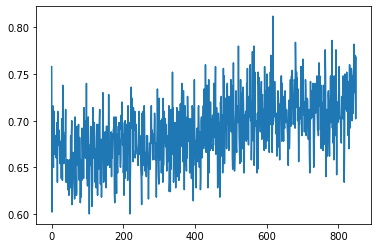

In [124]:
progress_c105_deltar_ep5000=progress
plt.plot(progress_c1005_deltar_ep5000)

In [11]:
def circuit1(qc,qr,theta,L,repeat):
    #circuit 1 
    #theta is list of the parameters
    #theta length is 8
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat


    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1
    
    if repeat!=0:
        qc.barrier(qr)    
    
        for l in range(L):

            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1    
     
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1
     
    return qc


def circuit2(qc,qr,theta,L,repeat):
    #circuit 2
    #theta is list of the parameters
    #theta length is 8L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat


    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            
        qc.cx(qr[3],qr[2])
        qc.cx(qr[2],qr[1])
        qc.cx(qr[1],qr[0])
    
    
    if repeat!=0:    
        qc.barrier(qr)
        for l in range(L):
        
            qc.cx(qr[1],qr[0])
            qc.cx(qr[2],qr[1])
            qc.cx(qr[3],qr[2])
    
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1         
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1                
     
    return qc




def circuit3(qc,qr,theta,L,repeat):
    #circuit 3
    #theta is list of the parameters
    #theta length is (11)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            
        qc.crz(theta[count],qr[3],qr[2])
        count=count+1 
        qc.crz(theta[count],qr[2],qr[1])
        count=count+1 
        qc.crz(theta[count],qr[1],qr[0])
        count=count+1 

    if repeat!=0:           
        qc.barrier(qr)
    
        
        for l in range(L):
        
            qc.crz(theta[count],qr[1],qr[0])
            count=count+1 
            qc.crz(theta[count],qr[2],qr[1])
            count=count+1 
            qc.crz(theta[count],qr[3],qr[2])
            count=count+1 
    
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1         
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1                
     
    return qc



def circuit4(qc,qr,theta,L,repeat):
    #circuit 4
    #theta is list of the parameters
    #theta length is (11)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat
    

    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            
        qc.crx(theta[count],qr[3],qr[2])
        count=count+1 
        qc.crx(theta[count],qr[2],qr[1])
        count=count+1 
        qc.crx(theta[count],qr[1],qr[0])
        count=count+1 

    if repeat!=0:               
        qc.barrier(qr)
    
        
        for l in range(L):
        
            qc.crx(theta[count],qr[1],qr[0])
            count=count+1 
            qc.crx(theta[count],qr[2],qr[1])
            count=count+1 
            qc.crx(theta[count],qr[3],qr[2])
            count=count+1 
        
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1         
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1                
     
    return qc




def circuit5(qc,qr,theta,L,repeat):
    #circuit 5
    #theta is list of the parameters
    #theta length is (28)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    


    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            

            
        for j in range(4):
            for i in range(4):
                if i!=j:
                    qc.crz(theta[count],qr[3-j],qr[3-i])
                    count=count+1

 

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            
            
    if repeat!=0:             
        qc.barrier(qr)
    
        
        for l in range(L):
        

            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1     
        
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1
        

            for j in range(4):
                for i in range(4):
                    if i!=j:
                        qc.crz(theta[count],qr[j],qr[i])
                        count=count+1
    
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1         
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1                
     
    return qc



def circuit6(qc,qr,theta,L,repeat):
    #circuit 6
    #theta is list of the parameters
    #theta length is (28)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    


    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            

            
        for j in range(4):
            for i in range(4):
                if i!=j:
                    qc.crx(theta[count],qr[3-j],qr[3-i])
                    count=count+1

 

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            
            
    if repeat!=0:             
        qc.barrier(qr)
    
        
        for l in range(L):
        

            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1     
        
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1
        

            for j in range(4):
                for i in range(4):
                    if i!=j:
                        qc.crx(theta[count],qr[j],qr[i])
                        count=count+1
    
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1         
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1                
     
    return qc


def circuit7(qc,qr,theta,L,repeat):
    #circuit 7
    #theta is list of the parameters
    #theta length is (19)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    
    


    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            

            
        qc.crz(theta[count],qr[1],qr[0])
        count=count+1

        qc.crz(theta[count],qr[3],qr[2])
        count=count+1



        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1

        
        qc.crz(theta[count],qr[2],qr[1])    
        count=count+1
        
            
    if repeat!=0:             
        qc.barrier(qr)
    
        
        for l in range(L):
        
            qc.crz(theta[count],qr[2],qr[1])    
            count=count+1
        
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1        
        
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1
                
        
            qc.crz(theta[count],qr[3],qr[2])
            count=count+1
        
            qc.crz(theta[count],qr[1],qr[0])
            count=count+1
        
        
        
    
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1         
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1                
     
    return qc



def circuit8(qc,qr,theta,L,repeat):
    #circuit 8
    #theta is list of the parameters
    #theta length is (19)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    
    


    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            

            
        qc.crx(theta[count],qr[1],qr[0])
        count=count+1

        qc.crx(theta[count],qr[3],qr[2])
        count=count+1



        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1

        
        qc.crx(theta[count],qr[2],qr[1])    
        count=count+1
        
            
    if repeat!=0:             
        qc.barrier(qr)
    
        
        for l in range(L):
        
            qc.crx(theta[count],qr[2],qr[1])    
            count=count+1
        
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1        
        
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1
                
        
            qc.crx(theta[count],qr[3],qr[2])
            count=count+1
        
            qc.crx(theta[count],qr[1],qr[0])
            count=count+1
        
        
        
    
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1         
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1                
     
    return qc


def circuit9(qc,qr,theta,L,repeat):
    #circuit 9
    #theta is list of the parameters
    #theta length is (4)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    
    


    count=0
    for l in range(L):

        for i in range(4):
            qc.h(qr[i])

        qc.cz(qr[3],qr[2])
        qc.cz(qr[2],qr[1])
        qc.cz(qr[1],qr[0])
        
        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        
            
    if repeat!=0:             
        qc.barrier(qr)
    
        
        for l in range(L):
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1
                
            qc.cz(qr[1],qr[0]) 
            qc.cz(qr[2],qr[1])
            qc.cz(qr[3],qr[2])
            
                 
        
            for i in range(4):
                qc.h(qr[i])                  
     
    return qc







def circuit10(qc,qr,theta,L,repeat):
    #circuit 10
    #theta is list of the parameters
    #theta length is (4)L+4
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    
    


    count=0
    
    for i in range(4):
        qc.ry(theta[count],qr[i])
        count=count+1
    
    for l in range(L):

        qc.cz(qr[3],qr[2])
        qc.cz(qr[2],qr[1])
        qc.cz(qr[1],qr[0])
        qc.cz(qr[3],qr[0])



        
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1

        
            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1
            
            qc.cz(qr[3],qr[0])            
            qc.cz(qr[1],qr[0])
            qc.cz(qr[2],qr[1])
            qc.cz(qr[3],qr[2])
        
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1
            
                 
              
     
    return qc




def circuit11(qc,qr,theta,L,repeat):
    #circuit 11
    #theta is list of the parameters
    #theta length is (12)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):

        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1    
    

        qc.cx(qr[1],qr[0])
        qc.cx(qr[3],qr[2])



        qc.ry(theta[count],qr[1])
        count=count+1 
        qc.ry(theta[count],qr[2])
        count=count+1 
        qc.rz(theta[count],qr[1])
        count=count+1 
        qc.rz(theta[count],qr[2])
        count=count+1 
        qc.cx(qr[2],qr[1])
        
            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
            qc.cx(qr[2],qr[1])
            
            qc.rz(theta[count],qr[2])
            count=count+1 
            qc.rz(theta[count],qr[1])
            count=count+1 
            qc.ry(theta[count],qr[2])
            count=count+1 
            qc.ry(theta[count],qr[1])
            count=count+1 
        
            qc.cx(qr[3],qr[2])
            qc.cx(qr[1],qr[0])
            
            
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1            
            
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1            

                 
              
     
    return qc









def circuit12(qc,qr,theta,L,repeat):
    #circuit 12
    #theta is list of the parameters
    #theta length is (12)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):

        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1    
    

        qc.cz(qr[1],qr[0])
        qc.cz(qr[3],qr[2])



        qc.ry(theta[count],qr[1])
        count=count+1 
        qc.ry(theta[count],qr[2])
        count=count+1 
        qc.rz(theta[count],qr[1])
        count=count+1 
        qc.rz(theta[count],qr[2])
        count=count+1 
        qc.cz(qr[2],qr[1])
        
            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
            qc.cz(qr[2],qr[1])
            
            qc.rz(theta[count],qr[2])
            count=count+1 
            qc.rz(theta[count],qr[1])
            count=count+1 
            qc.ry(theta[count],qr[2])
            count=count+1 
            qc.ry(theta[count],qr[1])
            count=count+1 
        
            qc.cz(qr[3],qr[2])
            qc.cz(qr[1],qr[0])
            
            
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1            
            
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1            

                 
              
     
    return qc



def circuit13(qc,qr,theta,L,repeat):
    #circuit 13
    #theta is list of the parameters
    #theta length is (16)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1

        qc.crz(theta[count],qr[3],qr[0])
        count=count+1 
        qc.crz(theta[count],qr[2],qr[3])
        count=count+1 
        qc.crz(theta[count],qr[1],qr[2])
        count=count+1 
        qc.crz(theta[count],qr[0],qr[1])
        count=count+1 
  

        
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1    


        qc.crz(theta[count],qr[3],qr[2])
        count=count+1 
        qc.crz(theta[count],qr[0],qr[3])
        count=count+1 
        qc.crz(theta[count],qr[1],qr[0])
        count=count+1 
        qc.crz(theta[count],qr[2],qr[1])
        count=count+1 

            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
         
            qc.crz(theta[count],qr[2],qr[1])
            count=count+1 
            qc.crz(theta[count],qr[1],qr[0])
            count=count+1                  
            qc.crz(theta[count],qr[0],qr[3])
            count=count+1 
        
            qc.crz(theta[count],qr[3],qr[2])
            count=count+1         
        
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1    

            qc.crz(theta[count],qr[0],qr[1])
            count=count+1           
            
            qc.crz(theta[count],qr[1],qr[2])
            count=count+1         
            qc.crz(theta[count],qr[2],qr[3])
            count=count+1 
        
            qc.crz(theta[count],qr[3],qr[0])
            count=count+1         
        
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1
            
            
    return qc




def circuit14(qc,qr,theta,L,repeat):
    #circuit 14
    #theta is list of the parameters
    #theta length is (16)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1

        qc.crx(theta[count],qr[3],qr[0])
        count=count+1 
        qc.crx(theta[count],qr[2],qr[3])
        count=count+1 
        qc.crx(theta[count],qr[1],qr[2])
        count=count+1 
        qc.crx(theta[count],qr[0],qr[1])
        count=count+1 
  

        
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1    


        qc.crx(theta[count],qr[3],qr[2])
        count=count+1 
        qc.crx(theta[count],qr[0],qr[3])
        count=count+1 
        qc.crx(theta[count],qr[1],qr[0])
        count=count+1 
        qc.crx(theta[count],qr[2],qr[1])
        count=count+1 

            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
         
            qc.crx(theta[count],qr[2],qr[1])
            count=count+1 
            qc.crx(theta[count],qr[1],qr[0])
            count=count+1                  
            qc.crx(theta[count],qr[0],qr[3])
            count=count+1 
        
            qc.crx(theta[count],qr[3],qr[2])
            count=count+1         
        
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1    

            qc.crx(theta[count],qr[0],qr[1])
            count=count+1           
            
            qc.crx(theta[count],qr[1],qr[2])
            count=count+1         
            qc.crx(theta[count],qr[2],qr[3])
            count=count+1 
        
            qc.crx(theta[count],qr[3],qr[0])
            count=count+1         
        
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1
            
            
    return qc



def circuit15(qc,qr,theta,L,repeat):
    #circuit 15
    #theta is list of the parameters
    #theta length is (8)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1

        qc.cx(qr[3],qr[0])

        qc.cx(qr[2],qr[3])

        qc.cx(qr[1],qr[2])

        qc.cx(qr[0],qr[1])





        
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1    


        qc.cx(qr[3],qr[2])

        qc.cx(qr[0],qr[3])

        qc.cx(qr[1],qr[0])

        qc.cx(qr[2],qr[1])
            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
         
            qc.cx(qr[2],qr[1])

            qc.cx(qr[1],qr[0])
              
            qc.cx(qr[0],qr[3])

        
            qc.cx(qr[3],qr[2])
      
        
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1    

            qc.cx(qr[0],qr[1])
             
            qc.cx(qr[1],qr[2])
      
            qc.cx(qr[2],qr[3])

        
            qc.cx(qr[3],qr[0])
     
        
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1
            
            
    return qc




def circuit16(qc,qr,theta,L,repeat):
    #circuit 16
    #theta is list of the parameters
    #theta length is (11)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):
        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1
    

        qc.crz(theta[count],qr[1],qr[0])
        count=count+1
        qc.crz(theta[count],qr[3],qr[2])
        count=count+1
        qc.crz(theta[count],qr[2],qr[1])
        count=count+1
            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
         

            qc.crz(theta[count],qr[2],qr[1])
            count=count+1            
            qc.crz(theta[count],qr[3],qr[2])
            count=count+1
            qc.crz(theta[count],qr[1],qr[0])
            count=count+1

            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1

    return qc


    
def circuit17(qc,qr,theta,L,repeat):
    #circuit 17
    #theta is list of the parameters
    #theta length is (11)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):
        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1
    

        qc.crx(theta[count],qr[1],qr[0])
        count=count+1
        qc.crx(theta[count],qr[3],qr[2])
        count=count+1
        qc.crx(theta[count],qr[2],qr[1])
        count=count+1
            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
         

            qc.crx(theta[count],qr[2],qr[1])
            count=count+1            
            qc.crx(theta[count],qr[3],qr[2])
            count=count+1
            qc.crx(theta[count],qr[1],qr[0])
            count=count+1

            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1

    return qc







def circuit18(qc,qr,theta,L,repeat):
    #circuit 18
    #theta is list of the parameters
    #theta length is (12)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1
    


        qc.crz(theta[count],qr[3],qr[0])
        count=count+1
        qc.crz(theta[count],qr[2],qr[3])
        count=count+1
        qc.crz(theta[count],qr[1],qr[2])
        count=count+1
        qc.crz(theta[count],qr[0],qr[1])
        count=count+1
            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
         

            qc.crz(theta[count],qr[0],qr[1])
            count=count+1          
            qc.crz(theta[count],qr[1],qr[2])
            count=count+1
            qc.crz(theta[count],qr[2],qr[3])
            count=count+1

            qc.crz(theta[count],qr[3],qr[0])
            count=count+1       

            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1

    return qc



def circuit19(qc,qr,theta,L,repeat):
    #circuit 1
    #theta is list of the parameters
    #theta length is (12)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1
    


        qc.crx(theta[count],qr[3],qr[0])
        count=count+1
        qc.crx(theta[count],qr[2],qr[3])
        count=count+1
        qc.crx(theta[count],qr[1],qr[2])
        count=count+1
        qc.crx(theta[count],qr[0],qr[1])
        count=count+1
            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
         

            qc.crx(theta[count],qr[0],qr[1])
            count=count+1          
            qc.crx(theta[count],qr[1],qr[2])
            count=count+1
            qc.crx(theta[count],qr[2],qr[3])
            count=count+1

            qc.crx(theta[count],qr[3],qr[0])
            count=count+1       

            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1

    return qc